Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, VarianceThreshold(0.95), select_importance_cols(num=200)

Version = "v54" # inference used v50, Not using create_cluster func

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
    Learning_rate = 0.03
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30
    Learning_rate = 0.02

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v50.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                      d_g-493                d_g-351       df_g-322   
1                      d_g-278                  g-497       df_g-420   
2                        g-648                d_g-401       df_g-544   
3                      d_g-644                 d_g-21        df_g-39   
4                        g-344                d_g-423        d_g-626   
5                      d_g-122                   c-25        df_g-22   
6                        g-631                d_g-639        d_g-376   
7                     df_g-211                  g-401       df_g-225   
8                     df_g-644               df_g-433       df_g-659   
9                       d_g-59                 d_g-89           g-70   
10                    df_g-385               df_g-309       df_g-695   
11                     d_g-643                d_g-221       df_g-276   
12                      d_c-31                d_g-653          g-414   
13                       g-498                d_g-685        d_g-534   
14                     d_g-232                d_g-328       df_g-564   
15                       g-364                  g-341        d_g-307   
16                     d_g-280               df_g-573        d_g-152   
17                    df_g-301               df_g-658        d_g-519   
18                       g-629                  g-559       df_g-415   
19                     d_g-734                df_c-15       df_g-481   
20                       g-280                d_g-362        d_g-465   
21                       g-644                  g-280        d_g-355   
22                     d_g-344                d_g-563        d_g-508   
23                     d_g-266               df_g-765       df_g-745   
24                      d_c-56               df_g-362          d_g-6   
25                     d_g-146                d_g-700         d_g-77   
26                    df_g-253               df_g-397        d_g-546   
27                       g-144                  g-187        d_g-337   
28                     d_g-478                df_c-46           g-30   
29                     d_g-323                d_g-767          g-707   
30                     d_g-491                d_g-138        df_g-91   
31                        c-31                d_g-429        d_g-309   
32                    df_g-322                  g-461       df_g-719   
33                       g-643                df_g-45       df_g-611   
34                    df_g-475                  g-662         d_c-95   
35                       g-478                  g-429           c-99   
36                    df_g-218                d_g-559       df_g-113   
37                        g-79                  g-708         d_g-39   
38                    df_g-530                  g-653          g-588   
39                       g-491                d_g-466       df_g-469   
40                    df_g-547                  g-451       df_g-448   
41                       g-393               df_g-511       df_g-240   
42                    df_g-153                df_c-34           c-68   
43                     d_g-673                df_g-83       df_g-246   
44                     d_g-552                d_g-672         d_g-24   
45                       g-351               df_g-201        d_g-294   
46                     df_g-66                  g-563        d_g-402   
47                     df_c-41                d_g-469       df_g-271   
48                     d_g-633                  g-692        d_g-370   
49                        c-85                df_c-98       df_g-676   

   acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                         d_g-363                          df_g-743   
1                         df_g-39                          df_g-663   
2                         df_g-70                           d_g-767   
3                        df_g-394             

# Training Utils

In [13]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [14]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [15]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, X_test, feature_importance_df_ = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    y_preds = []
    models = []
    oof_train = np.zeros((len(train_X),))
    score = 0
        
    for fold_, (train_index, valid_index) in enumerate(cv.split(train_X, train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr = train_X.loc[train_index, :]
        X_val = train_X.loc[valid_index, :]
        y_tr = train_y[train_index]
        y_val = train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=300,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(X_test, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        models.append(model)
    
    score = log_loss(train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
    
    return sum(y_preds) / len(y_preds), score, models, feature_importance_df_

In [16]:
def create_features(df, selected_cols, func):
        
    _df = df.copy()

    def func_division(row):
        d = 1e-6
        return (row[col1]+d) / (row[col2]+d)
    
    for i in range(len(selected_cols)-1):
        col1, col2 = selected_cols[i], selected_cols[i+1]
        _df[f"{col1}_{col2}_div"] = _df[[col1, col2]].apply(func_division, axis=1)
        _df[f"{col1}_{col2}_{func}"] = _df[[col1, col2]].apply(func, axis=1)
    
    return _df

In [17]:
def Feature_Engineering(target_col, X_train_df, X_test_df, N_bin):
    
    # extract important features to the target variable
    selected_cols = importance_cols[target_col]
    
    _X_train_df = X_train_df[selected_cols].copy()
    _X_test_df = X_test_df[selected_cols].copy()
    
    # merge data from train and test
    _X_train_df['WHERE'] = 'train'
    _X_test_df['WHERE'] = 'test'
    _X_data = _X_train_df.append(_X_test_df)
    _X_data = _X_data.reset_index(drop=True)
    
    #  func_list = ("max", "min", "mean", "median", "mad", "var", "std", "kurtosis", "Skew")
    _X_data = create_features(_X_data, selected_cols, func="mean")
    
    # measure row statistics
    _X_data = fe_stats(_X_data, selected_cols, target_col)
    
    # create clusters
    # _X_data[f'clusters_{target_col}'] = create_cluster(_X_data, selected_cols, n_clusters)
        
    # split data for train and test
    _X_train = _X_data[_X_data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
    _X_test = _X_data[_X_data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return _X_train, _X_test
    

In [18]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [19]:
# lgbm with pseudo_labeling
classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': Learning_rate,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'subsample_freq': 5,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 2,
}

In [20]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
       
    X = X_train.copy()
    y = y_train.copy()
    
    X, X_test = Feature_Engineering(target_col, X, X_test, N_bin=7)
    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        
        y_prob = np.zeros((X_test.shape[0]))
        
        X_conf = pd.DataFrame()
        y_conf = pd.DataFrame()
        _importance_df = pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        for fold_, (train_idx, valid_idx) in enumerate(cv.split(X, y)):        
            X_tr, X_val = X.loc[train_idx, :], X.loc[valid_idx, :]
            y_tr, y_val = y[train_idx], y[valid_idx]
            
            clf = LGBMClassifier(**classifier_params)
            
            clf.fit(X_tr, y_tr,
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    eval_metric='logloss',
                    verbose=300,
                    early_stopping_rounds=Early_stopping_rounds)
            
            y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
            y_prob += clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
            # feature importance with target col
            _importance_df["importance"] = clf.feature_importances_
            feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}, Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # Set the params of threshold based on train labels rate (target_rate).
        if (p_label_rate*1.5) < target_rate:
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.03) <= 0.1): break 
                Threshold -= 0.03
                high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
        if p_label_rate > (target_rate*1.5):
            check = len(y_prob)*target_rate
            for i in range(10):
                logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
                if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.05) >= 0.8): break
                Threshold += 0.05
                high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
                p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        # select data with confidence
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
            
        X = pd.concat([X_corect, X_conf], axis=0, ignore_index=True)
        y = pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test, feature_importance_df

In [21]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [22]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [23]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [24]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [25]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [26]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [27]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [28]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [29]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [30]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [32]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [33]:
#std_df = data.iloc[:, 4:].copy()

In [34]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [35]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [36]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [37]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [38]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [39]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': Learning_rate,
    'num_threads': 2,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':0.1,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
}


neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605407	valid_1's binary_logloss: 0.0130016
[600]	training's binary_logloss: 0.000768806	valid_1's binary_logloss: 0.00357732
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.00043899	valid_1's binary_logloss: 0.00278704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061947	valid_1's binary_logloss: 0.0122252
[600]	training's binary_logloss: 0.00079043	valid_1's binary_logloss: 0.00302184
[900]	training's binary_logloss: 0.000437118	valid_1's binary_logloss: 0.00208139
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000438899	valid_1's binary_logloss: 0.00208078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602548	valid_1's binary_logloss: 0.0129934
[600]	training's binary_logloss: 0.000787808	valid_1's binary_logloss: 0.00418664
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0038838, Threshold: 0.0223740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071, Num_p_label: 40.0, conf_0:0.01566, conf_1:0.02909
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0223740
Num_p_label: 10.0, Expected: 2.8, Adj_threshold_2: 0.0723740
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_3: 0.1223740
threshold: 0.1223740, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505941	valid_1's binary_logloss: 0.0111206
[600]	training's binary_logloss: 0.000662058	valid_1's binary_logloss: 0.00264853
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000399244	valid_1's binary_logloss: 0.00194503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521898	valid_1's binary_logloss: 0.0103752
[600]	training's binary_logloss: 0.000671958	valid_1's binary_logloss: 0.00228149
[900]	training's binary_logloss: 0.000391205	valid_1's binary_logloss: 0.00160608
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000391765	valid_1's binary_logloss: 0.00160564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531124	valid_1's binary_logloss: 0.0105338
[600]	training's binary_logloss: 0.000681203	valid_1's binary_logloss: 0.00242079
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.1039283, Threshold: 0.1223740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0097941 Vs.target_rate: 0.00071, Num_p_label: 39.0, conf_0:0.09790, conf_1:0.14685
Num_p_label: 39.0, Expected: 2.8, Adj_threshold_1: 0.1223740
Num_p_label: 30.0, Expected: 2.8, Adj_threshold_2: 0.1723740
Num_p_label: 25.0, Expected: 2.8, Adj_threshold_3: 0.2223740
Num_p_label: 21.0, Expected: 2.8, Adj_threshold_4: 0.2723740
Num_p_label: 20.0, Expected: 2.8, Adj_threshold_5: 0.3223740
Num_p_label: 11.0, Expected: 2.8, Adj_threshold_6: 0.3723740
Num_p_label: 11.0, Expected: 2.8, Adj_threshold_7: 0.4223740
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_8: 0.4723740
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_9: 0.5223740
threshold: 0.5223740, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505941	valid_1's binary_logloss: 0.0111206
[600]	training's binary_logloss: 0.000662058	valid_1's binary_logloss: 0.00264853
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000399244	valid_1's binary_logloss: 0.00194503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521898	valid_1's binary_logloss: 0.0103752
[600]	training's binary_logloss: 0.000671958	valid_1's binary_logloss: 0.00228149
[900]	training's binary_logloss: 0.000391205	valid_1's binary_logloss: 0.00160608
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000391765	valid_1's binary_logloss: 0.00160564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531124	valid_1's binary_logloss: 0.0105338
[600]	training's binary_logloss: 0.000681203	valid_1's binary_logloss: 0.00242079
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.1039283, Threshold: 0.5223740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071, Num_p_label: 6.0, conf_0:0.47014, conf_1:0.57461
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_1: 0.5223740
threshold: 0.5223740, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


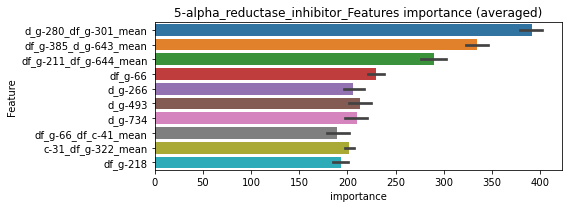

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511228	valid_1's binary_logloss: 0.0111419
[600]	training's binary_logloss: 0.000665038	valid_1's binary_logloss: 0.00259406
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000389022	valid_1's binary_logloss: 0.00192433


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508224	valid_1's binary_logloss: 0.00985476
[600]	training's binary_logloss: 0.000669999	valid_1's binary_logloss: 0.00242129
[900]	training's binary_logloss: 0.000386661	valid_1's binary_logloss: 0.00176409
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.00037877	valid_1's binary_logloss: 0.00174525


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513392	valid_1's binary_logloss: 0.0114289
[600]	training's binary_logloss: 0.000673623	valid_1's binary_logloss: 0.00271822
[900]	training's binary_logloss: 0.000393288	valid_1's binary_logloss: 0.0019018
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000393371	valid_1's binary_logloss: 0.00190129


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506145	valid_1's binary_logloss: 0.015392
[600]	training's binary_logloss: 0.000669732	valid_1's binary_logloss: 0.006021
[900]	training's binary_logloss: 0.000387757	valid_1's binary_logloss: 0.00524883
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000389314	valid_1's binary_logloss: 0.00523719


5-alpha_reductase_inhibitor logloss: 0.00270224723958324


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071053	valid_1's binary_logloss: 0.0181497
[600]	training's binary_logloss: 0.000865944	valid_1's binary_logloss: 0.00778913
[900]	training's binary_logloss: 0.000453417	valid_1's binary_logloss: 0.00671597
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000457284	valid_1's binary_logloss: 0.00669086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663407	valid_1's binary_logloss: 0.0198892
[600]	training's binary_logloss: 0.000832163	valid_1's binary_logloss: 0.00882341
[900]	training's binary_logloss: 0.000436664	valid_1's binary_logloss: 0.00803469
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000439297	valid_1's binary_logloss: 0.00801111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694865	valid_1's binary_logloss: 0.0125123
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0048677, Threshold: 0.0238540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01670, conf_1:0.03101
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0238540
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0738540
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.1238540
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1738540
threshold: 0.1738540, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567094	valid_1's binary_logloss: 0.0123904
[600]	training's binary_logloss: 0.000736065	valid_1's binary_logloss: 0.00445089
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000473602	valid_1's binary_logloss: 0.00405799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547919	valid_1's binary_logloss: 0.012221
[600]	training's binary_logloss: 0.000708817	valid_1's binary_logloss: 0.00315977
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000398864	valid_1's binary_logloss: 0.00239394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567336	valid_1's binary_logloss: 0.00863668
[600]	training's binary_logloss: 0.000726934	valid_1's binary_logloss: 0.00170357
[900]	training's binary_logloss: 0.000403319	valid_1's binary_logloss: 0.00106975
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.1471922, Threshold: 0.1738540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00076, Num_p_label: 22.0, conf_0:0.13908, conf_1:0.20862
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_1: 0.1738540
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.2238540
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.2738540
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.3238540
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3738540
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_6: 0.4238540
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.4738540
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.5238540
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.5738540
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.6238540
threshold: 0.6238540, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567094	valid_1's binary_logloss: 0.0123904
[600]	training's binary_logloss: 0.000736065	valid_1's binary_logloss: 0.00445089
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000473602	valid_1's binary_logloss: 0.00405799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547919	valid_1's binary_logloss: 0.012221
[600]	training's binary_logloss: 0.000708817	valid_1's binary_logloss: 0.00315977
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000398864	valid_1's binary_logloss: 0.00239394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567336	valid_1's binary_logloss: 0.00863668
[600]	training's binary_logloss: 0.000726934	valid_1's binary_logloss: 0.00170357
[900]	training's binary_logloss: 0.000403319	valid_1's binary_logloss: 0.00106975
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.1471922, Threshold: 0.6238540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.50000, conf_1:0.68624
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.6238540
threshold: 0.6238540, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


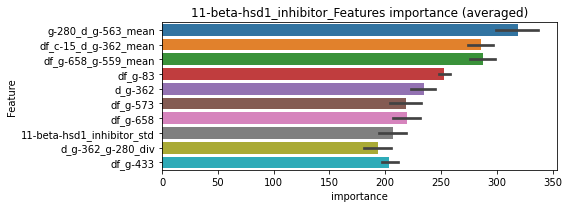

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00579133	valid_1's binary_logloss: 0.0135952
[600]	training's binary_logloss: 0.000730666	valid_1's binary_logloss: 0.00454257
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000506019	valid_1's binary_logloss: 0.00406845


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560368	valid_1's binary_logloss: 0.0124306
[600]	training's binary_logloss: 0.000722926	valid_1's binary_logloss: 0.00306852
[900]	training's binary_logloss: 0.000391629	valid_1's binary_logloss: 0.00219921
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000393746	valid_1's binary_logloss: 0.00219214


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578885	valid_1's binary_logloss: 0.00861635
[600]	training's binary_logloss: 0.000725083	valid_1's binary_logloss: 0.00161435
[900]	training's binary_logloss: 0.000399132	valid_1's binary_logloss: 0.00101139
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000392412	valid_1's binary_logloss: 0.00099451


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553661	valid_1's binary_logloss: 0.0110611
[600]	training's binary_logloss: 0.000719307	valid_1's binary_logloss: 0.00258262
[900]	training's binary_logloss: 0.000391341	valid_1's binary_logloss: 0.0018217
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000396711	valid_1's binary_logloss: 0.00181505


11-beta-hsd1_inhibitor logloss: 0.0022683175827555003


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603547	valid_1's binary_logloss: 0.0226173
[600]	training's binary_logloss: 0.000806474	valid_1's binary_logloss: 0.0125661
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000503028	valid_1's binary_logloss: 0.0112491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636333	valid_1's binary_logloss: 0.0226598
[600]	training's binary_logloss: 0.000847501	valid_1's binary_logloss: 0.0109943
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000451766	valid_1's binary_logloss: 0.00998586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646125	valid_1's binary_logloss: 0.0246495
[600]	training's binary_logloss: 0.000847375	valid_1's binary_logloss: 0.015455
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.00050178	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0047806, Threshold: 0.0352737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02469, conf_1:0.04586
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0352737
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_2: 0.0852737
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.1352737
threshold: 0.1352737, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506963	valid_1's binary_logloss: 0.0182671
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00077374	valid_1's binary_logloss: 0.00979481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514966	valid_1's binary_logloss: 0.0183798
[600]	training's binary_logloss: 0.000692895	valid_1's binary_logloss: 0.00888169
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00039486	valid_1's binary_logloss: 0.00793389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514536	valid_1's binary_logloss: 0.01852
[600]	training's binary_logloss: 0.000695255	valid_1's binary_logloss: 0.0113856
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000580846	valid_1's binary_logloss: 0.0109446
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0975150, Threshold: 0.1352737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0150678 Vs.target_rate: 0.00101, Num_p_label: 60.0, conf_0:0.10822, conf_1:0.16233
Num_p_label: 60.0, Expected: 4.0, Adj_threshold_1: 0.1352737
Num_p_label: 54.0, Expected: 4.0, Adj_threshold_2: 0.1852737
Num_p_label: 43.0, Expected: 4.0, Adj_threshold_3: 0.2352737
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_4: 0.2852737
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_5: 0.3352737
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_6: 0.3852737
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_7: 0.4352737
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_8: 0.4852737
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_9: 0.5352737
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_10: 0.5852737
threshold: 0.6352737, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492438	valid_1's binary_logloss: 0.0142539
[600]	training's binary_logloss: 0.000670369	valid_1's binary_logloss: 0.00760137
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000388674	valid_1's binary_logloss: 0.0069901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500837	valid_1's binary_logloss: 0.0095823
[600]	training's binary_logloss: 0.000689872	valid_1's binary_logloss: 0.00211772
[900]	training's binary_logloss: 0.000381154	valid_1's binary_logloss: 0.00147229
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000376937	valid_1's binary_logloss: 0.0014643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505236	valid_1's binary_logloss: 0.0160204
[600]	training's binary_logloss: 0.000683414	valid_1's binary_logloss: 0.00614763
Early stopping, b

3 / 3 AUC score:1.000
y_Threshold: 0.0918031, Threshold: 0.6352737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0060271 Vs.target_rate: 0.00101, Num_p_label: 24.0, conf_0:0.50000, conf_1:0.69880
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.6352737
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.6852737
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7352737
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7852737
threshold: 0.7852737, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


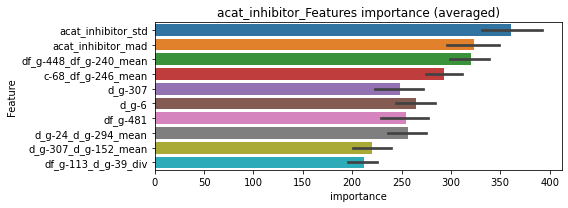

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488566	valid_1's binary_logloss: 0.0116558
[600]	training's binary_logloss: 0.000669276	valid_1's binary_logloss: 0.00427343
[900]	training's binary_logloss: 0.000379912	valid_1's binary_logloss: 0.00332944
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000377505	valid_1's binary_logloss: 0.00332517


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486106	valid_1's binary_logloss: 0.0122562
[600]	training's binary_logloss: 0.000663351	valid_1's binary_logloss: 0.00345813
[900]	training's binary_logloss: 0.000375897	valid_1's binary_logloss: 0.00253747
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.00036925	valid_1's binary_logloss: 0.00251721


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048455	valid_1's binary_logloss: 0.0123524
[600]	training's binary_logloss: 0.000660526	valid_1's binary_logloss: 0.00342576
[900]	training's binary_logloss: 0.000375274	valid_1's binary_logloss: 0.00256896
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000372482	valid_1's binary_logloss: 0.00256022


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506764	valid_1's binary_logloss: 0.0118298
[600]	training's binary_logloss: 0.000679785	valid_1's binary_logloss: 0.00319565
[900]	training's binary_logloss: 0.000385404	valid_1's binary_logloss: 0.00247143
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000389437	valid_1's binary_logloss: 0.00245841


acat_inhibitor logloss: 0.0027206710233807084


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0602606	valid_1's binary_logloss: 0.251405
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.0300834	valid_1's binary_logloss: 0.23891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0613688	valid_1's binary_logloss: 0.208259
[600]	training's binary_logloss: 0.0139677	valid_1's binary_logloss: 0.185034
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.0111659	valid_1's binary_logloss: 0.184286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0632936	valid_1's binary_logloss: 0.21364
[600]	training's binary_logloss: 0.0144921	valid_1's binary_logloss: 0.18857
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.010289	valid_1's binary_logloss: 0.187445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss

1 / 3 AUC score:0.928
y_Threshold: 0.0866831, Threshold: 0.4360087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 341 → Positive_corect_labels: 547/3572
p_label_rate: 0.0100452 Vs.target_rate: 0.00798, Num_p_label: 40.0, conf_0:0.30521, conf_1:0.56681
threshold: 0.4360087, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 547.0/3572, y_label_rate: 0.1531355
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292188	valid_1's binary_logloss: 0.123771
[600]	training's binary_logloss: 0.00487772	valid_1's binary_logloss: 0.101094
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00438127	valid_1's binary_logloss: 0.100848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0294804	valid_1's binary_logloss: 0.141754
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.0066933	valid_1's binary_logloss: 0.123332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311974	valid_1's binary_logloss: 0.131253
[600]	training's binary_logloss: 0.00526752	valid_1's binary_logloss: 0.104459
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.00249977	valid_1's binary_logloss: 0.0999534
Training until validation scores don't improve for 30 rounds
[300]	training's binar

2 / 3 AUC score:0.983
y_Threshold: 0.1202567, Threshold: 0.4360087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 498.0/3474
p_label_rate: 0.0406831 Vs.target_rate: 0.00798, Num_p_label: 162.0, conf_0:0.34881, conf_1:0.52321
Num_p_label: 162.0, Expected: 31.8, Adj_threshold_1: 0.4360087
Num_p_label: 145.0, Expected: 31.8, Adj_threshold_2: 0.4860087
Num_p_label: 123.0, Expected: 31.8, Adj_threshold_3: 0.5360087
Num_p_label: 105.0, Expected: 31.8, Adj_threshold_4: 0.5860087
Num_p_label: 89.0, Expected: 31.8, Adj_threshold_5: 0.6360087
Num_p_label: 75.0, Expected: 31.8, Adj_threshold_6: 0.6860087
Num_p_label: 61.0, Expected: 31.8, Adj_threshold_7: 0.7360087
Num_p_label: 48.0, Expected: 31.8, Adj_threshold_8: 0.7860087
threshold: 0.7860087, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 498.0/3474, y_label_rate: 0.1433506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198848	valid_1's binary_logloss: 0.0830754
[600]	training's binary_logloss: 0.00322393	valid_1's binary_logloss: 0.0599876
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00190815	valid_1's binary_logloss: 0.0579495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202276	valid_1's binary_logloss: 0.0816579
[600]	training's binary_logloss: 0.00332855	valid_1's binary_logloss: 0.0640655
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.0021585	valid_1's binary_logloss: 0.0611968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200348	valid_1's binary_logloss: 0.109626
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00454414	valid_1's binary_logloss: 0.0962572
Training until validation scores don't improve for 30 rounds
[300]	training's

3 / 3 AUC score:0.987
y_Threshold: 0.0995570, Threshold: 0.7860087, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 467.0/3412
p_label_rate: 0.0210949 Vs.target_rate: 0.00798, Num_p_label: 84.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 84.0, Expected: 31.8, Adj_threshold_1: 0.7860087
threshold: 0.7860087, positive_p_label: 84.0/3982, p_label_rate: 0.0210949
positive_y_label: 467.0/3412, y_label_rate: 0.1368699


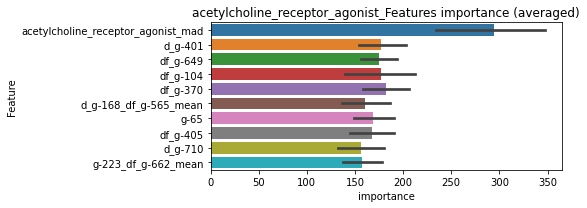

len(train_index) : 2559
len(valid_index) : 853
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134673	valid_1's binary_logloss: 0.116131


len(train_index) : 2559
len(valid_index) : 853
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[332]	training's binary_logloss: 0.010394	valid_1's binary_logloss: 0.114131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160402	valid_1's binary_logloss: 0.0557755
[600]	training's binary_logloss: 0.00245105	valid_1's binary_logloss: 0.0362991
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.0018654	valid_1's binary_logloss: 0.0345967


len(train_index) : 2559
len(valid_index) : 853
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014543	valid_1's binary_logloss: 0.0858263
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.0033812	valid_1's binary_logloss: 0.0747237


len(train_index) : 2559
len(valid_index) : 853
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145636	valid_1's binary_logloss: 0.0832789
[600]	training's binary_logloss: 0.0022821	valid_1's binary_logloss: 0.0725113
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00255818	valid_1's binary_logloss: 0.072143


acetylcholine_receptor_agonist logloss: 0.07389862560954086


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0959654	valid_1's binary_logloss: 0.314569
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.058322	valid_1's binary_logloss: 0.307648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0892367	valid_1's binary_logloss: 0.319433
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0747298	valid_1's binary_logloss: 0.316946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0927322	valid_1's binary_logloss: 0.290297
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.0479802	valid_1's binary_logloss: 0.278466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0925813	valid_1's binary_logloss: 0.298391


1 / 3 AUC score:0.842
y_Threshold: 0.1350170, Threshold: 0.4047425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 554 → Positive_corect_labels: 436/3335
p_label_rate: 0.0100452 Vs.target_rate: 0.01264, Num_p_label: 40.0, conf_0:0.28332, conf_1:0.52617
threshold: 0.4047425, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.069955	valid_1's binary_logloss: 0.294301


positive_y_label: 436.0/3335, y_label_rate: 0.1307346
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262189	valid_1's binary_logloss: 0.159667
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00613776	valid_1's binary_logloss: 0.149075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268219	valid_1's binary_logloss: 0.131055
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00920445	valid_1's binary_logloss: 0.118614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260646	valid_1's binary_logloss: 0.131762
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00599412	valid_1's binary_logloss: 0.118796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266502	valid_1's binary_logloss: 0.126789
[600]	training's binary_logloss: 0.00463928	valid_1's binary_logloss: 0.106665
Early stopping, best it

2 / 3 AUC score:0.976
y_Threshold: 0.0969299, Threshold: 0.4047425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 374.0/3211
p_label_rate: 0.0349071 Vs.target_rate: 0.01264, Num_p_label: 139.0, conf_0:0.32379, conf_1:0.48569
Num_p_label: 139.0, Expected: 50.3, Adj_threshold_1: 0.4047425
Num_p_label: 128.0, Expected: 50.3, Adj_threshold_2: 0.4547425
Num_p_label: 117.0, Expected: 50.3, Adj_threshold_3: 0.5047425
Num_p_label: 108.0, Expected: 50.3, Adj_threshold_4: 0.5547425
Num_p_label: 93.0, Expected: 50.3, Adj_threshold_5: 0.6047425
Num_p_label: 86.0, Expected: 50.3, Adj_threshold_6: 0.6547425
Num_p_label: 74.0, Expected: 50.3, Adj_threshold_7: 0.7047425
threshold: 0.7047425, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 374.0/3211, y_label_rate: 0.1164746
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016422	valid_1's binary_logloss: 0.122893
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00782061	valid_1's binary_logloss: 0.118748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157665	valid_1's binary_logloss: 0.093326
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.0035084	valid_1's binary_logloss: 0.0832863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164447	valid_1's binary_logloss: 0.0897352
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00403397	valid_1's binary_logloss: 0.0799612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154671	valid_1's binary_logloss: 0.0992647
[600]	training's binary_logloss: 0.00255705	valid_1's binary_logloss: 0.0892424
Early stopping, best

3 / 3 AUC score:0.982
y_Threshold: 0.0771896, Threshold: 0.7047425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 340.0/3143
p_label_rate: 0.0296334 Vs.target_rate: 0.01264, Num_p_label: 118.0, conf_0:0.50000, conf_1:0.77522
Num_p_label: 118.0, Expected: 50.3, Adj_threshold_1: 0.7047425
Num_p_label: 109.0, Expected: 50.3, Adj_threshold_2: 0.7547425
threshold: 0.7547425, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 340.0/3143, y_label_rate: 0.1081769


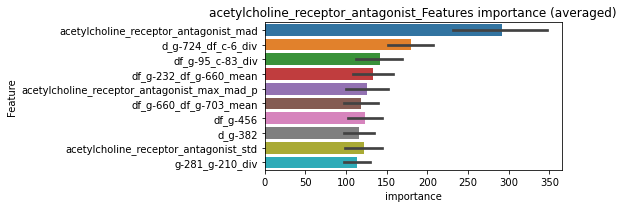

len(train_index) : 2357
len(valid_index) : 786
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111915	valid_1's binary_logloss: 0.065172
[600]	training's binary_logloss: 0.00183141	valid_1's binary_logloss: 0.0511178
[900]	training's binary_logloss: 0.000857282	valid_1's binary_logloss: 0.0484
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000863801	valid_1's binary_logloss: 0.0482934


len(train_index) : 2357
len(valid_index) : 786
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111957	valid_1's binary_logloss: 0.0569008
[600]	training's binary_logloss: 0.00190769	valid_1's binary_logloss: 0.041289
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00127535	valid_1's binary_logloss: 0.0392631


len(train_index) : 2357
len(valid_index) : 786
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101129	valid_1's binary_logloss: 0.0876741


len(train_index) : 2358
len(valid_index) : 785
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00331511	valid_1's binary_logloss: 0.0841968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105881	valid_1's binary_logloss: 0.074276
[600]	training's binary_logloss: 0.00171891	valid_1's binary_logloss: 0.0650543
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00171891	valid_1's binary_logloss: 0.0650543


acetylcholine_receptor_antagonist logloss: 0.059200026763170176


neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286779	valid_1's binary_logloss: 0.100498
[600]	training's binary_logloss: 0.00438253	valid_1's binary_logloss: 0.0598722
[900]	training's binary_logloss: 0.00149402	valid_1's binary_logloss: 0.0513343
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00139084	valid_1's binary_logloss: 0.0509183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0280739	valid_1's binary_logloss: 0.105907
[600]	training's binary_logloss: 0.00434001	valid_1's binary_logloss: 0.0796078
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00266935	valid_1's binary_logloss: 0.0764474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296734	valid_1's binary_logloss: 0.0816623
[600]	training's binary_logloss: 0.0043545	valid_1's binary_logloss: 0.0448553
[900]	training's binary_logloss: 

1 / 3 AUC score:0.994
y_Threshold: 0.0344209, Threshold: 0.2022560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 636/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.14158, conf_1:0.26293
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.2022560
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.2522560
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_3: 0.3022560
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.3522560
threshold: 0.3522560, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 636.0/3765, y_label_rate: 0.1689243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221996	valid_1's binary_logloss: 0.0693926
[600]	training's binary_logloss: 0.00304293	valid_1's binary_logloss: 0.0401799
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00225629	valid_1's binary_logloss: 0.0386807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210636	valid_1's binary_logloss: 0.0863095
[600]	training's binary_logloss: 0.00291065	valid_1's binary_logloss: 0.0598832
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00217677	valid_1's binary_logloss: 0.0579332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219307	valid_1's binary_logloss: 0.0649915
[600]	training's binary_logloss: 0.00312307	valid_1's binary_logloss: 0.0342957
[900]	training's binary_logloss: 0.00114598	valid_1's binary_logloss: 0.0274848
Early stopping, best iteration

2 / 3 AUC score:0.997
y_Threshold: 0.0966390, Threshold: 0.3522560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 614.0/3721
p_label_rate: 0.0213461 Vs.target_rate: 0.00307, Num_p_label: 85.0, conf_0:0.28180, conf_1:0.42271
Num_p_label: 85.0, Expected: 12.2, Adj_threshold_1: 0.3522560
Num_p_label: 77.0, Expected: 12.2, Adj_threshold_2: 0.4022560
Num_p_label: 73.0, Expected: 12.2, Adj_threshold_3: 0.4522560
Num_p_label: 69.0, Expected: 12.2, Adj_threshold_4: 0.5022560
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_5: 0.5522560
Num_p_label: 56.0, Expected: 12.2, Adj_threshold_6: 0.6022560
Num_p_label: 48.0, Expected: 12.2, Adj_threshold_7: 0.6522560
Num_p_label: 39.0, Expected: 12.2, Adj_threshold_8: 0.7022560
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_9: 0.7522560
threshold: 0.7522560, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 614.0/3721, y_label_rate: 0.1650094
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173237	valid_1's binary_logloss: 0.0538394
[600]	training's binary_logloss: 0.00247238	valid_1's binary_logloss: 0.0263269
[900]	training's binary_logloss: 0.00099993	valid_1's binary_logloss: 0.0211152
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000756277	valid_1's binary_logloss: 0.0199691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01699	valid_1's binary_logloss: 0.074577
[600]	training's binary_logloss: 0.00240533	valid_1's binary_logloss: 0.0547381
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00170439	valid_1's binary_logloss: 0.052974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180247	valid_1's binary_logloss: 0.0566292
[600]	training's binary_logloss: 0.0024815	valid_1's binary_logloss: 0.0334275
[900]	training's binary_logloss: 

3 / 3 AUC score:0.999
y_Threshold: 0.1393645, Threshold: 0.7522560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 599.0/3691
p_label_rate: 0.0153189 Vs.target_rate: 0.00307, Num_p_label: 61.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 61.0, Expected: 12.2, Adj_threshold_1: 0.7522560
threshold: 0.7522560, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 599.0/3691, y_label_rate: 0.1622866


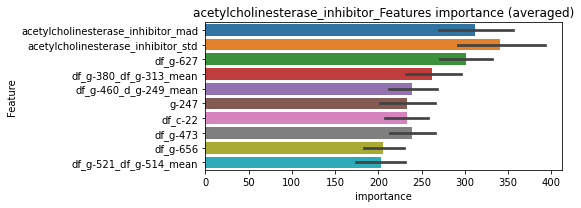

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154267	valid_1's binary_logloss: 0.0705349
[600]	training's binary_logloss: 0.00209426	valid_1's binary_logloss: 0.0485525
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00149867	valid_1's binary_logloss: 0.0467718


len(train_index) : 2768
len(valid_index) : 923
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162388	valid_1's binary_logloss: 0.0432354
[600]	training's binary_logloss: 0.00222209	valid_1's binary_logloss: 0.0191087
[900]	training's binary_logloss: 0.000932327	valid_1's binary_logloss: 0.0152913
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000877936	valid_1's binary_logloss: 0.0150334


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145483	valid_1's binary_logloss: 0.0628331
[600]	training's binary_logloss: 0.00205591	valid_1's binary_logloss: 0.0455853
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00210148	valid_1's binary_logloss: 0.04544


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148425	valid_1's binary_logloss: 0.0686128
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00244943	valid_1's binary_logloss: 0.0543549


acetylcholinesterase_inhibitor logloss: 0.0403962398066815


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016024	valid_1's binary_logloss: 0.063938
[600]	training's binary_logloss: 0.0023106	valid_1's binary_logloss: 0.0389756
[900]	training's binary_logloss: 0.000966205	valid_1's binary_logloss: 0.0357892
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000736126	valid_1's binary_logloss: 0.0346834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168004	valid_1's binary_logloss: 0.0468889
[600]	training's binary_logloss: 0.00241776	valid_1's binary_logloss: 0.0223231
[900]	training's binary_logloss: 0.000992174	valid_1's binary_logloss: 0.0185859
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000832836	valid_1's binary_logloss: 0.0178841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167849	valid_1's binary_logloss: 0.0659134
[600]	training's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0176882, Threshold: 0.1597404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.11182, conf_1:0.20766
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.1597404
Num_p_label: 36.0, Expected: 9.0, Adj_threshold_2: 0.2097404
Num_p_label: 31.0, Expected: 9.0, Adj_threshold_3: 0.2597404
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_4: 0.3097404
Num_p_label: 16.0, Expected: 9.0, Adj_threshold_5: 0.3597404
threshold: 0.3597404, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3787, y_label_rate: 0.1711117
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132236	valid_1's binary_logloss: 0.0732193
[600]	training's binary_logloss: 0.00185419	valid_1's binary_logloss: 0.0520642
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.0009754	valid_1's binary_logloss: 0.0490286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137752	valid_1's binary_logloss: 0.0464079
[600]	training's binary_logloss: 0.00193704	valid_1's binary_logloss: 0.0266197
[900]	training's binary_logloss: 0.000839345	valid_1's binary_logloss: 0.0238603
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000732058	valid_1's binary_logloss: 0.0235101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135966	valid_1's binary_logloss: 0.0434208
[600]	training's binary_logloss: 0.00194706	valid_1's binary_logloss: 0.0199687
[900]	training's binary_loglo

2 / 3 AUC score:0.999
y_Threshold: 0.0816451, Threshold: 0.3597404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 638.0/3767
p_label_rate: 0.0160723 Vs.target_rate: 0.00227, Num_p_label: 64.0, conf_0:0.28779, conf_1:0.43169
Num_p_label: 64.0, Expected: 9.0, Adj_threshold_1: 0.3597404
Num_p_label: 57.0, Expected: 9.0, Adj_threshold_2: 0.4097404
Num_p_label: 47.0, Expected: 9.0, Adj_threshold_3: 0.4597404
Num_p_label: 41.0, Expected: 9.0, Adj_threshold_4: 0.5097404
Num_p_label: 35.0, Expected: 9.0, Adj_threshold_5: 0.5597404
Num_p_label: 30.0, Expected: 9.0, Adj_threshold_6: 0.6097404
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_7: 0.6597404
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_8: 0.7097404
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_9: 0.7597404
threshold: 0.7597404, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 638.0/3767, y_label_rate: 0.1693655
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118401	valid_1's binary_logloss: 0.0485406
[600]	training's binary_logloss: 0.0017384	valid_1's binary_logloss: 0.0277411
[900]	training's binary_logloss: 0.00077803	valid_1's binary_logloss: 0.0247416
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000706167	valid_1's binary_logloss: 0.0244612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124454	valid_1's binary_logloss: 0.0541922
[600]	training's binary_logloss: 0.00176612	valid_1's binary_logloss: 0.0282354
[900]	training's binary_logloss: 0.000782334	valid_1's binary_logloss: 0.023433
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000638115	valid_1's binary_logloss: 0.0223477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012739	valid_1's binary_logloss: 0.0324577
[600]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.1001275, Threshold: 0.7597404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 628.0/3747
p_label_rate: 0.0065294 Vs.target_rate: 0.00227, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 26.0, Expected: 9.0, Adj_threshold_1: 0.7597404
threshold: 0.7597404, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 628.0/3747, y_label_rate: 0.1676007


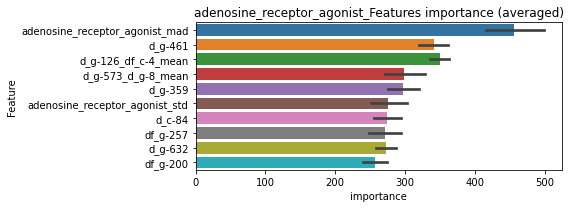

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112009	valid_1's binary_logloss: 0.0543306
[600]	training's binary_logloss: 0.00161803	valid_1's binary_logloss: 0.0358567
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000790018	valid_1's binary_logloss: 0.0330676


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118793	valid_1's binary_logloss: 0.0389264
[600]	training's binary_logloss: 0.00169993	valid_1's binary_logloss: 0.0183409
[900]	training's binary_logloss: 0.000759882	valid_1's binary_logloss: 0.0145622
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000649271	valid_1's binary_logloss: 0.0140322


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119687	valid_1's binary_logloss: 0.0415191
[600]	training's binary_logloss: 0.00173044	valid_1's binary_logloss: 0.0206688
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000844162	valid_1's binary_logloss: 0.017362


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119016	valid_1's binary_logloss: 0.0456614
[600]	training's binary_logloss: 0.0017034	valid_1's binary_logloss: 0.0227667
[900]	training's binary_logloss: 0.000761273	valid_1's binary_logloss: 0.0190577
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000661959	valid_1's binary_logloss: 0.0184712


adenosine_receptor_agonist logloss: 0.02073499628096624


neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372505	valid_1's binary_logloss: 0.135232
[600]	training's binary_logloss: 0.00656308	valid_1's binary_logloss: 0.0993877
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.00296449	valid_1's binary_logloss: 0.0926547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0368994	valid_1's binary_logloss: 0.114973
[600]	training's binary_logloss: 0.00630993	valid_1's binary_logloss: 0.0752908
[900]	training's binary_logloss: 0.00203991	valid_1's binary_logloss: 0.0677253
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.00191185	valid_1's binary_logloss: 0.0674998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0365679	valid_1's binary_logloss: 0.123355
[600]	training's binary_logloss: 0.00632056	valid_1's binary_logloss: 0.0912067
Early stopping, best iteration is

1 / 3 AUC score:0.983
y_Threshold: 0.0426210, Threshold: 0.2542586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 196 → Positive_corect_labels: 623/3735
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.17798, conf_1:0.33054
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.2542586
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_2: 0.3042586
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_3: 0.3542586
threshold: 0.3542586, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3735, y_label_rate: 0.1668005
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274491	valid_1's binary_logloss: 0.097003
[600]	training's binary_logloss: 0.00415569	valid_1's binary_logloss: 0.0645192
[900]	training's binary_logloss: 0.00145563	valid_1's binary_logloss: 0.0585302
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00139282	valid_1's binary_logloss: 0.0581827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287735	valid_1's binary_logloss: 0.0813915
[600]	training's binary_logloss: 0.00433929	valid_1's binary_logloss: 0.0485728
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.00199905	valid_1's binary_logloss: 0.0431952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275909	valid_1's binary_logloss: 0.095781
[600]	training's binary_logloss: 0.00420186	valid_1's binary_logloss: 0.0633923
[900]	training's binary_logloss:

2 / 3 AUC score:0.994
y_Threshold: 0.1067067, Threshold: 0.3542586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 592.0/3673
p_label_rate: 0.0278754 Vs.target_rate: 0.00403, Num_p_label: 111.0, conf_0:0.28341, conf_1:0.42511
Num_p_label: 111.0, Expected: 16.1, Adj_threshold_1: 0.3542586
Num_p_label: 103.0, Expected: 16.1, Adj_threshold_2: 0.4042586
Num_p_label: 96.0, Expected: 16.1, Adj_threshold_3: 0.4542586
Num_p_label: 90.0, Expected: 16.1, Adj_threshold_4: 0.5042586
Num_p_label: 81.0, Expected: 16.1, Adj_threshold_5: 0.5542586
Num_p_label: 76.0, Expected: 16.1, Adj_threshold_6: 0.6042586
Num_p_label: 68.0, Expected: 16.1, Adj_threshold_7: 0.6542586
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_8: 0.7042586
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_9: 0.7542586
threshold: 0.7542586, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 592.0/3673, y_label_rate: 0.1611762
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210162	valid_1's binary_logloss: 0.0788428
[600]	training's binary_logloss: 0.00300039	valid_1's binary_logloss: 0.0499081
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00141654	valid_1's binary_logloss: 0.0468998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204636	valid_1's binary_logloss: 0.0711016
[600]	training's binary_logloss: 0.00311678	valid_1's binary_logloss: 0.0483055
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00140641	valid_1's binary_logloss: 0.0453223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218726	valid_1's binary_logloss: 0.0782834
[600]	training's binary_logloss: 0.00319117	valid_1's binary_logloss: 0.0499807
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00146847	valid_1's binary_logloss: 0.045

3 / 3 AUC score:0.997
y_Threshold: 0.0811516, Threshold: 0.7542586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 576.0/3641
p_label_rate: 0.0263687 Vs.target_rate: 0.00403, Num_p_label: 105.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 105.0, Expected: 16.1, Adj_threshold_1: 0.7542586
threshold: 0.7542586, positive_p_label: 105.0/3982, p_label_rate: 0.0263687
positive_y_label: 576.0/3641, y_label_rate: 0.1581983


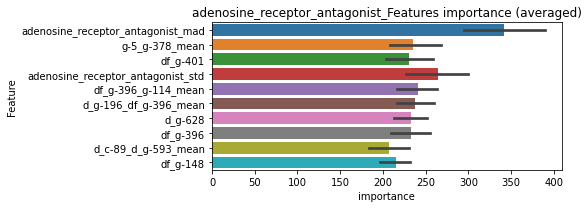

len(train_index) : 2730
len(valid_index) : 911
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180358	valid_1's binary_logloss: 0.0951534
[600]	training's binary_logloss: 0.00251713	valid_1's binary_logloss: 0.0782147
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00183951	valid_1's binary_logloss: 0.077351


len(train_index) : 2731
len(valid_index) : 910
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185956	valid_1's binary_logloss: 0.0671648
[600]	training's binary_logloss: 0.00270518	valid_1's binary_logloss: 0.0402925
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.0015453	valid_1's binary_logloss: 0.0381931


len(train_index) : 2731
len(valid_index) : 910
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018389	valid_1's binary_logloss: 0.0752131
[600]	training's binary_logloss: 0.00260999	valid_1's binary_logloss: 0.0586722
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00273867	valid_1's binary_logloss: 0.0584233


len(train_index) : 2731
len(valid_index) : 910
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199988	valid_1's binary_logloss: 0.0616952
[600]	training's binary_logloss: 0.00272961	valid_1's binary_logloss: 0.0351282
[900]	training's binary_logloss: 0.00107697	valid_1's binary_logloss: 0.0291809
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.00100358	valid_1's binary_logloss: 0.0287101


adenosine_receptor_antagonist logloss: 0.05067668712915048


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719189	valid_1's binary_logloss: 0.018001
[600]	training's binary_logloss: 0.000879365	valid_1's binary_logloss: 0.00755037
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000517327	valid_1's binary_logloss: 0.0065619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00717655	valid_1's binary_logloss: 0.0185132
[600]	training's binary_logloss: 0.000891957	valid_1's binary_logloss: 0.00641206
[900]	training's binary_logloss: 0.000478242	valid_1's binary_logloss: 0.00523874
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000478449	valid_1's binary_logloss: 0.00523526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073589	valid_1's binary_logloss: 0.0119017
[600]	training's binary_logloss: 0.000928971	valid_1's binary_logloss: 0.00240659
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0037393, Threshold: 0.0257195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01800, conf_1:0.03344
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0257195
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.0757195
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1257195
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1757195
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.2257195
threshold: 0.2257195, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615296	valid_1's binary_logloss: 0.0134042
[600]	training's binary_logloss: 0.000809854	valid_1's binary_logloss: 0.00528778
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000456324	valid_1's binary_logloss: 0.00453404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617411	valid_1's binary_logloss: 0.0166241
[600]	training's binary_logloss: 0.000804875	valid_1's binary_logloss: 0.00535746
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000437967	valid_1's binary_logloss: 0.00414066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064713	valid_1's binary_logloss: 0.00955653
[600]	training's binary_logloss: 0.000833398	valid_1's binary_logloss: 0.00168606
[900]	training's binary_logloss: 0.000431954	valid_1's binary_logloss: 0.00099641
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0363419, Threshold: 0.2257195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076, Num_p_label: 28.0, conf_0:0.18058, conf_1:0.27086
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_1: 0.2257195
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_2: 0.2757195
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_3: 0.3257195
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.3757195
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.4257195
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_6: 0.4757195
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.5257195
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.5757195
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6257195
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.6757195
threshold: 0.6757195, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615296	valid_1's binary_logloss: 0.0134042
[600]	training's binary_logloss: 0.000809854	valid_1's binary_logloss: 0.00528778
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000456324	valid_1's binary_logloss: 0.00453404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617411	valid_1's binary_logloss: 0.0166241
[600]	training's binary_logloss: 0.000804875	valid_1's binary_logloss: 0.00535746
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000437967	valid_1's binary_logloss: 0.00414066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064713	valid_1's binary_logloss: 0.00955653
[600]	training's binary_logloss: 0.000833398	valid_1's binary_logloss: 0.00168606
[900]	training's binary_logloss: 0.000431954	valid_1's binary_logloss: 0.00099641
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0363419, Threshold: 0.6757195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.74329
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.6757195
threshold: 0.6757195, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


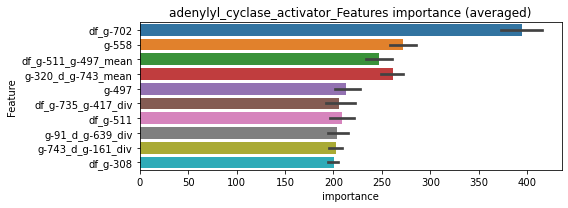

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061823	valid_1's binary_logloss: 0.0133356
[600]	training's binary_logloss: 0.000806062	valid_1's binary_logloss: 0.00528306
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000446652	valid_1's binary_logloss: 0.00444427


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619519	valid_1's binary_logloss: 0.0173472
[600]	training's binary_logloss: 0.000796875	valid_1's binary_logloss: 0.00538353
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000447686	valid_1's binary_logloss: 0.00425133


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651389	valid_1's binary_logloss: 0.00932683
[600]	training's binary_logloss: 0.000831443	valid_1's binary_logloss: 0.00161645
[900]	training's binary_logloss: 0.000440224	valid_1's binary_logloss: 0.000960656
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000431775	valid_1's binary_logloss: 0.000944842


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644974	valid_1's binary_logloss: 0.0138549
[600]	training's binary_logloss: 0.000815644	valid_1's binary_logloss: 0.00375894
[900]	training's binary_logloss: 0.000436738	valid_1's binary_logloss: 0.00270044
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000429736	valid_1's binary_logloss: 0.0026892


adenylyl_cyclase_activator logloss: 0.003082940785096717


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0875337	valid_1's binary_logloss: 0.286873
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.0383872	valid_1's binary_logloss: 0.274338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0916088	valid_1's binary_logloss: 0.303302
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.058108	valid_1's binary_logloss: 0.295101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0908064	valid_1's binary_logloss: 0.285362
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.0400247	valid_1's binary_logloss: 0.273726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0880858	valid_1's binary_logloss: 0.272705
[600]	training's binary_logloss: 0.026982	valid_1's binary_logloss: 0.255891
Early stopping, best iteratio

1 / 3 AUC score:0.871
y_Threshold: 0.1153035, Threshold: 0.6348877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 467 → Positive_corect_labels: 482/3437
p_label_rate: 0.0100452 Vs.target_rate: 0.01134, Num_p_label: 40.0, conf_0:0.44442, conf_1:0.80000
threshold: 0.6348877, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 482.0/3437, y_label_rate: 0.1402386
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399756	valid_1's binary_logloss: 0.18317
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.0154358	valid_1's binary_logloss: 0.175233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03775	valid_1's binary_logloss: 0.164447
[600]	training's binary_logloss: 0.00697494	valid_1's binary_logloss: 0.137948
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00354682	valid_1's binary_logloss: 0.135749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0370369	valid_1's binary_logloss: 0.162125
[600]	training's binary_logloss: 0.00693488	valid_1's binary_logloss: 0.131485
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00410429	valid_1's binary_logloss: 0.128248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_lo

2 / 3 AUC score:0.968
y_Threshold: 0.0983954, Threshold: 0.6348877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 411.0/3295
p_label_rate: 0.0321447 Vs.target_rate: 0.01134, Num_p_label: 128.0, conf_0:0.50000, conf_1:0.76187
Num_p_label: 128.0, Expected: 45.1, Adj_threshold_1: 0.6348877
Num_p_label: 118.0, Expected: 45.1, Adj_threshold_2: 0.6848877
Num_p_label: 101.0, Expected: 45.1, Adj_threshold_3: 0.7348877
Num_p_label: 91.0, Expected: 45.1, Adj_threshold_4: 0.7848877
threshold: 0.7848877, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 411.0/3295, y_label_rate: 0.1247344
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245803	valid_1's binary_logloss: 0.115151
[600]	training's binary_logloss: 0.00407186	valid_1's binary_logloss: 0.0907231
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00326425	valid_1's binary_logloss: 0.0893037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242344	valid_1's binary_logloss: 0.118126
[600]	training's binary_logloss: 0.00386204	valid_1's binary_logloss: 0.0959197
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.0037019	valid_1's binary_logloss: 0.0957745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0259428	valid_1's binary_logloss: 0.113772
[600]	training's binary_logloss: 0.00430366	valid_1's binary_logloss: 0.0924952
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00294877	valid_1's binary_logloss: 0.09045
T

3 / 3 AUC score:0.983
y_Threshold: 0.0841881, Threshold: 0.7848877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 375.0/3223
p_label_rate: 0.0318935 Vs.target_rate: 0.01134, Num_p_label: 127.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 127.0, Expected: 45.1, Adj_threshold_1: 0.7848877
threshold: 0.7848877, positive_p_label: 127.0/3982, p_label_rate: 0.0318935
positive_y_label: 375.0/3223, y_label_rate: 0.1163512


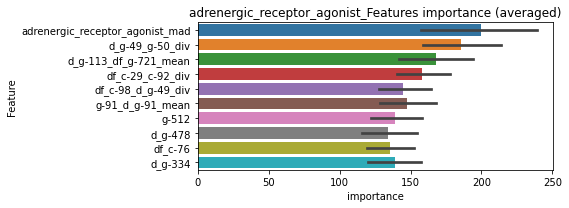

len(train_index) : 2417
len(valid_index) : 806
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168914	valid_1's binary_logloss: 0.0935185
[600]	training's binary_logloss: 0.00278892	valid_1's binary_logloss: 0.0714676
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00273596	valid_1's binary_logloss: 0.0711524


len(train_index) : 2417
len(valid_index) : 806
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165264	valid_1's binary_logloss: 0.121406
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00293828	valid_1's binary_logloss: 0.113044


len(train_index) : 2417
len(valid_index) : 806
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176487	valid_1's binary_logloss: 0.11512


len(train_index) : 2418
len(valid_index) : 805
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00902927	valid_1's binary_logloss: 0.109134
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162213	valid_1's binary_logloss: 0.102287
[600]	training's binary_logloss: 0.00269342	valid_1's binary_logloss: 0.0887406
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00289364	valid_1's binary_logloss: 0.0885492


adrenergic_receptor_agonist logloss: 0.09547204818771488


neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.10091	valid_1's binary_logloss: 0.326431
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0585939	valid_1's binary_logloss: 0.323132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.108887	valid_1's binary_logloss: 0.348596
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0835051	valid_1's binary_logloss: 0.346231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.103543	valid_1's binary_logloss: 0.333284
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0910825	valid_1's binary_logloss: 0.330737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.103859	valid_1's binary_logloss: 0.330759
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.105726	valid_1's binary_logloss: 0.33049

1 / 3 AUC score:0.796
y_Threshold: 0.1384252, Threshold: 0.6837353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 636 → Positive_corect_labels: 395/3252
p_label_rate: 0.0100452 Vs.target_rate: 0.01512, Num_p_label: 40.0, conf_0:0.47861, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.6837353
Num_p_label: 50.0, Expected: 60.2, Adj_threshold_2: 0.6537353
threshold: 0.6537353, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 395.0/3252, y_label_rate: 0.1214637
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221619	valid_1's binary_logloss: 0.151154
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0118405	valid_1's binary_logloss: 0.14819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231512	valid_1's binary_logloss: 0.137668
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0139954	valid_1's binary_logloss: 0.134617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240687	valid_1's binary_logloss: 0.129329
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00503658	valid_1's binary_logloss: 0.116989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229937	valid_1's binary_logloss: 0.139421


2 / 3 AUC score:0.967
y_Threshold: 0.1022617, Threshold: 0.6537353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 331.0/3124
p_label_rate: 0.0527373 Vs.target_rate: 0.01512, Num_p_label: 210.0, conf_0:0.50000, conf_1:0.78448
Num_p_label: 210.0, Expected: 60.2, Adj_threshold_1: 0.6537353
Num_p_label: 203.0, Expected: 60.2, Adj_threshold_2: 0.7037353
Num_p_label: 185.0, Expected: 60.2, Adj_threshold_3: 0.7537353


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.0113743	valid_1's binary_logloss: 0.135119


threshold: 0.7537353, positive_p_label: 185.0/3982, p_label_rate: 0.0464591
positive_y_label: 331.0/3124, y_label_rate: 0.1059539
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115659	valid_1's binary_logloss: 0.0961563
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00573613	valid_1's binary_logloss: 0.0932595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116435	valid_1's binary_logloss: 0.0878345
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00640611	valid_1's binary_logloss: 0.0843735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118848	valid_1's binary_logloss: 0.094185
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0103709	valid_1's binary_logloss: 0.0935279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122276	valid_1's binary_logloss: 0.0714449


3 / 3 AUC score:0.980


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00320534	valid_1's binary_logloss: 0.0662882


y_Threshold: 0.0805282, Threshold: 0.7537353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 298.0/3058
p_label_rate: 0.0645404 Vs.target_rate: 0.01512, Num_p_label: 257.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 257.0, Expected: 60.2, Adj_threshold_1: 0.7537353
threshold: 0.7537353, positive_p_label: 257.0/3982, p_label_rate: 0.0645404
positive_y_label: 298.0/3058, y_label_rate: 0.0974493


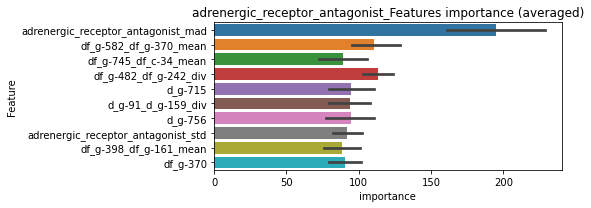

len(train_index) : 2293
len(valid_index) : 765
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702188	valid_1's binary_logloss: 0.084016
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00696166	valid_1's binary_logloss: 0.0838855


len(train_index) : 2293
len(valid_index) : 765
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725493	valid_1's binary_logloss: 0.0666996


len(train_index) : 2294
len(valid_index) : 764
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00344499	valid_1's binary_logloss: 0.0627183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751171	valid_1's binary_logloss: 0.0548341
[600]	training's binary_logloss: 0.00125343	valid_1's binary_logloss: 0.0493937
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00128358	valid_1's binary_logloss: 0.0492519


len(train_index) : 2294
len(valid_index) : 764
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.0706384920226618


[300]	training's binary_logloss: 0.00747508	valid_1's binary_logloss: 0.0870914
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00819243	valid_1's binary_logloss: 0.0866913
neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222351	valid_1's binary_logloss: 0.0955399
[600]	training's binary_logloss: 0.00337486	valid_1's binary_logloss: 0.0608545
[900]	training's binary_logloss: 0.00127114	valid_1's binary_logloss: 0.0542463
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00120175	valid_1's binary_logloss: 0.0541154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225151	valid_1's binary_logloss: 0.0907983
[600]	training's binary_logloss: 0.00328137	valid_1's binary_logloss: 0.066216
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00303655	valid_1's binary_logloss: 0.0655507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234033	valid_1's binary_logloss: 0.0739577
[600]	training's binary_logloss: 0.00352206	valid_1's binary_logloss: 0.0424316
[900]	training's binary_logloss

1 / 3 AUC score:0.996
y_Threshold: 0.0256997, Threshold: 0.1189725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 646/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00277, Num_p_label: 40.0, conf_0:0.08328, conf_1:0.15466
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.1189725
Num_p_label: 30.0, Expected: 11.0, Adj_threshold_2: 0.1689725
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_3: 0.2189725
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_4: 0.2689725
Num_p_label: 12.0, Expected: 11.0, Adj_threshold_5: 0.3189725
threshold: 0.3189725, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3788, y_label_rate: 0.1705385
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184007	valid_1's binary_logloss: 0.07633
[600]	training's binary_logloss: 0.00267056	valid_1's binary_logloss: 0.0538351
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00171523	valid_1's binary_logloss: 0.0517663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187922	valid_1's binary_logloss: 0.0657867
[600]	training's binary_logloss: 0.00272109	valid_1's binary_logloss: 0.0341013
[900]	training's binary_logloss: 0.00109187	valid_1's binary_logloss: 0.0283126
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00103193	valid_1's binary_logloss: 0.0278936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182156	valid_1's binary_logloss: 0.0732143
[600]	training's binary_logloss: 0.00261902	valid_1's binary_logloss: 0.0472463
Early stopping, best iteration i

2 / 3 AUC score:0.998
y_Threshold: 0.0727865, Threshold: 0.3189725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 632.0/3760
p_label_rate: 0.0072828 Vs.target_rate: 0.00277, Num_p_label: 29.0, conf_0:0.25518, conf_1:0.38277
Num_p_label: 29.0, Expected: 11.0, Adj_threshold_1: 0.3189725
Num_p_label: 26.0, Expected: 11.0, Adj_threshold_2: 0.3689725
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_3: 0.4189725
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_4: 0.4689725
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_5: 0.5189725
threshold: 0.5189725, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 632.0/3760, y_label_rate: 0.1680851
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168816	valid_1's binary_logloss: 0.0671334
[600]	training's binary_logloss: 0.00246408	valid_1's binary_logloss: 0.0425086
[900]	training's binary_logloss: 0.00100422	valid_1's binary_logloss: 0.0387646
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000774649	valid_1's binary_logloss: 0.0378219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171613	valid_1's binary_logloss: 0.0668296
[600]	training's binary_logloss: 0.00245211	valid_1's binary_logloss: 0.0446379
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00193971	valid_1's binary_logloss: 0.0435252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167827	valid_1's binary_logloss: 0.0765337
[600]	training's binary_logloss: 0.00239315	valid_1's binary_logloss: 0.0556687
Early stopping, best iterati

3 / 3 AUC score:0.998
y_Threshold: 0.0566077, Threshold: 0.5189725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 616.0/3728
p_label_rate: 0.0052737 Vs.target_rate: 0.00277, Num_p_label: 21.0, conf_0:0.46708, conf_1:0.57087
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.5189725
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_2: 0.5689725
threshold: 0.5689725, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 616.0/3728, y_label_rate: 0.1652361


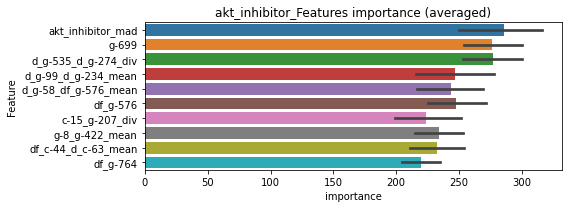

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155474	valid_1's binary_logloss: 0.0594758
[600]	training's binary_logloss: 0.00217154	valid_1's binary_logloss: 0.0299128
[900]	training's binary_logloss: 0.000911082	valid_1's binary_logloss: 0.0249568
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000727045	valid_1's binary_logloss: 0.0242206


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153027	valid_1's binary_logloss: 0.0621659
[600]	training's binary_logloss: 0.00214674	valid_1's binary_logloss: 0.0364356
[900]	training's binary_logloss: 0.000904559	valid_1's binary_logloss: 0.0328175
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000913956	valid_1's binary_logloss: 0.0327079


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156751	valid_1's binary_logloss: 0.0463799
[600]	training's binary_logloss: 0.00223414	valid_1's binary_logloss: 0.019484
[900]	training's binary_logloss: 0.000944208	valid_1's binary_logloss: 0.0145619
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.000707361	valid_1's binary_logloss: 0.0134275


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150102	valid_1's binary_logloss: 0.0780143
[600]	training's binary_logloss: 0.00208678	valid_1's binary_logloss: 0.0538278
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00168485	valid_1's binary_logloss: 0.0523559


akt_inhibitor logloss: 0.030677954568796115


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066209	valid_1's binary_logloss: 0.0192227
[600]	training's binary_logloss: 0.000880135	valid_1's binary_logloss: 0.00818678
[900]	training's binary_logloss: 0.000464093	valid_1's binary_logloss: 0.00663455
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000446177	valid_1's binary_logloss: 0.00657957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671312	valid_1's binary_logloss: 0.0184901
[600]	training's binary_logloss: 0.000887687	valid_1's binary_logloss: 0.00731545
[900]	training's binary_logloss: 0.000467888	valid_1's binary_logloss: 0.00609231
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000470938	valid_1's binary_logloss: 0.00607055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678837	valid_1's binary_logloss: 0.0139414
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0053219, Threshold: 0.0244526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01712, conf_1:0.03179
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0244526
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_2: 0.0744526
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_3: 0.1244526
threshold: 0.1244526, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555686	valid_1's binary_logloss: 0.0154606
[600]	training's binary_logloss: 0.00076324	valid_1's binary_logloss: 0.00637768
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000437254	valid_1's binary_logloss: 0.00514783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564913	valid_1's binary_logloss: 0.0150919
[600]	training's binary_logloss: 0.000789393	valid_1's binary_logloss: 0.00612142
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000458362	valid_1's binary_logloss: 0.0053907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570096	valid_1's binary_logloss: 0.0106836
[600]	training's binary_logloss: 0.000783887	valid_1's binary_logloss: 0.00237081
[900]	training's binary_logloss: 0.000420656	valid_1's binary_logloss: 0.00152009
Early stopping, b

2 / 3 AUC score:1.000
y_Threshold: 0.0745694, Threshold: 0.1244526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0080362 Vs.target_rate: 0.00080, Num_p_label: 32.0, conf_0:0.09956, conf_1:0.14934
Num_p_label: 32.0, Expected: 3.2, Adj_threshold_1: 0.1244526
Num_p_label: 23.0, Expected: 3.2, Adj_threshold_2: 0.1744526
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_3: 0.2244526
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_4: 0.2744526
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_5: 0.3244526
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.3744526
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_7: 0.4244526
threshold: 0.4244526, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552184	valid_1's binary_logloss: 0.012176
[600]	training's binary_logloss: 0.000765025	valid_1's binary_logloss: 0.00372322
[900]	training's binary_logloss: 0.000417014	valid_1's binary_logloss: 0.00274621
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000402392	valid_1's binary_logloss: 0.00269448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551582	valid_1's binary_logloss: 0.0156503
[600]	training's binary_logloss: 0.000765766	valid_1's binary_logloss: 0.00584357
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000439518	valid_1's binary_logloss: 0.00462427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567972	valid_1's binary_logloss: 0.0107335
[600]	training's binary_logloss: 0.000783203	valid_1's binary_logloss: 0.00265729
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0912262, Threshold: 0.4244526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.38201, conf_1:0.46690
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.4244526
threshold: 0.4244526, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


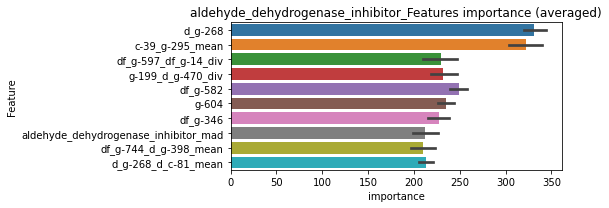

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571216	valid_1's binary_logloss: 0.0146507
[600]	training's binary_logloss: 0.000762948	valid_1's binary_logloss: 0.00429708
[900]	training's binary_logloss: 0.000415335	valid_1's binary_logloss: 0.00335025
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000407221	valid_1's binary_logloss: 0.00332903


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576526	valid_1's binary_logloss: 0.0156327
[600]	training's binary_logloss: 0.000767017	valid_1's binary_logloss: 0.00508982
[900]	training's binary_logloss: 0.000417837	valid_1's binary_logloss: 0.00414426
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000418639	valid_1's binary_logloss: 0.00414298


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571545	valid_1's binary_logloss: 0.0105588
[600]	training's binary_logloss: 0.000784638	valid_1's binary_logloss: 0.00240949
[900]	training's binary_logloss: 0.000422537	valid_1's binary_logloss: 0.00166178
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000413162	valid_1's binary_logloss: 0.00164288


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056981	valid_1's binary_logloss: 0.0121321
[600]	training's binary_logloss: 0.00077959	valid_1's binary_logloss: 0.00330796
[900]	training's binary_logloss: 0.000422699	valid_1's binary_logloss: 0.00238525
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000408323	valid_1's binary_logloss: 0.00234316


aldehyde_dehydrogenase_inhibitor logloss: 0.002865005479710392


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173652	valid_1's binary_logloss: 0.0439576
[600]	training's binary_logloss: 0.002233	valid_1's binary_logloss: 0.0181641
[900]	training's binary_logloss: 0.000918209	valid_1's binary_logloss: 0.0142688
Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000694769	valid_1's binary_logloss: 0.0136587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164322	valid_1's binary_logloss: 0.0607208
[600]	training's binary_logloss: 0.00213292	valid_1's binary_logloss: 0.0316246
[900]	training's binary_logloss: 0.000885208	valid_1's binary_logloss: 0.0273802
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000755333	valid_1's binary_logloss: 0.0269307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162428	valid_1's binary_logloss: 0.0488546
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0131464, Threshold: 0.0616601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.04316, conf_1:0.08016
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0616601
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_2: 0.1116601
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_3: 0.1616601
threshold: 0.1616601, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143512	valid_1's binary_logloss: 0.0397906
[600]	training's binary_logloss: 0.00189923	valid_1's binary_logloss: 0.0164108
[900]	training's binary_logloss: 0.000817188	valid_1's binary_logloss: 0.0127974
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000639241	valid_1's binary_logloss: 0.012045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139538	valid_1's binary_logloss: 0.0511393
[600]	training's binary_logloss: 0.00184982	valid_1's binary_logloss: 0.025147
[900]	training's binary_logloss: 0.000798237	valid_1's binary_logloss: 0.0210133
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000747703	valid_1's binary_logloss: 0.0206422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136814	valid_1's binary_logloss: 0.0398347
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0933794, Threshold: 0.1616601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0082873 Vs.target_rate: 0.00176, Num_p_label: 33.0, conf_0:0.12933, conf_1:0.19399
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_1: 0.1616601
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_2: 0.2116601
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_3: 0.2616601
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_4: 0.3116601
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_5: 0.3616601
threshold: 0.3616601, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130565	valid_1's binary_logloss: 0.0569211
[600]	training's binary_logloss: 0.00180386	valid_1's binary_logloss: 0.0381189
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000852796	valid_1's binary_logloss: 0.0348197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142446	valid_1's binary_logloss: 0.0467908
[600]	training's binary_logloss: 0.00189079	valid_1's binary_logloss: 0.0229315
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00155792	valid_1's binary_logloss: 0.0223057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138827	valid_1's binary_logloss: 0.0378233
[600]	training's binary_logloss: 0.00188138	valid_1's binary_logloss: 0.0142867
[900]	training's binary_logloss: 0.000805111	valid_1's binary_logloss: 0.0102187
Early stopping, best iterati

3 / 3 AUC score:1.000
y_Threshold: 0.0716589, Threshold: 0.3616601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0037670 Vs.target_rate: 0.00176, Num_p_label: 15.0, conf_0:0.32549, conf_1:0.39783
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.3616601
threshold: 0.3616601, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


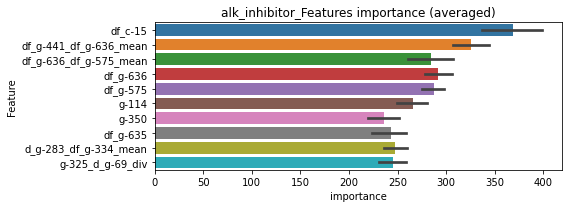

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013585	valid_1's binary_logloss: 0.038896
[600]	training's binary_logloss: 0.00181146	valid_1's binary_logloss: 0.0178027
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00101491	valid_1's binary_logloss: 0.0155808


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014085	valid_1's binary_logloss: 0.0480548
[600]	training's binary_logloss: 0.00185272	valid_1's binary_logloss: 0.0211881
[900]	training's binary_logloss: 0.00079301	valid_1's binary_logloss: 0.0169691
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000753502	valid_1's binary_logloss: 0.0168984


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140996	valid_1's binary_logloss: 0.0449709
[600]	training's binary_logloss: 0.00182314	valid_1's binary_logloss: 0.0258023
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000840956	valid_1's binary_logloss: 0.0230905


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140169	valid_1's binary_logloss: 0.0365291
[600]	training's binary_logloss: 0.00185532	valid_1's binary_logloss: 0.0128902
[900]	training's binary_logloss: 0.000801397	valid_1's binary_logloss: 0.00910617
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000641156	valid_1's binary_logloss: 0.0085778


alk_inhibitor logloss: 0.016036975836767497


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358565	valid_1's binary_logloss: 0.00644685
[600]	training's binary_logloss: 0.000489327	valid_1's binary_logloss: 0.00168765
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000322956	valid_1's binary_logloss: 0.00129891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352875	valid_1's binary_logloss: 0.00764929
[600]	training's binary_logloss: 0.000481828	valid_1's binary_logloss: 0.00206356
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000334636	valid_1's binary_logloss: 0.00175103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366871	valid_1's binary_logloss: 0.00528801
[600]	training's binary_logloss: 0.000495972	valid_1's binary_logloss: 0.00100614
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000334071	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0022161, Threshold: 0.0119153, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00834, conf_1:0.01549
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0119153
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.0619153
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.1119153
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_4: 0.1619153
threshold: 0.1619153, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312645	valid_1's binary_logloss: 0.00522601
[600]	training's binary_logloss: 0.000430971	valid_1's binary_logloss: 0.000974303
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000301575	valid_1's binary_logloss: 0.000735508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313061	valid_1's binary_logloss: 0.00516449
[600]	training's binary_logloss: 0.000429534	valid_1's binary_logloss: 0.00101767
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000292109	valid_1's binary_logloss: 0.000764902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311812	valid_1's binary_logloss: 0.0044545
[600]	training's binary_logloss: 0.000435401	valid_1's binary_logloss: 0.000836505
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000305051	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1669303, Threshold: 0.1619153, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050, Num_p_label: 10.0, conf_0:0.12953, conf_1:0.19430
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.1619153
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.2119153
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.2619153
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.3119153
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.3619153
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4119153
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_7: 0.4619153
threshold: 0.4619153, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312645	valid_1's binary_logloss: 0.00522601
[600]	training's binary_logloss: 0.000430971	valid_1's binary_logloss: 0.000974303
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000301575	valid_1's binary_logloss: 0.000735508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313061	valid_1's binary_logloss: 0.00516449
[600]	training's binary_logloss: 0.000429534	valid_1's binary_logloss: 0.00101767
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000292109	valid_1's binary_logloss: 0.000764902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311812	valid_1's binary_logloss: 0.0044545
[600]	training's binary_logloss: 0.000435401	valid_1's binary_logloss: 0.000836505
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000305051	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1669303, Threshold: 0.4619153, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.41572, conf_1:0.50811
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.4619153
threshold: 0.4619153, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


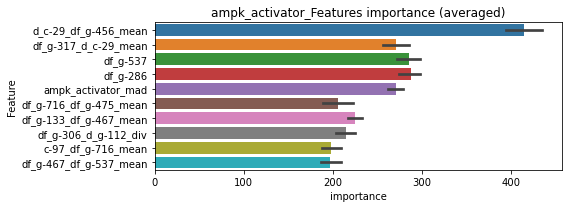

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318499	valid_1's binary_logloss: 0.00520794
[600]	training's binary_logloss: 0.000435706	valid_1's binary_logloss: 0.000967079
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000303557	valid_1's binary_logloss: 0.000724499


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310634	valid_1's binary_logloss: 0.00493316
[600]	training's binary_logloss: 0.000429961	valid_1's binary_logloss: 0.000985944
[900]	training's binary_logloss: 0.000293315	valid_1's binary_logloss: 0.000739799
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000291367	valid_1's binary_logloss: 0.00073761


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322498	valid_1's binary_logloss: 0.00453912
[600]	training's binary_logloss: 0.000441062	valid_1's binary_logloss: 0.000817124
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000304209	valid_1's binary_logloss: 0.000618013


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314238	valid_1's binary_logloss: 0.00525879
[600]	training's binary_logloss: 0.000436252	valid_1's binary_logloss: 0.00103408
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000299134	valid_1's binary_logloss: 0.000773684


ampk_activator logloss: 0.0007134605953173609


neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414197	valid_1's binary_logloss: 0.00887892
[600]	training's binary_logloss: 0.00055303	valid_1's binary_logloss: 0.00245978
[900]	training's binary_logloss: 0.000336918	valid_1's binary_logloss: 0.00185671
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000329263	valid_1's binary_logloss: 0.00183045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409567	valid_1's binary_logloss: 0.00782955
[600]	training's binary_logloss: 0.000538978	valid_1's binary_logloss: 0.00220244
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000334803	valid_1's binary_logloss: 0.00172268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417735	valid_1's binary_logloss: 0.0081577
[600]	training's binary_logloss: 0.000546089	valid_1's binary_logloss: 0.00267781
[900]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0026564, Threshold: 0.0253379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01774, conf_1:0.03294
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0253379
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.0753379
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1253379
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1753379
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.2253379
threshold: 0.2253379, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356694	valid_1's binary_logloss: 0.00840314
[600]	training's binary_logloss: 0.000484226	valid_1's binary_logloss: 0.00266741
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000323482	valid_1's binary_logloss: 0.00225555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342967	valid_1's binary_logloss: 0.00696595
[600]	training's binary_logloss: 0.00046743	valid_1's binary_logloss: 0.0019634
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000303423	valid_1's binary_logloss: 0.00152404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357572	valid_1's binary_logloss: 0.0050916
[600]	training's binary_logloss: 0.000486662	valid_1's binary_logloss: 0.000861526
[900]	training's binary_logloss: 0.000308212	valid_1's binary_logloss: 0.000574987
Early stoppin

2 / 3 AUC score:1.000
y_Threshold: 0.0419274, Threshold: 0.2253379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0050226 Vs.target_rate: 0.00050, Num_p_label: 20.0, conf_0:0.18027, conf_1:0.27041
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.2253379
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.2753379
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.3253379
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.3753379
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.4253379
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.4753379
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.5253379
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.5753379
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.6253379
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.6753379
threshold: 0.6753379, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
===============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356694	valid_1's binary_logloss: 0.00840314
[600]	training's binary_logloss: 0.000484226	valid_1's binary_logloss: 0.00266741
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000323482	valid_1's binary_logloss: 0.00225555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342967	valid_1's binary_logloss: 0.00696595
[600]	training's binary_logloss: 0.00046743	valid_1's binary_logloss: 0.0019634
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000303423	valid_1's binary_logloss: 0.00152404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357572	valid_1's binary_logloss: 0.0050916
[600]	training's binary_logloss: 0.000486662	valid_1's binary_logloss: 0.000861526
[900]	training's binary_logloss: 0.000308212	valid_1's binary_logloss: 0.000574987
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.0419274, Threshold: 0.6753379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.50000, conf_1:0.74287
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.6753379
threshold: 0.6753379, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


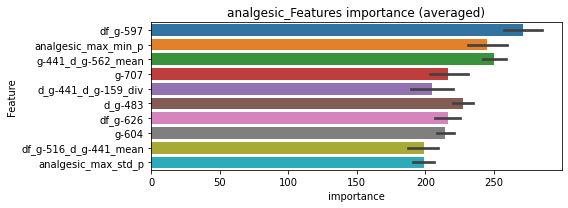

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356186	valid_1's binary_logloss: 0.00872194
[600]	training's binary_logloss: 0.000485134	valid_1's binary_logloss: 0.00284444
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00030973	valid_1's binary_logloss: 0.00243625


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341347	valid_1's binary_logloss: 0.00680423
[600]	training's binary_logloss: 0.000467931	valid_1's binary_logloss: 0.00187961
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00031432	valid_1's binary_logloss: 0.00152136


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355345	valid_1's binary_logloss: 0.00504258
[600]	training's binary_logloss: 0.000480023	valid_1's binary_logloss: 0.000850842
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000313409	valid_1's binary_logloss: 0.000583774


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335823	valid_1's binary_logloss: 0.00881227
[600]	training's binary_logloss: 0.000469165	valid_1's binary_logloss: 0.00389586
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000324578	valid_1's binary_logloss: 0.00364793


analgesic logloss: 0.002047430411082388


neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142076	valid_1's binary_logloss: 0.04554
[600]	training's binary_logloss: 0.00201381	valid_1's binary_logloss: 0.0179584
[900]	training's binary_logloss: 0.000880957	valid_1's binary_logloss: 0.0134495
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000716964	valid_1's binary_logloss: 0.0127774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147784	valid_1's binary_logloss: 0.0656553
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.0024283	valid_1's binary_logloss: 0.0505324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149107	valid_1's binary_logloss: 0.0430957
[600]	training's binary_logloss: 0.00206196	valid_1's binary_logloss: 0.0215184
[900]	training's binary_logloss: 0.000889488	valid_1's binary_logloss: 0.0180467
Early stopping, best iteratio

1 / 3 AUC score:0.998
y_Threshold: 0.0142174, Threshold: 0.0613467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.04294, conf_1:0.07975
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0613467
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_2: 0.1113467
threshold: 0.1113467, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124635	valid_1's binary_logloss: 0.0493489
[600]	training's binary_logloss: 0.00175197	valid_1's binary_logloss: 0.0279632
[900]	training's binary_logloss: 0.000786409	valid_1's binary_logloss: 0.0257299
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000729443	valid_1's binary_logloss: 0.0254391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012689	valid_1's binary_logloss: 0.0429438
[600]	training's binary_logloss: 0.00177953	valid_1's binary_logloss: 0.0202879
[900]	training's binary_logloss: 0.000797779	valid_1's binary_logloss: 0.0165135
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000695368	valid_1's binary_logloss: 0.0161358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013124	valid_1's binary_logloss: 0.049792
[600]	training's binary_logl

2 / 3 AUC score:0.999
y_Threshold: 0.0671998, Threshold: 0.1113467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 639.0/3772
p_label_rate: 0.0163235 Vs.target_rate: 0.00202, Num_p_label: 65.0, conf_0:0.08908, conf_1:0.13362
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_1: 0.1113467
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_2: 0.1613467
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_3: 0.2113467
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_4: 0.2613467
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_5: 0.3113467
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_6: 0.3613467
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_7: 0.4113467
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.4613467
threshold: 0.4613467, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 639.0/3772, y_label_rate: 0.1694062
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116009	valid_1's binary_logloss: 0.0357019
[600]	training's binary_logloss: 0.00160435	valid_1's binary_logloss: 0.0146316
[900]	training's binary_logloss: 0.00074322	valid_1's binary_logloss: 0.0113202
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000639378	valid_1's binary_logloss: 0.010823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114255	valid_1's binary_logloss: 0.0431454
[600]	training's binary_logloss: 0.00160051	valid_1's binary_logloss: 0.0244515
[900]	training's binary_logloss: 0.000735955	valid_1's binary_logloss: 0.0213604
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000640273	valid_1's binary_logloss: 0.0206926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011763	valid_1's binary_logloss: 0.0310469
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0800331, Threshold: 0.4613467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 634.0/3762
p_label_rate: 0.0077850 Vs.target_rate: 0.00202, Num_p_label: 31.0, conf_0:0.41521, conf_1:0.50748
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_1: 0.4613467
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_2: 0.5113467
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_3: 0.5613467
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.6113467
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.6613467
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_6: 0.7113467
threshold: 0.7113467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 634.0/3762, y_label_rate: 0.1685274


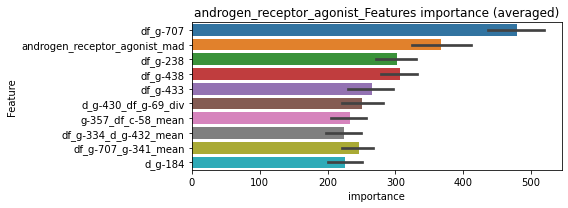

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110102	valid_1's binary_logloss: 0.0281723
[600]	training's binary_logloss: 0.00157696	valid_1's binary_logloss: 0.0108551
[900]	training's binary_logloss: 0.000736704	valid_1's binary_logloss: 0.00767158
Early stopping, best iteration is:
[1163]	training's binary_logloss: 0.000616496	valid_1's binary_logloss: 0.00708096


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00994215	valid_1's binary_logloss: 0.0454051
[600]	training's binary_logloss: 0.00143789	valid_1's binary_logloss: 0.0283418
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000749342	valid_1's binary_logloss: 0.0264444


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110408	valid_1's binary_logloss: 0.032368
[600]	training's binary_logloss: 0.00157183	valid_1's binary_logloss: 0.0134582
[900]	training's binary_logloss: 0.000733986	valid_1's binary_logloss: 0.0112047
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000625752	valid_1's binary_logloss: 0.010727


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010321	valid_1's binary_logloss: 0.0476721
[600]	training's binary_logloss: 0.00150284	valid_1's binary_logloss: 0.0298876
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000804192	valid_1's binary_logloss: 0.0277786


androgen_receptor_agonist logloss: 0.01800790443326754


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02952	valid_1's binary_logloss: 0.149424
[600]	training's binary_logloss: 0.00464997	valid_1's binary_logloss: 0.126656
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00427368	valid_1's binary_logloss: 0.126087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322608	valid_1's binary_logloss: 0.10332
[600]	training's binary_logloss: 0.00507556	valid_1's binary_logloss: 0.0630437
[900]	training's binary_logloss: 0.00173694	valid_1's binary_logloss: 0.0554247
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.00139548	valid_1's binary_logloss: 0.0544458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0314013	valid_1's binary_logloss: 0.10645
[600]	training's binary_logloss: 0.00499289	valid_1's binary_logloss: 0.0720581
Early stopping, best iteration is:
[83

1 / 3 AUC score:0.991
y_Threshold: 0.0327008, Threshold: 0.2009717, pos_neg_ratio: 0.8000000
Remove_noisy_data: 180 → Positive_corect_labels: 630/3748
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.14068, conf_1:0.26126
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.2009717
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_2: 0.2509717
Num_p_label: 20.0, Expected: 14.9, Adj_threshold_3: 0.3009717
threshold: 0.3009717, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 630.0/3748, y_label_rate: 0.1680896
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221709	valid_1's binary_logloss: 0.105179
[600]	training's binary_logloss: 0.00320995	valid_1's binary_logloss: 0.0753561
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.001754	valid_1's binary_logloss: 0.0715589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217337	valid_1's binary_logloss: 0.0977381
[600]	training's binary_logloss: 0.00313409	valid_1's binary_logloss: 0.0722029
[900]	training's binary_logloss: 0.00123997	valid_1's binary_logloss: 0.0684472
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.00105171	valid_1's binary_logloss: 0.0679267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229161	valid_1's binary_logloss: 0.0892307
[600]	training's binary_logloss: 0.00337537	valid_1's binary_logloss: 0.0628884
Early stopping, best iteration is

2 / 3 AUC score:0.996
y_Threshold: 0.0764160, Threshold: 0.3009717, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 601.0/3690
p_label_rate: 0.0178302 Vs.target_rate: 0.00374, Num_p_label: 71.0, conf_0:0.24078, conf_1:0.36117
Num_p_label: 71.0, Expected: 14.9, Adj_threshold_1: 0.3009717
Num_p_label: 63.0, Expected: 14.9, Adj_threshold_2: 0.3509717
Num_p_label: 55.0, Expected: 14.9, Adj_threshold_3: 0.4009717
Num_p_label: 50.0, Expected: 14.9, Adj_threshold_4: 0.4509717
Num_p_label: 48.0, Expected: 14.9, Adj_threshold_5: 0.5009717
Num_p_label: 44.0, Expected: 14.9, Adj_threshold_6: 0.5509717
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_7: 0.6009717
Num_p_label: 36.0, Expected: 14.9, Adj_threshold_8: 0.6509717
Num_p_label: 33.0, Expected: 14.9, Adj_threshold_9: 0.7009717
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_10: 0.7509717
threshold: 0.7509717, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 601.0/3690, y_label_rate: 0.1628726

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180771	valid_1's binary_logloss: 0.0857988
[600]	training's binary_logloss: 0.00263072	valid_1's binary_logloss: 0.057425
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.0012004	valid_1's binary_logloss: 0.0535955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190468	valid_1's binary_logloss: 0.0618985
[600]	training's binary_logloss: 0.0027854	valid_1's binary_logloss: 0.0316698
[900]	training's binary_logloss: 0.0011324	valid_1's binary_logloss: 0.0251697
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000893604	valid_1's binary_logloss: 0.0238487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180622	valid_1's binary_logloss: 0.0896568
[600]	training's binary_logloss: 0.0025714	valid_1's binary_logloss: 0.068525
Early stopping, best iteration is:

3 / 3 AUC score:0.999
y_Threshold: 0.0843108, Threshold: 0.7509717, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 583.0/3654
p_label_rate: 0.0120542 Vs.target_rate: 0.00374, Num_p_label: 48.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 48.0, Expected: 14.9, Adj_threshold_1: 0.7509717
threshold: 0.7509717, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 583.0/3654, y_label_rate: 0.1595512


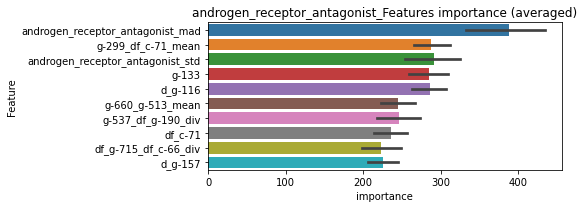

len(train_index) : 2740
len(valid_index) : 914
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159859	valid_1's binary_logloss: 0.0848363
[600]	training's binary_logloss: 0.00231408	valid_1's binary_logloss: 0.0581507
[900]	training's binary_logloss: 0.000985439	valid_1's binary_logloss: 0.0532748
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000978414	valid_1's binary_logloss: 0.0531015


len(train_index) : 2740
len(valid_index) : 914
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177126	valid_1's binary_logloss: 0.0549938
[600]	training's binary_logloss: 0.00251969	valid_1's binary_logloss: 0.03338
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.0011623	valid_1's binary_logloss: 0.0305204


len(train_index) : 2741
len(valid_index) : 913
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162877	valid_1's binary_logloss: 0.0713265
[600]	training's binary_logloss: 0.00238301	valid_1's binary_logloss: 0.0488423
[900]	training's binary_logloss: 0.00101471	valid_1's binary_logloss: 0.0452251
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00100079	valid_1's binary_logloss: 0.0451594


len(train_index) : 2741
len(valid_index) : 913
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162295	valid_1's binary_logloss: 0.0718756
[600]	training's binary_logloss: 0.00241771	valid_1's binary_logloss: 0.0498011
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00176958	valid_1's binary_logloss: 0.0482117


androgen_receptor_antagonist logloss: 0.04424689684332755


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228348	valid_1's binary_logloss: 0.136836
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00746303	valid_1's binary_logloss: 0.125377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246265	valid_1's binary_logloss: 0.0842878
[600]	training's binary_logloss: 0.00371344	valid_1's binary_logloss: 0.0545415
[900]	training's binary_logloss: 0.00136647	valid_1's binary_logloss: 0.0498387
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00136136	valid_1's binary_logloss: 0.0498087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0247159	valid_1's binary_logloss: 0.0822512
[600]	training's binary_logloss: 0.00393751	valid_1's binary_logloss: 0.0558719
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.00156565	valid_1's binary_logloss: 0.05210

1 / 3 AUC score:0.989
y_Threshold: 0.0306673, Threshold: 0.2118450, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.14829, conf_1:0.27540
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.2118450
Num_p_label: 33.0, Expected: 13.4, Adj_threshold_2: 0.2618450
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_3: 0.3118450
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_4: 0.3618450
threshold: 0.3618450, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 634.0/3755, y_label_rate: 0.1688415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175983	valid_1's binary_logloss: 0.0867674
[600]	training's binary_logloss: 0.0025255	valid_1's binary_logloss: 0.063858
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00114278	valid_1's binary_logloss: 0.0614633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191316	valid_1's binary_logloss: 0.0772004
[600]	training's binary_logloss: 0.002716	valid_1's binary_logloss: 0.0620827
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00305862	valid_1's binary_logloss: 0.0620432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018402	valid_1's binary_logloss: 0.0704837
[600]	training's binary_logloss: 0.00268139	valid_1's binary_logloss: 0.0453527
[900]	training's binary_logloss: 0.00107297	valid_1's binary_logloss: 0.0410031
Early stopping, best iteration is:


2 / 3 AUC score:0.997
y_Threshold: 0.0735954, Threshold: 0.3618450, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 610.0/3707
p_label_rate: 0.0195881 Vs.target_rate: 0.00336, Num_p_label: 78.0, conf_0:0.28948, conf_1:0.43421
Num_p_label: 78.0, Expected: 13.4, Adj_threshold_1: 0.3618450
Num_p_label: 77.0, Expected: 13.4, Adj_threshold_2: 0.4118450
Num_p_label: 72.0, Expected: 13.4, Adj_threshold_3: 0.4618450
Num_p_label: 65.0, Expected: 13.4, Adj_threshold_4: 0.5118450
Num_p_label: 60.0, Expected: 13.4, Adj_threshold_5: 0.5618450
Num_p_label: 50.0, Expected: 13.4, Adj_threshold_6: 0.6118450
Num_p_label: 44.0, Expected: 13.4, Adj_threshold_7: 0.6618450
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_8: 0.7118450
Num_p_label: 37.0, Expected: 13.4, Adj_threshold_9: 0.7618450
threshold: 0.7618450, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 610.0/3707, y_label_rate: 0.1645535
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015572	valid_1's binary_logloss: 0.0719908
[600]	training's binary_logloss: 0.0021635	valid_1's binary_logloss: 0.0512549
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00173291	valid_1's binary_logloss: 0.0502157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145581	valid_1's binary_logloss: 0.0665658
[600]	training's binary_logloss: 0.00204499	valid_1's binary_logloss: 0.0443179
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00115722	valid_1's binary_logloss: 0.0408163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015591	valid_1's binary_logloss: 0.0582549
[600]	training's binary_logloss: 0.00213787	valid_1's binary_logloss: 0.0405372
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00163321	valid_1's binary_logloss: 0.039734

3 / 3 AUC score:0.997
y_Threshold: 0.0754426, Threshold: 0.7618450, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 590.0/3667
p_label_rate: 0.0125565 Vs.target_rate: 0.00336, Num_p_label: 50.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 50.0, Expected: 13.4, Adj_threshold_1: 0.7618450
threshold: 0.7618450, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 590.0/3667, y_label_rate: 0.1608945


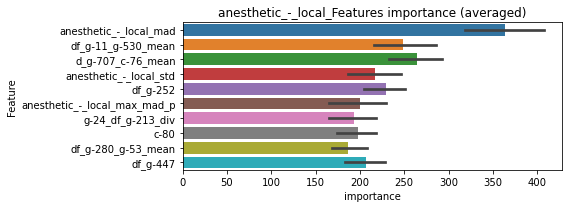

len(train_index) : 2750
len(valid_index) : 917
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126356	valid_1's binary_logloss: 0.0460043
[600]	training's binary_logloss: 0.00176783	valid_1's binary_logloss: 0.0250712
[900]	training's binary_logloss: 0.000806657	valid_1's binary_logloss: 0.0217669
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000755826	valid_1's binary_logloss: 0.0215639


len(train_index) : 2750
len(valid_index) : 917
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128691	valid_1's binary_logloss: 0.0602547
[600]	training's binary_logloss: 0.00177859	valid_1's binary_logloss: 0.0373145
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00133052	valid_1's binary_logloss: 0.0356147


len(train_index) : 2750
len(valid_index) : 917
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013719	valid_1's binary_logloss: 0.048543
[600]	training's binary_logloss: 0.00191774	valid_1's binary_logloss: 0.0299504
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00113195	valid_1's binary_logloss: 0.0282833


len(train_index) : 2751
len(valid_index) : 916
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132127	valid_1's binary_logloss: 0.0620785
[600]	training's binary_logloss: 0.00183043	valid_1's binary_logloss: 0.0383578
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000911487	valid_1's binary_logloss: 0.0347352


anesthetic_-_local logloss: 0.03004801787275727


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114262	valid_1's binary_logloss: 0.0436326
[600]	training's binary_logloss: 0.00142376	valid_1's binary_logloss: 0.0222675
[900]	training's binary_logloss: 0.000642052	valid_1's binary_logloss: 0.0185557
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000614275	valid_1's binary_logloss: 0.0184173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117118	valid_1's binary_logloss: 0.0279899
[600]	training's binary_logloss: 0.00148969	valid_1's binary_logloss: 0.00933855
[900]	training's binary_logloss: 0.000657791	valid_1's binary_logloss: 0.00679855
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000564427	valid_1's binary_logloss: 0.0065344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122179	valid_1's binary_logloss: 0.0267091
[600]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0092015, Threshold: 0.0497798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.03485, conf_1:0.06471
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0497798
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.0997798
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1497798
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_4: 0.1997798
threshold: 0.1997798, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00963663	valid_1's binary_logloss: 0.0300177
[600]	training's binary_logloss: 0.0012531	valid_1's binary_logloss: 0.0134405
[900]	training's binary_logloss: 0.000563864	valid_1's binary_logloss: 0.0109759
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000506676	valid_1's binary_logloss: 0.0107636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987025	valid_1's binary_logloss: 0.0216117
[600]	training's binary_logloss: 0.0012714	valid_1's binary_logloss: 0.00692986
[900]	training's binary_logloss: 0.000574646	valid_1's binary_logloss: 0.00522042
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000506042	valid_1's binary_logloss: 0.00503495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971813	valid_1's binary_logloss: 0.0281056
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0607935, Threshold: 0.1997798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0072828 Vs.target_rate: 0.00151, Num_p_label: 29.0, conf_0:0.15982, conf_1:0.23974
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.1997798
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_2: 0.2497798
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.2997798
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_4: 0.3497798
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.3997798
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.4497798
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_7: 0.4997798
threshold: 0.4997798, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0098653	valid_1's binary_logloss: 0.025965
[600]	training's binary_logloss: 0.00126175	valid_1's binary_logloss: 0.0115881
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000609497	valid_1's binary_logloss: 0.00971668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966178	valid_1's binary_logloss: 0.0211537
[600]	training's binary_logloss: 0.00125915	valid_1's binary_logloss: 0.00579936
[900]	training's binary_logloss: 0.000569453	valid_1's binary_logloss: 0.00361068
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000515462	valid_1's binary_logloss: 0.0034432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00974111	valid_1's binary_logloss: 0.0218581
[600]	training's binary_logloss: 0.00124213	valid_1's binary_logloss: 0.00604937
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0859349, Threshold: 0.4997798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.44980, conf_1:0.54976
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.4997798
threshold: 0.4997798, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


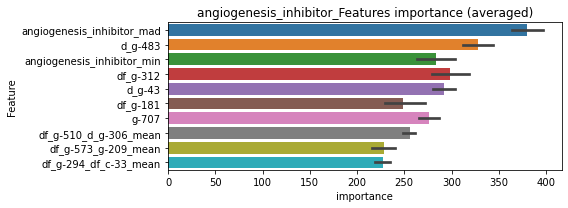

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00965472	valid_1's binary_logloss: 0.0323686
[600]	training's binary_logloss: 0.00119891	valid_1's binary_logloss: 0.0115963
[900]	training's binary_logloss: 0.000556485	valid_1's binary_logloss: 0.00852845
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000494883	valid_1's binary_logloss: 0.00819652


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927579	valid_1's binary_logloss: 0.0249011
[600]	training's binary_logloss: 0.00120711	valid_1's binary_logloss: 0.00903335
[900]	training's binary_logloss: 0.000556918	valid_1's binary_logloss: 0.00664852
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000498504	valid_1's binary_logloss: 0.00646311


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100277	valid_1's binary_logloss: 0.0180795
[600]	training's binary_logloss: 0.00127329	valid_1's binary_logloss: 0.00543926
[900]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.00381926
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000511025	valid_1's binary_logloss: 0.0037248


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968317	valid_1's binary_logloss: 0.0300043
[600]	training's binary_logloss: 0.00123556	valid_1's binary_logloss: 0.0141691
[900]	training's binary_logloss: 0.000554089	valid_1's binary_logloss: 0.0122489
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000549707	valid_1's binary_logloss: 0.0122267


angiogenesis_inhibitor logloss: 0.0076654708487437


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118192	valid_1's binary_logloss: 0.0377873
[600]	training's binary_logloss: 0.00154307	valid_1's binary_logloss: 0.0170881
[900]	training's binary_logloss: 0.000696089	valid_1's binary_logloss: 0.0143838
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.0006102	valid_1's binary_logloss: 0.0139916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011381	valid_1's binary_logloss: 0.0431038
[600]	training's binary_logloss: 0.00153146	valid_1's binary_logloss: 0.0288329
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00111741	valid_1's binary_logloss: 0.0281576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118181	valid_1's binary_logloss: 0.0368105
[600]	training's binary_logloss: 0.00156759	valid_1's binary_logloss: 0.0174208
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0080773, Threshold: 0.0342187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02395, conf_1:0.04448
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0342187
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_2: 0.0842187
threshold: 0.0842187, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0098646	valid_1's binary_logloss: 0.0353796
[600]	training's binary_logloss: 0.00134618	valid_1's binary_logloss: 0.0183069
[900]	training's binary_logloss: 0.000619787	valid_1's binary_logloss: 0.0162381
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000629715	valid_1's binary_logloss: 0.0161818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987983	valid_1's binary_logloss: 0.0359318
[600]	training's binary_logloss: 0.00131422	valid_1's binary_logloss: 0.0244182
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00116483	valid_1's binary_logloss: 0.0241484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102432	valid_1's binary_logloss: 0.0450783
[600]	training's binary_logloss: 0.00135754	valid_1's binary_logloss: 0.0283259
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0438984, Threshold: 0.0842187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 648.0/3793
p_label_rate: 0.0130588 Vs.target_rate: 0.00155, Num_p_label: 52.0, conf_0:0.06737, conf_1:0.10106
Num_p_label: 52.0, Expected: 6.2, Adj_threshold_1: 0.0842187
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_2: 0.1342187
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_3: 0.1842187
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_4: 0.2342187
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_5: 0.2842187
threshold: 0.2842187, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3793, y_label_rate: 0.1708410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0093466	valid_1's binary_logloss: 0.0254917
[600]	training's binary_logloss: 0.00127816	valid_1's binary_logloss: 0.00891007
[900]	training's binary_logloss: 0.000607847	valid_1's binary_logloss: 0.00684068
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.00055899	valid_1's binary_logloss: 0.0066491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972872	valid_1's binary_logloss: 0.0330061
[600]	training's binary_logloss: 0.00130917	valid_1's binary_logloss: 0.0169214
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000643068	valid_1's binary_logloss: 0.0150506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988038	valid_1's binary_logloss: 0.0333518
[600]	training's binary_logloss: 0.00131827	valid_1's binary_logloss: 0.0180305
Early stopping, best it

3 / 3 AUC score:1.000
y_Threshold: 0.0526229, Threshold: 0.2842187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3789
p_label_rate: 0.0032647 Vs.target_rate: 0.00155, Num_p_label: 13.0, conf_0:0.25580, conf_1:0.31264
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.2842187
threshold: 0.2842187, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3789, y_label_rate: 0.1704935


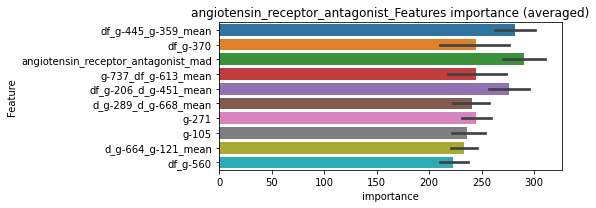

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918962	valid_1's binary_logloss: 0.0259577
[600]	training's binary_logloss: 0.00126743	valid_1's binary_logloss: 0.0113131
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000699208	valid_1's binary_logloss: 0.00972922


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969646	valid_1's binary_logloss: 0.0303187
[600]	training's binary_logloss: 0.00128958	valid_1's binary_logloss: 0.0163655
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00104347	valid_1's binary_logloss: 0.0156524


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00939846	valid_1's binary_logloss: 0.0339755
[600]	training's binary_logloss: 0.00126751	valid_1's binary_logloss: 0.016683
[900]	training's binary_logloss: 0.000597511	valid_1's binary_logloss: 0.0144432
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000576227	valid_1's binary_logloss: 0.0142581


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00952408	valid_1's binary_logloss: 0.0281672
[600]	training's binary_logloss: 0.00128956	valid_1's binary_logloss: 0.011931
[900]	training's binary_logloss: 0.000609505	valid_1's binary_logloss: 0.0101286
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000605522	valid_1's binary_logloss: 0.0100982


angiotensin_receptor_antagonist logloss: 0.012433771671902048


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238038	valid_1's binary_logloss: 0.0872687
[600]	training's binary_logloss: 0.00367408	valid_1's binary_logloss: 0.0525224
[900]	training's binary_logloss: 0.0013455	valid_1's binary_logloss: 0.044437
Early stopping, best iteration is:
[1162]	training's binary_logloss: 0.000908022	valid_1's binary_logloss: 0.042924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025479	valid_1's binary_logloss: 0.0784418
[600]	training's binary_logloss: 0.00385282	valid_1's binary_logloss: 0.0459674
[900]	training's binary_logloss: 0.00138793	valid_1's binary_logloss: 0.0410843
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.00121912	valid_1's binary_logloss: 0.0409248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258234	valid_1's binary_logloss: 0.0787609
[600]	training's binary_logloss:

1 / 3 AUC score:0.995
y_Threshold: 0.0202268, Threshold: 0.2611702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 645/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.18282, conf_1:0.33952
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.2611702
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_2: 0.3111702
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_3: 0.3611702
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.4111702
threshold: 0.4111702, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188589	valid_1's binary_logloss: 0.0853973
[600]	training's binary_logloss: 0.00278308	valid_1's binary_logloss: 0.0599085
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.0017801	valid_1's binary_logloss: 0.0573691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195553	valid_1's binary_logloss: 0.0747241
[600]	training's binary_logloss: 0.00290009	valid_1's binary_logloss: 0.0418615
[900]	training's binary_logloss: 0.00115407	valid_1's binary_logloss: 0.0363323
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00108694	valid_1's binary_logloss: 0.0361837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204097	valid_1's binary_logloss: 0.080694
[600]	training's binary_logloss: 0.00292169	valid_1's binary_logloss: 0.0612202
Early stopping, best iteration i

2 / 3 AUC score:0.993
y_Threshold: 0.0895948, Threshold: 0.4111702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 624.0/3739
p_label_rate: 0.0110497 Vs.target_rate: 0.00307, Num_p_label: 44.0, conf_0:0.32894, conf_1:0.49340
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_1: 0.4111702
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.4611702
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_3: 0.5111702
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_4: 0.5611702
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_5: 0.6111702
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_6: 0.6611702
threshold: 0.6611702, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 624.0/3739, y_label_rate: 0.1668895
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160325	valid_1's binary_logloss: 0.0625092
[600]	training's binary_logloss: 0.00235718	valid_1's binary_logloss: 0.0335637
[900]	training's binary_logloss: 0.00098754	valid_1's binary_logloss: 0.0274531
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000951872	valid_1's binary_logloss: 0.027329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162677	valid_1's binary_logloss: 0.059361
[600]	training's binary_logloss: 0.00245396	valid_1's binary_logloss: 0.032689
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00139257	valid_1's binary_logloss: 0.0291086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176558	valid_1's binary_logloss: 0.04845
[600]	training's binary_logloss: 0.00255105	valid_1's binary_logloss: 0.0234011
[900]	training's binary_logloss: 0

3 / 3 AUC score:0.999
y_Threshold: 0.0766427, Threshold: 0.6611702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 618.0/3727
p_label_rate: 0.0055249 Vs.target_rate: 0.00307, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.72729
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_1: 0.6611702
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.7111702
threshold: 0.7111702, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 618.0/3727, y_label_rate: 0.1658170


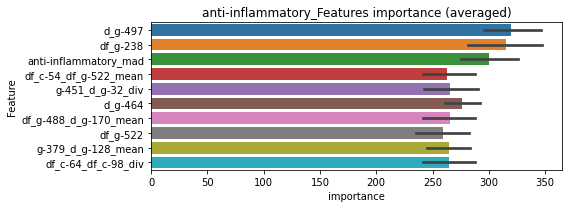

len(train_index) : 2795
len(valid_index) : 932
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159476	valid_1's binary_logloss: 0.0784196
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00272077	valid_1's binary_logloss: 0.0593395


len(train_index) : 2795
len(valid_index) : 932
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159119	valid_1's binary_logloss: 0.0749127
[600]	training's binary_logloss: 0.00230811	valid_1's binary_logloss: 0.0517908
[900]	training's binary_logloss: 0.00097555	valid_1's binary_logloss: 0.0477621
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000984107	valid_1's binary_logloss: 0.0476


len(train_index) : 2795
len(valid_index) : 932
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161292	valid_1's binary_logloss: 0.0561216
[600]	training's binary_logloss: 0.00233991	valid_1's binary_logloss: 0.0319003
[900]	training's binary_logloss: 0.000989545	valid_1's binary_logloss: 0.0285996
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000893073	valid_1's binary_logloss: 0.0281331


len(train_index) : 2796
len(valid_index) : 931
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154815	valid_1's binary_logloss: 0.0627847
[600]	training's binary_logloss: 0.0022714	valid_1's binary_logloss: 0.0375345
[900]	training's binary_logloss: 0.000978763	valid_1's binary_logloss: 0.0334968
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00100778	valid_1's binary_logloss: 0.0334127


anti-inflammatory logloss: 0.042123663161389976


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00796028	valid_1's binary_logloss: 0.0228338
[600]	training's binary_logloss: 0.00103488	valid_1's binary_logloss: 0.00881713
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000562462	valid_1's binary_logloss: 0.00746925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836922	valid_1's binary_logloss: 0.0225383
[600]	training's binary_logloss: 0.0010801	valid_1's binary_logloss: 0.00646738
[900]	training's binary_logloss: 0.000528963	valid_1's binary_logloss: 0.00450735
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000526006	valid_1's binary_logloss: 0.004499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00798543	valid_1's binary_logloss: 0.0282858
[600]	training's binary_logloss: 0.00102933	valid_1's binary_logloss: 0.0148103
Early stopping, best i

1 / 3 AUC score:1.000
y_Threshold: 0.0072490, Threshold: 0.0380660, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02665, conf_1:0.04949
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0380660
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_2: 0.0880660
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.1380660
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_4: 0.1880660
threshold: 0.1880660, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00664823	valid_1's binary_logloss: 0.0345187
[600]	training's binary_logloss: 0.000884083	valid_1's binary_logloss: 0.0233277
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000855002	valid_1's binary_logloss: 0.0232775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728265	valid_1's binary_logloss: 0.0190036
[600]	training's binary_logloss: 0.000945826	valid_1's binary_logloss: 0.00618748
[900]	training's binary_logloss: 0.000485677	valid_1's binary_logloss: 0.00471181
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000485677	valid_1's binary_logloss: 0.00471181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00724135	valid_1's binary_logloss: 0.0153337
[600]	training's binary_logloss: 0.000945753	valid_1's binary_logloss: 0.00439412
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0634227, Threshold: 0.1880660, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00101, Num_p_label: 27.0, conf_0:0.15045, conf_1:0.22568
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_1: 0.1880660
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.2380660
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_3: 0.2880660
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_4: 0.3380660
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_5: 0.3880660
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_6: 0.4380660
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_7: 0.4880660
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_8: 0.5380660
threshold: 0.5380660, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721822	valid_1's binary_logloss: 0.0206754
[600]	training's binary_logloss: 0.000933969	valid_1's binary_logloss: 0.0077892
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000531273	valid_1's binary_logloss: 0.0064132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713814	valid_1's binary_logloss: 0.015763
[600]	training's binary_logloss: 0.000935795	valid_1's binary_logloss: 0.00395834
[900]	training's binary_logloss: 0.000488286	valid_1's binary_logloss: 0.00275501
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000463992	valid_1's binary_logloss: 0.00268001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700321	valid_1's binary_logloss: 0.0266792
[600]	training's binary_logloss: 0.000921962	valid_1's binary_logloss: 0.0158747
Early stopping, bes

3 / 3 AUC score:1.000
y_Threshold: 0.0549947, Threshold: 0.5380660, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0032647 Vs.target_rate: 0.00101, Num_p_label: 13.0, conf_0:0.48426, conf_1:0.59187
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.5380660
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.5880660
threshold: 0.5880660, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


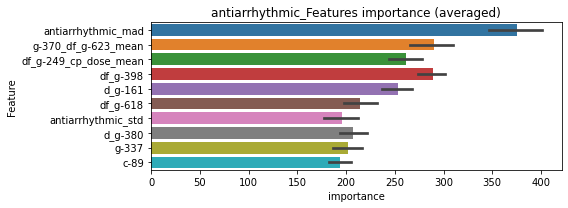

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0070506	valid_1's binary_logloss: 0.019594
[600]	training's binary_logloss: 0.000915898	valid_1's binary_logloss: 0.00925336
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000567955	valid_1's binary_logloss: 0.00852308


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690048	valid_1's binary_logloss: 0.0209172
[600]	training's binary_logloss: 0.000891553	valid_1's binary_logloss: 0.00776698
[900]	training's binary_logloss: 0.000468671	valid_1's binary_logloss: 0.00627725
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000463065	valid_1's binary_logloss: 0.00625054


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694898	valid_1's binary_logloss: 0.0211159
[600]	training's binary_logloss: 0.000904565	valid_1's binary_logloss: 0.00830432
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000479814	valid_1's binary_logloss: 0.00666599


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0070565	valid_1's binary_logloss: 0.0199488
[600]	training's binary_logloss: 0.000910568	valid_1's binary_logloss: 0.00669211
[900]	training's binary_logloss: 0.000473585	valid_1's binary_logloss: 0.00516183
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000481491	valid_1's binary_logloss: 0.0051327


antiarrhythmic logloss: 0.006643470117062663


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155123	valid_1's binary_logloss: 0.0452364
[600]	training's binary_logloss: 0.00201848	valid_1's binary_logloss: 0.0185823
[900]	training's binary_logloss: 0.00084576	valid_1's binary_logloss: 0.0142461
[1200]	training's binary_logloss: 0.00064605	valid_1's binary_logloss: 0.0135804
Early stopping, best iteration is:
[1229]	training's binary_logloss: 0.000639606	valid_1's binary_logloss: 0.0135138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147172	valid_1's binary_logloss: 0.0463351
[600]	training's binary_logloss: 0.00197128	valid_1's binary_logloss: 0.0240618
[900]	training's binary_logloss: 0.000831175	valid_1's binary_logloss: 0.0208846
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000780458	valid_1's binary_logloss: 0.0206785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

1 / 3 AUC score:0.999
y_Threshold: 0.0141925, Threshold: 0.1682434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00181, Num_p_label: 40.0, conf_0:0.11777, conf_1:0.21872
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.1682434
Num_p_label: 31.0, Expected: 7.2, Adj_threshold_2: 0.2182434
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_3: 0.2682434
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_4: 0.3182434
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_5: 0.3682434
threshold: 0.3682434, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126286	valid_1's binary_logloss: 0.0353284
[600]	training's binary_logloss: 0.00167855	valid_1's binary_logloss: 0.0122846
[900]	training's binary_logloss: 0.000727613	valid_1's binary_logloss: 0.00834283
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000611461	valid_1's binary_logloss: 0.00786852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116078	valid_1's binary_logloss: 0.0361712
[600]	training's binary_logloss: 0.00156429	valid_1's binary_logloss: 0.0169064
[900]	training's binary_logloss: 0.000701778	valid_1's binary_logloss: 0.0137715
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000702736	valid_1's binary_logloss: 0.013768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122445	valid_1's binary_logloss: 0.0391064
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1403377, Threshold: 0.3682434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0175791 Vs.target_rate: 0.00181, Num_p_label: 70.0, conf_0:0.29459, conf_1:0.44189
Num_p_label: 70.0, Expected: 7.2, Adj_threshold_1: 0.3682434
Num_p_label: 62.0, Expected: 7.2, Adj_threshold_2: 0.4182434
Num_p_label: 57.0, Expected: 7.2, Adj_threshold_3: 0.4682434
Num_p_label: 49.0, Expected: 7.2, Adj_threshold_4: 0.5182434
Num_p_label: 43.0, Expected: 7.2, Adj_threshold_5: 0.5682434
Num_p_label: 41.0, Expected: 7.2, Adj_threshold_6: 0.6182434
Num_p_label: 38.0, Expected: 7.2, Adj_threshold_7: 0.6682434
Num_p_label: 35.0, Expected: 7.2, Adj_threshold_8: 0.7182434
Num_p_label: 31.0, Expected: 7.2, Adj_threshold_9: 0.7682434
threshold: 0.7682434, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117095	valid_1's binary_logloss: 0.0367574
[600]	training's binary_logloss: 0.0015476	valid_1's binary_logloss: 0.0161226
[900]	training's binary_logloss: 0.000691636	valid_1's binary_logloss: 0.0126874
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000669907	valid_1's binary_logloss: 0.012636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120632	valid_1's binary_logloss: 0.0353962
[600]	training's binary_logloss: 0.00157248	valid_1's binary_logloss: 0.015177
[900]	training's binary_logloss: 0.000696934	valid_1's binary_logloss: 0.0119686
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000604042	valid_1's binary_logloss: 0.0115346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112749	valid_1's binary_logloss: 0.0366528
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.1356300, Threshold: 0.7682434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0092918 Vs.target_rate: 0.00181, Num_p_label: 37.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 37.0, Expected: 7.2, Adj_threshold_1: 0.7682434
threshold: 0.7682434, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 645.0/3783, y_label_rate: 0.1704996


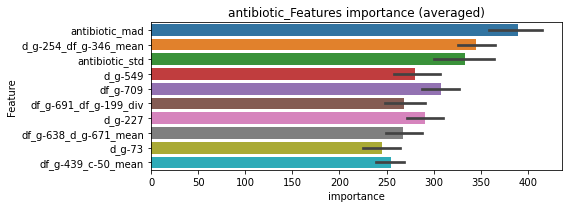

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120541	valid_1's binary_logloss: 0.0302439
[600]	training's binary_logloss: 0.00156819	valid_1's binary_logloss: 0.0100098
[900]	training's binary_logloss: 0.00069437	valid_1's binary_logloss: 0.00697804
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000586649	valid_1's binary_logloss: 0.00643585


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122705	valid_1's binary_logloss: 0.0316804
[600]	training's binary_logloss: 0.00155084	valid_1's binary_logloss: 0.0122495
[900]	training's binary_logloss: 0.000694219	valid_1's binary_logloss: 0.0097095
[1200]	training's binary_logloss: 0.000576115	valid_1's binary_logloss: 0.00939047
Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.000581279	valid_1's binary_logloss: 0.00933009


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117531	valid_1's binary_logloss: 0.0372386
[600]	training's binary_logloss: 0.00152917	valid_1's binary_logloss: 0.0152271
[900]	training's binary_logloss: 0.000680728	valid_1's binary_logloss: 0.0117057
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000614138	valid_1's binary_logloss: 0.0114411


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117972	valid_1's binary_logloss: 0.0438229
[600]	training's binary_logloss: 0.00154866	valid_1's binary_logloss: 0.0251115
[900]	training's binary_logloss: 0.000689488	valid_1's binary_logloss: 0.0228578
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000631778	valid_1's binary_logloss: 0.0224972


antibiotic logloss: 0.012437795553595225


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508731	valid_1's binary_logloss: 0.0123988
[600]	training's binary_logloss: 0.000696084	valid_1's binary_logloss: 0.00381984
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000419913	valid_1's binary_logloss: 0.00293937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501387	valid_1's binary_logloss: 0.0187071
[600]	training's binary_logloss: 0.000674794	valid_1's binary_logloss: 0.00735197
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000404707	valid_1's binary_logloss: 0.0062045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509436	valid_1's binary_logloss: 0.00978476
[600]	training's binary_logloss: 0.000700558	valid_1's binary_logloss: 0.00249176
[900]	training's binary_logloss: 0.000391665	valid_1's binary_logloss: 0.00175493
Early stopping,

1 / 3 AUC score:1.000
y_Threshold: 0.0041078, Threshold: 0.0286464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02005, conf_1:0.03724
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0286464
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0786464
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.1286464
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1786464
threshold: 0.1786464, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450253	valid_1's binary_logloss: 0.0101418
[600]	training's binary_logloss: 0.00061144	valid_1's binary_logloss: 0.00299535
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000406172	valid_1's binary_logloss: 0.00238109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445448	valid_1's binary_logloss: 0.0186611
[600]	training's binary_logloss: 0.000600017	valid_1's binary_logloss: 0.00658681
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000373675	valid_1's binary_logloss: 0.00549632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469315	valid_1's binary_logloss: 0.0072618
[600]	training's binary_logloss: 0.000625646	valid_1's binary_logloss: 0.00136093
[900]	training's binary_logloss: 0.000357787	valid_1's binary_logloss: 0.000853592
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.1614601, Threshold: 0.1786464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0082873 Vs.target_rate: 0.00076, Num_p_label: 33.0, conf_0:0.14292, conf_1:0.21438
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_1: 0.1786464
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_2: 0.2286464
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.2786464
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.3286464
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_5: 0.3786464
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_6: 0.4286464
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.4786464
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_8: 0.5286464
threshold: 0.5286464, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450253	valid_1's binary_logloss: 0.0101418
[600]	training's binary_logloss: 0.00061144	valid_1's binary_logloss: 0.00299535
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000406172	valid_1's binary_logloss: 0.00238109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445448	valid_1's binary_logloss: 0.0186611
[600]	training's binary_logloss: 0.000600017	valid_1's binary_logloss: 0.00658681
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000373675	valid_1's binary_logloss: 0.00549632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469315	valid_1's binary_logloss: 0.0072618
[600]	training's binary_logloss: 0.000625646	valid_1's binary_logloss: 0.00136093
[900]	training's binary_logloss: 0.000357787	valid_1's binary_logloss: 0.000853592
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.1614601, Threshold: 0.5286464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.47578, conf_1:0.58151
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.5286464
threshold: 0.5286464, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


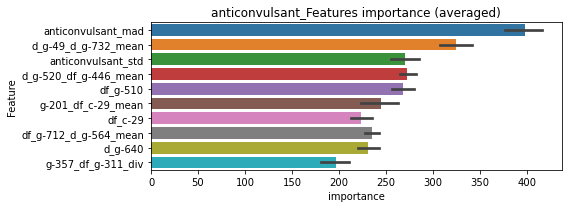

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458134	valid_1's binary_logloss: 0.011114
[600]	training's binary_logloss: 0.00061826	valid_1's binary_logloss: 0.00335443
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000370296	valid_1's binary_logloss: 0.00262965


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449815	valid_1's binary_logloss: 0.0181552
[600]	training's binary_logloss: 0.000602784	valid_1's binary_logloss: 0.00668576
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000368832	valid_1's binary_logloss: 0.00542722


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476469	valid_1's binary_logloss: 0.00762705
[600]	training's binary_logloss: 0.000626146	valid_1's binary_logloss: 0.00143625
[900]	training's binary_logloss: 0.000367288	valid_1's binary_logloss: 0.000931937
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000360258	valid_1's binary_logloss: 0.000913204


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465439	valid_1's binary_logloss: 0.0107134
[600]	training's binary_logloss: 0.000622023	valid_1's binary_logloss: 0.00252416
[900]	training's binary_logloss: 0.000364959	valid_1's binary_logloss: 0.00181773
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000370909	valid_1's binary_logloss: 0.0018129


anticonvulsant logloss: 0.0026996837688654206


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690335	valid_1's binary_logloss: 0.0196841
[600]	training's binary_logloss: 0.000949419	valid_1's binary_logloss: 0.0082696
[900]	training's binary_logloss: 0.000474934	valid_1's binary_logloss: 0.00669936
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000450389	valid_1's binary_logloss: 0.00659275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719592	valid_1's binary_logloss: 0.0183039
[600]	training's binary_logloss: 0.000962947	valid_1's binary_logloss: 0.009105
[900]	training's binary_logloss: 0.000477617	valid_1's binary_logloss: 0.00791169
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000454752	valid_1's binary_logloss: 0.00785551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702129	valid_1's binary_logloss: 0.0181797
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0056355, Threshold: 0.0658608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.04610, conf_1:0.08562
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0658608
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_2: 0.1158608
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_3: 0.1658608
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_4: 0.2158608
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_5: 0.2658608
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.3158608
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_7: 0.3658608
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.4158608
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.4658608
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_10: 0.5158608
threshold: 0.5658608, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571513	valid_1's binary_logloss: 0.0108959
[600]	training's binary_logloss: 0.000792893	valid_1's binary_logloss: 0.00219582
[900]	training's binary_logloss: 0.000409079	valid_1's binary_logloss: 0.00130732
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000400237	valid_1's binary_logloss: 0.00128583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560054	valid_1's binary_logloss: 0.0112311
[600]	training's binary_logloss: 0.000781245	valid_1's binary_logloss: 0.00260844
[900]	training's binary_logloss: 0.00040963	valid_1's binary_logloss: 0.00168685
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000405741	valid_1's binary_logloss: 0.00167555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571118	valid_1's binary_logloss: 0.0128115
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.2095432, Threshold: 0.5658608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0047715 Vs.target_rate: 0.00109, Num_p_label: 19.0, conf_0:0.45269, conf_1:0.67903
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.5658608
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_2: 0.6158608
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_3: 0.6658608
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_4: 0.7158608
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_5: 0.7658608
threshold: 0.7658608, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553453	valid_1's binary_logloss: 0.0136203
[600]	training's binary_logloss: 0.000769064	valid_1's binary_logloss: 0.00433428
[900]	training's binary_logloss: 0.00040811	valid_1's binary_logloss: 0.00332746
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000406516	valid_1's binary_logloss: 0.00332204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549974	valid_1's binary_logloss: 0.0143108
[600]	training's binary_logloss: 0.000763404	valid_1's binary_logloss: 0.00568204
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00042307	valid_1's binary_logloss: 0.00480083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055125	valid_1's binary_logloss: 0.0123163
[600]	training's binary_logloss: 0.000779057	valid_1's binary_logloss: 0.00333422
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0664507, Threshold: 0.7658608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0032647 Vs.target_rate: 0.00109, Num_p_label: 13.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_1: 0.7658608
threshold: 0.7658608, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


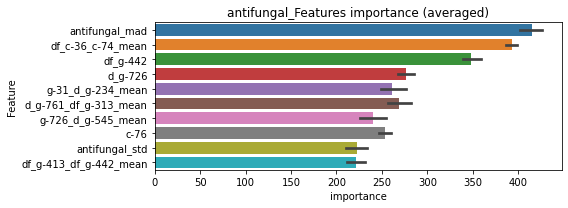

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554587	valid_1's binary_logloss: 0.0146547
[600]	training's binary_logloss: 0.000770069	valid_1's binary_logloss: 0.00462238
[900]	training's binary_logloss: 0.00040709	valid_1's binary_logloss: 0.00368817
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000403625	valid_1's binary_logloss: 0.0036584


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547943	valid_1's binary_logloss: 0.0146486
[600]	training's binary_logloss: 0.000761265	valid_1's binary_logloss: 0.00563792
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000425049	valid_1's binary_logloss: 0.00487398


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568068	valid_1's binary_logloss: 0.0132872
[600]	training's binary_logloss: 0.000780471	valid_1's binary_logloss: 0.00340835
[900]	training's binary_logloss: 0.000410023	valid_1's binary_logloss: 0.00231146
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000400091	valid_1's binary_logloss: 0.00230052


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554607	valid_1's binary_logloss: 0.0127226
[600]	training's binary_logloss: 0.000770188	valid_1's binary_logloss: 0.00303135
[900]	training's binary_logloss: 0.000414846	valid_1's binary_logloss: 0.00194893
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000396582	valid_1's binary_logloss: 0.00190104


antifungal logloss: 0.0031890136934959465


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550915	valid_1's binary_logloss: 0.0155612
[600]	training's binary_logloss: 0.000724281	valid_1's binary_logloss: 0.00586747
[900]	training's binary_logloss: 0.000403933	valid_1's binary_logloss: 0.00476035
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000402718	valid_1's binary_logloss: 0.00474869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551764	valid_1's binary_logloss: 0.0132655
[600]	training's binary_logloss: 0.000729871	valid_1's binary_logloss: 0.00438802
[900]	training's binary_logloss: 0.0004082	valid_1's binary_logloss: 0.00321688
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.0004082	valid_1's binary_logloss: 0.00321688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558859	valid_1's binary_logloss: 0.0138348
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0037051, Threshold: 0.0841043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.05887, conf_1:0.10934
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0841043
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_2: 0.1341043
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_3: 0.1841043
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_4: 0.2341043
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.2841043
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.3341043
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.3841043
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4341043
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.4841043
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.5341043
threshold: 0.5341043, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448534	valid_1's binary_logloss: 0.01151
[600]	training's binary_logloss: 0.000609347	valid_1's binary_logloss: 0.00362103
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000382917	valid_1's binary_logloss: 0.00272965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465491	valid_1's binary_logloss: 0.0120099
[600]	training's binary_logloss: 0.000612102	valid_1's binary_logloss: 0.0035167
[900]	training's binary_logloss: 0.000376001	valid_1's binary_logloss: 0.00268837
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000376086	valid_1's binary_logloss: 0.00268801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471586	valid_1's binary_logloss: 0.0117544
[600]	training's binary_logloss: 0.000632946	valid_1's binary_logloss: 0.00576574
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.1471784, Threshold: 0.5341043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.42728, conf_1:0.64093
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.5341043
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.5841043
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.6341043
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_4: 0.6841043
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.7341043
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.7841043
threshold: 0.7841043, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453317	valid_1's binary_logloss: 0.00944436
[600]	training's binary_logloss: 0.000613347	valid_1's binary_logloss: 0.00242991
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000376751	valid_1's binary_logloss: 0.00181435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450951	valid_1's binary_logloss: 0.0105854
[600]	training's binary_logloss: 0.000611805	valid_1's binary_logloss: 0.00334017
[900]	training's binary_logloss: 0.000377439	valid_1's binary_logloss: 0.00264237
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000378578	valid_1's binary_logloss: 0.00264058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467932	valid_1's binary_logloss: 0.00829795
[600]	training's binary_logloss: 0.000635502	valid_1's binary_logloss: 0.00179132
Early stoppin

3 / 3 AUC score:1.000
y_Threshold: 0.2753546, Threshold: 0.7841043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076, Num_p_label: 12.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.7841043
threshold: 0.7841043, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


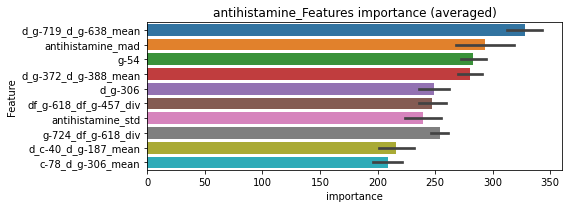

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449577	valid_1's binary_logloss: 0.0100365
[600]	training's binary_logloss: 0.000612559	valid_1's binary_logloss: 0.00262325
[900]	training's binary_logloss: 0.000371532	valid_1's binary_logloss: 0.00200348
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000371532	valid_1's binary_logloss: 0.00200348


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459909	valid_1's binary_logloss: 0.0101605
[600]	training's binary_logloss: 0.000616981	valid_1's binary_logloss: 0.00293156
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000378827	valid_1's binary_logloss: 0.00220555


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471682	valid_1's binary_logloss: 0.0086977
[600]	training's binary_logloss: 0.000631865	valid_1's binary_logloss: 0.0018092
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000397225	valid_1's binary_logloss: 0.00129157


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449417	valid_1's binary_logloss: 0.0122292
[600]	training's binary_logloss: 0.000612592	valid_1's binary_logloss: 0.00357316
[900]	training's binary_logloss: 0.000370954	valid_1's binary_logloss: 0.00289003
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000372557	valid_1's binary_logloss: 0.00288981


antihistamine logloss: 0.0020975420565987235


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588294	valid_1's binary_logloss: 0.0108788
[600]	training's binary_logloss: 0.000703255	valid_1's binary_logloss: 0.00225978
[900]	training's binary_logloss: 0.000405528	valid_1's binary_logloss: 0.00162579
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000405528	valid_1's binary_logloss: 0.00162579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587521	valid_1's binary_logloss: 0.0159917
[600]	training's binary_logloss: 0.000698333	valid_1's binary_logloss: 0.00616988
[900]	training's binary_logloss: 0.000409786	valid_1's binary_logloss: 0.00532142
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000413523	valid_1's binary_logloss: 0.00530543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584258	valid_1's binary_logloss: 0.00946789
[600]	training

1 / 3 AUC score:1.000
y_Threshold: 0.0030289, Threshold: 0.0223502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01565, conf_1:0.02906
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0223502
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0723502
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.1223502
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1723502
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_5: 0.2223502
threshold: 0.2223502, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492446	valid_1's binary_logloss: 0.0082659
[600]	training's binary_logloss: 0.000623928	valid_1's binary_logloss: 0.0015047
[900]	training's binary_logloss: 0.00037121	valid_1's binary_logloss: 0.00102759
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00037121	valid_1's binary_logloss: 0.00102759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501311	valid_1's binary_logloss: 0.0110128
[600]	training's binary_logloss: 0.000631655	valid_1's binary_logloss: 0.00360925
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000389314	valid_1's binary_logloss: 0.00299465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515714	valid_1's binary_logloss: 0.00741543
[600]	training's binary_logloss: 0.000646863	valid_1's binary_logloss: 0.00116628
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0865961, Threshold: 0.2223502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0067805 Vs.target_rate: 0.00076, Num_p_label: 27.0, conf_0:0.17788, conf_1:0.26682
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_1: 0.2223502
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.2723502
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.3223502
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.3723502
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.4223502
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.4723502
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.5223502
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.5723502
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.6223502
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.6723502
threshold: 0.7223502, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492446	valid_1's binary_logloss: 0.0082659
[600]	training's binary_logloss: 0.000623928	valid_1's binary_logloss: 0.0015047
[900]	training's binary_logloss: 0.00037121	valid_1's binary_logloss: 0.00102759
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00037121	valid_1's binary_logloss: 0.00102759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501311	valid_1's binary_logloss: 0.0110128
[600]	training's binary_logloss: 0.000631655	valid_1's binary_logloss: 0.00360925
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000389314	valid_1's binary_logloss: 0.00299465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515714	valid_1's binary_logloss: 0.00741543
[600]	training's binary_logloss: 0.000646863	valid_1's binary_logloss: 0.00116628
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0865961, Threshold: 0.7223502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.50000, conf_1:0.79459
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.7223502
threshold: 0.7223502, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


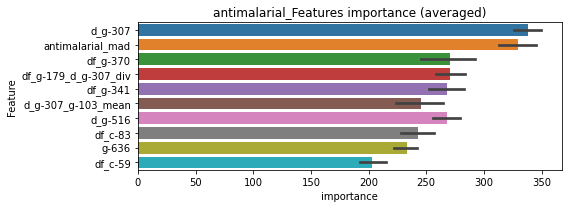

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501786	valid_1's binary_logloss: 0.00837254
[600]	training's binary_logloss: 0.000630892	valid_1's binary_logloss: 0.00159021
[900]	training's binary_logloss: 0.000369306	valid_1's binary_logloss: 0.00107591
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000365402	valid_1's binary_logloss: 0.00106855


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500263	valid_1's binary_logloss: 0.0118318
[600]	training's binary_logloss: 0.000629347	valid_1's binary_logloss: 0.00381945
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000392505	valid_1's binary_logloss: 0.00333573


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511737	valid_1's binary_logloss: 0.00724372
[600]	training's binary_logloss: 0.000647739	valid_1's binary_logloss: 0.00114898
[900]	training's binary_logloss: 0.000381122	valid_1's binary_logloss: 0.000716793
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000381122	valid_1's binary_logloss: 0.000716793


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510436	valid_1's binary_logloss: 0.0098384
[600]	training's binary_logloss: 0.000640355	valid_1's binary_logloss: 0.00242267
[900]	training's binary_logloss: 0.000379207	valid_1's binary_logloss: 0.0018998
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000372517	valid_1's binary_logloss: 0.00187758


antimalarial logloss: 0.001750038554920893


neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255281	valid_1's binary_logloss: 0.0882682
[600]	training's binary_logloss: 0.00392474	valid_1's binary_logloss: 0.0534843
[900]	training's binary_logloss: 0.00139881	valid_1's binary_logloss: 0.0462469
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000967444	valid_1's binary_logloss: 0.0452143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265071	valid_1's binary_logloss: 0.0851493
[600]	training's binary_logloss: 0.00411122	valid_1's binary_logloss: 0.0601976
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00248655	valid_1's binary_logloss: 0.0586389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256892	valid_1's binary_logloss: 0.0835747
[600]	training's binary_logloss: 0.00385029	valid_1's binary_logloss: 0.0544168
Early stopping, best iterati

1 / 3 AUC score:0.993
y_Threshold: 0.0256614, Threshold: 0.1441306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 642/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.10089, conf_1:0.18737
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1441306
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.1941306
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_3: 0.2441306
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_4: 0.2941306
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_5: 0.3441306
threshold: 0.3441306, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199618	valid_1's binary_logloss: 0.0813656
[600]	training's binary_logloss: 0.00288158	valid_1's binary_logloss: 0.0578194
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00144945	valid_1's binary_logloss: 0.0545427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198527	valid_1's binary_logloss: 0.0810162
[600]	training's binary_logloss: 0.00284715	valid_1's binary_logloss: 0.0612064
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.00169701	valid_1's binary_logloss: 0.0593789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201409	valid_1's binary_logloss: 0.0746866
[600]	training's binary_logloss: 0.00288893	valid_1's binary_logloss: 0.0476664
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00124863	valid_1's binary_logloss: 0.043

2 / 3 AUC score:0.997
y_Threshold: 0.0795807, Threshold: 0.3441306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 623.0/3739
p_label_rate: 0.0105475 Vs.target_rate: 0.00307, Num_p_label: 42.0, conf_0:0.27530, conf_1:0.41296
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.3441306
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.3941306
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_3: 0.4441306
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.4941306
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_5: 0.5441306
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_6: 0.5941306
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_7: 0.6441306
threshold: 0.6441306, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 623.0/3739, y_label_rate: 0.1666221
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171026	valid_1's binary_logloss: 0.0624586
[600]	training's binary_logloss: 0.00243973	valid_1's binary_logloss: 0.0417699
[900]	training's binary_logloss: 0.00099949	valid_1's binary_logloss: 0.0392648
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00094813	valid_1's binary_logloss: 0.0391825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017601	valid_1's binary_logloss: 0.0631522
[600]	training's binary_logloss: 0.00252132	valid_1's binary_logloss: 0.0406179
[900]	training's binary_logloss: 0.00101605	valid_1's binary_logloss: 0.0370323
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000956235	valid_1's binary_logloss: 0.0367543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182937	valid_1's binary_logloss: 0.0619304
[600]	training's binary_loglos

3 / 3 AUC score:0.996
y_Threshold: 0.0670211, Threshold: 0.6441306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 608.0/3709
p_label_rate: 0.0042692 Vs.target_rate: 0.00307, Num_p_label: 17.0, conf_0:0.50000, conf_1:0.70854
threshold: 0.6441306, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 608.0/3709, y_label_rate: 0.1639256


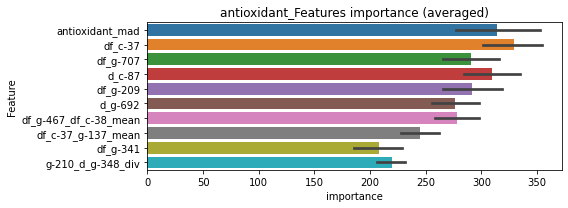

len(train_index) : 2781
len(valid_index) : 928
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157592	valid_1's binary_logloss: 0.0498149
[600]	training's binary_logloss: 0.00223474	valid_1's binary_logloss: 0.0258945
[900]	training's binary_logloss: 0.000927374	valid_1's binary_logloss: 0.0220078
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.000742326	valid_1's binary_logloss: 0.0212509


len(train_index) : 2782
len(valid_index) : 927
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153774	valid_1's binary_logloss: 0.059083
[600]	training's binary_logloss: 0.00217077	valid_1's binary_logloss: 0.0321674
[900]	training's binary_logloss: 0.000914927	valid_1's binary_logloss: 0.0280907
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000869326	valid_1's binary_logloss: 0.0278765


len(train_index) : 2782
len(valid_index) : 927
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015741	valid_1's binary_logloss: 0.0506107
[600]	training's binary_logloss: 0.00227709	valid_1's binary_logloss: 0.0276147
[900]	training's binary_logloss: 0.000950666	valid_1's binary_logloss: 0.0240725
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000920364	valid_1's binary_logloss: 0.0239602


len(train_index) : 2782
len(valid_index) : 927
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156358	valid_1's binary_logloss: 0.0438185
[600]	training's binary_logloss: 0.00217244	valid_1's binary_logloss: 0.0201023
[900]	training's binary_logloss: 0.000921109	valid_1's binary_logloss: 0.016494
[1200]	training's binary_logloss: 0.000703881	valid_1's binary_logloss: 0.0159397
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.000710476	valid_1's binary_logloss: 0.0159202


antioxidant logloss: 0.022261475757967362


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122273	valid_1's binary_logloss: 0.0378559
[600]	training's binary_logloss: 0.00153715	valid_1's binary_logloss: 0.0151865
[900]	training's binary_logloss: 0.000687794	valid_1's binary_logloss: 0.0122098
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000607771	valid_1's binary_logloss: 0.0118891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126746	valid_1's binary_logloss: 0.0366077
[600]	training's binary_logloss: 0.00156019	valid_1's binary_logloss: 0.016928
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000796065	valid_1's binary_logloss: 0.015227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012663	valid_1's binary_logloss: 0.0326812
[600]	training's binary_logloss: 0.00156759	valid_1's binary_logloss: 0.0143426
[900]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0111533, Threshold: 0.0688277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04818, conf_1:0.08948
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0688277
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_2: 0.1188277
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.1688277
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.2188277
threshold: 0.2188277, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107353	valid_1's binary_logloss: 0.0303468
[600]	training's binary_logloss: 0.00132386	valid_1's binary_logloss: 0.0109128
[900]	training's binary_logloss: 0.000606217	valid_1's binary_logloss: 0.00854128
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000557558	valid_1's binary_logloss: 0.00840592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993055	valid_1's binary_logloss: 0.0379633
[600]	training's binary_logloss: 0.00126692	valid_1's binary_logloss: 0.0194581
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000707584	valid_1's binary_logloss: 0.0180432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104659	valid_1's binary_logloss: 0.0208224
[600]	training's binary_logloss: 0.0013385	valid_1's binary_logloss: 0.00661089
[900]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1933411, Threshold: 0.2188277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0165746 Vs.target_rate: 0.00151, Num_p_label: 66.0, conf_0:0.17506, conf_1:0.26259
Num_p_label: 66.0, Expected: 6.0, Adj_threshold_1: 0.2188277
Num_p_label: 58.0, Expected: 6.0, Adj_threshold_2: 0.2688277
Num_p_label: 47.0, Expected: 6.0, Adj_threshold_3: 0.3188277
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_4: 0.3688277
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_5: 0.4188277
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_6: 0.4688277
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_7: 0.5188277
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_8: 0.5688277
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_9: 0.6188277
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_10: 0.6688277
threshold: 0.7188277, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00975354	valid_1's binary_logloss: 0.0240317
[600]	training's binary_logloss: 0.00121873	valid_1's binary_logloss: 0.00686534
[900]	training's binary_logloss: 0.000574682	valid_1's binary_logloss: 0.00469048
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000527665	valid_1's binary_logloss: 0.00454075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988329	valid_1's binary_logloss: 0.0329448
[600]	training's binary_logloss: 0.0012183	valid_1's binary_logloss: 0.0167775
[900]	training's binary_logloss: 0.000583202	valid_1's binary_logloss: 0.014136
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000581286	valid_1's binary_logloss: 0.014131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00956317	valid_1's binary_logloss: 0.0283901
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1366527, Threshold: 0.7188277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0072828 Vs.target_rate: 0.00151, Num_p_label: 29.0, conf_0:0.50000, conf_1:0.79071
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.7188277
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.7688277
threshold: 0.7688277, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


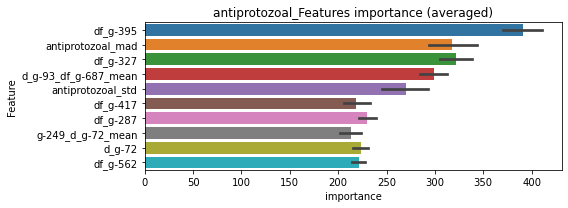

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00980611	valid_1's binary_logloss: 0.0262068
[600]	training's binary_logloss: 0.00120407	valid_1's binary_logloss: 0.011357
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000886503	valid_1's binary_logloss: 0.0104018


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00922641	valid_1's binary_logloss: 0.0277271
[600]	training's binary_logloss: 0.00118044	valid_1's binary_logloss: 0.00863454
[900]	training's binary_logloss: 0.000579256	valid_1's binary_logloss: 0.00581112
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.00053866	valid_1's binary_logloss: 0.00557997


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958133	valid_1's binary_logloss: 0.0290833
[600]	training's binary_logloss: 0.00121804	valid_1's binary_logloss: 0.012362
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000688508	valid_1's binary_logloss: 0.0105544


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968571	valid_1's binary_logloss: 0.0254318
[600]	training's binary_logloss: 0.00121734	valid_1's binary_logloss: 0.00775725
[900]	training's binary_logloss: 0.000575703	valid_1's binary_logloss: 0.00536344
Early stopping, best iteration is:
[1099]	training's binary_logloss: 0.000522625	valid_1's binary_logloss: 0.00511993


antiprotozoal logloss: 0.007916318966828604


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626144	valid_1's binary_logloss: 0.0157982
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000929576	valid_1's binary_logloss: 0.00775743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592279	valid_1's binary_logloss: 0.025512
[600]	training's binary_logloss: 0.000776896	valid_1's binary_logloss: 0.0163515
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00045098	valid_1's binary_logloss: 0.0153562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652249	valid_1's binary_logloss: 0.0139891
[600]	training's binary_logloss: 0.00084234	valid_1's binary_logloss: 0.00396505
[900]	training's binary_logloss: 0.000426776	valid_1's binary_logloss: 0.00265728
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000414253	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0053697, Threshold: 0.0220334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.01542, conf_1:0.02864
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0220334
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_2: 0.0720334
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_3: 0.1220334
threshold: 0.1220334, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535885	valid_1's binary_logloss: 0.0142837
[600]	training's binary_logloss: 0.000695479	valid_1's binary_logloss: 0.00706276
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000652044	valid_1's binary_logloss: 0.00700902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00544024	valid_1's binary_logloss: 0.0206989
[600]	training's binary_logloss: 0.000709298	valid_1's binary_logloss: 0.0124721
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000618124	valid_1's binary_logloss: 0.0122913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553527	valid_1's binary_logloss: 0.0105599
[600]	training's binary_logloss: 0.000720656	valid_1's binary_logloss: 0.00219642
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000404017	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0494877, Threshold: 0.1220334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0060271 Vs.target_rate: 0.00097, Num_p_label: 24.0, conf_0:0.09763, conf_1:0.14644
Num_p_label: 24.0, Expected: 3.8, Adj_threshold_1: 0.1220334
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_2: 0.1720334
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_3: 0.2220334
threshold: 0.2220334, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529285	valid_1's binary_logloss: 0.0237583
[600]	training's binary_logloss: 0.000693011	valid_1's binary_logloss: 0.0160993
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000718827	valid_1's binary_logloss: 0.0159967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539241	valid_1's binary_logloss: 0.0092481
[600]	training's binary_logloss: 0.00070824	valid_1's binary_logloss: 0.0019374
[900]	training's binary_logloss: 0.000387929	valid_1's binary_logloss: 0.00126011
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000387929	valid_1's binary_logloss: 0.00126011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529321	valid_1's binary_logloss: 0.0104476
[600]	training's binary_logloss: 0.000700765	valid_1's binary_logloss: 0.00227142
[900]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0489052, Threshold: 0.2220334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.19983, conf_1:0.24424
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.2220334
threshold: 0.2220334, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


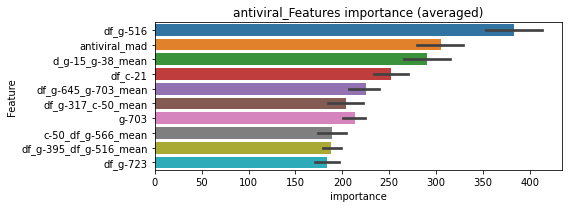

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534298	valid_1's binary_logloss: 0.0164407
[600]	training's binary_logloss: 0.000692846	valid_1's binary_logloss: 0.00759169
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000531137	valid_1's binary_logloss: 0.00714068


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541889	valid_1's binary_logloss: 0.0123542
[600]	training's binary_logloss: 0.000691687	valid_1's binary_logloss: 0.00372417
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000400804	valid_1's binary_logloss: 0.0028915


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502871	valid_1's binary_logloss: 0.0131182
[600]	training's binary_logloss: 0.000675469	valid_1's binary_logloss: 0.00424973
[900]	training's binary_logloss: 0.000377109	valid_1's binary_logloss: 0.00325126
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.0003699	valid_1's binary_logloss: 0.00322422


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533118	valid_1's binary_logloss: 0.011144
[600]	training's binary_logloss: 0.000691539	valid_1's binary_logloss: 0.00278667
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000389509	valid_1's binary_logloss: 0.00197814


antiviral logloss: 0.003809439491057857


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144602	valid_1's binary_logloss: 0.0586362
[600]	training's binary_logloss: 0.00198044	valid_1's binary_logloss: 0.0299262
[900]	training's binary_logloss: 0.000857596	valid_1's binary_logloss: 0.0246405
Early stopping, best iteration is:
[1078]	training's binary_logloss: 0.000710122	valid_1's binary_logloss: 0.0240199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168057	valid_1's binary_logloss: 0.0520762
[600]	training's binary_logloss: 0.00217902	valid_1's binary_logloss: 0.0275046
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.00101569	valid_1's binary_logloss: 0.024625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016523	valid_1's binary_logloss: 0.0413205
[600]	training's binary_logloss: 0.0022226	valid_1's binary_logloss: 0.0134617
[900]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0116808, Threshold: 0.1555452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00206, Num_p_label: 40.0, conf_0:0.10888, conf_1:0.20221
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.1555452
Num_p_label: 30.0, Expected: 8.2, Adj_threshold_2: 0.2055452
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_3: 0.2555452
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_4: 0.3055452
threshold: 0.3055452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137508	valid_1's binary_logloss: 0.0481137
[600]	training's binary_logloss: 0.00183624	valid_1's binary_logloss: 0.0281175
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000863862	valid_1's binary_logloss: 0.0261685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140621	valid_1's binary_logloss: 0.0369288
[600]	training's binary_logloss: 0.00185798	valid_1's binary_logloss: 0.013508
[900]	training's binary_logloss: 0.000811364	valid_1's binary_logloss: 0.00998202
[1200]	training's binary_logloss: 0.000654477	valid_1's binary_logloss: 0.00921225
Early stopping, best iteration is:
[1211]	training's binary_logloss: 0.000652622	valid_1's binary_logloss: 0.00919497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147537	valid_1's binary_logloss: 0.0466967
[600]	training's binar

2 / 3 AUC score:0.999
y_Threshold: 0.0842256, Threshold: 0.3055452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0160723 Vs.target_rate: 0.00206, Num_p_label: 64.0, conf_0:0.24444, conf_1:0.36665
Num_p_label: 64.0, Expected: 8.2, Adj_threshold_1: 0.3055452
Num_p_label: 57.0, Expected: 8.2, Adj_threshold_2: 0.3555452
Num_p_label: 49.0, Expected: 8.2, Adj_threshold_3: 0.4055452
Num_p_label: 46.0, Expected: 8.2, Adj_threshold_4: 0.4555452
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_5: 0.5055452
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_6: 0.5555452
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_7: 0.6055452
Num_p_label: 27.0, Expected: 8.2, Adj_threshold_8: 0.6555452
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_9: 0.7055452
threshold: 0.7055452, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140921	valid_1's binary_logloss: 0.0405238
[600]	training's binary_logloss: 0.00183243	valid_1's binary_logloss: 0.0150613
[900]	training's binary_logloss: 0.00079258	valid_1's binary_logloss: 0.0105249
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000650328	valid_1's binary_logloss: 0.00978681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130083	valid_1's binary_logloss: 0.0552581
[600]	training's binary_logloss: 0.00173136	valid_1's binary_logloss: 0.0328204
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00102518	valid_1's binary_logloss: 0.0310608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128669	valid_1's binary_logloss: 0.0385371
[600]	training's binary_logloss: 0.00172714	valid_1's binary_logloss: 0.0162155
[900]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0969805, Threshold: 0.7055452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 642.0/3779
p_label_rate: 0.0057760 Vs.target_rate: 0.00206, Num_p_label: 23.0, conf_0:0.50000, conf_1:0.77610
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_1: 0.7055452
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_2: 0.7555452
threshold: 0.7555452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3779, y_label_rate: 0.1698862


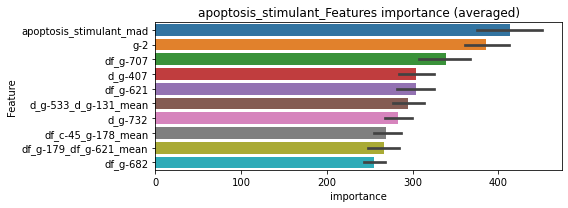

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134174	valid_1's binary_logloss: 0.0393208
[600]	training's binary_logloss: 0.0017533	valid_1's binary_logloss: 0.0183298
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.00081963	valid_1's binary_logloss: 0.0162454


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132251	valid_1's binary_logloss: 0.0505079
[600]	training's binary_logloss: 0.00172265	valid_1's binary_logloss: 0.0264531
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00102137	valid_1's binary_logloss: 0.0235021


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127793	valid_1's binary_logloss: 0.030725
[600]	training's binary_logloss: 0.00170637	valid_1's binary_logloss: 0.00900708
[900]	training's binary_logloss: 0.000759865	valid_1's binary_logloss: 0.00580345
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000653559	valid_1's binary_logloss: 0.00538671


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133357	valid_1's binary_logloss: 0.0420143
[600]	training's binary_logloss: 0.00175181	valid_1's binary_logloss: 0.0163128
[900]	training's binary_logloss: 0.000774215	valid_1's binary_logloss: 0.0118888
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.00065889	valid_1's binary_logloss: 0.0113302


apoptosis_stimulant logloss: 0.014120872719871431


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153154	valid_1's binary_logloss: 0.0669743
[600]	training's binary_logloss: 0.0020917	valid_1's binary_logloss: 0.0438295
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00098261	valid_1's binary_logloss: 0.0400466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153498	valid_1's binary_logloss: 0.0485391
[600]	training's binary_logloss: 0.00209102	valid_1's binary_logloss: 0.021428
[900]	training's binary_logloss: 0.000900398	valid_1's binary_logloss: 0.0172398
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000748877	valid_1's binary_logloss: 0.0167694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159679	valid_1's binary_logloss: 0.0452345
[600]	training's binary_logloss: 0.00220446	valid_1's binary_logloss: 0.0232085
Early stopping, best iteratio

1 / 3 AUC score:0.998
y_Threshold: 0.0150387, Threshold: 0.0757382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00197, Num_p_label: 40.0, conf_0:0.05302, conf_1:0.09846
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0757382
Num_p_label: 22.0, Expected: 7.9, Adj_threshold_2: 0.1257382
Num_p_label: 14.0, Expected: 7.9, Adj_threshold_3: 0.1757382
threshold: 0.1757382, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126264	valid_1's binary_logloss: 0.0617805
[600]	training's binary_logloss: 0.00177055	valid_1's binary_logloss: 0.0337641
[900]	training's binary_logloss: 0.000788528	valid_1's binary_logloss: 0.0303186
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000776254	valid_1's binary_logloss: 0.0302754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128349	valid_1's binary_logloss: 0.0418328
[600]	training's binary_logloss: 0.00179782	valid_1's binary_logloss: 0.0178
[900]	training's binary_logloss: 0.00080336	valid_1's binary_logloss: 0.0142267
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000673416	valid_1's binary_logloss: 0.0135283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134967	valid_1's binary_logloss: 0.0406902
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0890162, Threshold: 0.1757382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3783
p_label_rate: 0.0150678 Vs.target_rate: 0.00197, Num_p_label: 60.0, conf_0:0.14059, conf_1:0.21089
Num_p_label: 60.0, Expected: 7.9, Adj_threshold_1: 0.1757382
Num_p_label: 46.0, Expected: 7.9, Adj_threshold_2: 0.2257382
Num_p_label: 38.0, Expected: 7.9, Adj_threshold_3: 0.2757382
Num_p_label: 32.0, Expected: 7.9, Adj_threshold_4: 0.3257382
Num_p_label: 23.0, Expected: 7.9, Adj_threshold_5: 0.3757382
Num_p_label: 21.0, Expected: 7.9, Adj_threshold_6: 0.4257382
Num_p_label: 16.0, Expected: 7.9, Adj_threshold_7: 0.4757382
threshold: 0.4757382, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 644.0/3783, y_label_rate: 0.1702353
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012419	valid_1's binary_logloss: 0.0466151
[600]	training's binary_logloss: 0.00172317	valid_1's binary_logloss: 0.0259517
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000827379	valid_1's binary_logloss: 0.0228106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128994	valid_1's binary_logloss: 0.0367522
[600]	training's binary_logloss: 0.00179808	valid_1's binary_logloss: 0.0153531
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000925559	valid_1's binary_logloss: 0.0125037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132138	valid_1's binary_logloss: 0.040623
[600]	training's binary_logloss: 0.00183972	valid_1's binary_logloss: 0.017861
[900]	training's binary_logloss: 0.000801716	valid_1's binary_logloss: 0.0136323
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.0849819, Threshold: 0.4757382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3771
p_label_rate: 0.0052737 Vs.target_rate: 0.00197, Num_p_label: 21.0, conf_0:0.42816, conf_1:0.52331
Num_p_label: 21.0, Expected: 7.9, Adj_threshold_1: 0.4757382
Num_p_label: 16.0, Expected: 7.9, Adj_threshold_2: 0.5257382
threshold: 0.5257382, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 638.0/3771, y_label_rate: 0.1691859


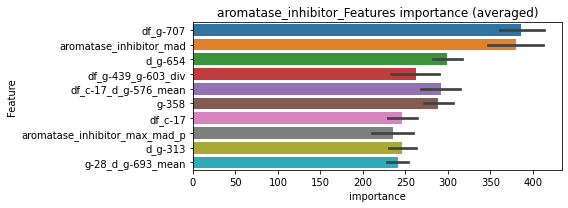

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120145	valid_1's binary_logloss: 0.0545756
[600]	training's binary_logloss: 0.00167382	valid_1's binary_logloss: 0.0346523
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00140429	valid_1's binary_logloss: 0.0338793


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012366	valid_1's binary_logloss: 0.0497878
[600]	training's binary_logloss: 0.00169461	valid_1's binary_logloss: 0.0294453
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000864559	valid_1's binary_logloss: 0.026221


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123748	valid_1's binary_logloss: 0.0364034
[600]	training's binary_logloss: 0.00169938	valid_1's binary_logloss: 0.0137946
[900]	training's binary_logloss: 0.000772746	valid_1's binary_logloss: 0.0106562
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000654319	valid_1's binary_logloss: 0.0100358


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119883	valid_1's binary_logloss: 0.0453245
[600]	training's binary_logloss: 0.00166057	valid_1's binary_logloss: 0.0270377
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.0012304	valid_1's binary_logloss: 0.0261117


aromatase_inhibitor logloss: 0.0240614053926128


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151321	valid_1's binary_logloss: 0.00264205
[600]	training's binary_logloss: 0.000223695	valid_1's binary_logloss: 0.000700958
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00019144	valid_1's binary_logloss: 0.000617962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150906	valid_1's binary_logloss: 0.0045409
[600]	training's binary_logloss: 0.00022229	valid_1's binary_logloss: 0.00218644
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000191826	valid_1's binary_logloss: 0.0021026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151594	valid_1's binary_logloss: 0.00169012
[600]	training's binary_logloss: 0.00022263	valid_1's binary_logloss: 0.000267865
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000192429	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0006363, Threshold: 0.0027985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00196, conf_1:0.00364
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0027985
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0527985
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1027985
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1527985
threshold: 0.1527985, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140278	valid_1's binary_logloss: 0.00170964
[600]	training's binary_logloss: 0.000202842	valid_1's binary_logloss: 0.000278425
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000174962	valid_1's binary_logloss: 0.000243261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140372	valid_1's binary_logloss: 0.00221218
[600]	training's binary_logloss: 0.000201663	valid_1's binary_logloss: 0.000574688
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000179231	valid_1's binary_logloss: 0.000548819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139332	valid_1's binary_logloss: 0.00156988
[600]	training's binary_logloss: 0.000201158	valid_1's binary_logloss: 0.000253334
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000172	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1357467, Threshold: 0.1527985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.12224, conf_1:0.18336
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.1527985
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.2027985
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.2527985
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3027985
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3527985
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.4027985


Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000169483	valid_1's binary_logloss: 0.000225831


Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.4527985
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.5027985
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5527985
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.6027985
threshold: 0.6527985, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140278	valid_1's binary_logloss: 0.00170964
[600]	training's binary_logloss: 0.000202842	valid_1's binary_logloss: 0.000278425
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000174962	valid_1's binary_logloss: 0.000243261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140372	valid_1's binary_logloss: 0.00221218
[600]	training's binary_logloss: 0.000201663	valid_1's binary_logloss: 0.000574688
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000179231	valid_1's binary_logloss: 0.000548819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139332	valid_1's binary_logloss: 0.00156988
[600]	training's binary_logloss: 0.000201158	valid_1's binary_logloss: 0.000253334
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000172	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1357467, Threshold: 0.6527985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00025, Num_p_label: 3.0, conf_0:0.50000, conf_1:0.71808
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.6527985
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.7027985
threshold: 0.7027985, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000169483	valid_1's binary_logloss: 0.000225831


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


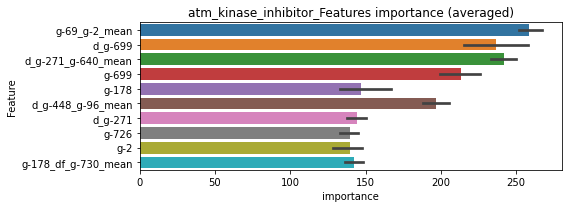

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139566	valid_1's binary_logloss: 0.00177516
[600]	training's binary_logloss: 0.000200974	valid_1's binary_logloss: 0.000292028
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000173013	valid_1's binary_logloss: 0.00025489


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139553	valid_1's binary_logloss: 0.00267118
[600]	training's binary_logloss: 0.000200168	valid_1's binary_logloss: 0.00102109


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000172959	valid_1's binary_logloss: 0.000987688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139188	valid_1's binary_logloss: 0.00157704
[600]	training's binary_logloss: 0.000199894	valid_1's binary_logloss: 0.000252086
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000171879	valid_1's binary_logloss: 0.000216493


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140987	valid_1's binary_logloss: 0.00167017
[600]	training's binary_logloss: 0.000200808	valid_1's binary_logloss: 0.000271635
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000170928	valid_1's binary_logloss: 0.000233318


atm_kinase_inhibitor logloss: 0.00042320115231938486


neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211366	valid_1's binary_logloss: 0.00310994
[600]	training's binary_logloss: 0.000294345	valid_1's binary_logloss: 0.000629947
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000230607	valid_1's binary_logloss: 0.000518593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206181	valid_1's binary_logloss: 0.00450541
[600]	training's binary_logloss: 0.000294698	valid_1's binary_logloss: 0.00109859
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000238182	valid_1's binary_logloss: 0.000919773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020285	valid_1's binary_logloss: 0.00277498
[600]	training's binary_logloss: 0.000293548	valid_1's binary_logloss: 0.000511433
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000234221	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0010176, Threshold: 0.0056620, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000232806	valid_1's binary_logloss: 0.000477259


Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00396, conf_1:0.00736
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0056620
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_2: 0.0556620
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.1056620
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.1556620
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.2056620
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.2556620
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.3056620
threshold: 0.3056620, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178893	valid_1's binary_logloss: 0.00210211
[600]	training's binary_logloss: 0.000258848	valid_1's binary_logloss: 0.000348006
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000211951	valid_1's binary_logloss: 0.000288854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176264	valid_1's binary_logloss: 0.00267016
[600]	training's binary_logloss: 0.000255751	valid_1's binary_logloss: 0.000509188
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000210366	valid_1's binary_logloss: 0.000433924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177732	valid_1's binary_logloss: 0.00210836
[600]	training's binary_logloss: 0.00025611	valid_1's binary_logloss: 0.000339077
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000212075	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1722210, Threshold: 0.3056620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00029, Num_p_label: 8.0, conf_0:0.24453, conf_1:0.36679
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_1: 0.3056620
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.3556620
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.4056620
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.4556620
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.5056620
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5556620
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.6056620
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.6556620
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.7056620
threshold: 0.7056620, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178893	valid_1's binary_logloss: 0.00210211
[600]	training's binary_logloss: 0.000258848	valid_1's binary_logloss: 0.000348006
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000211951	valid_1's binary_logloss: 0.000288854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176264	valid_1's binary_logloss: 0.00267016
[600]	training's binary_logloss: 0.000255751	valid_1's binary_logloss: 0.000509188
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000210366	valid_1's binary_logloss: 0.000433924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177732	valid_1's binary_logloss: 0.00210836
[600]	training's binary_logloss: 0.00025611	valid_1's binary_logloss: 0.000339077
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000212075	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1722210, Threshold: 0.7056620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.50000, conf_1:0.77623
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.7056620
threshold: 0.7056620, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


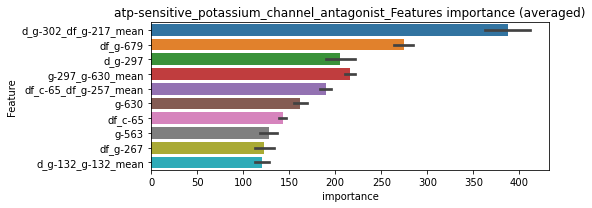

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181129	valid_1's binary_logloss: 0.00219197
[600]	training's binary_logloss: 0.000259128	valid_1's binary_logloss: 0.000374898
[900]	training's binary_logloss: 0.000209007	valid_1's binary_logloss: 0.000307608
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000208647	valid_1's binary_logloss: 0.000307222


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180838	valid_1's binary_logloss: 0.0027215
[600]	training's binary_logloss: 0.000259729	valid_1's binary_logloss: 0.00054493


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00021044	valid_1's binary_logloss: 0.000463924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178291	valid_1's binary_logloss: 0.00215341
[600]	training's binary_logloss: 0.000257679	valid_1's binary_logloss: 0.000353737


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000207594	valid_1's binary_logloss: 0.000286295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177608	valid_1's binary_logloss: 0.00215207
[600]	training's binary_logloss: 0.000258241	valid_1's binary_logloss: 0.000355423
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00020647	valid_1's binary_logloss: 0.000287445


atp-sensitive_potassium_channel_antagonist logloss: 0.0003363297641916003


neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045246	valid_1's binary_logloss: 0.0105975
[600]	training's binary_logloss: 0.000593931	valid_1's binary_logloss: 0.00460883
[900]	training's binary_logloss: 0.000362161	valid_1's binary_logloss: 0.00423688
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00036258	valid_1's binary_logloss: 0.00423684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448968	valid_1's binary_logloss: 0.00896587
[600]	training's binary_logloss: 0.000596919	valid_1's binary_logloss: 0.0024378
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000371682	valid_1's binary_logloss: 0.0018659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438471	valid_1's binary_logloss: 0.00865005
[600]	training's binary_logloss: 0.000595538	valid_1's binary_logloss: 0.00222593
[900]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0028850, Threshold: 0.0253370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01774, conf_1:0.03294
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0253370
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0753370
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1253370
threshold: 0.1253370, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390651	valid_1's binary_logloss: 0.00825572
[600]	training's binary_logloss: 0.000529113	valid_1's binary_logloss: 0.00240487
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000352114	valid_1's binary_logloss: 0.00197832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384385	valid_1's binary_logloss: 0.00596961
[600]	training's binary_logloss: 0.000522653	valid_1's binary_logloss: 0.001134
[900]	training's binary_logloss: 0.000332383	valid_1's binary_logloss: 0.000787422
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000331248	valid_1's binary_logloss: 0.000785386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392002	valid_1's binary_logloss: 0.00678875
[600]	training's binary_logloss: 0.000523139	valid_1's binary_logloss: 0.00143821
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.1128775, Threshold: 0.1253370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00050, Num_p_label: 27.0, conf_0:0.10027, conf_1:0.15040
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_1: 0.1253370
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.1753370
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.2253370
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.2753370
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.3253370
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_6: 0.3753370
threshold: 0.3753370, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390651	valid_1's binary_logloss: 0.00825572
[600]	training's binary_logloss: 0.000529113	valid_1's binary_logloss: 0.00240487
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000352114	valid_1's binary_logloss: 0.00197832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384385	valid_1's binary_logloss: 0.00596961
[600]	training's binary_logloss: 0.000522653	valid_1's binary_logloss: 0.001134
[900]	training's binary_logloss: 0.000332383	valid_1's binary_logloss: 0.000787422
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000331248	valid_1's binary_logloss: 0.000785386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392002	valid_1's binary_logloss: 0.00678875
[600]	training's binary_logloss: 0.000523139	valid_1's binary_logloss: 0.00143821
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.1128775, Threshold: 0.3753370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.33780, conf_1:0.41287
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.3753370
threshold: 0.3753370, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


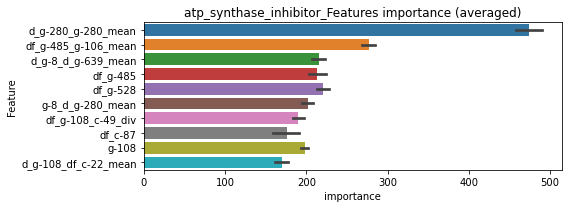

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039265	valid_1's binary_logloss: 0.00803013
[600]	training's binary_logloss: 0.000529341	valid_1's binary_logloss: 0.00217044
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000351048	valid_1's binary_logloss: 0.00172245


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389141	valid_1's binary_logloss: 0.00602766
[600]	training's binary_logloss: 0.000526615	valid_1's binary_logloss: 0.00113843
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000337345	valid_1's binary_logloss: 0.000799918


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383238	valid_1's binary_logloss: 0.006595
[600]	training's binary_logloss: 0.00051559	valid_1's binary_logloss: 0.00139766
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000344304	valid_1's binary_logloss: 0.00108029


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00388823	valid_1's binary_logloss: 0.00611602
[600]	training's binary_logloss: 0.000522076	valid_1's binary_logloss: 0.00117605
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00035357	valid_1's binary_logloss: 0.000880421


atp_synthase_inhibitor logloss: 0.0011208868268294662


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034022	valid_1's binary_logloss: 0.147481
[600]	training's binary_logloss: 0.00568926	valid_1's binary_logloss: 0.117201
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00462278	valid_1's binary_logloss: 0.116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035037	valid_1's binary_logloss: 0.127161
[600]	training's binary_logloss: 0.00587116	valid_1's binary_logloss: 0.0937385
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00291278	valid_1's binary_logloss: 0.0887842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0389084	valid_1's binary_logloss: 0.117667
[600]	training's binary_logloss: 0.00651769	valid_1's binary_logloss: 0.0758098
[900]	training's binary_logloss: 0.00208411	valid_1's binary_logloss: 0.0671838
Early stopping, best iteration is:
[925]

1 / 3 AUC score:0.988
y_Threshold: 0.0322079, Threshold: 0.1386907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 190 → Positive_corect_labels: 625/3737
p_label_rate: 0.0100452 Vs.target_rate: 0.00407, Num_p_label: 40.0, conf_0:0.09708, conf_1:0.18030
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.1386907
Num_p_label: 32.0, Expected: 16.2, Adj_threshold_2: 0.1886907
Num_p_label: 21.0, Expected: 16.2, Adj_threshold_3: 0.2386907
threshold: 0.2386907, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 625.0/3737, y_label_rate: 0.1672465
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242505	valid_1's binary_logloss: 0.125915
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00502397	valid_1's binary_logloss: 0.106189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0269669	valid_1's binary_logloss: 0.0913073
[600]	training's binary_logloss: 0.00408742	valid_1's binary_logloss: 0.0574031
[900]	training's binary_logloss: 0.00150946	valid_1's binary_logloss: 0.0518393
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.00137588	valid_1's binary_logloss: 0.0514113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265877	valid_1's binary_logloss: 0.0903629
[600]	training's binary_logloss: 0.00411613	valid_1's binary_logloss: 0.0585052
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00316051	valid_1's binary_logloss: 0.05678

2 / 3 AUC score:0.993
y_Threshold: 0.0888637, Threshold: 0.2386907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 594.0/3675
p_label_rate: 0.0193370 Vs.target_rate: 0.00407, Num_p_label: 77.0, conf_0:0.19095, conf_1:0.28643
Num_p_label: 77.0, Expected: 16.2, Adj_threshold_1: 0.2386907
Num_p_label: 68.0, Expected: 16.2, Adj_threshold_2: 0.2886907
Num_p_label: 62.0, Expected: 16.2, Adj_threshold_3: 0.3386907
Num_p_label: 56.0, Expected: 16.2, Adj_threshold_4: 0.3886907
Num_p_label: 45.0, Expected: 16.2, Adj_threshold_5: 0.4386907
Num_p_label: 42.0, Expected: 16.2, Adj_threshold_6: 0.4886907
Num_p_label: 39.0, Expected: 16.2, Adj_threshold_7: 0.5386907
Num_p_label: 35.0, Expected: 16.2, Adj_threshold_8: 0.5886907
Num_p_label: 32.0, Expected: 16.2, Adj_threshold_9: 0.6386907
Num_p_label: 24.0, Expected: 16.2, Adj_threshold_10: 0.6886907
threshold: 0.6886907, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 594.0/3675, y_label_rate: 0.1616327

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204315	valid_1's binary_logloss: 0.0924703
[600]	training's binary_logloss: 0.00303614	valid_1's binary_logloss: 0.0693169
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00236671	valid_1's binary_logloss: 0.0681693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213258	valid_1's binary_logloss: 0.0589614
[600]	training's binary_logloss: 0.00308924	valid_1's binary_logloss: 0.0294381
[900]	training's binary_logloss: 0.00122855	valid_1's binary_logloss: 0.023639
[1200]	training's binary_logloss: 0.000869952	valid_1's binary_logloss: 0.0221566
Early stopping, best iteration is:
[1423]	training's binary_logloss: 0.000795861	valid_1's binary_logloss: 0.0216335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190326	valid_1's binary_logloss: 0.0990921
[600]	training's binary_log

3 / 3 AUC score:0.995
y_Threshold: 0.0704054, Threshold: 0.6886907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 572.0/3631
p_label_rate: 0.0105475 Vs.target_rate: 0.00407, Num_p_label: 42.0, conf_0:0.50000, conf_1:0.75756
Num_p_label: 42.0, Expected: 16.2, Adj_threshold_1: 0.6886907
Num_p_label: 38.0, Expected: 16.2, Adj_threshold_2: 0.7386907
Num_p_label: 36.0, Expected: 16.2, Adj_threshold_3: 0.7886907
threshold: 0.7886907, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 572.0/3631, y_label_rate: 0.1575324


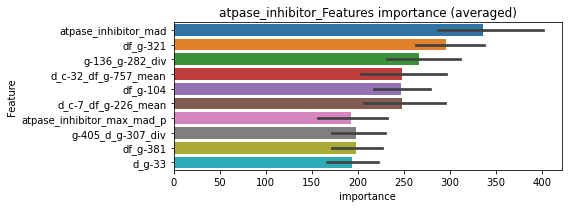

len(train_index) : 2723
len(valid_index) : 908
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171186	valid_1's binary_logloss: 0.0826619
[600]	training's binary_logloss: 0.00249756	valid_1's binary_logloss: 0.0565735
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00124168	valid_1's binary_logloss: 0.0529329


len(train_index) : 2723
len(valid_index) : 908
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184413	valid_1's binary_logloss: 0.0550063
[600]	training's binary_logloss: 0.00272626	valid_1's binary_logloss: 0.0277298
[900]	training's binary_logloss: 0.00112683	valid_1's binary_logloss: 0.0238953
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000930705	valid_1's binary_logloss: 0.0233022


len(train_index) : 2723
len(valid_index) : 908
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172018	valid_1's binary_logloss: 0.0828581
[600]	training's binary_logloss: 0.00253806	valid_1's binary_logloss: 0.0549493
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00181714	valid_1's binary_logloss: 0.0528224


len(train_index) : 2724
len(valid_index) : 907
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172239	valid_1's binary_logloss: 0.0778794
[600]	training's binary_logloss: 0.00253812	valid_1's binary_logloss: 0.0487689
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00145348	valid_1's binary_logloss: 0.0445753


atpase_inhibitor logloss: 0.04340786612331812


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692029	valid_1's binary_logloss: 0.0146899
[600]	training's binary_logloss: 0.000896245	valid_1's binary_logloss: 0.00459059
[900]	training's binary_logloss: 0.000464812	valid_1's binary_logloss: 0.00322945
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000472106	valid_1's binary_logloss: 0.00322688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00684485	valid_1's binary_logloss: 0.0224116
[600]	training's binary_logloss: 0.000884453	valid_1's binary_logloss: 0.00992111
[900]	training's binary_logloss: 0.000461471	valid_1's binary_logloss: 0.00832254
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000449602	valid_1's binary_logloss: 0.00823591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677834	valid_1's binary_logloss: 0.0162527
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0044247, Threshold: 0.0688437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.04819, conf_1:0.08950
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0688437
Num_p_label: 26.0, Expected: 3.2, Adj_threshold_2: 0.1188437
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_3: 0.1688437
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_4: 0.2188437
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_5: 0.2688437
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.3188437
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_7: 0.3688437
threshold: 0.3688437, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575969	valid_1's binary_logloss: 0.009618
[600]	training's binary_logloss: 0.000779547	valid_1's binary_logloss: 0.00218035
[900]	training's binary_logloss: 0.000417754	valid_1's binary_logloss: 0.001429
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.00040724	valid_1's binary_logloss: 0.00140889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569251	valid_1's binary_logloss: 0.0208756
[600]	training's binary_logloss: 0.000759725	valid_1's binary_logloss: 0.00987909
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000456057	valid_1's binary_logloss: 0.00912003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572362	valid_1's binary_logloss: 0.0118373
[600]	training's binary_logloss: 0.000783114	valid_1's binary_logloss: 0.0026051
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0790484, Threshold: 0.3688437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0067805 Vs.target_rate: 0.00080, Num_p_label: 27.0, conf_0:0.29507, conf_1:0.44261
Num_p_label: 27.0, Expected: 3.2, Adj_threshold_1: 0.3688437
Num_p_label: 24.0, Expected: 3.2, Adj_threshold_2: 0.4188437
Num_p_label: 20.0, Expected: 3.2, Adj_threshold_3: 0.4688437
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_4: 0.5188437
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_5: 0.5688437
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_6: 0.6188437
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_7: 0.6688437
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.7188437
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_9: 0.7688437
threshold: 0.7688437, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557768	valid_1's binary_logloss: 0.0107516
[600]	training's binary_logloss: 0.000762901	valid_1's binary_logloss: 0.00242072
[900]	training's binary_logloss: 0.000416705	valid_1's binary_logloss: 0.00158621
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000406285	valid_1's binary_logloss: 0.00157233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556825	valid_1's binary_logloss: 0.0167488
[600]	training's binary_logloss: 0.000756547	valid_1's binary_logloss: 0.00644379
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000426832	valid_1's binary_logloss: 0.00539408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566462	valid_1's binary_logloss: 0.0111475
[600]	training's binary_logloss: 0.000768637	valid_1's binary_logloss: 0.0024995
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0718901, Threshold: 0.7688437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.7688437
threshold: 0.7688437, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


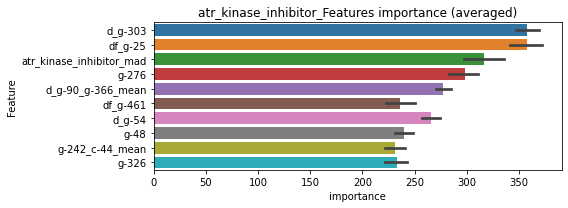

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574818	valid_1's binary_logloss: 0.0153947
[600]	training's binary_logloss: 0.000775128	valid_1's binary_logloss: 0.00450033
[900]	training's binary_logloss: 0.000413428	valid_1's binary_logloss: 0.00319778
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000402631	valid_1's binary_logloss: 0.00314639


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576629	valid_1's binary_logloss: 0.00958736
[600]	training's binary_logloss: 0.00077256	valid_1's binary_logloss: 0.00198671
[900]	training's binary_logloss: 0.000416046	valid_1's binary_logloss: 0.00128943
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.0004016	valid_1's binary_logloss: 0.00125556


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565021	valid_1's binary_logloss: 0.0101643
[600]	training's binary_logloss: 0.000770552	valid_1's binary_logloss: 0.00206369
[900]	training's binary_logloss: 0.000418291	valid_1's binary_logloss: 0.0012939
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000406317	valid_1's binary_logloss: 0.00126879


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565634	valid_1's binary_logloss: 0.0100569
[600]	training's binary_logloss: 0.000755153	valid_1's binary_logloss: 0.00217274
[900]	training's binary_logloss: 0.000411862	valid_1's binary_logloss: 0.00138459
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000405013	valid_1's binary_logloss: 0.00136903


atr_kinase_inhibitor logloss: 0.0017599419050217243


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0377759	valid_1's binary_logloss: 0.143882
[600]	training's binary_logloss: 0.00620763	valid_1's binary_logloss: 0.103438
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00280477	valid_1's binary_logloss: 0.097962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0409794	valid_1's binary_logloss: 0.106397
[600]	training's binary_logloss: 0.0068669	valid_1's binary_logloss: 0.0599358
[900]	training's binary_logloss: 0.00222175	valid_1's binary_logloss: 0.0509875
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.0023059	valid_1's binary_logloss: 0.0509631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0384149	valid_1's binary_logloss: 0.107317
[600]	training's binary_logloss: 0.00654507	valid_1's binary_logloss: 0.0650996
[900]	training's binary_logloss: 0.00

1 / 3 AUC score:0.990
y_Threshold: 0.0417069, Threshold: 0.3568895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 631/3748
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.24982, conf_1:0.46396
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.3568895
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.4068895
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_3: 0.4568895
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_4: 0.5068895
threshold: 0.5068895, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 631.0/3748, y_label_rate: 0.1683565
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302048	valid_1's binary_logloss: 0.0980336
[600]	training's binary_logloss: 0.0045461	valid_1's binary_logloss: 0.0576822
[900]	training's binary_logloss: 0.00160606	valid_1's binary_logloss: 0.0505249
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.0015278	valid_1's binary_logloss: 0.0502047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.031165	valid_1's binary_logloss: 0.0957848
[600]	training's binary_logloss: 0.00469331	valid_1's binary_logloss: 0.0547274
[900]	training's binary_logloss: 0.00164091	valid_1's binary_logloss: 0.046329
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.00111139	valid_1's binary_logloss: 0.0448111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286369	valid_1's binary_logloss: 0.102809
[600]	training's binary_logloss: 0

2 / 3 AUC score:0.998
y_Threshold: 0.1129254, Threshold: 0.5068895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0180814 Vs.target_rate: 0.00403, Num_p_label: 72.0, conf_0:0.40551, conf_1:0.60827
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_1: 0.5068895
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_2: 0.5568895
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_3: 0.6068895
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_4: 0.6568895
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_5: 0.7068895
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_6: 0.7568895
threshold: 0.7568895, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 606.0/3698, y_label_rate: 0.1638724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258206	valid_1's binary_logloss: 0.0851937
[600]	training's binary_logloss: 0.00389139	valid_1's binary_logloss: 0.0540958
[900]	training's binary_logloss: 0.0014368	valid_1's binary_logloss: 0.048838
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00142358	valid_1's binary_logloss: 0.0487242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025738	valid_1's binary_logloss: 0.103472
[600]	training's binary_logloss: 0.00393623	valid_1's binary_logloss: 0.0690946
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00293746	valid_1's binary_logloss: 0.0673943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257724	valid_1's binary_logloss: 0.0842504
[600]	training's binary_logloss: 0.00386427	valid_1's binary_logloss: 0.0489914
[900]	training's binary_logloss: 0

3 / 3 AUC score:0.996
y_Threshold: 0.1060780, Threshold: 0.7568895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 586.0/3658
p_label_rate: 0.0102963 Vs.target_rate: 0.00403, Num_p_label: 41.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_1: 0.7568895
threshold: 0.7568895, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 586.0/3658, y_label_rate: 0.1601968


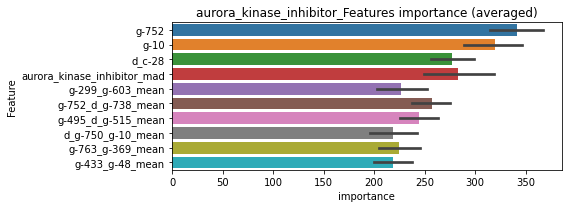

len(train_index) : 2743
len(valid_index) : 915
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231099	valid_1's binary_logloss: 0.0615643
[600]	training's binary_logloss: 0.00340097	valid_1's binary_logloss: 0.0299759
[900]	training's binary_logloss: 0.00130486	valid_1's binary_logloss: 0.0239873
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000945201	valid_1's binary_logloss: 0.022563


len(train_index) : 2743
len(valid_index) : 915
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219105	valid_1's binary_logloss: 0.110052
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00446382	valid_1's binary_logloss: 0.0866941


len(train_index) : 2744
len(valid_index) : 914
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240423	valid_1's binary_logloss: 0.072414
[600]	training's binary_logloss: 0.00347735	valid_1's binary_logloss: 0.0381644
[900]	training's binary_logloss: 0.00131029	valid_1's binary_logloss: 0.0309826
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.00112616	valid_1's binary_logloss: 0.0298959


len(train_index) : 2744
len(valid_index) : 914
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237702	valid_1's binary_logloss: 0.0953811
[600]	training's binary_logloss: 0.0033891	valid_1's binary_logloss: 0.0671662
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.00144178	valid_1's binary_logloss: 0.0626272


aurora_kinase_inhibitor logloss: 0.05044733391231768


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167008	valid_1's binary_logloss: 0.00375227
[600]	training's binary_logloss: 0.000243492	valid_1's binary_logloss: 0.00134203
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000209443	valid_1's binary_logloss: 0.00125788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164278	valid_1's binary_logloss: 0.00307047
[600]	training's binary_logloss: 0.000245396	valid_1's binary_logloss: 0.000675314
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000206666	valid_1's binary_logloss: 0.000585307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168055	valid_1's binary_logloss: 0.00237835
[600]	training's binary_logloss: 0.000241039	valid_1's binary_logloss: 0.000621234
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000202108	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0007940, Threshold: 0.0059530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00417, conf_1:0.00774
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0059530
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0559530
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1059530
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1559530
threshold: 0.1559530, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000202611	valid_1's binary_logloss: 0.00059505


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146594	valid_1's binary_logloss: 0.00404134
[600]	training's binary_logloss: 0.000204556	valid_1's binary_logloss: 0.00201001
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000171071	valid_1's binary_logloss: 0.00189589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146233	valid_1's binary_logloss: 0.00204295
[600]	training's binary_logloss: 0.000204376	valid_1's binary_logloss: 0.000370928
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000170317	valid_1's binary_logloss: 0.000320534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148119	valid_1's binary_logloss: 0.00166458
[600]	training's binary_logloss: 0.000204341	valid_1's binary_logloss: 0.00024331
[900]	training's binary_logloss: 0.000171023	valid_1's binary_logloss: 0.000202463
Early sto

2 / 3 AUC score:1.000
y_Threshold: 0.0452645, Threshold: 0.1559530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00025, Num_p_label: 15.0, conf_0:0.12476, conf_1:0.18714
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_1: 0.1559530
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_2: 0.2059530


[900]	training's binary_logloss: 0.000169235	valid_1's binary_logloss: 0.000374721
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000169235	valid_1's binary_logloss: 0.000374721


Num_p_label: 11.0, Expected: 1.0, Adj_threshold_3: 0.2559530
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.3059530
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.3559530
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4059530
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.4559530
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.5059530
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.5559530
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.6059530
threshold: 0.6559530, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146594	valid_1's binary_logloss: 0.00404134
[600]	training's binary_logloss: 0.000204556	valid_1's binary_logloss: 0.00201001
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000171071	valid_1's binary_logloss: 0.00189589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146233	valid_1's binary_logloss: 0.00204295
[600]	training's binary_logloss: 0.000204376	valid_1's binary_logloss: 0.000370928
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000170317	valid_1's binary_logloss: 0.000320534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148119	valid_1's binary_logloss: 0.00166458
[600]	training's binary_logloss: 0.000204341	valid_1's binary_logloss: 0.00024331
[900]	training's binary_logloss: 0.000171023	valid_1's binary_logloss: 0.000202463
Early sto

3 / 3 AUC score:1.000
y_Threshold: 0.0452645, Threshold: 0.6559530, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.50000, conf_1:0.72155
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.6559530
threshold: 0.6559530, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[900]	training's binary_logloss: 0.000169235	valid_1's binary_logloss: 0.000374721
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000169235	valid_1's binary_logloss: 0.000374721


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


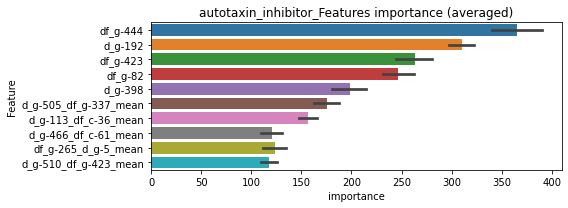

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145918	valid_1's binary_logloss: 0.00355038
[600]	training's binary_logloss: 0.000205223	valid_1's binary_logloss: 0.00173743


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000169827	valid_1's binary_logloss: 0.00165481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014592	valid_1's binary_logloss: 0.00191797
[600]	training's binary_logloss: 0.000206143	valid_1's binary_logloss: 0.000357425


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000170805	valid_1's binary_logloss: 0.000308143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146354	valid_1's binary_logloss: 0.00163909
[600]	training's binary_logloss: 0.00020717	valid_1's binary_logloss: 0.000250561


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000170452	valid_1's binary_logloss: 0.000205346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145237	valid_1's binary_logloss: 0.00203854
[600]	training's binary_logloss: 0.000205953	valid_1's binary_logloss: 0.00036881


autotaxin_inhibitor logloss: 0.0006196579517838362


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000168933	valid_1's binary_logloss: 0.000308282
neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253637	valid_1's binary_logloss: 0.0727341
[600]	training's binary_logloss: 0.00359451	valid_1's binary_logloss: 0.0359094
[900]	training's binary_logloss: 0.00127088	valid_1's binary_logloss: 0.0291394
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000907925	valid_1's binary_logloss: 0.0282795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252193	valid_1's binary_logloss: 0.0742813
[600]	training's binary_logloss: 0.00362938	valid_1's binary_logloss: 0.0341018
[900]	training's binary_logloss: 0.00129274	valid_1's binary_logloss: 0.0268597
Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000919653	valid_1's binary_logloss: 0.0254652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240605	valid_1's binary_logloss: 0.0761669
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0179024, Threshold: 0.0823158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.05762, conf_1:0.10701
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0823158
Num_p_label: 24.0, Expected: 10.0, Adj_threshold_2: 0.1323158
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_3: 0.1823158
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_4: 0.2323158
threshold: 0.2323158, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207787	valid_1's binary_logloss: 0.0727186
[600]	training's binary_logloss: 0.0028947	valid_1's binary_logloss: 0.0411693
[900]	training's binary_logloss: 0.00110649	valid_1's binary_logloss: 0.0355287
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.0010469	valid_1's binary_logloss: 0.0354016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219713	valid_1's binary_logloss: 0.0734857
[600]	training's binary_logloss: 0.00306624	valid_1's binary_logloss: 0.0439558
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00137206	valid_1's binary_logloss: 0.0401912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203193	valid_1's binary_logloss: 0.0717373
[600]	training's binary_logloss: 0.00281981	valid_1's binary_logloss: 0.044963
Early stopping, best iteration is

2 / 3 AUC score:0.997
y_Threshold: 0.0854789, Threshold: 0.2323158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 641.0/3772
p_label_rate: 0.0085384 Vs.target_rate: 0.00252, Num_p_label: 34.0, conf_0:0.18585, conf_1:0.27878
Num_p_label: 34.0, Expected: 10.0, Adj_threshold_1: 0.2323158
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_2: 0.2823158
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_3: 0.3323158
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_4: 0.3823158
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_5: 0.4323158
threshold: 0.4323158, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 641.0/3772, y_label_rate: 0.1699364
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188339	valid_1's binary_logloss: 0.0857354
[600]	training's binary_logloss: 0.00259635	valid_1's binary_logloss: 0.0573464
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00126235	valid_1's binary_logloss: 0.0524466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207562	valid_1's binary_logloss: 0.0650014
[600]	training's binary_logloss: 0.00281764	valid_1's binary_logloss: 0.0370237
[900]	training's binary_logloss: 0.00108333	valid_1's binary_logloss: 0.0322039
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00106884	valid_1's binary_logloss: 0.0321318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218669	valid_1's binary_logloss: 0.0672303
[600]	training's binary_logloss: 0.00289242	valid_1's binary_logloss: 0.0303338
[900]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0945386, Threshold: 0.4323158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 630.0/3750
p_label_rate: 0.0050226 Vs.target_rate: 0.00252, Num_p_label: 20.0, conf_0:0.38908, conf_1:0.47555
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_1: 0.4323158
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.4823158
threshold: 0.4823158, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 630.0/3750, y_label_rate: 0.1680000


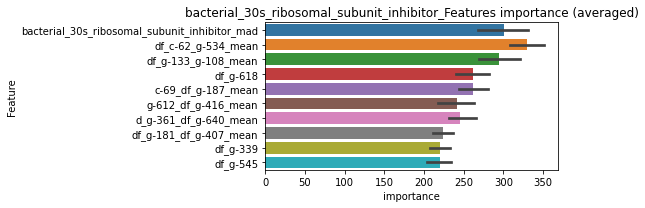

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019011	valid_1's binary_logloss: 0.0554979
[600]	training's binary_logloss: 0.00263625	valid_1's binary_logloss: 0.0294571
[900]	training's binary_logloss: 0.00103172	valid_1's binary_logloss: 0.0256392
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000840298	valid_1's binary_logloss: 0.0251578


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189801	valid_1's binary_logloss: 0.0605871
[600]	training's binary_logloss: 0.00254794	valid_1's binary_logloss: 0.0304424
[900]	training's binary_logloss: 0.00100736	valid_1's binary_logloss: 0.0262502
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000979423	valid_1's binary_logloss: 0.0261245


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199201	valid_1's binary_logloss: 0.061704
[600]	training's binary_logloss: 0.00273794	valid_1's binary_logloss: 0.035169
[900]	training's binary_logloss: 0.00105195	valid_1's binary_logloss: 0.0323007
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.00103278	valid_1's binary_logloss: 0.0322678


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208363	valid_1's binary_logloss: 0.0519571
[600]	training's binary_logloss: 0.00277732	valid_1's binary_logloss: 0.0215411
[900]	training's binary_logloss: 0.0010636	valid_1's binary_logloss: 0.01683
Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000782395	valid_1's binary_logloss: 0.0161248


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.024919099114770124


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.030436	valid_1's binary_logloss: 0.105602
[600]	training's binary_logloss: 0.00472245	valid_1's binary_logloss: 0.07214
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00236082	valid_1's binary_logloss: 0.0681456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317649	valid_1's binary_logloss: 0.095454
[600]	training's binary_logloss: 0.00480737	valid_1's binary_logloss: 0.063506
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00192171	valid_1's binary_logloss: 0.0585076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319136	valid_1's binary_logloss: 0.0939381
[600]	training's binary_logloss: 0.00489565	valid_1's binary_logloss: 0.052056
[900]	training's binary_logloss: 0.00164211	valid_1's binary_logloss: 0.0412721
Early stopping, best iteration is:
[1

1 / 3 AUC score:0.992
y_Threshold: 0.0314242, Threshold: 0.1322224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.09256, conf_1:0.17189
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.1322224
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_2: 0.1822224
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_3: 0.2322224
threshold: 0.2322224, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 632.0/3754, y_label_rate: 0.1683538
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231458	valid_1's binary_logloss: 0.0763319
[600]	training's binary_logloss: 0.00334041	valid_1's binary_logloss: 0.0414475
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00155162	valid_1's binary_logloss: 0.035868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229746	valid_1's binary_logloss: 0.0925348
[600]	training's binary_logloss: 0.00333597	valid_1's binary_logloss: 0.0583332
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00144181	valid_1's binary_logloss: 0.0514629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236277	valid_1's binary_logloss: 0.0779344
[600]	training's binary_logloss: 0.00342669	valid_1's binary_logloss: 0.0379537
[900]	training's binary_logloss: 0.00127596	valid_1's binary_logloss: 0.0285767
Early stopping, best iteration 

2 / 3 AUC score:0.999
y_Threshold: 0.0928303, Threshold: 0.2322224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 622.0/3734
p_label_rate: 0.0165746 Vs.target_rate: 0.00336, Num_p_label: 66.0, conf_0:0.18578, conf_1:0.27867
Num_p_label: 66.0, Expected: 13.4, Adj_threshold_1: 0.2322224
Num_p_label: 56.0, Expected: 13.4, Adj_threshold_2: 0.2822224
Num_p_label: 45.0, Expected: 13.4, Adj_threshold_3: 0.3322224
Num_p_label: 39.0, Expected: 13.4, Adj_threshold_4: 0.3822224
Num_p_label: 34.0, Expected: 13.4, Adj_threshold_5: 0.4322224
Num_p_label: 26.0, Expected: 13.4, Adj_threshold_6: 0.4822224
Num_p_label: 23.0, Expected: 13.4, Adj_threshold_7: 0.5322224
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_8: 0.5822224
threshold: 0.5822224, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 622.0/3734, y_label_rate: 0.1665774
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233322	valid_1's binary_logloss: 0.0600397
[600]	training's binary_logloss: 0.00327484	valid_1's binary_logloss: 0.0254483
[900]	training's binary_logloss: 0.00123716	valid_1's binary_logloss: 0.0189967
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000868148	valid_1's binary_logloss: 0.0173664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214617	valid_1's binary_logloss: 0.0827551
[600]	training's binary_logloss: 0.00305363	valid_1's binary_logloss: 0.0508611
[900]	training's binary_logloss: 0.0011518	valid_1's binary_logloss: 0.0436877
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00110212	valid_1's binary_logloss: 0.0435111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219933	valid_1's binary_logloss: 0.0862754
[600]	training's binary_loglo

3 / 3 AUC score:0.996
y_Threshold: 0.0780481, Threshold: 0.5822224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 608.0/3706
p_label_rate: 0.0065294 Vs.target_rate: 0.00336, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.64044
Num_p_label: 26.0, Expected: 13.4, Adj_threshold_1: 0.5822224
Num_p_label: 24.0, Expected: 13.4, Adj_threshold_2: 0.6322224
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_3: 0.6822224
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_4: 0.7322224
threshold: 0.7322224, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 608.0/3706, y_label_rate: 0.1640583


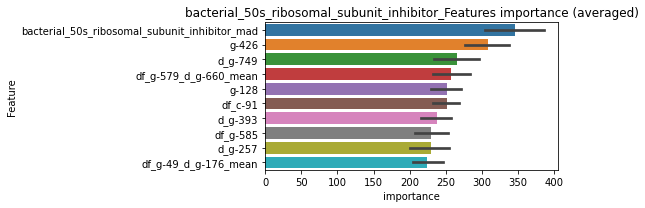

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196239	valid_1's binary_logloss: 0.0778818
[600]	training's binary_logloss: 0.002755	valid_1's binary_logloss: 0.0529185
[900]	training's binary_logloss: 0.00109944	valid_1's binary_logloss: 0.048985
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000957867	valid_1's binary_logloss: 0.0484583


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200503	valid_1's binary_logloss: 0.0555706
[600]	training's binary_logloss: 0.00281545	valid_1's binary_logloss: 0.0249313
[900]	training's binary_logloss: 0.0011114	valid_1's binary_logloss: 0.0190488
[1200]	training's binary_logloss: 0.000767748	valid_1's binary_logloss: 0.0174687
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.000750415	valid_1's binary_logloss: 0.0173111


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203696	valid_1's binary_logloss: 0.0739566
[600]	training's binary_logloss: 0.00283403	valid_1's binary_logloss: 0.0440471
[900]	training's binary_logloss: 0.00110346	valid_1's binary_logloss: 0.0388113
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000797342	valid_1's binary_logloss: 0.037301


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212357	valid_1's binary_logloss: 0.055367
[600]	training's binary_logloss: 0.00294988	valid_1's binary_logloss: 0.0257205
[900]	training's binary_logloss: 0.00112448	valid_1's binary_logloss: 0.0205158
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.000829953	valid_1's binary_logloss: 0.0191403


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.030568410415610408


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106226	valid_1's binary_logloss: 0.0384938
[600]	training's binary_logloss: 0.00143217	valid_1's binary_logloss: 0.0195155
[900]	training's binary_logloss: 0.000670891	valid_1's binary_logloss: 0.01679
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.00057777	valid_1's binary_logloss: 0.0163073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102844	valid_1's binary_logloss: 0.0393574
[600]	training's binary_logloss: 0.00141316	valid_1's binary_logloss: 0.0207682
[900]	training's binary_logloss: 0.000658914	valid_1's binary_logloss: 0.0185492
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000669276	valid_1's binary_logloss: 0.0185303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100636	valid_1's binary_logloss: 0.0495747
Early stopping, best iterati

1 / 3 AUC score:0.999
y_Threshold: 0.0145795, Threshold: 0.0962161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 652/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.06735, conf_1:0.12508
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0962161
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_2: 0.1462161
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.1962161
threshold: 0.1962161, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3801, y_label_rate: 0.1715338
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086915	valid_1's binary_logloss: 0.0276522
[600]	training's binary_logloss: 0.00122593	valid_1's binary_logloss: 0.0137802
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000761741	valid_1's binary_logloss: 0.0124894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844081	valid_1's binary_logloss: 0.0253124
[600]	training's binary_logloss: 0.00120081	valid_1's binary_logloss: 0.0112545
[900]	training's binary_logloss: 0.000579706	valid_1's binary_logloss: 0.00936
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000565607	valid_1's binary_logloss: 0.00933136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872612	valid_1's binary_logloss: 0.0290417
[600]	training's binary_logloss: 0.00121671	valid_1's binary_logloss: 0.0134727
[900]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1149912, Threshold: 0.1962161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3787
p_label_rate: 0.0175791 Vs.target_rate: 0.00151, Num_p_label: 70.0, conf_0:0.15697, conf_1:0.23546
Num_p_label: 70.0, Expected: 6.0, Adj_threshold_1: 0.1962161
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_2: 0.2462161
Num_p_label: 61.0, Expected: 6.0, Adj_threshold_3: 0.2962161
Num_p_label: 55.0, Expected: 6.0, Adj_threshold_4: 0.3462161
Num_p_label: 49.0, Expected: 6.0, Adj_threshold_5: 0.3962161
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_6: 0.4462161
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_7: 0.4962161
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_8: 0.5462161
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_9: 0.5962161
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_10: 0.6462161
threshold: 0.6962161, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 645.0/3787, y_label_rate: 0.1703195
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782719	valid_1's binary_logloss: 0.0311119
[600]	training's binary_logloss: 0.00110384	valid_1's binary_logloss: 0.0151027
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000589243	valid_1's binary_logloss: 0.0129948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0081786	valid_1's binary_logloss: 0.0220403
[600]	training's binary_logloss: 0.00115133	valid_1's binary_logloss: 0.00732683
[900]	training's binary_logloss: 0.000555584	valid_1's binary_logloss: 0.00543005
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000514366	valid_1's binary_logloss: 0.00527288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826301	valid_1's binary_logloss: 0.0220293
[600]	training's binary_logloss: 0.00116853	valid_1's binary_logloss: 0.00717577
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0855063, Threshold: 0.6962161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3781
p_label_rate: 0.0075339 Vs.target_rate: 0.00151, Num_p_label: 30.0, conf_0:0.50000, conf_1:0.76584
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_1: 0.6962161
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_2: 0.7462161
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_3: 0.7962161
threshold: 0.7962161, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 642.0/3781, y_label_rate: 0.1697964


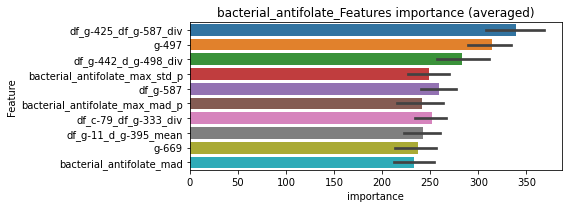

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00759243	valid_1's binary_logloss: 0.0314004
[600]	training's binary_logloss: 0.00110576	valid_1's binary_logloss: 0.0166982
[900]	training's binary_logloss: 0.000540582	valid_1's binary_logloss: 0.0145008
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00052475	valid_1's binary_logloss: 0.0143271


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782686	valid_1's binary_logloss: 0.0277303
[600]	training's binary_logloss: 0.00111424	valid_1's binary_logloss: 0.0123291
[900]	training's binary_logloss: 0.000557654	valid_1's binary_logloss: 0.00970378
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.00055213	valid_1's binary_logloss: 0.00964928


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00785579	valid_1's binary_logloss: 0.021047
[600]	training's binary_logloss: 0.00111038	valid_1's binary_logloss: 0.006694
[900]	training's binary_logloss: 0.000545362	valid_1's binary_logloss: 0.00464052
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000509622	valid_1's binary_logloss: 0.00448639


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00788986	valid_1's binary_logloss: 0.0263641
[600]	training's binary_logloss: 0.00111461	valid_1's binary_logloss: 0.0114177
[900]	training's binary_logloss: 0.000551747	valid_1's binary_logloss: 0.00900203
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000488918	valid_1's binary_logloss: 0.00863969


bacterial_antifolate logloss: 0.009277008864606506


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0567927	valid_1's binary_logloss: 0.226332
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0230641	valid_1's binary_logloss: 0.211911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.057206	valid_1's binary_logloss: 0.219261
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.015125	valid_1's binary_logloss: 0.202361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0568457	valid_1's binary_logloss: 0.22348
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.0153928	valid_1's binary_logloss: 0.207126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0585119	valid_1's binary_logloss: 0.195517
[600]	training's binary_logloss: 0.0130844	valid_1's binary_logloss: 0.170895
Early stopping, best iteration

1 / 3 AUC score:0.932
y_Threshold: 0.0705084, Threshold: 0.3842571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 324 → Positive_corect_labels: 557/3597
p_label_rate: 0.0100452 Vs.target_rate: 0.00806, Num_p_label: 40.0, conf_0:0.26898, conf_1:0.49953
threshold: 0.3842571, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 557.0/3597, y_label_rate: 0.1548513
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276276	valid_1's binary_logloss: 0.142313
[600]	training's binary_logloss: 0.00475992	valid_1's binary_logloss: 0.127205
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00521257	valid_1's binary_logloss: 0.12676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0280125	valid_1's binary_logloss: 0.137936
[600]	training's binary_logloss: 0.00472774	valid_1's binary_logloss: 0.113923
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00375264	valid_1's binary_logloss: 0.111677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276484	valid_1's binary_logloss: 0.138515
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00687639	valid_1's binary_logloss: 0.121217
Training until validation scores don't improve for 30 rounds
[300]	training's binary

2 / 3 AUC score:0.988
y_Threshold: 0.0784977, Threshold: 0.3842571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 512.0/3507
p_label_rate: 0.0339026 Vs.target_rate: 0.00806, Num_p_label: 135.0, conf_0:0.30741, conf_1:0.46111
Num_p_label: 135.0, Expected: 32.1, Adj_threshold_1: 0.3842571
Num_p_label: 122.0, Expected: 32.1, Adj_threshold_2: 0.4342571
Num_p_label: 112.0, Expected: 32.1, Adj_threshold_3: 0.4842571
Num_p_label: 106.0, Expected: 32.1, Adj_threshold_4: 0.5342571
Num_p_label: 96.0, Expected: 32.1, Adj_threshold_5: 0.5842571
Num_p_label: 81.0, Expected: 32.1, Adj_threshold_6: 0.6342571
Num_p_label: 76.0, Expected: 32.1, Adj_threshold_7: 0.6842571
Num_p_label: 68.0, Expected: 32.1, Adj_threshold_8: 0.7342571
Num_p_label: 59.0, Expected: 32.1, Adj_threshold_9: 0.7842571
threshold: 0.7842571, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 512.0/3507, y_label_rate: 0.1459937
================= Pseudo labeling 3 / 3 =================

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203264	valid_1's binary_logloss: 0.123569
[600]	training's binary_logloss: 0.00331247	valid_1's binary_logloss: 0.113433
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00361258	valid_1's binary_logloss: 0.112618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205696	valid_1's binary_logloss: 0.105256
[600]	training's binary_logloss: 0.00338424	valid_1's binary_logloss: 0.0821009
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00335609	valid_1's binary_logloss: 0.0820711
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214064	valid_1's binary_logloss: 0.111306
[600]	training's binary_logloss: 0.00344045	valid_1's binary_logloss: 0.0950289
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00272943	valid_1's binary_logloss: 0.094335
T

3 / 3 AUC score:0.986
y_Threshold: 0.0709613, Threshold: 0.7842571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 474.0/3431
p_label_rate: 0.0218483 Vs.target_rate: 0.00806, Num_p_label: 87.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 87.0, Expected: 32.1, Adj_threshold_1: 0.7842571
threshold: 0.7842571, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 474.0/3431, y_label_rate: 0.1381521


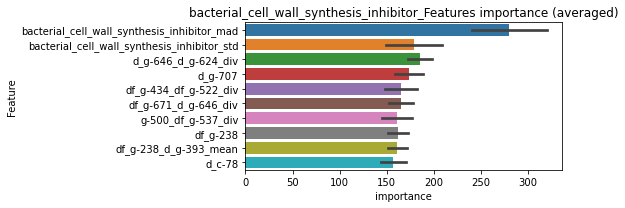

len(train_index) : 2573
len(valid_index) : 858
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152076	valid_1's binary_logloss: 0.0854451
[600]	training's binary_logloss: 0.00249295	valid_1's binary_logloss: 0.0706644
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00186437	valid_1's binary_logloss: 0.0696149


len(train_index) : 2573
len(valid_index) : 858
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154451	valid_1's binary_logloss: 0.0758804
[600]	training's binary_logloss: 0.00244058	valid_1's binary_logloss: 0.058152
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00116366	valid_1's binary_logloss: 0.0560821


len(train_index) : 2573
len(valid_index) : 858
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163898	valid_1's binary_logloss: 0.0792142
[600]	training's binary_logloss: 0.00261559	valid_1's binary_logloss: 0.061557
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00255894	valid_1's binary_logloss: 0.061381


len(train_index) : 2574
len(valid_index) : 857
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148502	valid_1's binary_logloss: 0.100628
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00280336	valid_1's binary_logloss: 0.0874914


bacterial_cell_wall_synthesis_inhibitor logloss: 0.06863686589986626


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0351603	valid_1's binary_logloss: 0.122378
[600]	training's binary_logloss: 0.00584435	valid_1's binary_logloss: 0.0866065
[900]	training's binary_logloss: 0.0018514	valid_1's binary_logloss: 0.0808448
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00192122	valid_1's binary_logloss: 0.0805907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0336977	valid_1's binary_logloss: 0.102005
[600]	training's binary_logloss: 0.00546441	valid_1's binary_logloss: 0.0682211
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.0020624	valid_1's binary_logloss: 0.0622074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0365896	valid_1's binary_logloss: 0.110812
[600]	training's binary_logloss: 0.00589043	valid_1's binary_logloss: 0.0790204
Early stopping, best iteration is:


1 / 3 AUC score:0.991
y_Threshold: 0.0330565, Threshold: 0.1149248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 186 → Positive_corect_labels: 628/3748
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.08045, conf_1:0.14940
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.1149248
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_2: 0.1649248
Num_p_label: 19.0, Expected: 14.9, Adj_threshold_3: 0.2149248
threshold: 0.2149248, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 628.0/3748, y_label_rate: 0.1675560
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022694	valid_1's binary_logloss: 0.084645
[600]	training's binary_logloss: 0.00331899	valid_1's binary_logloss: 0.0531006
[900]	training's binary_logloss: 0.00129999	valid_1's binary_logloss: 0.0475903
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.000933163	valid_1's binary_logloss: 0.046174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232428	valid_1's binary_logloss: 0.0904603
[600]	training's binary_logloss: 0.00341417	valid_1's binary_logloss: 0.0627212
[900]	training's binary_logloss: 0.00129229	valid_1's binary_logloss: 0.0583268
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.0013787	valid_1's binary_logloss: 0.0582074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0244589	valid_1's binary_logloss: 0.0649791
[600]	training's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.1036787, Threshold: 0.2149248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 612.0/3716
p_label_rate: 0.0160723 Vs.target_rate: 0.00374, Num_p_label: 64.0, conf_0:0.17194, conf_1:0.25791
Num_p_label: 64.0, Expected: 14.9, Adj_threshold_1: 0.2149248
Num_p_label: 56.0, Expected: 14.9, Adj_threshold_2: 0.2649248
Num_p_label: 46.0, Expected: 14.9, Adj_threshold_3: 0.3149248
Num_p_label: 36.0, Expected: 14.9, Adj_threshold_4: 0.3649248
Num_p_label: 34.0, Expected: 14.9, Adj_threshold_5: 0.4149248
Num_p_label: 29.0, Expected: 14.9, Adj_threshold_6: 0.4649248
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_7: 0.5149248
threshold: 0.5149248, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 612.0/3716, y_label_rate: 0.1646932
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212918	valid_1's binary_logloss: 0.075074
[600]	training's binary_logloss: 0.00311521	valid_1's binary_logloss: 0.0429052
[900]	training's binary_logloss: 0.00122608	valid_1's binary_logloss: 0.0372787
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00120966	valid_1's binary_logloss: 0.0371487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213078	valid_1's binary_logloss: 0.068052
[600]	training's binary_logloss: 0.00311031	valid_1's binary_logloss: 0.0368107
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00134653	valid_1's binary_logloss: 0.031039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213748	valid_1's binary_logloss: 0.0746871
[600]	training's binary_logloss: 0.00313008	valid_1's binary_logloss: 0.0483966
Early stopping, best iteration is

3 / 3 AUC score:0.999
y_Threshold: 0.0971888, Threshold: 0.5149248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 599.0/3690
p_label_rate: 0.0097941 Vs.target_rate: 0.00374, Num_p_label: 39.0, conf_0:0.46343, conf_1:0.56642
Num_p_label: 39.0, Expected: 14.9, Adj_threshold_1: 0.5149248
Num_p_label: 34.0, Expected: 14.9, Adj_threshold_2: 0.5649248
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_3: 0.6149248
Num_p_label: 20.0, Expected: 14.9, Adj_threshold_4: 0.6649248
threshold: 0.6649248, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 599.0/3690, y_label_rate: 0.1623306


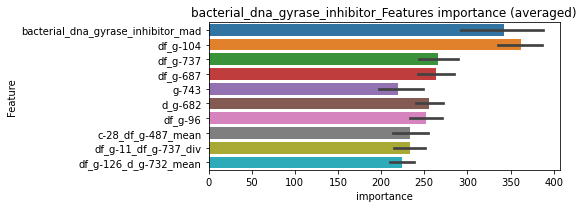

len(train_index) : 2767
len(valid_index) : 923
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197986	valid_1's binary_logloss: 0.0705333
[600]	training's binary_logloss: 0.0028026	valid_1's binary_logloss: 0.0351275
[900]	training's binary_logloss: 0.00112939	valid_1's binary_logloss: 0.0276796
Early stopping, best iteration is:
[1108]	training's binary_logloss: 0.000841164	valid_1's binary_logloss: 0.0259112


len(train_index) : 2767
len(valid_index) : 923
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01983	valid_1's binary_logloss: 0.0607865
[600]	training's binary_logloss: 0.0027952	valid_1's binary_logloss: 0.03436
[900]	training's binary_logloss: 0.00112858	valid_1's binary_logloss: 0.0293691
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00113677	valid_1's binary_logloss: 0.0292841


len(train_index) : 2768
len(valid_index) : 922
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210763	valid_1's binary_logloss: 0.0681947
[600]	training's binary_logloss: 0.0030051	valid_1's binary_logloss: 0.0417078
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.0012837	valid_1's binary_logloss: 0.0387279


len(train_index) : 2768
len(valid_index) : 922
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208266	valid_1's binary_logloss: 0.0711001
[600]	training's binary_logloss: 0.00300651	valid_1's binary_logloss: 0.0400595
[900]	training's binary_logloss: 0.00115623	valid_1's binary_logloss: 0.0344047
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000849721	valid_1's binary_logloss: 0.0335255


bacterial_dna_gyrase_inhibitor logloss: 0.031859892869108584


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0429331	valid_1's binary_logloss: 0.154481
[600]	training's binary_logloss: 0.0082252	valid_1's binary_logloss: 0.123382
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.00326485	valid_1's binary_logloss: 0.117903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0433847	valid_1's binary_logloss: 0.138804
[600]	training's binary_logloss: 0.00842899	valid_1's binary_logloss: 0.108172
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00327812	valid_1's binary_logloss: 0.103723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0435357	valid_1's binary_logloss: 0.134292
[600]	training's binary_logloss: 0.00854599	valid_1's binary_logloss: 0.0973258
[900]	training's binary_logloss: 0.00260347	valid_1's binary_logloss: 0.0892249
Early stopping, best iteration is:
[92

1 / 3 AUC score:0.985
y_Threshold: 0.0372214, Threshold: 0.1809806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 204 → Positive_corect_labels: 618/3724
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.12669, conf_1:0.23527
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.1809806
Num_p_label: 25.0, Expected: 19.2, Adj_threshold_2: 0.2309806
threshold: 0.2309806, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 618.0/3724, y_label_rate: 0.1659506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299736	valid_1's binary_logloss: 0.115947
[600]	training's binary_logloss: 0.00502689	valid_1's binary_logloss: 0.0802277
[900]	training's binary_logloss: 0.00174752	valid_1's binary_logloss: 0.073163
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.00146961	valid_1's binary_logloss: 0.0722627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311554	valid_1's binary_logloss: 0.110729
[600]	training's binary_logloss: 0.00538476	valid_1's binary_logloss: 0.0763764
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00209359	valid_1's binary_logloss: 0.0707985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0294465	valid_1's binary_logloss: 0.111368
[600]	training's binary_logloss: 0.005056	valid_1's binary_logloss: 0.0755065
[900]	training's binary_logloss: 0.0

2 / 3 AUC score:0.994
y_Threshold: 0.0837515, Threshold: 0.2309806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 582.0/3652
p_label_rate: 0.0193370 Vs.target_rate: 0.00483, Num_p_label: 77.0, conf_0:0.18478, conf_1:0.27718
Num_p_label: 77.0, Expected: 19.2, Adj_threshold_1: 0.2309806
Num_p_label: 67.0, Expected: 19.2, Adj_threshold_2: 0.2809806
Num_p_label: 57.0, Expected: 19.2, Adj_threshold_3: 0.3309806
Num_p_label: 45.0, Expected: 19.2, Adj_threshold_4: 0.3809806
Num_p_label: 38.0, Expected: 19.2, Adj_threshold_5: 0.4309806
Num_p_label: 35.0, Expected: 19.2, Adj_threshold_6: 0.4809806
Num_p_label: 31.0, Expected: 19.2, Adj_threshold_7: 0.5309806
Num_p_label: 24.0, Expected: 19.2, Adj_threshold_8: 0.5809806
threshold: 0.5809806, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 582.0/3652, y_label_rate: 0.1593647
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233675	valid_1's binary_logloss: 0.0950591
[600]	training's binary_logloss: 0.00369742	valid_1's binary_logloss: 0.0633928
[900]	training's binary_logloss: 0.00141173	valid_1's binary_logloss: 0.056591
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.00116319	valid_1's binary_logloss: 0.0554988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02415	valid_1's binary_logloss: 0.0946519
[600]	training's binary_logloss: 0.00389693	valid_1's binary_logloss: 0.0671821
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00210054	valid_1's binary_logloss: 0.0653277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024891	valid_1's binary_logloss: 0.10555
[600]	training's binary_logloss: 0.00403746	valid_1's binary_logloss: 0.0845314
Early stopping, best iteration is:


3 / 3 AUC score:0.995
y_Threshold: 0.0847724, Threshold: 0.5809806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 561.0/3610
p_label_rate: 0.0092918 Vs.target_rate: 0.00483, Num_p_label: 37.0, conf_0:0.50000, conf_1:0.63908
Num_p_label: 37.0, Expected: 19.2, Adj_threshold_1: 0.5809806
Num_p_label: 31.0, Expected: 19.2, Adj_threshold_2: 0.6309806
Num_p_label: 25.0, Expected: 19.2, Adj_threshold_3: 0.6809806
threshold: 0.6809806, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 561.0/3610, y_label_rate: 0.1554017


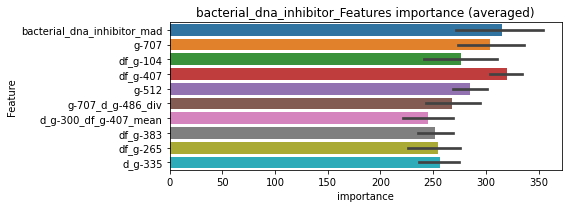

len(train_index) : 2707
len(valid_index) : 903
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213441	valid_1's binary_logloss: 0.104041
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00522384	valid_1's binary_logloss: 0.0903726


len(train_index) : 2707
len(valid_index) : 903
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213099	valid_1's binary_logloss: 0.0722273
[600]	training's binary_logloss: 0.00332242	valid_1's binary_logloss: 0.0407351
[900]	training's binary_logloss: 0.00130181	valid_1's binary_logloss: 0.0342767
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000999372	valid_1's binary_logloss: 0.0327358


len(train_index) : 2708
len(valid_index) : 902
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217129	valid_1's binary_logloss: 0.0922117
[600]	training's binary_logloss: 0.00328067	valid_1's binary_logloss: 0.0641153
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.00182162	valid_1's binary_logloss: 0.0616739


len(train_index) : 2708
len(valid_index) : 902
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211467	valid_1's binary_logloss: 0.0917556
[600]	training's binary_logloss: 0.003308	valid_1's binary_logloss: 0.0616525
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00140208	valid_1's binary_logloss: 0.0561733


bacterial_dna_inhibitor logloss: 0.06023961535079964


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536387	valid_1's binary_logloss: 0.0170814
[600]	training's binary_logloss: 0.000753089	valid_1's binary_logloss: 0.00634138
[900]	training's binary_logloss: 0.000417471	valid_1's binary_logloss: 0.00502628
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000417471	valid_1's binary_logloss: 0.00502628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546659	valid_1's binary_logloss: 0.0169565
[600]	training's binary_logloss: 0.000757098	valid_1's binary_logloss: 0.00709668
[900]	training's binary_logloss: 0.00041792	valid_1's binary_logloss: 0.00572114
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000419682	valid_1's binary_logloss: 0.00571704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053892	valid_1's binary_logloss: 0.0125571
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0038060, Threshold: 0.0157365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01102, conf_1:0.02046
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0157365
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_2: 0.0657365
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_3: 0.1157365
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_4: 0.1657365
threshold: 0.1657365, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443879	valid_1's binary_logloss: 0.0128578
[600]	training's binary_logloss: 0.000635014	valid_1's binary_logloss: 0.00454461
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389017	valid_1's binary_logloss: 0.00368815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455708	valid_1's binary_logloss: 0.0107298
[600]	training's binary_logloss: 0.000640705	valid_1's binary_logloss: 0.00376411
[900]	training's binary_logloss: 0.000371641	valid_1's binary_logloss: 0.00317119
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000371641	valid_1's binary_logloss: 0.00317119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464978	valid_1's binary_logloss: 0.00914816
[600]	training's binary_logloss: 0.000654773	valid_1's binary_logloss: 0.0021329
[900]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.1094446, Threshold: 0.1657365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00080, Num_p_label: 22.0, conf_0:0.13259, conf_1:0.19888
Num_p_label: 22.0, Expected: 3.2, Adj_threshold_1: 0.1657365
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_2: 0.2157365
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_3: 0.2657365
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_4: 0.3157365
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.3657365
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_6: 0.4157365
threshold: 0.4157365, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443879	valid_1's binary_logloss: 0.0128578
[600]	training's binary_logloss: 0.000635014	valid_1's binary_logloss: 0.00454461
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389017	valid_1's binary_logloss: 0.00368815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455708	valid_1's binary_logloss: 0.0107298
[600]	training's binary_logloss: 0.000640705	valid_1's binary_logloss: 0.00376411
[900]	training's binary_logloss: 0.000371641	valid_1's binary_logloss: 0.00317119
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000371641	valid_1's binary_logloss: 0.00317119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464978	valid_1's binary_logloss: 0.00914816
[600]	training's binary_logloss: 0.000654773	valid_1's binary_logloss: 0.0021329
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.1094446, Threshold: 0.4157365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.37416, conf_1:0.45731
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.4157365
threshold: 0.4157365, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


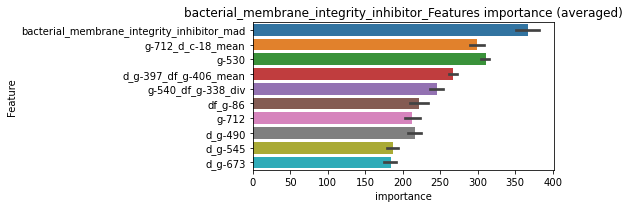

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467445	valid_1's binary_logloss: 0.0156357
[600]	training's binary_logloss: 0.000631712	valid_1's binary_logloss: 0.00538747
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.00037551	valid_1's binary_logloss: 0.00407157


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459703	valid_1's binary_logloss: 0.0118683
[600]	training's binary_logloss: 0.000636447	valid_1's binary_logloss: 0.00439835
[900]	training's binary_logloss: 0.000374971	valid_1's binary_logloss: 0.00368416
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000374971	valid_1's binary_logloss: 0.00368416


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457901	valid_1's binary_logloss: 0.00881787
[600]	training's binary_logloss: 0.000647516	valid_1's binary_logloss: 0.00210774
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000384706	valid_1's binary_logloss: 0.00145205


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462598	valid_1's binary_logloss: 0.00913576
[600]	training's binary_logloss: 0.000652207	valid_1's binary_logloss: 0.00293983
[900]	training's binary_logloss: 0.000373708	valid_1's binary_logloss: 0.00229195
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000373432	valid_1's binary_logloss: 0.00229105


bacterial_membrane_integrity_inhibitor logloss: 0.0028765934548345027


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106356	valid_1's binary_logloss: 0.0363122
[600]	training's binary_logloss: 0.00145453	valid_1's binary_logloss: 0.016018
[900]	training's binary_logloss: 0.000663876	valid_1's binary_logloss: 0.0130917
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000668024	valid_1's binary_logloss: 0.0130227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107208	valid_1's binary_logloss: 0.0341685
[600]	training's binary_logloss: 0.00139863	valid_1's binary_logloss: 0.0166178
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000733087	valid_1's binary_logloss: 0.0147862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105788	valid_1's binary_logloss: 0.0256958
[600]	training's binary_logloss: 0.00141489	valid_1's binary_logloss: 0.00916455
Early stopping, best iterat

1 / 3 AUC score:1.000
y_Threshold: 0.0098120, Threshold: 0.0496986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.03479, conf_1:0.06461
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0496986
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_2: 0.0996986
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.1496986
threshold: 0.1496986, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00932335	valid_1's binary_logloss: 0.0329389
[600]	training's binary_logloss: 0.00124917	valid_1's binary_logloss: 0.0153316
[900]	training's binary_logloss: 0.000599912	valid_1's binary_logloss: 0.0128785
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000578183	valid_1's binary_logloss: 0.0128418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00986146	valid_1's binary_logloss: 0.0273352
[600]	training's binary_logloss: 0.00129031	valid_1's binary_logloss: 0.0113439
[900]	training's binary_logloss: 0.000603126	valid_1's binary_logloss: 0.00965827
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000557185	valid_1's binary_logloss: 0.00949401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908795	valid_1's binary_logloss: 0.021748
[600]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0914091, Threshold: 0.1496986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.11976, conf_1:0.17964
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.1496986
Num_p_label: 33.0, Expected: 5.2, Adj_threshold_2: 0.1996986
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_3: 0.2496986
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_4: 0.2996986
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_5: 0.3496986
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.3996986
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_7: 0.4496986
threshold: 0.4496986, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902005	valid_1's binary_logloss: 0.0257997
[600]	training's binary_logloss: 0.00123762	valid_1's binary_logloss: 0.00952339
[900]	training's binary_logloss: 0.000580863	valid_1's binary_logloss: 0.00723238
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000551981	valid_1's binary_logloss: 0.00713794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00925666	valid_1's binary_logloss: 0.0269765
[600]	training's binary_logloss: 0.00124172	valid_1's binary_logloss: 0.0118827
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000653377	valid_1's binary_logloss: 0.0101516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00929948	valid_1's binary_logloss: 0.0257417
[600]	training's binary_logloss: 0.00125055	valid_1's binary_logloss: 0.0093352
[900]	training's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0705362, Threshold: 0.4496986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00130, Num_p_label: 14.0, conf_0:0.40473, conf_1:0.49467
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_1: 0.4496986
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.4996986
threshold: 0.4996986, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


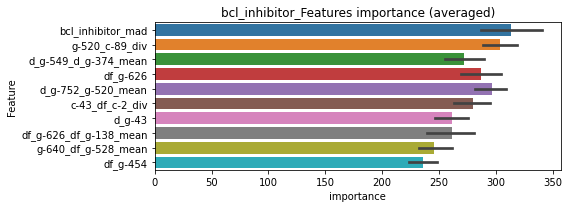

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00925689	valid_1's binary_logloss: 0.025746
[600]	training's binary_logloss: 0.00124479	valid_1's binary_logloss: 0.00908022
[900]	training's binary_logloss: 0.000592682	valid_1's binary_logloss: 0.0069824
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000547551	valid_1's binary_logloss: 0.0068497


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970494	valid_1's binary_logloss: 0.0228199
[600]	training's binary_logloss: 0.00128571	valid_1's binary_logloss: 0.00652884
[900]	training's binary_logloss: 0.000602902	valid_1's binary_logloss: 0.00451794
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000559495	valid_1's binary_logloss: 0.00439183


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918168	valid_1's binary_logloss: 0.0264247
[600]	training's binary_logloss: 0.00122566	valid_1's binary_logloss: 0.0101361
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000640666	valid_1's binary_logloss: 0.00835346


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949903	valid_1's binary_logloss: 0.0239754
[600]	training's binary_logloss: 0.00125166	valid_1's binary_logloss: 0.00716208
[900]	training's binary_logloss: 0.000588621	valid_1's binary_logloss: 0.00499652
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000566075	valid_1's binary_logloss: 0.00490519


bcl_inhibitor logloss: 0.0061282402419314715


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121278	valid_1's binary_logloss: 0.037499
[600]	training's binary_logloss: 0.00168632	valid_1's binary_logloss: 0.0184166
[900]	training's binary_logloss: 0.000752701	valid_1's binary_logloss: 0.0156478
Early stopping, best iteration is:
[1022]	training's binary_logloss: 0.000670449	valid_1's binary_logloss: 0.0153114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118334	valid_1's binary_logloss: 0.0391786
[600]	training's binary_logloss: 0.00162147	valid_1's binary_logloss: 0.0202605
[900]	training's binary_logloss: 0.000746796	valid_1's binary_logloss: 0.0173129
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000731791	valid_1's binary_logloss: 0.0172606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117451	valid_1's binary_logloss: 0.04083
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0092036, Threshold: 0.1207463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160, Num_p_label: 40.0, conf_0:0.08452, conf_1:0.15697
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.1207463
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_2: 0.1707463
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_3: 0.2207463
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_4: 0.2707463
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.3207463
threshold: 0.3207463, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101526	valid_1's binary_logloss: 0.0291186
[600]	training's binary_logloss: 0.00144274	valid_1's binary_logloss: 0.0130161
[900]	training's binary_logloss: 0.000672009	valid_1's binary_logloss: 0.0112068
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000607975	valid_1's binary_logloss: 0.0109402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102185	valid_1's binary_logloss: 0.0347061
[600]	training's binary_logloss: 0.00142703	valid_1's binary_logloss: 0.0168142
[900]	training's binary_logloss: 0.000660735	valid_1's binary_logloss: 0.013658
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000650128	valid_1's binary_logloss: 0.0136302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100622	valid_1's binary_logloss: 0.034339
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0817837, Threshold: 0.3207463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0135610 Vs.target_rate: 0.00160, Num_p_label: 54.0, conf_0:0.25660, conf_1:0.38490
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.3207463
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.3707463
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_3: 0.4207463
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_4: 0.4707463
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_5: 0.5207463
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_6: 0.5707463
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_7: 0.6207463
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_8: 0.6707463
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_9: 0.7207463
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_10: 0.7707463
threshold: 0.7707463, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102884	valid_1's binary_logloss: 0.0371801
[600]	training's binary_logloss: 0.00143653	valid_1's binary_logloss: 0.0232687
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000776562	valid_1's binary_logloss: 0.0217836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100074	valid_1's binary_logloss: 0.0369351
[600]	training's binary_logloss: 0.0013976	valid_1's binary_logloss: 0.0184769
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000689081	valid_1's binary_logloss: 0.0158309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101413	valid_1's binary_logloss: 0.0269789
[600]	training's binary_logloss: 0.00141599	valid_1's binary_logloss: 0.00903038
[900]	training's binary_logloss: 0.000657954	valid_1's binary_logloss: 0.00636227
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0817755, Threshold: 0.7707463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0032647 Vs.target_rate: 0.00160, Num_p_label: 13.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_1: 0.7707463
threshold: 0.7707463, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


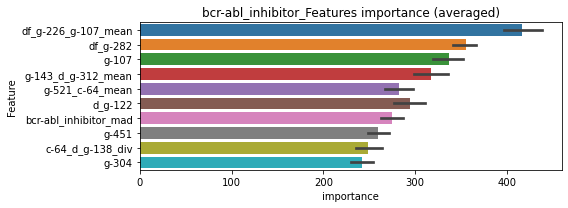

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00984047	valid_1's binary_logloss: 0.0331024
[600]	training's binary_logloss: 0.00135242	valid_1's binary_logloss: 0.0118904
[900]	training's binary_logloss: 0.000651364	valid_1's binary_logloss: 0.00918956
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000612294	valid_1's binary_logloss: 0.00901195


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100445	valid_1's binary_logloss: 0.023179
[600]	training's binary_logloss: 0.00139747	valid_1's binary_logloss: 0.0068315
[900]	training's binary_logloss: 0.000654563	valid_1's binary_logloss: 0.00453186
Early stopping, best iteration is:
[1129]	training's binary_logloss: 0.000586215	valid_1's binary_logloss: 0.00427118


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00926273	valid_1's binary_logloss: 0.0348434
[600]	training's binary_logloss: 0.00132105	valid_1's binary_logloss: 0.0189143
[900]	training's binary_logloss: 0.000630938	valid_1's binary_logloss: 0.0168268
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000614455	valid_1's binary_logloss: 0.016701


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996196	valid_1's binary_logloss: 0.0309142
[600]	training's binary_logloss: 0.0013671	valid_1's binary_logloss: 0.0135089
[900]	training's binary_logloss: 0.000644515	valid_1's binary_logloss: 0.0109291
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000628373	valid_1's binary_logloss: 0.0109005


bcr-abl_inhibitor logloss: 0.010224384416856828


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214985	valid_1's binary_logloss: 0.0934168
[600]	training's binary_logloss: 0.00296717	valid_1's binary_logloss: 0.0669745
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00257699	valid_1's binary_logloss: 0.0661159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218381	valid_1's binary_logloss: 0.0828149
[600]	training's binary_logloss: 0.00314323	valid_1's binary_logloss: 0.0466687
[900]	training's binary_logloss: 0.00120664	valid_1's binary_logloss: 0.0415856
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000897683	valid_1's binary_logloss: 0.0404142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023724	valid_1's binary_logloss: 0.0658318
[600]	training's binary_logloss: 0.00334332	valid_1's binary_logloss: 0.0329074
[900]	training's binary_loglo

1 / 3 AUC score:0.997
y_Threshold: 0.0318995, Threshold: 0.1641593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 647/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.11491, conf_1:0.21341
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1641593
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_2: 0.2141593
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_3: 0.2641593
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_4: 0.3141593
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_5: 0.3641593
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_6: 0.4141593
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_7: 0.4641593
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_8: 0.5141593
threshold: 0.5141593, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177768	valid_1's binary_logloss: 0.0584129
[600]	training's binary_logloss: 0.00248883	valid_1's binary_logloss: 0.0300838
[900]	training's binary_logloss: 0.000999443	valid_1's binary_logloss: 0.0256343
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000844809	valid_1's binary_logloss: 0.0250377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175238	valid_1's binary_logloss: 0.0717538
[600]	training's binary_logloss: 0.0024265	valid_1's binary_logloss: 0.0467225
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.0010642	valid_1's binary_logloss: 0.0427678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179672	valid_1's binary_logloss: 0.0654489
[600]	training's binary_logloss: 0.00247364	valid_1's binary_logloss: 0.034438
[900]	training's binary_loglos

2 / 3 AUC score:0.998
y_Threshold: 0.1247014, Threshold: 0.5141593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 628.0/3748
p_label_rate: 0.0125565 Vs.target_rate: 0.00281, Num_p_label: 50.0, conf_0:0.41133, conf_1:0.61699
Num_p_label: 50.0, Expected: 11.2, Adj_threshold_1: 0.5141593
Num_p_label: 46.0, Expected: 11.2, Adj_threshold_2: 0.5641593
Num_p_label: 42.0, Expected: 11.2, Adj_threshold_3: 0.6141593
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_4: 0.6641593
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_5: 0.7141593
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_6: 0.7641593
threshold: 0.7641593, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 628.0/3748, y_label_rate: 0.1675560
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159691	valid_1's binary_logloss: 0.0714011
[600]	training's binary_logloss: 0.00209127	valid_1's binary_logloss: 0.0498157
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00128903	valid_1's binary_logloss: 0.0483326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01614	valid_1's binary_logloss: 0.0571018
[600]	training's binary_logloss: 0.00221507	valid_1's binary_logloss: 0.0277837
[900]	training's binary_logloss: 0.00090277	valid_1's binary_logloss: 0.0223707
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000705097	valid_1's binary_logloss: 0.0210099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157274	valid_1's binary_logloss: 0.0565356
[600]	training's binary_logloss: 0.00213698	valid_1's binary_logloss: 0.0328429
[900]	training's binary_loglos

3 / 3 AUC score:0.998
y_Threshold: 0.1133434, Threshold: 0.7641593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 613.0/3718
p_label_rate: 0.0087896 Vs.target_rate: 0.00281, Num_p_label: 35.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.7641593
threshold: 0.7641593, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 613.0/3718, y_label_rate: 0.1648736


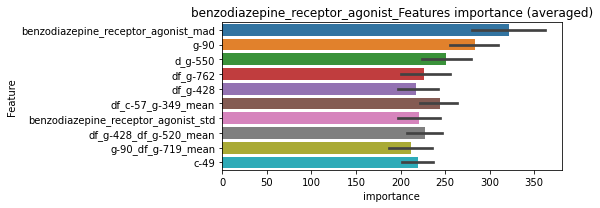

len(train_index) : 2788
len(valid_index) : 930
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145576	valid_1's binary_logloss: 0.0555476
[600]	training's binary_logloss: 0.00193712	valid_1's binary_logloss: 0.0267759
[900]	training's binary_logloss: 0.000818019	valid_1's binary_logloss: 0.0217104
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000663506	valid_1's binary_logloss: 0.0209882


len(train_index) : 2788
len(valid_index) : 930
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135661	valid_1's binary_logloss: 0.0630107
[600]	training's binary_logloss: 0.00182943	valid_1's binary_logloss: 0.0392944
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00106586	valid_1's binary_logloss: 0.0371997


len(train_index) : 2789
len(valid_index) : 929
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150004	valid_1's binary_logloss: 0.0482739
[600]	training's binary_logloss: 0.001987	valid_1's binary_logloss: 0.0217762
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000914157	valid_1's binary_logloss: 0.0179349


len(train_index) : 2789
len(valid_index) : 929
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143483	valid_1's binary_logloss: 0.0631881
[600]	training's binary_logloss: 0.00191721	valid_1's binary_logloss: 0.0449145
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.0013989	valid_1's binary_logloss: 0.043682


benzodiazepine_receptor_agonist logloss: 0.02995073735137494


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00845739	valid_1's binary_logloss: 0.0181289
[600]	training's binary_logloss: 0.00110537	valid_1's binary_logloss: 0.00424995
[900]	training's binary_logloss: 0.000545675	valid_1's binary_logloss: 0.00270539
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000540552	valid_1's binary_logloss: 0.00269418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834329	valid_1's binary_logloss: 0.0263731
[600]	training's binary_logloss: 0.00109208	valid_1's binary_logloss: 0.0118853
[900]	training's binary_logloss: 0.000543848	valid_1's binary_logloss: 0.0098914
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000520739	valid_1's binary_logloss: 0.00982392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819665	valid_1's binary_logloss: 0.0224135
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0065817, Threshold: 0.0623555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.04365, conf_1:0.08106
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0623555
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_2: 0.1123555
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.1623555
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.2123555
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_5: 0.2623555
threshold: 0.2623555, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750535	valid_1's binary_logloss: 0.0147014
[600]	training's binary_logloss: 0.0010112	valid_1's binary_logloss: 0.00321295
[900]	training's binary_logloss: 0.00051544	valid_1's binary_logloss: 0.00201311
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000491633	valid_1's binary_logloss: 0.00196347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749937	valid_1's binary_logloss: 0.0247408
[600]	training's binary_logloss: 0.000992371	valid_1's binary_logloss: 0.0112208
[900]	training's binary_logloss: 0.000500865	valid_1's binary_logloss: 0.00987965
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000513017	valid_1's binary_logloss: 0.00987628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071907	valid_1's binary_logloss: 0.0180933
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0690110, Threshold: 0.2623555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0102963 Vs.target_rate: 0.00101, Num_p_label: 41.0, conf_0:0.20988, conf_1:0.31483
Num_p_label: 41.0, Expected: 4.0, Adj_threshold_1: 0.2623555
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_2: 0.3123555
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_3: 0.3623555
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.4123555
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_5: 0.4623555
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_6: 0.5123555
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_7: 0.5623555
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_8: 0.6123555
threshold: 0.6123555, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750535	valid_1's binary_logloss: 0.0147014
[600]	training's binary_logloss: 0.0010112	valid_1's binary_logloss: 0.00321295
[900]	training's binary_logloss: 0.00051544	valid_1's binary_logloss: 0.00201311
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000491633	valid_1's binary_logloss: 0.00196347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749937	valid_1's binary_logloss: 0.0247408
[600]	training's binary_logloss: 0.000992371	valid_1's binary_logloss: 0.0112208
[900]	training's binary_logloss: 0.000500865	valid_1's binary_logloss: 0.00987965
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000513017	valid_1's binary_logloss: 0.00987628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071907	valid_1's binary_logloss: 0.0180933
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0690110, Threshold: 0.6123555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.50000, conf_1:0.67359
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.6123555
threshold: 0.6123555, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


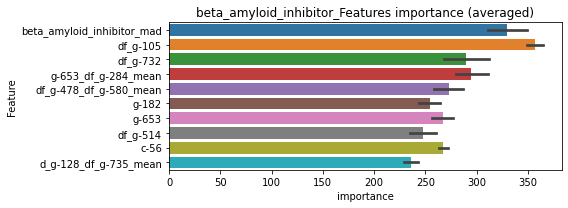

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775766	valid_1's binary_logloss: 0.0156284
[600]	training's binary_logloss: 0.00101391	valid_1's binary_logloss: 0.00330662
[900]	training's binary_logloss: 0.000508675	valid_1's binary_logloss: 0.00201936
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000493367	valid_1's binary_logloss: 0.0019867


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00756334	valid_1's binary_logloss: 0.0240281
[600]	training's binary_logloss: 0.000988046	valid_1's binary_logloss: 0.0106129
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.00051504	valid_1's binary_logloss: 0.009563


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00726386	valid_1's binary_logloss: 0.0174967
[600]	training's binary_logloss: 0.000970869	valid_1's binary_logloss: 0.00470817
[900]	training's binary_logloss: 0.00049853	valid_1's binary_logloss: 0.00317797
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000488258	valid_1's binary_logloss: 0.00314823


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768683	valid_1's binary_logloss: 0.0214387
[600]	training's binary_logloss: 0.000995643	valid_1's binary_logloss: 0.00602138
[900]	training's binary_logloss: 0.000502733	valid_1's binary_logloss: 0.00433676
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000490871	valid_1's binary_logloss: 0.00430954


beta_amyloid_inhibitor logloss: 0.004756448674099447


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231048	valid_1's binary_logloss: 0.0958694
[600]	training's binary_logloss: 0.0033543	valid_1's binary_logloss: 0.0696283
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00198437	valid_1's binary_logloss: 0.0667135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246721	valid_1's binary_logloss: 0.0850565
[600]	training's binary_logloss: 0.00364644	valid_1's binary_logloss: 0.0608572
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00190464	valid_1's binary_logloss: 0.0581951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245272	valid_1's binary_logloss: 0.0852364
[600]	training's binary_logloss: 0.0036157	valid_1's binary_logloss: 0.0569466
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00205412	valid_1's binary_logloss: 0.05450

1 / 3 AUC score:0.993
y_Threshold: 0.0343451, Threshold: 0.2310785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 637/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00286, Num_p_label: 40.0, conf_0:0.16175, conf_1:0.30040
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.2310785
Num_p_label: 27.0, Expected: 11.4, Adj_threshold_2: 0.2810785
Num_p_label: 25.0, Expected: 11.4, Adj_threshold_3: 0.3310785
Num_p_label: 20.0, Expected: 11.4, Adj_threshold_4: 0.3810785
Num_p_label: 16.0, Expected: 11.4, Adj_threshold_5: 0.4310785
threshold: 0.4310785, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 637.0/3767, y_label_rate: 0.1691001
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017693	valid_1's binary_logloss: 0.0604566
[600]	training's binary_logloss: 0.00249176	valid_1's binary_logloss: 0.0364664
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00112929	valid_1's binary_logloss: 0.0321924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016792	valid_1's binary_logloss: 0.0624238
[600]	training's binary_logloss: 0.00236434	valid_1's binary_logloss: 0.0407909
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00145242	valid_1's binary_logloss: 0.0386096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171733	valid_1's binary_logloss: 0.0694195
[600]	training's binary_logloss: 0.00238247	valid_1's binary_logloss: 0.0499531
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00144574	valid_1's binary_logloss: 0.04849

2 / 3 AUC score:0.997
y_Threshold: 0.1105276, Threshold: 0.4310785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 616.0/3725
p_label_rate: 0.0163235 Vs.target_rate: 0.00286, Num_p_label: 65.0, conf_0:0.34486, conf_1:0.51729
Num_p_label: 65.0, Expected: 11.4, Adj_threshold_1: 0.4310785
Num_p_label: 59.0, Expected: 11.4, Adj_threshold_2: 0.4810785
Num_p_label: 52.0, Expected: 11.4, Adj_threshold_3: 0.5310785
Num_p_label: 46.0, Expected: 11.4, Adj_threshold_4: 0.5810785
Num_p_label: 45.0, Expected: 11.4, Adj_threshold_5: 0.6310785
Num_p_label: 37.0, Expected: 11.4, Adj_threshold_6: 0.6810785
Num_p_label: 32.0, Expected: 11.4, Adj_threshold_7: 0.7310785
Num_p_label: 25.0, Expected: 11.4, Adj_threshold_8: 0.7810785
threshold: 0.7810785, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 616.0/3725, y_label_rate: 0.1653691
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156205	valid_1's binary_logloss: 0.0412628
[600]	training's binary_logloss: 0.00215561	valid_1's binary_logloss: 0.0159474
[900]	training's binary_logloss: 0.000894922	valid_1's binary_logloss: 0.0118003
Early stopping, best iteration is:
[1168]	training's binary_logloss: 0.000670917	valid_1's binary_logloss: 0.0109401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139855	valid_1's binary_logloss: 0.0548252
[600]	training's binary_logloss: 0.0019813	valid_1's binary_logloss: 0.0376168
[900]	training's binary_logloss: 0.000858364	valid_1's binary_logloss: 0.0355924
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000840989	valid_1's binary_logloss: 0.0355262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145067	valid_1's binary_logloss: 0.063946
[600]	training's binary_log

3 / 3 AUC score:0.996
y_Threshold: 0.1411766, Threshold: 0.7810785, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 605.0/3703
p_label_rate: 0.0102963 Vs.target_rate: 0.00286, Num_p_label: 41.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 41.0, Expected: 11.4, Adj_threshold_1: 0.7810785
threshold: 0.7810785, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 605.0/3703, y_label_rate: 0.1633810


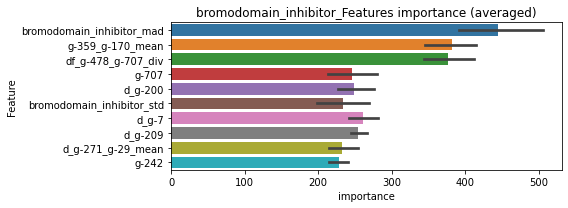

len(train_index) : 2777
len(valid_index) : 926
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134463	valid_1's binary_logloss: 0.0497264
[600]	training's binary_logloss: 0.00185868	valid_1's binary_logloss: 0.0270948
[900]	training's binary_logloss: 0.000807714	valid_1's binary_logloss: 0.0233545
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000672616	valid_1's binary_logloss: 0.0223389


len(train_index) : 2777
len(valid_index) : 926
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134493	valid_1's binary_logloss: 0.0400103
[600]	training's binary_logloss: 0.0018678	valid_1's binary_logloss: 0.0183001
[900]	training's binary_logloss: 0.000814386	valid_1's binary_logloss: 0.0148381
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000658556	valid_1's binary_logloss: 0.0140504


len(train_index) : 2777
len(valid_index) : 926
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130331	valid_1's binary_logloss: 0.047659
[600]	training's binary_logloss: 0.00183341	valid_1's binary_logloss: 0.0257217
[900]	training's binary_logloss: 0.000797678	valid_1's binary_logloss: 0.0225742
Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.00064068	valid_1's binary_logloss: 0.02186


len(train_index) : 2778
len(valid_index) : 925
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134102	valid_1's binary_logloss: 0.0437846
[600]	training's binary_logloss: 0.00186825	valid_1's binary_logloss: 0.0208178
[900]	training's binary_logloss: 0.000806464	valid_1's binary_logloss: 0.0169077
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000666776	valid_1's binary_logloss: 0.016093


bromodomain_inhibitor logloss: 0.018602847866670342


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113979	valid_1's binary_logloss: 0.0268893
[600]	training's binary_logloss: 0.00142232	valid_1's binary_logloss: 0.00721154
[900]	training's binary_logloss: 0.000632071	valid_1's binary_logloss: 0.00483247
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000549271	valid_1's binary_logloss: 0.00457783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110026	valid_1's binary_logloss: 0.0328804
[600]	training's binary_logloss: 0.00136104	valid_1's binary_logloss: 0.0145709
[900]	training's binary_logloss: 0.000614054	valid_1's binary_logloss: 0.0124775
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000594959	valid_1's binary_logloss: 0.0124279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111006	valid_1's binary_logloss: 0.024551
[600]	training's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0074536, Threshold: 0.0437536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.03063, conf_1:0.05688
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0437536
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_2: 0.0937536
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_3: 0.1437536
threshold: 0.1437536, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100701	valid_1's binary_logloss: 0.0221445
[600]	training's binary_logloss: 0.00123667	valid_1's binary_logloss: 0.00517226
[900]	training's binary_logloss: 0.00056325	valid_1's binary_logloss: 0.00308246
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000523226	valid_1's binary_logloss: 0.0029702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946715	valid_1's binary_logloss: 0.0302354
[600]	training's binary_logloss: 0.00118388	valid_1's binary_logloss: 0.0139668
[900]	training's binary_logloss: 0.00055526	valid_1's binary_logloss: 0.0120322
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000537036	valid_1's binary_logloss: 0.0119534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999716	valid_1's binary_logloss: 0.0208626
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.1023415, Threshold: 0.1437536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0095429 Vs.target_rate: 0.00122, Num_p_label: 38.0, conf_0:0.11500, conf_1:0.17250
Num_p_label: 38.0, Expected: 4.8, Adj_threshold_1: 0.1437536
Num_p_label: 30.0, Expected: 4.8, Adj_threshold_2: 0.1937536
Num_p_label: 26.0, Expected: 4.8, Adj_threshold_3: 0.2437536
Num_p_label: 21.0, Expected: 4.8, Adj_threshold_4: 0.2937536
Num_p_label: 18.0, Expected: 4.8, Adj_threshold_5: 0.3437536
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_6: 0.3937536
Num_p_label: 10.0, Expected: 4.8, Adj_threshold_7: 0.4437536
threshold: 0.4437536, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970685	valid_1's binary_logloss: 0.0200055
[600]	training's binary_logloss: 0.00121928	valid_1's binary_logloss: 0.00503171
[900]	training's binary_logloss: 0.000566397	valid_1's binary_logloss: 0.00320524
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000527826	valid_1's binary_logloss: 0.00306454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960322	valid_1's binary_logloss: 0.0237623
[600]	training's binary_logloss: 0.00121914	valid_1's binary_logloss: 0.00600828
[900]	training's binary_logloss: 0.000562596	valid_1's binary_logloss: 0.0035964
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.00051061	valid_1's binary_logloss: 0.00339437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00985901	valid_1's binary_logloss: 0.0239886
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0747366, Threshold: 0.4437536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0032647 Vs.target_rate: 0.00122, Num_p_label: 13.0, conf_0:0.39938, conf_1:0.48813
Num_p_label: 13.0, Expected: 4.8, Adj_threshold_1: 0.4437536
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.4937536
threshold: 0.4937536, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


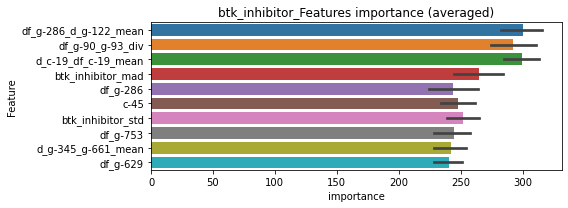

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00916729	valid_1's binary_logloss: 0.0298971
[600]	training's binary_logloss: 0.0011645	valid_1's binary_logloss: 0.0121886
[900]	training's binary_logloss: 0.000546436	valid_1's binary_logloss: 0.00983226
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000497609	valid_1's binary_logloss: 0.00952012


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970777	valid_1's binary_logloss: 0.0233529
[600]	training's binary_logloss: 0.00119862	valid_1's binary_logloss: 0.00793443
[900]	training's binary_logloss: 0.000547489	valid_1's binary_logloss: 0.00596913
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000517101	valid_1's binary_logloss: 0.00584298


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00981425	valid_1's binary_logloss: 0.0193235
[600]	training's binary_logloss: 0.00120224	valid_1's binary_logloss: 0.00470487
[900]	training's binary_logloss: 0.000553912	valid_1's binary_logloss: 0.00301571
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.000500226	valid_1's binary_logloss: 0.00288621


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911438	valid_1's binary_logloss: 0.0271538
[600]	training's binary_logloss: 0.00115615	valid_1's binary_logloss: 0.00769489
[900]	training's binary_logloss: 0.000538942	valid_1's binary_logloss: 0.00533082
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000516321	valid_1's binary_logloss: 0.00523324


btk_inhibitor logloss: 0.005882483383595869


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328221	valid_1's binary_logloss: 0.00821713
[600]	training's binary_logloss: 0.00046897	valid_1's binary_logloss: 0.00367696
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000372542	valid_1's binary_logloss: 0.0033991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343546	valid_1's binary_logloss: 0.00486632
[600]	training's binary_logloss: 0.000484733	valid_1's binary_logloss: 0.000956325
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000312047	valid_1's binary_logloss: 0.000683105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332063	valid_1's binary_logloss: 0.00687324
[600]	training's binary_logloss: 0.000481921	valid_1's binary_logloss: 0.00273461
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000323798	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0019041, Threshold: 0.0110934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00777, conf_1:0.01442
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0110934
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0610934
threshold: 0.0610934, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285826	valid_1's binary_logloss: 0.0088928
[600]	training's binary_logloss: 0.00040462	valid_1's binary_logloss: 0.00340285
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000287195	valid_1's binary_logloss: 0.00305466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301053	valid_1's binary_logloss: 0.00423428
[600]	training's binary_logloss: 0.000418807	valid_1's binary_logloss: 0.000759165
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000287913	valid_1's binary_logloss: 0.000560075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002873	valid_1's binary_logloss: 0.00493424
[600]	training's binary_logloss: 0.000413368	valid_1's binary_logloss: 0.00152023
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00029319	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0594621, Threshold: 0.0610934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00050, Num_p_label: 23.0, conf_0:0.04887, conf_1:0.07331
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0610934
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.1110934
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1610934
threshold: 0.1610934, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285826	valid_1's binary_logloss: 0.0088928
[600]	training's binary_logloss: 0.00040462	valid_1's binary_logloss: 0.00340285
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000287195	valid_1's binary_logloss: 0.00305466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301053	valid_1's binary_logloss: 0.00423428
[600]	training's binary_logloss: 0.000418807	valid_1's binary_logloss: 0.000759165
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000287913	valid_1's binary_logloss: 0.000560075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002873	valid_1's binary_logloss: 0.00493424
[600]	training's binary_logloss: 0.000413368	valid_1's binary_logloss: 0.00152023
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00029319	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0594621, Threshold: 0.1610934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.14498, conf_1:0.17720
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.1610934
threshold: 0.1610934, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


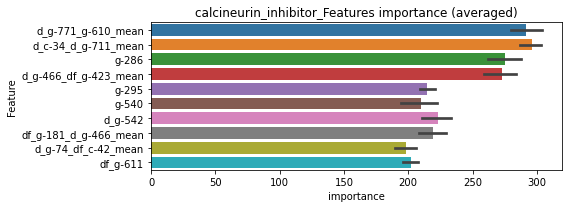

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286745	valid_1's binary_logloss: 0.00862206
[600]	training's binary_logloss: 0.000406119	valid_1's binary_logloss: 0.00388651
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000346033	valid_1's binary_logloss: 0.00370541


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300744	valid_1's binary_logloss: 0.00433608
[600]	training's binary_logloss: 0.000418863	valid_1's binary_logloss: 0.000767779
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000293909	valid_1's binary_logloss: 0.000572087


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292994	valid_1's binary_logloss: 0.00508929
[600]	training's binary_logloss: 0.000415661	valid_1's binary_logloss: 0.00167846
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000303803	valid_1's binary_logloss: 0.00152295


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304794	valid_1's binary_logloss: 0.00496816
[600]	training's binary_logloss: 0.000420355	valid_1's binary_logloss: 0.00108842
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000303095	valid_1's binary_logloss: 0.000880034


calcineurin_inhibitor logloss: 0.0016706521894413913


neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0803636	valid_1's binary_logloss: 0.300086
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0448341	valid_1's binary_logloss: 0.29234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.079756	valid_1's binary_logloss: 0.312025
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0621507	valid_1's binary_logloss: 0.310438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.08589	valid_1's binary_logloss: 0.270298
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0452443	valid_1's binary_logloss: 0.260345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0823741	valid_1's binary_logloss: 0.276545
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.0379683	valid_1's binary_logloss: 0.263

1 / 3 AUC score:0.862
y_Threshold: 0.1134988, Threshold: 0.4693859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 512 → Positive_corect_labels: 458/3383
p_label_rate: 0.0100452 Vs.target_rate: 0.01180, Num_p_label: 40.0, conf_0:0.32857, conf_1:0.61020
threshold: 0.4693859, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 458.0/3383, y_label_rate: 0.1353828
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221072	valid_1's binary_logloss: 0.146652
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.012989	valid_1's binary_logloss: 0.142264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233316	valid_1's binary_logloss: 0.144208
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.018874	valid_1's binary_logloss: 0.143466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023828	valid_1's binary_logloss: 0.114459
[600]	training's binary_logloss: 0.0040228	valid_1's binary_logloss: 0.0957462
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00187411	valid_1's binary_logloss: 0.0921148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023552	valid_1's binary_logloss: 0.144423


2 / 3 AUC score:0.971
y_Threshold: 0.1101536, Threshold: 0.4693859, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00887302	valid_1's binary_logloss: 0.137326


Remove_noisy_data: 132 → Positive_corect_labels: 392.0/3251
p_label_rate: 0.0409342 Vs.target_rate: 0.01180, Num_p_label: 163.0, conf_0:0.37551, conf_1:0.56326
Num_p_label: 163.0, Expected: 47.0, Adj_threshold_1: 0.4693859
Num_p_label: 144.0, Expected: 47.0, Adj_threshold_2: 0.5193859
Num_p_label: 134.0, Expected: 47.0, Adj_threshold_3: 0.5693859
Num_p_label: 127.0, Expected: 47.0, Adj_threshold_4: 0.6193859
Num_p_label: 118.0, Expected: 47.0, Adj_threshold_5: 0.6693859
Num_p_label: 106.0, Expected: 47.0, Adj_threshold_6: 0.7193859
Num_p_label: 96.0, Expected: 47.0, Adj_threshold_7: 0.7693859
threshold: 0.7693859, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 392.0/3251, y_label_rate: 0.1205783
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121786	valid_1's binary_logloss: 0.0926705
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.0051578	valid_1's binary_logloss: 0.0864541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121761	valid_1's binary_logloss: 0.0965099
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00420176	valid_1's binary_logloss: 0.0931519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012685	valid_1's binary_logloss: 0.0682132
[600]	training's binary_logloss: 0.00207129	valid_1's binary_logloss: 0.0574965
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00137566	valid_1's binary_logloss: 0.0566682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130934	valid_1's binary_logloss: 0.0832963
[600]	training's 

3 / 3 AUC score:0.987
y_Threshold: 0.0963809, Threshold: 0.7693859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 358.0/3183
p_label_rate: 0.0399297 Vs.target_rate: 0.01180, Num_p_label: 159.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 159.0, Expected: 47.0, Adj_threshold_1: 0.7693859
threshold: 0.7693859, positive_p_label: 159.0/3982, p_label_rate: 0.0399297
positive_y_label: 358.0/3183, y_label_rate: 0.1124725


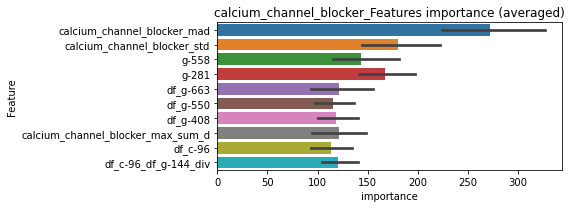

len(train_index) : 2387
len(valid_index) : 796
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00795725	valid_1's binary_logloss: 0.0512806
[600]	training's binary_logloss: 0.00134904	valid_1's binary_logloss: 0.0406341
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00113458	valid_1's binary_logloss: 0.0399283


len(train_index) : 2387
len(valid_index) : 796
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801854	valid_1's binary_logloss: 0.0440346
[600]	training's binary_logloss: 0.00133902	valid_1's binary_logloss: 0.0356448
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00139479	valid_1's binary_logloss: 0.0355184


len(train_index) : 2387
len(valid_index) : 796
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2388
len(valid_index) : 795
================================= fold 4/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[213]	training's binary_logloss: 0.0169966	valid_1's binary_logloss: 0.126953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833178	valid_1's binary_logloss: 0.040262
[600]	training's binary_logloss: 0.00141155	valid_1's binary_logloss: 0.0264577
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00150093	valid_1's binary_logloss: 0.026392


calcium_channel_blocker logloss: 0.05720759329390916


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158028	valid_1's binary_logloss: 0.0465688
[600]	training's binary_logloss: 0.00206366	valid_1's binary_logloss: 0.0184807
[900]	training's binary_logloss: 0.000881373	valid_1's binary_logloss: 0.0145597
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000717876	valid_1's binary_logloss: 0.0137239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157344	valid_1's binary_logloss: 0.0519781
[600]	training's binary_logloss: 0.00208526	valid_1's binary_logloss: 0.0267632
[900]	training's binary_logloss: 0.000867672	valid_1's binary_logloss: 0.0230959
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000839143	valid_1's binary_logloss: 0.0230171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162232	valid_1's binary_logloss: 0.0414387
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0158907, Threshold: 0.1604848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.11234, conf_1:0.20863
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.1604848
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_2: 0.2104848
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_3: 0.2604848
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_4: 0.3104848
threshold: 0.3104848, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127817	valid_1's binary_logloss: 0.0389776
[600]	training's binary_logloss: 0.00172998	valid_1's binary_logloss: 0.0155288
[900]	training's binary_logloss: 0.000760604	valid_1's binary_logloss: 0.011667
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000724971	valid_1's binary_logloss: 0.0114532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136986	valid_1's binary_logloss: 0.0375972
[600]	training's binary_logloss: 0.0018014	valid_1's binary_logloss: 0.0155379
[900]	training's binary_logloss: 0.000770342	valid_1's binary_logloss: 0.0128446
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000689073	valid_1's binary_logloss: 0.0126622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136898	valid_1's binary_logloss: 0.0333616
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.2177979, Threshold: 0.3104848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0188348 Vs.target_rate: 0.00176, Num_p_label: 75.0, conf_0:0.24839, conf_1:0.37258
Num_p_label: 75.0, Expected: 7.0, Adj_threshold_1: 0.3104848
Num_p_label: 63.0, Expected: 7.0, Adj_threshold_2: 0.3604848
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_3: 0.4104848
Num_p_label: 51.0, Expected: 7.0, Adj_threshold_4: 0.4604848
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_5: 0.5104848
Num_p_label: 43.0, Expected: 7.0, Adj_threshold_6: 0.5604848
Num_p_label: 38.0, Expected: 7.0, Adj_threshold_7: 0.6104848
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_8: 0.6604848
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_9: 0.7104848
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_10: 0.7604848
threshold: 0.7604848, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124783	valid_1's binary_logloss: 0.0414585
[600]	training's binary_logloss: 0.00164223	valid_1's binary_logloss: 0.0178797
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.0008234	valid_1's binary_logloss: 0.0139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128484	valid_1's binary_logloss: 0.0456962
[600]	training's binary_logloss: 0.00167619	valid_1's binary_logloss: 0.0211965
[900]	training's binary_logloss: 0.000738342	valid_1's binary_logloss: 0.0172849
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000739472	valid_1's binary_logloss: 0.0172831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012347	valid_1's binary_logloss: 0.069018
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00195712	valid_1's binary_logloss: 0.0536016

3 / 3 AUC score:0.999
y_Threshold: 0.1422479, Threshold: 0.7604848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0077850 Vs.target_rate: 0.00176, Num_p_label: 31.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_1: 0.7604848
threshold: 0.7604848, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 638.0/3769, y_label_rate: 0.1692757


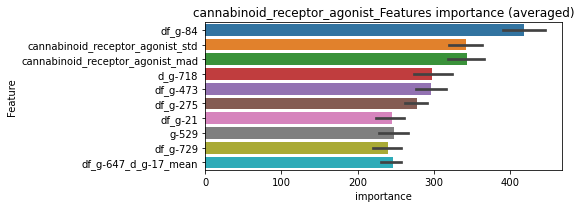

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121718	valid_1's binary_logloss: 0.0329181
[600]	training's binary_logloss: 0.00160499	valid_1's binary_logloss: 0.0112154
[900]	training's binary_logloss: 0.00072282	valid_1's binary_logloss: 0.00820918
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000740204	valid_1's binary_logloss: 0.00817621


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126205	valid_1's binary_logloss: 0.0445296
[600]	training's binary_logloss: 0.00157995	valid_1's binary_logloss: 0.0233936
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000758971	valid_1's binary_logloss: 0.0204486


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123544	valid_1's binary_logloss: 0.0388631
[600]	training's binary_logloss: 0.0015911	valid_1's binary_logloss: 0.0180232
[900]	training's binary_logloss: 0.000708388	valid_1's binary_logloss: 0.0151452
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000637301	valid_1's binary_logloss: 0.0148424


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011514	valid_1's binary_logloss: 0.0434474
[600]	training's binary_logloss: 0.00150396	valid_1's binary_logloss: 0.0213089
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000741748	valid_1's binary_logloss: 0.0184634


cannabinoid_receptor_agonist logloss: 0.01548792069143147


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214143	valid_1's binary_logloss: 0.0786797
[600]	training's binary_logloss: 0.00301038	valid_1's binary_logloss: 0.0462651
[900]	training's binary_logloss: 0.00115902	valid_1's binary_logloss: 0.0413343
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.00113137	valid_1's binary_logloss: 0.0413066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216834	valid_1's binary_logloss: 0.0729997
[600]	training's binary_logloss: 0.00309614	valid_1's binary_logloss: 0.0380894
[900]	training's binary_logloss: 0.00116696	valid_1's binary_logloss: 0.0325877
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000854317	valid_1's binary_logloss: 0.031343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252035	valid_1's binary_logloss: 0.0538598
[600]	training's binary_loglo

1 / 3 AUC score:0.997
y_Threshold: 0.0187163, Threshold: 0.1014082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.07099, conf_1:0.13183
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.1014082
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_2: 0.1514082
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_3: 0.2014082
threshold: 0.2014082, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196804	valid_1's binary_logloss: 0.0657941
[600]	training's binary_logloss: 0.00271643	valid_1's binary_logloss: 0.0334931
[900]	training's binary_logloss: 0.00105992	valid_1's binary_logloss: 0.0279638
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000779389	valid_1's binary_logloss: 0.0267647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199111	valid_1's binary_logloss: 0.0589216
[600]	training's binary_logloss: 0.00270846	valid_1's binary_logloss: 0.0308305
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00126164	valid_1's binary_logloss: 0.0267803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198731	valid_1's binary_logloss: 0.0616738
[600]	training's binary_logloss: 0.00280326	valid_1's binary_logloss: 0.033853
[900]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0641061, Threshold: 0.2014082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3776
p_label_rate: 0.0110497 Vs.target_rate: 0.00231, Num_p_label: 44.0, conf_0:0.16113, conf_1:0.24169
Num_p_label: 44.0, Expected: 9.2, Adj_threshold_1: 0.2014082
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_2: 0.2514082
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_3: 0.3014082
Num_p_label: 19.0, Expected: 9.2, Adj_threshold_4: 0.3514082
threshold: 0.3514082, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 642.0/3776, y_label_rate: 0.1700212
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181907	valid_1's binary_logloss: 0.0640202
[600]	training's binary_logloss: 0.0024832	valid_1's binary_logloss: 0.0378813
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.00148698	valid_1's binary_logloss: 0.0359838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180418	valid_1's binary_logloss: 0.0658095
[600]	training's binary_logloss: 0.00247461	valid_1's binary_logloss: 0.0382084
[900]	training's binary_logloss: 0.00100277	valid_1's binary_logloss: 0.0339407
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000960299	valid_1's binary_logloss: 0.0338523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195033	valid_1's binary_logloss: 0.0629229
[600]	training's binary_logloss: 0.00269272	valid_1's binary_logloss: 0.0392515
Early stopping, best iteration

3 / 3 AUC score:0.998
y_Threshold: 0.0434616, Threshold: 0.3514082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 629.0/3750
p_label_rate: 0.0067805 Vs.target_rate: 0.00231, Num_p_label: 27.0, conf_0:0.31627, conf_1:0.38655
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_1: 0.3514082
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_2: 0.4014082
threshold: 0.4014082, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 629.0/3750, y_label_rate: 0.1677333


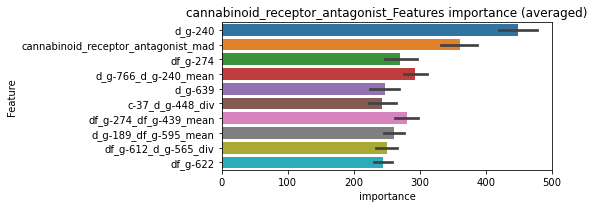

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167326	valid_1's binary_logloss: 0.0531607
[600]	training's binary_logloss: 0.00230563	valid_1's binary_logloss: 0.024541
[900]	training's binary_logloss: 0.000959857	valid_1's binary_logloss: 0.0197347
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000933091	valid_1's binary_logloss: 0.0196162


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017459	valid_1's binary_logloss: 0.0546605
[600]	training's binary_logloss: 0.00240771	valid_1's binary_logloss: 0.0269258
[900]	training's binary_logloss: 0.000985745	valid_1's binary_logloss: 0.0215543
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00101118	valid_1's binary_logloss: 0.0213475


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169474	valid_1's binary_logloss: 0.0637768
[600]	training's binary_logloss: 0.00232002	valid_1's binary_logloss: 0.0351178
[900]	training's binary_logloss: 0.000957833	valid_1's binary_logloss: 0.0311004
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000983749	valid_1's binary_logloss: 0.0308941


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169418	valid_1's binary_logloss: 0.054885
[600]	training's binary_logloss: 0.00231997	valid_1's binary_logloss: 0.0254555
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00102856	valid_1's binary_logloss: 0.020071


cannabinoid_receptor_antagonist logloss: 0.0229808958509563


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118691	valid_1's binary_logloss: 0.0459986
[600]	training's binary_logloss: 0.00158293	valid_1's binary_logloss: 0.021478
[900]	training's binary_logloss: 0.000719392	valid_1's binary_logloss: 0.0181586
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000704037	valid_1's binary_logloss: 0.0180326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012472	valid_1's binary_logloss: 0.0375983
[600]	training's binary_logloss: 0.00165215	valid_1's binary_logloss: 0.0169581
[900]	training's binary_logloss: 0.000744118	valid_1's binary_logloss: 0.0141043
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000659975	valid_1's binary_logloss: 0.0138974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128411	valid_1's binary_logloss: 0.0303221
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0097193, Threshold: 0.0683543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04785, conf_1:0.08886
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0683543
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.1183543
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1683543
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.2183543
threshold: 0.2183543, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105135	valid_1's binary_logloss: 0.0406073
[600]	training's binary_logloss: 0.00143704	valid_1's binary_logloss: 0.0183256
[900]	training's binary_logloss: 0.000669561	valid_1's binary_logloss: 0.0147877
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000662252	valid_1's binary_logloss: 0.0147667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105586	valid_1's binary_logloss: 0.0331188
[600]	training's binary_logloss: 0.0014539	valid_1's binary_logloss: 0.0153116
[900]	training's binary_logloss: 0.000684001	valid_1's binary_logloss: 0.0131692
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000700325	valid_1's binary_logloss: 0.0131452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113855	valid_1's binary_logloss: 0.0265045
[600]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0857007, Threshold: 0.2183543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0087896 Vs.target_rate: 0.00151, Num_p_label: 35.0, conf_0:0.17468, conf_1:0.26203
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_1: 0.2183543
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_2: 0.2683543
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_3: 0.3183543
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.3683543
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.4183543
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_6: 0.4683543
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.5183543
threshold: 0.5183543, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102752	valid_1's binary_logloss: 0.045741
[600]	training's binary_logloss: 0.00139896	valid_1's binary_logloss: 0.0265834
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00112138	valid_1's binary_logloss: 0.025668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106681	valid_1's binary_logloss: 0.0345652
[600]	training's binary_logloss: 0.00143747	valid_1's binary_logloss: 0.0125553
[900]	training's binary_logloss: 0.000669933	valid_1's binary_logloss: 0.00951361
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000596066	valid_1's binary_logloss: 0.00915467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110195	valid_1's binary_logloss: 0.0297253
[600]	training's binary_logloss: 0.0014632	valid_1's binary_logloss: 0.0116741
[900]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0850776, Threshold: 0.5183543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0042692 Vs.target_rate: 0.00151, Num_p_label: 17.0, conf_0:0.46652, conf_1:0.57019
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.5183543
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.5683543
threshold: 0.5683543, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


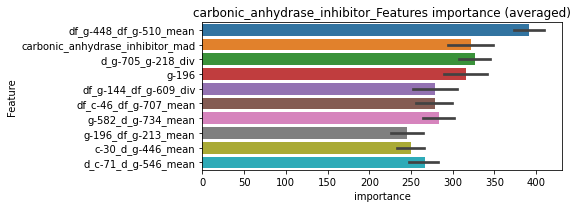

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103364	valid_1's binary_logloss: 0.028658
[600]	training's binary_logloss: 0.00141787	valid_1's binary_logloss: 0.0103793
[900]	training's binary_logloss: 0.000669687	valid_1's binary_logloss: 0.00775239
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000567501	valid_1's binary_logloss: 0.00733008


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105019	valid_1's binary_logloss: 0.0303616
[600]	training's binary_logloss: 0.00143144	valid_1's binary_logloss: 0.0108354
[900]	training's binary_logloss: 0.000663401	valid_1's binary_logloss: 0.00815336
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000585611	valid_1's binary_logloss: 0.00778286


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100653	valid_1's binary_logloss: 0.0282991
[600]	training's binary_logloss: 0.00138554	valid_1's binary_logloss: 0.0100899
[900]	training's binary_logloss: 0.000664708	valid_1's binary_logloss: 0.00741505
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000587057	valid_1's binary_logloss: 0.0070699


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968098	valid_1's binary_logloss: 0.0325829
[600]	training's binary_logloss: 0.00135195	valid_1's binary_logloss: 0.0131187
[900]	training's binary_logloss: 0.000648948	valid_1's binary_logloss: 0.010025
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000608766	valid_1's binary_logloss: 0.00981776


carbonic_anhydrase_inhibitor logloss: 0.00800047695485568


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113982	valid_1's binary_logloss: 0.0399228
[600]	training's binary_logloss: 0.00143955	valid_1's binary_logloss: 0.0187305
[900]	training's binary_logloss: 0.000648465	valid_1's binary_logloss: 0.0156344
Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000560131	valid_1's binary_logloss: 0.0152221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117579	valid_1's binary_logloss: 0.030519
[600]	training's binary_logloss: 0.00148078	valid_1's binary_logloss: 0.0109555
[900]	training's binary_logloss: 0.00067463	valid_1's binary_logloss: 0.00792917
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000643526	valid_1's binary_logloss: 0.00781678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121089	valid_1's binary_logloss: 0.0299397
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0107971, Threshold: 0.0646713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04527, conf_1:0.08407
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0646713
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1146713
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1646713
threshold: 0.1646713, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00976756	valid_1's binary_logloss: 0.0288753
[600]	training's binary_logloss: 0.00124757	valid_1's binary_logloss: 0.00949416
[900]	training's binary_logloss: 0.000584064	valid_1's binary_logloss: 0.00667396
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000559024	valid_1's binary_logloss: 0.00658816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937821	valid_1's binary_logloss: 0.0333245
[600]	training's binary_logloss: 0.00121894	valid_1's binary_logloss: 0.0182047
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00101604	valid_1's binary_logloss: 0.0173356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100462	valid_1's binary_logloss: 0.0317454
[600]	training's binary_logloss: 0.00126859	valid_1's binary_logloss: 0.0133525
[900]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0796288, Threshold: 0.1646713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0130588 Vs.target_rate: 0.00151, Num_p_label: 52.0, conf_0:0.13174, conf_1:0.19761
Num_p_label: 52.0, Expected: 6.0, Adj_threshold_1: 0.1646713
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_2: 0.2146713
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_3: 0.2646713
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.3146713
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_5: 0.3646713
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_6: 0.4146713
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.4646713
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_8: 0.5146713
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_9: 0.5646713
threshold: 0.5646713, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946904	valid_1's binary_logloss: 0.0291142
[600]	training's binary_logloss: 0.00121336	valid_1's binary_logloss: 0.0167518
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000686607	valid_1's binary_logloss: 0.015737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945309	valid_1's binary_logloss: 0.031294
[600]	training's binary_logloss: 0.00118276	valid_1's binary_logloss: 0.0154264
[900]	training's binary_logloss: 0.000556801	valid_1's binary_logloss: 0.013233
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000543048	valid_1's binary_logloss: 0.0131376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927922	valid_1's binary_logloss: 0.0287521
[600]	training's binary_logloss: 0.001203	valid_1's binary_logloss: 0.0114302
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0821514, Threshold: 0.5646713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0032647 Vs.target_rate: 0.00151, Num_p_label: 13.0, conf_0:0.50000, conf_1:0.62114
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.5646713
threshold: 0.5646713, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


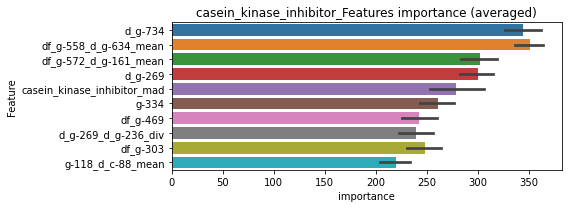

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941036	valid_1's binary_logloss: 0.0237904
[600]	training's binary_logloss: 0.00120955	valid_1's binary_logloss: 0.00702881
[900]	training's binary_logloss: 0.000563607	valid_1's binary_logloss: 0.00490565
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000539013	valid_1's binary_logloss: 0.00488306


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00920886	valid_1's binary_logloss: 0.0273123
[600]	training's binary_logloss: 0.00119011	valid_1's binary_logloss: 0.0108389
[900]	training's binary_logloss: 0.000562757	valid_1's binary_logloss: 0.00857889
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000529392	valid_1's binary_logloss: 0.00843456


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908451	valid_1's binary_logloss: 0.0237124
[600]	training's binary_logloss: 0.00117115	valid_1's binary_logloss: 0.00703815
[900]	training's binary_logloss: 0.000555226	valid_1's binary_logloss: 0.0050069
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000516845	valid_1's binary_logloss: 0.00489787


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0085153	valid_1's binary_logloss: 0.0475523


casein_kinase_inhibitor logloss: 0.014640747609870811


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00322582	valid_1's binary_logloss: 0.0403578
neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00579136	valid_1's binary_logloss: 0.0107683
[600]	training's binary_logloss: 0.000738962	valid_1's binary_logloss: 0.00261024
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000418993	valid_1's binary_logloss: 0.00188502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560207	valid_1's binary_logloss: 0.01367
[600]	training's binary_logloss: 0.000736681	valid_1's binary_logloss: 0.00410859
[900]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00288096
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00288096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577527	valid_1's binary_logloss: 0.0089892
[600]	training's binary_logloss: 0.000740244	valid_1's binary_logloss: 0.00200811
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0036022, Threshold: 0.0576827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.04038, conf_1:0.07499
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0576827
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_2: 0.1076827
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.1576827
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.2076827
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.2576827
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.3076827
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.3576827
threshold: 0.3576827, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480934	valid_1's binary_logloss: 0.00847909
[600]	training's binary_logloss: 0.000647935	valid_1's binary_logloss: 0.00168988
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000380903	valid_1's binary_logloss: 0.00113781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00460385	valid_1's binary_logloss: 0.0103197
[600]	training's binary_logloss: 0.000625187	valid_1's binary_logloss: 0.00270045
[900]	training's binary_logloss: 0.000372405	valid_1's binary_logloss: 0.00195337
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000366749	valid_1's binary_logloss: 0.0019274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480555	valid_1's binary_logloss: 0.0064289
[600]	training's binary_logloss: 0.000640941	valid_1's binary_logloss: 0.00109404
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0408482, Threshold: 0.3576827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0087896 Vs.target_rate: 0.00076, Num_p_label: 35.0, conf_0:0.28615, conf_1:0.42922
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_1: 0.3576827
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_2: 0.4076827
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_3: 0.4576827
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.5076827
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.5576827
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_6: 0.6076827
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_7: 0.6576827
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_8: 0.7076827
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.7576827
threshold: 0.7576827, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480934	valid_1's binary_logloss: 0.00847909
[600]	training's binary_logloss: 0.000647935	valid_1's binary_logloss: 0.00168988
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000380903	valid_1's binary_logloss: 0.00113781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00460385	valid_1's binary_logloss: 0.0103197
[600]	training's binary_logloss: 0.000625187	valid_1's binary_logloss: 0.00270045
[900]	training's binary_logloss: 0.000372405	valid_1's binary_logloss: 0.00195337
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000366749	valid_1's binary_logloss: 0.0019274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480555	valid_1's binary_logloss: 0.0064289
[600]	training's binary_logloss: 0.000640941	valid_1's binary_logloss: 0.00109404
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0408482, Threshold: 0.7576827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00076, Num_p_label: 12.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.7576827
threshold: 0.7576827, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


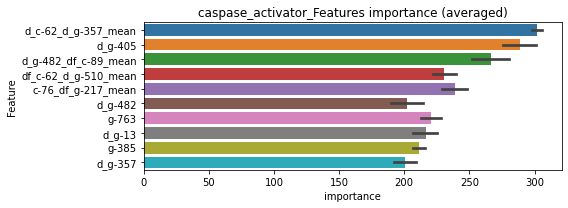

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474778	valid_1's binary_logloss: 0.00901416
[600]	training's binary_logloss: 0.000641715	valid_1's binary_logloss: 0.00183692
[900]	training's binary_logloss: 0.000378884	valid_1's binary_logloss: 0.0012206
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000373189	valid_1's binary_logloss: 0.00121123


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463121	valid_1's binary_logloss: 0.0102929
[600]	training's binary_logloss: 0.000631839	valid_1's binary_logloss: 0.00261716
[900]	training's binary_logloss: 0.000391315	valid_1's binary_logloss: 0.00191332
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000391315	valid_1's binary_logloss: 0.00191332


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048164	valid_1's binary_logloss: 0.00639433
[600]	training's binary_logloss: 0.000642083	valid_1's binary_logloss: 0.00108784
[900]	training's binary_logloss: 0.000388241	valid_1's binary_logloss: 0.00070498
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000388241	valid_1's binary_logloss: 0.00070498


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462876	valid_1's binary_logloss: 0.0131519
[600]	training's binary_logloss: 0.000623693	valid_1's binary_logloss: 0.00567343
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000383066	valid_1's binary_logloss: 0.00491122


caspase_activator logloss: 0.0021890870251073365


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751604	valid_1's binary_logloss: 0.0163683
[600]	training's binary_logloss: 0.000940094	valid_1's binary_logloss: 0.00422608
[900]	training's binary_logloss: 0.000475464	valid_1's binary_logloss: 0.00300397
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000464224	valid_1's binary_logloss: 0.00298167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721696	valid_1's binary_logloss: 0.0140947
[600]	training's binary_logloss: 0.000919991	valid_1's binary_logloss: 0.0040091
[900]	training's binary_logloss: 0.000479055	valid_1's binary_logloss: 0.00297547
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000470667	valid_1's binary_logloss: 0.00294394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00730046	valid_1's binary_logloss: 0.0181236
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0058704, Threshold: 0.0502743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.03519, conf_1:0.06536
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0502743
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.1002743
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.1502743
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.2002743
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2502743
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.3002743
threshold: 0.3002743, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610546	valid_1's binary_logloss: 0.0139326
[600]	training's binary_logloss: 0.000796982	valid_1's binary_logloss: 0.00334371
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000435666	valid_1's binary_logloss: 0.00232407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626731	valid_1's binary_logloss: 0.0120122
[600]	training's binary_logloss: 0.000800007	valid_1's binary_logloss: 0.00292673
[900]	training's binary_logloss: 0.000434387	valid_1's binary_logloss: 0.00206801
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000429369	valid_1's binary_logloss: 0.00205501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610499	valid_1's binary_logloss: 0.0124876
[600]	training's binary_logloss: 0.00078886	valid_1's binary_logloss: 0.0033054
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0857187, Threshold: 0.3002743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.24022, conf_1:0.36033
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.3002743
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.3502743
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.4002743
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.4502743
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.5002743
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.5502743
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.6002743
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.6502743
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.7002743
threshold: 0.7002743, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610546	valid_1's binary_logloss: 0.0139326
[600]	training's binary_logloss: 0.000796982	valid_1's binary_logloss: 0.00334371
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000435666	valid_1's binary_logloss: 0.00232407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626731	valid_1's binary_logloss: 0.0120122
[600]	training's binary_logloss: 0.000800007	valid_1's binary_logloss: 0.00292673
[900]	training's binary_logloss: 0.000434387	valid_1's binary_logloss: 0.00206801
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000429369	valid_1's binary_logloss: 0.00205501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610499	valid_1's binary_logloss: 0.0124876
[600]	training's binary_logloss: 0.00078886	valid_1's binary_logloss: 0.0033054
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0857187, Threshold: 0.7002743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.77030
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.7002743
threshold: 0.7002743, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


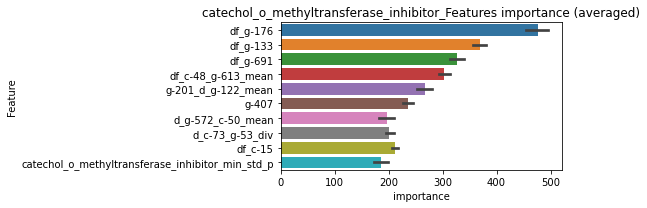

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616198	valid_1's binary_logloss: 0.0133306
[600]	training's binary_logloss: 0.000795857	valid_1's binary_logloss: 0.00308797
[900]	training's binary_logloss: 0.000436566	valid_1's binary_logloss: 0.00211561
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000424034	valid_1's binary_logloss: 0.00208016


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063094	valid_1's binary_logloss: 0.0122475
[600]	training's binary_logloss: 0.000803103	valid_1's binary_logloss: 0.00282519
[900]	training's binary_logloss: 0.00042786	valid_1's binary_logloss: 0.00192584
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00042582	valid_1's binary_logloss: 0.00191799


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623136	valid_1's binary_logloss: 0.0134127
[600]	training's binary_logloss: 0.000795912	valid_1's binary_logloss: 0.00361203
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000514903	valid_1's binary_logloss: 0.0028644


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641354	valid_1's binary_logloss: 0.0118996
[600]	training's binary_logloss: 0.000818977	valid_1's binary_logloss: 0.00346059
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00046297	valid_1's binary_logloss: 0.00275528


catechol_o_methyltransferase_inhibitor logloss: 0.002404893520433776


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0300303	valid_1's binary_logloss: 0.134635
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00938403	valid_1's binary_logloss: 0.118589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332549	valid_1's binary_logloss: 0.121178
[600]	training's binary_logloss: 0.00574844	valid_1's binary_logloss: 0.0847382
[900]	training's binary_logloss: 0.0019072	valid_1's binary_logloss: 0.0781327
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00207192	valid_1's binary_logloss: 0.0780551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0340674	valid_1's binary_logloss: 0.100404
[600]	training's binary_logloss: 0.00597853	valid_1's binary_logloss: 0.0649562
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00225554	valid_1's binary_logloss: 0.0575089


1 / 3 AUC score:0.985
y_Threshold: 0.0352522, Threshold: 0.1581566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 624/3737
p_label_rate: 0.0100452 Vs.target_rate: 0.00428, Num_p_label: 40.0, conf_0:0.11071, conf_1:0.20560
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.1581566
Num_p_label: 28.0, Expected: 17.1, Adj_threshold_2: 0.2081566
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_3: 0.2581566
threshold: 0.2581566, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 624.0/3737, y_label_rate: 0.1669789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021355	valid_1's binary_logloss: 0.0969544
[600]	training's binary_logloss: 0.00331023	valid_1's binary_logloss: 0.0748844
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00213298	valid_1's binary_logloss: 0.0728258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024249	valid_1's binary_logloss: 0.0820709
[600]	training's binary_logloss: 0.00373273	valid_1's binary_logloss: 0.0539472
[900]	training's binary_logloss: 0.00140795	valid_1's binary_logloss: 0.0490037
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00145264	valid_1's binary_logloss: 0.0489244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212781	valid_1's binary_logloss: 0.100546
[600]	training's binary_logloss: 0.00323823	valid_1's binary_logloss: 0.0828625
Early stopping, best iteration is

2 / 3 AUC score:0.993
y_Threshold: 0.0708600, Threshold: 0.2581566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 596.0/3681
p_label_rate: 0.0163235 Vs.target_rate: 0.00428, Num_p_label: 65.0, conf_0:0.20653, conf_1:0.30979
Num_p_label: 65.0, Expected: 17.1, Adj_threshold_1: 0.2581566
Num_p_label: 51.0, Expected: 17.1, Adj_threshold_2: 0.3081566
Num_p_label: 42.0, Expected: 17.1, Adj_threshold_3: 0.3581566
Num_p_label: 37.0, Expected: 17.1, Adj_threshold_4: 0.4081566
Num_p_label: 30.0, Expected: 17.1, Adj_threshold_5: 0.4581566
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_6: 0.5081566
threshold: 0.5081566, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 596.0/3681, y_label_rate: 0.1619125
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180122	valid_1's binary_logloss: 0.0750359
[600]	training's binary_logloss: 0.00281565	valid_1's binary_logloss: 0.0538336
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00189189	valid_1's binary_logloss: 0.0517139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189231	valid_1's binary_logloss: 0.0815231
[600]	training's binary_logloss: 0.00287422	valid_1's binary_logloss: 0.0530206
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00248303	valid_1's binary_logloss: 0.0519121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186297	valid_1's binary_logloss: 0.0744444
[600]	training's binary_logloss: 0.00281899	valid_1's binary_logloss: 0.053643
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00202603	valid_1's binary_logloss: 0.0524

3 / 3 AUC score:0.998
y_Threshold: 0.0760171, Threshold: 0.5081566, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 576.0/3641
p_label_rate: 0.0105475 Vs.target_rate: 0.00428, Num_p_label: 42.0, conf_0:0.45734, conf_1:0.55897
Num_p_label: 42.0, Expected: 17.1, Adj_threshold_1: 0.5081566
Num_p_label: 29.0, Expected: 17.1, Adj_threshold_2: 0.5581566
Num_p_label: 24.0, Expected: 17.1, Adj_threshold_3: 0.6081566
threshold: 0.6081566, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 576.0/3641, y_label_rate: 0.1581983


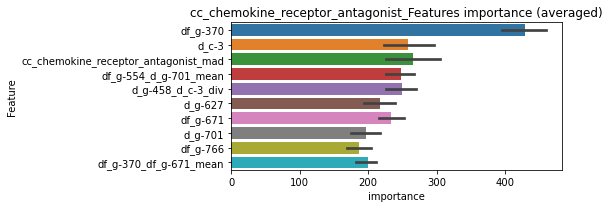

len(train_index) : 2730
len(valid_index) : 911
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016886	valid_1's binary_logloss: 0.0607819
[600]	training's binary_logloss: 0.00263802	valid_1's binary_logloss: 0.0419601
[900]	training's binary_logloss: 0.0011016	valid_1's binary_logloss: 0.0397119
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00114489	valid_1's binary_logloss: 0.0396287


len(train_index) : 2731
len(valid_index) : 910
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157531	valid_1's binary_logloss: 0.0711918
[600]	training's binary_logloss: 0.00240783	valid_1's binary_logloss: 0.052619
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00160266	valid_1's binary_logloss: 0.0509333


len(train_index) : 2731
len(valid_index) : 910
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153997	valid_1's binary_logloss: 0.0733985
[600]	training's binary_logloss: 0.00239279	valid_1's binary_logloss: 0.0501417
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00132743	valid_1's binary_logloss: 0.0475961


len(train_index) : 2731
len(valid_index) : 910
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159554	valid_1's binary_logloss: 0.066194
[600]	training's binary_logloss: 0.00245986	valid_1's binary_logloss: 0.0453908
[900]	training's binary_logloss: 0.00106396	valid_1's binary_logloss: 0.0420952
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00110285	valid_1's binary_logloss: 0.041935


cc_chemokine_receptor_antagonist logloss: 0.04502180696401609


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580437	valid_1's binary_logloss: 0.0157137
[600]	training's binary_logloss: 0.000769735	valid_1's binary_logloss: 0.00617038
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000425122	valid_1's binary_logloss: 0.00483199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617984	valid_1's binary_logloss: 0.0152481
[600]	training's binary_logloss: 0.000793151	valid_1's binary_logloss: 0.00452148
[900]	training's binary_logloss: 0.000439765	valid_1's binary_logloss: 0.00338256
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000439765	valid_1's binary_logloss: 0.00338256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620087	valid_1's binary_logloss: 0.0186065
[600]	training's binary_logloss: 0.000776613	valid_1's binary_logloss: 0.0082582
Early stopping, 

1 / 3 AUC score:1.000
y_Threshold: 0.0042336, Threshold: 0.0243140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01702, conf_1:0.03161
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0243140
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0743140
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1243140
threshold: 0.1243140, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498302	valid_1's binary_logloss: 0.0125279
[600]	training's binary_logloss: 0.000659118	valid_1's binary_logloss: 0.00426677
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000394719	valid_1's binary_logloss: 0.00337983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515559	valid_1's binary_logloss: 0.0134818
[600]	training's binary_logloss: 0.000683228	valid_1's binary_logloss: 0.00349078
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000409447	valid_1's binary_logloss: 0.00256763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527948	valid_1's binary_logloss: 0.0112381
[600]	training's binary_logloss: 0.000692061	valid_1's binary_logloss: 0.00436706
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000415753	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1088916, Threshold: 0.1243140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.09945, conf_1:0.14918
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.1243140
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_2: 0.1743140
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_3: 0.2243140
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_4: 0.2743140
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_5: 0.3243140
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_6: 0.3743140
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_7: 0.4243140
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.4743140
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.5243140
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.5743140
threshold: 0.5743140, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500307	valid_1's binary_logloss: 0.00979105
[600]	training's binary_logloss: 0.000658156	valid_1's binary_logloss: 0.00229504
[900]	training's binary_logloss: 0.000391053	valid_1's binary_logloss: 0.00171251
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000391053	valid_1's binary_logloss: 0.00171251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506513	valid_1's binary_logloss: 0.0181301
[600]	training's binary_logloss: 0.000661346	valid_1's binary_logloss: 0.00816998
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000557886	valid_1's binary_logloss: 0.0080456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529039	valid_1's binary_logloss: 0.0101982
[600]	training's binary_logloss: 0.000688303	valid_1's binary_logloss: 0.00233325
[900]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.1747391, Threshold: 0.5743140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00076, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.63175
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.5743140
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.6243140
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.6743140
threshold: 0.6743140, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


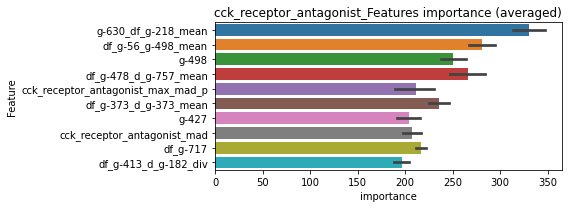

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527274	valid_1's binary_logloss: 0.0100616
[600]	training's binary_logloss: 0.000669067	valid_1's binary_logloss: 0.00241884
[900]	training's binary_logloss: 0.000394512	valid_1's binary_logloss: 0.00180827
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000396689	valid_1's binary_logloss: 0.00180602


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504124	valid_1's binary_logloss: 0.0185182
[600]	training's binary_logloss: 0.000667182	valid_1's binary_logloss: 0.00884759
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000535087	valid_1's binary_logloss: 0.00863631


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522662	valid_1's binary_logloss: 0.00980488
[600]	training's binary_logloss: 0.000687297	valid_1's binary_logloss: 0.00243604
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00039707	valid_1's binary_logloss: 0.00175418


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505942	valid_1's binary_logloss: 0.0134668
[600]	training's binary_logloss: 0.000661621	valid_1's binary_logloss: 0.00348462
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000401511	valid_1's binary_logloss: 0.00264941


cck_receptor_antagonist logloss: 0.003713052565219155


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.111898	valid_1's binary_logloss: 0.36691
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.108494	valid_1's binary_logloss: 0.366797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.105789	valid_1's binary_logloss: 0.375949
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0979018	valid_1's binary_logloss: 0.375289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.119951	valid_1's binary_logloss: 0.369109
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0918065	valid_1's binary_logloss: 0.366957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.110294	valid_1's binary_logloss: 0.345755
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.0624101	valid_1's binary_logloss: 0.34192

1 / 3 AUC score:0.773
y_Threshold: 0.1452536, Threshold: 0.4866685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 678 → Positive_corect_labels: 374/3211
p_label_rate: 0.0100452 Vs.target_rate: 0.01478, Num_p_label: 40.0, conf_0:0.34067, conf_1:0.63267
threshold: 0.4866685, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 374.0/3211, y_label_rate: 0.1164746
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0300034	valid_1's binary_logloss: 0.175118
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.0141136	valid_1's binary_logloss: 0.169822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292536	valid_1's binary_logloss: 0.163407
[600]	training's binary_logloss: 0.00529371	valid_1's binary_logloss: 0.146941
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00539195	valid_1's binary_logloss: 0.146676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296518	valid_1's binary_logloss: 0.182386
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.0121329	valid_1's binary_logloss: 0.178976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296047	valid_1's binary_logloss: 0.158985
Early stopping, best iter

2 / 3 AUC score:0.958
y_Threshold: 0.0983172, Threshold: 0.4866685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 294.0/3051
p_label_rate: 0.0303867 Vs.target_rate: 0.01478, Num_p_label: 121.0, conf_0:0.38933, conf_1:0.58400
Num_p_label: 121.0, Expected: 58.9, Adj_threshold_1: 0.4866685
Num_p_label: 106.0, Expected: 58.9, Adj_threshold_2: 0.5366685
Num_p_label: 91.0, Expected: 58.9, Adj_threshold_3: 0.5866685
Num_p_label: 75.0, Expected: 58.9, Adj_threshold_4: 0.6366685
threshold: 0.6366685, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 294.0/3051, y_label_rate: 0.0963618
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159183	valid_1's binary_logloss: 0.120649
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00491828	valid_1's binary_logloss: 0.115702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145048	valid_1's binary_logloss: 0.100818
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00330449	valid_1's binary_logloss: 0.0901434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158946	valid_1's binary_logloss: 0.120204
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0120562	valid_1's binary_logloss: 0.119813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165375	valid_1's binary_logloss: 0.10377


3 / 3 AUC score:0.968


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00588464	valid_1's binary_logloss: 0.0961424


y_Threshold: 0.0920277, Threshold: 0.6366685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 256.0/2975
p_label_rate: 0.0293822 Vs.target_rate: 0.01478, Num_p_label: 117.0, conf_0:0.50000, conf_1:0.70034
Num_p_label: 117.0, Expected: 58.9, Adj_threshold_1: 0.6366685
Num_p_label: 103.0, Expected: 58.9, Adj_threshold_2: 0.6866685
Num_p_label: 84.0, Expected: 58.9, Adj_threshold_3: 0.7366685
threshold: 0.7366685, positive_p_label: 84.0/3982, p_label_rate: 0.0210949
positive_y_label: 256.0/2975, y_label_rate: 0.0860504


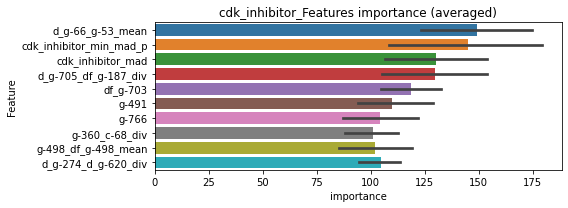

len(train_index) : 2231
len(valid_index) : 744
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101278	valid_1's binary_logloss: 0.0580938
[600]	training's binary_logloss: 0.00176784	valid_1's binary_logloss: 0.0439889
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00119058	valid_1's binary_logloss: 0.0422614


len(train_index) : 2231
len(valid_index) : 744
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00929194	valid_1's binary_logloss: 0.0957132


len(train_index) : 2231
len(valid_index) : 744
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00742628	valid_1's binary_logloss: 0.0951115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100167	valid_1's binary_logloss: 0.0588283
[600]	training's binary_logloss: 0.00174737	valid_1's binary_logloss: 0.0478736
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00131613	valid_1's binary_logloss: 0.0465827


len(train_index) : 2232
len(valid_index) : 743
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00957419	valid_1's binary_logloss: 0.0701438
[600]	training's binary_logloss: 0.00171069	valid_1's binary_logloss: 0.0559092
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00130251	valid_1's binary_logloss: 0.0549625


cdk_inhibitor logloss: 0.059731125951554144


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200347	valid_1's binary_logloss: 0.0872495
[600]	training's binary_logloss: 0.00288621	valid_1's binary_logloss: 0.0603933
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.00129882	valid_1's binary_logloss: 0.0562191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197625	valid_1's binary_logloss: 0.061745
[600]	training's binary_logloss: 0.00285631	valid_1's binary_logloss: 0.0328052
[900]	training's binary_logloss: 0.00112659	valid_1's binary_logloss: 0.027396
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.00091427	valid_1's binary_logloss: 0.0268956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199341	valid_1's binary_logloss: 0.0574971
[600]	training's binary_logloss: 0.00284808	valid_1's binary_logloss: 0.0298146
[900]	training's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0182301, Threshold: 0.1184140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.08289, conf_1:0.15394
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.1184140
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_2: 0.1684140
Num_p_label: 17.0, Expected: 9.0, Adj_threshold_3: 0.2184140
threshold: 0.2184140, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171848	valid_1's binary_logloss: 0.0538329
[600]	training's binary_logloss: 0.0024447	valid_1's binary_logloss: 0.025055
[900]	training's binary_logloss: 0.00102315	valid_1's binary_logloss: 0.019846
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000847665	valid_1's binary_logloss: 0.0189185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164185	valid_1's binary_logloss: 0.0564713
[600]	training's binary_logloss: 0.00237227	valid_1's binary_logloss: 0.0274569
[900]	training's binary_logloss: 0.00100133	valid_1's binary_logloss: 0.0224909
Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000773176	valid_1's binary_logloss: 0.0218391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163239	valid_1's binary_logloss: 0.0479424
[600]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.1098440, Threshold: 0.2184140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0115520 Vs.target_rate: 0.00227, Num_p_label: 46.0, conf_0:0.17473, conf_1:0.26210
Num_p_label: 46.0, Expected: 9.0, Adj_threshold_1: 0.2184140
Num_p_label: 38.0, Expected: 9.0, Adj_threshold_2: 0.2684140
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_3: 0.3184140
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_4: 0.3684140
threshold: 0.3684140, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162001	valid_1's binary_logloss: 0.050057
[600]	training's binary_logloss: 0.00231821	valid_1's binary_logloss: 0.0223131
[900]	training's binary_logloss: 0.000985523	valid_1's binary_logloss: 0.0172807
Early stopping, best iteration is:
[1157]	training's binary_logloss: 0.000726996	valid_1's binary_logloss: 0.0161519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159815	valid_1's binary_logloss: 0.0597074
[600]	training's binary_logloss: 0.00230254	valid_1's binary_logloss: 0.0348105
[900]	training's binary_logloss: 0.000976573	valid_1's binary_logloss: 0.0304366
[1200]	training's binary_logloss: 0.00071646	valid_1's binary_logloss: 0.0291614
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.000723707	valid_1's binary_logloss: 0.0290728
Training until validation scores don't improve for 30 rounds
[300]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0726441, Threshold: 0.3684140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0050226 Vs.target_rate: 0.00227, Num_p_label: 20.0, conf_0:0.33157, conf_1:0.40526
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.3684140
threshold: 0.3684140, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


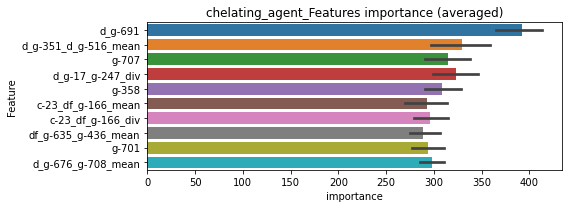

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152583	valid_1's binary_logloss: 0.0651722
[600]	training's binary_logloss: 0.00216751	valid_1's binary_logloss: 0.0421601
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00120633	valid_1's binary_logloss: 0.0400869


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156535	valid_1's binary_logloss: 0.0436396
[600]	training's binary_logloss: 0.00227087	valid_1's binary_logloss: 0.0187785
[900]	training's binary_logloss: 0.000974068	valid_1's binary_logloss: 0.0147163
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000764245	valid_1's binary_logloss: 0.0141126


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164664	valid_1's binary_logloss: 0.0470338
[600]	training's binary_logloss: 0.00234559	valid_1's binary_logloss: 0.0171539
[900]	training's binary_logloss: 0.000993025	valid_1's binary_logloss: 0.0119155
[1200]	training's binary_logloss: 0.000727257	valid_1's binary_logloss: 0.0106876
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.000727257	valid_1's binary_logloss: 0.0106876


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157701	valid_1's binary_logloss: 0.0476371
[600]	training's binary_logloss: 0.00226768	valid_1's binary_logloss: 0.0189518
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00104379	valid_1's binary_logloss: 0.0147049


chelating_agent logloss: 0.019901799132215688


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727568	valid_1's binary_logloss: 0.0181346
[600]	training's binary_logloss: 0.00098706	valid_1's binary_logloss: 0.00672062
[900]	training's binary_logloss: 0.000497802	valid_1's binary_logloss: 0.00534961
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000486364	valid_1's binary_logloss: 0.00533888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00717932	valid_1's binary_logloss: 0.0157046
[600]	training's binary_logloss: 0.000981895	valid_1's binary_logloss: 0.00440747
[900]	training's binary_logloss: 0.000496345	valid_1's binary_logloss: 0.00305801
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000475792	valid_1's binary_logloss: 0.00301817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711372	valid_1's binary_logloss: 0.0160482
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0058281, Threshold: 0.0508893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.03562, conf_1:0.06616
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0508893
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_2: 0.1008893
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_3: 0.1508893
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_4: 0.2008893
threshold: 0.2008893, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623196	valid_1's binary_logloss: 0.0157498
[600]	training's binary_logloss: 0.000860301	valid_1's binary_logloss: 0.00501451
[900]	training's binary_logloss: 0.000441734	valid_1's binary_logloss: 0.00362136
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000431421	valid_1's binary_logloss: 0.0035585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642805	valid_1's binary_logloss: 0.0126796
[600]	training's binary_logloss: 0.000880278	valid_1's binary_logloss: 0.00325361
[900]	training's binary_logloss: 0.000448892	valid_1's binary_logloss: 0.00214968
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000445391	valid_1's binary_logloss: 0.00213625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632832	valid_1's binary_logloss: 0.0138543
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0803037, Threshold: 0.2008893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00101, Num_p_label: 30.0, conf_0:0.16071, conf_1:0.24107
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_1: 0.2008893
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_2: 0.2508893
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_3: 0.3008893
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_4: 0.3508893
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.4008893
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.4508893
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.5008893
threshold: 0.5008893, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623196	valid_1's binary_logloss: 0.0157498
[600]	training's binary_logloss: 0.000860301	valid_1's binary_logloss: 0.00501451
[900]	training's binary_logloss: 0.000441734	valid_1's binary_logloss: 0.00362136
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000431421	valid_1's binary_logloss: 0.0035585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642805	valid_1's binary_logloss: 0.0126796
[600]	training's binary_logloss: 0.000880278	valid_1's binary_logloss: 0.00325361
[900]	training's binary_logloss: 0.000448892	valid_1's binary_logloss: 0.00214968
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000445391	valid_1's binary_logloss: 0.00213625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632832	valid_1's binary_logloss: 0.0138543
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0803037, Threshold: 0.5008893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.45080, conf_1:0.55098
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.5008893
threshold: 0.5008893, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


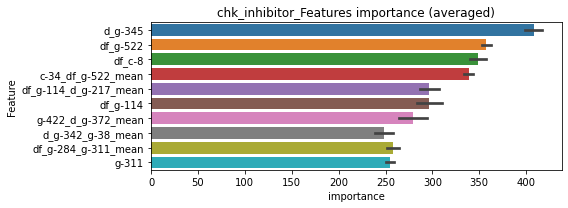

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617684	valid_1's binary_logloss: 0.015713
[600]	training's binary_logloss: 0.000851574	valid_1's binary_logloss: 0.0051296
[900]	training's binary_logloss: 0.000439158	valid_1's binary_logloss: 0.00363615
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000427756	valid_1's binary_logloss: 0.00358115


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639359	valid_1's binary_logloss: 0.0136382
[600]	training's binary_logloss: 0.000877457	valid_1's binary_logloss: 0.00339978
[900]	training's binary_logloss: 0.000447784	valid_1's binary_logloss: 0.00229263
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000431584	valid_1's binary_logloss: 0.00225838


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00634787	valid_1's binary_logloss: 0.0137391
[600]	training's binary_logloss: 0.000872577	valid_1's binary_logloss: 0.00488932
[900]	training's binary_logloss: 0.000438192	valid_1's binary_logloss: 0.00391915
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000428572	valid_1's binary_logloss: 0.00388707


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600991	valid_1's binary_logloss: 0.0146075
[600]	training's binary_logloss: 0.000842813	valid_1's binary_logloss: 0.0048529
[900]	training's binary_logloss: 0.000434796	valid_1's binary_logloss: 0.00371229
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000435892	valid_1's binary_logloss: 0.003703


chk_inhibitor logloss: 0.003357828476783186


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128119	valid_1's binary_logloss: 0.0448654
[600]	training's binary_logloss: 0.00175985	valid_1's binary_logloss: 0.0225371
[900]	training's binary_logloss: 0.0007839	valid_1's binary_logloss: 0.0203825
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00080142	valid_1's binary_logloss: 0.0202515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131766	valid_1's binary_logloss: 0.045212
[600]	training's binary_logloss: 0.00179671	valid_1's binary_logloss: 0.0217554
[900]	training's binary_logloss: 0.000780459	valid_1's binary_logloss: 0.0187061
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000719601	valid_1's binary_logloss: 0.018476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136316	valid_1's binary_logloss: 0.0324157
[600]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0146192, Threshold: 0.1565430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.10958, conf_1:0.20351
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.1565430
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_2: 0.2065430
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_3: 0.2565430
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_4: 0.3065430
threshold: 0.3065430, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116405	valid_1's binary_logloss: 0.0386753
[600]	training's binary_logloss: 0.00157288	valid_1's binary_logloss: 0.022863
[900]	training's binary_logloss: 0.000703083	valid_1's binary_logloss: 0.0211994
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000688316	valid_1's binary_logloss: 0.0211591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111336	valid_1's binary_logloss: 0.0545139
[600]	training's binary_logloss: 0.00152575	valid_1's binary_logloss: 0.0396279
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.00080865	valid_1's binary_logloss: 0.0382912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116771	valid_1's binary_logloss: 0.0326234
[600]	training's binary_logloss: 0.00159709	valid_1's binary_logloss: 0.0117681
[900]	training's binary_loglo

2 / 3 AUC score:0.999
y_Threshold: 0.0652573, Threshold: 0.3065430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0170768 Vs.target_rate: 0.00176, Num_p_label: 68.0, conf_0:0.24523, conf_1:0.36785
Num_p_label: 68.0, Expected: 7.0, Adj_threshold_1: 0.3065430
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_2: 0.3565430
Num_p_label: 50.0, Expected: 7.0, Adj_threshold_3: 0.4065430
Num_p_label: 42.0, Expected: 7.0, Adj_threshold_4: 0.4565430
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_5: 0.5065430
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_6: 0.5565430
Num_p_label: 32.0, Expected: 7.0, Adj_threshold_7: 0.6065430
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_8: 0.6565430
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_9: 0.7065430
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_10: 0.7565430
threshold: 0.7565430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3788, y_label_rate: 0.1705385
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112176	valid_1's binary_logloss: 0.0411682
[600]	training's binary_logloss: 0.00149344	valid_1's binary_logloss: 0.0237115
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000996588	valid_1's binary_logloss: 0.0226838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105104	valid_1's binary_logloss: 0.0345542
[600]	training's binary_logloss: 0.00146937	valid_1's binary_logloss: 0.0154787
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00072649	valid_1's binary_logloss: 0.012867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109621	valid_1's binary_logloss: 0.0335511
[600]	training's binary_logloss: 0.00150003	valid_1's binary_logloss: 0.0155456
[900]	training's binary_logloss: 0.000674221	valid_1's binary_logloss: 0.0130116
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0619847, Threshold: 0.7565430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3774
p_label_rate: 0.0050226 Vs.target_rate: 0.00176, Num_p_label: 20.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.7565430
threshold: 0.7565430, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 639.0/3774, y_label_rate: 0.1693164


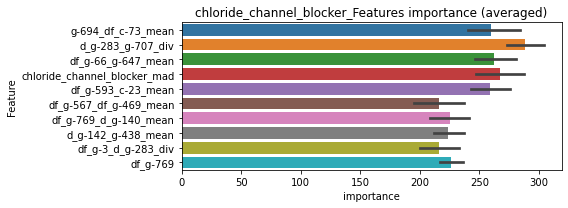

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104876	valid_1's binary_logloss: 0.0362458
[600]	training's binary_logloss: 0.00144853	valid_1's binary_logloss: 0.0153546
[900]	training's binary_logloss: 0.000665813	valid_1's binary_logloss: 0.0120551
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000632177	valid_1's binary_logloss: 0.0118263


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108684	valid_1's binary_logloss: 0.0351095
[600]	training's binary_logloss: 0.00143478	valid_1's binary_logloss: 0.0133752
[900]	training's binary_logloss: 0.00064577	valid_1's binary_logloss: 0.00976281
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.00056877	valid_1's binary_logloss: 0.00939434


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108268	valid_1's binary_logloss: 0.0256799
[600]	training's binary_logloss: 0.00146883	valid_1's binary_logloss: 0.00925784
[900]	training's binary_logloss: 0.00066879	valid_1's binary_logloss: 0.00698844
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000590733	valid_1's binary_logloss: 0.00670544


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105824	valid_1's binary_logloss: 0.0357067
[600]	training's binary_logloss: 0.00145822	valid_1's binary_logloss: 0.0150878
[900]	training's binary_logloss: 0.0006605	valid_1's binary_logloss: 0.0109731
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000650296	valid_1's binary_logloss: 0.0108956


chloride_channel_blocker logloss: 0.009709856110055736


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147188	valid_1's binary_logloss: 0.0541105
[600]	training's binary_logloss: 0.00199027	valid_1's binary_logloss: 0.0271537
[900]	training's binary_logloss: 0.000846071	valid_1's binary_logloss: 0.0228173
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000820419	valid_1's binary_logloss: 0.0225638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163717	valid_1's binary_logloss: 0.0523814
[600]	training's binary_logloss: 0.00213482	valid_1's binary_logloss: 0.0292267
[900]	training's binary_logloss: 0.000869392	valid_1's binary_logloss: 0.025867
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000856387	valid_1's binary_logloss: 0.025861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165522	valid_1's binary_logloss: 0.0453945
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0142063, Threshold: 0.0663638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.04645, conf_1:0.08627
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0663638
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1163638
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_3: 0.1663638
threshold: 0.1663638, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134722	valid_1's binary_logloss: 0.058012
[600]	training's binary_logloss: 0.00179193	valid_1's binary_logloss: 0.0356886
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000817305	valid_1's binary_logloss: 0.0320721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134872	valid_1's binary_logloss: 0.0340468
[600]	training's binary_logloss: 0.00176999	valid_1's binary_logloss: 0.0119728
[900]	training's binary_logloss: 0.00077261	valid_1's binary_logloss: 0.00886156
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000642318	valid_1's binary_logloss: 0.00846909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142008	valid_1's binary_logloss: 0.037588
[600]	training's binary_logloss: 0.00184343	valid_1's binary_logloss: 0.0150983
[900]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1226093, Threshold: 0.1663638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3805
p_label_rate: 0.0115520 Vs.target_rate: 0.00202, Num_p_label: 46.0, conf_0:0.13309, conf_1:0.19964
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_1: 0.1663638
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.2163638
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_3: 0.2663638
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_4: 0.3163638
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.3663638
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_6: 0.4163638
threshold: 0.4163638, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3805, y_label_rate: 0.1716163
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130937	valid_1's binary_logloss: 0.0501554
[600]	training's binary_logloss: 0.00175136	valid_1's binary_logloss: 0.029882
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000831578	valid_1's binary_logloss: 0.0253158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131403	valid_1's binary_logloss: 0.0365665
[600]	training's binary_logloss: 0.00172884	valid_1's binary_logloss: 0.0143804
[900]	training's binary_logloss: 0.000755171	valid_1's binary_logloss: 0.0110912
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000690511	valid_1's binary_logloss: 0.0107666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013264	valid_1's binary_logloss: 0.0433286
[600]	training's binary_logloss: 0.00171623	valid_1's binary_logloss: 0.0198767
[900]	training's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0929588, Threshold: 0.4163638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3793
p_label_rate: 0.0042692 Vs.target_rate: 0.00202, Num_p_label: 17.0, conf_0:0.37473, conf_1:0.45800
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.4163638
threshold: 0.4163638, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3793, y_label_rate: 0.1705774


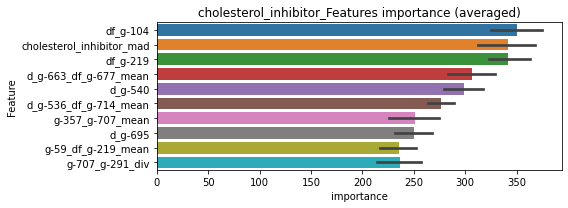

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122276	valid_1's binary_logloss: 0.042203
[600]	training's binary_logloss: 0.00163524	valid_1's binary_logloss: 0.0244654
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00112142	valid_1's binary_logloss: 0.0227281


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119628	valid_1's binary_logloss: 0.0454406
[600]	training's binary_logloss: 0.00157627	valid_1's binary_logloss: 0.0299374
[900]	training's binary_logloss: 0.000710993	valid_1's binary_logloss: 0.0285814
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000713439	valid_1's binary_logloss: 0.0285579


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126792	valid_1's binary_logloss: 0.032448
[600]	training's binary_logloss: 0.00168612	valid_1's binary_logloss: 0.0110645
[900]	training's binary_logloss: 0.000735953	valid_1's binary_logloss: 0.00798242
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000616541	valid_1's binary_logloss: 0.00767604


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133464	valid_1's binary_logloss: 0.0353612
[600]	training's binary_logloss: 0.00172749	valid_1's binary_logloss: 0.0134058
[900]	training's binary_logloss: 0.000745764	valid_1's binary_logloss: 0.0103385
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000658837	valid_1's binary_logloss: 0.0100937


cholesterol_inhibitor logloss: 0.01727178110867605


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205456	valid_1's binary_logloss: 0.0908606
[600]	training's binary_logloss: 0.00287719	valid_1's binary_logloss: 0.0633197
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00133627	valid_1's binary_logloss: 0.0597729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201686	valid_1's binary_logloss: 0.0776052
[600]	training's binary_logloss: 0.00274185	valid_1's binary_logloss: 0.0524306
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00139861	valid_1's binary_logloss: 0.0504039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212195	valid_1's binary_logloss: 0.0601127
[600]	training's binary_logloss: 0.00290445	valid_1's binary_logloss: 0.0278134
[900]	training's binary_logloss: 0.00111877	valid_1's binary_logloss: 0.0212134
Early stopping, best iteration

1 / 3 AUC score:0.995
y_Threshold: 0.0198257, Threshold: 0.0722100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.05055, conf_1:0.09387
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0722100
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.1222100
threshold: 0.1222100, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172365	valid_1's binary_logloss: 0.0635952
[600]	training's binary_logloss: 0.00233479	valid_1's binary_logloss: 0.0377081
[900]	training's binary_logloss: 0.000953051	valid_1's binary_logloss: 0.0337767
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000895745	valid_1's binary_logloss: 0.0335993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161787	valid_1's binary_logloss: 0.0658718
[600]	training's binary_logloss: 0.00222934	valid_1's binary_logloss: 0.0328046
[900]	training's binary_logloss: 0.000936462	valid_1's binary_logloss: 0.0258567
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000949141	valid_1's binary_logloss: 0.02585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170217	valid_1's binary_logloss: 0.0572858
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.1197136, Threshold: 0.1222100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0183325 Vs.target_rate: 0.00227, Num_p_label: 73.0, conf_0:0.09777, conf_1:0.14665
Num_p_label: 73.0, Expected: 9.0, Adj_threshold_1: 0.1222100
Num_p_label: 51.0, Expected: 9.0, Adj_threshold_2: 0.1722100
Num_p_label: 35.0, Expected: 9.0, Adj_threshold_3: 0.2222100
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_4: 0.2722100
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_5: 0.3222100
Num_p_label: 18.0, Expected: 9.0, Adj_threshold_6: 0.3722100
threshold: 0.3722100, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3769, y_label_rate: 0.1692757
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156673	valid_1's binary_logloss: 0.0565696
[600]	training's binary_logloss: 0.00220678	valid_1's binary_logloss: 0.0268623
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00101535	valid_1's binary_logloss: 0.0225322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157	valid_1's binary_logloss: 0.0576807
[600]	training's binary_logloss: 0.00217534	valid_1's binary_logloss: 0.0278069
[900]	training's binary_logloss: 0.000917655	valid_1's binary_logloss: 0.0229541
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.0009058	valid_1's binary_logloss: 0.0229346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160454	valid_1's binary_logloss: 0.0405958
[600]	training's binary_logloss: 0.00223995	valid_1's binary_logloss: 0.013719
[900]	training's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0871577, Threshold: 0.3722100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 629.0/3751
p_label_rate: 0.0055249 Vs.target_rate: 0.00227, Num_p_label: 22.0, conf_0:0.33499, conf_1:0.40943
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_1: 0.3722100
threshold: 0.3722100, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 629.0/3751, y_label_rate: 0.1676886


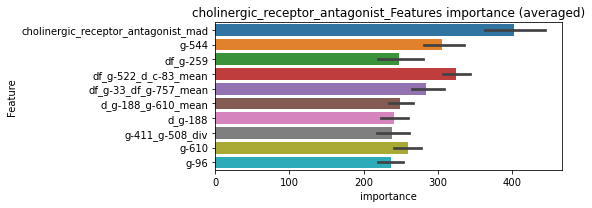

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146169	valid_1's binary_logloss: 0.0724153
[600]	training's binary_logloss: 0.00202936	valid_1's binary_logloss: 0.0463614
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000925097	valid_1's binary_logloss: 0.0439282


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150611	valid_1's binary_logloss: 0.0637746
[600]	training's binary_logloss: 0.00208415	valid_1's binary_logloss: 0.0397973
[900]	training's binary_logloss: 0.000879873	valid_1's binary_logloss: 0.0365301
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000739842	valid_1's binary_logloss: 0.0361214


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014841	valid_1's binary_logloss: 0.0439858
[600]	training's binary_logloss: 0.002059	valid_1's binary_logloss: 0.0216475
[900]	training's binary_logloss: 0.000870721	valid_1's binary_logloss: 0.0182591
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.00069988	valid_1's binary_logloss: 0.0173129


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150711	valid_1's binary_logloss: 0.0494685
[600]	training's binary_logloss: 0.00207148	valid_1's binary_logloss: 0.0248462
[900]	training's binary_logloss: 0.000883479	valid_1's binary_logloss: 0.0219519
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000715311	valid_1's binary_logloss: 0.0213463


cholinergic_receptor_antagonist logloss: 0.029679413676949068


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955406	valid_1's binary_logloss: 0.0180611
[600]	training's binary_logloss: 0.00114776	valid_1's binary_logloss: 0.00473723
[900]	training's binary_logloss: 0.000549848	valid_1's binary_logloss: 0.00331578
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000513213	valid_1's binary_logloss: 0.00325211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931503	valid_1's binary_logloss: 0.018123
[600]	training's binary_logloss: 0.00114439	valid_1's binary_logloss: 0.00512653
[900]	training's binary_logloss: 0.000544382	valid_1's binary_logloss: 0.0036053
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000520755	valid_1's binary_logloss: 0.00352821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00880688	valid_1's binary_logloss: 0.0258339
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0073457, Threshold: 0.0273493, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01914, conf_1:0.03555
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0273493
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_2: 0.0773493
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.1273493
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_4: 0.1773493
threshold: 0.1773493, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811749	valid_1's binary_logloss: 0.0151132
[600]	training's binary_logloss: 0.00101513	valid_1's binary_logloss: 0.00346757
[900]	training's binary_logloss: 0.000503948	valid_1's binary_logloss: 0.00227517
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000475107	valid_1's binary_logloss: 0.00218715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776169	valid_1's binary_logloss: 0.0158617
[600]	training's binary_logloss: 0.000994398	valid_1's binary_logloss: 0.00362934
[900]	training's binary_logloss: 0.000499847	valid_1's binary_logloss: 0.00228424
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000472441	valid_1's binary_logloss: 0.00221822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00767355	valid_1's binary_logloss: 0.0215326
[600]	training'

2 / 3 AUC score:1.000
y_Threshold: 0.0755111, Threshold: 0.1773493, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00101, Num_p_label: 22.0, conf_0:0.14188, conf_1:0.21282
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_1: 0.1773493
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.2273493
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.2773493
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.3273493
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.3773493
threshold: 0.3773493, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782449	valid_1's binary_logloss: 0.0150253
[600]	training's binary_logloss: 0.00100754	valid_1's binary_logloss: 0.00343793
[900]	training's binary_logloss: 0.000496946	valid_1's binary_logloss: 0.00212824
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000466564	valid_1's binary_logloss: 0.0020633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00781532	valid_1's binary_logloss: 0.0174408
[600]	training's binary_logloss: 0.00098451	valid_1's binary_logloss: 0.00604078
[900]	training's binary_logloss: 0.000493492	valid_1's binary_logloss: 0.00491879
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000470647	valid_1's binary_logloss: 0.00484508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725729	valid_1's binary_logloss: 0.0192802
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0534343, Threshold: 0.3773493, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.33961, conf_1:0.41508
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.3773493
threshold: 0.3773493, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


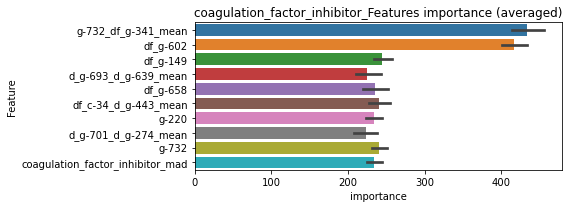

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00765399	valid_1's binary_logloss: 0.0150644
[600]	training's binary_logloss: 0.000992423	valid_1's binary_logloss: 0.0034183
[900]	training's binary_logloss: 0.000493512	valid_1's binary_logloss: 0.00210838
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000467073	valid_1's binary_logloss: 0.00205142


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771603	valid_1's binary_logloss: 0.0178294
[600]	training's binary_logloss: 0.000986379	valid_1's binary_logloss: 0.00695199
[900]	training's binary_logloss: 0.000498071	valid_1's binary_logloss: 0.00595256
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000484106	valid_1's binary_logloss: 0.00590356


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00763824	valid_1's binary_logloss: 0.0216611
[600]	training's binary_logloss: 0.000980588	valid_1's binary_logloss: 0.00708351
[900]	training's binary_logloss: 0.000489359	valid_1's binary_logloss: 0.00547419
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000486059	valid_1's binary_logloss: 0.0054464


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076958	valid_1's binary_logloss: 0.0190073
[600]	training's binary_logloss: 0.00098965	valid_1's binary_logloss: 0.00713084
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000662661	valid_1's binary_logloss: 0.00597585


coagulation_factor_inhibitor logloss: 0.004844859275786118


neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133084	valid_1's binary_logloss: 0.0439639
[600]	training's binary_logloss: 0.00173852	valid_1's binary_logloss: 0.0200345
[900]	training's binary_logloss: 0.000735751	valid_1's binary_logloss: 0.0165316
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000702314	valid_1's binary_logloss: 0.0164097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134734	valid_1's binary_logloss: 0.0369679
[600]	training's binary_logloss: 0.00175016	valid_1's binary_logloss: 0.0139256
[900]	training's binary_logloss: 0.000731346	valid_1's binary_logloss: 0.0102874
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000601923	valid_1's binary_logloss: 0.00970595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124217	valid_1's binary_logloss: 0.0509034
[600]	training's binary_

1 / 3 AUC score:0.999
y_Threshold: 0.0128574, Threshold: 0.0820080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.05741, conf_1:0.10661
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0820080
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_2: 0.1320080
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.1820080
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_4: 0.2320080
threshold: 0.2320080, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111125	valid_1's binary_logloss: 0.0276762
[600]	training's binary_logloss: 0.00145993	valid_1's binary_logloss: 0.00762212
[900]	training's binary_logloss: 0.000640871	valid_1's binary_logloss: 0.00469206
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000564534	valid_1's binary_logloss: 0.00446907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108312	valid_1's binary_logloss: 0.0356242
[600]	training's binary_logloss: 0.00142003	valid_1's binary_logloss: 0.0157338
[900]	training's binary_logloss: 0.000629338	valid_1's binary_logloss: 0.012887
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000565885	valid_1's binary_logloss: 0.0124453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106285	valid_1's binary_logloss: 0.0435215
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.1149158, Threshold: 0.2320080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0133099 Vs.target_rate: 0.00151, Num_p_label: 53.0, conf_0:0.18561, conf_1:0.27841
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_1: 0.2320080
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_2: 0.2820080
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_3: 0.3320080
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.3820080
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_5: 0.4320080
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_6: 0.4820080
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_7: 0.5320080
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_8: 0.5820080
threshold: 0.5820080, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102435	valid_1's binary_logloss: 0.0360335
[600]	training's binary_logloss: 0.00135651	valid_1's binary_logloss: 0.0187213
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000654416	valid_1's binary_logloss: 0.0169208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106431	valid_1's binary_logloss: 0.0291035
[600]	training's binary_logloss: 0.00138642	valid_1's binary_logloss: 0.00964316
[900]	training's binary_logloss: 0.000617906	valid_1's binary_logloss: 0.00643862
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000572765	valid_1's binary_logloss: 0.00629794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103649	valid_1's binary_logloss: 0.0336459
[600]	training's binary_logloss: 0.00134123	valid_1's binary_logloss: 0.0151882
[900]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1284490, Threshold: 0.5820080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00151, Num_p_label: 17.0, conf_0:0.50000, conf_1:0.64021
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.5820080
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.6320080
threshold: 0.6320080, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3786, y_label_rate: 0.1703645


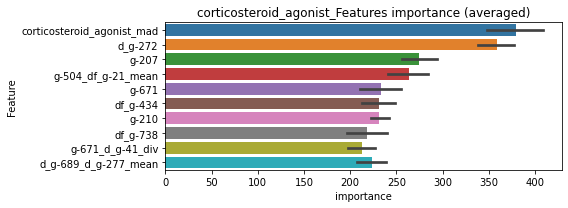

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993377	valid_1's binary_logloss: 0.0347076
[600]	training's binary_logloss: 0.00130037	valid_1's binary_logloss: 0.0165652
[900]	training's binary_logloss: 0.000589607	valid_1's binary_logloss: 0.0141353
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000580145	valid_1's binary_logloss: 0.0141072


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010178	valid_1's binary_logloss: 0.0258221
[600]	training's binary_logloss: 0.00131518	valid_1's binary_logloss: 0.00753632
[900]	training's binary_logloss: 0.000593628	valid_1's binary_logloss: 0.00522843
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000538261	valid_1's binary_logloss: 0.00505473


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103348	valid_1's binary_logloss: 0.0292173
[600]	training's binary_logloss: 0.00132263	valid_1's binary_logloss: 0.0100895
[900]	training's binary_logloss: 0.000599527	valid_1's binary_logloss: 0.00735711
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000570923	valid_1's binary_logloss: 0.00724127


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102597	valid_1's binary_logloss: 0.0275784
[600]	training's binary_logloss: 0.00134594	valid_1's binary_logloss: 0.00805412
[900]	training's binary_logloss: 0.000611294	valid_1's binary_logloss: 0.00546674
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000540759	valid_1's binary_logloss: 0.00516486


corticosteroid_agonist logloss: 0.007896437574947218


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.121801	valid_1's binary_logloss: 0.391802
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.134121	valid_1's binary_logloss: 0.391532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.12206	valid_1's binary_logloss: 0.395919
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.102393	valid_1's binary_logloss: 0.392407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.123705	valid_1's binary_logloss: 0.383739
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.115024	valid_1's binary_logloss: 0.382674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.122449	valid_1's binary_logloss: 0.383366


1 / 3 AUC score:0.724
y_Threshold: 0.1547683, Threshold: 0.4795640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 752 → Positive_corect_labels: 336/3130
p_label_rate: 0.0100452 Vs.target_rate: 0.01827, Num_p_label: 40.0, conf_0:0.33569, conf_1:0.62343
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.4795640
Num_p_label: 56.0, Expected: 72.7, Adj_threshold_2: 0.4495640
threshold: 0.4495640, positive_p_label: 56.0/3982, p_label_rate: 0.0140633


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.113405	valid_1's binary_logloss: 0.382725


positive_y_label: 336.0/3130, y_label_rate: 0.1073482
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260712	valid_1's binary_logloss: 0.181585
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0208023	valid_1's binary_logloss: 0.180716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278821	valid_1's binary_logloss: 0.196648
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0238186	valid_1's binary_logloss: 0.195717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289965	valid_1's binary_logloss: 0.152776
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0124324	valid_1's binary_logloss: 0.146036
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284414	valid_1's binary_logloss: 0.172548
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0181604	valid_1's binary_logloss: 0

2 / 3 AUC score:0.939
y_Threshold: 0.0980159, Threshold: 0.4495640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 252.0/2962
p_label_rate: 0.0441989 Vs.target_rate: 0.01827, Num_p_label: 176.0, conf_0:0.35965, conf_1:0.53948
Num_p_label: 176.0, Expected: 72.7, Adj_threshold_1: 0.4495640
Num_p_label: 149.0, Expected: 72.7, Adj_threshold_2: 0.4995640
Num_p_label: 133.0, Expected: 72.7, Adj_threshold_3: 0.5495640
Num_p_label: 122.0, Expected: 72.7, Adj_threshold_4: 0.5995640
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_5: 0.6495640
threshold: 0.6495640, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 252.0/2962, y_label_rate: 0.0850777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119718	valid_1's binary_logloss: 0.145575
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.01462	valid_1's binary_logloss: 0.143983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122305	valid_1's binary_logloss: 0.122642
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00963481	valid_1's binary_logloss: 0.122027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119009	valid_1's binary_logloss: 0.133564
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0148323	valid_1's binary_logloss: 0.132054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013378	valid_1's binary_logloss: 0.0851503
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.0035586	valid_1's binary_logloss: 0.

3 / 3 AUC score:0.952
y_Threshold: 0.0713383, Threshold: 0.6495640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 203.0/2864
p_label_rate: 0.0439478 Vs.target_rate: 0.01827, Num_p_label: 175.0, conf_0:0.50000, conf_1:0.71452
Num_p_label: 175.0, Expected: 72.7, Adj_threshold_1: 0.6495640
Num_p_label: 159.0, Expected: 72.7, Adj_threshold_2: 0.6995640
Num_p_label: 139.0, Expected: 72.7, Adj_threshold_3: 0.7495640
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_4: 0.7995640
threshold: 0.7995640, positive_p_label: 120.0/3982, p_label_rate: 0.0301356
positive_y_label: 203.0/2864, y_label_rate: 0.0708799


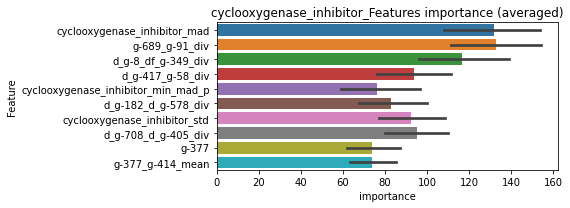

len(train_index) : 2148
len(valid_index) : 716
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2148
len(valid_index) : 716
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[189]	training's binary_logloss: 0.0175032	valid_1's binary_logloss: 0.0896693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635444	valid_1's binary_logloss: 0.0721583


len(train_index) : 2148
len(valid_index) : 716
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00511521	valid_1's binary_logloss: 0.0711112
Training until validation scores don't improve for 30 rounds


len(train_index) : 2148
len(valid_index) : 716
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00902102	valid_1's binary_logloss: 0.0903194
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.08411066469366789


Early stopping, best iteration is:
[225]	training's binary_logloss: 0.0124765	valid_1's binary_logloss: 0.0853428
neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0353072	valid_1's binary_logloss: 0.146872
[600]	training's binary_logloss: 0.00612002	valid_1's binary_logloss: 0.11404
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00550789	valid_1's binary_logloss: 0.113257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0341284	valid_1's binary_logloss: 0.136312
[600]	training's binary_logloss: 0.00599161	valid_1's binary_logloss: 0.106122
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.0028317	valid_1's binary_logloss: 0.102339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382912	valid_1's binary_logloss: 0.130864
[600]	training's binary_logloss: 0.00657598	valid_1's binary_logloss: 0.0903306
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00259736	valid_1's binary_logloss: 0.0828203
Trai

1 / 3 AUC score:0.982
y_Threshold: 0.0497023, Threshold: 0.2862834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 623/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00437, Num_p_label: 40.0, conf_0:0.20040, conf_1:0.37217
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.2862834
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_2: 0.3362834
Num_p_label: 24.0, Expected: 17.4, Adj_threshold_3: 0.3862834
threshold: 0.3862834, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3733, y_label_rate: 0.1668899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257559	valid_1's binary_logloss: 0.0891041
[600]	training's binary_logloss: 0.00398711	valid_1's binary_logloss: 0.0579938
[900]	training's binary_logloss: 0.00146353	valid_1's binary_logloss: 0.0530911
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00149816	valid_1's binary_logloss: 0.0529662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237016	valid_1's binary_logloss: 0.108852
[600]	training's binary_logloss: 0.00372175	valid_1's binary_logloss: 0.0797931
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00157499	valid_1's binary_logloss: 0.0757541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0247507	valid_1's binary_logloss: 0.0941945
[600]	training's binary_logloss: 0.00390994	valid_1's binary_logloss: 0.0651056
[900]	training's binary_logloss

2 / 3 AUC score:0.994
y_Threshold: 0.1209939, Threshold: 0.3862834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 590.0/3667
p_label_rate: 0.0215972 Vs.target_rate: 0.00437, Num_p_label: 86.0, conf_0:0.30903, conf_1:0.46354
Num_p_label: 86.0, Expected: 17.4, Adj_threshold_1: 0.3862834
Num_p_label: 72.0, Expected: 17.4, Adj_threshold_2: 0.4362834
Num_p_label: 65.0, Expected: 17.4, Adj_threshold_3: 0.4862834
Num_p_label: 57.0, Expected: 17.4, Adj_threshold_4: 0.5362834
Num_p_label: 55.0, Expected: 17.4, Adj_threshold_5: 0.5862834
Num_p_label: 50.0, Expected: 17.4, Adj_threshold_6: 0.6362834
Num_p_label: 47.0, Expected: 17.4, Adj_threshold_7: 0.6862834
Num_p_label: 38.0, Expected: 17.4, Adj_threshold_8: 0.7362834
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_9: 0.7862834
threshold: 0.7862834, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 590.0/3667, y_label_rate: 0.1608945
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019671	valid_1's binary_logloss: 0.0868722
[600]	training's binary_logloss: 0.0029192	valid_1's binary_logloss: 0.0637336
[900]	training's binary_logloss: 0.00115958	valid_1's binary_logloss: 0.0606199
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00123079	valid_1's binary_logloss: 0.0605553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207983	valid_1's binary_logloss: 0.0837338
[600]	training's binary_logloss: 0.00310415	valid_1's binary_logloss: 0.055746
[900]	training's binary_logloss: 0.00120995	valid_1's binary_logloss: 0.0517347
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.0012373	valid_1's binary_logloss: 0.0516063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187307	valid_1's binary_logloss: 0.0919626
[600]	training's binary_logloss: 0

3 / 3 AUC score:0.996
y_Threshold: 0.1047576, Threshold: 0.7862834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 560.0/3607
p_label_rate: 0.0138122 Vs.target_rate: 0.00437, Num_p_label: 55.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 55.0, Expected: 17.4, Adj_threshold_1: 0.7862834
threshold: 0.7862834, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 560.0/3607, y_label_rate: 0.1552537


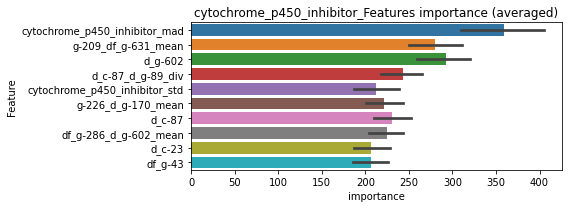

len(train_index) : 2705
len(valid_index) : 902
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154595	valid_1's binary_logloss: 0.0783805
[600]	training's binary_logloss: 0.00230337	valid_1's binary_logloss: 0.0552455
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00158344	valid_1's binary_logloss: 0.054108


len(train_index) : 2705
len(valid_index) : 902
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148986	valid_1's binary_logloss: 0.057015
[600]	training's binary_logloss: 0.00225226	valid_1's binary_logloss: 0.0315233
[900]	training's binary_logloss: 0.000979574	valid_1's binary_logloss: 0.026559
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000835971	valid_1's binary_logloss: 0.0260711


len(train_index) : 2705
len(valid_index) : 902
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151277	valid_1's binary_logloss: 0.0571538
[600]	training's binary_logloss: 0.002286	valid_1's binary_logloss: 0.0350774
[900]	training's binary_logloss: 0.000987839	valid_1's binary_logloss: 0.0312206
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00099999	valid_1's binary_logloss: 0.03113


len(train_index) : 2706
len(valid_index) : 901
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156958	valid_1's binary_logloss: 0.0846302
[600]	training's binary_logloss: 0.00232405	valid_1's binary_logloss: 0.0631228
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00116514	valid_1's binary_logloss: 0.0609366


cytochrome_p450_inhibitor logloss: 0.04305647590524569


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142731	valid_1's binary_logloss: 0.0448889
[600]	training's binary_logloss: 0.00187404	valid_1's binary_logloss: 0.0238185
[900]	training's binary_logloss: 0.000809158	valid_1's binary_logloss: 0.0205237
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000666137	valid_1's binary_logloss: 0.0198818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142518	valid_1's binary_logloss: 0.0396397
[600]	training's binary_logloss: 0.00187195	valid_1's binary_logloss: 0.0177937
[900]	training's binary_logloss: 0.000798369	valid_1's binary_logloss: 0.0148361
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000658724	valid_1's binary_logloss: 0.014397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141214	valid_1's binary_logloss: 0.0429124
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0134347, Threshold: 0.0688365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04819, conf_1:0.08949
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0688365
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.1188365
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1688365
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.2188365
threshold: 0.2188365, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012212	valid_1's binary_logloss: 0.0369389
[600]	training's binary_logloss: 0.00158704	valid_1's binary_logloss: 0.0163808
[900]	training's binary_logloss: 0.000703284	valid_1's binary_logloss: 0.0135143
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000670114	valid_1's binary_logloss: 0.0134204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117257	valid_1's binary_logloss: 0.0328432
[600]	training's binary_logloss: 0.00158417	valid_1's binary_logloss: 0.0118792
[900]	training's binary_logloss: 0.000703342	valid_1's binary_logloss: 0.00875038
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000609898	valid_1's binary_logloss: 0.00834576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120881	valid_1's binary_logloss: 0.0367162
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0999481, Threshold: 0.2188365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0110497 Vs.target_rate: 0.00151, Num_p_label: 44.0, conf_0:0.17507, conf_1:0.26260
Num_p_label: 44.0, Expected: 6.0, Adj_threshold_1: 0.2188365
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.2688365
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_3: 0.3188365
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_4: 0.3688365
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_5: 0.4188365
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_6: 0.4688365
threshold: 0.4688365, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117003	valid_1's binary_logloss: 0.0464681
[600]	training's binary_logloss: 0.00153174	valid_1's binary_logloss: 0.0235319
[900]	training's binary_logloss: 0.000682912	valid_1's binary_logloss: 0.0196833
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000630478	valid_1's binary_logloss: 0.0195204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116446	valid_1's binary_logloss: 0.0258293
[600]	training's binary_logloss: 0.00157179	valid_1's binary_logloss: 0.00869408
[900]	training's binary_logloss: 0.000701364	valid_1's binary_logloss: 0.00623241
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000598975	valid_1's binary_logloss: 0.00590305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113575	valid_1's binary_logloss: 0.0391238
[600]	training's binar

3 / 3 AUC score:0.999
y_Threshold: 0.1017384, Threshold: 0.4688365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0042692 Vs.target_rate: 0.00151, Num_p_label: 17.0, conf_0:0.42195, conf_1:0.51572
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.4688365
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.5188365
threshold: 0.5188365, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 642.0/3777, y_label_rate: 0.1699762


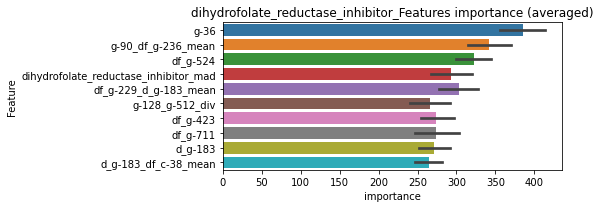

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100254	valid_1's binary_logloss: 0.0420641
[600]	training's binary_logloss: 0.00137892	valid_1's binary_logloss: 0.0271989
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000679942	valid_1's binary_logloss: 0.0259798


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108882	valid_1's binary_logloss: 0.0336554
[600]	training's binary_logloss: 0.00144411	valid_1's binary_logloss: 0.0160847
[900]	training's binary_logloss: 0.000659115	valid_1's binary_logloss: 0.0139093
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000628788	valid_1's binary_logloss: 0.0138326


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109429	valid_1's binary_logloss: 0.0317625
[600]	training's binary_logloss: 0.00148512	valid_1's binary_logloss: 0.013188
[900]	training's binary_logloss: 0.000672109	valid_1's binary_logloss: 0.00986039
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000661582	valid_1's binary_logloss: 0.00979372


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115482	valid_1's binary_logloss: 0.0259983
[600]	training's binary_logloss: 0.00151456	valid_1's binary_logloss: 0.00891686
[900]	training's binary_logloss: 0.000676179	valid_1's binary_logloss: 0.00662138
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000597869	valid_1's binary_logloss: 0.00637154


dihydrofolate_reductase_inhibitor logloss: 0.014001553922093408


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748001	valid_1's binary_logloss: 0.0168952
[600]	training's binary_logloss: 0.000993392	valid_1's binary_logloss: 0.00450579
[900]	training's binary_logloss: 0.000507148	valid_1's binary_logloss: 0.00311285
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.00048795	valid_1's binary_logloss: 0.00303693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692372	valid_1's binary_logloss: 0.019743
[600]	training's binary_logloss: 0.00094996	valid_1's binary_logloss: 0.00867526
[900]	training's binary_logloss: 0.000498714	valid_1's binary_logloss: 0.00763794
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000502015	valid_1's binary_logloss: 0.00761463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744355	valid_1's binary_logloss: 0.0152454
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0050293, Threshold: 0.0251511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.01761, conf_1:0.03270
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0251511
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0751511
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_3: 0.1251511
threshold: 0.1251511, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670335	valid_1's binary_logloss: 0.0149253
[600]	training's binary_logloss: 0.000900955	valid_1's binary_logloss: 0.0035388
[900]	training's binary_logloss: 0.000468646	valid_1's binary_logloss: 0.00230722
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.00044484	valid_1's binary_logloss: 0.00225106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653997	valid_1's binary_logloss: 0.0163576
[600]	training's binary_logloss: 0.00087515	valid_1's binary_logloss: 0.00637075
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000479538	valid_1's binary_logloss: 0.00534411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672822	valid_1's binary_logloss: 0.0125691
[600]	training's binary_logloss: 0.000896029	valid_1's binary_logloss: 0.00279389
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0433926, Threshold: 0.1251511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0062783 Vs.target_rate: 0.00105, Num_p_label: 25.0, conf_0:0.10012, conf_1:0.15018
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_1: 0.1251511
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.1751511
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_3: 0.2251511
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_4: 0.2751511
threshold: 0.2751511, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670335	valid_1's binary_logloss: 0.0149253
[600]	training's binary_logloss: 0.000900955	valid_1's binary_logloss: 0.0035388
[900]	training's binary_logloss: 0.000468646	valid_1's binary_logloss: 0.00230722
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.00044484	valid_1's binary_logloss: 0.00225106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653997	valid_1's binary_logloss: 0.0163576
[600]	training's binary_logloss: 0.00087515	valid_1's binary_logloss: 0.00637075
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000479538	valid_1's binary_logloss: 0.00534411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672822	valid_1's binary_logloss: 0.0125691
[600]	training's binary_logloss: 0.000896029	valid_1's binary_logloss: 0.00279389
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0433926, Threshold: 0.2751511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.24764, conf_1:0.30267
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.2751511
threshold: 0.2751511, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


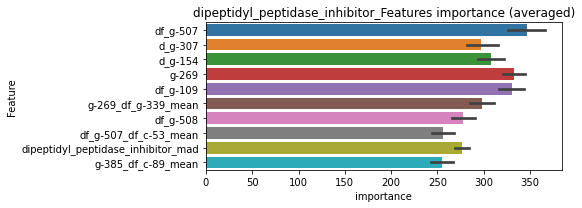

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00691663	valid_1's binary_logloss: 0.0149302
[600]	training's binary_logloss: 0.000904263	valid_1's binary_logloss: 0.0033995
[900]	training's binary_logloss: 0.000465581	valid_1's binary_logloss: 0.00217932
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000458879	valid_1's binary_logloss: 0.00215944


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678136	valid_1's binary_logloss: 0.0167706
[600]	training's binary_logloss: 0.000882968	valid_1's binary_logloss: 0.00667303
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000532291	valid_1's binary_logloss: 0.00572382


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00662955	valid_1's binary_logloss: 0.0124718
[600]	training's binary_logloss: 0.000886215	valid_1's binary_logloss: 0.00279788
[900]	training's binary_logloss: 0.000470652	valid_1's binary_logloss: 0.00190528
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000450671	valid_1's binary_logloss: 0.00187692


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686463	valid_1's binary_logloss: 0.0155448
[600]	training's binary_logloss: 0.000896095	valid_1's binary_logloss: 0.0040331
[900]	training's binary_logloss: 0.000473612	valid_1's binary_logloss: 0.00283247
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000473624	valid_1's binary_logloss: 0.00283239


dipeptidyl_peptidase_inhibitor logloss: 0.003148756690254721


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246615	valid_1's binary_logloss: 0.00878646
[600]	training's binary_logloss: 0.000336902	valid_1's binary_logloss: 0.0047303
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000259696	valid_1's binary_logloss: 0.00446112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261226	valid_1's binary_logloss: 0.00421249
[600]	training's binary_logloss: 0.000344475	valid_1's binary_logloss: 0.000801396
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000270292	valid_1's binary_logloss: 0.000670294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259972	valid_1's binary_logloss: 0.00288544
[600]	training's binary_logloss: 0.000355894	valid_1's binary_logloss: 0.000460557
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000264765	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0011214, Threshold: 0.0050526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00354, conf_1:0.00657
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0050526
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0550526
threshold: 0.0550526, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223144	valid_1's binary_logloss: 0.00380324
[600]	training's binary_logloss: 0.000308838	valid_1's binary_logloss: 0.000830963
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000252665	valid_1's binary_logloss: 0.000719219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224278	valid_1's binary_logloss: 0.00432014
[600]	training's binary_logloss: 0.000310703	valid_1's binary_logloss: 0.00123371
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000249906	valid_1's binary_logloss: 0.00112428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226412	valid_1's binary_logloss: 0.00262656
[600]	training's binary_logloss: 0.000315046	valid_1's binary_logloss: 0.000412072
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000243267	valid_1's b

2 / 3 AUC score:1.000
y_Threshold: 0.1074860, Threshold: 0.0550526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025, Num_p_label: 11.0, conf_0:0.04404, conf_1:0.06606
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0550526
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.1050526
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1550526
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.2050526
threshold: 0.2050526, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223144	valid_1's binary_logloss: 0.00380324
[600]	training's binary_logloss: 0.000308838	valid_1's binary_logloss: 0.000830963
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000252665	valid_1's binary_logloss: 0.000719219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224278	valid_1's binary_logloss: 0.00432014
[600]	training's binary_logloss: 0.000310703	valid_1's binary_logloss: 0.00123371
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000249906	valid_1's binary_logloss: 0.00112428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226412	valid_1's binary_logloss: 0.00262656
[600]	training's binary_logloss: 0.000315046	valid_1's binary_logloss: 0.000412072
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000243267	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.1074860, Threshold: 0.2050526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00025007	valid_1's binary_logloss: 0.000389144


p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.18455, conf_1:0.22556
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2050526
threshold: 0.2050526, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


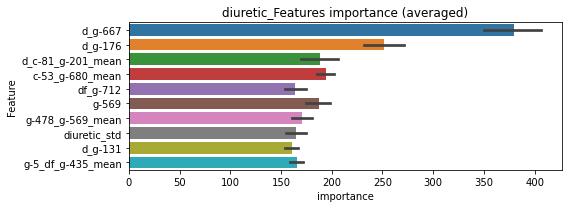

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002264	valid_1's binary_logloss: 0.00444254
[600]	training's binary_logloss: 0.000313428	valid_1's binary_logloss: 0.00106777


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000249901	valid_1's binary_logloss: 0.000930964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233908	valid_1's binary_logloss: 0.00492519
[600]	training's binary_logloss: 0.000308114	valid_1's binary_logloss: 0.00129171
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000241017	valid_1's binary_logloss: 0.00110808


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226497	valid_1's binary_logloss: 0.00261099
[600]	training's binary_logloss: 0.000311538	valid_1's binary_logloss: 0.000406136
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000247837	valid_1's binary_logloss: 0.000327517


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227784	valid_1's binary_logloss: 0.00288179
[600]	training's binary_logloss: 0.000314342	valid_1's binary_logloss: 0.000465262
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000250615	valid_1's binary_logloss: 0.00037823


diuretic logloss: 0.0006862625155891151


neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155557	valid_1's binary_logloss: 0.0472006
[600]	training's binary_logloss: 0.00206088	valid_1's binary_logloss: 0.0216359
[900]	training's binary_logloss: 0.000847258	valid_1's binary_logloss: 0.01737
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.00089154	valid_1's binary_logloss: 0.0173154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156786	valid_1's binary_logloss: 0.0580266
[600]	training's binary_logloss: 0.00203856	valid_1's binary_logloss: 0.0304866
[900]	training's binary_logloss: 0.000843768	valid_1's binary_logloss: 0.0258696
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.00071755	valid_1's binary_logloss: 0.0253595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014877	valid_1's binary_logloss: 0.0426918
[600]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0154585, Threshold: 0.1729333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.12105, conf_1:0.22481
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1729333
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.2229333
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.2729333
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_4: 0.3229333
threshold: 0.3229333, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125499	valid_1's binary_logloss: 0.0412211
[600]	training's binary_logloss: 0.00166799	valid_1's binary_logloss: 0.0168654
[900]	training's binary_logloss: 0.000723332	valid_1's binary_logloss: 0.0128948
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000639066	valid_1's binary_logloss: 0.0124683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124274	valid_1's binary_logloss: 0.0353885
[600]	training's binary_logloss: 0.00166624	valid_1's binary_logloss: 0.0158135
[900]	training's binary_logloss: 0.000733248	valid_1's binary_logloss: 0.0131878
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000649151	valid_1's binary_logloss: 0.0129954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124969	valid_1's binary_logloss: 0.0425752
[600]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0941474, Threshold: 0.3229333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0180814 Vs.target_rate: 0.00202, Num_p_label: 72.0, conf_0:0.25835, conf_1:0.38752
Num_p_label: 72.0, Expected: 8.0, Adj_threshold_1: 0.3229333
Num_p_label: 66.0, Expected: 8.0, Adj_threshold_2: 0.3729333
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_3: 0.4229333
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_4: 0.4729333
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_5: 0.5229333
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_6: 0.5729333
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_7: 0.6229333
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_8: 0.6729333
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_9: 0.7229333
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_10: 0.7729333
threshold: 0.7729333, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119794	valid_1's binary_logloss: 0.0393278
[600]	training's binary_logloss: 0.00158432	valid_1's binary_logloss: 0.0168349
[900]	training's binary_logloss: 0.000700235	valid_1's binary_logloss: 0.0131805
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000651101	valid_1's binary_logloss: 0.0129428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127621	valid_1's binary_logloss: 0.0365137
[600]	training's binary_logloss: 0.00166804	valid_1's binary_logloss: 0.0177601
[900]	training's binary_logloss: 0.000723383	valid_1's binary_logloss: 0.0152009
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00068641	valid_1's binary_logloss: 0.0149503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121507	valid_1's binary_logloss: 0.0424956
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1107511, Threshold: 0.7729333, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3776
p_label_rate: 0.0065294 Vs.target_rate: 0.00202, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_1: 0.7729333
threshold: 0.7729333, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 642.0/3776, y_label_rate: 0.1700212


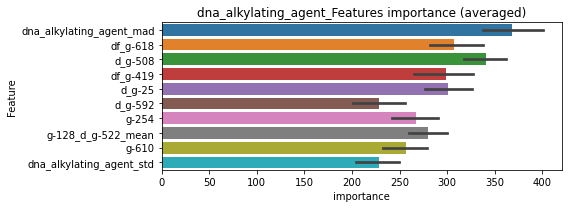

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114648	valid_1's binary_logloss: 0.0388571
[600]	training's binary_logloss: 0.00153619	valid_1's binary_logloss: 0.0174032
[900]	training's binary_logloss: 0.000685303	valid_1's binary_logloss: 0.0142503
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000596241	valid_1's binary_logloss: 0.013906


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012172	valid_1's binary_logloss: 0.0344898
[600]	training's binary_logloss: 0.00161276	valid_1's binary_logloss: 0.0152099
[900]	training's binary_logloss: 0.000702944	valid_1's binary_logloss: 0.0121966
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000590183	valid_1's binary_logloss: 0.0117629


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118656	valid_1's binary_logloss: 0.0339938
[600]	training's binary_logloss: 0.00159478	valid_1's binary_logloss: 0.0155468
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00074853	valid_1's binary_logloss: 0.0129303


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112683	valid_1's binary_logloss: 0.0542302
[600]	training's binary_logloss: 0.00153364	valid_1's binary_logloss: 0.0327578
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000974765	valid_1's binary_logloss: 0.0303216


dna_alkylating_agent logloss: 0.017239972940601145


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.11435	valid_1's binary_logloss: 0.373431
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.122072	valid_1's binary_logloss: 0.372639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.112508	valid_1's binary_logloss: 0.38634
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.120536	valid_1's binary_logloss: 0.385759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.117025	valid_1's binary_logloss: 0.354285
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.108788	valid_1's binary_logloss: 0.353369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.115822	valid_1's binary_logloss: 0.34649


1 / 3 AUC score:0.763
y_Threshold: 0.1537175, Threshold: 0.5304104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 713 → Positive_corect_labels: 358/3184
p_label_rate: 0.0100452 Vs.target_rate: 0.01688, Num_p_label: 40.0, conf_0:0.37129, conf_1:0.68953
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.5304104
Num_p_label: 50.0, Expected: 67.2, Adj_threshold_2: 0.5004104


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.101657	valid_1's binary_logloss: 0.344348


threshold: 0.5004104, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 358.0/3184, y_label_rate: 0.1124372
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245189	valid_1's binary_logloss: 0.172564
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0184664	valid_1's binary_logloss: 0.170596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236589	valid_1's binary_logloss: 0.176862
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0167804	valid_1's binary_logloss: 0.174524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228594	valid_1's binary_logloss: 0.14756
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0143291	valid_1's binary_logloss: 0.144549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232956	valid_1's binary_logloss: 0.190313


2 / 3 AUC score:0.942
y_Threshold: 0.0862082, Threshold: 0.5004104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 276.0/3020
p_label_rate: 0.0336514 Vs.target_rate: 0.01688, Num_p_label: 134.0, conf_0:0.40033, conf_1:0.60049
Num_p_label: 134.0, Expected: 67.2, Adj_threshold_1: 0.5004104
Num_p_label: 118.0, Expected: 67.2, Adj_threshold_2: 0.5504104
Num_p_label: 108.0, Expected: 67.2, Adj_threshold_3: 0.6004104
Num_p_label: 101.0, Expected: 67.2, Adj_threshold_4: 0.6504104
Num_p_label: 85.0, Expected: 67.2, Adj_threshold_5: 0.7004104
threshold: 0.7004104, positive_p_label: 85.0/3982, p_label_rate: 0.0213461


Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0229703	valid_1's binary_logloss: 0.189959


positive_y_label: 276.0/3020, y_label_rate: 0.0913907
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121324	valid_1's binary_logloss: 0.07638
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00281633	valid_1's binary_logloss: 0.0610111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118401	valid_1's binary_logloss: 0.0970397
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00631485	valid_1's binary_logloss: 0.0908548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122239	valid_1's binary_logloss: 0.0786033
[600]	training's binary_logloss: 0.00214691	valid_1's binary_logloss: 0.0641119
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00123841	valid_1's binary_logloss: 0.0619064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010838	valid_1's binary_logloss: 0.11994
Early stopping, best

3 / 3 AUC score:0.987
y_Threshold: 0.0843636, Threshold: 0.7004104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 246.0/2960
p_label_rate: 0.0374184 Vs.target_rate: 0.01688, Num_p_label: 149.0, conf_0:0.50000, conf_1:0.77045
Num_p_label: 149.0, Expected: 67.2, Adj_threshold_1: 0.7004104
Num_p_label: 141.0, Expected: 67.2, Adj_threshold_2: 0.7504104
threshold: 0.7504104, positive_p_label: 141.0/3982, p_label_rate: 0.0354093
positive_y_label: 246.0/2960, y_label_rate: 0.0831081


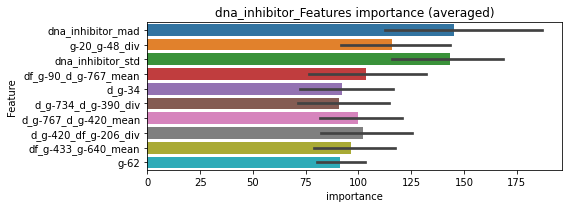

len(train_index) : 2220
len(valid_index) : 740
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0089712	valid_1's binary_logloss: 0.0729001


len(train_index) : 2220
len(valid_index) : 740
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00415033	valid_1's binary_logloss: 0.0680846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831902	valid_1's binary_logloss: 0.0653926
[600]	training's binary_logloss: 0.00157891	valid_1's binary_logloss: 0.0567091
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00141922	valid_1's binary_logloss: 0.0560335


len(train_index) : 2220
len(valid_index) : 740
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834065	valid_1's binary_logloss: 0.080556


len(train_index) : 2220
len(valid_index) : 740
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00367832	valid_1's binary_logloss: 0.0743396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823965	valid_1's binary_logloss: 0.100933


dna_inhibitor logloss: 0.07419094831934518


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00429148	valid_1's binary_logloss: 0.0983062
neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034133	valid_1's binary_logloss: 0.151484
[600]	training's binary_logloss: 0.00610889	valid_1's binary_logloss: 0.130976
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00663072	valid_1's binary_logloss: 0.130514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350055	valid_1's binary_logloss: 0.135356
[600]	training's binary_logloss: 0.00647483	valid_1's binary_logloss: 0.108138
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00572383	valid_1's binary_logloss: 0.107252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0378959	valid_1's binary_logloss: 0.129507
[600]	training's binary_logloss: 0.00695395	valid_1's binary_logloss: 0.098347
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00370623	valid_1's binary_logloss: 0.0952952
Trai

1 / 3 AUC score:0.977
y_Threshold: 0.0484970, Threshold: 0.2264938, pos_neg_ratio: 0.8000000
Remove_noisy_data: 216 → Positive_corect_labels: 612/3710
p_label_rate: 0.0100452 Vs.target_rate: 0.00508, Num_p_label: 40.0, conf_0:0.15855, conf_1:0.29444
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.2264938
Num_p_label: 25.0, Expected: 20.2, Adj_threshold_2: 0.2764938
threshold: 0.2764938, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 612.0/3710, y_label_rate: 0.1649596
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022695	valid_1's binary_logloss: 0.0992527
[600]	training's binary_logloss: 0.00374209	valid_1's binary_logloss: 0.0812567
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00219462	valid_1's binary_logloss: 0.0797849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251414	valid_1's binary_logloss: 0.122659
[600]	training's binary_logloss: 0.00394125	valid_1's binary_logloss: 0.102305
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00388898	valid_1's binary_logloss: 0.102235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240178	valid_1's binary_logloss: 0.0814949
[600]	training's binary_logloss: 0.0039176	valid_1's binary_logloss: 0.0461984
[900]	training's binary_logloss: 0.00149536	valid_1's binary_logloss: 0.0386939
Early stopping, best iteration is:


2 / 3 AUC score:0.995
y_Threshold: 0.0772667, Threshold: 0.2764938, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 575.0/3636
p_label_rate: 0.0253641 Vs.target_rate: 0.00508, Num_p_label: 101.0, conf_0:0.22120, conf_1:0.33179
Num_p_label: 101.0, Expected: 20.2, Adj_threshold_1: 0.2764938
Num_p_label: 85.0, Expected: 20.2, Adj_threshold_2: 0.3264938
Num_p_label: 74.0, Expected: 20.2, Adj_threshold_3: 0.3764938
Num_p_label: 65.0, Expected: 20.2, Adj_threshold_4: 0.4264938
Num_p_label: 61.0, Expected: 20.2, Adj_threshold_5: 0.4764938
Num_p_label: 57.0, Expected: 20.2, Adj_threshold_6: 0.5264938
Num_p_label: 50.0, Expected: 20.2, Adj_threshold_7: 0.5764938
Num_p_label: 38.0, Expected: 20.2, Adj_threshold_8: 0.6264938
Num_p_label: 28.0, Expected: 20.2, Adj_threshold_9: 0.6764938
threshold: 0.6764938, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 575.0/3636, y_label_rate: 0.1581408
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018785	valid_1's binary_logloss: 0.0891602
[600]	training's binary_logloss: 0.00292533	valid_1's binary_logloss: 0.0671916
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00267997	valid_1's binary_logloss: 0.0669696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020319	valid_1's binary_logloss: 0.0785833
[600]	training's binary_logloss: 0.00316304	valid_1's binary_logloss: 0.0515062
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00138163	valid_1's binary_logloss: 0.0464864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198745	valid_1's binary_logloss: 0.0685393
[600]	training's binary_logloss: 0.00309502	valid_1's binary_logloss: 0.0389884
[900]	training's binary_logloss: 0.00123979	valid_1's binary_logloss: 0.033891
Early stopping, best iteration is

3 / 3 AUC score:0.999
y_Threshold: 0.0733483, Threshold: 0.6764938, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 553.0/3592
p_label_rate: 0.0160723 Vs.target_rate: 0.00508, Num_p_label: 64.0, conf_0:0.50000, conf_1:0.74414
Num_p_label: 64.0, Expected: 20.2, Adj_threshold_1: 0.6764938
Num_p_label: 55.0, Expected: 20.2, Adj_threshold_2: 0.7264938
Num_p_label: 50.0, Expected: 20.2, Adj_threshold_3: 0.7764938
threshold: 0.7764938, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 553.0/3592, y_label_rate: 0.1539532


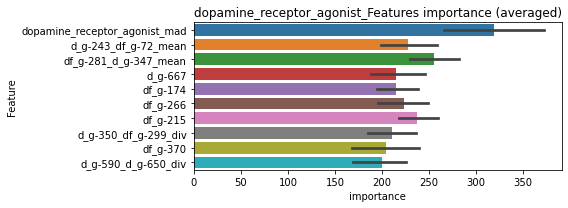

len(train_index) : 2694
len(valid_index) : 898
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167813	valid_1's binary_logloss: 0.0881019
[600]	training's binary_logloss: 0.00256235	valid_1's binary_logloss: 0.0720619
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00286813	valid_1's binary_logloss: 0.071928


len(train_index) : 2694
len(valid_index) : 898
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171368	valid_1's binary_logloss: 0.0759595
[600]	training's binary_logloss: 0.00262168	valid_1's binary_logloss: 0.0572613
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00149015	valid_1's binary_logloss: 0.0552027


len(train_index) : 2694
len(valid_index) : 898
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178949	valid_1's binary_logloss: 0.0573631
[600]	training's binary_logloss: 0.00274744	valid_1's binary_logloss: 0.0364173
[900]	training's binary_logloss: 0.00112869	valid_1's binary_logloss: 0.0331387
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.00111055	valid_1's binary_logloss: 0.0330953


len(train_index) : 2694
len(valid_index) : 898
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168877	valid_1's binary_logloss: 0.0737911
[600]	training's binary_logloss: 0.00268815	valid_1's binary_logloss: 0.0490504
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00194483	valid_1's binary_logloss: 0.047197


dopamine_receptor_agonist logloss: 0.05185574368953465


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.109596	valid_1's binary_logloss: 0.389801
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0972119	valid_1's binary_logloss: 0.388913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.113141	valid_1's binary_logloss: 0.374557
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.125728	valid_1's binary_logloss: 0.374084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.115417	valid_1's binary_logloss: 0.36604
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.11072	valid_1's binary_logloss: 0.364986
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.726
y_Threshold: 0.1596473, Threshold: 0.5336537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 776 → Positive_corect_labels: 323/3101
p_label_rate: 0.0100452 Vs.target_rate: 0.01780, Num_p_label: 40.0, conf_0:0.37356, conf_1:0.69375
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5336537
Num_p_label: 51.0, Expected: 70.9, Adj_threshold_2: 0.5036537
threshold: 0.5036537, positive_p_label: 51.0/3982, p_label_rate: 0.0128076


Early stopping, best iteration is:
[232]	training's binary_logloss: 0.140475	valid_1's binary_logloss: 0.401153


positive_y_label: 323.0/3101, y_label_rate: 0.1041599
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207154	valid_1's binary_logloss: 0.161875
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0160659	valid_1's binary_logloss: 0.160424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211465	valid_1's binary_logloss: 0.111158
[600]	training's binary_logloss: 0.00376766	valid_1's binary_logloss: 0.094428
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00301399	valid_1's binary_logloss: 0.0934891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019727	valid_1's binary_logloss: 0.160598
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.0101585	valid_1's binary_logloss: 0.156989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199107	valid_1's binary_logloss: 0.150384
Early stopping, best iter

2 / 3 AUC score:0.969
y_Threshold: 0.0996982, Threshold: 0.5036537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 255.0/2965
p_label_rate: 0.0384229 Vs.target_rate: 0.01780, Num_p_label: 153.0, conf_0:0.40292, conf_1:0.60438
Num_p_label: 153.0, Expected: 70.9, Adj_threshold_1: 0.5036537
Num_p_label: 138.0, Expected: 70.9, Adj_threshold_2: 0.5536537
Num_p_label: 123.0, Expected: 70.9, Adj_threshold_3: 0.6036537
Num_p_label: 110.0, Expected: 70.9, Adj_threshold_4: 0.6536537
Num_p_label: 99.0, Expected: 70.9, Adj_threshold_5: 0.7036537
threshold: 0.7036537, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 255.0/2965, y_label_rate: 0.0860034
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113064	valid_1's binary_logloss: 0.0955308
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.0105305	valid_1's binary_logloss: 0.094892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[207]	training's binary_logloss: 0.0221278	valid_1's binary_logloss: 0.151118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0149691	valid_1's binary_logloss: 0.0996605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104596	valid_1's binary_logloss: 0.121668


3 / 3 AUC score:0.947
y_Threshold: 0.1033851, Threshold: 0.7036537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 206.0/2867
p_label_rate: 0.0366650 Vs.target_rate: 0.01780, Num_p_label: 146.0, conf_0:0.50000, conf_1:0.77402
Num_p_label: 146.0, Expected: 70.9, Adj_threshold_1: 0.7036537
Num_p_label: 130.0, Expected: 70.9, Adj_threshold_2: 0.7536537
threshold: 0.7536537, positive_p_label: 130.0/3982, p_label_rate: 0.0326469


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00707835	valid_1's binary_logloss: 0.120315


positive_y_label: 206.0/2867, y_label_rate: 0.0718521


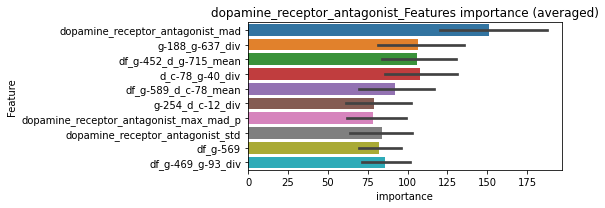

len(train_index) : 2150
len(valid_index) : 717
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521697	valid_1's binary_logloss: 0.0528768


len(train_index) : 2150
len(valid_index) : 717
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00308158	valid_1's binary_logloss: 0.0504738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528208	valid_1's binary_logloss: 0.0568024


len(train_index) : 2150
len(valid_index) : 717
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00161138	valid_1's binary_logloss: 0.0528246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548293	valid_1's binary_logloss: 0.0441979


len(train_index) : 2151
len(valid_index) : 716
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00215986	valid_1's binary_logloss: 0.0385911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00530987	valid_1's binary_logloss: 0.0541416


dopamine_receptor_antagonist logloss: 0.048022344037613005


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00146187	valid_1's binary_logloss: 0.0502029
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0995322	valid_1's binary_logloss: 0.331371
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0567872	valid_1's binary_logloss: 0.323524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0970867	valid_1's binary_logloss: 0.314542
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.0474292	valid_1's binary_logloss: 0.304271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.101029	valid_1's binary_logloss: 0.341244
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.0670205	valid_1's binary_logloss: 0.339349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0976291	valid_1's binary_logloss: 0.342497


1 / 3 AUC score:0.816
y_Threshold: 0.1319053, Threshold: 0.6638252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 590 → Positive_corect_labels: 418/3300
p_label_rate: 0.0100452 Vs.target_rate: 0.01411, Num_p_label: 40.0, conf_0:0.46468, conf_1:0.80000
threshold: 0.6638252, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0842742	valid_1's binary_logloss: 0.341025


positive_y_label: 418.0/3300, y_label_rate: 0.1266667
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02682	valid_1's binary_logloss: 0.164331
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.0111372	valid_1's binary_logloss: 0.153196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0300031	valid_1's binary_logloss: 0.151706
[600]	training's binary_logloss: 0.00533633	valid_1's binary_logloss: 0.139809
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00525879	valid_1's binary_logloss: 0.139667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287013	valid_1's binary_logloss: 0.163711
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.011324	valid_1's binary_logloss: 0.15637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266309	valid_1's binary_logloss: 0.189014


2 / 3 AUC score:0.952
y_Threshold: 0.1010697, Threshold: 0.6638252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 348.0/3160
p_label_rate: 0.0452034 Vs.target_rate: 0.01411, Num_p_label: 180.0, conf_0:0.50000, conf_1:0.79659
Num_p_label: 180.0, Expected: 56.2, Adj_threshold_1: 0.6638252
Num_p_label: 173.0, Expected: 56.2, Adj_threshold_2: 0.7138252
Num_p_label: 157.0, Expected: 56.2, Adj_threshold_3: 0.7638252
threshold: 0.7638252, positive_p_label: 157.0/3982, p_label_rate: 0.0394274


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.02376	valid_1's binary_logloss: 0.187142


positive_y_label: 348.0/3160, y_label_rate: 0.1101266
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146872	valid_1's binary_logloss: 0.119838
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00441299	valid_1's binary_logloss: 0.11326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165186	valid_1's binary_logloss: 0.104193
[600]	training's binary_logloss: 0.00274379	valid_1's binary_logloss: 0.0885315
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00224215	valid_1's binary_logloss: 0.0882058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016226	valid_1's binary_logloss: 0.0880685
[600]	training's binary_logloss: 0.00272175	valid_1's binary_logloss: 0.0770584
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00237316	valid_1's binary_logloss: 0.0761949
Training until validation scores don't improve for 30 rounds
[300]	training's bi

3 / 3 AUC score:0.987
y_Threshold: 0.0597361, Threshold: 0.7638252, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00459343	valid_1's binary_logloss: 0.0967852


Remove_noisy_data: 78 → Positive_corect_labels: 309.0/3082
p_label_rate: 0.0552486 Vs.target_rate: 0.01411, Num_p_label: 220.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 220.0, Expected: 56.2, Adj_threshold_1: 0.7638252
threshold: 0.7638252, positive_p_label: 220.0/3982, p_label_rate: 0.0552486
positive_y_label: 309.0/3082, y_label_rate: 0.1002596


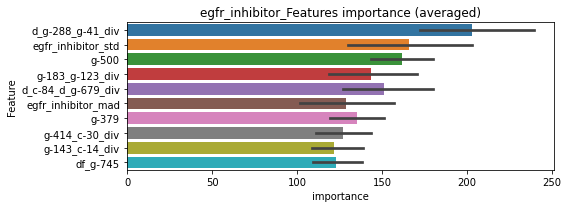

len(train_index) : 2311
len(valid_index) : 771
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991504	valid_1's binary_logloss: 0.11484


len(train_index) : 2311
len(valid_index) : 771
================================= fold 2/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00798663	valid_1's binary_logloss: 0.113567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999459	valid_1's binary_logloss: 0.0802436


len(train_index) : 2312
len(valid_index) : 770
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.0053486	valid_1's binary_logloss: 0.0768876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960548	valid_1's binary_logloss: 0.0982001


len(train_index) : 2312
len(valid_index) : 770
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00691138	valid_1's binary_logloss: 0.0972914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102485	valid_1's binary_logloss: 0.0697563
[600]	training's binary_logloss: 0.00179663	valid_1's binary_logloss: 0.0555733
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00186616	valid_1's binary_logloss: 0.0554557


egfr_inhibitor logloss: 0.08580662661975591


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362471	valid_1's binary_logloss: 0.00971053
[600]	training's binary_logloss: 0.000489583	valid_1's binary_logloss: 0.00369964
[900]	training's binary_logloss: 0.000315739	valid_1's binary_logloss: 0.0029232
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000317271	valid_1's binary_logloss: 0.00291902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380785	valid_1's binary_logloss: 0.00788778
[600]	training's binary_logloss: 0.000497291	valid_1's binary_logloss: 0.002185
[900]	training's binary_logloss: 0.000322929	valid_1's binary_logloss: 0.00169075
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000319577	valid_1's binary_logloss: 0.00168394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038308	valid_1's binary_logloss: 0.00684415
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0018573, Threshold: 0.0086491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00605, conf_1:0.01124
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0086491
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0586491
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1086491
threshold: 0.1086491, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307416	valid_1's binary_logloss: 0.00586221
[600]	training's binary_logloss: 0.000419573	valid_1's binary_logloss: 0.00132002
[900]	training's binary_logloss: 0.000284338	valid_1's binary_logloss: 0.00104775
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000284412	valid_1's binary_logloss: 0.00104749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309484	valid_1's binary_logloss: 0.00467775
[600]	training's binary_logloss: 0.000421498	valid_1's binary_logloss: 0.000873351
[900]	training's binary_logloss: 0.000285779	valid_1's binary_logloss: 0.000633336
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000285779	valid_1's binary_logloss: 0.000633336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313132	valid_1's binary_logloss: 0.00514153
[600]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.1446917, Threshold: 0.1086491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00050, Num_p_label: 15.0, conf_0:0.08692, conf_1:0.13038
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.1086491
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.1586491
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.2086491
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.2586491
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.3086491
threshold: 0.3086491, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307416	valid_1's binary_logloss: 0.00586221
[600]	training's binary_logloss: 0.000419573	valid_1's binary_logloss: 0.00132002
[900]	training's binary_logloss: 0.000284338	valid_1's binary_logloss: 0.00104775
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000284412	valid_1's binary_logloss: 0.00104749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309484	valid_1's binary_logloss: 0.00467775
[600]	training's binary_logloss: 0.000421498	valid_1's binary_logloss: 0.000873351
[900]	training's binary_logloss: 0.000285779	valid_1's binary_logloss: 0.000633336
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000285779	valid_1's binary_logloss: 0.000633336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313132	valid_1's binary_logloss: 0.00514153
[600]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.1446917, Threshold: 0.3086491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.27778, conf_1:0.33951
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.3086491
threshold: 0.3086491, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


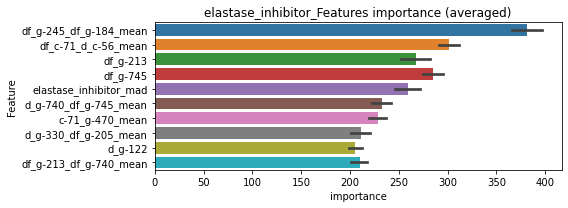

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308298	valid_1's binary_logloss: 0.00543273
[600]	training's binary_logloss: 0.000416804	valid_1's binary_logloss: 0.00112836
[900]	training's binary_logloss: 0.00028614	valid_1's binary_logloss: 0.000884792
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.00028614	valid_1's binary_logloss: 0.000884792


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312827	valid_1's binary_logloss: 0.00456354
[600]	training's binary_logloss: 0.000421706	valid_1's binary_logloss: 0.000832005
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000291642	valid_1's binary_logloss: 0.000621047


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317433	valid_1's binary_logloss: 0.00493305
[600]	training's binary_logloss: 0.00042604	valid_1's binary_logloss: 0.000824259
[900]	training's binary_logloss: 0.000292279	valid_1's binary_logloss: 0.000620271
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000292279	valid_1's binary_logloss: 0.000620271


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031285	valid_1's binary_logloss: 0.00482343
[600]	training's binary_logloss: 0.000419766	valid_1's binary_logloss: 0.000838306
[900]	training's binary_logloss: 0.000286169	valid_1's binary_logloss: 0.000632939
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000286169	valid_1's binary_logloss: 0.000632939


elastase_inhibitor logloss: 0.0006897619329332043


neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00781408	valid_1's binary_logloss: 0.0191946
[600]	training's binary_logloss: 0.000941929	valid_1's binary_logloss: 0.00488758
[900]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.00339108
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000477027	valid_1's binary_logloss: 0.00338586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768285	valid_1's binary_logloss: 0.0170844
[600]	training's binary_logloss: 0.000945774	valid_1's binary_logloss: 0.0048482
[900]	training's binary_logloss: 0.000468618	valid_1's binary_logloss: 0.0035653
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000468205	valid_1's binary_logloss: 0.00356389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779525	valid_1's binary_logloss: 0.0172026
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0058415, Threshold: 0.0274038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084, Num_p_label: 40.0, conf_0:0.01918, conf_1:0.03562
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0274038
Num_p_label: 19.0, Expected: 3.3, Adj_threshold_2: 0.0774038
Num_p_label: 10.0, Expected: 3.3, Adj_threshold_3: 0.1274038
Num_p_label: 7.0, Expected: 3.3, Adj_threshold_4: 0.1774038
threshold: 0.1774038, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00696999	valid_1's binary_logloss: 0.0148058
[600]	training's binary_logloss: 0.000851149	valid_1's binary_logloss: 0.00327465
[900]	training's binary_logloss: 0.000435401	valid_1's binary_logloss: 0.00217839
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000422722	valid_1's binary_logloss: 0.00214949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680957	valid_1's binary_logloss: 0.0165346
[600]	training's binary_logloss: 0.000858821	valid_1's binary_logloss: 0.00436047
[900]	training's binary_logloss: 0.000432056	valid_1's binary_logloss: 0.00299837
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00042443	valid_1's binary_logloss: 0.00297652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692643	valid_1's binary_logloss: 0.014147
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.1854698, Threshold: 0.1774038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0105475 Vs.target_rate: 0.00084, Num_p_label: 42.0, conf_0:0.14192, conf_1:0.21288
Num_p_label: 42.0, Expected: 3.3, Adj_threshold_1: 0.1774038
Num_p_label: 34.0, Expected: 3.3, Adj_threshold_2: 0.2274038
Num_p_label: 29.0, Expected: 3.3, Adj_threshold_3: 0.2774038
Num_p_label: 24.0, Expected: 3.3, Adj_threshold_4: 0.3274038
Num_p_label: 18.0, Expected: 3.3, Adj_threshold_5: 0.3774038
Num_p_label: 16.0, Expected: 3.3, Adj_threshold_6: 0.4274038
Num_p_label: 13.0, Expected: 3.3, Adj_threshold_7: 0.4774038
Num_p_label: 13.0, Expected: 3.3, Adj_threshold_8: 0.5274038
Num_p_label: 12.0, Expected: 3.3, Adj_threshold_9: 0.5774038
Num_p_label: 10.0, Expected: 3.3, Adj_threshold_10: 0.6274038
threshold: 0.6774038, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00696999	valid_1's binary_logloss: 0.0148058
[600]	training's binary_logloss: 0.000851149	valid_1's binary_logloss: 0.00327465
[900]	training's binary_logloss: 0.000435401	valid_1's binary_logloss: 0.00217839
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000422722	valid_1's binary_logloss: 0.00214949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680957	valid_1's binary_logloss: 0.0165346
[600]	training's binary_logloss: 0.000858821	valid_1's binary_logloss: 0.00436047
[900]	training's binary_logloss: 0.000432056	valid_1's binary_logloss: 0.00299837
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00042443	valid_1's binary_logloss: 0.00297652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692643	valid_1's binary_logloss: 0.014147
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.1854698, Threshold: 0.6774038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00084, Num_p_label: 10.0, conf_0:0.50000, conf_1:0.74514
Num_p_label: 10.0, Expected: 3.3, Adj_threshold_1: 0.6774038
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_2: 0.7274038
threshold: 0.7274038, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


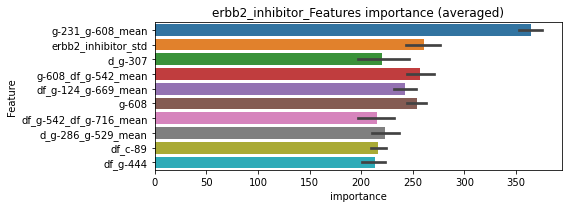

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00667788	valid_1's binary_logloss: 0.0149385
[600]	training's binary_logloss: 0.000841859	valid_1's binary_logloss: 0.00351502
[900]	training's binary_logloss: 0.000428395	valid_1's binary_logloss: 0.00227663
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000419103	valid_1's binary_logloss: 0.00226138


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00701236	valid_1's binary_logloss: 0.016712
[600]	training's binary_logloss: 0.00085812	valid_1's binary_logloss: 0.0044514
[900]	training's binary_logloss: 0.000439192	valid_1's binary_logloss: 0.00317737
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000432009	valid_1's binary_logloss: 0.0031689


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00703889	valid_1's binary_logloss: 0.0146016
[600]	training's binary_logloss: 0.000851269	valid_1's binary_logloss: 0.00292692
[900]	training's binary_logloss: 0.000433209	valid_1's binary_logloss: 0.00183743
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000423704	valid_1's binary_logloss: 0.00181186


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679768	valid_1's binary_logloss: 0.0162142
[600]	training's binary_logloss: 0.000846371	valid_1's binary_logloss: 0.00457761
[900]	training's binary_logloss: 0.000431837	valid_1's binary_logloss: 0.00328482
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000437906	valid_1's binary_logloss: 0.0032712


erbb2_inhibitor logloss: 0.002628645452410317


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0471738	valid_1's binary_logloss: 0.216633
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0138534	valid_1's binary_logloss: 0.203478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0495245	valid_1's binary_logloss: 0.187493
[600]	training's binary_logloss: 0.0103273	valid_1's binary_logloss: 0.164566
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00816179	valid_1's binary_logloss: 0.162946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0514305	valid_1's binary_logloss: 0.158515
[600]	training's binary_logloss: 0.0109769	valid_1's binary_logloss: 0.124813
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00461805	valid_1's binary_logloss: 0.118155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

1 / 3 AUC score:0.956
y_Threshold: 0.0546767, Threshold: 0.2870463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 283 → Positive_corect_labels: 578/3641
p_label_rate: 0.0100452 Vs.target_rate: 0.00663, Num_p_label: 40.0, conf_0:0.20093, conf_1:0.37316
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2870463
Num_p_label: 30.0, Expected: 26.4, Adj_threshold_2: 0.3370463
threshold: 0.3370463, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 578.0/3641, y_label_rate: 0.1587476
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301405	valid_1's binary_logloss: 0.119269
[600]	training's binary_logloss: 0.00504113	valid_1's binary_logloss: 0.0886786
[900]	training's binary_logloss: 0.00178268	valid_1's binary_logloss: 0.0842201
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00184599	valid_1's binary_logloss: 0.0837789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0269336	valid_1's binary_logloss: 0.134766
[600]	training's binary_logloss: 0.00447098	valid_1's binary_logloss: 0.117684
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00430357	valid_1's binary_logloss: 0.117311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292205	valid_1's binary_logloss: 0.110322
[600]	training's binary_logloss: 0.004902	valid_1's binary_logloss: 0.0867533
Early stopping, best iteration is:
[7

2 / 3 AUC score:0.985
y_Threshold: 0.0991324, Threshold: 0.3370463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 532.0/3549
p_label_rate: 0.0276243 Vs.target_rate: 0.00663, Num_p_label: 110.0, conf_0:0.26964, conf_1:0.40446
Num_p_label: 110.0, Expected: 26.4, Adj_threshold_1: 0.3370463
Num_p_label: 87.0, Expected: 26.4, Adj_threshold_2: 0.3870463
Num_p_label: 71.0, Expected: 26.4, Adj_threshold_3: 0.4370463
Num_p_label: 61.0, Expected: 26.4, Adj_threshold_4: 0.4870463
Num_p_label: 47.0, Expected: 26.4, Adj_threshold_5: 0.5370463
Num_p_label: 36.0, Expected: 26.4, Adj_threshold_6: 0.5870463
threshold: 0.5870463, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 532.0/3549, y_label_rate: 0.1499014
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206582	valid_1's binary_logloss: 0.0965781
[600]	training's binary_logloss: 0.00309703	valid_1's binary_logloss: 0.0753702
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00261693	valid_1's binary_logloss: 0.0746012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205972	valid_1's binary_logloss: 0.0751772
[600]	training's binary_logloss: 0.00329454	valid_1's binary_logloss: 0.0475854
[900]	training's binary_logloss: 0.00133661	valid_1's binary_logloss: 0.0427132
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.0012778	valid_1's binary_logloss: 0.0424954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208827	valid_1's binary_logloss: 0.0943377
[600]	training's binary_logloss: 0.00321278	valid_1's binary_logloss: 0.0689358
Early stopping, best iteration 

3 / 3 AUC score:0.997
y_Threshold: 0.0919370, Threshold: 0.5870463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 511.0/3507
p_label_rate: 0.0208438 Vs.target_rate: 0.00663, Num_p_label: 83.0, conf_0:0.50000, conf_1:0.64575
Num_p_label: 83.0, Expected: 26.4, Adj_threshold_1: 0.5870463
Num_p_label: 70.0, Expected: 26.4, Adj_threshold_2: 0.6370463
Num_p_label: 58.0, Expected: 26.4, Adj_threshold_3: 0.6870463
Num_p_label: 48.0, Expected: 26.4, Adj_threshold_4: 0.7370463
Num_p_label: 34.0, Expected: 26.4, Adj_threshold_5: 0.7870463
threshold: 0.7870463, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 511.0/3507, y_label_rate: 0.1457086


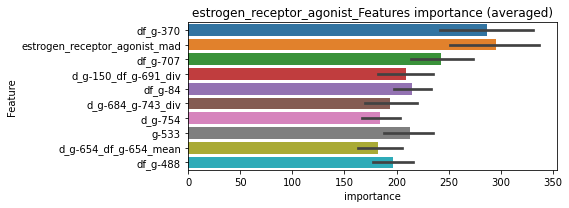

len(train_index) : 2630
len(valid_index) : 877
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170263	valid_1's binary_logloss: 0.0764212
[600]	training's binary_logloss: 0.00272159	valid_1's binary_logloss: 0.0518432
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00124513	valid_1's binary_logloss: 0.0471248


len(train_index) : 2630
len(valid_index) : 877
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174588	valid_1's binary_logloss: 0.0938824
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00457301	valid_1's binary_logloss: 0.0749137


len(train_index) : 2630
len(valid_index) : 877
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179988	valid_1's binary_logloss: 0.0634909
[600]	training's binary_logloss: 0.00281067	valid_1's binary_logloss: 0.0396716
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00165391	valid_1's binary_logloss: 0.0370226


len(train_index) : 2631
len(valid_index) : 876
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181889	valid_1's binary_logloss: 0.0731934
[600]	training's binary_logloss: 0.00285836	valid_1's binary_logloss: 0.0471186
[900]	training's binary_logloss: 0.0012001	valid_1's binary_logloss: 0.0420043
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.0012001	valid_1's binary_logloss: 0.0420043


estrogen_receptor_agonist logloss: 0.050268705463759104


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018353	valid_1's binary_logloss: 0.0663816
[600]	training's binary_logloss: 0.00245178	valid_1's binary_logloss: 0.0326118
[900]	training's binary_logloss: 0.000992219	valid_1's binary_logloss: 0.0274805
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.00083544	valid_1's binary_logloss: 0.0264675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188194	valid_1's binary_logloss: 0.0643315
[600]	training's binary_logloss: 0.00255936	valid_1's binary_logloss: 0.0361265
[900]	training's binary_logloss: 0.00100629	valid_1's binary_logloss: 0.0311941
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000841546	valid_1's binary_logloss: 0.0307824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184055	valid_1's binary_logloss: 0.0590229
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0164583, Threshold: 0.5259363, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.36816, conf_1:0.68372
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.5259363
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.5759363
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.6259363
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.6759363
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_5: 0.7259363
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.7759363
threshold: 0.7759363, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162319	valid_1's binary_logloss: 0.0558626
[600]	training's binary_logloss: 0.00221129	valid_1's binary_logloss: 0.0265135
[900]	training's binary_logloss: 0.000898206	valid_1's binary_logloss: 0.0214284
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000756287	valid_1's binary_logloss: 0.0206999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016776	valid_1's binary_logloss: 0.0596113
[600]	training's binary_logloss: 0.00222286	valid_1's binary_logloss: 0.0328185
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00133926	valid_1's binary_logloss: 0.0305725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172513	valid_1's binary_logloss: 0.0479444
[600]	training's binary_logloss: 0.00228836	valid_1's binary_logloss: 0.02496
[900]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0775848, Threshold: 0.7759363, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0110497 Vs.target_rate: 0.00202, Num_p_label: 44.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_1: 0.7759363
threshold: 0.7759363, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157919	valid_1's binary_logloss: 0.0552247
[600]	training's binary_logloss: 0.00216073	valid_1's binary_logloss: 0.0262253
[900]	training's binary_logloss: 0.000881431	valid_1's binary_logloss: 0.0209116
Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000701303	valid_1's binary_logloss: 0.0197005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160046	valid_1's binary_logloss: 0.0471605
[600]	training's binary_logloss: 0.00215164	valid_1's binary_logloss: 0.0206972
[900]	training's binary_logloss: 0.000883345	valid_1's binary_logloss: 0.0160488
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000732066	valid_1's binary_logloss: 0.0154977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015414	valid_1's binary_logloss: 0.053475
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0611229, Threshold: 0.7759363, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3785
p_label_rate: 0.0123054 Vs.target_rate: 0.00202, Num_p_label: 49.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_1: 0.7759363
threshold: 0.7759363, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 645.0/3785, y_label_rate: 0.1704095


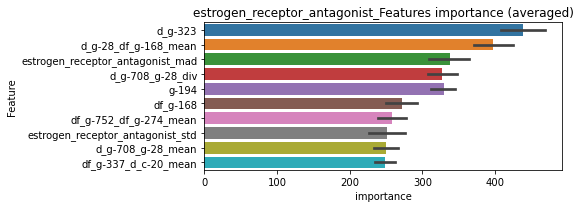

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015343	valid_1's binary_logloss: 0.0476363
[600]	training's binary_logloss: 0.00206233	valid_1's binary_logloss: 0.019651
[900]	training's binary_logloss: 0.000860916	valid_1's binary_logloss: 0.0154438
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000729411	valid_1's binary_logloss: 0.0149171


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157998	valid_1's binary_logloss: 0.0453376
[600]	training's binary_logloss: 0.00211065	valid_1's binary_logloss: 0.0231093
[900]	training's binary_logloss: 0.000879029	valid_1's binary_logloss: 0.0192295
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000920279	valid_1's binary_logloss: 0.0190852


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161302	valid_1's binary_logloss: 0.0459906
[600]	training's binary_logloss: 0.0021278	valid_1's binary_logloss: 0.0190266
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000937734	valid_1's binary_logloss: 0.0152374


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014445	valid_1's binary_logloss: 0.0523823
[600]	training's binary_logloss: 0.00196118	valid_1's binary_logloss: 0.028823
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000953741	valid_1's binary_logloss: 0.0249304


estrogen_receptor_antagonist logloss: 0.01854156147492315


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129712	valid_1's binary_logloss: 0.0350724
[600]	training's binary_logloss: 0.00169772	valid_1's binary_logloss: 0.0141273
[900]	training's binary_logloss: 0.000750483	valid_1's binary_logloss: 0.010617
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.00064373	valid_1's binary_logloss: 0.0101872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136919	valid_1's binary_logloss: 0.0327148
[600]	training's binary_logloss: 0.0017559	valid_1's binary_logloss: 0.0119146
[900]	training's binary_logloss: 0.000761274	valid_1's binary_logloss: 0.00913842
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000638945	valid_1's binary_logloss: 0.00880281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134966	valid_1's binary_logloss: 0.0319926
[600]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0098994, Threshold: 0.0608886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.04262, conf_1:0.07916
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0608886
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.1108886
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1608886
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.2108886
threshold: 0.2108886, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108899	valid_1's binary_logloss: 0.0327998
[600]	training's binary_logloss: 0.00143265	valid_1's binary_logloss: 0.016003
[900]	training's binary_logloss: 0.000649705	valid_1's binary_logloss: 0.0138509
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000572999	valid_1's binary_logloss: 0.0135519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105145	valid_1's binary_logloss: 0.0390952
[600]	training's binary_logloss: 0.00138944	valid_1's binary_logloss: 0.0219344
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000828906	valid_1's binary_logloss: 0.0206446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108031	valid_1's binary_logloss: 0.0218266
[600]	training's binary_logloss: 0.00144769	valid_1's binary_logloss: 0.00526886
[900]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0787107, Threshold: 0.2108886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0090407 Vs.target_rate: 0.00151, Num_p_label: 36.0, conf_0:0.16871, conf_1:0.25307
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_1: 0.2108886
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.2608886
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.3108886
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.3608886
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_5: 0.4108886
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_6: 0.4608886
threshold: 0.4608886, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109014	valid_1's binary_logloss: 0.0295991
[600]	training's binary_logloss: 0.00142518	valid_1's binary_logloss: 0.0110904
[900]	training's binary_logloss: 0.000645046	valid_1's binary_logloss: 0.00868097
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000568668	valid_1's binary_logloss: 0.00839392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106662	valid_1's binary_logloss: 0.0326664
[600]	training's binary_logloss: 0.00140943	valid_1's binary_logloss: 0.0133206
[900]	training's binary_logloss: 0.000647556	valid_1's binary_logloss: 0.0103337
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000587977	valid_1's binary_logloss: 0.0101668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105797	valid_1's binary_logloss: 0.0358624
[600]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0855955, Threshold: 0.4608886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00151, Num_p_label: 19.0, conf_0:0.41480, conf_1:0.50698
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.4608886
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.5108886
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.5608886
threshold: 0.5608886, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


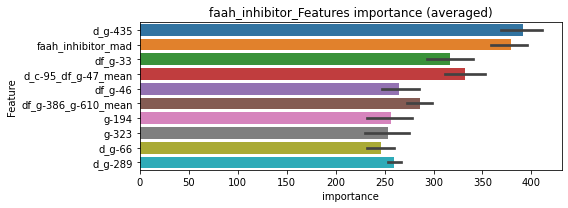

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107556	valid_1's binary_logloss: 0.0292168
[600]	training's binary_logloss: 0.00142388	valid_1's binary_logloss: 0.0101778
[900]	training's binary_logloss: 0.000645123	valid_1's binary_logloss: 0.00763773
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000605402	valid_1's binary_logloss: 0.00749317


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010872	valid_1's binary_logloss: 0.0270228
[600]	training's binary_logloss: 0.00141954	valid_1's binary_logloss: 0.0090433
[900]	training's binary_logloss: 0.000640309	valid_1's binary_logloss: 0.00669598
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000566753	valid_1's binary_logloss: 0.00643609


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110542	valid_1's binary_logloss: 0.0292829
[600]	training's binary_logloss: 0.00140503	valid_1's binary_logloss: 0.0109968
[900]	training's binary_logloss: 0.00063536	valid_1's binary_logloss: 0.00819476
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000564402	valid_1's binary_logloss: 0.00798512


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109933	valid_1's binary_logloss: 0.0314234
[600]	training's binary_logloss: 0.00142133	valid_1's binary_logloss: 0.0128496
[900]	training's binary_logloss: 0.000645326	valid_1's binary_logloss: 0.0110416
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000619068	valid_1's binary_logloss: 0.010971


faah_inhibitor logloss: 0.008223712647312862


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638887	valid_1's binary_logloss: 0.0168539
[600]	training's binary_logloss: 0.000808196	valid_1's binary_logloss: 0.00742075
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000477237	valid_1's binary_logloss: 0.00636098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670082	valid_1's binary_logloss: 0.0191052
[600]	training's binary_logloss: 0.00081658	valid_1's binary_logloss: 0.00826935
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000522722	valid_1's binary_logloss: 0.00740556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650246	valid_1's binary_logloss: 0.0143413
[600]	training's binary_logloss: 0.000816225	valid_1's binary_logloss: 0.00515991
[900]	training's binary_logloss: 0.000444626	valid_1's binary_logloss: 0.00395531
Early stopping, 

1 / 3 AUC score:1.000
y_Threshold: 0.0049272, Threshold: 0.0296295, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02074, conf_1:0.03852
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0296295
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.0796295
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1296295
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1796295
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.2296295
threshold: 0.2296295, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521365	valid_1's binary_logloss: 0.0148461
[600]	training's binary_logloss: 0.000690364	valid_1's binary_logloss: 0.00576719
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000432621	valid_1's binary_logloss: 0.00486769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546592	valid_1's binary_logloss: 0.0146064
[600]	training's binary_logloss: 0.000705846	valid_1's binary_logloss: 0.00624516
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000554302	valid_1's binary_logloss: 0.00577236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558346	valid_1's binary_logloss: 0.0103672
[600]	training's binary_logloss: 0.000713499	valid_1's binary_logloss: 0.00294864
[900]	training's binary_logloss: 0.000414234	valid_1's binary_logloss: 0.00219181
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0931237, Threshold: 0.2296295, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00076, Num_p_label: 23.0, conf_0:0.18370, conf_1:0.27556
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.2296295
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.2796295
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.3296295
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.3796295
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.4296295
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.4796295
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.5296295
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.5796295
threshold: 0.5796295, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521365	valid_1's binary_logloss: 0.0148461
[600]	training's binary_logloss: 0.000690364	valid_1's binary_logloss: 0.00576719
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000432621	valid_1's binary_logloss: 0.00486769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546592	valid_1's binary_logloss: 0.0146064
[600]	training's binary_logloss: 0.000705846	valid_1's binary_logloss: 0.00624516
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000554302	valid_1's binary_logloss: 0.00577236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558346	valid_1's binary_logloss: 0.0103672
[600]	training's binary_logloss: 0.000713499	valid_1's binary_logloss: 0.00294864
[900]	training's binary_logloss: 0.000414234	valid_1's binary_logloss: 0.00219181
Early stopping,

3 / 3 AUC score:1.000
y_Threshold: 0.0931237, Threshold: 0.5796295, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.63759
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.5796295
threshold: 0.5796295, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


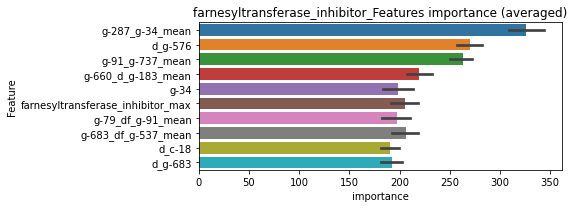

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521575	valid_1's binary_logloss: 0.0154048
[600]	training's binary_logloss: 0.000681852	valid_1's binary_logloss: 0.00570783
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000425693	valid_1's binary_logloss: 0.00504434


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535924	valid_1's binary_logloss: 0.0131561
[600]	training's binary_logloss: 0.000694438	valid_1's binary_logloss: 0.00494754
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000474935	valid_1's binary_logloss: 0.00438718


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547391	valid_1's binary_logloss: 0.0107716
[600]	training's binary_logloss: 0.000705601	valid_1's binary_logloss: 0.00358392
[900]	training's binary_logloss: 0.000409421	valid_1's binary_logloss: 0.00267462
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000409421	valid_1's binary_logloss: 0.00267462


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555483	valid_1's binary_logloss: 0.014192
[600]	training's binary_logloss: 0.000709922	valid_1's binary_logloss: 0.00511523
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000457583	valid_1's binary_logloss: 0.0044166


farnesyltransferase_inhibitor logloss: 0.004131599075774845


neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737944	valid_1's binary_logloss: 0.0179822
[600]	training's binary_logloss: 0.000945692	valid_1's binary_logloss: 0.00579009
[900]	training's binary_logloss: 0.000475115	valid_1's binary_logloss: 0.00440366
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000454669	valid_1's binary_logloss: 0.00435476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747282	valid_1's binary_logloss: 0.0143547
[600]	training's binary_logloss: 0.000962019	valid_1's binary_logloss: 0.00360736
[900]	training's binary_logloss: 0.000477538	valid_1's binary_logloss: 0.00239995
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000457371	valid_1's binary_logloss: 0.00233975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752182	valid_1's binary_logloss: 0.0220846
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0050119, Threshold: 0.0424777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.02973, conf_1:0.05522
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0424777
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_2: 0.0924777
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_3: 0.1424777
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_4: 0.1924777
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_5: 0.2424777
threshold: 0.2424777, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630325	valid_1's binary_logloss: 0.0146841
[600]	training's binary_logloss: 0.000841164	valid_1's binary_logloss: 0.00444006
[900]	training's binary_logloss: 0.000431413	valid_1's binary_logloss: 0.00330136
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000434018	valid_1's binary_logloss: 0.00329712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650656	valid_1's binary_logloss: 0.0118307
[600]	training's binary_logloss: 0.00085117	valid_1's binary_logloss: 0.00229107
[900]	training's binary_logloss: 0.00043766	valid_1's binary_logloss: 0.00137721
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000433824	valid_1's binary_logloss: 0.00137015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062179	valid_1's binary_logloss: 0.0171399
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.1048696, Threshold: 0.2424777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00105, Num_p_label: 25.0, conf_0:0.19398, conf_1:0.29097
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_1: 0.2424777
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_2: 0.2924777
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_3: 0.3424777
threshold: 0.3424777, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630325	valid_1's binary_logloss: 0.0146841
[600]	training's binary_logloss: 0.000841164	valid_1's binary_logloss: 0.00444006
[900]	training's binary_logloss: 0.000431413	valid_1's binary_logloss: 0.00330136
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000434018	valid_1's binary_logloss: 0.00329712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650656	valid_1's binary_logloss: 0.0118307
[600]	training's binary_logloss: 0.00085117	valid_1's binary_logloss: 0.00229107
[900]	training's binary_logloss: 0.00043766	valid_1's binary_logloss: 0.00137721
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000433824	valid_1's binary_logloss: 0.00137015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062179	valid_1's binary_logloss: 0.0171399
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.1048696, Threshold: 0.3424777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.30823, conf_1:0.37673
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.3424777
threshold: 0.3424777, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


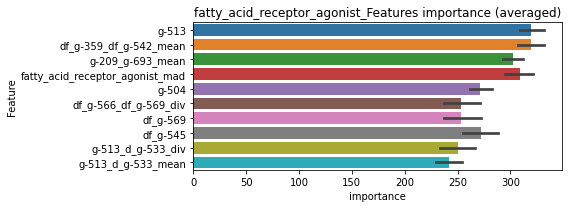

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063118	valid_1's binary_logloss: 0.0151763
[600]	training's binary_logloss: 0.000834015	valid_1's binary_logloss: 0.00408034
[900]	training's binary_logloss: 0.000435761	valid_1's binary_logloss: 0.00302281
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00042515	valid_1's binary_logloss: 0.00301174


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659632	valid_1's binary_logloss: 0.0118651
[600]	training's binary_logloss: 0.000863821	valid_1's binary_logloss: 0.00231988
[900]	training's binary_logloss: 0.000439061	valid_1's binary_logloss: 0.00141956
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.00042766	valid_1's binary_logloss: 0.00139709


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623043	valid_1's binary_logloss: 0.0160423
[600]	training's binary_logloss: 0.00082945	valid_1's binary_logloss: 0.00487877
[900]	training's binary_logloss: 0.000432379	valid_1's binary_logloss: 0.00388637
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000433501	valid_1's binary_logloss: 0.00387586


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00667068	valid_1's binary_logloss: 0.0155685
[600]	training's binary_logloss: 0.000858577	valid_1's binary_logloss: 0.00399989
[900]	training's binary_logloss: 0.000438583	valid_1's binary_logloss: 0.0027714
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.00042646	valid_1's binary_logloss: 0.00273468


fatty_acid_receptor_agonist logloss: 0.0027599589387734876


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215468	valid_1's binary_logloss: 0.0795238
[600]	training's binary_logloss: 0.00282957	valid_1's binary_logloss: 0.0446025
[900]	training's binary_logloss: 0.00107514	valid_1's binary_logloss: 0.0386433
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00103245	valid_1's binary_logloss: 0.0384372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023159	valid_1's binary_logloss: 0.0707094
[600]	training's binary_logloss: 0.00306102	valid_1's binary_logloss: 0.0386974
[900]	training's binary_logloss: 0.00112761	valid_1's binary_logloss: 0.0341394
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000940253	valid_1's binary_logloss: 0.0336112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237111	valid_1's binary_logloss: 0.0499914
[600]	training's binary_loglo

1 / 3 AUC score:0.998
y_Threshold: 0.0197093, Threshold: 0.0910749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00210, Num_p_label: 40.0, conf_0:0.06375, conf_1:0.11840
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0910749
Num_p_label: 24.0, Expected: 8.4, Adj_threshold_2: 0.1410749
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_3: 0.1910749
threshold: 0.1910749, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183647	valid_1's binary_logloss: 0.0550987
[600]	training's binary_logloss: 0.00244508	valid_1's binary_logloss: 0.0272313
[900]	training's binary_logloss: 0.000975503	valid_1's binary_logloss: 0.0226464
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000784832	valid_1's binary_logloss: 0.0217715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193092	valid_1's binary_logloss: 0.0567693
[600]	training's binary_logloss: 0.00251111	valid_1's binary_logloss: 0.02492
[900]	training's binary_logloss: 0.000989036	valid_1's binary_logloss: 0.0199134
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000859495	valid_1's binary_logloss: 0.019399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197612	valid_1's binary_logloss: 0.0583972
[600]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.1177286, Threshold: 0.1910749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0165746 Vs.target_rate: 0.00210, Num_p_label: 66.0, conf_0:0.15286, conf_1:0.22929
Num_p_label: 66.0, Expected: 8.4, Adj_threshold_1: 0.1910749
Num_p_label: 50.0, Expected: 8.4, Adj_threshold_2: 0.2410749
Num_p_label: 44.0, Expected: 8.4, Adj_threshold_3: 0.2910749
Num_p_label: 38.0, Expected: 8.4, Adj_threshold_4: 0.3410749
Num_p_label: 35.0, Expected: 8.4, Adj_threshold_5: 0.3910749
Num_p_label: 28.0, Expected: 8.4, Adj_threshold_6: 0.4410749
Num_p_label: 26.0, Expected: 8.4, Adj_threshold_7: 0.4910749
Num_p_label: 24.0, Expected: 8.4, Adj_threshold_8: 0.5410749
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_9: 0.5910749
threshold: 0.5910749, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3790, y_label_rate: 0.1707124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184089	valid_1's binary_logloss: 0.0577086
[600]	training's binary_logloss: 0.00244771	valid_1's binary_logloss: 0.0250403
[900]	training's binary_logloss: 0.000967308	valid_1's binary_logloss: 0.0193599
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000979525	valid_1's binary_logloss: 0.0193147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172394	valid_1's binary_logloss: 0.0550846
[600]	training's binary_logloss: 0.00229666	valid_1's binary_logloss: 0.0244966
[900]	training's binary_logloss: 0.000939944	valid_1's binary_logloss: 0.0189427
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000765521	valid_1's binary_logloss: 0.0182799
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192613	valid_1's binary_logloss: 0.0669062
[600]	training's binary_l

3 / 3 AUC score:0.999
y_Threshold: 0.1391932, Threshold: 0.5910749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 641.0/3778
p_label_rate: 0.0055249 Vs.target_rate: 0.00210, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.65018
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_1: 0.5910749
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_2: 0.6410749
threshold: 0.6410749, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3778, y_label_rate: 0.1696665


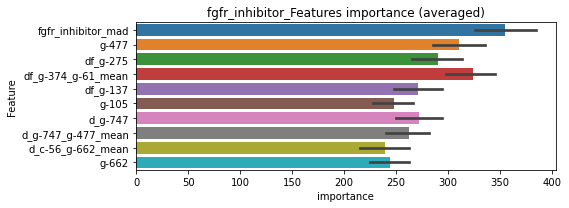

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179978	valid_1's binary_logloss: 0.0622956
[600]	training's binary_logloss: 0.00231256	valid_1's binary_logloss: 0.031908
[900]	training's binary_logloss: 0.000927415	valid_1's binary_logloss: 0.0268601
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000915282	valid_1's binary_logloss: 0.0267166


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179339	valid_1's binary_logloss: 0.0629264
[600]	training's binary_logloss: 0.00235779	valid_1's binary_logloss: 0.0362712
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00163388	valid_1's binary_logloss: 0.0338676


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182021	valid_1's binary_logloss: 0.0682074
[600]	training's binary_logloss: 0.00236622	valid_1's binary_logloss: 0.0373992
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00104499	valid_1's binary_logloss: 0.0332211


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019212	valid_1's binary_logloss: 0.0456858
[600]	training's binary_logloss: 0.00241714	valid_1's binary_logloss: 0.0159154
[900]	training's binary_logloss: 0.000951362	valid_1's binary_logloss: 0.0110075
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000715454	valid_1's binary_logloss: 0.010173


fgfr_inhibitor logloss: 0.026001025149158995


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0926112	valid_1's binary_logloss: 0.311552
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.044482	valid_1's binary_logloss: 0.305019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0965594	valid_1's binary_logloss: 0.299936
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.0403358	valid_1's binary_logloss: 0.284897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0888993	valid_1's binary_logloss: 0.315219
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.04604	valid_1's binary_logloss: 0.307621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0921952	valid_1's binary_logloss: 0.299046
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.0553069	valid_1's binary_logloss: 0.28

1 / 3 AUC score:0.845
y_Threshold: 0.1188234, Threshold: 0.6991764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 515 → Positive_corect_labels: 459/3394
p_label_rate: 0.0100452 Vs.target_rate: 0.01172, Num_p_label: 40.0, conf_0:0.48942, conf_1:0.80000
threshold: 0.6991764, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 459.0/3394, y_label_rate: 0.1352387
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299326	valid_1's binary_logloss: 0.194937
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.0145727	valid_1's binary_logloss: 0.191748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319569	valid_1's binary_logloss: 0.18868
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.0108092	valid_1's binary_logloss: 0.182098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0315629	valid_1's binary_logloss: 0.161648
[600]	training's binary_logloss: 0.00565235	valid_1's binary_logloss: 0.149678
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00604636	valid_1's binary_logloss: 0.149095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350391	valid_1's binary_logloss: 0.131783
[600]	training's binary_lo

2 / 3 AUC score:0.959
y_Threshold: 0.1152398, Threshold: 0.6991764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 381.0/3238
p_label_rate: 0.0288800 Vs.target_rate: 0.01172, Num_p_label: 115.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 115.0, Expected: 46.7, Adj_threshold_1: 0.6991764
Num_p_label: 105.0, Expected: 46.7, Adj_threshold_2: 0.7491764
Num_p_label: 92.0, Expected: 46.7, Adj_threshold_3: 0.7991764
threshold: 0.7991764, positive_p_label: 92.0/3982, p_label_rate: 0.0231040
positive_y_label: 381.0/3238, y_label_rate: 0.1176652
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157422	valid_1's binary_logloss: 0.123584
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00308871	valid_1's binary_logloss: 0.115088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178611	valid_1's binary_logloss: 0.0933501
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00411787	valid_1's binary_logloss: 0.085569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176552	valid_1's binary_logloss: 0.0795663
[600]	training's binary_logloss: 0.00289014	valid_1's binary_logloss: 0.0625048
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00270899	valid_1's binary_logloss: 0.061923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167101	valid_1's binary_logloss: 0.0938526
[600]	training's bi

3 / 3 AUC score:0.983
y_Threshold: 0.0927425, Threshold: 0.7991764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 345.0/3166
p_label_rate: 0.0441989 Vs.target_rate: 0.01172, Num_p_label: 176.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 176.0, Expected: 46.7, Adj_threshold_1: 0.7991764
threshold: 0.7991764, positive_p_label: 176.0/3982, p_label_rate: 0.0441989
positive_y_label: 345.0/3166, y_label_rate: 0.1089703


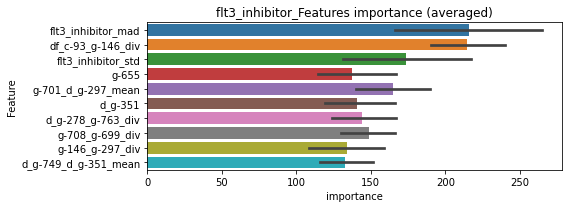

len(train_index) : 2374
len(valid_index) : 792
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120132	valid_1's binary_logloss: 0.0808121
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00284566	valid_1's binary_logloss: 0.0718026


len(train_index) : 2374
len(valid_index) : 792
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117023	valid_1's binary_logloss: 0.0789428
[600]	training's binary_logloss: 0.00192135	valid_1's binary_logloss: 0.0681765
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00155386	valid_1's binary_logloss: 0.0676921


len(train_index) : 2375
len(valid_index) : 791
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113904	valid_1's binary_logloss: 0.0770865
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00221574	valid_1's binary_logloss: 0.0633874


len(train_index) : 2375
len(valid_index) : 791
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118445	valid_1's binary_logloss: 0.0614798
[600]	training's binary_logloss: 0.00195519	valid_1's binary_logloss: 0.0449843
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00185171	valid_1's binary_logloss: 0.0445853


flt3_inhibitor logloss: 0.06187181225036548


neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729796	valid_1's binary_logloss: 0.0146425
[600]	training's binary_logloss: 0.00091574	valid_1's binary_logloss: 0.00430257
[900]	training's binary_logloss: 0.000471333	valid_1's binary_logloss: 0.00301749
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000450052	valid_1's binary_logloss: 0.0029449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731697	valid_1's binary_logloss: 0.0128077
[600]	training's binary_logloss: 0.000905616	valid_1's binary_logloss: 0.0032042
[900]	training's binary_logloss: 0.000468814	valid_1's binary_logloss: 0.00229843
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00047061	valid_1's binary_logloss: 0.00229725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693153	valid_1's binary_logloss: 0.0151283
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0048228, Threshold: 0.0293856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02057, conf_1:0.03820
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0293856
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_2: 0.0793856
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1293856
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1793856
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.2293856
threshold: 0.2293856, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622898	valid_1's binary_logloss: 0.0110562
[600]	training's binary_logloss: 0.000797452	valid_1's binary_logloss: 0.002382
[900]	training's binary_logloss: 0.000426515	valid_1's binary_logloss: 0.00153404
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000410486	valid_1's binary_logloss: 0.00148473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633345	valid_1's binary_logloss: 0.010734
[600]	training's binary_logloss: 0.000796849	valid_1's binary_logloss: 0.00205446
[900]	training's binary_logloss: 0.000436293	valid_1's binary_logloss: 0.00138748
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000436293	valid_1's binary_logloss: 0.00138748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587221	valid_1's binary_logloss: 0.0120296
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0516724, Threshold: 0.2293856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00076, Num_p_label: 19.0, conf_0:0.18351, conf_1:0.27526
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.2293856
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2793856
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.3293856
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.3793856
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.4293856
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.4793856
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5293856
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.5793856
threshold: 0.5793856, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622898	valid_1's binary_logloss: 0.0110562
[600]	training's binary_logloss: 0.000797452	valid_1's binary_logloss: 0.002382
[900]	training's binary_logloss: 0.000426515	valid_1's binary_logloss: 0.00153404
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000410486	valid_1's binary_logloss: 0.00148473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633345	valid_1's binary_logloss: 0.010734
[600]	training's binary_logloss: 0.000796849	valid_1's binary_logloss: 0.00205446
[900]	training's binary_logloss: 0.000436293	valid_1's binary_logloss: 0.00138748
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000436293	valid_1's binary_logloss: 0.00138748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587221	valid_1's binary_logloss: 0.0120296
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0516724, Threshold: 0.5793856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.63732
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.5793856
threshold: 0.5793856, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


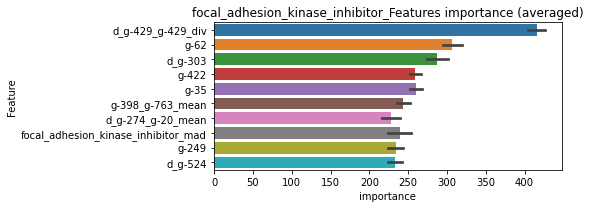

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629886	valid_1's binary_logloss: 0.0115234
[600]	training's binary_logloss: 0.000786156	valid_1's binary_logloss: 0.00234383
[900]	training's binary_logloss: 0.000431817	valid_1's binary_logloss: 0.00154869
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000431817	valid_1's binary_logloss: 0.00154869


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637223	valid_1's binary_logloss: 0.0109508
[600]	training's binary_logloss: 0.00078848	valid_1's binary_logloss: 0.00219804
[900]	training's binary_logloss: 0.000433036	valid_1's binary_logloss: 0.00150617
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000433036	valid_1's binary_logloss: 0.00150617


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059145	valid_1's binary_logloss: 0.0115015
[600]	training's binary_logloss: 0.000773367	valid_1's binary_logloss: 0.00292982
[900]	training's binary_logloss: 0.000423354	valid_1's binary_logloss: 0.00210101
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000424478	valid_1's binary_logloss: 0.00209995


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620143	valid_1's binary_logloss: 0.0156598
[600]	training's binary_logloss: 0.000788635	valid_1's binary_logloss: 0.00588035
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000667569	valid_1's binary_logloss: 0.00566855


focal_adhesion_kinase_inhibitor logloss: 0.0027055496910018276


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589185	valid_1's binary_logloss: 0.0166777
[600]	training's binary_logloss: 0.00077294	valid_1's binary_logloss: 0.00717253
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000434841	valid_1's binary_logloss: 0.00563175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614056	valid_1's binary_logloss: 0.0168187
[600]	training's binary_logloss: 0.000792027	valid_1's binary_logloss: 0.0049993
[900]	training's binary_logloss: 0.000438631	valid_1's binary_logloss: 0.00372237
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000438631	valid_1's binary_logloss: 0.00372237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00609806	valid_1's binary_logloss: 0.0131175
[600]	training's binary_logloss: 0.00079506	valid_1's binary_logloss: 0.00443806
Early stopping, be

1 / 3 AUC score:1.000
y_Threshold: 0.0034238, Threshold: 0.0274152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01919, conf_1:0.03564
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0274152
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.0774152
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.1274152
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1774152
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.2274152
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2774152
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.3274152
threshold: 0.3274152, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052997	valid_1's binary_logloss: 0.0109172
[600]	training's binary_logloss: 0.000703366	valid_1's binary_logloss: 0.00269573
[900]	training's binary_logloss: 0.000406742	valid_1's binary_logloss: 0.00189904
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000406742	valid_1's binary_logloss: 0.00189904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511557	valid_1's binary_logloss: 0.0123864
[600]	training's binary_logloss: 0.000678313	valid_1's binary_logloss: 0.00334452
[900]	training's binary_logloss: 0.000399868	valid_1's binary_logloss: 0.00243324
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000399868	valid_1's binary_logloss: 0.00243324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516889	valid_1's binary_logloss: 0.0112211
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.1401654, Threshold: 0.3274152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00076, Num_p_label: 17.0, conf_0:0.26193, conf_1:0.39290
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.3274152
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.3774152
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.4274152
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.4774152
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.5274152
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_6: 0.5774152
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.6274152
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.6774152
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.7274152
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.7774152
threshold: 0.7774152, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521538	valid_1's binary_logloss: 0.012682
[600]	training's binary_logloss: 0.000680308	valid_1's binary_logloss: 0.00321877
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00040308	valid_1's binary_logloss: 0.00233773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489023	valid_1's binary_logloss: 0.0127795
[600]	training's binary_logloss: 0.000663025	valid_1's binary_logloss: 0.00464584
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000403713	valid_1's binary_logloss: 0.00371342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525075	valid_1's binary_logloss: 0.00942799
[600]	training's binary_logloss: 0.000687206	valid_1's binary_logloss: 0.00199114
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.0004084	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1931489, Threshold: 0.7774152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.7774152
threshold: 0.7774152, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


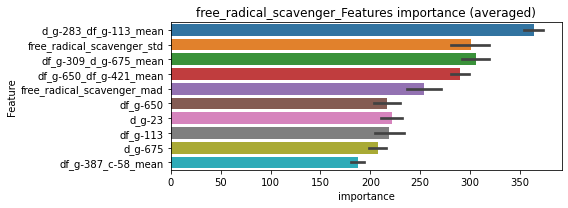

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491922	valid_1's binary_logloss: 0.0123966
[600]	training's binary_logloss: 0.000674931	valid_1's binary_logloss: 0.00367647
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000411724	valid_1's binary_logloss: 0.00286922


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00497	valid_1's binary_logloss: 0.0128331
[600]	training's binary_logloss: 0.000664417	valid_1's binary_logloss: 0.00463768
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000505799	valid_1's binary_logloss: 0.0041405


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508694	valid_1's binary_logloss: 0.00861694
[600]	training's binary_logloss: 0.00067618	valid_1's binary_logloss: 0.00174368
[900]	training's binary_logloss: 0.000403587	valid_1's binary_logloss: 0.00114854
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000403587	valid_1's binary_logloss: 0.00114854


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515983	valid_1's binary_logloss: 0.0142689
[600]	training's binary_logloss: 0.000662284	valid_1's binary_logloss: 0.00470498
[900]	training's binary_logloss: 0.000405663	valid_1's binary_logloss: 0.00383258
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000405663	valid_1's binary_logloss: 0.00383258


free_radical_scavenger logloss: 0.0029978900284353153


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00860933	valid_1's binary_logloss: 0.0188345
[600]	training's binary_logloss: 0.0011351	valid_1's binary_logloss: 0.00518701
[900]	training's binary_logloss: 0.000551445	valid_1's binary_logloss: 0.00358034
Early stopping, best iteration is:
[1050]	training's binary_logloss: 0.000507666	valid_1's binary_logloss: 0.00344492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084966	valid_1's binary_logloss: 0.027526
[600]	training's binary_logloss: 0.00115048	valid_1's binary_logloss: 0.0115368
[900]	training's binary_logloss: 0.000552555	valid_1's binary_logloss: 0.00913933
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000516916	valid_1's binary_logloss: 0.00896493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00861895	valid_1's binary_logloss: 0.0224681
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0055668, Threshold: 0.0300679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.02105, conf_1:0.03909
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0300679
Num_p_label: 12.0, Expected: 3.8, Adj_threshold_2: 0.0800679
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_3: 0.1300679
threshold: 0.1300679, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757834	valid_1's binary_logloss: 0.0149517
[600]	training's binary_logloss: 0.00102897	valid_1's binary_logloss: 0.0033888
[900]	training's binary_logloss: 0.000510338	valid_1's binary_logloss: 0.00219726
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000474003	valid_1's binary_logloss: 0.00210183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073426	valid_1's binary_logloss: 0.0244876
[600]	training's binary_logloss: 0.00100596	valid_1's binary_logloss: 0.0107411
[900]	training's binary_logloss: 0.000506037	valid_1's binary_logloss: 0.00872019
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000504668	valid_1's binary_logloss: 0.0087079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775416	valid_1's binary_logloss: 0.0168241
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0673807, Threshold: 0.1300679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0072828 Vs.target_rate: 0.00097, Num_p_label: 29.0, conf_0:0.10405, conf_1:0.15608
Num_p_label: 29.0, Expected: 3.8, Adj_threshold_1: 0.1300679
Num_p_label: 19.0, Expected: 3.8, Adj_threshold_2: 0.1800679
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_3: 0.2300679
Num_p_label: 12.0, Expected: 3.8, Adj_threshold_4: 0.2800679
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_5: 0.3300679
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_6: 0.3800679
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_7: 0.4300679
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_8: 0.4800679
threshold: 0.4800679, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757834	valid_1's binary_logloss: 0.0149517
[600]	training's binary_logloss: 0.00102897	valid_1's binary_logloss: 0.0033888
[900]	training's binary_logloss: 0.000510338	valid_1's binary_logloss: 0.00219726
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000474003	valid_1's binary_logloss: 0.00210183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073426	valid_1's binary_logloss: 0.0244876
[600]	training's binary_logloss: 0.00100596	valid_1's binary_logloss: 0.0107411
[900]	training's binary_logloss: 0.000506037	valid_1's binary_logloss: 0.00872019
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000504668	valid_1's binary_logloss: 0.0087079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775416	valid_1's binary_logloss: 0.0168241
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0673807, Threshold: 0.4800679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.43206, conf_1:0.52807
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.4800679
threshold: 0.4800679, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


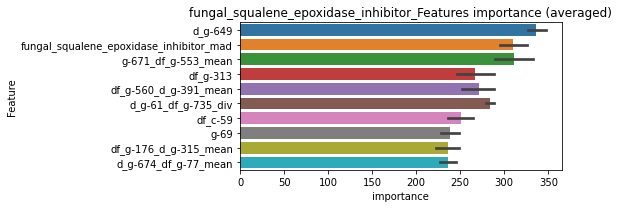

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771017	valid_1's binary_logloss: 0.0153557
[600]	training's binary_logloss: 0.00101891	valid_1's binary_logloss: 0.00347725
[900]	training's binary_logloss: 0.000501406	valid_1's binary_logloss: 0.00223264
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000464355	valid_1's binary_logloss: 0.00215491


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746906	valid_1's binary_logloss: 0.0229261
[600]	training's binary_logloss: 0.00101503	valid_1's binary_logloss: 0.0098808
[900]	training's binary_logloss: 0.000508498	valid_1's binary_logloss: 0.00806722
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000488386	valid_1's binary_logloss: 0.00800525


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748154	valid_1's binary_logloss: 0.0162953
[600]	training's binary_logloss: 0.00100747	valid_1's binary_logloss: 0.00557283
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000536215	valid_1's binary_logloss: 0.00473711


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740614	valid_1's binary_logloss: 0.0216513
[600]	training's binary_logloss: 0.000996534	valid_1's binary_logloss: 0.00758785
[900]	training's binary_logloss: 0.000491299	valid_1's binary_logloss: 0.005602
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000473602	valid_1's binary_logloss: 0.00550623


fungal_squalene_epoxidase_inhibitor logloss: 0.005102495158193741


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331283	valid_1's binary_logloss: 0.156263
[600]	training's binary_logloss: 0.00573848	valid_1's binary_logloss: 0.132461
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00443585	valid_1's binary_logloss: 0.131475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369209	valid_1's binary_logloss: 0.126665
[600]	training's binary_logloss: 0.00688349	valid_1's binary_logloss: 0.0915804
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.00236981	valid_1's binary_logloss: 0.0837877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.038862	valid_1's binary_logloss: 0.128359
[600]	training's binary_logloss: 0.00698942	valid_1's binary_logloss: 0.091521
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00337042	valid_1's binary_logloss: 0.0850758
Tr

1 / 3 AUC score:0.983
y_Threshold: 0.0439136, Threshold: 0.2690411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 203 → Positive_corect_labels: 618/3722
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.18833, conf_1:0.34975
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.2690411
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_2: 0.3190411
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_3: 0.3690411
threshold: 0.3690411, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 618.0/3722, y_label_rate: 0.1660398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233829	valid_1's binary_logloss: 0.0823781
[600]	training's binary_logloss: 0.00355903	valid_1's binary_logloss: 0.0488732
[900]	training's binary_logloss: 0.00136548	valid_1's binary_logloss: 0.0427146
Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000969755	valid_1's binary_logloss: 0.0409592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239896	valid_1's binary_logloss: 0.0868059
[600]	training's binary_logloss: 0.00366357	valid_1's binary_logloss: 0.0576865
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.00151275	valid_1's binary_logloss: 0.0532187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238401	valid_1's binary_logloss: 0.0859083
[600]	training's binary_logloss: 0.00362885	valid_1's binary_logloss: 0.0536394
[900]	training's binary_logl

2 / 3 AUC score:0.998
y_Threshold: 0.1281255, Threshold: 0.3690411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 594.0/3674
p_label_rate: 0.0228528 Vs.target_rate: 0.00445, Num_p_label: 91.0, conf_0:0.29523, conf_1:0.44285
Num_p_label: 91.0, Expected: 17.7, Adj_threshold_1: 0.3690411
Num_p_label: 78.0, Expected: 17.7, Adj_threshold_2: 0.4190411
Num_p_label: 69.0, Expected: 17.7, Adj_threshold_3: 0.4690411
Num_p_label: 57.0, Expected: 17.7, Adj_threshold_4: 0.5190411
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_5: 0.5690411
Num_p_label: 39.0, Expected: 17.7, Adj_threshold_6: 0.6190411
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_7: 0.6690411
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_8: 0.7190411
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_9: 0.7690411
threshold: 0.7690411, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 594.0/3674, y_label_rate: 0.1616766
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019884	valid_1's binary_logloss: 0.0887891
[600]	training's binary_logloss: 0.0029367	valid_1's binary_logloss: 0.0645344
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00252232	valid_1's binary_logloss: 0.0630172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201522	valid_1's binary_logloss: 0.0840212
[600]	training's binary_logloss: 0.00300527	valid_1's binary_logloss: 0.0590826
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00146322	valid_1's binary_logloss: 0.0554733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020183	valid_1's binary_logloss: 0.0836369
[600]	training's binary_logloss: 0.00289971	valid_1's binary_logloss: 0.0540621
[900]	training's binary_logloss: 0.00116746	valid_1's binary_logloss: 0.0489696
Early stopping, best iteration is

3 / 3 AUC score:0.996
y_Threshold: 0.1019601, Threshold: 0.7690411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 576.0/3638
p_label_rate: 0.0118031 Vs.target_rate: 0.00445, Num_p_label: 47.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 47.0, Expected: 17.7, Adj_threshold_1: 0.7690411
threshold: 0.7690411, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 576.0/3638, y_label_rate: 0.1583288


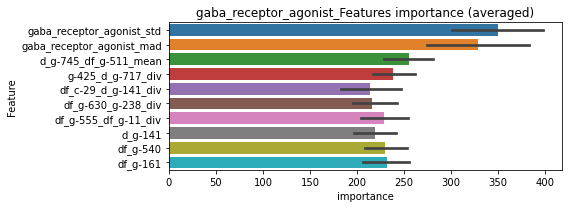

len(train_index) : 2728
len(valid_index) : 910
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168693	valid_1's binary_logloss: 0.0853739
[600]	training's binary_logloss: 0.00248975	valid_1's binary_logloss: 0.057756
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00119591	valid_1's binary_logloss: 0.0536766


len(train_index) : 2728
len(valid_index) : 910
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172784	valid_1's binary_logloss: 0.0620467
[600]	training's binary_logloss: 0.0025773	valid_1's binary_logloss: 0.0351055
[900]	training's binary_logloss: 0.00107344	valid_1's binary_logloss: 0.0306982
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00102969	valid_1's binary_logloss: 0.0303901


len(train_index) : 2729
len(valid_index) : 909
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184756	valid_1's binary_logloss: 0.0630483
[600]	training's binary_logloss: 0.00274954	valid_1's binary_logloss: 0.0383246
[900]	training's binary_logloss: 0.00110811	valid_1's binary_logloss: 0.0330062
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000947335	valid_1's binary_logloss: 0.0322794


len(train_index) : 2729
len(valid_index) : 909
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171233	valid_1's binary_logloss: 0.0756755
[600]	training's binary_logloss: 0.00244214	valid_1's binary_logloss: 0.0472207
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00111612	valid_1's binary_logloss: 0.0435479


gaba_receptor_agonist logloss: 0.03997462552411351


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497388	valid_1's binary_logloss: 0.202127
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.0126141	valid_1's binary_logloss: 0.175037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0502238	valid_1's binary_logloss: 0.208625
[600]	training's binary_logloss: 0.0111312	valid_1's binary_logloss: 0.189112
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.0096932	valid_1's binary_logloss: 0.18811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0517654	valid_1's binary_logloss: 0.19907
[600]	training's binary_logloss: 0.0107148	valid_1's binary_logloss: 0.178993
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0116169	valid_1's binary_logloss: 0.178619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglo

1 / 3 AUC score:0.950
y_Threshold: 0.0662377, Threshold: 0.3254650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 295 → Positive_corect_labels: 571/3624
p_label_rate: 0.0100452 Vs.target_rate: 0.00693, Num_p_label: 40.0, conf_0:0.22783, conf_1:0.42310
threshold: 0.3254650, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 571.0/3624, y_label_rate: 0.1575607
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278521	valid_1's binary_logloss: 0.139029
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00620042	valid_1's binary_logloss: 0.121151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282252	valid_1's binary_logloss: 0.122834
[600]	training's binary_logloss: 0.00458265	valid_1's binary_logloss: 0.099443
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00285553	valid_1's binary_logloss: 0.0970605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0284948	valid_1's binary_logloss: 0.12638
[600]	training's binary_logloss: 0.00469188	valid_1's binary_logloss: 0.0998054
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00189205	valid_1's binary_logloss: 0.0941551
Training until validation scores don't improve for 30 rounds
[300]	training's bin

2 / 3 AUC score:0.982
y_Threshold: 0.0920590, Threshold: 0.3254650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 516.0/3514
p_label_rate: 0.0313913 Vs.target_rate: 0.00693, Num_p_label: 125.0, conf_0:0.26037, conf_1:0.39056
Num_p_label: 125.0, Expected: 27.6, Adj_threshold_1: 0.3254650
Num_p_label: 114.0, Expected: 27.6, Adj_threshold_2: 0.3754650
Num_p_label: 101.0, Expected: 27.6, Adj_threshold_3: 0.4254650
Num_p_label: 94.0, Expected: 27.6, Adj_threshold_4: 0.4754650
Num_p_label: 84.0, Expected: 27.6, Adj_threshold_5: 0.5254650
Num_p_label: 75.0, Expected: 27.6, Adj_threshold_6: 0.5754650
Num_p_label: 67.0, Expected: 27.6, Adj_threshold_7: 0.6254650
Num_p_label: 60.0, Expected: 27.6, Adj_threshold_8: 0.6754650
Num_p_label: 50.0, Expected: 27.6, Adj_threshold_9: 0.7254650
Num_p_label: 45.0, Expected: 27.6, Adj_threshold_10: 0.7754650
threshold: 0.7754650, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 516.0/3514, y_label_rate: 0.14

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166587	valid_1's binary_logloss: 0.107396
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00458578	valid_1's binary_logloss: 0.0953312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174765	valid_1's binary_logloss: 0.0939651
[600]	training's binary_logloss: 0.00278411	valid_1's binary_logloss: 0.0712693
[900]	training's binary_logloss: 0.0011653	valid_1's binary_logloss: 0.0674505
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00118393	valid_1's binary_logloss: 0.0672921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182677	valid_1's binary_logloss: 0.0772009
[600]	training's binary_logloss: 0.00287796	valid_1's binary_logloss: 0.0603718
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00186339	valid_1's binary_logloss: 0.05929

3 / 3 AUC score:0.989
y_Threshold: 0.0823347, Threshold: 0.7754650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 483.0/3448
p_label_rate: 0.0258664 Vs.target_rate: 0.00693, Num_p_label: 103.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 103.0, Expected: 27.6, Adj_threshold_1: 0.7754650
threshold: 0.7754650, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 483.0/3448, y_label_rate: 0.1400812


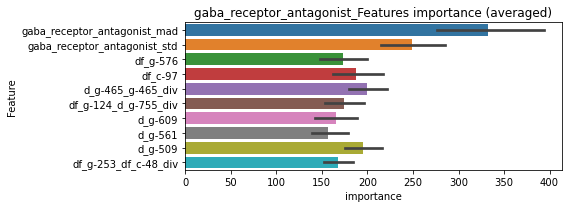

len(train_index) : 2586
len(valid_index) : 862
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124065	valid_1's binary_logloss: 0.0839722
[600]	training's binary_logloss: 0.0019035	valid_1's binary_logloss: 0.0601978
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00130355	valid_1's binary_logloss: 0.0581892


len(train_index) : 2586
len(valid_index) : 862
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120577	valid_1's binary_logloss: 0.0792029
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00231816	valid_1's binary_logloss: 0.0666778


len(train_index) : 2586
len(valid_index) : 862
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136586	valid_1's binary_logloss: 0.0497714
[600]	training's binary_logloss: 0.00212577	valid_1's binary_logloss: 0.0301286
[900]	training's binary_logloss: 0.000949438	valid_1's binary_logloss: 0.0253832
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000934673	valid_1's binary_logloss: 0.02519


len(train_index) : 2586
len(valid_index) : 862
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131238	valid_1's binary_logloss: 0.0703725
[600]	training's binary_logloss: 0.00202145	valid_1's binary_logloss: 0.0544675
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00214856	valid_1's binary_logloss: 0.054033


gaba_receptor_antagonist logloss: 0.05102250717811746


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235405	valid_1's binary_logloss: 0.0726096
[600]	training's binary_logloss: 0.00313907	valid_1's binary_logloss: 0.0393604
[900]	training's binary_logloss: 0.00116	valid_1's binary_logloss: 0.0335999
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.00108034	valid_1's binary_logloss: 0.033498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258311	valid_1's binary_logloss: 0.070725
[600]	training's binary_logloss: 0.00346717	valid_1's binary_logloss: 0.0318114
[900]	training's binary_logloss: 0.0012418	valid_1's binary_logloss: 0.0245002
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.00109078	valid_1's binary_logloss: 0.0239733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245484	valid_1's binary_logloss: 0.0616022
[600]	training's binary_logloss: 0.0

1 / 3 AUC score:0.998
y_Threshold: 0.0206622, Threshold: 0.1136899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.07958, conf_1:0.14780
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.1136899
Num_p_label: 23.0, Expected: 9.4, Adj_threshold_2: 0.1636899
threshold: 0.1636899, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203579	valid_1's binary_logloss: 0.0470289
[600]	training's binary_logloss: 0.00272116	valid_1's binary_logloss: 0.0164519
[900]	training's binary_logloss: 0.00104192	valid_1's binary_logloss: 0.0109751
[1200]	training's binary_logloss: 0.000742644	valid_1's binary_logloss: 0.00961775
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.000699849	valid_1's binary_logloss: 0.00944822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202854	valid_1's binary_logloss: 0.0754325
[600]	training's binary_logloss: 0.00264546	valid_1's binary_logloss: 0.0512484
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00159621	valid_1's binary_logloss: 0.0500297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205856	valid_1's binary_logloss: 0.0536606
[600]	training's binary_

2 / 3 AUC score:0.999
y_Threshold: 0.1092126, Threshold: 0.1636899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 638.0/3772
p_label_rate: 0.0243596 Vs.target_rate: 0.00235, Num_p_label: 97.0, conf_0:0.13095, conf_1:0.19643
Num_p_label: 97.0, Expected: 9.4, Adj_threshold_1: 0.1636899
Num_p_label: 80.0, Expected: 9.4, Adj_threshold_2: 0.2136899
Num_p_label: 66.0, Expected: 9.4, Adj_threshold_3: 0.2636899
Num_p_label: 59.0, Expected: 9.4, Adj_threshold_4: 0.3136899
Num_p_label: 51.0, Expected: 9.4, Adj_threshold_5: 0.3636899
Num_p_label: 45.0, Expected: 9.4, Adj_threshold_6: 0.4136899
Num_p_label: 43.0, Expected: 9.4, Adj_threshold_7: 0.4636899
Num_p_label: 35.0, Expected: 9.4, Adj_threshold_8: 0.5136899
Num_p_label: 29.0, Expected: 9.4, Adj_threshold_9: 0.5636899
Num_p_label: 26.0, Expected: 9.4, Adj_threshold_10: 0.6136899
threshold: 0.6636899, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 638.0/3772, y_label_rate: 0.1691410
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176894	valid_1's binary_logloss: 0.055535
[600]	training's binary_logloss: 0.00226087	valid_1's binary_logloss: 0.0227778
[900]	training's binary_logloss: 0.000918841	valid_1's binary_logloss: 0.0172836
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000789254	valid_1's binary_logloss: 0.0165026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199815	valid_1's binary_logloss: 0.0525272
[600]	training's binary_logloss: 0.00252329	valid_1's binary_logloss: 0.0227527
[900]	training's binary_logloss: 0.000967198	valid_1's binary_logloss: 0.0182091
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000739183	valid_1's binary_logloss: 0.0175522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190347	valid_1's binary_logloss: 0.0621801
[600]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1020353, Threshold: 0.6636899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 631.0/3758
p_label_rate: 0.0087896 Vs.target_rate: 0.00235, Num_p_label: 35.0, conf_0:0.50000, conf_1:0.73006
Num_p_label: 35.0, Expected: 9.4, Adj_threshold_1: 0.6636899
Num_p_label: 30.0, Expected: 9.4, Adj_threshold_2: 0.7136899
Num_p_label: 27.0, Expected: 9.4, Adj_threshold_3: 0.7636899
threshold: 0.7636899, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 631.0/3758, y_label_rate: 0.1679085


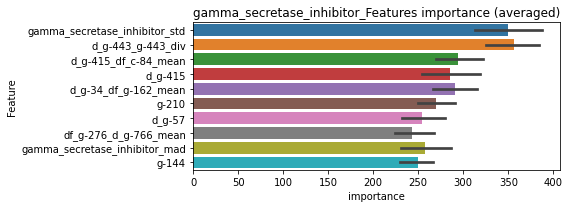

len(train_index) : 2818
len(valid_index) : 940
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181884	valid_1's binary_logloss: 0.0620262
[600]	training's binary_logloss: 0.00233287	valid_1's binary_logloss: 0.0366118
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.00106385	valid_1's binary_logloss: 0.0336492


len(train_index) : 2818
len(valid_index) : 940
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183017	valid_1's binary_logloss: 0.0687022
[600]	training's binary_logloss: 0.00227407	valid_1's binary_logloss: 0.0439015
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00097197	valid_1's binary_logloss: 0.0398547


len(train_index) : 2819
len(valid_index) : 939
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176277	valid_1's binary_logloss: 0.065946
[600]	training's binary_logloss: 0.0022878	valid_1's binary_logloss: 0.0366734
[900]	training's binary_logloss: 0.000910745	valid_1's binary_logloss: 0.0322962
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000799521	valid_1's binary_logloss: 0.0317242


len(train_index) : 2819
len(valid_index) : 939
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169006	valid_1's binary_logloss: 0.0511461
[600]	training's binary_logloss: 0.00221609	valid_1's binary_logloss: 0.0223615
[900]	training's binary_logloss: 0.000905928	valid_1's binary_logloss: 0.0179522
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.00079314	valid_1's binary_logloss: 0.017422


gamma_secretase_inhibitor logloss: 0.030665753435847955


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0905283	valid_1's binary_logloss: 0.309383
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.0500792	valid_1's binary_logloss: 0.298616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0877158	valid_1's binary_logloss: 0.290126
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.0403002	valid_1's binary_logloss: 0.282703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0931049	valid_1's binary_logloss: 0.266832
[600]	training's binary_logloss: 0.0290148	valid_1's binary_logloss: 0.239961
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0275638	valid_1's binary_logloss: 0.238971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0910765	valid_1's binary_logloss: 0.303023
[600]	training's binary_log

1 / 3 AUC score:0.876
y_Threshold: 0.1173972, Threshold: 0.3849139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 479 → Positive_corect_labels: 475/3418
p_label_rate: 0.0100452 Vs.target_rate: 0.01117, Num_p_label: 40.0, conf_0:0.26944, conf_1:0.50039
threshold: 0.3849139, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 475.0/3418, y_label_rate: 0.1389702
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0388018	valid_1's binary_logloss: 0.171018
[600]	training's binary_logloss: 0.00747717	valid_1's binary_logloss: 0.148973
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00737808	valid_1's binary_logloss: 0.148848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375457	valid_1's binary_logloss: 0.175917
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00872801	valid_1's binary_logloss: 0.157401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0401569	valid_1's binary_logloss: 0.153076
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00941537	valid_1's binary_logloss: 0.126478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363791	valid_1's binary_logloss: 0.174675
Early stopping, best it

2 / 3 AUC score:0.961
y_Threshold: 0.1202228, Threshold: 0.3849139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 405.0/3278
p_label_rate: 0.0263687 Vs.target_rate: 0.01117, Num_p_label: 105.0, conf_0:0.30793, conf_1:0.46190
Num_p_label: 105.0, Expected: 44.5, Adj_threshold_1: 0.3849139
Num_p_label: 91.0, Expected: 44.5, Adj_threshold_2: 0.4349139
Num_p_label: 78.0, Expected: 44.5, Adj_threshold_3: 0.4849139
Num_p_label: 61.0, Expected: 44.5, Adj_threshold_4: 0.5349139
threshold: 0.5349139, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 405.0/3278, y_label_rate: 0.1235509
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207835	valid_1's binary_logloss: 0.159962
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00614373	valid_1's binary_logloss: 0.151935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237305	valid_1's binary_logloss: 0.133733
[600]	training's binary_logloss: 0.00390286	valid_1's binary_logloss: 0.115792
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00390286	valid_1's binary_logloss: 0.115792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023199	valid_1's binary_logloss: 0.109398
[600]	training's binary_logloss: 0.00392221	valid_1's binary_logloss: 0.093369
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00282096	valid_1's binary_logloss: 0.0928819
Training until validation scores don't improve for 30 rounds
[300]	training's binar

3 / 3 AUC score:0.970
y_Threshold: 0.0871876, Threshold: 0.5349139, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 356.0/3180
p_label_rate: 0.0258664 Vs.target_rate: 0.01117, Num_p_label: 103.0, conf_0:0.48142, conf_1:0.58841
Num_p_label: 103.0, Expected: 44.5, Adj_threshold_1: 0.5349139
Num_p_label: 95.0, Expected: 44.5, Adj_threshold_2: 0.5849139
Num_p_label: 87.0, Expected: 44.5, Adj_threshold_3: 0.6349139
Num_p_label: 78.0, Expected: 44.5, Adj_threshold_4: 0.6849139
Num_p_label: 66.0, Expected: 44.5, Adj_threshold_5: 0.7349139
threshold: 0.7349139, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 356.0/3180, y_label_rate: 0.1119497


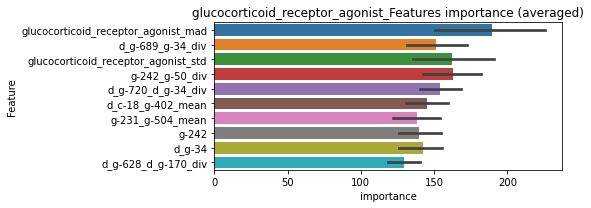

len(train_index) : 2385
len(valid_index) : 795
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01499	valid_1's binary_logloss: 0.101275
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00517367	valid_1's binary_logloss: 0.0943238


len(train_index) : 2385
len(valid_index) : 795
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154671	valid_1's binary_logloss: 0.0756567
[600]	training's binary_logloss: 0.0025966	valid_1's binary_logloss: 0.0533648
[900]	training's binary_logloss: 0.00112073	valid_1's binary_logloss: 0.0488905
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000987023	valid_1's binary_logloss: 0.0478053


len(train_index) : 2385
len(valid_index) : 795
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156012	valid_1's binary_logloss: 0.11124


len(train_index) : 2385
len(valid_index) : 795
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00627379	valid_1's binary_logloss: 0.106188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150411	valid_1's binary_logloss: 0.0894913


glucocorticoid_receptor_agonist logloss: 0.08060473066974488


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00414924	valid_1's binary_logloss: 0.0741022
neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354787	valid_1's binary_logloss: 0.0113691
[600]	training's binary_logloss: 0.000481346	valid_1's binary_logloss: 0.00434072
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000324622	valid_1's binary_logloss: 0.00372692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362129	valid_1's binary_logloss: 0.00691603
[600]	training's binary_logloss: 0.000506568	valid_1's binary_logloss: 0.00197536
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000338824	valid_1's binary_logloss: 0.00163178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357523	valid_1's binary_logloss: 0.00762375
[600]	training's binary_logloss: 0.00049073	valid_1's binary_logloss: 0.00204077
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000326111	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022490, Threshold: 0.0082064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055, Num_p_label: 40.0, conf_0:0.00574, conf_1:0.01067
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0082064
Num_p_label: 7.0, Expected: 2.2, Adj_threshold_2: 0.0582064
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_3: 0.1082064
threshold: 0.1082064, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311704	valid_1's binary_logloss: 0.00840574
[600]	training's binary_logloss: 0.000423408	valid_1's binary_logloss: 0.00287925
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000312155	valid_1's binary_logloss: 0.0024069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316918	valid_1's binary_logloss: 0.00532733
[600]	training's binary_logloss: 0.000430009	valid_1's binary_logloss: 0.00114087
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000309092	valid_1's binary_logloss: 0.000928387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313224	valid_1's binary_logloss: 0.00527007
[600]	training's binary_logloss: 0.000435136	valid_1's binary_logloss: 0.000978089
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000304136	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1172375, Threshold: 0.1082064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00055, Num_p_label: 15.0, conf_0:0.08657, conf_1:0.12985
Num_p_label: 15.0, Expected: 2.2, Adj_threshold_1: 0.1082064
Num_p_label: 11.0, Expected: 2.2, Adj_threshold_2: 0.1582064
Num_p_label: 9.0, Expected: 2.2, Adj_threshold_3: 0.2082064
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_4: 0.2582064
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_5: 0.3082064
Num_p_label: 7.0, Expected: 2.2, Adj_threshold_6: 0.3582064
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_7: 0.4082064
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_8: 0.4582064
threshold: 0.4582064, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311704	valid_1's binary_logloss: 0.00840574
[600]	training's binary_logloss: 0.000423408	valid_1's binary_logloss: 0.00287925
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000312155	valid_1's binary_logloss: 0.0024069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316918	valid_1's binary_logloss: 0.00532733
[600]	training's binary_logloss: 0.000430009	valid_1's binary_logloss: 0.00114087
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000309092	valid_1's binary_logloss: 0.000928387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313224	valid_1's binary_logloss: 0.00527007
[600]	training's binary_logloss: 0.000435136	valid_1's binary_logloss: 0.000978089
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000304136	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1172375, Threshold: 0.4582064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00055, Num_p_label: 5.0, conf_0:0.41239, conf_1:0.50403
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.4582064
threshold: 0.4582064, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


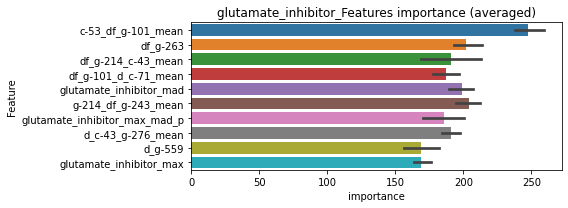

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306478	valid_1's binary_logloss: 0.00856603
[600]	training's binary_logloss: 0.000426835	valid_1's binary_logloss: 0.00249803
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000303825	valid_1's binary_logloss: 0.00205811


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323015	valid_1's binary_logloss: 0.0060936
[600]	training's binary_logloss: 0.00043536	valid_1's binary_logloss: 0.001378
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000318664	valid_1's binary_logloss: 0.00115084


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313706	valid_1's binary_logloss: 0.00525048
[600]	training's binary_logloss: 0.000435853	valid_1's binary_logloss: 0.000946572
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000305418	valid_1's binary_logloss: 0.000714319


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304443	valid_1's binary_logloss: 0.0052978
[600]	training's binary_logloss: 0.000421617	valid_1's binary_logloss: 0.00143234
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000314412	valid_1's binary_logloss: 0.00123381


glutamate_inhibitor logloss: 0.001289569766884635


neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222878	valid_1's binary_logloss: 0.113621
[600]	training's binary_logloss: 0.0032818	valid_1's binary_logloss: 0.0877272
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00302207	valid_1's binary_logloss: 0.0872459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236645	valid_1's binary_logloss: 0.0864545
[600]	training's binary_logloss: 0.00363637	valid_1's binary_logloss: 0.0572811
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.0017631	valid_1's binary_logloss: 0.0540176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237651	valid_1's binary_logloss: 0.0626689
[600]	training's binary_logloss: 0.00368432	valid_1's binary_logloss: 0.0333328
[900]	training's binary_logloss: 0.00137908	valid_1's binary_logloss: 0.0285449
[1200]	training's binary_logloss:

1 / 3 AUC score:0.992
y_Threshold: 0.0321019, Threshold: 0.3538448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 641/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.24769, conf_1:0.46000
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.3538448
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_2: 0.4038448
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_3: 0.4538448
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_4: 0.5038448
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_5: 0.5538448
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_6: 0.6038448
threshold: 0.6038448, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3777, y_label_rate: 0.1697114
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156351	valid_1's binary_logloss: 0.0806073
[600]	training's binary_logloss: 0.00229607	valid_1's binary_logloss: 0.0607002
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00156371	valid_1's binary_logloss: 0.0593322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172856	valid_1's binary_logloss: 0.0613174
[600]	training's binary_logloss: 0.00246019	valid_1's binary_logloss: 0.0389212
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00184769	valid_1's binary_logloss: 0.03726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174366	valid_1's binary_logloss: 0.0593235
[600]	training's binary_logloss: 0.00254027	valid_1's binary_logloss: 0.0302152
[900]	training's binary_logloss: 0.00103	valid_1's binary_logloss: 0.0237577
Early stopping, best iteration is:


2 / 3 AUC score:0.997
y_Threshold: 0.1543361, Threshold: 0.6038448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 622.0/3739
p_label_rate: 0.0163235 Vs.target_rate: 0.00311, Num_p_label: 65.0, conf_0:0.48308, conf_1:0.72461
Num_p_label: 65.0, Expected: 12.4, Adj_threshold_1: 0.6038448
Num_p_label: 51.0, Expected: 12.4, Adj_threshold_2: 0.6538448
Num_p_label: 48.0, Expected: 12.4, Adj_threshold_3: 0.7038448
Num_p_label: 43.0, Expected: 12.4, Adj_threshold_4: 0.7538448
threshold: 0.7538448, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 622.0/3739, y_label_rate: 0.1663546
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136872	valid_1's binary_logloss: 0.0644346
[600]	training's binary_logloss: 0.00201408	valid_1's binary_logloss: 0.0452391
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00153223	valid_1's binary_logloss: 0.044037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142152	valid_1's binary_logloss: 0.0501833
[600]	training's binary_logloss: 0.00208623	valid_1's binary_logloss: 0.0264731
[900]	training's binary_logloss: 0.000910908	valid_1's binary_logloss: 0.0218846
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000789623	valid_1's binary_logloss: 0.0214584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139307	valid_1's binary_logloss: 0.0606609
[600]	training's binary_logloss: 0.00202936	valid_1's binary_logloss: 0.0376318
[900]	training's binary_loglo

3 / 3 AUC score:0.999
y_Threshold: 0.1451492, Threshold: 0.7538448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 608.0/3711
p_label_rate: 0.0160723 Vs.target_rate: 0.00311, Num_p_label: 64.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 64.0, Expected: 12.4, Adj_threshold_1: 0.7538448
threshold: 0.7538448, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 608.0/3711, y_label_rate: 0.1638372


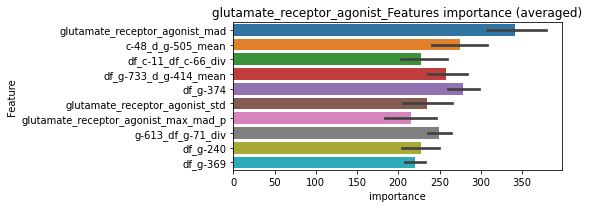

len(train_index) : 2783
len(valid_index) : 928
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128457	valid_1's binary_logloss: 0.0733779
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00225436	valid_1's binary_logloss: 0.0629923


len(train_index) : 2783
len(valid_index) : 928
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134557	valid_1's binary_logloss: 0.0551412
[600]	training's binary_logloss: 0.00186606	valid_1's binary_logloss: 0.0309497
[900]	training's binary_logloss: 0.000840987	valid_1's binary_logloss: 0.0270604
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000710228	valid_1's binary_logloss: 0.0263837


len(train_index) : 2783
len(valid_index) : 928
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132792	valid_1's binary_logloss: 0.0413671
[600]	training's binary_logloss: 0.00190536	valid_1's binary_logloss: 0.0177932
[900]	training's binary_logloss: 0.000859573	valid_1's binary_logloss: 0.0136867
[1200]	training's binary_logloss: 0.00068373	valid_1's binary_logloss: 0.0131072
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.000660935	valid_1's binary_logloss: 0.0129469


len(train_index) : 2784
len(valid_index) : 927
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131	valid_1's binary_logloss: 0.0493467
[600]	training's binary_logloss: 0.00189447	valid_1's binary_logloss: 0.0279033
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000913551	valid_1's binary_logloss: 0.0248342


glutamate_receptor_agonist logloss: 0.03179930656423875


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.112556	valid_1's binary_logloss: 0.368956
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.0997145	valid_1's binary_logloss: 0.368068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.110841	valid_1's binary_logloss: 0.361601
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.102915	valid_1's binary_logloss: 0.3602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.108488	valid_1's binary_logloss: 0.351112
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0937306	valid_1's binary_logloss: 0.349565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.112823	valid_1's binary_logloss: 0.344325


1 / 3 AUC score:0.780
y_Threshold: 0.1529499, Threshold: 0.4277212, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.0788545	valid_1's binary_logloss: 0.338699


Remove_noisy_data: 674 → Positive_corect_labels: 375/3208
p_label_rate: 0.0100452 Vs.target_rate: 0.01541, Num_p_label: 40.0, conf_0:0.29940, conf_1:0.55604
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.4277212
Num_p_label: 52.0, Expected: 61.4, Adj_threshold_2: 0.3977212
threshold: 0.3977212, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 375.0/3208, y_label_rate: 0.1168953
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257504	valid_1's binary_logloss: 0.15711
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.0124098	valid_1's binary_logloss: 0.154196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024622	valid_1's binary_logloss: 0.151677
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.0110966	valid_1's binary_logloss: 0.146583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246284	valid_1's binary_logloss: 0.124417
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00788268	valid_1's binary_logloss: 0.113604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255779	valid_1's binary_logloss: 0.139811
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00865117	valid_1's binary_logloss: 0

2 / 3 AUC score:0.963
y_Threshold: 0.1014466, Threshold: 0.3977212, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 315.0/3088
p_label_rate: 0.0439478 Vs.target_rate: 0.01541, Num_p_label: 175.0, conf_0:0.31818, conf_1:0.47727
Num_p_label: 175.0, Expected: 61.4, Adj_threshold_1: 0.3977212
Num_p_label: 165.0, Expected: 61.4, Adj_threshold_2: 0.4477212
Num_p_label: 154.0, Expected: 61.4, Adj_threshold_3: 0.4977212
Num_p_label: 145.0, Expected: 61.4, Adj_threshold_4: 0.5477212
Num_p_label: 132.0, Expected: 61.4, Adj_threshold_5: 0.5977212
Num_p_label: 120.0, Expected: 61.4, Adj_threshold_6: 0.6477212
Num_p_label: 113.0, Expected: 61.4, Adj_threshold_7: 0.6977212
Num_p_label: 104.0, Expected: 61.4, Adj_threshold_8: 0.7477212
Num_p_label: 83.0, Expected: 61.4, Adj_threshold_9: 0.7977212
threshold: 0.7977212, positive_p_label: 83.0/3982, p_label_rate: 0.0208438
positive_y_label: 315.0/3088, y_label_rate: 0.1020078
================= Pseudo labeling 3 / 3 ============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144735	valid_1's binary_logloss: 0.100692
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.0044225	valid_1's binary_logloss: 0.0917585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149141	valid_1's binary_logloss: 0.0781326
[600]	training's binary_logloss: 0.00248316	valid_1's binary_logloss: 0.062308
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.0020155	valid_1's binary_logloss: 0.061278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141324	valid_1's binary_logloss: 0.116039
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00531112	valid_1's binary_logloss: 0.112121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145355	valid_1's binary_logloss: 0.0974647
[600]	training's binar

3 / 3 AUC score:0.988
y_Threshold: 0.0674369, Threshold: 0.7977212, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 278.0/3014
p_label_rate: 0.0379206 Vs.target_rate: 0.01541, Num_p_label: 151.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 151.0, Expected: 61.4, Adj_threshold_1: 0.7977212
threshold: 0.7977212, positive_p_label: 151.0/3982, p_label_rate: 0.0379206
positive_y_label: 278.0/3014, y_label_rate: 0.0922362


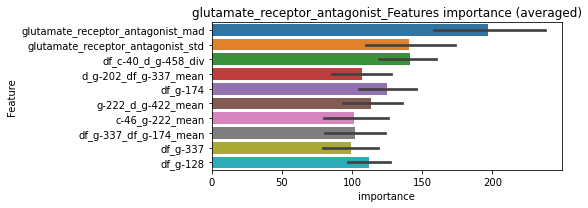

len(train_index) : 2260
len(valid_index) : 754
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923602	valid_1's binary_logloss: 0.0806755


len(train_index) : 2260
len(valid_index) : 754
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00300078	valid_1's binary_logloss: 0.0736948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00883831	valid_1's binary_logloss: 0.0552372
[600]	training's binary_logloss: 0.00150759	valid_1's binary_logloss: 0.0432135
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00154717	valid_1's binary_logloss: 0.0430354


len(train_index) : 2261
len(valid_index) : 753
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00889238	valid_1's binary_logloss: 0.0791134


len(train_index) : 2261
len(valid_index) : 753
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0023004	valid_1's binary_logloss: 0.0689427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877714	valid_1's binary_logloss: 0.0658971


glutamate_receptor_antagonist logloss: 0.06232544965433389


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.00543219	valid_1's binary_logloss: 0.0636394
neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585741	valid_1's binary_logloss: 0.012029
[600]	training's binary_logloss: 0.000753304	valid_1's binary_logloss: 0.00347049
[900]	training's binary_logloss: 0.000419315	valid_1's binary_logloss: 0.00252056
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000420795	valid_1's binary_logloss: 0.00251796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00581829	valid_1's binary_logloss: 0.0168
[600]	training's binary_logloss: 0.000726688	valid_1's binary_logloss: 0.00709879
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000426057	valid_1's binary_logloss: 0.00579619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005624	valid_1's binary_logloss: 0.0155718
[600]	training's binary_logloss: 0.000735843	valid_1's binary_logloss: 0.00758063
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0038281, Threshold: 0.0123429, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00864, conf_1:0.01605
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0123429
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0623429
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1123429
threshold: 0.1123429, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492569	valid_1's binary_logloss: 0.0111305
[600]	training's binary_logloss: 0.000648791	valid_1's binary_logloss: 0.00332444
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000392198	valid_1's binary_logloss: 0.0026774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483463	valid_1's binary_logloss: 0.0103411
[600]	training's binary_logloss: 0.000641079	valid_1's binary_logloss: 0.00302797
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.00038965	valid_1's binary_logloss: 0.00237428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487298	valid_1's binary_logloss: 0.0123489
[600]	training's binary_logloss: 0.000640795	valid_1's binary_logloss: 0.00581083
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000385644	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1685428, Threshold: 0.1123429, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0057760 Vs.target_rate: 0.00076, Num_p_label: 23.0, conf_0:0.08987, conf_1:0.13481
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.1123429
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.1623429
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.2123429
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.2623429
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.3123429
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.3623429
threshold: 0.3623429, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476791	valid_1's binary_logloss: 0.00800804
[600]	training's binary_logloss: 0.000634098	valid_1's binary_logloss: 0.00151823
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000381063	valid_1's binary_logloss: 0.00101068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483697	valid_1's binary_logloss: 0.013124
[600]	training's binary_logloss: 0.000634804	valid_1's binary_logloss: 0.00463086
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000391216	valid_1's binary_logloss: 0.00392329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474594	valid_1's binary_logloss: 0.00811928
[600]	training's binary_logloss: 0.000638229	valid_1's binary_logloss: 0.00163368
[900]	training's binary_logloss: 0.000378699	valid_1's binary_logloss: 0.00106764
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.2662010, Threshold: 0.3623429, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00076, Num_p_label: 9.0, conf_0:0.32611, conf_1:0.39858
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.3623429
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.4123429
threshold: 0.4123429, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


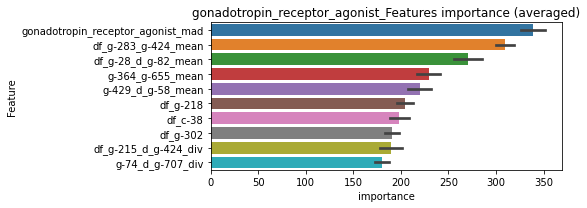

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477437	valid_1's binary_logloss: 0.00812517
[600]	training's binary_logloss: 0.000635738	valid_1's binary_logloss: 0.00154746
[900]	training's binary_logloss: 0.000380926	valid_1's binary_logloss: 0.00102958
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000380926	valid_1's binary_logloss: 0.00102958


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482305	valid_1's binary_logloss: 0.0136475
[600]	training's binary_logloss: 0.000630135	valid_1's binary_logloss: 0.00511511
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000412617	valid_1's binary_logloss: 0.00443648


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473845	valid_1's binary_logloss: 0.00805045
[600]	training's binary_logloss: 0.000633457	valid_1's binary_logloss: 0.00150342
[900]	training's binary_logloss: 0.000380795	valid_1's binary_logloss: 0.000994124
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000381063	valid_1's binary_logloss: 0.000993895


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457387	valid_1's binary_logloss: 0.015565
[600]	training's binary_logloss: 0.000600528	valid_1's binary_logloss: 0.00616169
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000370488	valid_1's binary_logloss: 0.00526005


gonadotropin_receptor_agonist logloss: 0.0029323180039616745


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240987	valid_1's binary_logloss: 0.100029
[600]	training's binary_logloss: 0.00346013	valid_1's binary_logloss: 0.0618332
[900]	training's binary_logloss: 0.00130742	valid_1's binary_logloss: 0.0569194
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00123164	valid_1's binary_logloss: 0.0563927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025436	valid_1's binary_logloss: 0.0824618
[600]	training's binary_logloss: 0.00370237	valid_1's binary_logloss: 0.0432901
[900]	training's binary_logloss: 0.00135526	valid_1's binary_logloss: 0.0359655
Early stopping, best iteration is:
[1156]	training's binary_logloss: 0.000938738	valid_1's binary_logloss: 0.0346515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0258545	valid_1's binary_logloss: 0.0644124
[600]	training's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0238873, Threshold: 0.0857517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.06003, conf_1:0.11148
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0857517
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1357517
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1857517
threshold: 0.1857517, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213213	valid_1's binary_logloss: 0.08761
[600]	training's binary_logloss: 0.00294996	valid_1's binary_logloss: 0.0497009
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00136928	valid_1's binary_logloss: 0.0446187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227179	valid_1's binary_logloss: 0.075617
[600]	training's binary_logloss: 0.0031098	valid_1's binary_logloss: 0.0403669
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.00135889	valid_1's binary_logloss: 0.0350572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231207	valid_1's binary_logloss: 0.0706656
[600]	training's binary_logloss: 0.00317602	valid_1's binary_logloss: 0.0379964
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00135486	valid_1's binary_logloss: 0.0336316

2 / 3 AUC score:0.999
y_Threshold: 0.1271184, Threshold: 0.1857517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0180814 Vs.target_rate: 0.00252, Num_p_label: 72.0, conf_0:0.14860, conf_1:0.22290
Num_p_label: 72.0, Expected: 10.0, Adj_threshold_1: 0.1857517
Num_p_label: 47.0, Expected: 10.0, Adj_threshold_2: 0.2357517
Num_p_label: 38.0, Expected: 10.0, Adj_threshold_3: 0.2857517
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_4: 0.3357517
Num_p_label: 22.0, Expected: 10.0, Adj_threshold_5: 0.3857517
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_6: 0.4357517
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_7: 0.4857517
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_8: 0.5357517
threshold: 0.5357517, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 638.0/3769, y_label_rate: 0.1692757
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206282	valid_1's binary_logloss: 0.076568
[600]	training's binary_logloss: 0.00287117	valid_1's binary_logloss: 0.0390005
[900]	training's binary_logloss: 0.0011424	valid_1's binary_logloss: 0.0324442
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000917651	valid_1's binary_logloss: 0.0315375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202356	valid_1's binary_logloss: 0.0666428
[600]	training's binary_logloss: 0.00284767	valid_1's binary_logloss: 0.0355406
[900]	training's binary_logloss: 0.00113652	valid_1's binary_logloss: 0.030119
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000937278	valid_1's binary_logloss: 0.0290112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019986	valid_1's binary_logloss: 0.0649916
[600]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0983096, Threshold: 0.5357517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 631.0/3755
p_label_rate: 0.0047715 Vs.target_rate: 0.00252, Num_p_label: 19.0, conf_0:0.48218, conf_1:0.58933
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_1: 0.5357517
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_2: 0.5857517
threshold: 0.5857517, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 631.0/3755, y_label_rate: 0.1680426


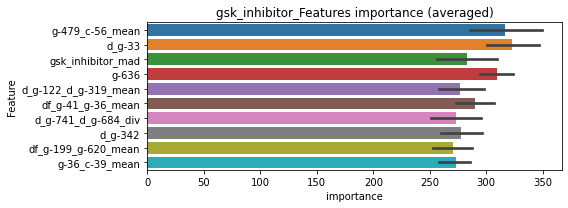

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197036	valid_1's binary_logloss: 0.0762558
[600]	training's binary_logloss: 0.00271145	valid_1's binary_logloss: 0.0459818
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00131567	valid_1's binary_logloss: 0.0421795


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189593	valid_1's binary_logloss: 0.103785
[600]	training's binary_logloss: 0.00264993	valid_1's binary_logloss: 0.072777
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00185572	valid_1's binary_logloss: 0.0703551


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206016	valid_1's binary_logloss: 0.0611751
[600]	training's binary_logloss: 0.00287978	valid_1's binary_logloss: 0.0303028
[900]	training's binary_logloss: 0.00113637	valid_1's binary_logloss: 0.0252092
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00107122	valid_1's binary_logloss: 0.024993


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202984	valid_1's binary_logloss: 0.0608588
[600]	training's binary_logloss: 0.00278877	valid_1's binary_logloss: 0.0288207
[900]	training's binary_logloss: 0.00112679	valid_1's binary_logloss: 0.0230155
[1200]	training's binary_logloss: 0.000794391	valid_1's binary_logloss: 0.0214494
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.000795544	valid_1's binary_logloss: 0.0214404


gsk_inhibitor logloss: 0.039747167218365555


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0265586	valid_1's binary_logloss: 0.103345
[600]	training's binary_logloss: 0.00392971	valid_1's binary_logloss: 0.0737371
[900]	training's binary_logloss: 0.00140799	valid_1's binary_logloss: 0.0695261
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00142911	valid_1's binary_logloss: 0.0693339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264664	valid_1's binary_logloss: 0.10701
[600]	training's binary_logloss: 0.00391361	valid_1's binary_logloss: 0.0764061
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00200908	valid_1's binary_logloss: 0.0727409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271287	valid_1's binary_logloss: 0.070585
[600]	training's binary_logloss: 0.00412823	valid_1's binary_logloss: 0.0359111
[900]	training's binary_logloss: 0

1 / 3 AUC score:0.992
y_Threshold: 0.0288327, Threshold: 0.1090900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.07636, conf_1:0.14182
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.1090900
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_2: 0.1590900
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_3: 0.2090900
threshold: 0.2090900, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 634.0/3755, y_label_rate: 0.1688415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190391	valid_1's binary_logloss: 0.0822271
[600]	training's binary_logloss: 0.00275796	valid_1's binary_logloss: 0.0576214
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.0016613	valid_1's binary_logloss: 0.0557638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194626	valid_1's binary_logloss: 0.0727065
[600]	training's binary_logloss: 0.00290959	valid_1's binary_logloss: 0.0429497
[900]	training's binary_logloss: 0.00115552	valid_1's binary_logloss: 0.0386241
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00115552	valid_1's binary_logloss: 0.0386241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0212349	valid_1's binary_logloss: 0.0572388
[600]	training's binary_logloss: 0.00307074	valid_1's binary_logloss: 0.0286358
[900]	training's binary_logloss

2 / 3 AUC score:0.999
y_Threshold: 0.0789628, Threshold: 0.2090900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0102963 Vs.target_rate: 0.00302, Num_p_label: 41.0, conf_0:0.16727, conf_1:0.25091
Num_p_label: 41.0, Expected: 12.0, Adj_threshold_1: 0.2090900
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_2: 0.2590900
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_3: 0.3090900
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.3590900
threshold: 0.3590900, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 618.0/3723, y_label_rate: 0.1659952
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168166	valid_1's binary_logloss: 0.0652243
[600]	training's binary_logloss: 0.00243556	valid_1's binary_logloss: 0.0422995
[900]	training's binary_logloss: 0.00103151	valid_1's binary_logloss: 0.039648
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000917885	valid_1's binary_logloss: 0.0393574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171212	valid_1's binary_logloss: 0.0651979
[600]	training's binary_logloss: 0.00252027	valid_1's binary_logloss: 0.0362874
[900]	training's binary_logloss: 0.00105179	valid_1's binary_logloss: 0.030506
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000840231	valid_1's binary_logloss: 0.029326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178082	valid_1's binary_logloss: 0.067156
[600]	training's binary_logloss

3 / 3 AUC score:0.999
y_Threshold: 0.0843271, Threshold: 0.3590900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 603.0/3693
p_label_rate: 0.0060271 Vs.target_rate: 0.00302, Num_p_label: 24.0, conf_0:0.32318, conf_1:0.39500
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_1: 0.3590900
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_2: 0.4090900
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_3: 0.4590900
threshold: 0.4590900, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 603.0/3693, y_label_rate: 0.1632819


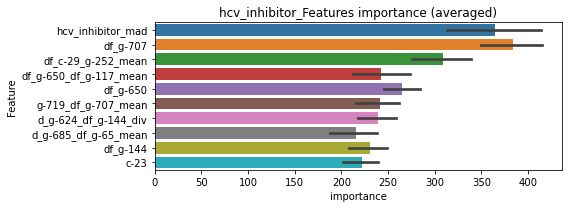

len(train_index) : 2769
len(valid_index) : 924
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154208	valid_1's binary_logloss: 0.0826566
[600]	training's binary_logloss: 0.00227407	valid_1's binary_logloss: 0.0640974
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00194995	valid_1's binary_logloss: 0.0636934


len(train_index) : 2770
len(valid_index) : 923
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150271	valid_1's binary_logloss: 0.0734811
[600]	training's binary_logloss: 0.0021732	valid_1's binary_logloss: 0.0617512
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00179329	valid_1's binary_logloss: 0.0612771


len(train_index) : 2770
len(valid_index) : 923
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160717	valid_1's binary_logloss: 0.0529314
[600]	training's binary_logloss: 0.00229329	valid_1's binary_logloss: 0.0308926
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00114288	valid_1's binary_logloss: 0.0285479


len(train_index) : 2770
len(valid_index) : 923
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155164	valid_1's binary_logloss: 0.0715508
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00263601	valid_1's binary_logloss: 0.0540979


hcv_inhibitor logloss: 0.051907278177833506


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0380424	valid_1's binary_logloss: 0.161214
[600]	training's binary_logloss: 0.00683593	valid_1's binary_logloss: 0.137116
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00395652	valid_1's binary_logloss: 0.135024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.04175	valid_1's binary_logloss: 0.140681
[600]	training's binary_logloss: 0.00763183	valid_1's binary_logloss: 0.0995703
[900]	training's binary_logloss: 0.00240122	valid_1's binary_logloss: 0.0914855
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00250482	valid_1's binary_logloss: 0.0913484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0380511	valid_1's binary_logloss: 0.153894
[600]	training's binary_logloss: 0.00706732	valid_1's binary_logloss: 0.128893
Early stopping, best iteration is:
[63

1 / 3 AUC score:0.982
y_Threshold: 0.0401069, Threshold: 0.2529460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 191 → Positive_corect_labels: 625/3739
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.17706, conf_1:0.32883
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.2529460
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_2: 0.3029460
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_3: 0.3529460
threshold: 0.3529460, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 625.0/3739, y_label_rate: 0.1671570
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308778	valid_1's binary_logloss: 0.100993
[600]	training's binary_logloss: 0.00495684	valid_1's binary_logloss: 0.0577711
[900]	training's binary_logloss: 0.00174261	valid_1's binary_logloss: 0.047645
[1200]	training's binary_logloss: 0.00108529	valid_1's binary_logloss: 0.0445021
Early stopping, best iteration is:
[1266]	training's binary_logloss: 0.00102522	valid_1's binary_logloss: 0.0441411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311799	valid_1's binary_logloss: 0.106811
[600]	training's binary_logloss: 0.00512815	valid_1's binary_logloss: 0.0675994
[900]	training's binary_logloss: 0.0017659	valid_1's binary_logloss: 0.0573282
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.0017659	valid_1's binary_logloss: 0.0573282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss:

2 / 3 AUC score:0.998
y_Threshold: 0.0987899, Threshold: 0.3529460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 600.0/3689
p_label_rate: 0.0200904 Vs.target_rate: 0.00445, Num_p_label: 80.0, conf_0:0.28236, conf_1:0.42354
Num_p_label: 80.0, Expected: 17.7, Adj_threshold_1: 0.3529460
Num_p_label: 69.0, Expected: 17.7, Adj_threshold_2: 0.4029460
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_3: 0.4529460
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_4: 0.5029460
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_5: 0.5529460
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_6: 0.6029460
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_7: 0.6529460
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_8: 0.7029460
threshold: 0.7029460, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 600.0/3689, y_label_rate: 0.1626457
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253033	valid_1's binary_logloss: 0.097464
[600]	training's binary_logloss: 0.00396971	valid_1's binary_logloss: 0.0695091
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00164881	valid_1's binary_logloss: 0.0666978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250069	valid_1's binary_logloss: 0.111194
[600]	training's binary_logloss: 0.0039223	valid_1's binary_logloss: 0.0801785
[900]	training's binary_logloss: 0.00148149	valid_1's binary_logloss: 0.0749875
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00141462	valid_1's binary_logloss: 0.0744933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271683	valid_1's binary_logloss: 0.087842
[600]	training's binary_logloss: 0.00423978	valid_1's binary_logloss: 0.0501102
[900]	training's binary_logloss: 0

3 / 3 AUC score:0.994
y_Threshold: 0.0853349, Threshold: 0.7029460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 582.0/3653
p_label_rate: 0.0110497 Vs.target_rate: 0.00445, Num_p_label: 44.0, conf_0:0.50000, conf_1:0.77324
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_1: 0.7029460
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_2: 0.7529460
threshold: 0.7529460, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 582.0/3653, y_label_rate: 0.1593211


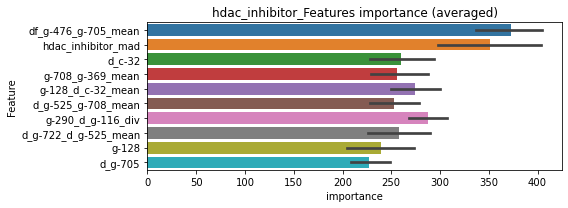

len(train_index) : 2739
len(valid_index) : 914
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230537	valid_1's binary_logloss: 0.100037
[600]	training's binary_logloss: 0.00344453	valid_1's binary_logloss: 0.0703052
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00184716	valid_1's binary_logloss: 0.0680209


len(train_index) : 2740
len(valid_index) : 913
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0233502	valid_1's binary_logloss: 0.0883883
[600]	training's binary_logloss: 0.00354908	valid_1's binary_logloss: 0.0558728
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00333693	valid_1's binary_logloss: 0.0553143


len(train_index) : 2740
len(valid_index) : 913
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219266	valid_1's binary_logloss: 0.0877784
[600]	training's binary_logloss: 0.0034015	valid_1's binary_logloss: 0.0507402
[900]	training's binary_logloss: 0.00131415	valid_1's binary_logloss: 0.04327
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.00107962	valid_1's binary_logloss: 0.0420413


len(train_index) : 2740
len(valid_index) : 913
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226633	valid_1's binary_logloss: 0.0901794
[600]	training's binary_logloss: 0.00348847	valid_1's binary_logloss: 0.0666015
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.00154485	valid_1's binary_logloss: 0.0626513


hdac_inhibitor logloss: 0.05700998185967857


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185157	valid_1's binary_logloss: 0.0869671
[600]	training's binary_logloss: 0.00262242	valid_1's binary_logloss: 0.0576096
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00144022	valid_1's binary_logloss: 0.0538174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186364	valid_1's binary_logloss: 0.072538
[600]	training's binary_logloss: 0.00258584	valid_1's binary_logloss: 0.0403473
[900]	training's binary_logloss: 0.00102256	valid_1's binary_logloss: 0.034251
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00101817	valid_1's binary_logloss: 0.0342248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206626	valid_1's binary_logloss: 0.0514124
[600]	training's binary_logloss: 0.0029094	valid_1's binary_logloss: 0.0236578
[900]	training's binary_logloss: 

1 / 3 AUC score:0.998
y_Threshold: 0.0205134, Threshold: 0.1194048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00248, Num_p_label: 40.0, conf_0:0.08358, conf_1:0.15523
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.1194048
Num_p_label: 29.0, Expected: 9.9, Adj_threshold_2: 0.1694048
Num_p_label: 24.0, Expected: 9.9, Adj_threshold_3: 0.2194048
threshold: 0.2194048, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159165	valid_1's binary_logloss: 0.0553941
[600]	training's binary_logloss: 0.00220372	valid_1's binary_logloss: 0.0278755
[900]	training's binary_logloss: 0.000901779	valid_1's binary_logloss: 0.0227417
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000772105	valid_1's binary_logloss: 0.0222423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015096	valid_1's binary_logloss: 0.0665779
[600]	training's binary_logloss: 0.00207063	valid_1's binary_logloss: 0.0417864
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00134396	valid_1's binary_logloss: 0.0397568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162698	valid_1's binary_logloss: 0.0527731
[600]	training's binary_logloss: 0.00218404	valid_1's binary_logloss: 0.0290838
Early stopping, best iterati

2 / 3 AUC score:1.000
y_Threshold: 0.2025297, Threshold: 0.2194048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 634.0/3763
p_label_rate: 0.0256153 Vs.target_rate: 0.00248, Num_p_label: 102.0, conf_0:0.17552, conf_1:0.26329
Num_p_label: 102.0, Expected: 9.9, Adj_threshold_1: 0.2194048
Num_p_label: 82.0, Expected: 9.9, Adj_threshold_2: 0.2694048
Num_p_label: 76.0, Expected: 9.9, Adj_threshold_3: 0.3194048
Num_p_label: 70.0, Expected: 9.9, Adj_threshold_4: 0.3694048
Num_p_label: 67.0, Expected: 9.9, Adj_threshold_5: 0.4194048
Num_p_label: 62.0, Expected: 9.9, Adj_threshold_6: 0.4694048
Num_p_label: 58.0, Expected: 9.9, Adj_threshold_7: 0.5194048
Num_p_label: 52.0, Expected: 9.9, Adj_threshold_8: 0.5694048
Num_p_label: 47.0, Expected: 9.9, Adj_threshold_9: 0.6194048
Num_p_label: 42.0, Expected: 9.9, Adj_threshold_10: 0.6694048
threshold: 0.7194048, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 634.0/3763, y_label_rate: 0.1684826
=======

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133657	valid_1's binary_logloss: 0.0499009
[600]	training's binary_logloss: 0.00184657	valid_1's binary_logloss: 0.0309257
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000862906	valid_1's binary_logloss: 0.027729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136876	valid_1's binary_logloss: 0.0449948
[600]	training's binary_logloss: 0.00189574	valid_1's binary_logloss: 0.0199854
[900]	training's binary_logloss: 0.000802935	valid_1's binary_logloss: 0.0151458
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000711193	valid_1's binary_logloss: 0.0147309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134091	valid_1's binary_logloss: 0.0617563
[600]	training's binary_logloss: 0.00178097	valid_1's binary_logloss: 0.0422346
Early stopping, best iterat

3 / 3 AUC score:0.998
y_Threshold: 0.1347919, Threshold: 0.7194048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 621.0/3737
p_label_rate: 0.0168257 Vs.target_rate: 0.00248, Num_p_label: 67.0, conf_0:0.50000, conf_1:0.79135
Num_p_label: 67.0, Expected: 9.9, Adj_threshold_1: 0.7194048
Num_p_label: 65.0, Expected: 9.9, Adj_threshold_2: 0.7694048
threshold: 0.7694048, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 621.0/3737, y_label_rate: 0.1661761


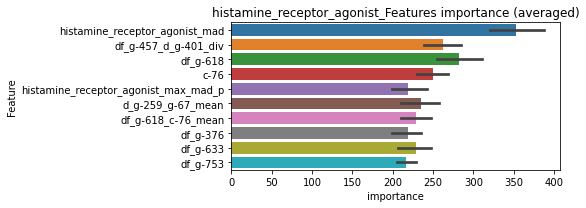

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120261	valid_1's binary_logloss: 0.0571606
[600]	training's binary_logloss: 0.0016126	valid_1's binary_logloss: 0.0332803
[900]	training's binary_logloss: 0.000726132	valid_1's binary_logloss: 0.029065
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000716823	valid_1's binary_logloss: 0.0290122


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122081	valid_1's binary_logloss: 0.042411
[600]	training's binary_logloss: 0.00168239	valid_1's binary_logloss: 0.019421
[900]	training's binary_logloss: 0.000752008	valid_1's binary_logloss: 0.01599
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000679528	valid_1's binary_logloss: 0.0155298


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112513	valid_1's binary_logloss: 0.0467065
[600]	training's binary_logloss: 0.00159721	valid_1's binary_logloss: 0.0314287
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00112266	valid_1's binary_logloss: 0.0305335


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012322	valid_1's binary_logloss: 0.0350047
[600]	training's binary_logloss: 0.00169466	valid_1's binary_logloss: 0.0173043
[900]	training's binary_logloss: 0.000760075	valid_1's binary_logloss: 0.0145974
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000725267	valid_1's binary_logloss: 0.0143799


histamine_receptor_agonist logloss: 0.02236564384752972


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0750807	valid_1's binary_logloss: 0.258662
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.033802	valid_1's binary_logloss: 0.247498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0742048	valid_1's binary_logloss: 0.274235
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.0310754	valid_1's binary_logloss: 0.263815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707108	valid_1's binary_logloss: 0.261868
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0290737	valid_1's binary_logloss: 0.247546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0788466	valid_1's binary_logloss: 0.232865
[600]	training's binary_logloss: 0.0218699	valid_1's binary_logloss: 0.203457
Early stopping, best iterati

1 / 3 AUC score:0.904
y_Threshold: 0.0891565, Threshold: 0.3620980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 413 → Positive_corect_labels: 510/3493
p_label_rate: 0.0100452 Vs.target_rate: 0.01012, Num_p_label: 40.0, conf_0:0.25347, conf_1:0.47073
threshold: 0.3620980, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 510.0/3493, y_label_rate: 0.1460063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350408	valid_1's binary_logloss: 0.154237
[600]	training's binary_logloss: 0.00633753	valid_1's binary_logloss: 0.133687
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00584978	valid_1's binary_logloss: 0.133232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0341473	valid_1's binary_logloss: 0.16123
[600]	training's binary_logloss: 0.0061688	valid_1's binary_logloss: 0.134801
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00484275	valid_1's binary_logloss: 0.133728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0365138	valid_1's binary_logloss: 0.144044
[600]	training's binary_logloss: 0.00677101	valid_1's binary_logloss: 0.119977
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00508231	valid_1's binary_logloss: 0.119025
Traini

2 / 3 AUC score:0.977
y_Threshold: 0.0806321, Threshold: 0.3620980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 450.0/3373
p_label_rate: 0.0251130 Vs.target_rate: 0.01012, Num_p_label: 100.0, conf_0:0.28968, conf_1:0.43452
Num_p_label: 100.0, Expected: 40.3, Adj_threshold_1: 0.3620980
Num_p_label: 88.0, Expected: 40.3, Adj_threshold_2: 0.4120980
Num_p_label: 80.0, Expected: 40.3, Adj_threshold_3: 0.4620980
Num_p_label: 64.0, Expected: 40.3, Adj_threshold_4: 0.5120980
Num_p_label: 55.0, Expected: 40.3, Adj_threshold_5: 0.5620980
threshold: 0.5620980, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 450.0/3373, y_label_rate: 0.1334124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023079	valid_1's binary_logloss: 0.121659
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00454422	valid_1's binary_logloss: 0.105334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242388	valid_1's binary_logloss: 0.107964
[600]	training's binary_logloss: 0.00401237	valid_1's binary_logloss: 0.0993186
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00386771	valid_1's binary_logloss: 0.0990569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252524	valid_1's binary_logloss: 0.122245
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00904421	valid_1's binary_logloss: 0.110578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218327	valid_1's binary_logloss: 0.1399


3 / 3 AUC score:0.973
y_Threshold: 0.0853898, Threshold: 0.5620980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 406.0/3285
p_label_rate: 0.0178302 Vs.target_rate: 0.01012, Num_p_label: 71.0, conf_0:0.50000, conf_1:0.61831
Num_p_label: 71.0, Expected: 40.3, Adj_threshold_1: 0.5620980
Num_p_label: 67.0, Expected: 40.3, Adj_threshold_2: 0.6120980


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.0120834	valid_1's binary_logloss: 0.134866


Num_p_label: 60.0, Expected: 40.3, Adj_threshold_3: 0.6620980
threshold: 0.6620980, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 406.0/3285, y_label_rate: 0.1235921


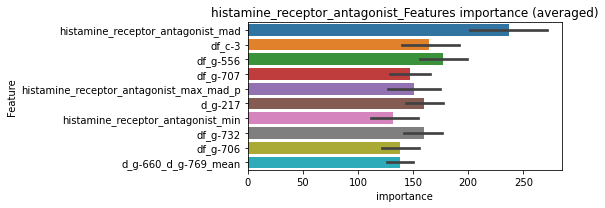

len(train_index) : 2463
len(valid_index) : 822
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01536	valid_1's binary_logloss: 0.0875811
[600]	training's binary_logloss: 0.00248934	valid_1's binary_logloss: 0.0729945
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00191641	valid_1's binary_logloss: 0.0716996


len(train_index) : 2464
len(valid_index) : 821
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154056	valid_1's binary_logloss: 0.0840031
[600]	training's binary_logloss: 0.00249903	valid_1's binary_logloss: 0.0636554
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00200976	valid_1's binary_logloss: 0.0615128


len(train_index) : 2464
len(valid_index) : 821
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173548	valid_1's binary_logloss: 0.0848832


len(train_index) : 2464
len(valid_index) : 821
================================= fold 4/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00829409	valid_1's binary_logloss: 0.0805775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015704	valid_1's binary_logloss: 0.105984
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00564172	valid_1's binary_logloss: 0.0993302


histamine_receptor_antagonist logloss: 0.07827801599578979


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735295	valid_1's binary_logloss: 0.0181414
[600]	training's binary_logloss: 0.00101161	valid_1's binary_logloss: 0.00498236
[900]	training's binary_logloss: 0.000507843	valid_1's binary_logloss: 0.0034327
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000476731	valid_1's binary_logloss: 0.00331245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737363	valid_1's binary_logloss: 0.0208955
[600]	training's binary_logloss: 0.00101373	valid_1's binary_logloss: 0.00835741
[900]	training's binary_logloss: 0.000501714	valid_1's binary_logloss: 0.00672872
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000478616	valid_1's binary_logloss: 0.00661413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736293	valid_1's binary_logloss: 0.0282934
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0058994, Threshold: 0.1012955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.07091, conf_1:0.13168
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.1012955
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_2: 0.1512955
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_3: 0.2012955
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_4: 0.2512955
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_5: 0.3012955
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.3512955
threshold: 0.3512955, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670135	valid_1's binary_logloss: 0.0152041
[600]	training's binary_logloss: 0.00088836	valid_1's binary_logloss: 0.00393186
[900]	training's binary_logloss: 0.000454457	valid_1's binary_logloss: 0.00269052
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000451922	valid_1's binary_logloss: 0.00268283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629983	valid_1's binary_logloss: 0.0168573
[600]	training's binary_logloss: 0.000863524	valid_1's binary_logloss: 0.00476098
[900]	training's binary_logloss: 0.000460329	valid_1's binary_logloss: 0.00330175
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000462206	valid_1's binary_logloss: 0.003301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640529	valid_1's binary_logloss: 0.0213048
[600]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.2187507, Threshold: 0.3512955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0133099 Vs.target_rate: 0.00101, Num_p_label: 53.0, conf_0:0.28104, conf_1:0.42155
Num_p_label: 53.0, Expected: 4.0, Adj_threshold_1: 0.3512955
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_2: 0.4012955
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_3: 0.4512955
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.5012955
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_5: 0.5512955
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_6: 0.6012955
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_7: 0.6512955
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_8: 0.7012955
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_9: 0.7512955
threshold: 0.7512955, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670135	valid_1's binary_logloss: 0.0152041
[600]	training's binary_logloss: 0.00088836	valid_1's binary_logloss: 0.00393186
[900]	training's binary_logloss: 0.000454457	valid_1's binary_logloss: 0.00269052
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000451922	valid_1's binary_logloss: 0.00268283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629983	valid_1's binary_logloss: 0.0168573
[600]	training's binary_logloss: 0.000863524	valid_1's binary_logloss: 0.00476098
[900]	training's binary_logloss: 0.000460329	valid_1's binary_logloss: 0.00330175
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000462206	valid_1's binary_logloss: 0.003301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640529	valid_1's binary_logloss: 0.0213048
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.2187507, Threshold: 0.7512955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0042692 Vs.target_rate: 0.00101, Num_p_label: 17.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_1: 0.7512955
threshold: 0.7512955, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


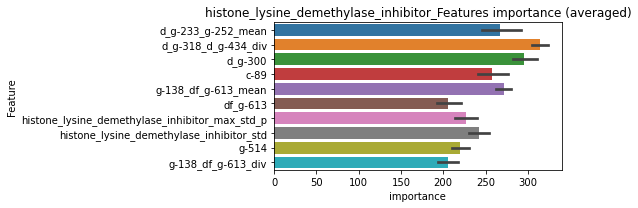

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672041	valid_1's binary_logloss: 0.0146677
[600]	training's binary_logloss: 0.000897617	valid_1's binary_logloss: 0.0037797
[900]	training's binary_logloss: 0.000454816	valid_1's binary_logloss: 0.0024684
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000443299	valid_1's binary_logloss: 0.00244108


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639253	valid_1's binary_logloss: 0.0180043
[600]	training's binary_logloss: 0.00086714	valid_1's binary_logloss: 0.00521342
[900]	training's binary_logloss: 0.000458395	valid_1's binary_logloss: 0.00363514
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000448882	valid_1's binary_logloss: 0.00362205


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650653	valid_1's binary_logloss: 0.0213649
[600]	training's binary_logloss: 0.000874406	valid_1's binary_logloss: 0.00713263
[900]	training's binary_logloss: 0.000463703	valid_1's binary_logloss: 0.00530639
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.00045989	valid_1's binary_logloss: 0.00526834


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648369	valid_1's binary_logloss: 0.0162174
[600]	training's binary_logloss: 0.000877099	valid_1's binary_logloss: 0.00481633
[900]	training's binary_logloss: 0.000457955	valid_1's binary_logloss: 0.00341149
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000451213	valid_1's binary_logloss: 0.0033743


histone_lysine_demethylase_inhibitor logloss: 0.0036765854845926577


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134996	valid_1's binary_logloss: 0.0433576
[600]	training's binary_logloss: 0.00161782	valid_1's binary_logloss: 0.0176356
[900]	training's binary_logloss: 0.00069665	valid_1's binary_logloss: 0.0141236
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000599811	valid_1's binary_logloss: 0.0135833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132057	valid_1's binary_logloss: 0.0395156
[600]	training's binary_logloss: 0.00159686	valid_1's binary_logloss: 0.0184622
[900]	training's binary_logloss: 0.000685342	valid_1's binary_logloss: 0.0159224
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000670558	valid_1's binary_logloss: 0.0158781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128183	valid_1's binary_logloss: 0.0466007
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0091326, Threshold: 0.0467364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.03272, conf_1:0.06076
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0467364
Num_p_label: 26.0, Expected: 5.4, Adj_threshold_2: 0.0967364
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_3: 0.1467364
Num_p_label: 17.0, Expected: 5.4, Adj_threshold_4: 0.1967364
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_5: 0.2467364
Num_p_label: 11.0, Expected: 5.4, Adj_threshold_6: 0.2967364
threshold: 0.2967364, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111648	valid_1's binary_logloss: 0.039521
[600]	training's binary_logloss: 0.00135045	valid_1's binary_logloss: 0.0184627
[900]	training's binary_logloss: 0.000617252	valid_1's binary_logloss: 0.0154657
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000567659	valid_1's binary_logloss: 0.0150537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114794	valid_1's binary_logloss: 0.0275755
[600]	training's binary_logloss: 0.00138963	valid_1's binary_logloss: 0.00833896
[900]	training's binary_logloss: 0.000619793	valid_1's binary_logloss: 0.00586647
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000575887	valid_1's binary_logloss: 0.00570364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113258	valid_1's binary_logloss: 0.0340398
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.2043709, Threshold: 0.2967364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0113009 Vs.target_rate: 0.00134, Num_p_label: 45.0, conf_0:0.23739, conf_1:0.35608
Num_p_label: 45.0, Expected: 5.4, Adj_threshold_1: 0.2967364
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_2: 0.3467364
Num_p_label: 34.0, Expected: 5.4, Adj_threshold_3: 0.3967364
Num_p_label: 31.0, Expected: 5.4, Adj_threshold_4: 0.4467364
Num_p_label: 30.0, Expected: 5.4, Adj_threshold_5: 0.4967364
Num_p_label: 27.0, Expected: 5.4, Adj_threshold_6: 0.5467364
Num_p_label: 23.0, Expected: 5.4, Adj_threshold_7: 0.5967364
Num_p_label: 22.0, Expected: 5.4, Adj_threshold_8: 0.6467364
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_9: 0.6967364
Num_p_label: 15.0, Expected: 5.4, Adj_threshold_10: 0.7467364
threshold: 0.7967364, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104765	valid_1's binary_logloss: 0.0260732
[600]	training's binary_logloss: 0.00130995	valid_1's binary_logloss: 0.00739524
[900]	training's binary_logloss: 0.000600282	valid_1's binary_logloss: 0.00507876
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.000547275	valid_1's binary_logloss: 0.00495017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108117	valid_1's binary_logloss: 0.0375696
[600]	training's binary_logloss: 0.00128272	valid_1's binary_logloss: 0.0163009
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000611993	valid_1's binary_logloss: 0.0134
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109448	valid_1's binary_logloss: 0.0337337
[600]	training's binary_logloss: 0.00131821	valid_1's binary_logloss: 0.0141905
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1595922, Threshold: 0.7967364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0047715 Vs.target_rate: 0.00134, Num_p_label: 19.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 19.0, Expected: 5.4, Adj_threshold_1: 0.7967364
threshold: 0.7967364, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


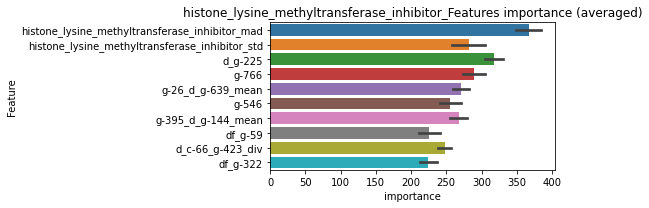

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106442	valid_1's binary_logloss: 0.0256497
[600]	training's binary_logloss: 0.00130262	valid_1's binary_logloss: 0.00726169
[900]	training's binary_logloss: 0.000605651	valid_1's binary_logloss: 0.00497589
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00057837	valid_1's binary_logloss: 0.00491749


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104248	valid_1's binary_logloss: 0.0287134
[600]	training's binary_logloss: 0.00127587	valid_1's binary_logloss: 0.0104409
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000736582	valid_1's binary_logloss: 0.00867474


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108117	valid_1's binary_logloss: 0.0365376
[600]	training's binary_logloss: 0.00130228	valid_1's binary_logloss: 0.0159993
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000636897	valid_1's binary_logloss: 0.0137099


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105823	valid_1's binary_logloss: 0.0238359
[600]	training's binary_logloss: 0.00130957	valid_1's binary_logloss: 0.00782421
[900]	training's binary_logloss: 0.000596029	valid_1's binary_logloss: 0.00577793
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000586326	valid_1's binary_logloss: 0.00570416


histone_lysine_methyltransferase_inhibitor logloss: 0.008253786158120863


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309472	valid_1's binary_logloss: 0.0949206
[600]	training's binary_logloss: 0.00435298	valid_1's binary_logloss: 0.0484537
[900]	training's binary_logloss: 0.00147358	valid_1's binary_logloss: 0.0399466
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.00119259	valid_1's binary_logloss: 0.0384956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327818	valid_1's binary_logloss: 0.0888754
[600]	training's binary_logloss: 0.0046361	valid_1's binary_logloss: 0.0411813
[900]	training's binary_logloss: 0.00151751	valid_1's binary_logloss: 0.0311349
[1200]	training's binary_logloss: 0.00096774	valid_1's binary_logloss: 0.0289197
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.000971137	valid_1's binary_logloss: 0.028873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

1 / 3 AUC score:0.998
y_Threshold: 0.0217630, Threshold: 0.3079313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.21555, conf_1:0.40031
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.3079313
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_2: 0.3579313
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_3: 0.4079313
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_4: 0.4579313
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_5: 0.5079313
threshold: 0.5079313, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255567	valid_1's binary_logloss: 0.0924362
[600]	training's binary_logloss: 0.00348392	valid_1's binary_logloss: 0.0522188
[900]	training's binary_logloss: 0.00128684	valid_1's binary_logloss: 0.0447367
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.00101244	valid_1's binary_logloss: 0.0434943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260593	valid_1's binary_logloss: 0.080139
[600]	training's binary_logloss: 0.00358241	valid_1's binary_logloss: 0.0469665
[900]	training's binary_logloss: 0.00130317	valid_1's binary_logloss: 0.0414327
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00132085	valid_1's binary_logloss: 0.0413356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253016	valid_1's binary_logloss: 0.0777809
[600]	training's binary_loglos

2 / 3 AUC score:0.997
y_Threshold: 0.0903196, Threshold: 0.5079313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0135610 Vs.target_rate: 0.00302, Num_p_label: 54.0, conf_0:0.40635, conf_1:0.60952
Num_p_label: 54.0, Expected: 12.0, Adj_threshold_1: 0.5079313
Num_p_label: 50.0, Expected: 12.0, Adj_threshold_2: 0.5579313
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_3: 0.6079313
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_4: 0.6579313
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.7079313
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_6: 0.7579313
threshold: 0.7579313, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 641.0/3774, y_label_rate: 0.1698463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224013	valid_1's binary_logloss: 0.0757263
[600]	training's binary_logloss: 0.00314055	valid_1's binary_logloss: 0.0372656
[900]	training's binary_logloss: 0.00120123	valid_1's binary_logloss: 0.0302487
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00114106	valid_1's binary_logloss: 0.029946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242017	valid_1's binary_logloss: 0.0690049
[600]	training's binary_logloss: 0.0033102	valid_1's binary_logloss: 0.0319622
[900]	training's binary_logloss: 0.00123524	valid_1's binary_logloss: 0.0246381
[1200]	training's binary_logloss: 0.000839423	valid_1's binary_logloss: 0.0227504
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.000852757	valid_1's binary_logloss: 0.0227097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1133176, Threshold: 0.7579313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0097941 Vs.target_rate: 0.00302, Num_p_label: 39.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_1: 0.7579313
threshold: 0.7579313, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 638.0/3768, y_label_rate: 0.1693206


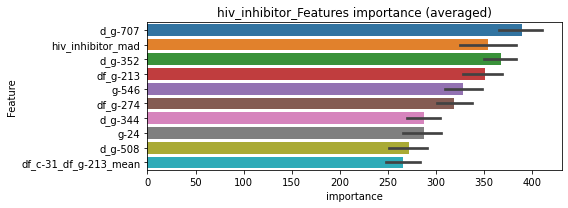

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229687	valid_1's binary_logloss: 0.0841441
[600]	training's binary_logloss: 0.00323586	valid_1's binary_logloss: 0.0466085
[900]	training's binary_logloss: 0.00122175	valid_1's binary_logloss: 0.0409862
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000890649	valid_1's binary_logloss: 0.0393449


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231876	valid_1's binary_logloss: 0.0831986
[600]	training's binary_logloss: 0.00316858	valid_1's binary_logloss: 0.0544285
[900]	training's binary_logloss: 0.00120391	valid_1's binary_logloss: 0.0505955
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00117233	valid_1's binary_logloss: 0.050429


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225859	valid_1's binary_logloss: 0.0796366
[600]	training's binary_logloss: 0.00305847	valid_1's binary_logloss: 0.042646
[900]	training's binary_logloss: 0.00116967	valid_1's binary_logloss: 0.0361185
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000963308	valid_1's binary_logloss: 0.0354516


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234922	valid_1's binary_logloss: 0.0790723
[600]	training's binary_logloss: 0.00321177	valid_1's binary_logloss: 0.0456727
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00186932	valid_1's binary_logloss: 0.0420842


hiv_inhibitor logloss: 0.04182742108582425


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0892668	valid_1's binary_logloss: 0.30682
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.0607701	valid_1's binary_logloss: 0.299947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0895218	valid_1's binary_logloss: 0.314667
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0466148	valid_1's binary_logloss: 0.306506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0926538	valid_1's binary_logloss: 0.296247
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0467351	valid_1's binary_logloss: 0.2822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0957391	valid_1's binary_logloss: 0.288932
[600]	training's binary_logloss: 0.032447	valid_1's binary_logloss: 0.268827
Early stopping, best iteration 

1 / 3 AUC score:0.866
y_Threshold: 0.1286124, Threshold: 0.5239992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 502 → Positive_corect_labels: 463/3393
p_label_rate: 0.0100452 Vs.target_rate: 0.01188, Num_p_label: 40.0, conf_0:0.36680, conf_1:0.68120
threshold: 0.5239992, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 463.0/3393, y_label_rate: 0.1364574
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332717	valid_1's binary_logloss: 0.193722
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.0115677	valid_1's binary_logloss: 0.181385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035541	valid_1's binary_logloss: 0.160834
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00952363	valid_1's binary_logloss: 0.142408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035861	valid_1's binary_logloss: 0.153124
[600]	training's binary_logloss: 0.00677191	valid_1's binary_logloss: 0.128354
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00670637	valid_1's binary_logloss: 0.128135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0346835	valid_1's binary_logloss: 0.166488
Early stopping, best itera

2 / 3 AUC score:0.969
y_Threshold: 0.1197789, Threshold: 0.5239992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 381.0/3229
p_label_rate: 0.0231040 Vs.target_rate: 0.01188, Num_p_label: 92.0, conf_0:0.41920, conf_1:0.62880
Num_p_label: 92.0, Expected: 47.3, Adj_threshold_1: 0.5239992
Num_p_label: 80.0, Expected: 47.3, Adj_threshold_2: 0.5739992
Num_p_label: 66.0, Expected: 47.3, Adj_threshold_3: 0.6239992
threshold: 0.6239992, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 381.0/3229, y_label_rate: 0.1179932
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199813	valid_1's binary_logloss: 0.142072
[600]	training's binary_logloss: 0.00338226	valid_1's binary_logloss: 0.124865
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.0038343	valid_1's binary_logloss: 0.124784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02089	valid_1's binary_logloss: 0.094899
[600]	training's binary_logloss: 0.003512	valid_1's binary_logloss: 0.074593
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00332283	valid_1's binary_logloss: 0.0743402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199052	valid_1's binary_logloss: 0.128211
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0137499	valid_1's binary_logloss: 0.125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglos

3 / 3 AUC score:0.985
y_Threshold: 0.0976655, Threshold: 0.6239992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 341.0/3149
p_label_rate: 0.0281266 Vs.target_rate: 0.01188, Num_p_label: 112.0, conf_0:0.50000, conf_1:0.68640
Num_p_label: 112.0, Expected: 47.3, Adj_threshold_1: 0.6239992
Num_p_label: 94.0, Expected: 47.3, Adj_threshold_2: 0.6739992
Num_p_label: 85.0, Expected: 47.3, Adj_threshold_3: 0.7239992
Num_p_label: 71.0, Expected: 47.3, Adj_threshold_4: 0.7739992
threshold: 0.7739992, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 341.0/3149, y_label_rate: 0.1082883


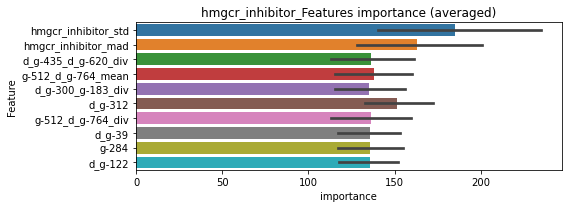

len(train_index) : 2361
len(valid_index) : 788
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138288	valid_1's binary_logloss: 0.107485
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00456063	valid_1's binary_logloss: 0.100497


len(train_index) : 2362
len(valid_index) : 787
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150084	valid_1's binary_logloss: 0.0884872
[600]	training's binary_logloss: 0.00253176	valid_1's binary_logloss: 0.0748297
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00261303	valid_1's binary_logloss: 0.0746847


len(train_index) : 2362
len(valid_index) : 787
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152164	valid_1's binary_logloss: 0.0900981
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00343202	valid_1's binary_logloss: 0.0753965


len(train_index) : 2362
len(valid_index) : 787
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138574	valid_1's binary_logloss: 0.101338
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00378297	valid_1's binary_logloss: 0.0944994


hmgcr_inhibitor logloss: 0.08627391635940417


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397661	valid_1's binary_logloss: 0.13237
[600]	training's binary_logloss: 0.00689109	valid_1's binary_logloss: 0.0947938
[900]	training's binary_logloss: 0.00219117	valid_1's binary_logloss: 0.0884522
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.00230747	valid_1's binary_logloss: 0.0882148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0417108	valid_1's binary_logloss: 0.127023
[600]	training's binary_logloss: 0.00741648	valid_1's binary_logloss: 0.0764625
[900]	training's binary_logloss: 0.00231171	valid_1's binary_logloss: 0.0640709
Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.00138446	valid_1's binary_logloss: 0.0608172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0406285	valid_1's binary_logloss: 0.125063
[600]	training's binary_logloss: 

1 / 3 AUC score:0.992
y_Threshold: 0.0363831, Threshold: 0.2196978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 631/3748
p_label_rate: 0.0100452 Vs.target_rate: 0.00391, Num_p_label: 40.0, conf_0:0.15379, conf_1:0.28561
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.2196978
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_2: 0.2696978
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.3196978
Num_p_label: 21.0, Expected: 15.6, Adj_threshold_4: 0.3696978
threshold: 0.3696978, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 631.0/3748, y_label_rate: 0.1683565
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270842	valid_1's binary_logloss: 0.125716
[600]	training's binary_logloss: 0.00438639	valid_1's binary_logloss: 0.094615
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00357817	valid_1's binary_logloss: 0.0927491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0310772	valid_1's binary_logloss: 0.0997465
[600]	training's binary_logloss: 0.00485783	valid_1's binary_logloss: 0.0587589
[900]	training's binary_logloss: 0.00168485	valid_1's binary_logloss: 0.0508527
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.00166421	valid_1's binary_logloss: 0.0505713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0328684	valid_1's binary_logloss: 0.0921086
[600]	training's binary_logloss: 0.00507175	valid_1's binary_logloss: 0.0487285
[900]	training's binary_logloss:

2 / 3 AUC score:0.996
y_Threshold: 0.0994821, Threshold: 0.3696978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 606.0/3698
p_label_rate: 0.0133099 Vs.target_rate: 0.00391, Num_p_label: 53.0, conf_0:0.29576, conf_1:0.44364
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_1: 0.3696978
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_2: 0.4196978
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.4696978
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_4: 0.5196978
Num_p_label: 21.0, Expected: 15.6, Adj_threshold_5: 0.5696978
threshold: 0.5696978, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 606.0/3698, y_label_rate: 0.1638724
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268922	valid_1's binary_logloss: 0.0848715
[600]	training's binary_logloss: 0.00407814	valid_1's binary_logloss: 0.0488668
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.00178248	valid_1's binary_logloss: 0.0430394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0279153	valid_1's binary_logloss: 0.0849449
[600]	training's binary_logloss: 0.00419999	valid_1's binary_logloss: 0.0446361
[900]	training's binary_logloss: 0.0015072	valid_1's binary_logloss: 0.0354989
[1200]	training's binary_logloss: 0.0009663	valid_1's binary_logloss: 0.033109
Early stopping, best iteration is:
[1294]	training's binary_logloss: 0.000916803	valid_1's binary_logloss: 0.0329052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263968	valid_1's binary_logloss: 0.0757657
[600]	training's binary_loglos

3 / 3 AUC score:0.998
y_Threshold: 0.0835874, Threshold: 0.5696978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 593.0/3672
p_label_rate: 0.0075339 Vs.target_rate: 0.00391, Num_p_label: 30.0, conf_0:0.50000, conf_1:0.62667
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_1: 0.5696978
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_2: 0.6196978
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_3: 0.6696978
threshold: 0.6696978, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 593.0/3672, y_label_rate: 0.1614924


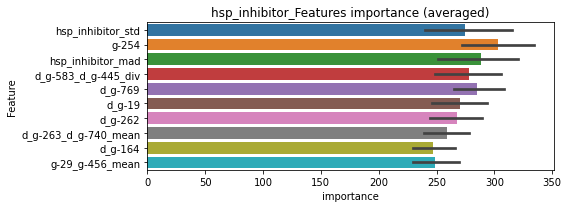

len(train_index) : 2754
len(valid_index) : 918
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248619	valid_1's binary_logloss: 0.083239
[600]	training's binary_logloss: 0.00370171	valid_1's binary_logloss: 0.0388279
[900]	training's binary_logloss: 0.00139073	valid_1's binary_logloss: 0.0308323
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.00129197	valid_1's binary_logloss: 0.0306043


len(train_index) : 2754
len(valid_index) : 918
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0247822	valid_1's binary_logloss: 0.0898488
[600]	training's binary_logloss: 0.00358471	valid_1's binary_logloss: 0.0543737
[900]	training's binary_logloss: 0.00136367	valid_1's binary_logloss: 0.0464777
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.00107065	valid_1's binary_logloss: 0.0449173


len(train_index) : 2754
len(valid_index) : 918
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254468	valid_1's binary_logloss: 0.0777518
[600]	training's binary_logloss: 0.00375159	valid_1's binary_logloss: 0.042264
[900]	training's binary_logloss: 0.00140322	valid_1's binary_logloss: 0.0347856
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.0010867	valid_1's binary_logloss: 0.0329203


len(train_index) : 2754
len(valid_index) : 918
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255644	valid_1's binary_logloss: 0.074402
[600]	training's binary_logloss: 0.00376008	valid_1's binary_logloss: 0.0384937
[900]	training's binary_logloss: 0.00140595	valid_1's binary_logloss: 0.0307406
[1200]	training's binary_logloss: 0.000919239	valid_1's binary_logloss: 0.0284657
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.000934657	valid_1's binary_logloss: 0.0284245


hsp_inhibitor logloss: 0.03421660198077653


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154458	valid_1's binary_logloss: 0.0393212
[600]	training's binary_logloss: 0.00198011	valid_1's binary_logloss: 0.014189
[900]	training's binary_logloss: 0.000819989	valid_1's binary_logloss: 0.0105028
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.00068494	valid_1's binary_logloss: 0.0100867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142769	valid_1's binary_logloss: 0.0425932
[600]	training's binary_logloss: 0.00179332	valid_1's binary_logloss: 0.0197286
[900]	training's binary_logloss: 0.000769519	valid_1's binary_logloss: 0.0170977
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000698537	valid_1's binary_logloss: 0.0169052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167245	valid_1's binary_logloss: 0.0341825
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0100536, Threshold: 0.1111205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.07778, conf_1:0.14446
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.1111205
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_2: 0.1611205
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_3: 0.2111205
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_4: 0.2611205
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_5: 0.3111205
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_6: 0.3611205
threshold: 0.3611205, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137024	valid_1's binary_logloss: 0.0330792
[600]	training's binary_logloss: 0.00174897	valid_1's binary_logloss: 0.0109171
[900]	training's binary_logloss: 0.000747484	valid_1's binary_logloss: 0.00795577
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000731533	valid_1's binary_logloss: 0.00791333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137208	valid_1's binary_logloss: 0.0358812
[600]	training's binary_logloss: 0.00167716	valid_1's binary_logloss: 0.0143632
[900]	training's binary_logloss: 0.00072457	valid_1's binary_logloss: 0.011965
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000693095	valid_1's binary_logloss: 0.0118333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146496	valid_1's binary_logloss: 0.0294509
[600]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1565828, Threshold: 0.3611205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.28890, conf_1:0.43334
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.3611205
Num_p_label: 37.0, Expected: 6.2, Adj_threshold_2: 0.4111205
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_3: 0.4611205
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_4: 0.5111205
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_5: 0.5611205
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_6: 0.6111205
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_7: 0.6611205
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_8: 0.7111205
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_9: 0.7611205
threshold: 0.7611205, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132966	valid_1's binary_logloss: 0.0334206
[600]	training's binary_logloss: 0.00166262	valid_1's binary_logloss: 0.0124868
[900]	training's binary_logloss: 0.000723712	valid_1's binary_logloss: 0.00978863
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000635317	valid_1's binary_logloss: 0.00960818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135941	valid_1's binary_logloss: 0.0307005
[600]	training's binary_logloss: 0.00171472	valid_1's binary_logloss: 0.0086634
[900]	training's binary_logloss: 0.000733636	valid_1's binary_logloss: 0.00570374
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000635038	valid_1's binary_logloss: 0.00540086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137345	valid_1's binary_logloss: 0.0383842
[600]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0535245, Threshold: 0.7611205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00155, Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_1: 0.7611205
threshold: 0.7611205, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


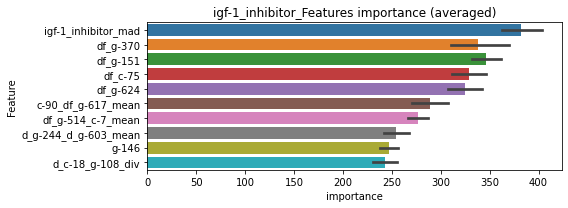

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013361	valid_1's binary_logloss: 0.0354879
[600]	training's binary_logloss: 0.0016853	valid_1's binary_logloss: 0.012529
[900]	training's binary_logloss: 0.000725237	valid_1's binary_logloss: 0.00932534
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000681956	valid_1's binary_logloss: 0.0091314


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130455	valid_1's binary_logloss: 0.0393831
[600]	training's binary_logloss: 0.00164118	valid_1's binary_logloss: 0.0165617
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000772447	valid_1's binary_logloss: 0.0139768


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138489	valid_1's binary_logloss: 0.0279749
[600]	training's binary_logloss: 0.00173235	valid_1's binary_logloss: 0.00769391
[900]	training's binary_logloss: 0.000733068	valid_1's binary_logloss: 0.00474638
Early stopping, best iteration is:
[1162]	training's binary_logloss: 0.000609673	valid_1's binary_logloss: 0.00431263


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135942	valid_1's binary_logloss: 0.0336684
[600]	training's binary_logloss: 0.00169935	valid_1's binary_logloss: 0.0120835
[900]	training's binary_logloss: 0.000732101	valid_1's binary_logloss: 0.00925912
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00073843	valid_1's binary_logloss: 0.00923987


igf-1_inhibitor logloss: 0.009165152228062476


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00963159	valid_1's binary_logloss: 0.0298736
[600]	training's binary_logloss: 0.00118403	valid_1's binary_logloss: 0.0137721
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000713486	valid_1's binary_logloss: 0.0122466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00967788	valid_1's binary_logloss: 0.0270115
[600]	training's binary_logloss: 0.00117392	valid_1's binary_logloss: 0.0112982
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000624152	valid_1's binary_logloss: 0.0101368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00959681	valid_1's binary_logloss: 0.0267582
[600]	training's binary_logloss: 0.00118321	valid_1's binary_logloss: 0.0106365
[900]	training's binary_logloss: 0.000553031	valid_1's binary_logloss: 0.00859915
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0077971, Threshold: 0.0630433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.04413, conf_1:0.08196
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0630433
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_2: 0.1130433
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1630433
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_4: 0.2130433
threshold: 0.2130433, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084534	valid_1's binary_logloss: 0.0227824
[600]	training's binary_logloss: 0.00104016	valid_1's binary_logloss: 0.011334
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000964266	valid_1's binary_logloss: 0.0111311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786667	valid_1's binary_logloss: 0.0271425
[600]	training's binary_logloss: 0.000994349	valid_1's binary_logloss: 0.0125693
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000526316	valid_1's binary_logloss: 0.0109305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00797835	valid_1's binary_logloss: 0.023885
[600]	training's binary_logloss: 0.00100295	valid_1's binary_logloss: 0.00925624
[900]	training's binary_logloss: 0.000499884	valid_1's binary_logloss: 0.00753139
Early stopping, best ite

2 / 3 AUC score:1.000
y_Threshold: 0.0731735, Threshold: 0.2130433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0110497 Vs.target_rate: 0.00126, Num_p_label: 44.0, conf_0:0.17043, conf_1:0.25565
Num_p_label: 44.0, Expected: 5.0, Adj_threshold_1: 0.2130433
Num_p_label: 38.0, Expected: 5.0, Adj_threshold_2: 0.2630433
Num_p_label: 33.0, Expected: 5.0, Adj_threshold_3: 0.3130433
Num_p_label: 28.0, Expected: 5.0, Adj_threshold_4: 0.3630433
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_5: 0.4130433
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_6: 0.4630433
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_7: 0.5130433
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_8: 0.5630433
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_9: 0.6130433
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_10: 0.6630433
threshold: 0.6630433, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0075184	valid_1's binary_logloss: 0.0241474
[600]	training's binary_logloss: 0.000974224	valid_1's binary_logloss: 0.0126422
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000698929	valid_1's binary_logloss: 0.011703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780976	valid_1's binary_logloss: 0.0164759
[600]	training's binary_logloss: 0.000977843	valid_1's binary_logloss: 0.00449501
[900]	training's binary_logloss: 0.000483263	valid_1's binary_logloss: 0.00312702
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000487257	valid_1's binary_logloss: 0.0031232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747119	valid_1's binary_logloss: 0.0289602
[600]	training's binary_logloss: 0.000960323	valid_1's binary_logloss: 0.0129106
Early stopping, best 

3 / 3 AUC score:1.000
y_Threshold: 0.1265693, Threshold: 0.6630433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0037670 Vs.target_rate: 0.00126, Num_p_label: 15.0, conf_0:0.50000, conf_1:0.72935
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_1: 0.6630433
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.7130433
threshold: 0.7130433, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


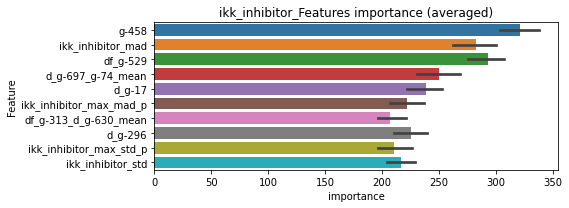

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739575	valid_1's binary_logloss: 0.0198289
[600]	training's binary_logloss: 0.000962478	valid_1's binary_logloss: 0.00880547
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000510547	valid_1's binary_logloss: 0.00754237


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723386	valid_1's binary_logloss: 0.0210619
[600]	training's binary_logloss: 0.000950925	valid_1's binary_logloss: 0.00859441
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000494505	valid_1's binary_logloss: 0.00729215


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760507	valid_1's binary_logloss: 0.018571
[600]	training's binary_logloss: 0.000989506	valid_1's binary_logloss: 0.00528894
[900]	training's binary_logloss: 0.000486204	valid_1's binary_logloss: 0.00375766
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000472886	valid_1's binary_logloss: 0.00369792


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074061	valid_1's binary_logloss: 0.0291391
[600]	training's binary_logloss: 0.000948514	valid_1's binary_logloss: 0.0171621
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000889508	valid_1's binary_logloss: 0.0170088


ikk_inhibitor logloss: 0.008885307962222007


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126895	valid_1's binary_logloss: 0.0307143
[600]	training's binary_logloss: 0.00163667	valid_1's binary_logloss: 0.0111377
[900]	training's binary_logloss: 0.00072631	valid_1's binary_logloss: 0.00806207
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000602591	valid_1's binary_logloss: 0.00765527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122005	valid_1's binary_logloss: 0.0444117
[600]	training's binary_logloss: 0.0015743	valid_1's binary_logloss: 0.0256128
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00151287	valid_1's binary_logloss: 0.0255415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127161	valid_1's binary_logloss: 0.0304006
[600]	training's binary_logloss: 0.00163026	valid_1's binary_logloss: 0.0112505
[900]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0105996, Threshold: 0.1271905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.08903, conf_1:0.16535
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.1271905
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.1771905
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_3: 0.2271905
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_4: 0.2771905
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.3271905
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_6: 0.3771905
threshold: 0.3771905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113653	valid_1's binary_logloss: 0.0306787
[600]	training's binary_logloss: 0.00147856	valid_1's binary_logloss: 0.0112825
[900]	training's binary_logloss: 0.000661709	valid_1's binary_logloss: 0.00834553
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000567567	valid_1's binary_logloss: 0.00804083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106136	valid_1's binary_logloss: 0.0499313
[600]	training's binary_logloss: 0.00141596	valid_1's binary_logloss: 0.036572
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00160715	valid_1's binary_logloss: 0.036171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107861	valid_1's binary_logloss: 0.0238015
[600]	training's binary_logloss: 0.00144597	valid_1's binary_logloss: 0.00796522
[900]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0536550, Threshold: 0.3771905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0110497 Vs.target_rate: 0.00130, Num_p_label: 44.0, conf_0:0.30175, conf_1:0.45263
Num_p_label: 44.0, Expected: 5.2, Adj_threshold_1: 0.3771905
Num_p_label: 41.0, Expected: 5.2, Adj_threshold_2: 0.4271905
Num_p_label: 34.0, Expected: 5.2, Adj_threshold_3: 0.4771905
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_4: 0.5271905
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_5: 0.5771905
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_6: 0.6271905
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_7: 0.6771905
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_8: 0.7271905
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_9: 0.7771905
threshold: 0.7771905, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3799, y_label_rate: 0.1713609
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107358	valid_1's binary_logloss: 0.0306197
[600]	training's binary_logloss: 0.00142491	valid_1's binary_logloss: 0.0102375
[900]	training's binary_logloss: 0.000647181	valid_1's binary_logloss: 0.00732758
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000567777	valid_1's binary_logloss: 0.00704307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112365	valid_1's binary_logloss: 0.0322718
[600]	training's binary_logloss: 0.00146881	valid_1's binary_logloss: 0.015176
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000803715	valid_1's binary_logloss: 0.0134401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010563	valid_1's binary_logloss: 0.0314722
[600]	training's binary_logloss: 0.00139553	valid_1's binary_logloss: 0.0115349
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0556925, Threshold: 0.7771905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3793
p_label_rate: 0.0040181 Vs.target_rate: 0.00130, Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_1: 0.7771905
threshold: 0.7771905, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3793, y_label_rate: 0.1708410


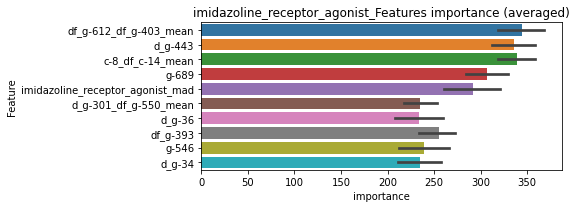

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103072	valid_1's binary_logloss: 0.0257222
[600]	training's binary_logloss: 0.00138247	valid_1's binary_logloss: 0.00800802
[900]	training's binary_logloss: 0.000637547	valid_1's binary_logloss: 0.00553011
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000570816	valid_1's binary_logloss: 0.00538459


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010593	valid_1's binary_logloss: 0.0269404
[600]	training's binary_logloss: 0.00141572	valid_1's binary_logloss: 0.00848886
[900]	training's binary_logloss: 0.000641336	valid_1's binary_logloss: 0.00626966
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000532888	valid_1's binary_logloss: 0.00586082


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100488	valid_1's binary_logloss: 0.0289551
[600]	training's binary_logloss: 0.00135768	valid_1's binary_logloss: 0.0110673
[900]	training's binary_logloss: 0.000635348	valid_1's binary_logloss: 0.00837329
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000555975	valid_1's binary_logloss: 0.00815974


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104376	valid_1's binary_logloss: 0.0285907
[600]	training's binary_logloss: 0.00139131	valid_1's binary_logloss: 0.0131495
[900]	training's binary_logloss: 0.000646075	valid_1's binary_logloss: 0.0110183
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000659406	valid_1's binary_logloss: 0.0109918


imidazoline_receptor_agonist logloss: 0.007609355516520167


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322491	valid_1's binary_logloss: 0.106346
[600]	training's binary_logloss: 0.00470086	valid_1's binary_logloss: 0.0600021
[900]	training's binary_logloss: 0.00158403	valid_1's binary_logloss: 0.0529498
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.00123584	valid_1's binary_logloss: 0.0513891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331489	valid_1's binary_logloss: 0.0884326
[600]	training's binary_logloss: 0.00492229	valid_1's binary_logloss: 0.0442913
[900]	training's binary_logloss: 0.00162117	valid_1's binary_logloss: 0.0336962
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.00102203	valid_1's binary_logloss: 0.0311221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0305791	valid_1's binary_logloss: 0.101821
[600]	training's binary_loglos

1 / 3 AUC score:0.997
y_Threshold: 0.0289018, Threshold: 0.1308177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 646/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.09157, conf_1:0.17006
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1308177
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1808177
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.2308177
threshold: 0.2308177, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251858	valid_1's binary_logloss: 0.10772
[600]	training's binary_logloss: 0.0035685	valid_1's binary_logloss: 0.0804695
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00154892	valid_1's binary_logloss: 0.0764456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264635	valid_1's binary_logloss: 0.0867934
[600]	training's binary_logloss: 0.00379063	valid_1's binary_logloss: 0.0486395
[900]	training's binary_logloss: 0.00136815	valid_1's binary_logloss: 0.0415761
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000970694	valid_1's binary_logloss: 0.0395644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266643	valid_1's binary_logloss: 0.0720591
[600]	training's binary_logloss: 0.0037948	valid_1's binary_logloss: 0.0330659
[900]	training's binary_logloss:

2 / 3 AUC score:0.995
y_Threshold: 0.1339118, Threshold: 0.2308177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 632.0/3756
p_label_rate: 0.0160723 Vs.target_rate: 0.00307, Num_p_label: 64.0, conf_0:0.18465, conf_1:0.27698
Num_p_label: 64.0, Expected: 12.2, Adj_threshold_1: 0.2308177
Num_p_label: 49.0, Expected: 12.2, Adj_threshold_2: 0.2808177
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_3: 0.3308177
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_4: 0.3808177
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.4308177
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.4808177
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.5308177
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_8: 0.5808177
threshold: 0.5808177, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 632.0/3756, y_label_rate: 0.1682641
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234767	valid_1's binary_logloss: 0.086582
[600]	training's binary_logloss: 0.00325029	valid_1's binary_logloss: 0.0503003
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00257078	valid_1's binary_logloss: 0.0484762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232994	valid_1's binary_logloss: 0.0810041
[600]	training's binary_logloss: 0.00326126	valid_1's binary_logloss: 0.0468837
[900]	training's binary_logloss: 0.00122827	valid_1's binary_logloss: 0.040495
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000903641	valid_1's binary_logloss: 0.0391274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0242064	valid_1's binary_logloss: 0.0629386
[600]	training's binary_logloss: 0.00346401	valid_1's binary_logloss: 0.0266426
[900]	training's binary_loglos

3 / 3 AUC score:0.999
y_Threshold: 0.1166822, Threshold: 0.5808177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 619.0/3730
p_label_rate: 0.0065294 Vs.target_rate: 0.00307, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.63890
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.5808177
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.6308177
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.6808177
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.7308177
threshold: 0.7308177, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 619.0/3730, y_label_rate: 0.1659517


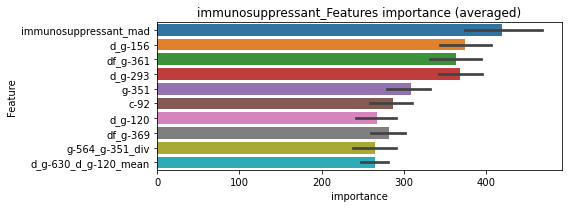

len(train_index) : 2797
len(valid_index) : 933
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217776	valid_1's binary_logloss: 0.0802042
[600]	training's binary_logloss: 0.0030787	valid_1's binary_logloss: 0.0457484
[900]	training's binary_logloss: 0.00116169	valid_1's binary_logloss: 0.0397394
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000925929	valid_1's binary_logloss: 0.0385059


len(train_index) : 2797
len(valid_index) : 933
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223597	valid_1's binary_logloss: 0.0598123
[600]	training's binary_logloss: 0.00315479	valid_1's binary_logloss: 0.0266049
[900]	training's binary_logloss: 0.00120188	valid_1's binary_logloss: 0.0197506
[1200]	training's binary_logloss: 0.000819445	valid_1's binary_logloss: 0.0181753
Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.000791222	valid_1's binary_logloss: 0.0179193


len(train_index) : 2798
len(valid_index) : 932
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205936	valid_1's binary_logloss: 0.0994707
[600]	training's binary_logloss: 0.00280275	valid_1's binary_logloss: 0.0806358
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00270693	valid_1's binary_logloss: 0.0804583


len(train_index) : 2798
len(valid_index) : 932
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226914	valid_1's binary_logloss: 0.0618113
[600]	training's binary_logloss: 0.00317041	valid_1's binary_logloss: 0.0289171
[900]	training's binary_logloss: 0.00119489	valid_1's binary_logloss: 0.0225772
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000893507	valid_1's binary_logloss: 0.0214033


immunosuppressant logloss: 0.03957624749604825


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100056	valid_1's binary_logloss: 0.0342857
[600]	training's binary_logloss: 0.00138394	valid_1's binary_logloss: 0.0142267
[900]	training's binary_logloss: 0.000641858	valid_1's binary_logloss: 0.0109712
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000597436	valid_1's binary_logloss: 0.0108133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955819	valid_1's binary_logloss: 0.0358344
[600]	training's binary_logloss: 0.00132356	valid_1's binary_logloss: 0.0176064
[900]	training's binary_logloss: 0.00063182	valid_1's binary_logloss: 0.0147588
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000639266	valid_1's binary_logloss: 0.0147344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999905	valid_1's binary_logloss: 0.027712
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0100408, Threshold: 0.0942161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.06595, conf_1:0.12248
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0942161
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_2: 0.1442161
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_3: 0.1942161
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.2442161
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_5: 0.2942161
threshold: 0.2942161, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848043	valid_1's binary_logloss: 0.027039
[600]	training's binary_logloss: 0.00117757	valid_1's binary_logloss: 0.00958217
[900]	training's binary_logloss: 0.000575259	valid_1's binary_logloss: 0.00698598
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000544364	valid_1's binary_logloss: 0.00679251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00850724	valid_1's binary_logloss: 0.0263609
[600]	training's binary_logloss: 0.00115617	valid_1's binary_logloss: 0.00904827
[900]	training's binary_logloss: 0.000577735	valid_1's binary_logloss: 0.0065883
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000556058	valid_1's binary_logloss: 0.00653102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00880898	valid_1's binary_logloss: 0.0252161
[600]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0954817, Threshold: 0.2942161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0123054 Vs.target_rate: 0.00126, Num_p_label: 49.0, conf_0:0.23537, conf_1:0.35306
Num_p_label: 49.0, Expected: 5.0, Adj_threshold_1: 0.2942161
Num_p_label: 46.0, Expected: 5.0, Adj_threshold_2: 0.3442161
Num_p_label: 38.0, Expected: 5.0, Adj_threshold_3: 0.3942161
Num_p_label: 35.0, Expected: 5.0, Adj_threshold_4: 0.4442161
Num_p_label: 33.0, Expected: 5.0, Adj_threshold_5: 0.4942161
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_6: 0.5442161
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_7: 0.5942161
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_8: 0.6442161
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_9: 0.6942161
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_10: 0.7442161
threshold: 0.7942161, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00781051	valid_1's binary_logloss: 0.0497725
[600]	training's binary_logloss: 0.00110583	valid_1's binary_logloss: 0.0368248
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000704231	valid_1's binary_logloss: 0.0352199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00851648	valid_1's binary_logloss: 0.022858
[600]	training's binary_logloss: 0.00116343	valid_1's binary_logloss: 0.00792392
[900]	training's binary_logloss: 0.000573813	valid_1's binary_logloss: 0.00604497
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000571538	valid_1's binary_logloss: 0.0060403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00873663	valid_1's binary_logloss: 0.0260424
[600]	training's binary_logloss: 0.00119724	valid_1's binary_logloss: 0.00910062
[900]	training's binar

3 / 3 AUC score:0.999
y_Threshold: 0.0880381, Threshold: 0.7942161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00126, Num_p_label: 15.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_1: 0.7942161
threshold: 0.7942161, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


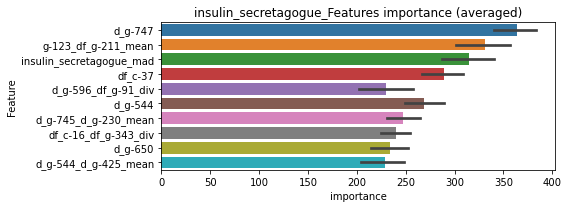

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815536	valid_1's binary_logloss: 0.0259672
[600]	training's binary_logloss: 0.00112942	valid_1's binary_logloss: 0.00931879
[900]	training's binary_logloss: 0.000561029	valid_1's binary_logloss: 0.00729842
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000560303	valid_1's binary_logloss: 0.00729114


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790935	valid_1's binary_logloss: 0.0259935
[600]	training's binary_logloss: 0.00112542	valid_1's binary_logloss: 0.0100222
[900]	training's binary_logloss: 0.000560081	valid_1's binary_logloss: 0.00785448
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000552524	valid_1's binary_logloss: 0.0078172


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00818811	valid_1's binary_logloss: 0.0261414
[600]	training's binary_logloss: 0.0011384	valid_1's binary_logloss: 0.0117314
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000602818	valid_1's binary_logloss: 0.0104509


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854292	valid_1's binary_logloss: 0.0203041
[600]	training's binary_logloss: 0.00117465	valid_1's binary_logloss: 0.005861
[900]	training's binary_logloss: 0.000564394	valid_1's binary_logloss: 0.003842
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000551299	valid_1's binary_logloss: 0.00381655


insulin_secretagogue logloss: 0.007345902807910424


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210834	valid_1's binary_logloss: 0.0810762
[600]	training's binary_logloss: 0.00268142	valid_1's binary_logloss: 0.0512617
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00162975	valid_1's binary_logloss: 0.0481529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216207	valid_1's binary_logloss: 0.0593625
[600]	training's binary_logloss: 0.00281219	valid_1's binary_logloss: 0.0280249
[900]	training's binary_logloss: 0.00107805	valid_1's binary_logloss: 0.0237243
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000981609	valid_1's binary_logloss: 0.0235193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215057	valid_1's binary_logloss: 0.0618026
[600]	training's binary_logloss: 0.00274761	valid_1's binary_logloss: 0.0264742
[900]	training's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0203830, Threshold: 0.1033751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00214, Num_p_label: 40.0, conf_0:0.07236, conf_1:0.13439
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.1033751
Num_p_label: 27.0, Expected: 8.5, Adj_threshold_2: 0.1533751
Num_p_label: 21.0, Expected: 8.5, Adj_threshold_3: 0.2033751
threshold: 0.2033751, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178008	valid_1's binary_logloss: 0.0603223
[600]	training's binary_logloss: 0.00230701	valid_1's binary_logloss: 0.0359919
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.0010128	valid_1's binary_logloss: 0.0330094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018186	valid_1's binary_logloss: 0.054871
[600]	training's binary_logloss: 0.00231884	valid_1's binary_logloss: 0.0261932
[900]	training's binary_logloss: 0.000922854	valid_1's binary_logloss: 0.0216905
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.00079295	valid_1's binary_logloss: 0.0213141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174459	valid_1's binary_logloss: 0.0592444
[600]	training's binary_logloss: 0.00226474	valid_1's binary_logloss: 0.0312132
[900]	training's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0940682, Threshold: 0.2033751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0145655 Vs.target_rate: 0.00214, Num_p_label: 58.0, conf_0:0.16270, conf_1:0.24405
Num_p_label: 58.0, Expected: 8.5, Adj_threshold_1: 0.2033751
Num_p_label: 51.0, Expected: 8.5, Adj_threshold_2: 0.2533751
Num_p_label: 45.0, Expected: 8.5, Adj_threshold_3: 0.3033751
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_4: 0.3533751
Num_p_label: 35.0, Expected: 8.5, Adj_threshold_5: 0.4033751
Num_p_label: 28.0, Expected: 8.5, Adj_threshold_6: 0.4533751
Num_p_label: 27.0, Expected: 8.5, Adj_threshold_7: 0.5033751
Num_p_label: 24.0, Expected: 8.5, Adj_threshold_8: 0.5533751
Num_p_label: 20.0, Expected: 8.5, Adj_threshold_9: 0.6033751
threshold: 0.6033751, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 645.0/3786, y_label_rate: 0.1703645
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162417	valid_1's binary_logloss: 0.0516242
[600]	training's binary_logloss: 0.00210997	valid_1's binary_logloss: 0.0242352
[900]	training's binary_logloss: 0.000874436	valid_1's binary_logloss: 0.0202319
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000692253	valid_1's binary_logloss: 0.0193613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168272	valid_1's binary_logloss: 0.0540769
[600]	training's binary_logloss: 0.00220711	valid_1's binary_logloss: 0.0258478
[900]	training's binary_logloss: 0.000891587	valid_1's binary_logloss: 0.0209496
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000726398	valid_1's binary_logloss: 0.020222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162181	valid_1's binary_logloss: 0.0502598
[600]	training's binary_l

3 / 3 AUC score:0.998
y_Threshold: 0.0834730, Threshold: 0.6033751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 637.0/3770
p_label_rate: 0.0057760 Vs.target_rate: 0.00214, Num_p_label: 23.0, conf_0:0.50000, conf_1:0.66371
Num_p_label: 23.0, Expected: 8.5, Adj_threshold_1: 0.6033751
Num_p_label: 21.0, Expected: 8.5, Adj_threshold_2: 0.6533751
threshold: 0.6533751, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 637.0/3770, y_label_rate: 0.1689655


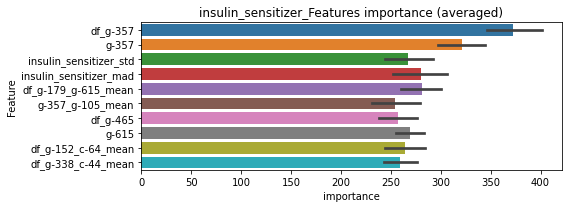

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160141	valid_1's binary_logloss: 0.049315
[600]	training's binary_logloss: 0.00203192	valid_1's binary_logloss: 0.0231153
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000914396	valid_1's binary_logloss: 0.0200581


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149665	valid_1's binary_logloss: 0.0538972
[600]	training's binary_logloss: 0.00196372	valid_1's binary_logloss: 0.0260101
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.00114161	valid_1's binary_logloss: 0.023018


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160931	valid_1's binary_logloss: 0.0431973
[600]	training's binary_logloss: 0.00209895	valid_1's binary_logloss: 0.0177873
[900]	training's binary_logloss: 0.000875443	valid_1's binary_logloss: 0.0142173
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000857829	valid_1's binary_logloss: 0.0141129


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157594	valid_1's binary_logloss: 0.0556855
[600]	training's binary_logloss: 0.00201394	valid_1's binary_logloss: 0.0337571
[900]	training's binary_logloss: 0.000849182	valid_1's binary_logloss: 0.0318528
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000869411	valid_1's binary_logloss: 0.0317914


insulin_sensitizer logloss: 0.02224472917307425


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186201	valid_1's binary_logloss: 0.0610621
[600]	training's binary_logloss: 0.0023225	valid_1's binary_logloss: 0.0294723
[900]	training's binary_logloss: 0.000905032	valid_1's binary_logloss: 0.024806
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000764368	valid_1's binary_logloss: 0.0242151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182616	valid_1's binary_logloss: 0.0558219
[600]	training's binary_logloss: 0.00229543	valid_1's binary_logloss: 0.0280856
[900]	training's binary_logloss: 0.000891782	valid_1's binary_logloss: 0.0228284
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000728037	valid_1's binary_logloss: 0.0221733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184681	valid_1's binary_logloss: 0.0482266
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0123698, Threshold: 0.0592356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.04146, conf_1:0.07701
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0592356
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_2: 0.1092356
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_3: 0.1592356
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_4: 0.2092356
threshold: 0.2092356, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149065	valid_1's binary_logloss: 0.0508844
[600]	training's binary_logloss: 0.00188652	valid_1's binary_logloss: 0.0279741
[900]	training's binary_logloss: 0.000784174	valid_1's binary_logloss: 0.0248798
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000690854	valid_1's binary_logloss: 0.0246953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164316	valid_1's binary_logloss: 0.0425079
[600]	training's binary_logloss: 0.00203752	valid_1's binary_logloss: 0.0183368
[900]	training's binary_logloss: 0.000820923	valid_1's binary_logloss: 0.0142589
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000662897	valid_1's binary_logloss: 0.0135887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158992	valid_1's binary_logloss: 0.052425
[600]	training's binary_lo

2 / 3 AUC score:0.998
y_Threshold: 0.0605514, Threshold: 0.2092356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0092918 Vs.target_rate: 0.00176, Num_p_label: 37.0, conf_0:0.16739, conf_1:0.25108
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_1: 0.2092356
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_2: 0.2592356
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_3: 0.3092356
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_4: 0.3592356
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_5: 0.4092356
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_6: 0.4592356
threshold: 0.4592356, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3787, y_label_rate: 0.1708476
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147278	valid_1's binary_logloss: 0.0417597
[600]	training's binary_logloss: 0.0018463	valid_1's binary_logloss: 0.015512
[900]	training's binary_logloss: 0.000766418	valid_1's binary_logloss: 0.0113905
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.000626935	valid_1's binary_logloss: 0.0105785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150392	valid_1's binary_logloss: 0.0423286
[600]	training's binary_logloss: 0.00184475	valid_1's binary_logloss: 0.0170386
[900]	training's binary_logloss: 0.000764029	valid_1's binary_logloss: 0.013665
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000642758	valid_1's binary_logloss: 0.0132251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141204	valid_1's binary_logloss: 0.0411866
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0602273, Threshold: 0.4592356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0047715 Vs.target_rate: 0.00176, Num_p_label: 19.0, conf_0:0.41331, conf_1:0.50516
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_1: 0.4592356
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_2: 0.5092356
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_3: 0.5592356
threshold: 0.5592356, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3785, y_label_rate: 0.1706737


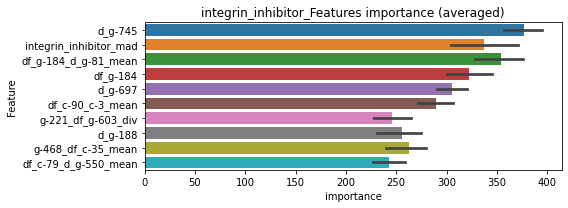

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144463	valid_1's binary_logloss: 0.0556249
[600]	training's binary_logloss: 0.00180078	valid_1's binary_logloss: 0.0330579
[900]	training's binary_logloss: 0.000744718	valid_1's binary_logloss: 0.0306874
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.0007601	valid_1's binary_logloss: 0.030625


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139382	valid_1's binary_logloss: 0.0442511
[600]	training's binary_logloss: 0.0017602	valid_1's binary_logloss: 0.0215129
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.0010658	valid_1's binary_logloss: 0.019602


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134041	valid_1's binary_logloss: 0.0415605
[600]	training's binary_logloss: 0.00171563	valid_1's binary_logloss: 0.0176594
[900]	training's binary_logloss: 0.000735442	valid_1's binary_logloss: 0.0141372
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000634075	valid_1's binary_logloss: 0.0136338


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155046	valid_1's binary_logloss: 0.0408578
[600]	training's binary_logloss: 0.00187348	valid_1's binary_logloss: 0.0144108
[900]	training's binary_logloss: 0.000771166	valid_1's binary_logloss: 0.0111308
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000670015	valid_1's binary_logloss: 0.0108265


integrin_inhibitor logloss: 0.018675828395947926


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0360775	valid_1's binary_logloss: 0.144983
[600]	training's binary_logloss: 0.00624265	valid_1's binary_logloss: 0.111811
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00384892	valid_1's binary_logloss: 0.10937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036344	valid_1's binary_logloss: 0.124891
[600]	training's binary_logloss: 0.00651649	valid_1's binary_logloss: 0.0825405
[900]	training's binary_logloss: 0.00211304	valid_1's binary_logloss: 0.0749743
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00210774	valid_1's binary_logloss: 0.0749498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0364234	valid_1's binary_logloss: 0.128817
[600]	training's binary_logloss: 0.00656182	valid_1's binary_logloss: 0.0933838
[900]	training's binary_logloss: 0.00

1 / 3 AUC score:0.988
y_Threshold: 0.0431719, Threshold: 0.2861836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 190 → Positive_corect_labels: 625/3737
p_label_rate: 0.0100452 Vs.target_rate: 0.00386, Num_p_label: 40.0, conf_0:0.20033, conf_1:0.37204
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.2861836
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_2: 0.3361836
Num_p_label: 20.0, Expected: 15.4, Adj_threshold_3: 0.3861836
threshold: 0.3861836, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 625.0/3737, y_label_rate: 0.1672465
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264281	valid_1's binary_logloss: 0.0943738
[600]	training's binary_logloss: 0.0040922	valid_1's binary_logloss: 0.0592545
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.00191735	valid_1's binary_logloss: 0.0531107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0259321	valid_1's binary_logloss: 0.112634
[600]	training's binary_logloss: 0.00398226	valid_1's binary_logloss: 0.077767
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00163922	valid_1's binary_logloss: 0.0707489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249864	valid_1's binary_logloss: 0.100275
[600]	training's binary_logloss: 0.00390978	valid_1's binary_logloss: 0.0659456
[900]	training's binary_logloss: 0.00144244	valid_1's binary_logloss: 0.0577821
Early stopping, best iteration is:

2 / 3 AUC score:0.996
y_Threshold: 0.1495347, Threshold: 0.3861836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 599.0/3685
p_label_rate: 0.0210949 Vs.target_rate: 0.00386, Num_p_label: 84.0, conf_0:0.30895, conf_1:0.46342
Num_p_label: 84.0, Expected: 15.4, Adj_threshold_1: 0.3861836
Num_p_label: 72.0, Expected: 15.4, Adj_threshold_2: 0.4361836
Num_p_label: 60.0, Expected: 15.4, Adj_threshold_3: 0.4861836
Num_p_label: 54.0, Expected: 15.4, Adj_threshold_4: 0.5361836
Num_p_label: 48.0, Expected: 15.4, Adj_threshold_5: 0.5861836
Num_p_label: 43.0, Expected: 15.4, Adj_threshold_6: 0.6361836
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_7: 0.6861836
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_8: 0.7361836
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_9: 0.7861836
threshold: 0.7861836, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 599.0/3685, y_label_rate: 0.1625509
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023212	valid_1's binary_logloss: 0.0819956
[600]	training's binary_logloss: 0.00346508	valid_1's binary_logloss: 0.051491
[900]	training's binary_logloss: 0.00133484	valid_1's binary_logloss: 0.0442454
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.00128541	valid_1's binary_logloss: 0.0439012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205222	valid_1's binary_logloss: 0.101709
[600]	training's binary_logloss: 0.00304682	valid_1's binary_logloss: 0.0773849
[900]	training's binary_logloss: 0.00121242	valid_1's binary_logloss: 0.073972
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00120236	valid_1's binary_logloss: 0.0739106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217698	valid_1's binary_logloss: 0.0817792
[600]	training's binary_logloss: 0

3 / 3 AUC score:0.996
y_Threshold: 0.1326693, Threshold: 0.7861836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 570.0/3627
p_label_rate: 0.0095429 Vs.target_rate: 0.00386, Num_p_label: 38.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.7861836
threshold: 0.7861836, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 570.0/3627, y_label_rate: 0.1571547


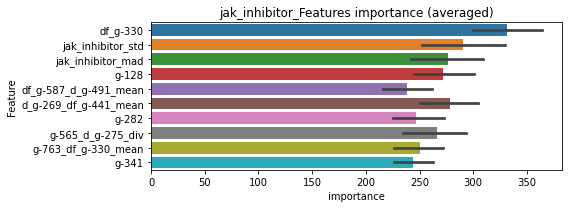

len(train_index) : 2720
len(valid_index) : 907
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179775	valid_1's binary_logloss: 0.0841873
[600]	training's binary_logloss: 0.00261502	valid_1's binary_logloss: 0.0607057
[900]	training's binary_logloss: 0.00109353	valid_1's binary_logloss: 0.0573652
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.00107686	valid_1's binary_logloss: 0.0571271


len(train_index) : 2720
len(valid_index) : 907
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172431	valid_1's binary_logloss: 0.0909264
[600]	training's binary_logloss: 0.0026164	valid_1's binary_logloss: 0.0650226
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.0012976	valid_1's binary_logloss: 0.0600583


len(train_index) : 2720
len(valid_index) : 907
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185957	valid_1's binary_logloss: 0.0861781
[600]	training's binary_logloss: 0.00267719	valid_1's binary_logloss: 0.0665867
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00173045	valid_1's binary_logloss: 0.0648654


len(train_index) : 2721
len(valid_index) : 906
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191987	valid_1's binary_logloss: 0.0689476
[600]	training's binary_logloss: 0.00281348	valid_1's binary_logloss: 0.0425179
[900]	training's binary_logloss: 0.00113419	valid_1's binary_logloss: 0.0378943
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000998594	valid_1's binary_logloss: 0.0373858


jak_inhibitor logloss: 0.05486395335650559


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0866835	valid_1's binary_logloss: 0.337802
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.0886176	valid_1's binary_logloss: 0.337557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0857946	valid_1's binary_logloss: 0.313422
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.0428284	valid_1's binary_logloss: 0.306599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0874799	valid_1's binary_logloss: 0.285869
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0483205	valid_1's binary_logloss: 0.276632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0929129	valid_1's binary_logloss: 0.273108
[600]	training's binary_logloss: 0.0273533	valid_1's binary_logloss: 0.252136
Early stopping, best iterat

1 / 3 AUC score:0.857
y_Threshold: 0.1157729, Threshold: 0.5865917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 531 → Positive_corect_labels: 449/3366
p_label_rate: 0.0100452 Vs.target_rate: 0.01146, Num_p_label: 40.0, conf_0:0.41061, conf_1:0.76257
threshold: 0.5865917, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 449.0/3366, y_label_rate: 0.1333928
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027966	valid_1's binary_logloss: 0.138544
[600]	training's binary_logloss: 0.00495087	valid_1's binary_logloss: 0.116926
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00392358	valid_1's binary_logloss: 0.115191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0275824	valid_1's binary_logloss: 0.175161
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00946448	valid_1's binary_logloss: 0.166869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309222	valid_1's binary_logloss: 0.128694
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.0110703	valid_1's binary_logloss: 0.118262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0270374	valid_1's binary_logloss: 0.172861
Early stopping, best iter

2 / 3 AUC score:0.963
y_Threshold: 0.0982816, Threshold: 0.5865917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 376.0/3220
p_label_rate: 0.0371673 Vs.target_rate: 0.01146, Num_p_label: 148.0, conf_0:0.46927, conf_1:0.70391
Num_p_label: 148.0, Expected: 45.6, Adj_threshold_1: 0.5865917
Num_p_label: 128.0, Expected: 45.6, Adj_threshold_2: 0.6365917
Num_p_label: 103.0, Expected: 45.6, Adj_threshold_3: 0.6865917
Num_p_label: 93.0, Expected: 45.6, Adj_threshold_4: 0.7365917
Num_p_label: 77.0, Expected: 45.6, Adj_threshold_5: 0.7865917
threshold: 0.7865917, positive_p_label: 77.0/3982, p_label_rate: 0.0193370
positive_y_label: 376.0/3220, y_label_rate: 0.1167702
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139196	valid_1's binary_logloss: 0.115234
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00917237	valid_1's binary_logloss: 0.113702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144313	valid_1's binary_logloss: 0.103025
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00428466	valid_1's binary_logloss: 0.0951325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133741	valid_1's binary_logloss: 0.100759
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00608304	valid_1's binary_logloss: 0.0962849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150766	valid_1's binary_logloss: 0.0674314
[600]	training's binary_logloss: 0.00243547	valid_1's binary_logloss: 0.0490531
Early stopping, bes

3 / 3 AUC score:0.972
y_Threshold: 0.0984012, Threshold: 0.7865917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 342.0/3152
p_label_rate: 0.0454545 Vs.target_rate: 0.01146, Num_p_label: 181.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 181.0, Expected: 45.6, Adj_threshold_1: 0.7865917
threshold: 0.7865917, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 342.0/3152, y_label_rate: 0.1085025


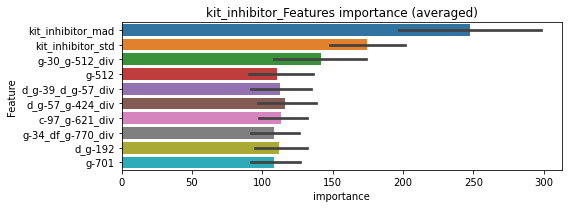

len(train_index) : 2364
len(valid_index) : 788
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871779	valid_1's binary_logloss: 0.0454358
[600]	training's binary_logloss: 0.00151286	valid_1's binary_logloss: 0.035532
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00114524	valid_1's binary_logloss: 0.0348951


len(train_index) : 2364
len(valid_index) : 788
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823453	valid_1's binary_logloss: 0.0667708


len(train_index) : 2364
len(valid_index) : 788


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00207678	valid_1's binary_logloss: 0.0618434


================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083913	valid_1's binary_logloss: 0.0729359


len(train_index) : 2364
len(valid_index) : 788
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.0024139	valid_1's binary_logloss: 0.0655067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00933202	valid_1's binary_logloss: 0.0428401
[600]	training's binary_logloss: 0.00158212	valid_1's binary_logloss: 0.0298365
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00117772	valid_1's binary_logloss: 0.0288365


kit_inhibitor logloss: 0.04777043245290318


neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014271	valid_1's binary_logloss: 0.00245164
[600]	training's binary_logloss: 0.000212444	valid_1's binary_logloss: 0.000921022
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000173056	valid_1's binary_logloss: 0.000809586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147407	valid_1's binary_logloss: 0.00298395
[600]	training's binary_logloss: 0.000215462	valid_1's binary_logloss: 0.000914443
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00017944	valid_1's binary_logloss: 0.000846613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146757	valid_1's binary_logloss: 0.00168048
[600]	training's binary_logloss: 0.000213653	valid_1's binary_logloss: 0.000266269
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000181077	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0005216, Threshold: 0.0028887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00202, conf_1:0.00376
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0028887
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0528887
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1028887
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1528887
threshold: 0.1528887, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013165	valid_1's binary_logloss: 0.00156673
[600]	training's binary_logloss: 0.000190188	valid_1's binary_logloss: 0.000270738
[900]	training's binary_logloss: 0.000152429	valid_1's binary_logloss: 0.000221657
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000152429	valid_1's binary_logloss: 0.000221657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132593	valid_1's binary_logloss: 0.00566372
[600]	training's binary_logloss: 0.000190329	valid_1's binary_logloss: 0.00432064
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000157522	valid_1's binary_logloss: 0.00423412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133364	valid_1's binary_logloss: 0.00141067
[600]	training's binary_logloss: 0.00018975	valid_1's binary_logloss: 0.000215654
[900]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0154626, Threshold: 0.1528887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025, Num_p_label: 10.0, conf_0:0.12231, conf_1:0.18347
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.1528887
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.2028887
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.2528887
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3028887
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3528887
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.4028887


Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000158162	valid_1's binary_logloss: 0.000176153


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.4528887
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.5028887
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.5528887
threshold: 0.5528887, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013165	valid_1's binary_logloss: 0.00156673
[600]	training's binary_logloss: 0.000190188	valid_1's binary_logloss: 0.000270738
[900]	training's binary_logloss: 0.000152429	valid_1's binary_logloss: 0.000221657
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000152429	valid_1's binary_logloss: 0.000221657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132593	valid_1's binary_logloss: 0.00566372
[600]	training's binary_logloss: 0.000190329	valid_1's binary_logloss: 0.00432064
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000157522	valid_1's binary_logloss: 0.00423412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133364	valid_1's binary_logloss: 0.00141067
[600]	training's binary_logloss: 0.00018975	valid_1's binary_logloss: 0.000215654
[900]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0154626, Threshold: 0.5528887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.49760, conf_1:0.60818
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5528887
threshold: 0.5528887, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000158162	valid_1's binary_logloss: 0.000176153


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


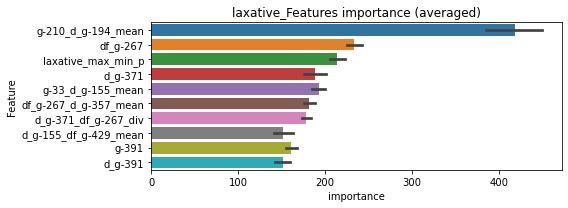

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013189	valid_1's binary_logloss: 0.00149877
[600]	training's binary_logloss: 0.000188866	valid_1's binary_logloss: 0.000246481


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000154151	valid_1's binary_logloss: 0.000204677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132586	valid_1's binary_logloss: 0.00515412
[600]	training's binary_logloss: 0.000191085	valid_1's binary_logloss: 0.00390858
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000173745	valid_1's binary_logloss: 0.00387625


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132985	valid_1's binary_logloss: 0.00141444
[600]	training's binary_logloss: 0.000190152	valid_1's binary_logloss: 0.000218284


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000153388	valid_1's binary_logloss: 0.000177034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134357	valid_1's binary_logloss: 0.00143067
[600]	training's binary_logloss: 0.000191358	valid_1's binary_logloss: 0.000211863


laxative logloss: 0.0011085644032884396


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00015784	valid_1's binary_logloss: 0.000177243
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155318	valid_1's binary_logloss: 0.00211233
[600]	training's binary_logloss: 0.000217552	valid_1's binary_logloss: 0.000465266
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00018948	valid_1's binary_logloss: 0.000423352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152781	valid_1's binary_logloss: 0.00608466
[600]	training's binary_logloss: 0.000218385	valid_1's binary_logloss: 0.00398328
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000187396	valid_1's binary_logloss: 0.00372152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155649	valid_1's binary_logloss: 0.00378792
[600]	training's binary_logloss: 0.000215765	valid_1's binary_logloss: 0.00157285
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000190723	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0005994, Threshold: 0.0029324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00205, conf_1:0.00381
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0029324
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0529324
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1029324
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1529324
threshold: 0.1529324, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014315	valid_1's binary_logloss: 0.0017528
[600]	training's binary_logloss: 0.000191255	valid_1's binary_logloss: 0.000294037
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000170611	valid_1's binary_logloss: 0.000268451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143974	valid_1's binary_logloss: 0.00214065
[600]	training's binary_logloss: 0.000192916	valid_1's binary_logloss: 0.00057066
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000174056	valid_1's binary_logloss: 0.000542084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014503	valid_1's binary_logloss: 0.00170467
[600]	training's binary_logloss: 0.000195437	valid_1's binary_logloss: 0.000254265
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000168155	valid_1's bin

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00016898	valid_1's binary_logloss: 0.000286383


y_Threshold: 0.1590938, Threshold: 0.1529324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025, Num_p_label: 12.0, conf_0:0.12235, conf_1:0.18352
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_1: 0.1529324
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_2: 0.2029324
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.2529324
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_4: 0.3029324
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.3529324
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4029324
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.4529324
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.5029324
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.5529324
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.6029324
threshold: 0.6529324, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014315	valid_1's binary_logloss: 0.0017528
[600]	training's binary_logloss: 0.000191255	valid_1's binary_logloss: 0.000294037
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000170611	valid_1's binary_logloss: 0.000268451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143974	valid_1's binary_logloss: 0.00214065
[600]	training's binary_logloss: 0.000192916	valid_1's binary_logloss: 0.00057066
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000174056	valid_1's binary_logloss: 0.000542084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014503	valid_1's binary_logloss: 0.00170467
[600]	training's binary_logloss: 0.000195437	valid_1's binary_logloss: 0.000254265
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000168155	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1590938, Threshold: 0.6529324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.50000, conf_1:0.71823
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.6529324
threshold: 0.6529324, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


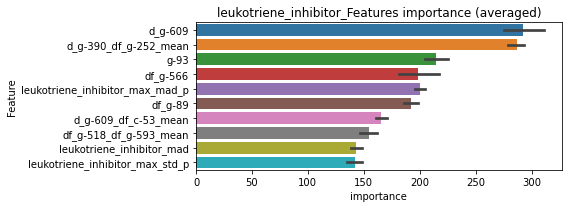

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144366	valid_1's binary_logloss: 0.00178614
[600]	training's binary_logloss: 0.000192392	valid_1's binary_logloss: 0.000300212
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000166409	valid_1's binary_logloss: 0.000269076


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145825	valid_1's binary_logloss: 0.00274952
[600]	training's binary_logloss: 0.000194923	valid_1's binary_logloss: 0.000908739
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000167792	valid_1's binary_logloss: 0.000848761


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146911	valid_1's binary_logloss: 0.00187638
[600]	training's binary_logloss: 0.000194438	valid_1's binary_logloss: 0.000273499


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000165283	valid_1's binary_logloss: 0.00023467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014435	valid_1's binary_logloss: 0.00199757
[600]	training's binary_logloss: 0.000194066	valid_1's binary_logloss: 0.000345544
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00016512	valid_1's binary_logloss: 0.000299276


leukotriene_inhibitor logloss: 0.00041312725946452805


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021034	valid_1's binary_logloss: 0.074096
[600]	training's binary_logloss: 0.00294744	valid_1's binary_logloss: 0.0477228
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00130663	valid_1's binary_logloss: 0.0437439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022018	valid_1's binary_logloss: 0.0690308
[600]	training's binary_logloss: 0.00302928	valid_1's binary_logloss: 0.0318539
[900]	training's binary_logloss: 0.00113277	valid_1's binary_logloss: 0.0241405
[1200]	training's binary_logloss: 0.000802756	valid_1's binary_logloss: 0.0223743
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.000777482	valid_1's binary_logloss: 0.0221053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210543	valid_1's binary_logloss: 0.0644228
[600]	training's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0148489, Threshold: 0.1162590, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.08138, conf_1:0.15114
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.1162590
Num_p_label: 30.0, Expected: 10.4, Adj_threshold_2: 0.1662590
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_3: 0.2162590
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_4: 0.2662590
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_5: 0.3162590
threshold: 0.3162590, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188952	valid_1's binary_logloss: 0.0775462
[600]	training's binary_logloss: 0.00250218	valid_1's binary_logloss: 0.0576774
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.0020194	valid_1's binary_logloss: 0.057448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178606	valid_1's binary_logloss: 0.0725413
[600]	training's binary_logloss: 0.00244252	valid_1's binary_logloss: 0.0458859
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.00105359	valid_1's binary_logloss: 0.0420812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196228	valid_1's binary_logloss: 0.0607492
[600]	training's binary_logloss: 0.00268166	valid_1's binary_logloss: 0.0292306
[900]	training's binary_logloss: 0.00103524	valid_1's binary_logloss: 0.0231756
Early stopping, best iteration i

2 / 3 AUC score:0.997
y_Threshold: 0.0704928, Threshold: 0.3162590, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0113009 Vs.target_rate: 0.00260, Num_p_label: 45.0, conf_0:0.25301, conf_1:0.37951
Num_p_label: 45.0, Expected: 10.4, Adj_threshold_1: 0.3162590
Num_p_label: 38.0, Expected: 10.4, Adj_threshold_2: 0.3662590
Num_p_label: 30.0, Expected: 10.4, Adj_threshold_3: 0.4162590
Num_p_label: 28.0, Expected: 10.4, Adj_threshold_4: 0.4662590
Num_p_label: 27.0, Expected: 10.4, Adj_threshold_5: 0.5162590
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_6: 0.5662590
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_7: 0.6162590
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_8: 0.6662590
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_9: 0.7162590
threshold: 0.7162590, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 642.0/3778, y_label_rate: 0.1699312
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169001	valid_1's binary_logloss: 0.0604308
[600]	training's binary_logloss: 0.00229408	valid_1's binary_logloss: 0.0326605
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00106291	valid_1's binary_logloss: 0.0276628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160469	valid_1's binary_logloss: 0.0757747
[600]	training's binary_logloss: 0.00220494	valid_1's binary_logloss: 0.0500983
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00171067	valid_1's binary_logloss: 0.048401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186495	valid_1's binary_logloss: 0.0465207
[600]	training's binary_logloss: 0.00246732	valid_1's binary_logloss: 0.0177809
[900]	training's binary_logloss: 0.000982826	valid_1's binary_logloss: 0.0124661
Early stopping, best iteration

3 / 3 AUC score:1.000
y_Threshold: 0.1129428, Threshold: 0.7162590, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 636.0/3766
p_label_rate: 0.0052737 Vs.target_rate: 0.00260, Num_p_label: 21.0, conf_0:0.50000, conf_1:0.78788
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_1: 0.7162590
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_2: 0.7662590
threshold: 0.7662590, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 636.0/3766, y_label_rate: 0.1688794


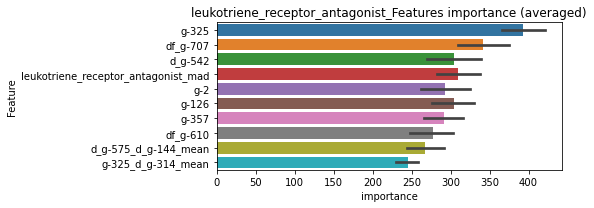

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160697	valid_1's binary_logloss: 0.0509088
[600]	training's binary_logloss: 0.00208608	valid_1's binary_logloss: 0.023806
[900]	training's binary_logloss: 0.00089516	valid_1's binary_logloss: 0.0206427
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000877047	valid_1's binary_logloss: 0.0204336


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168328	valid_1's binary_logloss: 0.0741715
[600]	training's binary_logloss: 0.00223871	valid_1's binary_logloss: 0.0449296
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00179574	valid_1's binary_logloss: 0.0443647


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164122	valid_1's binary_logloss: 0.0470132
[600]	training's binary_logloss: 0.00222892	valid_1's binary_logloss: 0.0226316
[900]	training's binary_logloss: 0.0009129	valid_1's binary_logloss: 0.0183831
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000835779	valid_1's binary_logloss: 0.0182486


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159169	valid_1's binary_logloss: 0.0577725
[600]	training's binary_logloss: 0.00218188	valid_1's binary_logloss: 0.0297028
[900]	training's binary_logloss: 0.000906809	valid_1's binary_logloss: 0.0248736
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000727853	valid_1's binary_logloss: 0.0240211


leukotriene_receptor_antagonist logloss: 0.026770003989162416


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366136	valid_1's binary_logloss: 0.00561558
[600]	training's binary_logloss: 0.000471332	valid_1's binary_logloss: 0.00125557
[900]	training's binary_logloss: 0.000314752	valid_1's binary_logloss: 0.000955687
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000314752	valid_1's binary_logloss: 0.000955687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377537	valid_1's binary_logloss: 0.0086143
[600]	training's binary_logloss: 0.000472264	valid_1's binary_logloss: 0.00230486
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000324064	valid_1's binary_logloss: 0.00188627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385838	valid_1's binary_logloss: 0.00564774
[600]	training's binary_logloss: 0.000479098	valid_1's binary_logloss: 0.00105498
Early stopp

1 / 3 AUC score:1.000
y_Threshold: 0.0019270, Threshold: 0.0071734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00933
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0071734
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0571734
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1071734
threshold: 0.1071734, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317984	valid_1's binary_logloss: 0.00440425
[600]	training's binary_logloss: 0.000414008	valid_1's binary_logloss: 0.00072021
[900]	training's binary_logloss: 0.000289899	valid_1's binary_logloss: 0.000524488
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000288638	valid_1's binary_logloss: 0.000522793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316881	valid_1's binary_logloss: 0.00657856
[600]	training's binary_logloss: 0.000411793	valid_1's binary_logloss: 0.00163098
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298181	valid_1's binary_logloss: 0.0013498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315623	valid_1's binary_logloss: 0.00423092
[600]	training's binary_logloss: 0.00041692	valid_1's binary_logloss: 0.000654976
Early stopp

2 / 3 AUC score:1.000
y_Threshold: 0.1113535, Threshold: 0.1071734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050, Num_p_label: 9.0, conf_0:0.08574, conf_1:0.12861
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.1071734
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.1571734
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.2071734
threshold: 0.2071734, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317984	valid_1's binary_logloss: 0.00440425
[600]	training's binary_logloss: 0.000414008	valid_1's binary_logloss: 0.00072021
[900]	training's binary_logloss: 0.000289899	valid_1's binary_logloss: 0.000524488
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000288638	valid_1's binary_logloss: 0.000522793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316881	valid_1's binary_logloss: 0.00657856
[600]	training's binary_logloss: 0.000411793	valid_1's binary_logloss: 0.00163098
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298181	valid_1's binary_logloss: 0.0013498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315623	valid_1's binary_logloss: 0.00423092
[600]	training's binary_logloss: 0.00041692	valid_1's binary_logloss: 0.000654976
Early stopp

3 / 3 AUC score:1.000
y_Threshold: 0.1113535, Threshold: 0.2071734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.18646, conf_1:0.22789
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.2071734
threshold: 0.2071734, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


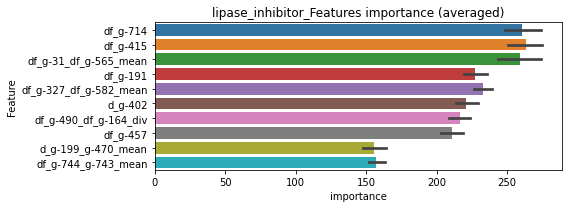

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318878	valid_1's binary_logloss: 0.0043545
[600]	training's binary_logloss: 0.000412647	valid_1's binary_logloss: 0.000702136
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000302043	valid_1's binary_logloss: 0.000532467


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320555	valid_1's binary_logloss: 0.00683029
[600]	training's binary_logloss: 0.000413557	valid_1's binary_logloss: 0.00164573
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000300377	valid_1's binary_logloss: 0.00136257


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323008	valid_1's binary_logloss: 0.00445157
[600]	training's binary_logloss: 0.000419327	valid_1's binary_logloss: 0.000674578
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000292269	valid_1's binary_logloss: 0.000478041


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319546	valid_1's binary_logloss: 0.00505606
[600]	training's binary_logloss: 0.000410858	valid_1's binary_logloss: 0.000957826
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000295304	valid_1's binary_logloss: 0.000757475


lipase_inhibitor logloss: 0.0007825733771962393


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213316	valid_1's binary_logloss: 0.0881865
[600]	training's binary_logloss: 0.0029691	valid_1's binary_logloss: 0.0643639
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00283167	valid_1's binary_logloss: 0.0638254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222814	valid_1's binary_logloss: 0.0780628
[600]	training's binary_logloss: 0.00311171	valid_1's binary_logloss: 0.045015
[900]	training's binary_logloss: 0.00116153	valid_1's binary_logloss: 0.0392105
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00109416	valid_1's binary_logloss: 0.0391135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023373	valid_1's binary_logloss: 0.0567724
[600]	training's binary_logloss: 0.00329367	valid_1's binary_logloss: 0.0235858
[900]	training's binary_logloss: 

1 / 3 AUC score:0.998
y_Threshold: 0.0207999, Threshold: 0.2386544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.16706, conf_1:0.31025
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.2386544
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_2: 0.2886544
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_3: 0.3386544
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_4: 0.3886544
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_5: 0.4386544
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_6: 0.4886544
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_7: 0.5386544
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_8: 0.5886544
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_9: 0.6386544
threshold: 0.6386544, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 649.0/3794, y_label_rate: 0.1710596
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191699	valid_1's binary_logloss: 0.0632746
[600]	training's binary_logloss: 0.00254746	valid_1's binary_logloss: 0.0394421
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00120378	valid_1's binary_logloss: 0.0359811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181845	valid_1's binary_logloss: 0.067555
[600]	training's binary_logloss: 0.00242785	valid_1's binary_logloss: 0.0429779
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00131028	valid_1's binary_logloss: 0.0408688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191062	valid_1's binary_logloss: 0.0651209
[600]	training's binary_logloss: 0.00255435	valid_1's binary_logloss: 0.0335899
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00121356	valid_1's binary_logloss: 0.0304

2 / 3 AUC score:0.998
y_Threshold: 0.0890144, Threshold: 0.6386544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 638.0/3772
p_label_rate: 0.0067805 Vs.target_rate: 0.00256, Num_p_label: 27.0, conf_0:0.50000, conf_1:0.76639
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_1: 0.6386544
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_2: 0.6886544
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_3: 0.7386544
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_4: 0.7886544
threshold: 0.7886544, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 638.0/3772, y_label_rate: 0.1691410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168168	valid_1's binary_logloss: 0.0656277
[600]	training's binary_logloss: 0.00232431	valid_1's binary_logloss: 0.0338626
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00109945	valid_1's binary_logloss: 0.0288308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179997	valid_1's binary_logloss: 0.0524781
[600]	training's binary_logloss: 0.00237269	valid_1's binary_logloss: 0.0243736
[900]	training's binary_logloss: 0.000947546	valid_1's binary_logloss: 0.0201232
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00089469	valid_1's binary_logloss: 0.0199835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172803	valid_1's binary_logloss: 0.0504667
[600]	training's binary_logloss: 0.00233087	valid_1's binary_logloss: 0.0258035
[900]	training's binary_loglo

3 / 3 AUC score:0.997
y_Threshold: 0.0666445, Threshold: 0.7886544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 632.0/3760
p_label_rate: 0.0045203 Vs.target_rate: 0.00256, Num_p_label: 18.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7886544
threshold: 0.7886544, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 632.0/3760, y_label_rate: 0.1680851


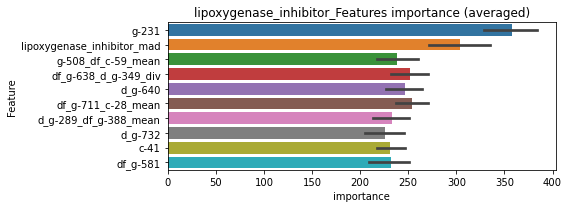

len(train_index) : 2820
len(valid_index) : 940
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155624	valid_1's binary_logloss: 0.0725347
[600]	training's binary_logloss: 0.00211881	valid_1's binary_logloss: 0.046309
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00124025	valid_1's binary_logloss: 0.0440021


len(train_index) : 2820
len(valid_index) : 940
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162329	valid_1's binary_logloss: 0.0394813
[600]	training's binary_logloss: 0.00223872	valid_1's binary_logloss: 0.015052
[900]	training's binary_logloss: 0.000925144	valid_1's binary_logloss: 0.0114193
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000804807	valid_1's binary_logloss: 0.011086


len(train_index) : 2820
len(valid_index) : 940
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167355	valid_1's binary_logloss: 0.0473342
[600]	training's binary_logloss: 0.00222845	valid_1's binary_logloss: 0.0189217
[900]	training's binary_logloss: 0.000918284	valid_1's binary_logloss: 0.0148476
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.00076229	valid_1's binary_logloss: 0.0144109


len(train_index) : 2820
len(valid_index) : 940
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161023	valid_1's binary_logloss: 0.0596335
[600]	training's binary_logloss: 0.00213532	valid_1's binary_logloss: 0.0358111
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.00123855	valid_1's binary_logloss: 0.0340091


lipoxygenase_inhibitor logloss: 0.025877026723802397


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235641	valid_1's binary_logloss: 0.00299265
[600]	training's binary_logloss: 0.000318597	valid_1's binary_logloss: 0.000507157
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000250627	valid_1's binary_logloss: 0.000416889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002197	valid_1's binary_logloss: 0.00623708
[600]	training's binary_logloss: 0.000305663	valid_1's binary_logloss: 0.00201135
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000250523	valid_1's binary_logloss: 0.00188547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225084	valid_1's binary_logloss: 0.00338378
[600]	training's binary_logloss: 0.00031316	valid_1's binary_logloss: 0.000776747
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000259127	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0009889, Threshold: 0.0045500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000253783	valid_1's binary_logloss: 0.000376378


p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00318, conf_1:0.00591
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0045500
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0545500
threshold: 0.0545500, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200922	valid_1's binary_logloss: 0.00255165
[600]	training's binary_logloss: 0.000279026	valid_1's binary_logloss: 0.00039502
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000230866	valid_1's binary_logloss: 0.000328282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019876	valid_1's binary_logloss: 0.00495661
[600]	training's binary_logloss: 0.000278381	valid_1's binary_logloss: 0.00189984
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000231051	valid_1's binary_logloss: 0.00174379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198705	valid_1's binary_logloss: 0.00239297
[600]	training's binary_logloss: 0.000280231	valid_1's binary_logloss: 0.00037306
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000229173	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0703056, Threshold: 0.0545500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00025, Num_p_label: 15.0, conf_0:0.04364, conf_1:0.06546
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_1: 0.0545500
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.1045500
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.1545500
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.2045500
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.2545500
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.3045500
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.3545500
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4045500
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.4545500
threshold: 0.4545500, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200922	valid_1's binary_logloss: 0.00255165
[600]	training's binary_logloss: 0.000279026	valid_1's binary_logloss: 0.00039502
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000230866	valid_1's binary_logloss: 0.000328282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019876	valid_1's binary_logloss: 0.00495661
[600]	training's binary_logloss: 0.000278381	valid_1's binary_logloss: 0.00189984
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000231051	valid_1's binary_logloss: 0.00174379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198705	valid_1's binary_logloss: 0.00239297
[600]	training's binary_logloss: 0.000280231	valid_1's binary_logloss: 0.00037306
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000229173	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0703056, Threshold: 0.4545500, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00023497	valid_1's binary_logloss: 0.000346883


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.40909, conf_1:0.50000
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.4545500
threshold: 0.4545500, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


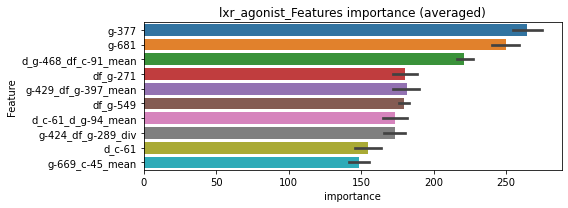

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020151	valid_1's binary_logloss: 0.00253845
[600]	training's binary_logloss: 0.000277601	valid_1's binary_logloss: 0.000384826


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000229067	valid_1's binary_logloss: 0.000318323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198664	valid_1's binary_logloss: 0.00569805
[600]	training's binary_logloss: 0.000277277	valid_1's binary_logloss: 0.00237771
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000228867	valid_1's binary_logloss: 0.00225565


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197877	valid_1's binary_logloss: 0.0024
[600]	training's binary_logloss: 0.000278822	valid_1's binary_logloss: 0.000385445
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000230398	valid_1's binary_logloss: 0.000320663


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199477	valid_1's binary_logloss: 0.00246617
[600]	training's binary_logloss: 0.000278281	valid_1's binary_logloss: 0.000401398


lxr_agonist logloss: 0.000807064004798954


Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000227375	valid_1's binary_logloss: 0.000333624
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131273	valid_1's binary_logloss: 0.0442759
[600]	training's binary_logloss: 0.00162548	valid_1's binary_logloss: 0.0235615
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.0014229	valid_1's binary_logloss: 0.0228325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130176	valid_1's binary_logloss: 0.0322242
[600]	training's binary_logloss: 0.00159626	valid_1's binary_logloss: 0.0150396
[900]	training's binary_logloss: 0.000696863	valid_1's binary_logloss: 0.0128723
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.00067246	valid_1's binary_logloss: 0.0128263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130585	valid_1's binary_logloss: 0.0321024
[600]	training's binary_logloss: 0.00161965	valid_1's binary_logloss: 0.0128437
[900]	training's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0093619, Threshold: 0.1148953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.08043, conf_1:0.14936
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.1148953
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_2: 0.1648953
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_3: 0.2148953
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_4: 0.2648953
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.3148953
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_6: 0.3648953
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_7: 0.4148953
threshold: 0.4148953, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010687	valid_1's binary_logloss: 0.0287218
[600]	training's binary_logloss: 0.00138476	valid_1's binary_logloss: 0.0106697
[900]	training's binary_logloss: 0.00062961	valid_1's binary_logloss: 0.00814585
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000577106	valid_1's binary_logloss: 0.00803976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106597	valid_1's binary_logloss: 0.0239906
[600]	training's binary_logloss: 0.00138779	valid_1's binary_logloss: 0.00861015
[900]	training's binary_logloss: 0.000630071	valid_1's binary_logloss: 0.00660977
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000603452	valid_1's binary_logloss: 0.00650962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107173	valid_1's binary_logloss: 0.0325763
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0491151, Threshold: 0.4148953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0097941 Vs.target_rate: 0.00130, Num_p_label: 39.0, conf_0:0.33192, conf_1:0.49787
Num_p_label: 39.0, Expected: 5.2, Adj_threshold_1: 0.4148953
Num_p_label: 34.0, Expected: 5.2, Adj_threshold_2: 0.4648953
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_3: 0.5148953
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_4: 0.5648953
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_5: 0.6148953
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_6: 0.6648953
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_7: 0.7148953
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_8: 0.7648953
threshold: 0.7648953, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109325	valid_1's binary_logloss: 0.0241195
[600]	training's binary_logloss: 0.00139466	valid_1's binary_logloss: 0.00626378
[900]	training's binary_logloss: 0.000632604	valid_1's binary_logloss: 0.00407635
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000556013	valid_1's binary_logloss: 0.00384753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107031	valid_1's binary_logloss: 0.0259354
[600]	training's binary_logloss: 0.00138387	valid_1's binary_logloss: 0.00844579
[900]	training's binary_logloss: 0.000624202	valid_1's binary_logloss: 0.00581964
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000557823	valid_1's binary_logloss: 0.00563264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107305	valid_1's binary_logloss: 0.0268617
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0762966, Threshold: 0.7648953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0055249 Vs.target_rate: 0.00130, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_1: 0.7648953
threshold: 0.7648953, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


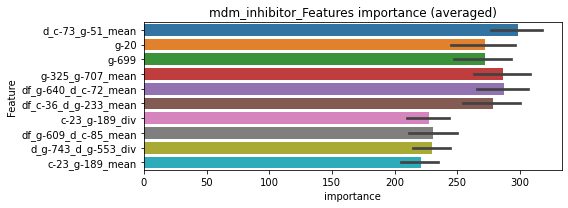

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112745	valid_1's binary_logloss: 0.0241932
[600]	training's binary_logloss: 0.00139774	valid_1's binary_logloss: 0.00613602
[900]	training's binary_logloss: 0.000635115	valid_1's binary_logloss: 0.00402001
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000575777	valid_1's binary_logloss: 0.00389897


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105244	valid_1's binary_logloss: 0.0252465
[600]	training's binary_logloss: 0.00134751	valid_1's binary_logloss: 0.00780034
[900]	training's binary_logloss: 0.000620355	valid_1's binary_logloss: 0.0056688
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000577621	valid_1's binary_logloss: 0.00558625


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107351	valid_1's binary_logloss: 0.0277006
[600]	training's binary_logloss: 0.00136168	valid_1's binary_logloss: 0.0100146
[900]	training's binary_logloss: 0.000623448	valid_1's binary_logloss: 0.00761607
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000601766	valid_1's binary_logloss: 0.00747727


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109344	valid_1's binary_logloss: 0.0274869
[600]	training's binary_logloss: 0.00136898	valid_1's binary_logloss: 0.0100791
[900]	training's binary_logloss: 0.000621719	valid_1's binary_logloss: 0.00783284
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000595946	valid_1's binary_logloss: 0.00777722


mdm_inhibitor logloss: 0.00618929078553724


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326152	valid_1's binary_logloss: 0.127428
[600]	training's binary_logloss: 0.00493375	valid_1's binary_logloss: 0.0865987
[900]	training's binary_logloss: 0.00161718	valid_1's binary_logloss: 0.0818819
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00166263	valid_1's binary_logloss: 0.0815306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0323343	valid_1's binary_logloss: 0.109803
[600]	training's binary_logloss: 0.00474245	valid_1's binary_logloss: 0.0685888
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.00192225	valid_1's binary_logloss: 0.0619145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0344217	valid_1's binary_logloss: 0.079476
[600]	training's binary_logloss: 0.00516967	valid_1's binary_logloss: 0.0351762
[900]	training's binary_logloss: 

1 / 3 AUC score:0.997
y_Threshold: 0.0253462, Threshold: 0.0974183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.06819, conf_1:0.12664
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0974183
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_2: 0.1474183
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_3: 0.1974183
threshold: 0.1974183, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3771, y_label_rate: 0.1702466
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0277589	valid_1's binary_logloss: 0.0797008
[600]	training's binary_logloss: 0.0040738	valid_1's binary_logloss: 0.0353271
[900]	training's binary_logloss: 0.00144825	valid_1's binary_logloss: 0.0258919
[1200]	training's binary_logloss: 0.000915293	valid_1's binary_logloss: 0.0231502
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000871788	valid_1's binary_logloss: 0.0229273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0288395	valid_1's binary_logloss: 0.0937981
[600]	training's binary_logloss: 0.00396062	valid_1's binary_logloss: 0.0532595
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00158132	valid_1's binary_logloss: 0.0462888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028356	valid_1's binary_logloss: 0.100291
[600]	training's binary_loglo

2 / 3 AUC score:0.996
y_Threshold: 0.0831266, Threshold: 0.1974183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 621.0/3729
p_label_rate: 0.0145655 Vs.target_rate: 0.00302, Num_p_label: 58.0, conf_0:0.15793, conf_1:0.23690
Num_p_label: 58.0, Expected: 12.0, Adj_threshold_1: 0.1974183
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_2: 0.2474183
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_3: 0.2974183
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_4: 0.3474183
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_5: 0.3974183
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_6: 0.4474183
threshold: 0.4474183, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 621.0/3729, y_label_rate: 0.1665326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234272	valid_1's binary_logloss: 0.0878698
[600]	training's binary_logloss: 0.00321812	valid_1's binary_logloss: 0.0586298
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00195208	valid_1's binary_logloss: 0.0561353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0254624	valid_1's binary_logloss: 0.0712553
[600]	training's binary_logloss: 0.00355945	valid_1's binary_logloss: 0.0385187
[900]	training's binary_logloss: 0.00131768	valid_1's binary_logloss: 0.0330753
[1200]	training's binary_logloss: 0.000866089	valid_1's binary_logloss: 0.0316709
Early stopping, best iteration is:
[1288]	training's binary_logloss: 0.000824947	valid_1's binary_logloss: 0.0314173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236534	valid_1's binary_logloss: 0.077654
[600]	training's binary_log

3 / 3 AUC score:0.997
y_Threshold: 0.0810640, Threshold: 0.4474183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 611.0/3709
p_label_rate: 0.0055249 Vs.target_rate: 0.00302, Num_p_label: 22.0, conf_0:0.40268, conf_1:0.49216
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_1: 0.4474183
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.4974183
threshold: 0.4974183, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 611.0/3709, y_label_rate: 0.1647344


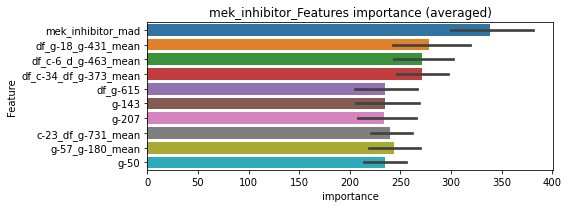

len(train_index) : 2781
len(valid_index) : 928
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235273	valid_1's binary_logloss: 0.0746385
[600]	training's binary_logloss: 0.00319284	valid_1's binary_logloss: 0.0389381
[900]	training's binary_logloss: 0.00121182	valid_1's binary_logloss: 0.0318614
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000901429	valid_1's binary_logloss: 0.0303434


len(train_index) : 2782
len(valid_index) : 927
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234492	valid_1's binary_logloss: 0.0905848
[600]	training's binary_logloss: 0.00320825	valid_1's binary_logloss: 0.0598938
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00169529	valid_1's binary_logloss: 0.0564688


len(train_index) : 2782
len(valid_index) : 927
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232794	valid_1's binary_logloss: 0.0686767
[600]	training's binary_logloss: 0.00319823	valid_1's binary_logloss: 0.035778
[900]	training's binary_logloss: 0.00121782	valid_1's binary_logloss: 0.0316676
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.00115467	valid_1's binary_logloss: 0.0315573


len(train_index) : 2782
len(valid_index) : 927
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225716	valid_1's binary_logloss: 0.0720135
[600]	training's binary_logloss: 0.00315321	valid_1's binary_logloss: 0.0351866
[900]	training's binary_logloss: 0.00122225	valid_1's binary_logloss: 0.0297223
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.00118887	valid_1's binary_logloss: 0.0295351


mek_inhibitor logloss: 0.036974382283730706


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246983	valid_1's binary_logloss: 0.105984
[600]	training's binary_logloss: 0.00379233	valid_1's binary_logloss: 0.082964
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00324074	valid_1's binary_logloss: 0.0827431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252131	valid_1's binary_logloss: 0.082394
[600]	training's binary_logloss: 0.00385899	valid_1's binary_logloss: 0.0515946
[900]	training's binary_logloss: 0.00141426	valid_1's binary_logloss: 0.0452571
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00140612	valid_1's binary_logloss: 0.0451726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250639	valid_1's binary_logloss: 0.0909659
[600]	training's binary_logloss: 0.00391772	valid_1's binary_logloss: 0.0599363
Early stopping, best iteration is

1 / 3 AUC score:0.994
y_Threshold: 0.0269781, Threshold: 0.1112649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.07789, conf_1:0.14464
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.1112649
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_2: 0.1612649
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_3: 0.2112649
Num_p_label: 14.0, Expected: 12.4, Adj_threshold_4: 0.2612649
threshold: 0.2612649, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020089	valid_1's binary_logloss: 0.0811381
[600]	training's binary_logloss: 0.00292772	valid_1's binary_logloss: 0.0559781
[900]	training's binary_logloss: 0.00113985	valid_1's binary_logloss: 0.0515822
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.00112969	valid_1's binary_logloss: 0.05143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198389	valid_1's binary_logloss: 0.0765491
[600]	training's binary_logloss: 0.00293919	valid_1's binary_logloss: 0.0475154
[900]	training's binary_logloss: 0.00113178	valid_1's binary_logloss: 0.0416974
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000834928	valid_1's binary_logloss: 0.0405309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206077	valid_1's binary_logloss: 0.087805
[600]	training's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.0809259, Threshold: 0.2612649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0128076 Vs.target_rate: 0.00311, Num_p_label: 51.0, conf_0:0.20901, conf_1:0.31352
Num_p_label: 51.0, Expected: 12.4, Adj_threshold_1: 0.2612649
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_2: 0.3112649
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_3: 0.3612649
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_4: 0.4112649
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_5: 0.4612649
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.5112649
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_7: 0.5612649
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_8: 0.6112649
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_9: 0.6612649
threshold: 0.6612649, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 620.0/3729, y_label_rate: 0.1662644
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175112	valid_1's binary_logloss: 0.0811577
[600]	training's binary_logloss: 0.00245734	valid_1's binary_logloss: 0.0520514
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00110859	valid_1's binary_logloss: 0.0470932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184266	valid_1's binary_logloss: 0.076785
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00391471	valid_1's binary_logloss: 0.0618634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184528	valid_1's binary_logloss: 0.0570786
[600]	training's binary_logloss: 0.00264508	valid_1's binary_logloss: 0.0290767
[900]	training's binary_logloss: 0.00106329	valid_1's binary_logloss: 0.0238741
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000816547	valid_1's binary_logloss: 0.02

3 / 3 AUC score:0.997
y_Threshold: 0.0903515, Threshold: 0.6612649, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 603.0/3695
p_label_rate: 0.0062783 Vs.target_rate: 0.00311, Num_p_label: 25.0, conf_0:0.50000, conf_1:0.72739
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_1: 0.6612649
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_2: 0.7112649
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_3: 0.7612649
threshold: 0.7612649, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 603.0/3695, y_label_rate: 0.1631935


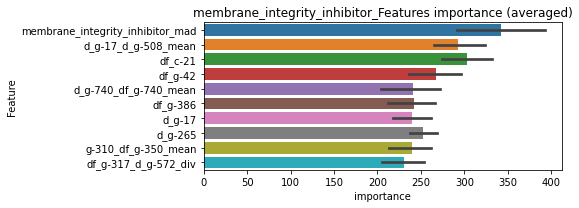

len(train_index) : 2771
len(valid_index) : 924
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170662	valid_1's binary_logloss: 0.0684107
[600]	training's binary_logloss: 0.00226005	valid_1's binary_logloss: 0.0479691
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00156974	valid_1's binary_logloss: 0.0471913


len(train_index) : 2771
len(valid_index) : 924
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161209	valid_1's binary_logloss: 0.0592067
[600]	training's binary_logloss: 0.0021728	valid_1's binary_logloss: 0.0347646
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00157401	valid_1's binary_logloss: 0.0337129


len(train_index) : 2771
len(valid_index) : 924
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163829	valid_1's binary_logloss: 0.0562827
[600]	training's binary_logloss: 0.00227918	valid_1's binary_logloss: 0.031348
[900]	training's binary_logloss: 0.000951766	valid_1's binary_logloss: 0.026979
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000874949	valid_1's binary_logloss: 0.0267496


len(train_index) : 2772
len(valid_index) : 923
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155763	valid_1's binary_logloss: 0.072824
[600]	training's binary_logloss: 0.00216373	valid_1's binary_logloss: 0.0507893
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00139804	valid_1's binary_logloss: 0.0492975


membrane_integrity_inhibitor logloss: 0.03923509689230546


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722383	valid_1's binary_logloss: 0.0227392
[600]	training's binary_logloss: 0.000923393	valid_1's binary_logloss: 0.0128414
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000491329	valid_1's binary_logloss: 0.0118181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771002	valid_1's binary_logloss: 0.0195778
[600]	training's binary_logloss: 0.000974951	valid_1's binary_logloss: 0.00656104
[900]	training's binary_logloss: 0.000486697	valid_1's binary_logloss: 0.00504056
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000464141	valid_1's binary_logloss: 0.0049047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727912	valid_1's binary_logloss: 0.0218008
[600]	training's binary_logloss: 0.000943008	valid_1's binary_logloss: 0.00782918
[900]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0053579, Threshold: 0.0506070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.03542, conf_1:0.06579
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0506070
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_2: 0.1006070
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_3: 0.1506070
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_4: 0.2006070
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_5: 0.2506070
threshold: 0.2506070, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061032	valid_1's binary_logloss: 0.0155223
[600]	training's binary_logloss: 0.000799209	valid_1's binary_logloss: 0.00607503
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000520209	valid_1's binary_logloss: 0.00537352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062498	valid_1's binary_logloss: 0.0151958
[600]	training's binary_logloss: 0.000811917	valid_1's binary_logloss: 0.00440146
[900]	training's binary_logloss: 0.00044064	valid_1's binary_logloss: 0.00321998
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000431166	valid_1's binary_logloss: 0.00320504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602747	valid_1's binary_logloss: 0.0159656
[600]	training's binary_logloss: 0.000807252	valid_1's binary_logloss: 0.00545603
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.0426156, Threshold: 0.2506070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0102963 Vs.target_rate: 0.00105, Num_p_label: 41.0, conf_0:0.20049, conf_1:0.30073
Num_p_label: 41.0, Expected: 4.2, Adj_threshold_1: 0.2506070
Num_p_label: 35.0, Expected: 4.2, Adj_threshold_2: 0.3006070
Num_p_label: 31.0, Expected: 4.2, Adj_threshold_3: 0.3506070
Num_p_label: 24.0, Expected: 4.2, Adj_threshold_4: 0.4006070
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_5: 0.4506070
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_6: 0.5006070
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_7: 0.5506070
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_8: 0.6006070
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_9: 0.6506070
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_10: 0.7006070
threshold: 0.7506070, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615655	valid_1's binary_logloss: 0.0167188
[600]	training's binary_logloss: 0.000811373	valid_1's binary_logloss: 0.00557564
[900]	training's binary_logloss: 0.000428307	valid_1's binary_logloss: 0.00426899
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000418948	valid_1's binary_logloss: 0.00422403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606041	valid_1's binary_logloss: 0.0145469
[600]	training's binary_logloss: 0.000813224	valid_1's binary_logloss: 0.00468325
[900]	training's binary_logloss: 0.000430247	valid_1's binary_logloss: 0.00349161
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000425587	valid_1's binary_logloss: 0.00346988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610762	valid_1's binary_logloss: 0.0145863
[600]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.1033167, Threshold: 0.7506070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0027624 Vs.target_rate: 0.00105, Num_p_label: 11.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.7506070
threshold: 0.7506070, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


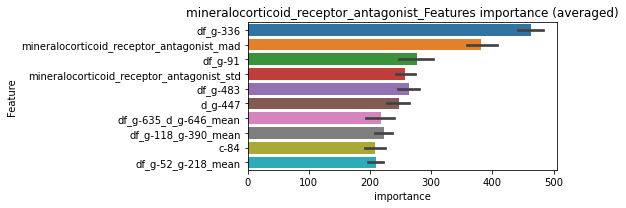

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613939	valid_1's binary_logloss: 0.0166412
[600]	training's binary_logloss: 0.000805333	valid_1's binary_logloss: 0.00600986
[900]	training's binary_logloss: 0.000427093	valid_1's binary_logloss: 0.00472251
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000428177	valid_1's binary_logloss: 0.00471018


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618186	valid_1's binary_logloss: 0.0164811
[600]	training's binary_logloss: 0.000815239	valid_1's binary_logloss: 0.00710221
[900]	training's binary_logloss: 0.000429427	valid_1's binary_logloss: 0.00616776
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000428387	valid_1's binary_logloss: 0.00616437


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612841	valid_1's binary_logloss: 0.0132704
[600]	training's binary_logloss: 0.00081452	valid_1's binary_logloss: 0.00361255
[900]	training's binary_logloss: 0.000434021	valid_1's binary_logloss: 0.00270796
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000435107	valid_1's binary_logloss: 0.00270044


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629388	valid_1's binary_logloss: 0.0165749
[600]	training's binary_logloss: 0.000804299	valid_1's binary_logloss: 0.00658423
[900]	training's binary_logloss: 0.000434486	valid_1's binary_logloss: 0.00568327
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000436561	valid_1's binary_logloss: 0.00568


mineralocorticoid_receptor_antagonist logloss: 0.004814176895344593


neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00353387	valid_1's binary_logloss: 0.00660567
[600]	training's binary_logloss: 0.000466772	valid_1's binary_logloss: 0.00174324
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000321801	valid_1's binary_logloss: 0.00141985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344861	valid_1's binary_logloss: 0.00992901
[600]	training's binary_logloss: 0.000462663	valid_1's binary_logloss: 0.00372573
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000315006	valid_1's binary_logloss: 0.00310861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356962	valid_1's binary_logloss: 0.00583351
[600]	training's binary_logloss: 0.000460573	valid_1's binary_logloss: 0.00133607
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000321233	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0019237, Threshold: 0.0084196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00589, conf_1:0.01095
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0084196
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0584196
threshold: 0.0584196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311732	valid_1's binary_logloss: 0.00439141
[600]	training's binary_logloss: 0.000417974	valid_1's binary_logloss: 0.000800991
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000290449	valid_1's binary_logloss: 0.000598663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307518	valid_1's binary_logloss: 0.00526826
[600]	training's binary_logloss: 0.000416725	valid_1's binary_logloss: 0.00100954
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.000774806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309139	valid_1's binary_logloss: 0.00394878
[600]	training's binary_logloss: 0.000417098	valid_1's binary_logloss: 0.000628547
[900]	training's binary_logloss: 0.000288641	valid_1's binary_logloss: 0.000451462
Early s

2 / 3 AUC score:1.000
y_Threshold: 0.1710357, Threshold: 0.0584196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00050, Num_p_label: 18.0, conf_0:0.04674, conf_1:0.07010
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_1: 0.0584196
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.1084196
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.1584196
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.2084196
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.2584196
threshold: 0.2584196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311732	valid_1's binary_logloss: 0.00439141
[600]	training's binary_logloss: 0.000417974	valid_1's binary_logloss: 0.000800991
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000290449	valid_1's binary_logloss: 0.000598663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307518	valid_1's binary_logloss: 0.00526826
[600]	training's binary_logloss: 0.000416725	valid_1's binary_logloss: 0.00100954
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.000774806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309139	valid_1's binary_logloss: 0.00394878
[600]	training's binary_logloss: 0.000417098	valid_1's binary_logloss: 0.000628547
[900]	training's binary_logloss: 0.000288641	valid_1's binary_logloss: 0.000451462
Early s

3 / 3 AUC score:1.000
y_Threshold: 0.1710357, Threshold: 0.2584196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.23258, conf_1:0.28426
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.2584196
threshold: 0.2584196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


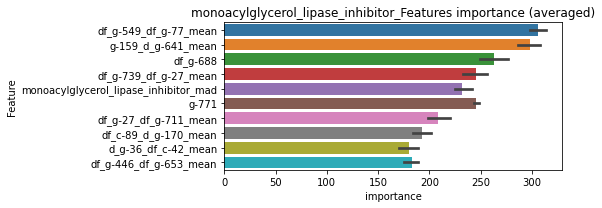

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316442	valid_1's binary_logloss: 0.00466448
[600]	training's binary_logloss: 0.00041983	valid_1's binary_logloss: 0.000867634
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000291134	valid_1's binary_logloss: 0.000658529


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311341	valid_1's binary_logloss: 0.00539901
[600]	training's binary_logloss: 0.000420096	valid_1's binary_logloss: 0.0010315
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00028912	valid_1's binary_logloss: 0.00078664


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318887	valid_1's binary_logloss: 0.00403714
[600]	training's binary_logloss: 0.000424936	valid_1's binary_logloss: 0.000647422
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000293889	valid_1's binary_logloss: 0.000469418


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306755	valid_1's binary_logloss: 0.00510035
[600]	training's binary_logloss: 0.000416091	valid_1's binary_logloss: 0.0010061
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000292182	valid_1's binary_logloss: 0.00078018


monoacylglycerol_lipase_inhibitor logloss: 0.0006736945864934096


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0317346	valid_1's binary_logloss: 0.125901
[600]	training's binary_logloss: 0.00520338	valid_1's binary_logloss: 0.0841082
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00198155	valid_1's binary_logloss: 0.0751713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327535	valid_1's binary_logloss: 0.134376
[600]	training's binary_logloss: 0.00530803	valid_1's binary_logloss: 0.106169
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00398306	valid_1's binary_logloss: 0.105066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363304	valid_1's binary_logloss: 0.124038
[600]	training's binary_logloss: 0.00603444	valid_1's binary_logloss: 0.0907033
[900]	training's binary_logloss: 0.001904	valid_1's binary_logloss: 0.0828748
Early stopping, best iteration is:
[9

1 / 3 AUC score:0.989
y_Threshold: 0.0366719, Threshold: 0.2784722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 631/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00357, Num_p_label: 40.0, conf_0:0.19493, conf_1:0.36201
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.2784722
Num_p_label: 30.0, Expected: 14.2, Adj_threshold_2: 0.3284722
Num_p_label: 23.0, Expected: 14.2, Adj_threshold_3: 0.3784722
Num_p_label: 22.0, Expected: 14.2, Adj_threshold_4: 0.4284722
Num_p_label: 15.0, Expected: 14.2, Adj_threshold_5: 0.4784722
threshold: 0.4784722, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 631.0/3754, y_label_rate: 0.1680874
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0232355	valid_1's binary_logloss: 0.103111
[600]	training's binary_logloss: 0.00360841	valid_1's binary_logloss: 0.070568
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00218193	valid_1's binary_logloss: 0.0657003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223033	valid_1's binary_logloss: 0.106904
[600]	training's binary_logloss: 0.00318872	valid_1's binary_logloss: 0.0879695
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00323222	valid_1's binary_logloss: 0.0877747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02288	valid_1's binary_logloss: 0.0849872
[600]	training's binary_logloss: 0.00330485	valid_1's binary_logloss: 0.0517436
[900]	training's binary_logloss: 0.00127113	valid_1's binary_logloss: 0.0462696
Early stopping, best iteration is:


2 / 3 AUC score:0.993
y_Threshold: 0.1408167, Threshold: 0.4784722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 601.0/3694
p_label_rate: 0.0266198 Vs.target_rate: 0.00357, Num_p_label: 106.0, conf_0:0.38278, conf_1:0.57417
Num_p_label: 106.0, Expected: 14.2, Adj_threshold_1: 0.4784722
Num_p_label: 102.0, Expected: 14.2, Adj_threshold_2: 0.5284722
Num_p_label: 92.0, Expected: 14.2, Adj_threshold_3: 0.5784722
Num_p_label: 86.0, Expected: 14.2, Adj_threshold_4: 0.6284722
Num_p_label: 81.0, Expected: 14.2, Adj_threshold_5: 0.6784722
Num_p_label: 75.0, Expected: 14.2, Adj_threshold_6: 0.7284722
Num_p_label: 67.0, Expected: 14.2, Adj_threshold_7: 0.7784722
threshold: 0.7784722, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 601.0/3694, y_label_rate: 0.1626963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166785	valid_1's binary_logloss: 0.0804042
[600]	training's binary_logloss: 0.00241029	valid_1's binary_logloss: 0.0610559
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00254947	valid_1's binary_logloss: 0.0610323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166683	valid_1's binary_logloss: 0.0801279
[600]	training's binary_logloss: 0.00239285	valid_1's binary_logloss: 0.0634398
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.0023202	valid_1's binary_logloss: 0.0632639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183417	valid_1's binary_logloss: 0.0612184
[600]	training's binary_logloss: 0.00246831	valid_1's binary_logloss: 0.0392133
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00159123	valid_1's binary_logloss: 0.0371

3 / 3 AUC score:0.992
y_Threshold: 0.0974965, Threshold: 0.7784722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 582.0/3656
p_label_rate: 0.0283777 Vs.target_rate: 0.00357, Num_p_label: 113.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 113.0, Expected: 14.2, Adj_threshold_1: 0.7784722
threshold: 0.7784722, positive_p_label: 113.0/3982, p_label_rate: 0.0283777
positive_y_label: 582.0/3656, y_label_rate: 0.1591904


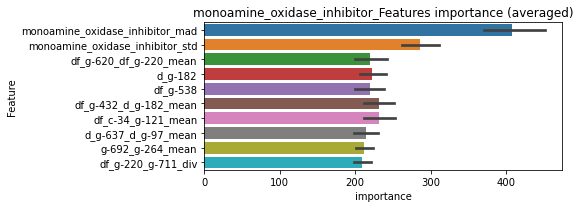

len(train_index) : 2742
len(valid_index) : 914
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142095	valid_1's binary_logloss: 0.0826699
[600]	training's binary_logloss: 0.00198482	valid_1's binary_logloss: 0.0695856
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00153073	valid_1's binary_logloss: 0.068733


len(train_index) : 2742
len(valid_index) : 914
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146336	valid_1's binary_logloss: 0.0614982
[600]	training's binary_logloss: 0.00208747	valid_1's binary_logloss: 0.0413313
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00122338	valid_1's binary_logloss: 0.0393842


len(train_index) : 2742
len(valid_index) : 914
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148693	valid_1's binary_logloss: 0.060596
[600]	training's binary_logloss: 0.00208178	valid_1's binary_logloss: 0.0365437
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00135053	valid_1's binary_logloss: 0.0338864


len(train_index) : 2742
len(valid_index) : 914
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148899	valid_1's binary_logloss: 0.0696119
[600]	training's binary_logloss: 0.00209751	valid_1's binary_logloss: 0.0480303
[900]	training's binary_logloss: 0.000898035	valid_1's binary_logloss: 0.0439939
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000878135	valid_1's binary_logloss: 0.0438545


monoamine_oxidase_inhibitor logloss: 0.04646454919996736


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557263	valid_1's binary_logloss: 0.0132313
[600]	training's binary_logloss: 0.000699413	valid_1's binary_logloss: 0.00497934
[900]	training's binary_logloss: 0.000384074	valid_1's binary_logloss: 0.00411148
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.00037648	valid_1's binary_logloss: 0.00407743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567321	valid_1's binary_logloss: 0.0142862
[600]	training's binary_logloss: 0.000714761	valid_1's binary_logloss: 0.00438226
[900]	training's binary_logloss: 0.00038948	valid_1's binary_logloss: 0.00317633
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000379891	valid_1's binary_logloss: 0.00314588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577443	valid_1's binary_logloss: 0.0113605
[600]	training's 

1 / 3 AUC score:1.000
y_Threshold: 0.0037512, Threshold: 0.0333252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02333, conf_1:0.04332
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0333252
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0833252
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1333252
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1833252
threshold: 0.1833252, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496538	valid_1's binary_logloss: 0.00720191
[600]	training's binary_logloss: 0.000638412	valid_1's binary_logloss: 0.00129542
[900]	training's binary_logloss: 0.000363925	valid_1's binary_logloss: 0.000843462
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.00036394	valid_1's binary_logloss: 0.000843455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483621	valid_1's binary_logloss: 0.0111764
[600]	training's binary_logloss: 0.000626288	valid_1's binary_logloss: 0.00303632
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000364417	valid_1's binary_logloss: 0.00227194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484845	valid_1's binary_logloss: 0.00839213
[600]	training's binary_logloss: 0.000625651	valid_1's binary_logloss: 0.00171768
[900]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0991247, Threshold: 0.1833252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.14666, conf_1:0.21999
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1833252
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.2333252
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.2833252
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.3333252
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.3833252
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.4333252
threshold: 0.4333252, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496538	valid_1's binary_logloss: 0.00720191
[600]	training's binary_logloss: 0.000638412	valid_1's binary_logloss: 0.00129542
[900]	training's binary_logloss: 0.000363925	valid_1's binary_logloss: 0.000843462
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.00036394	valid_1's binary_logloss: 0.000843455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483621	valid_1's binary_logloss: 0.0111764
[600]	training's binary_logloss: 0.000626288	valid_1's binary_logloss: 0.00303632
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000364417	valid_1's binary_logloss: 0.00227194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484845	valid_1's binary_logloss: 0.00839213
[600]	training's binary_logloss: 0.000625651	valid_1's binary_logloss: 0.00171768
[900]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0991247, Threshold: 0.4333252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.38999, conf_1:0.47666
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4333252
threshold: 0.4333252, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


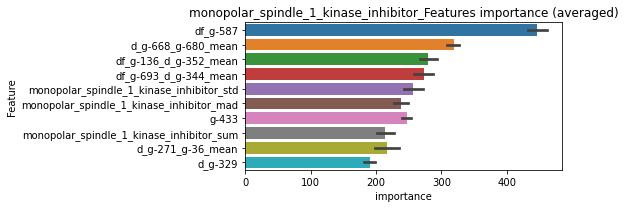

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502823	valid_1's binary_logloss: 0.00768125
[600]	training's binary_logloss: 0.000639526	valid_1's binary_logloss: 0.0013764
[900]	training's binary_logloss: 0.000363757	valid_1's binary_logloss: 0.00088111
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000357835	valid_1's binary_logloss: 0.000874694


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478098	valid_1's binary_logloss: 0.0125423
[600]	training's binary_logloss: 0.000622845	valid_1's binary_logloss: 0.00402676
[900]	training's binary_logloss: 0.00035016	valid_1's binary_logloss: 0.00313726
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.00035475	valid_1's binary_logloss: 0.0031085


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472088	valid_1's binary_logloss: 0.00832935
[600]	training's binary_logloss: 0.000623194	valid_1's binary_logloss: 0.0017523
[900]	training's binary_logloss: 0.000358258	valid_1's binary_logloss: 0.00122192
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000358258	valid_1's binary_logloss: 0.00122192


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488644	valid_1's binary_logloss: 0.00751084
[600]	training's binary_logloss: 0.00064338	valid_1's binary_logloss: 0.00141726
[900]	training's binary_logloss: 0.00036289	valid_1's binary_logloss: 0.000917284
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.00035751	valid_1's binary_logloss: 0.000908145


monopolar_spindle_1_kinase_inhibitor logloss: 0.0015283147010519524


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497799	valid_1's binary_logloss: 0.165263
[600]	training's binary_logloss: 0.00979382	valid_1's binary_logloss: 0.133306
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00804349	valid_1's binary_logloss: 0.131684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0477535	valid_1's binary_logloss: 0.170174
[600]	training's binary_logloss: 0.00939709	valid_1's binary_logloss: 0.137608
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00475885	valid_1's binary_logloss: 0.134155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0488327	valid_1's binary_logloss: 0.157846
[600]	training's binary_logloss: 0.0100889	valid_1's binary_logloss: 0.11864
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.0042883	valid_1's binary_logloss: 0.109525
Trainin

1 / 3 AUC score:0.977
y_Threshold: 0.0612827, Threshold: 0.3979722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 228 → Positive_corect_labels: 605/3694
p_label_rate: 0.0100452 Vs.target_rate: 0.00546, Num_p_label: 40.0, conf_0:0.27858, conf_1:0.51736
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3979722
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_2: 0.4479722
Num_p_label: 31.0, Expected: 21.7, Adj_threshold_3: 0.4979722
threshold: 0.4979722, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 605.0/3694, y_label_rate: 0.1637791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.033115	valid_1's binary_logloss: 0.13371
[600]	training's binary_logloss: 0.00526853	valid_1's binary_logloss: 0.102194
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00273598	valid_1's binary_logloss: 0.100028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333531	valid_1's binary_logloss: 0.123719
[600]	training's binary_logloss: 0.0053402	valid_1's binary_logloss: 0.0908393
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00317279	valid_1's binary_logloss: 0.0875068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331547	valid_1's binary_logloss: 0.114334
[600]	training's binary_logloss: 0.00564266	valid_1's binary_logloss: 0.0759317
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00213319	valid_1's binary_logloss: 0.0690115
Tra

2 / 3 AUC score:0.994
y_Threshold: 0.0973310, Threshold: 0.4979722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 562.0/3608
p_label_rate: 0.0205927 Vs.target_rate: 0.00546, Num_p_label: 82.0, conf_0:0.39838, conf_1:0.59757
Num_p_label: 82.0, Expected: 21.7, Adj_threshold_1: 0.4979722
Num_p_label: 71.0, Expected: 21.7, Adj_threshold_2: 0.5479722
Num_p_label: 66.0, Expected: 21.7, Adj_threshold_3: 0.5979722
Num_p_label: 57.0, Expected: 21.7, Adj_threshold_4: 0.6479722
Num_p_label: 51.0, Expected: 21.7, Adj_threshold_5: 0.6979722
Num_p_label: 43.0, Expected: 21.7, Adj_threshold_6: 0.7479722
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_7: 0.7979722
threshold: 0.7979722, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 562.0/3608, y_label_rate: 0.1557650
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.026682	valid_1's binary_logloss: 0.106939
[600]	training's binary_logloss: 0.00399936	valid_1's binary_logloss: 0.0741923
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00275684	valid_1's binary_logloss: 0.0711953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257128	valid_1's binary_logloss: 0.125775
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00772996	valid_1's binary_logloss: 0.114572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027723	valid_1's binary_logloss: 0.0889452
[600]	training's binary_logloss: 0.00421507	valid_1's binary_logloss: 0.0587334
[900]	training's binary_logloss: 0.00149719	valid_1's binary_logloss: 0.0524012
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00155637	valid_1's binary_logloss: 0.052374
T

3 / 3 AUC score:0.992
y_Threshold: 0.0870914, Threshold: 0.7979722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 532.0/3548
p_label_rate: 0.0115520 Vs.target_rate: 0.00546, Num_p_label: 46.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 46.0, Expected: 21.7, Adj_threshold_1: 0.7979722
threshold: 0.7979722, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 532.0/3548, y_label_rate: 0.1499436


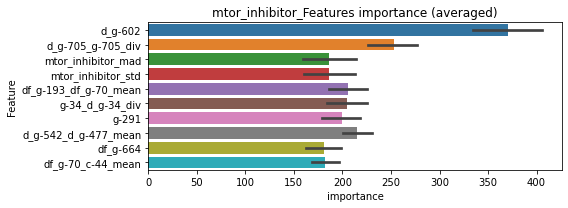

len(train_index) : 2661
len(valid_index) : 887
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021865	valid_1's binary_logloss: 0.105938
[600]	training's binary_logloss: 0.0032211	valid_1's binary_logloss: 0.0791062
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00346908	valid_1's binary_logloss: 0.0785566


len(train_index) : 2661
len(valid_index) : 887
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220407	valid_1's binary_logloss: 0.10756
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00470965	valid_1's binary_logloss: 0.0903618


len(train_index) : 2661
len(valid_index) : 887
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243561	valid_1's binary_logloss: 0.0664188
[600]	training's binary_logloss: 0.00343509	valid_1's binary_logloss: 0.0370141
[900]	training's binary_logloss: 0.00130255	valid_1's binary_logloss: 0.0316246
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.00127515	valid_1's binary_logloss: 0.0314497


len(train_index) : 2661
len(valid_index) : 887
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219427	valid_1's binary_logloss: 0.10202
[600]	training's binary_logloss: 0.00314299	valid_1's binary_logloss: 0.0792838
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00217924	valid_1's binary_logloss: 0.0784432


mtor_inhibitor logloss: 0.06970282860440037


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152673	valid_1's binary_logloss: 0.0481712
[600]	training's binary_logloss: 0.00206103	valid_1's binary_logloss: 0.0214456
[900]	training's binary_logloss: 0.000864057	valid_1's binary_logloss: 0.0174593
Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000723436	valid_1's binary_logloss: 0.0168347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149416	valid_1's binary_logloss: 0.0582982
[600]	training's binary_logloss: 0.00194235	valid_1's binary_logloss: 0.0331198
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000951829	valid_1's binary_logloss: 0.0298838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015648	valid_1's binary_logloss: 0.0447546
[600]	training's binary_logloss: 0.00212258	valid_1's binary_logloss: 0.0198226
[900]	training's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0128807, Threshold: 0.1136378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.07955, conf_1:0.14773
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1136378
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_2: 0.1636378
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_3: 0.2136378
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2636378
threshold: 0.2636378, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125374	valid_1's binary_logloss: 0.0478486
[600]	training's binary_logloss: 0.00173757	valid_1's binary_logloss: 0.0231039
[900]	training's binary_logloss: 0.000768322	valid_1's binary_logloss: 0.0192567
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000779773	valid_1's binary_logloss: 0.019148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126825	valid_1's binary_logloss: 0.0457304
[600]	training's binary_logloss: 0.00172159	valid_1's binary_logloss: 0.0225665
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000954755	valid_1's binary_logloss: 0.0195655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129019	valid_1's binary_logloss: 0.0442725
[600]	training's binary_logloss: 0.00178251	valid_1's binary_logloss: 0.0266883
Early stopping, best iterati

2 / 3 AUC score:1.000
y_Threshold: 0.1040082, Threshold: 0.2636378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3801
p_label_rate: 0.0140633 Vs.target_rate: 0.00202, Num_p_label: 56.0, conf_0:0.21091, conf_1:0.31637
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_1: 0.2636378
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_2: 0.3136378
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_3: 0.3636378
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_4: 0.4136378
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_5: 0.4636378
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_6: 0.5136378
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_7: 0.5636378
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_8: 0.6136378
threshold: 0.6136378, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3801, y_label_rate: 0.1712707
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122311	valid_1's binary_logloss: 0.0459841
[600]	training's binary_logloss: 0.00168319	valid_1's binary_logloss: 0.0268368
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00138421	valid_1's binary_logloss: 0.0263446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122697	valid_1's binary_logloss: 0.0436322
[600]	training's binary_logloss: 0.00166892	valid_1's binary_logloss: 0.0194484
[900]	training's binary_logloss: 0.00075623	valid_1's binary_logloss: 0.0154509
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000652447	valid_1's binary_logloss: 0.014855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124373	valid_1's binary_logloss: 0.0531908
[600]	training's binary_logloss: 0.00166758	valid_1's binary_logloss: 0.0356221
Early stopping, best iteratio

3 / 3 AUC score:0.999
y_Threshold: 0.0996932, Threshold: 0.6136378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 643.0/3785
p_label_rate: 0.0057760 Vs.target_rate: 0.00202, Num_p_label: 23.0, conf_0:0.50000, conf_1:0.67500
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_1: 0.6136378
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.6636378
threshold: 0.6636378, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 643.0/3785, y_label_rate: 0.1698811


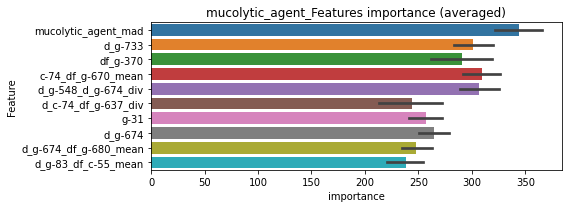

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011305	valid_1's binary_logloss: 0.0521124
[600]	training's binary_logloss: 0.00156241	valid_1's binary_logloss: 0.0341073
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00120012	valid_1's binary_logloss: 0.0334173


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116084	valid_1's binary_logloss: 0.0602514
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00256181	valid_1's binary_logloss: 0.049274


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118579	valid_1's binary_logloss: 0.0361669
[600]	training's binary_logloss: 0.00162708	valid_1's binary_logloss: 0.0159602
[900]	training's binary_logloss: 0.000732074	valid_1's binary_logloss: 0.0129021
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000623788	valid_1's binary_logloss: 0.0124313


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012337	valid_1's binary_logloss: 0.0292996
[600]	training's binary_logloss: 0.00166219	valid_1's binary_logloss: 0.0104281
[900]	training's binary_logloss: 0.000743361	valid_1's binary_logloss: 0.00781661
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000683846	valid_1's binary_logloss: 0.00759118


mucolytic_agent logloss: 0.0256815092397096


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138723	valid_1's binary_logloss: 0.042818
[600]	training's binary_logloss: 0.00176245	valid_1's binary_logloss: 0.01849
[900]	training's binary_logloss: 0.000762041	valid_1's binary_logloss: 0.014758
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000691331	valid_1's binary_logloss: 0.0145132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134223	valid_1's binary_logloss: 0.038682
[600]	training's binary_logloss: 0.00174958	valid_1's binary_logloss: 0.0156197
[900]	training's binary_logloss: 0.000764178	valid_1's binary_logloss: 0.0122172
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000656994	valid_1's binary_logloss: 0.0117832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014055	valid_1's binary_logloss: 0.0334463
[600]	training's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0117887, Threshold: 0.0345589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.02419, conf_1:0.04493
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0345589
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.0845589
threshold: 0.0845589, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113475	valid_1's binary_logloss: 0.0441716
[600]	training's binary_logloss: 0.00150662	valid_1's binary_logloss: 0.0233942
[900]	training's binary_logloss: 0.000683841	valid_1's binary_logloss: 0.0205216
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000687999	valid_1's binary_logloss: 0.020507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012085	valid_1's binary_logloss: 0.0253689
[600]	training's binary_logloss: 0.0015991	valid_1's binary_logloss: 0.00855094
[900]	training's binary_logloss: 0.00071275	valid_1's binary_logloss: 0.00618695
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000612719	valid_1's binary_logloss: 0.00589513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117831	valid_1's binary_logloss: 0.0281228
[600]	training's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0797455, Threshold: 0.0845589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0115520 Vs.target_rate: 0.00155, Num_p_label: 46.0, conf_0:0.06765, conf_1:0.10147
Num_p_label: 46.0, Expected: 6.2, Adj_threshold_1: 0.0845589
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_2: 0.1345589
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_3: 0.1845589
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.2345589
threshold: 0.2345589, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112038	valid_1's binary_logloss: 0.027765
[600]	training's binary_logloss: 0.0014992	valid_1's binary_logloss: 0.0102327
[900]	training's binary_logloss: 0.00068388	valid_1's binary_logloss: 0.00773174
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.00063083	valid_1's binary_logloss: 0.00759557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112977	valid_1's binary_logloss: 0.028656
[600]	training's binary_logloss: 0.00151004	valid_1's binary_logloss: 0.00833051
[900]	training's binary_logloss: 0.000688878	valid_1's binary_logloss: 0.00551246
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.00070008	valid_1's binary_logloss: 0.00547463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109655	valid_1's binary_logloss: 0.039256
[600]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0656483, Threshold: 0.2345589, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0040181 Vs.target_rate: 0.00155, Num_p_label: 16.0, conf_0:0.21110, conf_1:0.25801
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_1: 0.2345589
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.2845589
threshold: 0.2845589, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


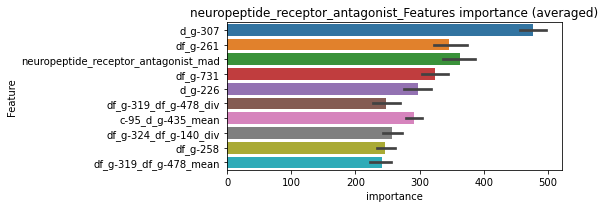

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110533	valid_1's binary_logloss: 0.0281003
[600]	training's binary_logloss: 0.00148167	valid_1's binary_logloss: 0.00897931
[900]	training's binary_logloss: 0.00067327	valid_1's binary_logloss: 0.0062031
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000581695	valid_1's binary_logloss: 0.00596212


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011384	valid_1's binary_logloss: 0.0365433
[600]	training's binary_logloss: 0.00150298	valid_1's binary_logloss: 0.0160671
[900]	training's binary_logloss: 0.00067732	valid_1's binary_logloss: 0.0135079
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000600719	valid_1's binary_logloss: 0.013194


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114649	valid_1's binary_logloss: 0.0299709
[600]	training's binary_logloss: 0.00151728	valid_1's binary_logloss: 0.0106156
[900]	training's binary_logloss: 0.000685618	valid_1's binary_logloss: 0.00814217
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000575023	valid_1's binary_logloss: 0.00781671


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108716	valid_1's binary_logloss: 0.0326528
[600]	training's binary_logloss: 0.00143794	valid_1's binary_logloss: 0.015024
[900]	training's binary_logloss: 0.000659792	valid_1's binary_logloss: 0.0132587
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000663845	valid_1's binary_logloss: 0.0132143


neuropeptide_receptor_antagonist logloss: 0.010053381505809457


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[25]	training's binary_logloss: 0.460297	valid_1's binary_logloss: 0.507471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[38]	training's binary_logloss: 0.438765	valid_1's binary_logloss: 0.507578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[32]	training's binary_logloss: 0.451881	valid_1's binary_logloss: 0.509859
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.518
y_Threshold: 0.2147917, Threshold: 0.4315127, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1428 → Positive_corect_labels: 227/2577
p_label_rate: 0.0100452 Vs.target_rate: 0.03494, Num_p_label: 40.0, conf_0:0.30206, conf_1:0.56097
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4315127
Num_p_label: 99.0, Expected: 139.1, Adj_threshold_2: 0.4015127
Num_p_label: 115.0, Expected: 139.1, Adj_threshold_3: 0.3715127
Num_p_label: 139.0, Expected: 139.1, Adj_threshold_4: 0.3415127
Num_p_label: 143.0, Expected: 139.1, Adj_threshold_5: 0.3115127
Num_p_label: 146.0, Expected: 139.1, Adj_threshold_6: 0.2815127
Num_p_label: 171.0, Expected: 139.1, Adj_threshold_7: 0.2515127
Num_p_label: 582.0, Expected: 139.1, Adj_threshold_8: 0.2215127
threshold: 0.2215127, positive_p_label: 582.0/3982, p_label_rate: 0.1461577
positive_y_label: 227.0/2577, y_label_rate: 0.0880869
================= Pseudo labeling 2 / 3 =================


Early stopping, best iteration is:
[14]	training's binary_logloss: 0.483343	valid_1's binary_logloss: 0.508841
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[109]	training's binary_logloss: 0.096552	valid_1's binary_logloss: 0.245554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[135]	training's binary_logloss: 0.0801332	valid_1's binary_logloss: 0.244106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[142]	training's binary_logloss: 0.0731166	valid_1's binary_logloss: 0.231927
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.792
y_Threshold: 0.1219936, Threshold: 0.2215127, pos_neg_ratio: 0.7377876
Remove_noisy_data: 272 → Positive_corect_labels: 91.0/2305
p_label_rate: 0.0733300 Vs.target_rate: 0.03494, Num_p_label: 292.0, conf_0:0.17721, conf_1:0.26582
Num_p_label: 292.0, Expected: 139.1, Adj_threshold_1: 0.2215127
Num_p_label: 246.0, Expected: 139.1, Adj_threshold_2: 0.2715127
Num_p_label: 212.0, Expected: 139.1, Adj_threshold_3: 0.3215127
Num_p_label: 196.0, Expected: 139.1, Adj_threshold_4: 0.3715127
Num_p_label: 177.0, Expected: 139.1, Adj_threshold_5: 0.4215127
Num_p_label: 167.0, Expected: 139.1, Adj_threshold_6: 0.4715127
Num_p_label: 161.0, Expected: 139.1, Adj_threshold_7: 0.5215127
Num_p_label: 156.0, Expected: 139.1, Adj_threshold_8: 0.5715127
Num_p_label: 151.0, Expected: 139.1, Adj_threshold_9: 0.6215127
Num_p_label: 146.0, Expected: 139.1, Adj_threshold_10: 0.6715127
threshold: 0.7215127, positive_p_label: 140.0/3982, p_label_rate: 0.0351582


Early stopping, best iteration is:
[102]	training's binary_logloss: 0.102721	valid_1's binary_logloss: 0.245899


positive_y_label: 91.0/2305, y_label_rate: 0.0394794
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[125]	training's binary_logloss: 0.0169239	valid_1's binary_logloss: 0.0752116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.0063165	valid_1's binary_logloss: 0.0457145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[159]	training's binary_logloss: 0.0117613	valid_1's binary_logloss: 0.0615693
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.979
y_Threshold: 0.0866782, Threshold: 0.7215127, pos_neg_ratio: 0.7377876
Remove_noisy_data: 42 → Positive_corect_labels: 70.0/2263
p_label_rate: 0.0544952 Vs.target_rate: 0.03494, Num_p_label: 217.0, conf_0:0.50000, conf_1:0.79366
Num_p_label: 217.0, Expected: 139.1, Adj_threshold_1: 0.7215127
Num_p_label: 209.0, Expected: 139.1, Adj_threshold_2: 0.7715127
threshold: 0.7715127, positive_p_label: 209.0/3982, p_label_rate: 0.0524862
positive_y_label: 70.0/2263, y_label_rate: 0.0309324


Early stopping, best iteration is:
[122]	training's binary_logloss: 0.0183118	valid_1's binary_logloss: 0.0658845


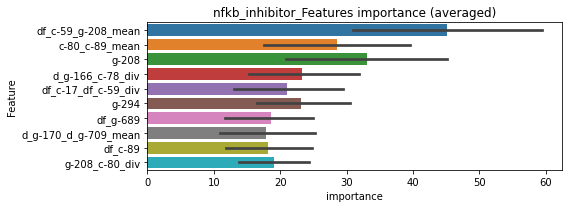

len(train_index) : 1697
len(valid_index) : 566
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1697
len(valid_index) : 566
================================= fold 2/4 nfkb_inhibitor=================================


[300]	training's binary_logloss: 0.00167044	valid_1's binary_logloss: 0.0153831
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00146055	valid_1's binary_logloss: 0.0152585
Training until validation scores don't improve for 30 rounds


len(train_index) : 1697
len(valid_index) : 566
================================= fold 3/4 nfkb_inhibitor=================================


[300]	training's binary_logloss: 0.00152529	valid_1's binary_logloss: 0.0238472
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00159723	valid_1's binary_logloss: 0.0236856
Training until validation scores don't improve for 30 rounds


len(train_index) : 1698
len(valid_index) : 565
================================= fold 4/4 nfkb_inhibitor=================================


[300]	training's binary_logloss: 0.0015257	valid_1's binary_logloss: 0.0325879
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00161549	valid_1's binary_logloss: 0.0323121
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.027470575143957916


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00496995	valid_1's binary_logloss: 0.0386458
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429183	valid_1's binary_logloss: 0.00994266
[600]	training's binary_logloss: 0.000559467	valid_1's binary_logloss: 0.00378261
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000362458	valid_1's binary_logloss: 0.00324936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437303	valid_1's binary_logloss: 0.00759419
[600]	training's binary_logloss: 0.000567708	valid_1's binary_logloss: 0.00205284
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.00034426	valid_1's binary_logloss: 0.00154118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428374	valid_1's binary_logloss: 0.00735831
[600]	training's binary_logloss: 0.000563448	valid_1's binary_logloss: 0.00155481
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000352942	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022595, Threshold: 0.0103178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00722, conf_1:0.01341
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0103178
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.0603178
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.1103178
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1603178
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.2103178
threshold: 0.2103178, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362135	valid_1's binary_logloss: 0.00838561
[600]	training's binary_logloss: 0.000483375	valid_1's binary_logloss: 0.00274871
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000338858	valid_1's binary_logloss: 0.00235031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367214	valid_1's binary_logloss: 0.00606864
[600]	training's binary_logloss: 0.000490267	valid_1's binary_logloss: 0.0010761
[900]	training's binary_logloss: 0.000310641	valid_1's binary_logloss: 0.000742702
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000310584	valid_1's binary_logloss: 0.000742542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360611	valid_1's binary_logloss: 0.006645
[600]	training's binary_logloss: 0.00048464	valid_1's binary_logloss: 0.00142554
Early stopping

2 / 3 AUC score:1.000
y_Threshold: 0.0931070, Threshold: 0.2103178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050, Num_p_label: 14.0, conf_0:0.16825, conf_1:0.25238
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.2103178
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.2603178
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.3103178
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.3603178
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4103178
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4603178
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.5103178
threshold: 0.5103178, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362135	valid_1's binary_logloss: 0.00838561
[600]	training's binary_logloss: 0.000483375	valid_1's binary_logloss: 0.00274871
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000338858	valid_1's binary_logloss: 0.00235031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367214	valid_1's binary_logloss: 0.00606864
[600]	training's binary_logloss: 0.000490267	valid_1's binary_logloss: 0.0010761
[900]	training's binary_logloss: 0.000310641	valid_1's binary_logloss: 0.000742702
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000310584	valid_1's binary_logloss: 0.000742542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360611	valid_1's binary_logloss: 0.006645
[600]	training's binary_logloss: 0.00048464	valid_1's binary_logloss: 0.00142554
Early stopping

3 / 3 AUC score:1.000
y_Threshold: 0.0931070, Threshold: 0.5103178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050, Num_p_label: 5.0, conf_0:0.45929, conf_1:0.56135
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.5103178
threshold: 0.5103178, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


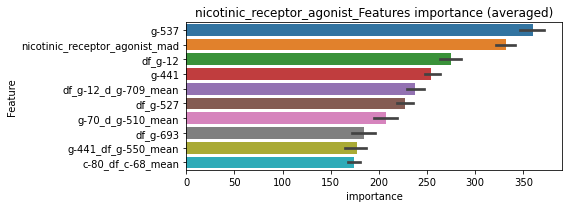

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363874	valid_1's binary_logloss: 0.00835596
[600]	training's binary_logloss: 0.000486158	valid_1's binary_logloss: 0.00268843
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000318647	valid_1's binary_logloss: 0.00222558


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368227	valid_1's binary_logloss: 0.00595642
[600]	training's binary_logloss: 0.000489257	valid_1's binary_logloss: 0.00109381
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000329079	valid_1's binary_logloss: 0.000787376


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368671	valid_1's binary_logloss: 0.00660199
[600]	training's binary_logloss: 0.000480092	valid_1's binary_logloss: 0.00138626
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000314482	valid_1's binary_logloss: 0.00106747


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362763	valid_1's binary_logloss: 0.00765397
[600]	training's binary_logloss: 0.000483086	valid_1's binary_logloss: 0.00266723
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000328948	valid_1's binary_logloss: 0.00224264


nicotinic_receptor_agonist logloss: 0.001580937278188971


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105316	valid_1's binary_logloss: 0.0286593
[600]	training's binary_logloss: 0.00122715	valid_1's binary_logloss: 0.0116768
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000775354	valid_1's binary_logloss: 0.0105034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108785	valid_1's binary_logloss: 0.0242413
[600]	training's binary_logloss: 0.00128316	valid_1's binary_logloss: 0.006442
[900]	training's binary_logloss: 0.000596099	valid_1's binary_logloss: 0.00433575
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.000543021	valid_1's binary_logloss: 0.00416043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110735	valid_1's binary_logloss: 0.0233788
[600]	training's binary_logloss: 0.00131435	valid_1's binary_logloss: 0.00691697
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0075805, Threshold: 0.0859735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.06018, conf_1:0.11177
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0859735
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_2: 0.1359735
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_3: 0.1859735
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.2359735
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_5: 0.2859735
threshold: 0.2859735, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091355	valid_1's binary_logloss: 0.0222113
[600]	training's binary_logloss: 0.00111931	valid_1's binary_logloss: 0.00921257
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000854549	valid_1's binary_logloss: 0.00874097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945322	valid_1's binary_logloss: 0.0185946
[600]	training's binary_logloss: 0.00115413	valid_1's binary_logloss: 0.00444776
[900]	training's binary_logloss: 0.000553103	valid_1's binary_logloss: 0.00284678
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000511752	valid_1's binary_logloss: 0.00273316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00943925	valid_1's binary_logloss: 0.0189725
[600]	training's binary_logloss: 0.00113359	valid_1's binary_logloss: 0.00470783
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0805909, Threshold: 0.2859735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0120542 Vs.target_rate: 0.00109, Num_p_label: 48.0, conf_0:0.22878, conf_1:0.34317
Num_p_label: 48.0, Expected: 4.3, Adj_threshold_1: 0.2859735
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_2: 0.3359735
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_3: 0.3859735
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_4: 0.4359735
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_5: 0.4859735
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_6: 0.5359735
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_7: 0.5859735
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_8: 0.6359735
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.6859735
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_10: 0.7359735
threshold: 0.7359735, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091355	valid_1's binary_logloss: 0.0222113
[600]	training's binary_logloss: 0.00111931	valid_1's binary_logloss: 0.00921257
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000854549	valid_1's binary_logloss: 0.00874097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945322	valid_1's binary_logloss: 0.0185946
[600]	training's binary_logloss: 0.00115413	valid_1's binary_logloss: 0.00444776
[900]	training's binary_logloss: 0.000553103	valid_1's binary_logloss: 0.00284678
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000511752	valid_1's binary_logloss: 0.00273316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00943925	valid_1's binary_logloss: 0.0189725
[600]	training's binary_logloss: 0.00113359	valid_1's binary_logloss: 0.00470783
[900]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0805909, Threshold: 0.7359735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00109, Num_p_label: 6.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7359735, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


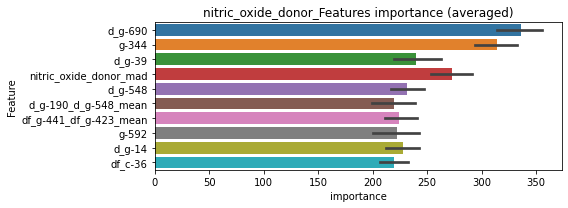

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00910683	valid_1's binary_logloss: 0.0219332
[600]	training's binary_logloss: 0.00112178	valid_1's binary_logloss: 0.00975889
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000609192	valid_1's binary_logloss: 0.00846984


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00964098	valid_1's binary_logloss: 0.0193127
[600]	training's binary_logloss: 0.00115471	valid_1's binary_logloss: 0.00456588
[900]	training's binary_logloss: 0.000552179	valid_1's binary_logloss: 0.00290339
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000527604	valid_1's binary_logloss: 0.00284344


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0090676	valid_1's binary_logloss: 0.019224
[600]	training's binary_logloss: 0.00111822	valid_1's binary_logloss: 0.00476583
[900]	training's binary_logloss: 0.00054552	valid_1's binary_logloss: 0.00322666
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00052101	valid_1's binary_logloss: 0.00317503


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881513	valid_1's binary_logloss: 0.0247684
[600]	training's binary_logloss: 0.0010716	valid_1's binary_logloss: 0.00930563
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000558003	valid_1's binary_logloss: 0.00766023


nitric_oxide_donor logloss: 0.0055374917617270645


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886484	valid_1's binary_logloss: 0.0272404
[600]	training's binary_logloss: 0.00118037	valid_1's binary_logloss: 0.0138565
[900]	training's binary_logloss: 0.000551524	valid_1's binary_logloss: 0.0120931
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000559511	valid_1's binary_logloss: 0.012076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856799	valid_1's binary_logloss: 0.0298464
[600]	training's binary_logloss: 0.00115079	valid_1's binary_logloss: 0.0142816
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000763392	valid_1's binary_logloss: 0.0129695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882952	valid_1's binary_logloss: 0.0222691
[600]	training's binary_logloss: 0.00117421	valid_1's binary_logloss: 0.00763917
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0079639, Threshold: 0.0460439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.03223, conf_1:0.05986
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0460439
Num_p_label: 20.0, Expected: 4.8, Adj_threshold_2: 0.0960439
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_3: 0.1460439
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_4: 0.1960439
threshold: 0.1960439, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00726686	valid_1's binary_logloss: 0.0191909
[600]	training's binary_logloss: 0.000983768	valid_1's binary_logloss: 0.00653195
[900]	training's binary_logloss: 0.000470675	valid_1's binary_logloss: 0.00455562
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000443627	valid_1's binary_logloss: 0.00443272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00724786	valid_1's binary_logloss: 0.0214768
[600]	training's binary_logloss: 0.00099248	valid_1's binary_logloss: 0.0114688
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000663788	valid_1's binary_logloss: 0.0105218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723301	valid_1's binary_logloss: 0.0166991
[600]	training's binary_logloss: 0.000998637	valid_1's binary_logloss: 0.00506342
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0490093, Threshold: 0.1960439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0075339 Vs.target_rate: 0.00122, Num_p_label: 30.0, conf_0:0.15684, conf_1:0.23525
Num_p_label: 30.0, Expected: 4.8, Adj_threshold_1: 0.1960439
Num_p_label: 23.0, Expected: 4.8, Adj_threshold_2: 0.2460439
Num_p_label: 20.0, Expected: 4.8, Adj_threshold_3: 0.2960439
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_4: 0.3460439
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_5: 0.3960439
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_6: 0.4460439
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_7: 0.4960439
threshold: 0.4960439, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723098	valid_1's binary_logloss: 0.0216126
[600]	training's binary_logloss: 0.000989814	valid_1's binary_logloss: 0.0105081
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000498287	valid_1's binary_logloss: 0.00927181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00710499	valid_1's binary_logloss: 0.014682
[600]	training's binary_logloss: 0.000979905	valid_1's binary_logloss: 0.00356662
[900]	training's binary_logloss: 0.000468964	valid_1's binary_logloss: 0.00217878
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000431293	valid_1's binary_logloss: 0.00208118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715563	valid_1's binary_logloss: 0.0160762
[600]	training's binary_logloss: 0.000991463	valid_1's binary_logloss: 0.00463375
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0495390, Threshold: 0.4960439, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0032647 Vs.target_rate: 0.00122, Num_p_label: 13.0, conf_0:0.44644, conf_1:0.54565
Num_p_label: 13.0, Expected: 4.8, Adj_threshold_1: 0.4960439
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.5460439
threshold: 0.5460439, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


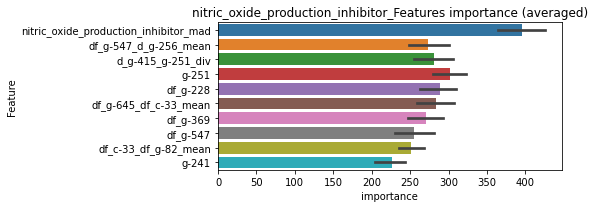

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679465	valid_1's binary_logloss: 0.0221631
[600]	training's binary_logloss: 0.000938974	valid_1's binary_logloss: 0.00902222
[900]	training's binary_logloss: 0.000456639	valid_1's binary_logloss: 0.00742973
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000426306	valid_1's binary_logloss: 0.00728853


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705394	valid_1's binary_logloss: 0.018791
[600]	training's binary_logloss: 0.000970655	valid_1's binary_logloss: 0.00744545
[900]	training's binary_logloss: 0.000466111	valid_1's binary_logloss: 0.00609008
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000446519	valid_1's binary_logloss: 0.00601484


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00658521	valid_1's binary_logloss: 0.0273741
[600]	training's binary_logloss: 0.000930504	valid_1's binary_logloss: 0.0185789
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00102119	valid_1's binary_logloss: 0.0185274


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00685731	valid_1's binary_logloss: 0.0237664
[600]	training's binary_logloss: 0.000943536	valid_1's binary_logloss: 0.0127916
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000565233	valid_1's binary_logloss: 0.0114336


nitric_oxide_production_inhibitor logloss: 0.010819432073771881


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095294	valid_1's binary_logloss: 0.0322219
[600]	training's binary_logloss: 0.00119652	valid_1's binary_logloss: 0.0158731
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.0006062	valid_1's binary_logloss: 0.0137646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101937	valid_1's binary_logloss: 0.0213803
[600]	training's binary_logloss: 0.00126754	valid_1's binary_logloss: 0.00690875
[900]	training's binary_logloss: 0.000591193	valid_1's binary_logloss: 0.00503893
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000563097	valid_1's binary_logloss: 0.00497908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00986286	valid_1's binary_logloss: 0.0229872
[600]	training's binary_logloss: 0.00124453	valid_1's binary_logloss: 0.00737487
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0068163, Threshold: 0.0558477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.03909, conf_1:0.07260
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0558477
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.1058477
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_3: 0.1558477
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_4: 0.2058477
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_5: 0.2558477
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_6: 0.3058477
threshold: 0.3058477, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00820243	valid_1's binary_logloss: 0.0244591
[600]	training's binary_logloss: 0.00104307	valid_1's binary_logloss: 0.0100629
[900]	training's binary_logloss: 0.00052267	valid_1's binary_logloss: 0.00825175
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000538928	valid_1's binary_logloss: 0.00820289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848456	valid_1's binary_logloss: 0.0178913
[600]	training's binary_logloss: 0.00108363	valid_1's binary_logloss: 0.00439411
[900]	training's binary_logloss: 0.00054081	valid_1's binary_logloss: 0.00289241
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000528817	valid_1's binary_logloss: 0.00286679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819749	valid_1's binary_logloss: 0.0170506
[600]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1111965, Threshold: 0.3058477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0102963 Vs.target_rate: 0.00109, Num_p_label: 41.0, conf_0:0.24468, conf_1:0.36702
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_1: 0.3058477
Num_p_label: 36.0, Expected: 4.3, Adj_threshold_2: 0.3558477
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_3: 0.4058477
Num_p_label: 31.0, Expected: 4.3, Adj_threshold_4: 0.4558477
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_5: 0.5058477
Num_p_label: 26.0, Expected: 4.3, Adj_threshold_6: 0.5558477
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_7: 0.6058477
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_8: 0.6558477
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_9: 0.7058477
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_10: 0.7558477
threshold: 0.7558477, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811112	valid_1's binary_logloss: 0.0206011
[600]	training's binary_logloss: 0.0010519	valid_1's binary_logloss: 0.00568267
[900]	training's binary_logloss: 0.000524517	valid_1's binary_logloss: 0.00383478
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000507159	valid_1's binary_logloss: 0.00379276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083417	valid_1's binary_logloss: 0.0198089
[600]	training's binary_logloss: 0.0010851	valid_1's binary_logloss: 0.0060012
[900]	training's binary_logloss: 0.000535979	valid_1's binary_logloss: 0.00451916
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000518483	valid_1's binary_logloss: 0.00448191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840382	valid_1's binary_logloss: 0.018597
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1709758, Threshold: 0.7558477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00109, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_1: 0.7558477
threshold: 0.7558477, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


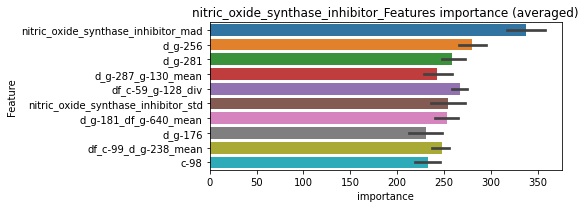

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00822234	valid_1's binary_logloss: 0.0217065
[600]	training's binary_logloss: 0.00106118	valid_1's binary_logloss: 0.00645949
[900]	training's binary_logloss: 0.000529118	valid_1's binary_logloss: 0.00478277
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000517044	valid_1's binary_logloss: 0.00473679


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00838367	valid_1's binary_logloss: 0.0202364
[600]	training's binary_logloss: 0.00108212	valid_1's binary_logloss: 0.00625768
[900]	training's binary_logloss: 0.000542242	valid_1's binary_logloss: 0.00471599
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000540925	valid_1's binary_logloss: 0.00470325


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824395	valid_1's binary_logloss: 0.0174938
[600]	training's binary_logloss: 0.00108607	valid_1's binary_logloss: 0.00433366
[900]	training's binary_logloss: 0.000535493	valid_1's binary_logloss: 0.0028821
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000521083	valid_1's binary_logloss: 0.00284803


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083171	valid_1's binary_logloss: 0.0225613
[600]	training's binary_logloss: 0.00105198	valid_1's binary_logloss: 0.00638565
[900]	training's binary_logloss: 0.000528494	valid_1's binary_logloss: 0.0043389
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000502649	valid_1's binary_logloss: 0.00420243


nitric_oxide_synthase_inhibitor logloss: 0.004124850327676745


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188641	valid_1's binary_logloss: 0.00348768
[600]	training's binary_logloss: 0.000270183	valid_1's binary_logloss: 0.000853794
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000214401	valid_1's binary_logloss: 0.000738381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184932	valid_1's binary_logloss: 0.00413067
[600]	training's binary_logloss: 0.000262915	valid_1's binary_logloss: 0.00115618
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000212367	valid_1's binary_logloss: 0.000988078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188776	valid_1's binary_logloss: 0.00381156
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000342794	valid_1's binary_logloss: 0.00228565
Training until validation scores don't improve for 30 ro

1 / 3 AUC score:1.000
y_Threshold: 0.0008752, Threshold: 0.0057104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00400, conf_1:0.00742
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0057104
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0557104
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1057104
threshold: 0.1057104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156923	valid_1's binary_logloss: 0.00179143
[600]	training's binary_logloss: 0.000223116	valid_1's binary_logloss: 0.000280571
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000185315	valid_1's binary_logloss: 0.000234046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160032	valid_1's binary_logloss: 0.00225296
[600]	training's binary_logloss: 0.000226568	valid_1's binary_logloss: 0.000389581
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000187494	valid_1's binary_logloss: 0.000327192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159484	valid_1's binary_logloss: 0.00175361
[600]	training's binary_logloss: 0.000222192	valid_1's binary_logloss: 0.00026661
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000183938	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1673782, Threshold: 0.1057104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00029, Num_p_label: 17.0, conf_0:0.08457, conf_1:0.12685
Num_p_label: 17.0, Expected: 1.2, Adj_threshold_1: 0.1057104
Num_p_label: 12.0, Expected: 1.2, Adj_threshold_2: 0.1557104
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_3: 0.2057104
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_4: 0.2557104
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_5: 0.3057104
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_6: 0.3557104
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_7: 0.4057104
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.4557104
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.5057104
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.5557104
threshold: 0.6057104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= 

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156923	valid_1's binary_logloss: 0.00179143
[600]	training's binary_logloss: 0.000223116	valid_1's binary_logloss: 0.000280571
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000185315	valid_1's binary_logloss: 0.000234046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160032	valid_1's binary_logloss: 0.00225296
[600]	training's binary_logloss: 0.000226568	valid_1's binary_logloss: 0.000389581
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000187494	valid_1's binary_logloss: 0.000327192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159484	valid_1's binary_logloss: 0.00175361
[600]	training's binary_logloss: 0.000222192	valid_1's binary_logloss: 0.00026661
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000183938	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1673782, Threshold: 0.6057104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.50000, conf_1:0.66628
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.6057104
threshold: 0.6057104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


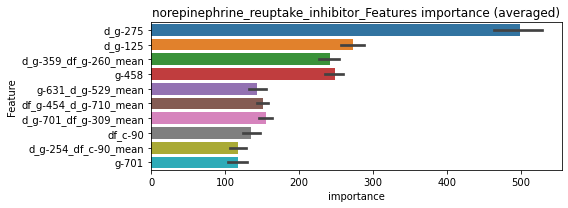

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155814	valid_1's binary_logloss: 0.00177655
[600]	training's binary_logloss: 0.000224949	valid_1's binary_logloss: 0.000283194
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000184631	valid_1's binary_logloss: 0.000234804


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158851	valid_1's binary_logloss: 0.0019828
[600]	training's binary_logloss: 0.000225156	valid_1's binary_logloss: 0.000320087


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000187724	valid_1's binary_logloss: 0.000270896


================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158222	valid_1's binary_logloss: 0.00174909
[600]	training's binary_logloss: 0.00022285	valid_1's binary_logloss: 0.000270584


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000184842	valid_1's binary_logloss: 0.000226168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157457	valid_1's binary_logloss: 0.00175709
[600]	training's binary_logloss: 0.00022443	valid_1's binary_logloss: 0.000291651
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000187715	valid_1's binary_logloss: 0.000246797


norepinephrine_reuptake_inhibitor logloss: 0.0002446658354744008


neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642702	valid_1's binary_logloss: 0.01647
[600]	training's binary_logloss: 0.000838519	valid_1's binary_logloss: 0.00539413
[900]	training's binary_logloss: 0.000430063	valid_1's binary_logloss: 0.00420328
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000427073	valid_1's binary_logloss: 0.00419837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642754	valid_1's binary_logloss: 0.0154244
[600]	training's binary_logloss: 0.000818597	valid_1's binary_logloss: 0.005266
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000457236	valid_1's binary_logloss: 0.00417946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00643255	valid_1's binary_logloss: 0.014462
[600]	training's binary_logloss: 0.000835876	valid_1's binary_logloss: 0.00480088
[900]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0039780, Threshold: 0.0190762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01335, conf_1:0.02480
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0190762
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0690762
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1190762
threshold: 0.1190762, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055356	valid_1's binary_logloss: 0.0130708
[600]	training's binary_logloss: 0.000734117	valid_1's binary_logloss: 0.0042651
[900]	training's binary_logloss: 0.000387336	valid_1's binary_logloss: 0.00327126
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000379431	valid_1's binary_logloss: 0.00324631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523614	valid_1's binary_logloss: 0.0148878
[600]	training's binary_logloss: 0.000716282	valid_1's binary_logloss: 0.00569995
[900]	training's binary_logloss: 0.000392889	valid_1's binary_logloss: 0.00458388
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000393519	valid_1's binary_logloss: 0.00457904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554412	valid_1's binary_logloss: 0.0122093
[600]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0694702, Threshold: 0.1190762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00076, Num_p_label: 22.0, conf_0:0.09526, conf_1:0.14289
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_1: 0.1190762
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1690762
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.2190762
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.2690762
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.3190762
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.3690762
threshold: 0.3690762, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055356	valid_1's binary_logloss: 0.0130708
[600]	training's binary_logloss: 0.000734117	valid_1's binary_logloss: 0.0042651
[900]	training's binary_logloss: 0.000387336	valid_1's binary_logloss: 0.00327126
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000379431	valid_1's binary_logloss: 0.00324631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523614	valid_1's binary_logloss: 0.0148878
[600]	training's binary_logloss: 0.000716282	valid_1's binary_logloss: 0.00569995
[900]	training's binary_logloss: 0.000392889	valid_1's binary_logloss: 0.00458388
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000393519	valid_1's binary_logloss: 0.00457904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554412	valid_1's binary_logloss: 0.0122093
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0694702, Threshold: 0.3690762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.33217, conf_1:0.40598
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3690762
threshold: 0.3690762, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


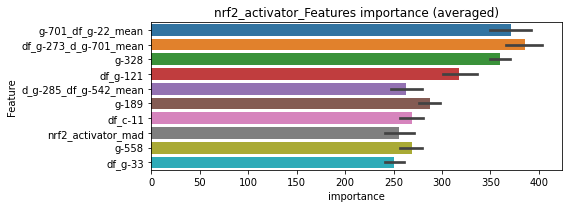

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546561	valid_1's binary_logloss: 0.0126538
[600]	training's binary_logloss: 0.000732316	valid_1's binary_logloss: 0.00425191
[900]	training's binary_logloss: 0.000390356	valid_1's binary_logloss: 0.00342219
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000381364	valid_1's binary_logloss: 0.00339331


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534395	valid_1's binary_logloss: 0.0136761
[600]	training's binary_logloss: 0.000714185	valid_1's binary_logloss: 0.00520049
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.00040609	valid_1's binary_logloss: 0.00422953


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545443	valid_1's binary_logloss: 0.0121732
[600]	training's binary_logloss: 0.000736822	valid_1's binary_logloss: 0.00377953
[900]	training's binary_logloss: 0.000396442	valid_1's binary_logloss: 0.00284945
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000385621	valid_1's binary_logloss: 0.00281828


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551062	valid_1's binary_logloss: 0.0115225
[600]	training's binary_logloss: 0.000730049	valid_1's binary_logloss: 0.00348255
[900]	training's binary_logloss: 0.000388868	valid_1's binary_logloss: 0.00253651
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.00039199	valid_1's binary_logloss: 0.00253485


nrf2_activator logloss: 0.0032469080390709133


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197007	valid_1's binary_logloss: 0.0688471
[600]	training's binary_logloss: 0.00281797	valid_1's binary_logloss: 0.0367512
[900]	training's binary_logloss: 0.0011075	valid_1's binary_logloss: 0.0307957
Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000839934	valid_1's binary_logloss: 0.029496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204371	valid_1's binary_logloss: 0.0761234
[600]	training's binary_logloss: 0.00284801	valid_1's binary_logloss: 0.0511191
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.0013909	valid_1's binary_logloss: 0.0479708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208823	valid_1's binary_logloss: 0.0472677
[600]	training's binary_logloss: 0.00293801	valid_1's binary_logloss: 0.0165223
[900]	training's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0132498, Threshold: 0.0798052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.05586, conf_1:0.10375
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0798052
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.1298052
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_3: 0.1798052
threshold: 0.1798052, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163065	valid_1's binary_logloss: 0.0649122
[600]	training's binary_logloss: 0.00232722	valid_1's binary_logloss: 0.0405583
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.0010451	valid_1's binary_logloss: 0.0377488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171873	valid_1's binary_logloss: 0.0656652
[600]	training's binary_logloss: 0.00243633	valid_1's binary_logloss: 0.0415014
[900]	training's binary_logloss: 0.00100478	valid_1's binary_logloss: 0.037618
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000968626	valid_1's binary_logloss: 0.0374407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182674	valid_1's binary_logloss: 0.0502647
[600]	training's binary_logloss: 0.00247452	valid_1's binary_logloss: 0.0196333
[900]	training's binary_logloss

2 / 3 AUC score:0.999
y_Threshold: 0.0762402, Threshold: 0.1798052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0128076 Vs.target_rate: 0.00256, Num_p_label: 51.0, conf_0:0.14384, conf_1:0.21577
Num_p_label: 51.0, Expected: 10.2, Adj_threshold_1: 0.1798052
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_2: 0.2298052
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_3: 0.2798052
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_4: 0.3298052
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_5: 0.3798052
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_6: 0.4298052
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_7: 0.4798052
threshold: 0.4798052, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161072	valid_1's binary_logloss: 0.0554373
[600]	training's binary_logloss: 0.00228523	valid_1's binary_logloss: 0.0305901
[900]	training's binary_logloss: 0.000964687	valid_1's binary_logloss: 0.0277007
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000912108	valid_1's binary_logloss: 0.0274822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171732	valid_1's binary_logloss: 0.0699696
[600]	training's binary_logloss: 0.00240172	valid_1's binary_logloss: 0.0521327
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00195774	valid_1's binary_logloss: 0.0517029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170401	valid_1's binary_logloss: 0.0593388
[600]	training's binary_logloss: 0.00239332	valid_1's binary_logloss: 0.031807
[900]	training's binary_loglo

3 / 3 AUC score:0.998
y_Threshold: 0.0504966, Threshold: 0.4798052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 637.0/3766
p_label_rate: 0.0045203 Vs.target_rate: 0.00256, Num_p_label: 18.0, conf_0:0.43182, conf_1:0.52779
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.4798052
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_2: 0.5298052
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_3: 0.5798052
threshold: 0.5798052, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 637.0/3766, y_label_rate: 0.1691450


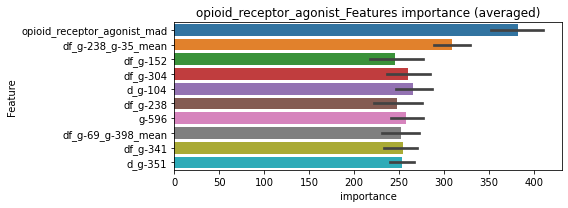

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158193	valid_1's binary_logloss: 0.0559986
[600]	training's binary_logloss: 0.00222745	valid_1's binary_logloss: 0.0280904
[900]	training's binary_logloss: 0.000933095	valid_1's binary_logloss: 0.0235673
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000828169	valid_1's binary_logloss: 0.0231609


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159885	valid_1's binary_logloss: 0.0540377
[600]	training's binary_logloss: 0.0022352	valid_1's binary_logloss: 0.0292037
[900]	training's binary_logloss: 0.00094363	valid_1's binary_logloss: 0.0256242
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.00098488	valid_1's binary_logloss: 0.0255491


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156723	valid_1's binary_logloss: 0.0468826
[600]	training's binary_logloss: 0.00224747	valid_1's binary_logloss: 0.0219526
[900]	training's binary_logloss: 0.000951999	valid_1's binary_logloss: 0.0171355
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000961564	valid_1's binary_logloss: 0.0171077


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158033	valid_1's binary_logloss: 0.0633697
[600]	training's binary_logloss: 0.00219818	valid_1's binary_logloss: 0.0412169
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00167839	valid_1's binary_logloss: 0.0400448


opioid_receptor_agonist logloss: 0.026464509967390477


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0353108	valid_1's binary_logloss: 0.139739
[600]	training's binary_logloss: 0.00559552	valid_1's binary_logloss: 0.11393
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00416316	valid_1's binary_logloss: 0.111816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369647	valid_1's binary_logloss: 0.095348
[600]	training's binary_logloss: 0.00612462	valid_1's binary_logloss: 0.0546077
[900]	training's binary_logloss: 0.00199731	valid_1's binary_logloss: 0.0460785
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.00158093	valid_1's binary_logloss: 0.0451699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319673	valid_1's binary_logloss: 0.112744
[600]	training's binary_logloss: 0.00527674	valid_1's binary_logloss: 0.0790235
Early stopping, best iteration is:


1 / 3 AUC score:0.988
y_Threshold: 0.0352953, Threshold: 0.2300184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 196 → Positive_corect_labels: 622/3732
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.16101, conf_1:0.29902
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.2300184
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_2: 0.2800184
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_3: 0.3300184
threshold: 0.3300184, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 622.0/3732, y_label_rate: 0.1666667
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239183	valid_1's binary_logloss: 0.0876086
[600]	training's binary_logloss: 0.00353297	valid_1's binary_logloss: 0.0601601
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00149312	valid_1's binary_logloss: 0.0558374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234104	valid_1's binary_logloss: 0.0964562
[600]	training's binary_logloss: 0.00342776	valid_1's binary_logloss: 0.0735645
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00211726	valid_1's binary_logloss: 0.0712815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246648	valid_1's binary_logloss: 0.0891677
[600]	training's binary_logloss: 0.0036593	valid_1's binary_logloss: 0.061533
[900]	training's binary_logloss: 0.00134743	valid_1's binary_logloss: 0.0575447
Early stopping, best iteration i

2 / 3 AUC score:0.997
y_Threshold: 0.1098629, Threshold: 0.3300184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 593.0/3674
p_label_rate: 0.0251130 Vs.target_rate: 0.00403, Num_p_label: 100.0, conf_0:0.26401, conf_1:0.39602
Num_p_label: 100.0, Expected: 16.1, Adj_threshold_1: 0.3300184
Num_p_label: 90.0, Expected: 16.1, Adj_threshold_2: 0.3800184
Num_p_label: 83.0, Expected: 16.1, Adj_threshold_3: 0.4300184
Num_p_label: 78.0, Expected: 16.1, Adj_threshold_4: 0.4800184
Num_p_label: 72.0, Expected: 16.1, Adj_threshold_5: 0.5300184
Num_p_label: 66.0, Expected: 16.1, Adj_threshold_6: 0.5800184
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_7: 0.6300184
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_8: 0.6800184
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_9: 0.7300184
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_10: 0.7800184
threshold: 0.7800184, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 593.0/3674, y_label_rate: 0.16140

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198986	valid_1's binary_logloss: 0.0801774
[600]	training's binary_logloss: 0.00281745	valid_1's binary_logloss: 0.0568424
[900]	training's binary_logloss: 0.00111444	valid_1's binary_logloss: 0.0533962
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.0011397	valid_1's binary_logloss: 0.0531943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187155	valid_1's binary_logloss: 0.0893735
[600]	training's binary_logloss: 0.00273947	valid_1's binary_logloss: 0.06969
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.0024568	valid_1's binary_logloss: 0.0690135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01983	valid_1's binary_logloss: 0.0704486
[600]	training's binary_logloss: 0.00284044	valid_1's binary_logloss: 0.0447264
Early stopping, best iteration is:
[

3 / 3 AUC score:0.997
y_Threshold: 0.1138061, Threshold: 0.7800184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 576.0/3640
p_label_rate: 0.0175791 Vs.target_rate: 0.00403, Num_p_label: 70.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_1: 0.7800184
threshold: 0.7800184, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 576.0/3640, y_label_rate: 0.1582418


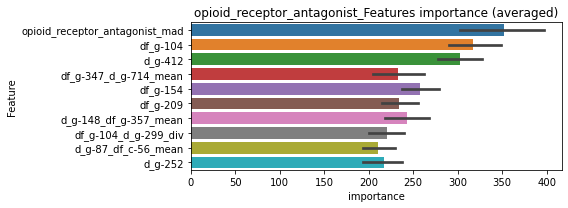

len(train_index) : 2730
len(valid_index) : 910
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015953	valid_1's binary_logloss: 0.0657991
[600]	training's binary_logloss: 0.00229854	valid_1's binary_logloss: 0.0400896
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00107906	valid_1's binary_logloss: 0.0358347


len(train_index) : 2730
len(valid_index) : 910
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152857	valid_1's binary_logloss: 0.0680387
[600]	training's binary_logloss: 0.00222999	valid_1's binary_logloss: 0.0459517
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.00105786	valid_1's binary_logloss: 0.0429221


len(train_index) : 2730
len(valid_index) : 910
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186263	valid_1's binary_logloss: 0.0521746
[600]	training's binary_logloss: 0.00260821	valid_1's binary_logloss: 0.0270257
[900]	training's binary_logloss: 0.00105398	valid_1's binary_logloss: 0.0218525
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000935094	valid_1's binary_logloss: 0.021535


len(train_index) : 2730
len(valid_index) : 910
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179661	valid_1's binary_logloss: 0.0577116
[600]	training's binary_logloss: 0.00254783	valid_1's binary_logloss: 0.0320941
[900]	training's binary_logloss: 0.00104757	valid_1's binary_logloss: 0.0273576
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.00083448	valid_1's binary_logloss: 0.0260467


opioid_receptor_antagonist logloss: 0.03158462436559217


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129725	valid_1's binary_logloss: 0.0467524
[600]	training's binary_logloss: 0.00158238	valid_1's binary_logloss: 0.0219538
[900]	training's binary_logloss: 0.000693049	valid_1's binary_logloss: 0.0181118
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000647794	valid_1's binary_logloss: 0.017939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123045	valid_1's binary_logloss: 0.0473635
[600]	training's binary_logloss: 0.00156431	valid_1's binary_logloss: 0.0266978
[900]	training's binary_logloss: 0.000694153	valid_1's binary_logloss: 0.0239009
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000722745	valid_1's binary_logloss: 0.0238381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126245	valid_1's binary_logloss: 0.0294234
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0099999, Threshold: 0.0486353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.03404, conf_1:0.06323
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0486353
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_2: 0.0986353
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_3: 0.1486353
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.1986353
threshold: 0.1986353, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100989	valid_1's binary_logloss: 0.0354605
[600]	training's binary_logloss: 0.00130561	valid_1's binary_logloss: 0.0143215
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000667375	valid_1's binary_logloss: 0.0117994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113958	valid_1's binary_logloss: 0.0291517
[600]	training's binary_logloss: 0.00142831	valid_1's binary_logloss: 0.00942809
[900]	training's binary_logloss: 0.000647225	valid_1's binary_logloss: 0.00661777
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000596244	valid_1's binary_logloss: 0.00643762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111847	valid_1's binary_logloss: 0.0268436
[600]	training's binary_logloss: 0.00143364	valid_1's binary_logloss: 0.00886848
[900]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0996288, Threshold: 0.1986353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0133099 Vs.target_rate: 0.00155, Num_p_label: 53.0, conf_0:0.15891, conf_1:0.23836
Num_p_label: 53.0, Expected: 6.2, Adj_threshold_1: 0.1986353
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_2: 0.2486353
Num_p_label: 36.0, Expected: 6.2, Adj_threshold_3: 0.2986353
Num_p_label: 35.0, Expected: 6.2, Adj_threshold_4: 0.3486353
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_5: 0.3986353
Num_p_label: 28.0, Expected: 6.2, Adj_threshold_6: 0.4486353
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_7: 0.4986353
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_8: 0.5486353
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_9: 0.5986353
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_10: 0.6486353
threshold: 0.6486353, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3799, y_label_rate: 0.1713609
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108472	valid_1's binary_logloss: 0.0337544
[600]	training's binary_logloss: 0.00136837	valid_1's binary_logloss: 0.0144112
[900]	training's binary_logloss: 0.000631295	valid_1's binary_logloss: 0.0118682
Early stopping, best iteration is:
[1150]	training's binary_logloss: 0.000557616	valid_1's binary_logloss: 0.0114891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105413	valid_1's binary_logloss: 0.0326669
[600]	training's binary_logloss: 0.00133171	valid_1's binary_logloss: 0.0148011
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000673998	valid_1's binary_logloss: 0.0128277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101105	valid_1's binary_logloss: 0.0323782
[600]	training's binary_logloss: 0.00129961	valid_1's binary_logloss: 0.0168566
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0926184, Threshold: 0.6486353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00155, Num_p_label: 20.0, conf_0:0.50000, conf_1:0.71350
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_1: 0.6486353
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.6986353
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_3: 0.7486353
threshold: 0.7486353, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 647.0/3791, y_label_rate: 0.1706674


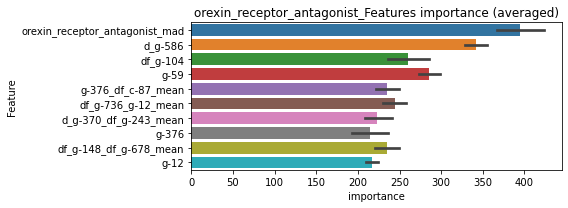

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102976	valid_1's binary_logloss: 0.0332499
[600]	training's binary_logloss: 0.00127914	valid_1's binary_logloss: 0.0100148
[900]	training's binary_logloss: 0.000605019	valid_1's binary_logloss: 0.00712178
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000563347	valid_1's binary_logloss: 0.00699071


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109986	valid_1's binary_logloss: 0.0298988
[600]	training's binary_logloss: 0.00134395	valid_1's binary_logloss: 0.0113636
[900]	training's binary_logloss: 0.000624815	valid_1's binary_logloss: 0.00872485
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000558301	valid_1's binary_logloss: 0.00842763


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102779	valid_1's binary_logloss: 0.0310302
[600]	training's binary_logloss: 0.00128757	valid_1's binary_logloss: 0.0131317
[900]	training's binary_logloss: 0.000601905	valid_1's binary_logloss: 0.0105171
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000601905	valid_1's binary_logloss: 0.0105171


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102967	valid_1's binary_logloss: 0.0329608
[600]	training's binary_logloss: 0.00129583	valid_1's binary_logloss: 0.0143501
[900]	training's binary_logloss: 0.000607202	valid_1's binary_logloss: 0.0117018
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000553771	valid_1's binary_logloss: 0.0114051


orexin_receptor_antagonist logloss: 0.009340258508178042


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0237464	valid_1's binary_logloss: 0.0787236
[600]	training's binary_logloss: 0.00341574	valid_1's binary_logloss: 0.0452762
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.0014308	valid_1's binary_logloss: 0.040555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227747	valid_1's binary_logloss: 0.0826662
[600]	training's binary_logloss: 0.00322135	valid_1's binary_logloss: 0.0454449
[900]	training's binary_logloss: 0.00121914	valid_1's binary_logloss: 0.0385974
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000942942	valid_1's binary_logloss: 0.0376829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216121	valid_1's binary_logloss: 0.0706645
[600]	training's binary_logloss: 0.00311368	valid_1's binary_logloss: 0.0416573
[900]	training's binary_loglos

1 / 3 AUC score:0.997
y_Threshold: 0.0218832, Threshold: 0.1747357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.12232, conf_1:0.22716
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.1747357
Num_p_label: 31.0, Expected: 10.4, Adj_threshold_2: 0.2247357
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_3: 0.2747357
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_4: 0.3247357
Num_p_label: 13.0, Expected: 10.4, Adj_threshold_5: 0.3747357
threshold: 0.3747357, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169333	valid_1's binary_logloss: 0.052568
[600]	training's binary_logloss: 0.00242725	valid_1's binary_logloss: 0.0264894
[900]	training's binary_logloss: 0.00102157	valid_1's binary_logloss: 0.0220376
[1200]	training's binary_logloss: 0.00073943	valid_1's binary_logloss: 0.0208438
Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.000739791	valid_1's binary_logloss: 0.0208376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173139	valid_1's binary_logloss: 0.0538332
[600]	training's binary_logloss: 0.00243252	valid_1's binary_logloss: 0.0309001
[900]	training's binary_logloss: 0.00102064	valid_1's binary_logloss: 0.0271867
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00101423	valid_1's binary_logloss: 0.0271636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

2 / 3 AUC score:0.998
y_Threshold: 0.0829403, Threshold: 0.3747357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 633.0/3759
p_label_rate: 0.0135610 Vs.target_rate: 0.00260, Num_p_label: 54.0, conf_0:0.29979, conf_1:0.44968
Num_p_label: 54.0, Expected: 10.4, Adj_threshold_1: 0.3747357
Num_p_label: 44.0, Expected: 10.4, Adj_threshold_2: 0.4247357
Num_p_label: 38.0, Expected: 10.4, Adj_threshold_3: 0.4747357
Num_p_label: 32.0, Expected: 10.4, Adj_threshold_4: 0.5247357
Num_p_label: 26.0, Expected: 10.4, Adj_threshold_5: 0.5747357
Num_p_label: 24.0, Expected: 10.4, Adj_threshold_6: 0.6247357
Num_p_label: 15.0, Expected: 10.4, Adj_threshold_7: 0.6747357
threshold: 0.6747357, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 633.0/3759, y_label_rate: 0.1683958
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150385	valid_1's binary_logloss: 0.0598437
[600]	training's binary_logloss: 0.00219674	valid_1's binary_logloss: 0.0326045
[900]	training's binary_logloss: 0.00094362	valid_1's binary_logloss: 0.0267745
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000902731	valid_1's binary_logloss: 0.0266715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143172	valid_1's binary_logloss: 0.077506
[600]	training's binary_logloss: 0.00203931	valid_1's binary_logloss: 0.0604488
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00148351	valid_1's binary_logloss: 0.0596757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144541	valid_1's binary_logloss: 0.0602564
[600]	training's binary_logloss: 0.00217026	valid_1's binary_logloss: 0.0384171
[900]	training's binary_loglos

3 / 3 AUC score:0.998
y_Threshold: 0.0918871, Threshold: 0.6747357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 621.0/3735
p_label_rate: 0.0055249 Vs.target_rate: 0.00260, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.74221
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.6747357
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_2: 0.7247357
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_3: 0.7747357
threshold: 0.7747357, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 621.0/3735, y_label_rate: 0.1662651


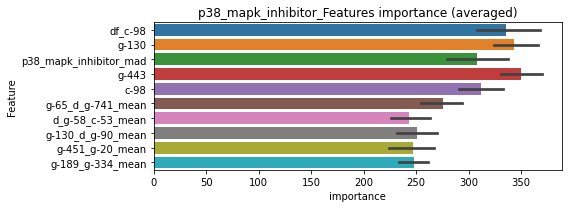

len(train_index) : 2801
len(valid_index) : 934
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014131	valid_1's binary_logloss: 0.0564127
[600]	training's binary_logloss: 0.00200497	valid_1's binary_logloss: 0.0355612
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00136782	valid_1's binary_logloss: 0.0340637


len(train_index) : 2801
len(valid_index) : 934
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141115	valid_1's binary_logloss: 0.0440497
[600]	training's binary_logloss: 0.00204411	valid_1's binary_logloss: 0.0198382
[900]	training's binary_logloss: 0.000890113	valid_1's binary_logloss: 0.0156277
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000847353	valid_1's binary_logloss: 0.0154451


len(train_index) : 2801
len(valid_index) : 934
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137527	valid_1's binary_logloss: 0.0605639
[600]	training's binary_logloss: 0.0020237	valid_1's binary_logloss: 0.0353051
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00109672	valid_1's binary_logloss: 0.0319905


len(train_index) : 2802
len(valid_index) : 933
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138296	valid_1's binary_logloss: 0.0448382
[600]	training's binary_logloss: 0.00198711	valid_1's binary_logloss: 0.0197666
[900]	training's binary_logloss: 0.000880074	valid_1's binary_logloss: 0.0152014
[1200]	training's binary_logloss: 0.000672513	valid_1's binary_logloss: 0.0141297
Early stopping, best iteration is:
[1243]	training's binary_logloss: 0.000660183	valid_1's binary_logloss: 0.0141072


p38_mapk_inhibitor logloss: 0.023904242683977315


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779857	valid_1's binary_logloss: 0.0218502
[600]	training's binary_logloss: 0.000985074	valid_1's binary_logloss: 0.00837994
[900]	training's binary_logloss: 0.000478154	valid_1's binary_logloss: 0.00657588
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.00045956	valid_1's binary_logloss: 0.00647426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834646	valid_1's binary_logloss: 0.0151897
[600]	training's binary_logloss: 0.00103948	valid_1's binary_logloss: 0.00381984
[900]	training's binary_logloss: 0.000495369	valid_1's binary_logloss: 0.00255421
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000464189	valid_1's binary_logloss: 0.00249699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825495	valid_1's binary_logloss: 0.0176827
[600]	training's

1 / 3 AUC score:1.000
y_Threshold: 0.0056247, Threshold: 0.0435317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.03047, conf_1:0.05659
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0435317
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_2: 0.0935317
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.1435317
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1935317
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.2435317
threshold: 0.2435317, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674629	valid_1's binary_logloss: 0.015799
[600]	training's binary_logloss: 0.000875963	valid_1's binary_logloss: 0.00546193
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000482575	valid_1's binary_logloss: 0.00448641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709176	valid_1's binary_logloss: 0.0131991
[600]	training's binary_logloss: 0.000901528	valid_1's binary_logloss: 0.00320806
[900]	training's binary_logloss: 0.000442525	valid_1's binary_logloss: 0.00213793
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000423048	valid_1's binary_logloss: 0.0021079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00696131	valid_1's binary_logloss: 0.0161503
[600]	training's binary_logloss: 0.000877749	valid_1's binary_logloss: 0.0045344
[900]	training's b

2 / 3 AUC score:1.000
y_Threshold: 0.0753259, Threshold: 0.2435317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00101, Num_p_label: 36.0, conf_0:0.19483, conf_1:0.29224
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_1: 0.2435317
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_2: 0.2935317
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.3435317
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_4: 0.3935317
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_5: 0.4435317
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.4935317
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_7: 0.5435317
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.5935317
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.6435317
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_10: 0.6935317
threshold: 0.6935317, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690746	valid_1's binary_logloss: 0.0145864
[600]	training's binary_logloss: 0.00087673	valid_1's binary_logloss: 0.00316725
[900]	training's binary_logloss: 0.000440789	valid_1's binary_logloss: 0.00199521
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000418021	valid_1's binary_logloss: 0.0019295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720665	valid_1's binary_logloss: 0.0130906
[600]	training's binary_logloss: 0.000902895	valid_1's binary_logloss: 0.00256174
[900]	training's binary_logloss: 0.000449022	valid_1's binary_logloss: 0.0015024
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000431952	valid_1's binary_logloss: 0.00146535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680042	valid_1's binary_logloss: 0.020244
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1016296, Threshold: 0.6935317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0022602 Vs.target_rate: 0.00101, Num_p_label: 9.0, conf_0:0.50000, conf_1:0.76288
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.6935317
threshold: 0.6935317, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


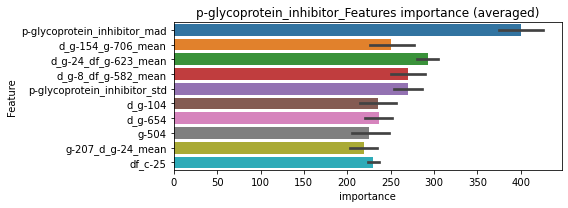

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671236	valid_1's binary_logloss: 0.0201659
[600]	training's binary_logloss: 0.000856694	valid_1's binary_logloss: 0.0095812
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000451447	valid_1's binary_logloss: 0.00831148


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712269	valid_1's binary_logloss: 0.0140205
[600]	training's binary_logloss: 0.000889072	valid_1's binary_logloss: 0.00382445
[900]	training's binary_logloss: 0.000439967	valid_1's binary_logloss: 0.00293768
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.00042371	valid_1's binary_logloss: 0.00290117


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707272	valid_1's binary_logloss: 0.0158927
[600]	training's binary_logloss: 0.000880502	valid_1's binary_logloss: 0.00466779
[900]	training's binary_logloss: 0.000439447	valid_1's binary_logloss: 0.00332162
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000421038	valid_1's binary_logloss: 0.00327412


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716353	valid_1's binary_logloss: 0.0135046
[600]	training's binary_logloss: 0.000896077	valid_1's binary_logloss: 0.00274391
[900]	training's binary_logloss: 0.000445762	valid_1's binary_logloss: 0.00167934
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000443962	valid_1's binary_logloss: 0.00167549


p-glycoprotein_inhibitor logloss: 0.004042617245408104


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0256708	valid_1's binary_logloss: 0.0854837
[600]	training's binary_logloss: 0.00370091	valid_1's binary_logloss: 0.0494051
[900]	training's binary_logloss: 0.00133602	valid_1's binary_logloss: 0.0442201
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.00124281	valid_1's binary_logloss: 0.0439356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253635	valid_1's binary_logloss: 0.0841925
[600]	training's binary_logloss: 0.00370167	valid_1's binary_logloss: 0.0481953
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00147989	valid_1's binary_logloss: 0.0422866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.028481	valid_1's binary_logloss: 0.0687552
[600]	training's binary_logloss: 0.00394928	valid_1's binary_logloss: 0.0307823
[900]	training's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0177357, Threshold: 0.0681925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.04773, conf_1:0.08865
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0681925
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_2: 0.1181925
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_3: 0.1681925
threshold: 0.1681925, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229403	valid_1's binary_logloss: 0.0715671
[600]	training's binary_logloss: 0.00323803	valid_1's binary_logloss: 0.0401623
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.00137791	valid_1's binary_logloss: 0.0351498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225561	valid_1's binary_logloss: 0.0594511
[600]	training's binary_logloss: 0.00313499	valid_1's binary_logloss: 0.0223619
[900]	training's binary_logloss: 0.0012062	valid_1's binary_logloss: 0.0156754
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000875204	valid_1's binary_logloss: 0.0143557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222585	valid_1's binary_logloss: 0.0723605
[600]	training's binary_logloss: 0.00315331	valid_1's binary_logloss: 0.0360891
[900]	training's binary_loglo

2 / 3 AUC score:0.999
y_Threshold: 0.0627311, Threshold: 0.1681925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 644.0/3781
p_label_rate: 0.0102963 Vs.target_rate: 0.00256, Num_p_label: 41.0, conf_0:0.13455, conf_1:0.20183
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_1: 0.1681925
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_2: 0.2181925
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_3: 0.2681925
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_4: 0.3181925
threshold: 0.3181925, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3781, y_label_rate: 0.1703253
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205972	valid_1's binary_logloss: 0.0724414
[600]	training's binary_logloss: 0.00287089	valid_1's binary_logloss: 0.0437489
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00160813	valid_1's binary_logloss: 0.0410214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197401	valid_1's binary_logloss: 0.0722291
[600]	training's binary_logloss: 0.00282306	valid_1's binary_logloss: 0.0442731
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00172019	valid_1's binary_logloss: 0.0420116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022296	valid_1's binary_logloss: 0.067694
[600]	training's binary_logloss: 0.00320521	valid_1's binary_logloss: 0.0365894
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00260186	valid_1's binary_logloss: 0.03502

3 / 3 AUC score:0.998
y_Threshold: 0.0672802, Threshold: 0.3181925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 633.0/3759
p_label_rate: 0.0027624 Vs.target_rate: 0.00256, Num_p_label: 11.0, conf_0:0.28637, conf_1:0.35001
threshold: 0.3181925, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 633.0/3759, y_label_rate: 0.1683958


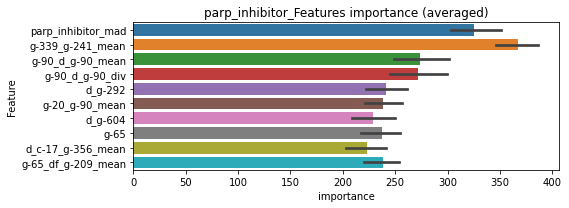

len(train_index) : 2819
len(valid_index) : 940
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200505	valid_1's binary_logloss: 0.0679035
[600]	training's binary_logloss: 0.00271065	valid_1's binary_logloss: 0.0321575
[900]	training's binary_logloss: 0.00107784	valid_1's binary_logloss: 0.025548
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00102281	valid_1's binary_logloss: 0.0253706


len(train_index) : 2819
len(valid_index) : 940
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195997	valid_1's binary_logloss: 0.0563748
[600]	training's binary_logloss: 0.00270512	valid_1's binary_logloss: 0.0248306
[900]	training's binary_logloss: 0.00108246	valid_1's binary_logloss: 0.0190605
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000911115	valid_1's binary_logloss: 0.0184809


len(train_index) : 2819
len(valid_index) : 940
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189825	valid_1's binary_logloss: 0.0597953
[600]	training's binary_logloss: 0.00266204	valid_1's binary_logloss: 0.0303601
[900]	training's binary_logloss: 0.00106593	valid_1's binary_logloss: 0.0258822
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000789082	valid_1's binary_logloss: 0.0251971


len(train_index) : 2820
len(valid_index) : 939
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194237	valid_1's binary_logloss: 0.0655841
[600]	training's binary_logloss: 0.00268409	valid_1's binary_logloss: 0.0353666
[900]	training's binary_logloss: 0.00105427	valid_1's binary_logloss: 0.0304475
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000836498	valid_1's binary_logloss: 0.0294604


parp_inhibitor logloss: 0.024625955862127815


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0917153	valid_1's binary_logloss: 0.312977
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.043714	valid_1's binary_logloss: 0.305917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0928894	valid_1's binary_logloss: 0.317402
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.0477879	valid_1's binary_logloss: 0.303647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0919598	valid_1's binary_logloss: 0.289338
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0407662	valid_1's binary_logloss: 0.275481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0878642	valid_1's binary_logloss: 0.310505


1 / 3 AUC score:0.848
y_Threshold: 0.1221316, Threshold: 0.5953653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 516 → Positive_corect_labels: 456/3378
p_label_rate: 0.0100452 Vs.target_rate: 0.01247, Num_p_label: 40.0, conf_0:0.41676, conf_1:0.77397


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.0631223	valid_1's binary_logloss: 0.305577


threshold: 0.5953653, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 456.0/3378, y_label_rate: 0.1349911
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318008	valid_1's binary_logloss: 0.18095
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.0111082	valid_1's binary_logloss: 0.169823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329978	valid_1's binary_logloss: 0.157117
[600]	training's binary_logloss: 0.00641037	valid_1's binary_logloss: 0.136818
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00564538	valid_1's binary_logloss: 0.136246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.032019	valid_1's binary_logloss: 0.166602
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.0103946	valid_1's binary_logloss: 0.152051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333938	valid_1's binary_logloss: 0.160474
[600]	training's binary_log

2 / 3 AUC score:0.966
y_Threshold: 0.1099383, Threshold: 0.5953653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 383.0/3232
p_label_rate: 0.0339026 Vs.target_rate: 0.01247, Num_p_label: 135.0, conf_0:0.47629, conf_1:0.71444
Num_p_label: 135.0, Expected: 49.7, Adj_threshold_1: 0.5953653
Num_p_label: 114.0, Expected: 49.7, Adj_threshold_2: 0.6453653
Num_p_label: 100.0, Expected: 49.7, Adj_threshold_3: 0.6953653
Num_p_label: 79.0, Expected: 49.7, Adj_threshold_4: 0.7453653
Num_p_label: 63.0, Expected: 49.7, Adj_threshold_5: 0.7953653
threshold: 0.7953653, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 383.0/3232, y_label_rate: 0.1185025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185841	valid_1's binary_logloss: 0.138083
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00695245	valid_1's binary_logloss: 0.132993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191324	valid_1's binary_logloss: 0.125189
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00632332	valid_1's binary_logloss: 0.119348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213637	valid_1's binary_logloss: 0.112436
[600]	training's binary_logloss: 0.0035508	valid_1's binary_logloss: 0.0950459
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00274675	valid_1's binary_logloss: 0.0935867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219016	valid_1's binary_logloss: 0.115327
[600]	training's binar

3 / 3 AUC score:0.965
y_Threshold: 0.0911516, Threshold: 0.7953653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 337.0/3140
p_label_rate: 0.0439478 Vs.target_rate: 0.01247, Num_p_label: 175.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 175.0, Expected: 49.7, Adj_threshold_1: 0.7953653
threshold: 0.7953653, positive_p_label: 175.0/3982, p_label_rate: 0.0439478
positive_y_label: 337.0/3140, y_label_rate: 0.1073248


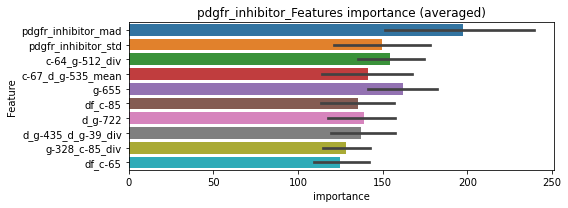

len(train_index) : 2355
len(valid_index) : 785
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125736	valid_1's binary_logloss: 0.101889
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00297511	valid_1's binary_logloss: 0.091958


len(train_index) : 2355
len(valid_index) : 785
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130307	valid_1's binary_logloss: 0.0893917
[600]	training's binary_logloss: 0.002155	valid_1's binary_logloss: 0.0761659
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00227089	valid_1's binary_logloss: 0.076145


len(train_index) : 2355
len(valid_index) : 785
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128662	valid_1's binary_logloss: 0.0925701


len(train_index) : 2355
len(valid_index) : 785
================================= fold 4/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00774324	valid_1's binary_logloss: 0.0882524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132368	valid_1's binary_logloss: 0.0774133
[600]	training's binary_logloss: 0.00223711	valid_1's binary_logloss: 0.0593991
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00119819	valid_1's binary_logloss: 0.0568955


pdgfr_inhibitor logloss: 0.07831274242385246


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633653	valid_1's binary_logloss: 0.0157037
[600]	training's binary_logloss: 0.000773101	valid_1's binary_logloss: 0.00486008
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000427839	valid_1's binary_logloss: 0.00369824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636228	valid_1's binary_logloss: 0.0144205
[600]	training's binary_logloss: 0.000774959	valid_1's binary_logloss: 0.00508212
[900]	training's binary_logloss: 0.000422606	valid_1's binary_logloss: 0.00404678
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000418749	valid_1's binary_logloss: 0.00404149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00609844	valid_1's binary_logloss: 0.0175127
[600]	training's binary_logloss: 0.000752795	valid_1's binary_logloss: 0.00661268
[900]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0043646, Threshold: 0.0299509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.02097, conf_1:0.03894
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0299509
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0799509
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.1299509
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1799509
threshold: 0.1799509, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518399	valid_1's binary_logloss: 0.0122251
[600]	training's binary_logloss: 0.000654287	valid_1's binary_logloss: 0.00345411
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000394378	valid_1's binary_logloss: 0.00262014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526841	valid_1's binary_logloss: 0.0132368
[600]	training's binary_logloss: 0.000661532	valid_1's binary_logloss: 0.00606629
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000393264	valid_1's binary_logloss: 0.0054243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515856	valid_1's binary_logloss: 0.00941403
[600]	training's binary_logloss: 0.000659652	valid_1's binary_logloss: 0.00183661
[900]	training's binary_logloss: 0.000379344	valid_1's binary_logloss: 0.00126124
Early stopping,

2 / 3 AUC score:1.000
y_Threshold: 0.0561670, Threshold: 0.1799509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.14396, conf_1:0.21594
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.1799509
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_2: 0.2299509
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.2799509
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.3299509
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.3799509
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.4299509
threshold: 0.4299509, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052624	valid_1's binary_logloss: 0.0132406
[600]	training's binary_logloss: 0.000661889	valid_1's binary_logloss: 0.00403181
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000397274	valid_1's binary_logloss: 0.00319756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510043	valid_1's binary_logloss: 0.00950655
[600]	training's binary_logloss: 0.000659884	valid_1's binary_logloss: 0.00189429
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000391325	valid_1's binary_logloss: 0.00128044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511001	valid_1's binary_logloss: 0.0115159
[600]	training's binary_logloss: 0.000660346	valid_1's binary_logloss: 0.0049987
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000384083	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0495952, Threshold: 0.4299509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00076, Num_p_label: 10.0, conf_0:0.38696, conf_1:0.47295
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.4299509
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.4799509
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.5299509
threshold: 0.5299509, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


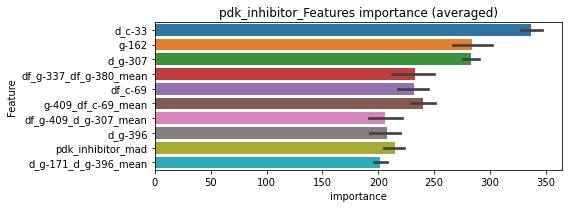

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515242	valid_1's binary_logloss: 0.0123816
[600]	training's binary_logloss: 0.000666299	valid_1's binary_logloss: 0.00363215
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000400067	valid_1's binary_logloss: 0.00288719


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512671	valid_1's binary_logloss: 0.00991336
[600]	training's binary_logloss: 0.000658998	valid_1's binary_logloss: 0.0019284
[900]	training's binary_logloss: 0.000376914	valid_1's binary_logloss: 0.00124805
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000377174	valid_1's binary_logloss: 0.00124801


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511776	valid_1's binary_logloss: 0.0121815
[600]	training's binary_logloss: 0.000647977	valid_1's binary_logloss: 0.00523515
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000570786	valid_1's binary_logloss: 0.00513287


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506883	valid_1's binary_logloss: 0.0100323
[600]	training's binary_logloss: 0.000653748	valid_1's binary_logloss: 0.00290204
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000390397	valid_1's binary_logloss: 0.00237327


pdk_inhibitor logloss: 0.002909974557623457


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0740478	valid_1's binary_logloss: 0.340121
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0654217	valid_1's binary_logloss: 0.338441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0808016	valid_1's binary_logloss: 0.278503
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0417799	valid_1's binary_logloss: 0.266282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0776905	valid_1's binary_logloss: 0.292167
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.0516197	valid_1's binary_logloss: 0.286281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0805311	valid_1's binary_logloss: 0.256896
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.0312089	valid_1's binary_logloss: 0

1 / 3 AUC score:0.866
y_Threshold: 0.1279201, Threshold: 0.4077893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 489 → Positive_corect_labels: 470/3408
p_label_rate: 0.0100452 Vs.target_rate: 0.01109, Num_p_label: 40.0, conf_0:0.28545, conf_1:0.53013
threshold: 0.4077893, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 470.0/3408, y_label_rate: 0.1379108
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248316	valid_1's binary_logloss: 0.140799
[600]	training's binary_logloss: 0.00430287	valid_1's binary_logloss: 0.119332
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00345099	valid_1's binary_logloss: 0.118503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260046	valid_1's binary_logloss: 0.132552
[600]	training's binary_logloss: 0.00453223	valid_1's binary_logloss: 0.109193
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00424438	valid_1's binary_logloss: 0.108339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0251419	valid_1's binary_logloss: 0.132745
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00698533	valid_1's binary_logloss: 0.122273
Training until validation scores don't improve for 30 rounds
[300]	training's binar

2 / 3 AUC score:0.978
y_Threshold: 0.1147040, Threshold: 0.4077893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 401.0/3270
p_label_rate: 0.0411853 Vs.target_rate: 0.01109, Num_p_label: 164.0, conf_0:0.32623, conf_1:0.48935
Num_p_label: 164.0, Expected: 44.1, Adj_threshold_1: 0.4077893
Num_p_label: 146.0, Expected: 44.1, Adj_threshold_2: 0.4577893
Num_p_label: 130.0, Expected: 44.1, Adj_threshold_3: 0.5077893
Num_p_label: 121.0, Expected: 44.1, Adj_threshold_4: 0.5577893


Early stopping, best iteration is:
[353]	training's binary_logloss: 0.0161145	valid_1's binary_logloss: 0.174638


Num_p_label: 99.0, Expected: 44.1, Adj_threshold_5: 0.6077893
Num_p_label: 80.0, Expected: 44.1, Adj_threshold_6: 0.6577893
Num_p_label: 73.0, Expected: 44.1, Adj_threshold_7: 0.7077893
Num_p_label: 62.0, Expected: 44.1, Adj_threshold_8: 0.7577893
threshold: 0.7577893, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 401.0/3270, y_label_rate: 0.1226300
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148489	valid_1's binary_logloss: 0.107103
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00301417	valid_1's binary_logloss: 0.0943961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151913	valid_1's binary_logloss: 0.0892573
[600]	training's binary_logloss: 0.00255305	valid_1's binary_logloss: 0.0786293
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00172971	valid_1's binary_logloss: 0.077879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014939	valid_1's binary_logloss: 0.0959528
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.0055408	valid_1's binary_logloss: 0.0888516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153915	valid_1's binary_logloss: 0.11556


3 / 3 AUC score:0.982
y_Threshold: 0.0962720, Threshold: 0.7577893, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 358.0/3184
p_label_rate: 0.0341537 Vs.target_rate: 0.01109, Num_p_label: 136.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 136.0, Expected: 44.1, Adj_threshold_1: 0.7577893
threshold: 0.7577893, positive_p_label: 136.0/3982, p_label_rate: 0.0341537


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00779222	valid_1's binary_logloss: 0.113137


positive_y_label: 358.0/3184, y_label_rate: 0.1124372


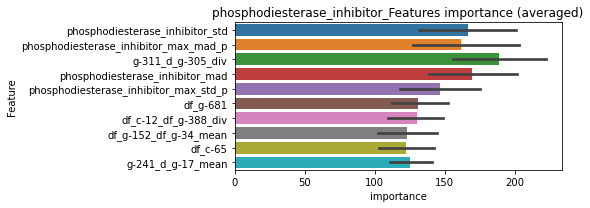

len(train_index) : 2388
len(valid_index) : 796
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0095146	valid_1's binary_logloss: 0.0882958


len(train_index) : 2388
len(valid_index) : 796
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00564024	valid_1's binary_logloss: 0.0859319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100643	valid_1's binary_logloss: 0.052379
[600]	training's binary_logloss: 0.00167163	valid_1's binary_logloss: 0.0368262
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0017083	valid_1's binary_logloss: 0.0367121


len(train_index) : 2388
len(valid_index) : 796
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966808	valid_1's binary_logloss: 0.0854756


len(train_index) : 2388
len(valid_index) : 796
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00349428	valid_1's binary_logloss: 0.0825303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993072	valid_1's binary_logloss: 0.058928
[600]	training's binary_logloss: 0.00159348	valid_1's binary_logloss: 0.0417118
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00159348	valid_1's binary_logloss: 0.0417118


phosphodiesterase_inhibitor logloss: 0.061721544817273606


neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108614	valid_1's binary_logloss: 0.0224436
[600]	training's binary_logloss: 0.00134252	valid_1's binary_logloss: 0.00652114
[900]	training's binary_logloss: 0.00061288	valid_1's binary_logloss: 0.00441614
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000566447	valid_1's binary_logloss: 0.00426843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105932	valid_1's binary_logloss: 0.038051
[600]	training's binary_logloss: 0.00130233	valid_1's binary_logloss: 0.0183485
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000625384	valid_1's binary_logloss: 0.0159758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110047	valid_1's binary_logloss: 0.0244438
[600]	training's binary_logloss: 0.00135732	valid_1's binary_logloss: 0.00838597
[900]	training's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0066403, Threshold: 0.0464898, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.03254, conf_1:0.06044
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0464898
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_2: 0.0964898
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_3: 0.1464898
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1964898
threshold: 0.1964898, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968789	valid_1's binary_logloss: 0.0199796
[600]	training's binary_logloss: 0.00124407	valid_1's binary_logloss: 0.00516775
[900]	training's binary_logloss: 0.000576809	valid_1's binary_logloss: 0.00331527
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000538295	valid_1's binary_logloss: 0.00323867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891118	valid_1's binary_logloss: 0.0342005
[600]	training's binary_logloss: 0.00114653	valid_1's binary_logloss: 0.0157897
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000853735	valid_1's binary_logloss: 0.0146515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100144	valid_1's binary_logloss: 0.0206035
[600]	training's binary_logloss: 0.00122794	valid_1's binary_logloss: 0.00579094
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0499189, Threshold: 0.1964898, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0050226 Vs.target_rate: 0.00105, Num_p_label: 20.0, conf_0:0.15719, conf_1:0.23579
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_1: 0.1964898
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.2464898
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_3: 0.2964898
threshold: 0.2964898, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00957913	valid_1's binary_logloss: 0.0276165
[600]	training's binary_logloss: 0.00118963	valid_1's binary_logloss: 0.0107594
[900]	training's binary_logloss: 0.000551033	valid_1's binary_logloss: 0.00894064
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000565282	valid_1's binary_logloss: 0.00890627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00936632	valid_1's binary_logloss: 0.0227913
[600]	training's binary_logloss: 0.00119102	valid_1's binary_logloss: 0.00724935
[900]	training's binary_logloss: 0.000560802	valid_1's binary_logloss: 0.00534029
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000569618	valid_1's binary_logloss: 0.0053296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00935986	valid_1's binary_logloss: 0.0186468
[600]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0513092, Threshold: 0.2964898, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00105, Num_p_label: 8.0, conf_0:0.26684, conf_1:0.32614
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.2964898
threshold: 0.2964898, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


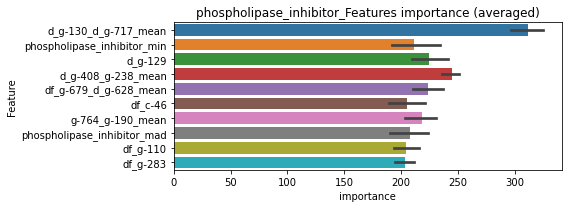

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960762	valid_1's binary_logloss: 0.0256212
[600]	training's binary_logloss: 0.0011904	valid_1's binary_logloss: 0.0101777
[900]	training's binary_logloss: 0.000563387	valid_1's binary_logloss: 0.008273
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000568807	valid_1's binary_logloss: 0.00823327


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931696	valid_1's binary_logloss: 0.0221272
[600]	training's binary_logloss: 0.00118999	valid_1's binary_logloss: 0.00712686
[900]	training's binary_logloss: 0.000570133	valid_1's binary_logloss: 0.00538658
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000561894	valid_1's binary_logloss: 0.00535359


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087699	valid_1's binary_logloss: 0.0176454
[600]	training's binary_logloss: 0.00116162	valid_1's binary_logloss: 0.00605446
[900]	training's binary_logloss: 0.000566166	valid_1's binary_logloss: 0.00447119
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000519259	valid_1's binary_logloss: 0.00426287


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091869	valid_1's binary_logloss: 0.0210291
[600]	training's binary_logloss: 0.00119498	valid_1's binary_logloss: 0.00735118
[900]	training's binary_logloss: 0.000570891	valid_1's binary_logloss: 0.00568987
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000528934	valid_1's binary_logloss: 0.00554055


phospholipase_inhibitor logloss: 0.00585119832729135


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0521892	valid_1's binary_logloss: 0.210165
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.0129393	valid_1's binary_logloss: 0.184001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0576171	valid_1's binary_logloss: 0.200639
[600]	training's binary_logloss: 0.0122912	valid_1's binary_logloss: 0.166783
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00935434	valid_1's binary_logloss: 0.165292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0568946	valid_1's binary_logloss: 0.218237
[600]	training's binary_logloss: 0.0120241	valid_1's binary_logloss: 0.191901
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00884325	valid_1's binary_logloss: 0.190074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_l

1 / 3 AUC score:0.950
y_Threshold: 0.0801329, Threshold: 0.2722862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 301 → Positive_corect_labels: 567/3613
p_label_rate: 0.0100452 Vs.target_rate: 0.00634, Num_p_label: 40.0, conf_0:0.19060, conf_1:0.35397
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.2722862
Num_p_label: 23.0, Expected: 25.2, Adj_threshold_2: 0.3222862
threshold: 0.3222862, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 567.0/3613, y_label_rate: 0.1569333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286129	valid_1's binary_logloss: 0.153932
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00611695	valid_1's binary_logloss: 0.134925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308824	valid_1's binary_logloss: 0.12052
[600]	training's binary_logloss: 0.00512747	valid_1's binary_logloss: 0.0932465
[900]	training's binary_logloss: 0.00182696	valid_1's binary_logloss: 0.0888325
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.00183675	valid_1's binary_logloss: 0.0887838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302646	valid_1's binary_logloss: 0.123495
[600]	training's binary_logloss: 0.005	valid_1's binary_logloss: 0.0864436
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.00205227	valid_1's binary_logloss: 0.0810519
Train

2 / 3 AUC score:0.979
y_Threshold: 0.1309802, Threshold: 0.3222862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 510.0/3499
p_label_rate: 0.0253641 Vs.target_rate: 0.00634, Num_p_label: 101.0, conf_0:0.25783, conf_1:0.38674
Num_p_label: 101.0, Expected: 25.2, Adj_threshold_1: 0.3222862
Num_p_label: 83.0, Expected: 25.2, Adj_threshold_2: 0.3722862
Num_p_label: 76.0, Expected: 25.2, Adj_threshold_3: 0.4222862
Num_p_label: 64.0, Expected: 25.2, Adj_threshold_4: 0.4722862
Num_p_label: 54.0, Expected: 25.2, Adj_threshold_5: 0.5222862
Num_p_label: 47.0, Expected: 25.2, Adj_threshold_6: 0.5722862
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_7: 0.6222862
Num_p_label: 30.0, Expected: 25.2, Adj_threshold_8: 0.6722862
threshold: 0.6722862, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 510.0/3499, y_label_rate: 0.1457559
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211956	valid_1's binary_logloss: 0.118664
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00481065	valid_1's binary_logloss: 0.099791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209342	valid_1's binary_logloss: 0.0926861
[600]	training's binary_logloss: 0.003272	valid_1's binary_logloss: 0.0609159
[900]	training's binary_logloss: 0.00129069	valid_1's binary_logloss: 0.0548437
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.001304	valid_1's binary_logloss: 0.0547098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207009	valid_1's binary_logloss: 0.0913693
[600]	training's binary_logloss: 0.00323678	valid_1's binary_logloss: 0.0689425
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00209281	valid_1's binary_logloss: 0.0672565
T

3 / 3 AUC score:0.990
y_Threshold: 0.1277000, Threshold: 0.6722862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 474.0/3427
p_label_rate: 0.0158212 Vs.target_rate: 0.00634, Num_p_label: 63.0, conf_0:0.50000, conf_1:0.73951
Num_p_label: 63.0, Expected: 25.2, Adj_threshold_1: 0.6722862
Num_p_label: 58.0, Expected: 25.2, Adj_threshold_2: 0.7222862
Num_p_label: 44.0, Expected: 25.2, Adj_threshold_3: 0.7722862
threshold: 0.7722862, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 474.0/3427, y_label_rate: 0.1383134


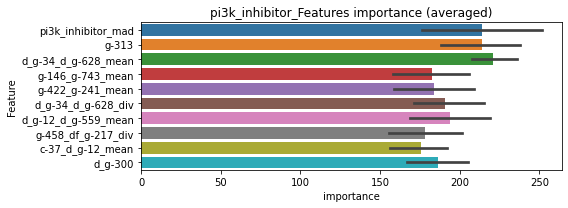

len(train_index) : 2570
len(valid_index) : 857
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166932	valid_1's binary_logloss: 0.0851313
[600]	training's binary_logloss: 0.00245997	valid_1's binary_logloss: 0.0541162
[900]	training's binary_logloss: 0.00105373	valid_1's binary_logloss: 0.0476052
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000885001	valid_1's binary_logloss: 0.0461814


len(train_index) : 2570
len(valid_index) : 857
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170812	valid_1's binary_logloss: 0.0596924
[600]	training's binary_logloss: 0.00265158	valid_1's binary_logloss: 0.0340384
[900]	training's binary_logloss: 0.00111616	valid_1's binary_logloss: 0.0288761
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000906573	valid_1's binary_logloss: 0.0279834


len(train_index) : 2570
len(valid_index) : 857
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161158	valid_1's binary_logloss: 0.076853
[600]	training's binary_logloss: 0.00254028	valid_1's binary_logloss: 0.0547649
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00146394	valid_1's binary_logloss: 0.0517765


len(train_index) : 2571
len(valid_index) : 856
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153324	valid_1's binary_logloss: 0.0920219
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00397413	valid_1's binary_logloss: 0.0763646


pi3k_inhibitor logloss: 0.05056894372138966


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113739	valid_1's binary_logloss: 0.0400287
[600]	training's binary_logloss: 0.00146407	valid_1's binary_logloss: 0.0217394
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000800879	valid_1's binary_logloss: 0.0194535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126922	valid_1's binary_logloss: 0.0412571
[600]	training's binary_logloss: 0.00155119	valid_1's binary_logloss: 0.0214661
[900]	training's binary_logloss: 0.000679851	valid_1's binary_logloss: 0.0178119
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.000585433	valid_1's binary_logloss: 0.0173152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120226	valid_1's binary_logloss: 0.0279769
[600]	training's binary_logloss: 0.00151879	valid_1's binary_logloss: 0.0100098
[900]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0089524, Threshold: 0.0446892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.03128, conf_1:0.05810
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0446892
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_2: 0.0946892
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.1446892
threshold: 0.1446892, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971757	valid_1's binary_logloss: 0.0334533
[600]	training's binary_logloss: 0.00130613	valid_1's binary_logloss: 0.0187905
[900]	training's binary_logloss: 0.0006059	valid_1's binary_logloss: 0.0166041
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000616488	valid_1's binary_logloss: 0.0165203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103721	valid_1's binary_logloss: 0.036042
[600]	training's binary_logloss: 0.00131735	valid_1's binary_logloss: 0.0184565
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000638799	valid_1's binary_logloss: 0.0167337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105956	valid_1's binary_logloss: 0.0221886
[600]	training's binary_logloss: 0.00134666	valid_1's binary_logloss: 0.00704161
[900]	training's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0638990, Threshold: 0.1446892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0080362 Vs.target_rate: 0.00130, Num_p_label: 32.0, conf_0:0.11575, conf_1:0.17363
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_1: 0.1446892
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_2: 0.1946892
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_3: 0.2446892
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_4: 0.2946892
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_5: 0.3446892
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_6: 0.3946892
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_7: 0.4446892
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_8: 0.4946892
threshold: 0.4946892, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00992213	valid_1's binary_logloss: 0.0358837
[600]	training's binary_logloss: 0.0012935	valid_1's binary_logloss: 0.0199689
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000718901	valid_1's binary_logloss: 0.0180006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104787	valid_1's binary_logloss: 0.0270992
[600]	training's binary_logloss: 0.00131641	valid_1's binary_logloss: 0.0101529
[900]	training's binary_logloss: 0.000612699	valid_1's binary_logloss: 0.00826406
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.0005985	valid_1's binary_logloss: 0.00817473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106931	valid_1's binary_logloss: 0.023513
[600]	training's binary_logloss: 0.0013592	valid_1's binary_logloss: 0.00606308
[900]	training's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0657255, Threshold: 0.4946892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0022602 Vs.target_rate: 0.00130, Num_p_label: 9.0, conf_0:0.44522, conf_1:0.54416
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.4946892
threshold: 0.4946892, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


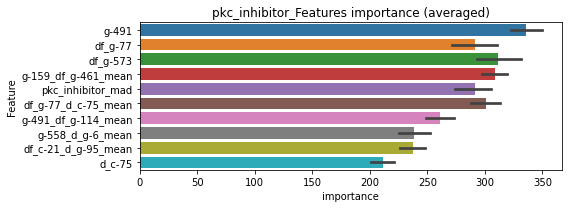

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102805	valid_1's binary_logloss: 0.0268685
[600]	training's binary_logloss: 0.00131831	valid_1's binary_logloss: 0.00887364
[900]	training's binary_logloss: 0.000607161	valid_1's binary_logloss: 0.00662094
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000582182	valid_1's binary_logloss: 0.00644994


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00990353	valid_1's binary_logloss: 0.0304134
[600]	training's binary_logloss: 0.00129057	valid_1's binary_logloss: 0.0146367
[900]	training's binary_logloss: 0.000602134	valid_1's binary_logloss: 0.0120541
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000561024	valid_1's binary_logloss: 0.0118439


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0099291	valid_1's binary_logloss: 0.0325837
[600]	training's binary_logloss: 0.00127883	valid_1's binary_logloss: 0.0138786
[900]	training's binary_logloss: 0.000590874	valid_1's binary_logloss: 0.0104589
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000559026	valid_1's binary_logloss: 0.0103585


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101881	valid_1's binary_logloss: 0.0255231
[600]	training's binary_logloss: 0.00131701	valid_1's binary_logloss: 0.0102357
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000745711	valid_1's binary_logloss: 0.0081896


pkc_inhibitor logloss: 0.009213873817782088


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226186	valid_1's binary_logloss: 0.0789372
[600]	training's binary_logloss: 0.00321751	valid_1's binary_logloss: 0.0458317
[900]	training's binary_logloss: 0.00118944	valid_1's binary_logloss: 0.0404621
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00113209	valid_1's binary_logloss: 0.0402105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227198	valid_1's binary_logloss: 0.0664672
[600]	training's binary_logloss: 0.00319366	valid_1's binary_logloss: 0.0345118
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00133114	valid_1's binary_logloss: 0.0298254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236295	valid_1's binary_logloss: 0.0623853
[600]	training's binary_logloss: 0.00330225	valid_1's binary_logloss: 0.0287591
[900]	training's binary_loglos

1 / 3 AUC score:0.998
y_Threshold: 0.0230476, Threshold: 0.1361179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.09528, conf_1:0.17695
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.1361179
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_2: 0.1861179
Num_p_label: 20.0, Expected: 9.2, Adj_threshold_3: 0.2361179
threshold: 0.2361179, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187931	valid_1's binary_logloss: 0.0628948
[600]	training's binary_logloss: 0.00261076	valid_1's binary_logloss: 0.0346012
[900]	training's binary_logloss: 0.00103725	valid_1's binary_logloss: 0.0302143
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000803806	valid_1's binary_logloss: 0.0295227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198563	valid_1's binary_logloss: 0.0487428
[600]	training's binary_logloss: 0.00267955	valid_1's binary_logloss: 0.0196689
[900]	training's binary_logloss: 0.00106085	valid_1's binary_logloss: 0.0144062
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000757562	valid_1's binary_logloss: 0.013241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190454	valid_1's binary_logloss: 0.0579671
[600]	training's binary_log

2 / 3 AUC score:0.998
y_Threshold: 0.1279104, Threshold: 0.2361179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3781
p_label_rate: 0.0165746 Vs.target_rate: 0.00231, Num_p_label: 66.0, conf_0:0.18889, conf_1:0.28334
Num_p_label: 66.0, Expected: 9.2, Adj_threshold_1: 0.2361179
Num_p_label: 52.0, Expected: 9.2, Adj_threshold_2: 0.2861179
Num_p_label: 42.0, Expected: 9.2, Adj_threshold_3: 0.3361179
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_4: 0.3861179
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_5: 0.4361179
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_6: 0.4861179
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_7: 0.5361179
Num_p_label: 17.0, Expected: 9.2, Adj_threshold_8: 0.5861179
threshold: 0.5861179, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3781, y_label_rate: 0.1703253
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187335	valid_1's binary_logloss: 0.0565853
[600]	training's binary_logloss: 0.00259167	valid_1's binary_logloss: 0.0255612
[900]	training's binary_logloss: 0.0010136	valid_1's binary_logloss: 0.0195044
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.000769333	valid_1's binary_logloss: 0.0181592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185842	valid_1's binary_logloss: 0.0562689
[600]	training's binary_logloss: 0.00249945	valid_1's binary_logloss: 0.0293956
[900]	training's binary_logloss: 0.00100226	valid_1's binary_logloss: 0.0249612
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000809242	valid_1's binary_logloss: 0.0240714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183813	valid_1's binary_logloss: 0.0473487
[600]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.1058185, Threshold: 0.5861179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0055249 Vs.target_rate: 0.00231, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.64473
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_1: 0.5861179
threshold: 0.5861179, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 640.0/3773, y_label_rate: 0.1696263


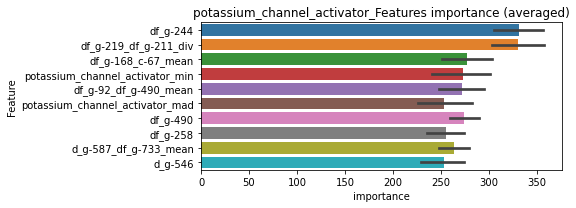

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180808	valid_1's binary_logloss: 0.0596036
[600]	training's binary_logloss: 0.00241338	valid_1's binary_logloss: 0.0304028
[900]	training's binary_logloss: 0.000974516	valid_1's binary_logloss: 0.0262702
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00098416	valid_1's binary_logloss: 0.0261742


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172594	valid_1's binary_logloss: 0.0677622
[600]	training's binary_logloss: 0.00237479	valid_1's binary_logloss: 0.0399695
[900]	training's binary_logloss: 0.000967052	valid_1's binary_logloss: 0.0358527
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.00091954	valid_1's binary_logloss: 0.0355297


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185143	valid_1's binary_logloss: 0.0596258
[600]	training's binary_logloss: 0.0024859	valid_1's binary_logloss: 0.0311081
[900]	training's binary_logloss: 0.000985497	valid_1's binary_logloss: 0.0256324
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000951708	valid_1's binary_logloss: 0.0254708


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181417	valid_1's binary_logloss: 0.0469195
[600]	training's binary_logloss: 0.00248413	valid_1's binary_logloss: 0.0189928
[900]	training's binary_logloss: 0.000994037	valid_1's binary_logloss: 0.0147844
[1200]	training's binary_logloss: 0.000719561	valid_1's binary_logloss: 0.0134973
Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.000708747	valid_1's binary_logloss: 0.0134072


potassium_channel_activator logloss: 0.025152638542687802


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350797	valid_1's binary_logloss: 0.127749
[600]	training's binary_logloss: 0.00594026	valid_1's binary_logloss: 0.0992363
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00402233	valid_1's binary_logloss: 0.0979443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0348717	valid_1's binary_logloss: 0.138396
[600]	training's binary_logloss: 0.00571505	valid_1's binary_logloss: 0.109924
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00296408	valid_1's binary_logloss: 0.107888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0348055	valid_1's binary_logloss: 0.123489
[600]	training's binary_logloss: 0.0059766	valid_1's binary_logloss: 0.0917675
[900]	training's binary_logloss: 0.00197331	valid_1's binary_logloss: 0.0862984
Early stopping, best iteration is:
[

1 / 3 AUC score:0.985
y_Threshold: 0.0273533, Threshold: 0.0951981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 624/3739
p_label_rate: 0.0100452 Vs.target_rate: 0.00412, Num_p_label: 40.0, conf_0:0.06664, conf_1:0.12376
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0951981
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_2: 0.1451981
threshold: 0.1451981, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 624.0/3739, y_label_rate: 0.1668895
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282365	valid_1's binary_logloss: 0.102231
[600]	training's binary_logloss: 0.00432819	valid_1's binary_logloss: 0.0708374
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00206086	valid_1's binary_logloss: 0.0671148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0276644	valid_1's binary_logloss: 0.0901779
[600]	training's binary_logloss: 0.00419951	valid_1's binary_logloss: 0.0532522
[900]	training's binary_logloss: 0.00151861	valid_1's binary_logloss: 0.0460049
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.00123093	valid_1's binary_logloss: 0.045346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286777	valid_1's binary_logloss: 0.0966687
[600]	training's binary_logloss: 0.00443035	valid_1's binary_logloss: 0.0625722
Early stopping, best iteration 

2 / 3 AUC score:0.995
y_Threshold: 0.0668646, Threshold: 0.1451981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 601.0/3693
p_label_rate: 0.0118031 Vs.target_rate: 0.00412, Num_p_label: 47.0, conf_0:0.11616, conf_1:0.17424
Num_p_label: 47.0, Expected: 16.4, Adj_threshold_1: 0.1451981
Num_p_label: 35.0, Expected: 16.4, Adj_threshold_2: 0.1951981
Num_p_label: 26.0, Expected: 16.4, Adj_threshold_3: 0.2451981
Num_p_label: 20.0, Expected: 16.4, Adj_threshold_4: 0.2951981
threshold: 0.2951981, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 601.0/3693, y_label_rate: 0.1627403
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224002	valid_1's binary_logloss: 0.0920132
[600]	training's binary_logloss: 0.0034489	valid_1's binary_logloss: 0.0594476
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00149309	valid_1's binary_logloss: 0.0547849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245483	valid_1's binary_logloss: 0.0710408
[600]	training's binary_logloss: 0.00374085	valid_1's binary_logloss: 0.0353929
[900]	training's binary_logloss: 0.00138372	valid_1's binary_logloss: 0.0292259
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.00107333	valid_1's binary_logloss: 0.0280154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245395	valid_1's binary_logloss: 0.0953089
[600]	training's binary_logloss: 0.003691	valid_1's binary_logloss: 0.0697377
Early stopping, best iteration i

3 / 3 AUC score:0.997
y_Threshold: 0.0582431, Threshold: 0.2951981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 578.0/3647
p_label_rate: 0.0060271 Vs.target_rate: 0.00412, Num_p_label: 24.0, conf_0:0.26568, conf_1:0.32472
threshold: 0.2951981, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 578.0/3647, y_label_rate: 0.1584864


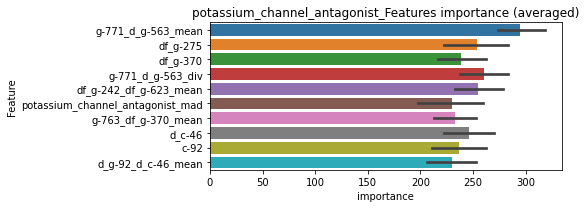

len(train_index) : 2735
len(valid_index) : 912
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226673	valid_1's binary_logloss: 0.0861515
[600]	training's binary_logloss: 0.00324023	valid_1's binary_logloss: 0.0490964
[900]	training's binary_logloss: 0.0012387	valid_1's binary_logloss: 0.0405871
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000926142	valid_1's binary_logloss: 0.0383921


len(train_index) : 2735
len(valid_index) : 912
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02177	valid_1's binary_logloss: 0.0763461
[600]	training's binary_logloss: 0.00314828	valid_1's binary_logloss: 0.0456037
[900]	training's binary_logloss: 0.00124176	valid_1's binary_logloss: 0.041675
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.0013048	valid_1's binary_logloss: 0.0415669


len(train_index) : 2735
len(valid_index) : 912
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0224916	valid_1's binary_logloss: 0.0786298
[600]	training's binary_logloss: 0.00331155	valid_1's binary_logloss: 0.0512857
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00175771	valid_1's binary_logloss: 0.0485564


len(train_index) : 2736
len(valid_index) : 911
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214349	valid_1's binary_logloss: 0.0925193
[600]	training's binary_logloss: 0.00306765	valid_1's binary_logloss: 0.0676003
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00192216	valid_1's binary_logloss: 0.0660915


potassium_channel_antagonist logloss: 0.048646944100079054


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362837	valid_1's binary_logloss: 0.173165
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.0120251	valid_1's binary_logloss: 0.154152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0420677	valid_1's binary_logloss: 0.139591
[600]	training's binary_logloss: 0.00732482	valid_1's binary_logloss: 0.100424
[900]	training's binary_logloss: 0.00235184	valid_1's binary_logloss: 0.093776
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00235184	valid_1's binary_logloss: 0.093776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0425148	valid_1's binary_logloss: 0.131771
[600]	training's binary_logloss: 0.00776361	valid_1's binary_logloss: 0.0946969
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00370321	valid_1's binary_logloss: 0.0879562
Tra

1 / 3 AUC score:0.978
y_Threshold: 0.0549723, Threshold: 0.2312512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 220 → Positive_corect_labels: 611/3713
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.16188, conf_1:0.30063
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.2312512
Num_p_label: 33.0, Expected: 19.2, Adj_threshold_2: 0.2812512
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_3: 0.3312512
threshold: 0.3312512, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 611.0/3713, y_label_rate: 0.1645570
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271859	valid_1's binary_logloss: 0.0919095
[600]	training's binary_logloss: 0.00419107	valid_1's binary_logloss: 0.0546333
[900]	training's binary_logloss: 0.00147984	valid_1's binary_logloss: 0.0467611
Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.000994731	valid_1's binary_logloss: 0.0446741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0241142	valid_1's binary_logloss: 0.124175
[600]	training's binary_logloss: 0.00363817	valid_1's binary_logloss: 0.10532
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00351626	valid_1's binary_logloss: 0.104973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274739	valid_1's binary_logloss: 0.104407
[600]	training's binary_logloss: 0.00412641	valid_1's binary_logloss: 0.0727663
Early stopping, best iteration is

2 / 3 AUC score:0.993
y_Threshold: 0.1168277, Threshold: 0.3312512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 576.0/3643
p_label_rate: 0.0223506 Vs.target_rate: 0.00483, Num_p_label: 89.0, conf_0:0.26500, conf_1:0.39750
Num_p_label: 89.0, Expected: 19.2, Adj_threshold_1: 0.3312512
Num_p_label: 83.0, Expected: 19.2, Adj_threshold_2: 0.3812512
Num_p_label: 71.0, Expected: 19.2, Adj_threshold_3: 0.4312512
Num_p_label: 65.0, Expected: 19.2, Adj_threshold_4: 0.4812512
Num_p_label: 61.0, Expected: 19.2, Adj_threshold_5: 0.5312512
Num_p_label: 56.0, Expected: 19.2, Adj_threshold_6: 0.5812512
Num_p_label: 51.0, Expected: 19.2, Adj_threshold_7: 0.6312512
Num_p_label: 44.0, Expected: 19.2, Adj_threshold_8: 0.6812512
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_9: 0.7312512
Num_p_label: 37.0, Expected: 19.2, Adj_threshold_10: 0.7812512
threshold: 0.7812512, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 576.0/3643, y_label_rate: 0.1581114

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201646	valid_1's binary_logloss: 0.0651743
[600]	training's binary_logloss: 0.00305881	valid_1's binary_logloss: 0.0380535
[900]	training's binary_logloss: 0.00118417	valid_1's binary_logloss: 0.0328244
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000929364	valid_1's binary_logloss: 0.031734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0200975	valid_1's binary_logloss: 0.0906636
[600]	training's binary_logloss: 0.00295294	valid_1's binary_logloss: 0.0660184
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00135164	valid_1's binary_logloss: 0.0616556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192583	valid_1's binary_logloss: 0.101305
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00492072	valid_1's binary_logloss: 0.087

3 / 3 AUC score:0.991
y_Threshold: 0.1099903, Threshold: 0.7812512, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 542.0/3575
p_label_rate: 0.0160723 Vs.target_rate: 0.00483, Num_p_label: 64.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 64.0, Expected: 19.2, Adj_threshold_1: 0.7812512
threshold: 0.7812512, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 542.0/3575, y_label_rate: 0.1516084


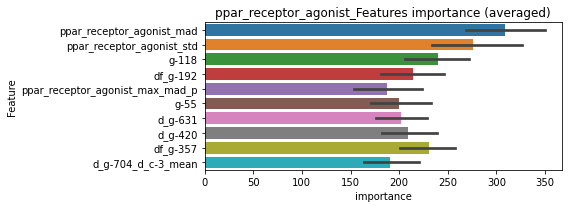

len(train_index) : 2681
len(valid_index) : 894
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015047	valid_1's binary_logloss: 0.0708135
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00250016	valid_1's binary_logloss: 0.0511089


len(train_index) : 2681
len(valid_index) : 894
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148103	valid_1's binary_logloss: 0.0729651
[600]	training's binary_logloss: 0.00213111	valid_1's binary_logloss: 0.0516083
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.0015375	valid_1's binary_logloss: 0.0496464


len(train_index) : 2681
len(valid_index) : 894
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147941	valid_1's binary_logloss: 0.0598015
[600]	training's binary_logloss: 0.00214775	valid_1's binary_logloss: 0.0382811
[900]	training's binary_logloss: 0.000940165	valid_1's binary_logloss: 0.0341465
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000790898	valid_1's binary_logloss: 0.0335208


len(train_index) : 2682
len(valid_index) : 893
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150296	valid_1's binary_logloss: 0.060497
[600]	training's binary_logloss: 0.00217537	valid_1's binary_logloss: 0.0348803
[900]	training's binary_logloss: 0.000950498	valid_1's binary_logloss: 0.0305767
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000915954	valid_1's binary_logloss: 0.0302973


ppar_receptor_agonist logloss: 0.04114637333837453


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848543	valid_1's binary_logloss: 0.0271622
[600]	training's binary_logloss: 0.00116577	valid_1's binary_logloss: 0.0133539
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000587925	valid_1's binary_logloss: 0.011357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835204	valid_1's binary_logloss: 0.0269664
[600]	training's binary_logloss: 0.00114709	valid_1's binary_logloss: 0.0124905
[900]	training's binary_logloss: 0.000551639	valid_1's binary_logloss: 0.0102951
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000518679	valid_1's binary_logloss: 0.0101352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855953	valid_1's binary_logloss: 0.0243247
[600]	training's binary_logloss: 0.00117826	valid_1's binary_logloss: 0.010695
[900]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0088683, Threshold: 0.0318852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.02232, conf_1:0.04145
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0318852
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.0818852
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1318852
threshold: 0.1318852, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728021	valid_1's binary_logloss: 0.0239581
[600]	training's binary_logloss: 0.00100412	valid_1's binary_logloss: 0.0112124
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000541828	valid_1's binary_logloss: 0.00965835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733881	valid_1's binary_logloss: 0.0177499
[600]	training's binary_logloss: 0.00100816	valid_1's binary_logloss: 0.00551038
[900]	training's binary_logloss: 0.000501386	valid_1's binary_logloss: 0.00384221
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000487237	valid_1's binary_logloss: 0.0038267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732972	valid_1's binary_logloss: 0.0203064
[600]	training's binary_logloss: 0.00101525	valid_1's binary_logloss: 0.00770658
[900]	training's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0849022, Threshold: 0.1318852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0085384 Vs.target_rate: 0.00126, Num_p_label: 34.0, conf_0:0.10551, conf_1:0.15826
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_1: 0.1318852
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_2: 0.1818852
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_3: 0.2318852
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_4: 0.2818852
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.3318852
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_6: 0.3818852
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_7: 0.4318852
threshold: 0.4318852, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716014	valid_1's binary_logloss: 0.0238498
[600]	training's binary_logloss: 0.000992795	valid_1's binary_logloss: 0.010197
[900]	training's binary_logloss: 0.000508357	valid_1's binary_logloss: 0.00877677
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000506274	valid_1's binary_logloss: 0.00874677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00731774	valid_1's binary_logloss: 0.022668
[600]	training's binary_logloss: 0.00100607	valid_1's binary_logloss: 0.00998719
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000551936	valid_1's binary_logloss: 0.00849807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734335	valid_1's binary_logloss: 0.0215531
[600]	training's binary_logloss: 0.00100761	valid_1's binary_logloss: 0.00810195
Early stopping, best

3 / 3 AUC score:1.000
y_Threshold: 0.1165603, Threshold: 0.4318852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00126, Num_p_label: 14.0, conf_0:0.38870, conf_1:0.47507
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.4318852
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.4818852
threshold: 0.4818852, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


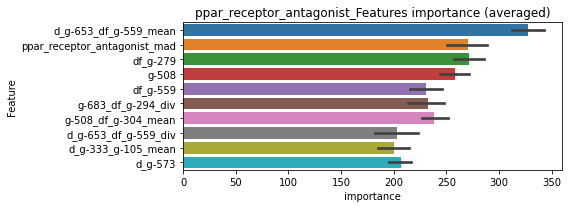

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720875	valid_1's binary_logloss: 0.020772
[600]	training's binary_logloss: 0.000984969	valid_1's binary_logloss: 0.00732373
[900]	training's binary_logloss: 0.00050039	valid_1's binary_logloss: 0.00570603
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00050039	valid_1's binary_logloss: 0.00570603


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729996	valid_1's binary_logloss: 0.0240625
[600]	training's binary_logloss: 0.000992342	valid_1's binary_logloss: 0.0108726
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000588235	valid_1's binary_logloss: 0.00964987


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708552	valid_1's binary_logloss: 0.027501
[600]	training's binary_logloss: 0.00096729	valid_1's binary_logloss: 0.0124399
[900]	training's binary_logloss: 0.000494546	valid_1's binary_logloss: 0.0102102
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000494546	valid_1's binary_logloss: 0.0102102


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00714068	valid_1's binary_logloss: 0.0260386
[600]	training's binary_logloss: 0.000979866	valid_1's binary_logloss: 0.0121732
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00058888	valid_1's binary_logloss: 0.0106083


ppar_receptor_antagonist logloss: 0.009043593389670698


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403328	valid_1's binary_logloss: 0.163922
[600]	training's binary_logloss: 0.00747854	valid_1's binary_logloss: 0.142076
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00744271	valid_1's binary_logloss: 0.141916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410666	valid_1's binary_logloss: 0.142487
[600]	training's binary_logloss: 0.00757445	valid_1's binary_logloss: 0.111347
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00316534	valid_1's binary_logloss: 0.105968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423781	valid_1's binary_logloss: 0.13243
[600]	training's binary_logloss: 0.00773051	valid_1's binary_logloss: 0.0971739
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.00315659	valid_1's binary_logloss: 0.0911333
Tra

1 / 3 AUC score:0.979
y_Threshold: 0.0394653, Threshold: 0.4020588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 217 → Positive_corect_labels: 611/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00500, Num_p_label: 40.0, conf_0:0.28144, conf_1:0.52268
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.4020588
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_2: 0.4520588
threshold: 0.4520588, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 611.0/3707, y_label_rate: 0.1648233
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274739	valid_1's binary_logloss: 0.100767
[600]	training's binary_logloss: 0.0043487	valid_1's binary_logloss: 0.0736215
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00189754	valid_1's binary_logloss: 0.0700898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289513	valid_1's binary_logloss: 0.0967532
[600]	training's binary_logloss: 0.00454232	valid_1's binary_logloss: 0.0619044
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00184593	valid_1's binary_logloss: 0.0553926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273194	valid_1's binary_logloss: 0.100375
[600]	training's binary_logloss: 0.00439532	valid_1's binary_logloss: 0.0651842
[900]	training's binary_logloss: 0.00158074	valid_1's binary_logloss: 0.0591518
Early stopping, best iteration is

2 / 3 AUC score:0.991
y_Threshold: 0.0839323, Threshold: 0.4520588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 583.0/3651
p_label_rate: 0.0210949 Vs.target_rate: 0.00500, Num_p_label: 84.0, conf_0:0.36165, conf_1:0.54247
Num_p_label: 84.0, Expected: 19.9, Adj_threshold_1: 0.4520588
Num_p_label: 74.0, Expected: 19.9, Adj_threshold_2: 0.5020588
Num_p_label: 65.0, Expected: 19.9, Adj_threshold_3: 0.5520588
Num_p_label: 56.0, Expected: 19.9, Adj_threshold_4: 0.6020588
Num_p_label: 48.0, Expected: 19.9, Adj_threshold_5: 0.6520588
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_6: 0.7020588
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_7: 0.7520588
threshold: 0.7520588, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 583.0/3651, y_label_rate: 0.1596823
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216542	valid_1's binary_logloss: 0.0914035
[600]	training's binary_logloss: 0.00335728	valid_1's binary_logloss: 0.0636058
[900]	training's binary_logloss: 0.00129364	valid_1's binary_logloss: 0.0582637
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.0013763	valid_1's binary_logloss: 0.0580102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229928	valid_1's binary_logloss: 0.0877693
[600]	training's binary_logloss: 0.00345277	valid_1's binary_logloss: 0.0608132
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00167697	valid_1's binary_logloss: 0.0577817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235053	valid_1's binary_logloss: 0.0885357
[600]	training's binary_logloss: 0.00364296	valid_1's binary_logloss: 0.0581458
[900]	training's binary_logloss

3 / 3 AUC score:0.994
y_Threshold: 0.0705358, Threshold: 0.7520588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 567.0/3619
p_label_rate: 0.0143144 Vs.target_rate: 0.00500, Num_p_label: 57.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 57.0, Expected: 19.9, Adj_threshold_1: 0.7520588
threshold: 0.7520588, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 567.0/3619, y_label_rate: 0.1566731


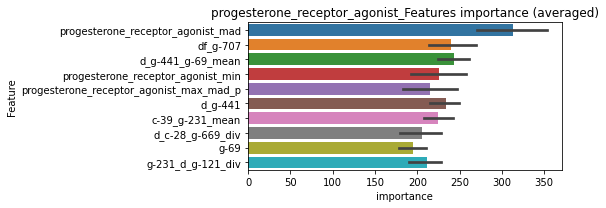

len(train_index) : 2714
len(valid_index) : 905
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183846	valid_1's binary_logloss: 0.0861182
[600]	training's binary_logloss: 0.00274756	valid_1's binary_logloss: 0.0682844
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00189028	valid_1's binary_logloss: 0.0677011


len(train_index) : 2714
len(valid_index) : 905
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204464	valid_1's binary_logloss: 0.1007
[600]	training's binary_logloss: 0.00299599	valid_1's binary_logloss: 0.0823114
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00243195	valid_1's binary_logloss: 0.0808844


len(train_index) : 2714
len(valid_index) : 905
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208885	valid_1's binary_logloss: 0.0565062
[600]	training's binary_logloss: 0.00327932	valid_1's binary_logloss: 0.0280067
[900]	training's binary_logloss: 0.00128418	valid_1's binary_logloss: 0.022526
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.0012612	valid_1's binary_logloss: 0.0225217


len(train_index) : 2715
len(valid_index) : 904
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205008	valid_1's binary_logloss: 0.0812851
[600]	training's binary_logloss: 0.00313861	valid_1's binary_logloss: 0.0550137
[900]	training's binary_logloss: 0.00122037	valid_1's binary_logloss: 0.0496906
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.00104933	valid_1's binary_logloss: 0.0491622


progesterone_receptor_agonist logloss: 0.05506896989264725


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00581999	valid_1's binary_logloss: 0.0126385
[600]	training's binary_logloss: 0.000738628	valid_1's binary_logloss: 0.00439419
[900]	training's binary_logloss: 0.000412069	valid_1's binary_logloss: 0.00346174
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000410178	valid_1's binary_logloss: 0.00345322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576107	valid_1's binary_logloss: 0.0147748
[600]	training's binary_logloss: 0.00073333	valid_1's binary_logloss: 0.00613174
[900]	training's binary_logloss: 0.000408686	valid_1's binary_logloss: 0.00500189
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.00040879	valid_1's binary_logloss: 0.00500021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00583242	valid_1's binary_logloss: 0.010353
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0040634, Threshold: 0.0159946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01120, conf_1:0.02079
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0159946
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0659946
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1159946
threshold: 0.1159946, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503043	valid_1's binary_logloss: 0.00914799
[600]	training's binary_logloss: 0.000649974	valid_1's binary_logloss: 0.00221592
[900]	training's binary_logloss: 0.000367822	valid_1's binary_logloss: 0.00149662
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000367822	valid_1's binary_logloss: 0.00149662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496734	valid_1's binary_logloss: 0.0115622
[600]	training's binary_logloss: 0.000639304	valid_1's binary_logloss: 0.00345152
[900]	training's binary_logloss: 0.000373546	valid_1's binary_logloss: 0.00270925
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000373546	valid_1's binary_logloss: 0.00270925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501403	valid_1's binary_logloss: 0.00750502
[600]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.1081544, Threshold: 0.1159946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0035158 Vs.target_rate: 0.00076, Num_p_label: 14.0, conf_0:0.09280, conf_1:0.13919
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.1159946
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.1659946
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.2159946
threshold: 0.2159946, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503043	valid_1's binary_logloss: 0.00914799
[600]	training's binary_logloss: 0.000649974	valid_1's binary_logloss: 0.00221592
[900]	training's binary_logloss: 0.000367822	valid_1's binary_logloss: 0.00149662
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000367822	valid_1's binary_logloss: 0.00149662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496734	valid_1's binary_logloss: 0.0115622
[600]	training's binary_logloss: 0.000639304	valid_1's binary_logloss: 0.00345152
[900]	training's binary_logloss: 0.000373546	valid_1's binary_logloss: 0.00270925
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000373546	valid_1's binary_logloss: 0.00270925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501403	valid_1's binary_logloss: 0.00750502
[600]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.1081544, Threshold: 0.2159946, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.19440, conf_1:0.23759
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.2159946
threshold: 0.2159946, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


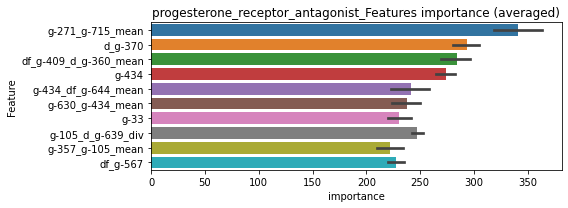

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504134	valid_1's binary_logloss: 0.0092307
[600]	training's binary_logloss: 0.00064608	valid_1's binary_logloss: 0.00212569
[900]	training's binary_logloss: 0.000367374	valid_1's binary_logloss: 0.00143423
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000364466	valid_1's binary_logloss: 0.00143085


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487215	valid_1's binary_logloss: 0.0110799
[600]	training's binary_logloss: 0.000640846	valid_1's binary_logloss: 0.00329737
[900]	training's binary_logloss: 0.000373094	valid_1's binary_logloss: 0.00255702
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000375434	valid_1's binary_logloss: 0.0025535


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506992	valid_1's binary_logloss: 0.00811099
[600]	training's binary_logloss: 0.000657926	valid_1's binary_logloss: 0.0015995
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000377479	valid_1's binary_logloss: 0.00112601


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494991	valid_1's binary_logloss: 0.0121224
[600]	training's binary_logloss: 0.000647268	valid_1's binary_logloss: 0.00362212
[900]	training's binary_logloss: 0.000370259	valid_1's binary_logloss: 0.00281472
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000370259	valid_1's binary_logloss: 0.00281472


progesterone_receptor_antagonist logloss: 0.0019825956921659445


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118871	valid_1's binary_logloss: 0.0325599
[600]	training's binary_logloss: 0.00148861	valid_1's binary_logloss: 0.0134553
[900]	training's binary_logloss: 0.000655105	valid_1's binary_logloss: 0.0107292
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000593875	valid_1's binary_logloss: 0.0105674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112813	valid_1's binary_logloss: 0.0399426
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00176773	valid_1's binary_logloss: 0.0239757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108765	valid_1's binary_logloss: 0.0439954
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00163687	valid_1's binary_logloss: 0.0309198
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.999
y_Threshold: 0.0128907, Threshold: 0.0881313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.06169, conf_1:0.11457
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0881313
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.1381313
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_3: 0.1881313
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_4: 0.2381313
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.2881313
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_6: 0.3381313
threshold: 0.3381313, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086756	valid_1's binary_logloss: 0.0352566
[600]	training's binary_logloss: 0.00115728	valid_1's binary_logloss: 0.0224582
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000762307	valid_1's binary_logloss: 0.0216288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937977	valid_1's binary_logloss: 0.0303821
[600]	training's binary_logloss: 0.0012119	valid_1's binary_logloss: 0.0161754
[900]	training's binary_logloss: 0.000576409	valid_1's binary_logloss: 0.0141561
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000577101	valid_1's binary_logloss: 0.014146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894132	valid_1's binary_logloss: 0.0338096
[600]	training's binary_logloss: 0.00117193	valid_1's binary_logloss: 0.0137974
[900]	training's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.1016376, Threshold: 0.3381313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3791
p_label_rate: 0.0090407 Vs.target_rate: 0.00151, Num_p_label: 36.0, conf_0:0.27051, conf_1:0.40576
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_1: 0.3381313
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_2: 0.3881313
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_3: 0.4381313
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_4: 0.4881313
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_5: 0.5381313
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_6: 0.5881313
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_7: 0.6381313
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_8: 0.6881313
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_9: 0.7381313
threshold: 0.7381313, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3791, y_label_rate: 0.1706674
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815547	valid_1's binary_logloss: 0.025853
[600]	training's binary_logloss: 0.00110887	valid_1's binary_logloss: 0.0111755
[900]	training's binary_logloss: 0.000549939	valid_1's binary_logloss: 0.00899302
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000540768	valid_1's binary_logloss: 0.00897227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00850787	valid_1's binary_logloss: 0.0284421
[600]	training's binary_logloss: 0.00112708	valid_1's binary_logloss: 0.0148588
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00104244	valid_1's binary_logloss: 0.0146628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825495	valid_1's binary_logloss: 0.0334331
[600]	training's binary_logloss: 0.00110269	valid_1's binary_logloss: 0.0240623
Early stopping, best ite

3 / 3 AUC score:1.000
y_Threshold: 0.1085745, Threshold: 0.7381313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 641.0/3779
p_label_rate: 0.0047715 Vs.target_rate: 0.00151, Num_p_label: 19.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.7381313
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.7881313
threshold: 0.7881313, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3779, y_label_rate: 0.1696216


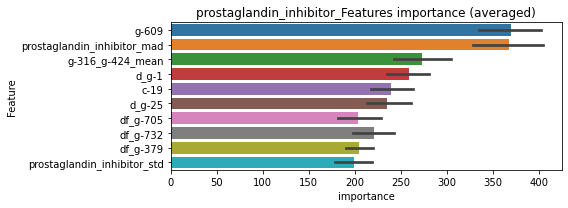

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00756454	valid_1's binary_logloss: 0.0240396
[600]	training's binary_logloss: 0.00102595	valid_1's binary_logloss: 0.010785
[900]	training's binary_logloss: 0.000527188	valid_1's binary_logloss: 0.00898485
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000534456	valid_1's binary_logloss: 0.00896188


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776169	valid_1's binary_logloss: 0.0262857
[600]	training's binary_logloss: 0.0010479	valid_1's binary_logloss: 0.0152267
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000665948	valid_1's binary_logloss: 0.0144214


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747682	valid_1's binary_logloss: 0.0338154
[600]	training's binary_logloss: 0.00102608	valid_1's binary_logloss: 0.0242558
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00109196	valid_1's binary_logloss: 0.0241654


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776784	valid_1's binary_logloss: 0.0252922
[600]	training's binary_logloss: 0.00104218	valid_1's binary_logloss: 0.0108987
[900]	training's binary_logloss: 0.000525853	valid_1's binary_logloss: 0.00885001
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000520903	valid_1's binary_logloss: 0.00882555


prostaglandin_inhibitor logloss: 0.014097114847377195


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0255077	valid_1's binary_logloss: 0.131759
[600]	training's binary_logloss: 0.00387604	valid_1's binary_logloss: 0.103439
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.0031351	valid_1's binary_logloss: 0.102592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290894	valid_1's binary_logloss: 0.102718
[600]	training's binary_logloss: 0.00437064	valid_1's binary_logloss: 0.0744604
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.00173601	valid_1's binary_logloss: 0.0709708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301016	valid_1's binary_logloss: 0.08602
[600]	training's binary_logloss: 0.00445377	valid_1's binary_logloss: 0.0529542
[900]	training's binary_logloss: 0.00154807	valid_1's binary_logloss: 0.0472307
Early stopping, best iteration is:
[9

1 / 3 AUC score:0.992
y_Threshold: 0.0245937, Threshold: 0.2842557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 637/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00353, Num_p_label: 40.0, conf_0:0.19898, conf_1:0.36953
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.2842557
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_2: 0.3342557
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_3: 0.3842557
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_4: 0.4342557
threshold: 0.4342557, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 637.0/3766, y_label_rate: 0.1691450
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213246	valid_1's binary_logloss: 0.0811866
[600]	training's binary_logloss: 0.00303114	valid_1's binary_logloss: 0.0536704
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00246381	valid_1's binary_logloss: 0.0523146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205197	valid_1's binary_logloss: 0.0842128
[600]	training's binary_logloss: 0.00290924	valid_1's binary_logloss: 0.0590868
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00162449	valid_1's binary_logloss: 0.0558064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0219823	valid_1's binary_logloss: 0.0746451
[600]	training's binary_logloss: 0.0031005	valid_1's binary_logloss: 0.0429835
[900]	training's binary_logloss: 0.00118375	valid_1's binary_logloss: 0.0375622
Early stopping, best iteration 

2 / 3 AUC score:0.997
y_Threshold: 0.0947064, Threshold: 0.4342557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 614.0/3720
p_label_rate: 0.0226017 Vs.target_rate: 0.00353, Num_p_label: 90.0, conf_0:0.34740, conf_1:0.52111
Num_p_label: 90.0, Expected: 14.0, Adj_threshold_1: 0.4342557
Num_p_label: 80.0, Expected: 14.0, Adj_threshold_2: 0.4842557
Num_p_label: 69.0, Expected: 14.0, Adj_threshold_3: 0.5342557
Num_p_label: 63.0, Expected: 14.0, Adj_threshold_4: 0.5842557
Num_p_label: 52.0, Expected: 14.0, Adj_threshold_5: 0.6342557
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_6: 0.6842557
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_7: 0.7342557
Num_p_label: 33.0, Expected: 14.0, Adj_threshold_8: 0.7842557
threshold: 0.7842557, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 614.0/3720, y_label_rate: 0.1650538
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172776	valid_1's binary_logloss: 0.0698735
[600]	training's binary_logloss: 0.00250762	valid_1's binary_logloss: 0.0493531
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00231732	valid_1's binary_logloss: 0.0489425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018862	valid_1's binary_logloss: 0.0624751
[600]	training's binary_logloss: 0.00259102	valid_1's binary_logloss: 0.0408696
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.00113319	valid_1's binary_logloss: 0.0373074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177596	valid_1's binary_logloss: 0.0611236
[600]	training's binary_logloss: 0.00254813	valid_1's binary_logloss: 0.0352332
[900]	training's binary_logloss: 0.00103165	valid_1's binary_logloss: 0.0291462
Early stopping, best iteration 

3 / 3 AUC score:0.996
y_Threshold: 0.0922925, Threshold: 0.7842557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 596.0/3684
p_label_rate: 0.0113009 Vs.target_rate: 0.00353, Num_p_label: 45.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_1: 0.7842557
threshold: 0.7842557, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 596.0/3684, y_label_rate: 0.1617807


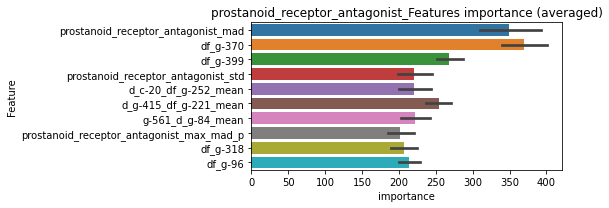

len(train_index) : 2763
len(valid_index) : 921
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159107	valid_1's binary_logloss: 0.0487271
[600]	training's binary_logloss: 0.00223488	valid_1's binary_logloss: 0.0248293
[900]	training's binary_logloss: 0.000936799	valid_1's binary_logloss: 0.0203631
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000749603	valid_1's binary_logloss: 0.0193365


len(train_index) : 2763
len(valid_index) : 921
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165781	valid_1's binary_logloss: 0.0649471
[600]	training's binary_logloss: 0.00224953	valid_1's binary_logloss: 0.0398011
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00191095	valid_1's binary_logloss: 0.0389252


len(train_index) : 2763
len(valid_index) : 921
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158563	valid_1's binary_logloss: 0.05704
[600]	training's binary_logloss: 0.00219583	valid_1's binary_logloss: 0.0376173
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00156674	valid_1's binary_logloss: 0.036399


len(train_index) : 2763
len(valid_index) : 921
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157206	valid_1's binary_logloss: 0.0606617
[600]	training's binary_logloss: 0.00216014	valid_1's binary_logloss: 0.0385004
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000991365	valid_1's binary_logloss: 0.0356702


prostanoid_receptor_antagonist logloss: 0.03258272240435842


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[24]	training's binary_logloss: 0.438754	valid_1's binary_logloss: 0.475614
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[30]	training's binary_logloss: 0.427489	valid_1's binary_logloss: 0.475062
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[40]	training's binary_logloss: 0.404855	valid_1's binary_logloss: 0.475842
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.516
y_Threshold: 0.1946713, Threshold: 0.3923960, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1271 → Positive_corect_labels: 173/2652
p_label_rate: 0.0100452 Vs.target_rate: 0.03049, Num_p_label: 40.0, conf_0:0.27468, conf_1:0.51011
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.3923960
Num_p_label: 104.0, Expected: 121.4, Adj_threshold_2: 0.3623960
Num_p_label: 133.0, Expected: 121.4, Adj_threshold_3: 0.3323960
Num_p_label: 142.0, Expected: 121.4, Adj_threshold_4: 0.3023960
Num_p_label: 146.0, Expected: 121.4, Adj_threshold_5: 0.2723960
Num_p_label: 157.0, Expected: 121.4, Adj_threshold_6: 0.2423960
Num_p_label: 249.0, Expected: 121.4, Adj_threshold_7: 0.2123960
threshold: 0.2123960, positive_p_label: 249.0/3982, p_label_rate: 0.0625314
positive_y_label: 173.0/2652, y_label_rate: 0.0652338
================= Pseudo labeling 2 / 3 =================


Early stopping, best iteration is:
[13]	training's binary_logloss: 0.452998	valid_1's binary_logloss: 0.478313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[154]	training's binary_logloss: 0.042262	valid_1's binary_logloss: 0.182892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.0771133	valid_1's binary_logloss: 0.183979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[107]	training's binary_logloss: 0.0653769	valid_1's binary_logloss: 0.190091
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.839
y_Threshold: 0.0961582, Threshold: 0.2123960, pos_neg_ratio: 0.7729121
Remove_noisy_data: 206 → Positive_corect_labels: 70.0/2446
p_label_rate: 0.0575088 Vs.target_rate: 0.03049, Num_p_label: 229.0, conf_0:0.16992, conf_1:0.25488
Num_p_label: 229.0, Expected: 121.4, Adj_threshold_1: 0.2123960
Num_p_label: 209.0, Expected: 121.4, Adj_threshold_2: 0.2623960
Num_p_label: 202.0, Expected: 121.4, Adj_threshold_3: 0.3123960
Num_p_label: 195.0, Expected: 121.4, Adj_threshold_4: 0.3623960
Num_p_label: 190.0, Expected: 121.4, Adj_threshold_5: 0.4123960
Num_p_label: 183.0, Expected: 121.4, Adj_threshold_6: 0.4623960
Num_p_label: 177.0, Expected: 121.4, Adj_threshold_7: 0.5123960
Num_p_label: 174.0, Expected: 121.4, Adj_threshold_8: 0.5623960
Num_p_label: 169.0, Expected: 121.4, Adj_threshold_9: 0.6123960
Num_p_label: 161.0, Expected: 121.4, Adj_threshold_10: 0.6623960
threshold: 0.7123960, positive_p_label: 149.0/3982, p_label_rate: 0.0374184


Early stopping, best iteration is:
[113]	training's binary_logloss: 0.0647141	valid_1's binary_logloss: 0.186108


positive_y_label: 70.0/2446, y_label_rate: 0.0286182
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00335721	valid_1's binary_logloss: 0.0447506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[119]	training's binary_logloss: 0.0126713	valid_1's binary_logloss: 0.0717535
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[117]	training's binary_logloss: 0.0141383	valid_1's binary_logloss: 0.0500174
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.977
y_Threshold: 0.0560752, Threshold: 0.7123960, pos_neg_ratio: 0.7729121
Remove_noisy_data: 48 → Positive_corect_labels: 46.0/2398
p_label_rate: 0.0462079 Vs.target_rate: 0.03049, Num_p_label: 184.0, conf_0:0.50000, conf_1:0.78364
Num_p_label: 184.0, Expected: 121.4, Adj_threshold_1: 0.7123960
Num_p_label: 181.0, Expected: 121.4, Adj_threshold_2: 0.7623960
threshold: 0.7623960, positive_p_label: 181.0/3982, p_label_rate: 0.0454545
positive_y_label: 46.0/2398, y_label_rate: 0.0191827


Early stopping, best iteration is:
[120]	training's binary_logloss: 0.0132732	valid_1's binary_logloss: 0.0516359


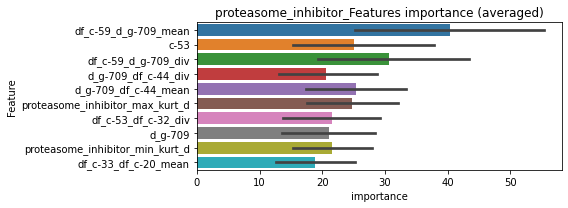

len(train_index) : 1798
len(valid_index) : 600
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1798
len(valid_index) : 600
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00395043	valid_1's binary_logloss: 0.0217708
Training until validation scores don't improve for 30 rounds


len(train_index) : 1799
len(valid_index) : 599
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[140]	training's binary_logloss: 0.00485982	valid_1's binary_logloss: 0.0392873
Training until validation scores don't improve for 30 rounds


len(train_index) : 1799
len(valid_index) : 599
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[172]	training's binary_logloss: 0.00270658	valid_1's binary_logloss: 0.0285691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901013	valid_1's binary_logloss: 0.00146675


proteasome_inhibitor logloss: 0.022625868800058416


[600]	training's binary_logloss: 0.000283828	valid_1's binary_logloss: 0.000871894
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000269002	valid_1's binary_logloss: 0.000849854
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206638	valid_1's binary_logloss: 0.0616729
[600]	training's binary_logloss: 0.00270453	valid_1's binary_logloss: 0.0280355
[900]	training's binary_logloss: 0.00102161	valid_1's binary_logloss: 0.0221405
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000965225	valid_1's binary_logloss: 0.0218869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203291	valid_1's binary_logloss: 0.0507703
[600]	training's binary_logloss: 0.00273912	valid_1's binary_logloss: 0.021154
[900]	training's binary_logloss: 0.00102502	valid_1's binary_logloss: 0.0159375
Early stopping, best iteration is:
[1156]	training's binary_logloss: 0.000744806	valid_1's binary_logloss: 0.0150189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209028	valid_1's binary_logloss: 0.0537512
[600]	training's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0160236, Threshold: 0.0677599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.04743, conf_1:0.08809
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0677599
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.1177599
threshold: 0.1177599, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182303	valid_1's binary_logloss: 0.0658281
[600]	training's binary_logloss: 0.00231701	valid_1's binary_logloss: 0.0364284
[900]	training's binary_logloss: 0.000907568	valid_1's binary_logloss: 0.0322292
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000910962	valid_1's binary_logloss: 0.0322144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182168	valid_1's binary_logloss: 0.047454
[600]	training's binary_logloss: 0.00238987	valid_1's binary_logloss: 0.0216599
[900]	training's binary_logloss: 0.000950501	valid_1's binary_logloss: 0.0186798
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000865102	valid_1's binary_logloss: 0.0184055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184355	valid_1's binary_logloss: 0.0483609
[600]	training's binary_log

2 / 3 AUC score:0.999
y_Threshold: 0.0742288, Threshold: 0.1177599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0120542 Vs.target_rate: 0.00202, Num_p_label: 48.0, conf_0:0.09421, conf_1:0.14131
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_1: 0.1177599
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.1677599
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.2177599
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2677599
threshold: 0.2677599, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180008	valid_1's binary_logloss: 0.0505833
[600]	training's binary_logloss: 0.00230842	valid_1's binary_logloss: 0.0216582
[900]	training's binary_logloss: 0.000912881	valid_1's binary_logloss: 0.0169754
Early stopping, best iteration is:
[1133]	training's binary_logloss: 0.000687969	valid_1's binary_logloss: 0.0157707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181926	valid_1's binary_logloss: 0.0515288
[600]	training's binary_logloss: 0.00235905	valid_1's binary_logloss: 0.0212877
[900]	training's binary_logloss: 0.00092251	valid_1's binary_logloss: 0.016332
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000716299	valid_1's binary_logloss: 0.0154454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185489	valid_1's binary_logloss: 0.0461451
[600]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0795697, Threshold: 0.2677599, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0055249 Vs.target_rate: 0.00202, Num_p_label: 22.0, conf_0:0.24098, conf_1:0.29454
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_1: 0.2677599
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_2: 0.3177599
threshold: 0.3177599, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


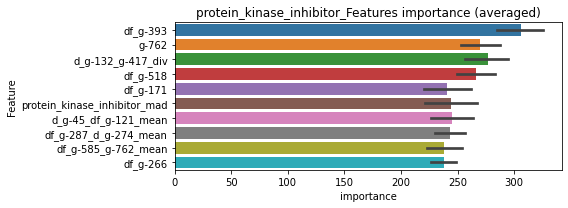

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174292	valid_1's binary_logloss: 0.0603076
[600]	training's binary_logloss: 0.00220967	valid_1's binary_logloss: 0.0305171
[900]	training's binary_logloss: 0.000897596	valid_1's binary_logloss: 0.0261522
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000696901	valid_1's binary_logloss: 0.0252536


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183203	valid_1's binary_logloss: 0.0536674
[600]	training's binary_logloss: 0.00229548	valid_1's binary_logloss: 0.0222232
[900]	training's binary_logloss: 0.000905386	valid_1's binary_logloss: 0.0172884
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000708841	valid_1's binary_logloss: 0.0163638


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176859	valid_1's binary_logloss: 0.0461389
[600]	training's binary_logloss: 0.00225275	valid_1's binary_logloss: 0.0214806
[900]	training's binary_logloss: 0.000917068	valid_1's binary_logloss: 0.0182512
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000738339	valid_1's binary_logloss: 0.0178222


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167238	valid_1's binary_logloss: 0.060734
[600]	training's binary_logloss: 0.00212567	valid_1's binary_logloss: 0.0376246
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00135265	valid_1's binary_logloss: 0.0360619


protein_kinase_inhibitor logloss: 0.023880615494011298


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00861866	valid_1's binary_logloss: 0.0231626
[600]	training's binary_logloss: 0.00111329	valid_1's binary_logloss: 0.0072888
[900]	training's binary_logloss: 0.000540041	valid_1's binary_logloss: 0.00511107
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000517462	valid_1's binary_logloss: 0.0050475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00864669	valid_1's binary_logloss: 0.0203836
[600]	training's binary_logloss: 0.00112971	valid_1's binary_logloss: 0.00610858
[900]	training's binary_logloss: 0.000550262	valid_1's binary_logloss: 0.00420489
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000521922	valid_1's binary_logloss: 0.00409597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871029	valid_1's binary_logloss: 0.0197021
[600]	training's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0063037, Threshold: 0.0282806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01980, conf_1:0.03676
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0282806
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_2: 0.0782806
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_3: 0.1282806
threshold: 0.1282806, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737561	valid_1's binary_logloss: 0.0180407
[600]	training's binary_logloss: 0.000971456	valid_1's binary_logloss: 0.00470127
[900]	training's binary_logloss: 0.00049201	valid_1's binary_logloss: 0.00336842
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000494694	valid_1's binary_logloss: 0.00336147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734325	valid_1's binary_logloss: 0.0181206
[600]	training's binary_logloss: 0.000980188	valid_1's binary_logloss: 0.00486241
[900]	training's binary_logloss: 0.000489783	valid_1's binary_logloss: 0.00331946
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000484463	valid_1's binary_logloss: 0.00329198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722944	valid_1's binary_logloss: 0.0167409
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0704547, Threshold: 0.1282806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101, Num_p_label: 24.0, conf_0:0.10262, conf_1:0.15394
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.1282806
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.1782806
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.2282806
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.2782806
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.3282806
threshold: 0.3282806, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737561	valid_1's binary_logloss: 0.0180407
[600]	training's binary_logloss: 0.000971456	valid_1's binary_logloss: 0.00470127
[900]	training's binary_logloss: 0.00049201	valid_1's binary_logloss: 0.00336842
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000494694	valid_1's binary_logloss: 0.00336147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734325	valid_1's binary_logloss: 0.0181206
[600]	training's binary_logloss: 0.000980188	valid_1's binary_logloss: 0.00486241
[900]	training's binary_logloss: 0.000489783	valid_1's binary_logloss: 0.00331946
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000484463	valid_1's binary_logloss: 0.00329198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722944	valid_1's binary_logloss: 0.0167409
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0704547, Threshold: 0.3282806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.29545, conf_1:0.36111
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.3282806
threshold: 0.3282806, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


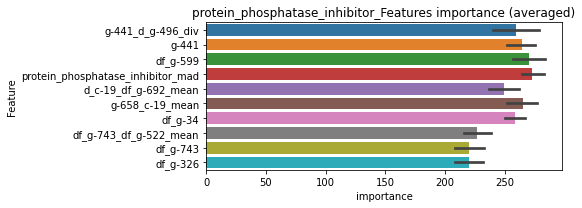

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740822	valid_1's binary_logloss: 0.0170864
[600]	training's binary_logloss: 0.000975266	valid_1's binary_logloss: 0.00433437
[900]	training's binary_logloss: 0.0004962	valid_1's binary_logloss: 0.0031402
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000494913	valid_1's binary_logloss: 0.00313606


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754714	valid_1's binary_logloss: 0.0179879
[600]	training's binary_logloss: 0.000993718	valid_1's binary_logloss: 0.00496106
[900]	training's binary_logloss: 0.000498201	valid_1's binary_logloss: 0.00335716
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000485822	valid_1's binary_logloss: 0.00331044


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751686	valid_1's binary_logloss: 0.0174371
[600]	training's binary_logloss: 0.000983613	valid_1's binary_logloss: 0.00510189
[900]	training's binary_logloss: 0.000499218	valid_1's binary_logloss: 0.00382203
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000501417	valid_1's binary_logloss: 0.00381276


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735224	valid_1's binary_logloss: 0.0175943
[600]	training's binary_logloss: 0.000974714	valid_1's binary_logloss: 0.00641661
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000623828	valid_1's binary_logloss: 0.00565469


protein_phosphatase_inhibitor logloss: 0.003978128312372316


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343365	valid_1's binary_logloss: 0.110595
[600]	training's binary_logloss: 0.00524155	valid_1's binary_logloss: 0.0815552
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00228312	valid_1's binary_logloss: 0.0780741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302344	valid_1's binary_logloss: 0.12914
[600]	training's binary_logloss: 0.00483315	valid_1's binary_logloss: 0.0949119
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00367789	valid_1's binary_logloss: 0.0923828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313378	valid_1's binary_logloss: 0.114425
[600]	training's binary_logloss: 0.00523247	valid_1's binary_logloss: 0.0883623
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00389693	valid_1's binary_logloss: 0.0864383

1 / 3 AUC score:0.990
y_Threshold: 0.0334198, Threshold: 0.1962522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3745
p_label_rate: 0.0100452 Vs.target_rate: 0.00433, Num_p_label: 40.0, conf_0:0.13738, conf_1:0.25513
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.1962522
Num_p_label: 31.0, Expected: 17.2, Adj_threshold_2: 0.2462522
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_3: 0.2962522
threshold: 0.2962522, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 627.0/3745, y_label_rate: 0.1674232
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238283	valid_1's binary_logloss: 0.0956378
[600]	training's binary_logloss: 0.00349918	valid_1's binary_logloss: 0.0677442
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.00156029	valid_1's binary_logloss: 0.063605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0222507	valid_1's binary_logloss: 0.111602
[600]	training's binary_logloss: 0.0033046	valid_1's binary_logloss: 0.0903805
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00359441	valid_1's binary_logloss: 0.0900563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0247554	valid_1's binary_logloss: 0.0856753
[600]	training's binary_logloss: 0.00372847	valid_1's binary_logloss: 0.0614582
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00330027	valid_1's binary_logloss: 0.060879

2 / 3 AUC score:0.994
y_Threshold: 0.0844157, Threshold: 0.2962522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 594.0/3679
p_label_rate: 0.0178302 Vs.target_rate: 0.00433, Num_p_label: 71.0, conf_0:0.23700, conf_1:0.35550
Num_p_label: 71.0, Expected: 17.2, Adj_threshold_1: 0.2962522
Num_p_label: 57.0, Expected: 17.2, Adj_threshold_2: 0.3462522
Num_p_label: 51.0, Expected: 17.2, Adj_threshold_3: 0.3962522
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_4: 0.4462522
Num_p_label: 31.0, Expected: 17.2, Adj_threshold_5: 0.4962522
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_6: 0.5462522
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_7: 0.5962522
threshold: 0.5962522, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 594.0/3679, y_label_rate: 0.1614569
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194484	valid_1's binary_logloss: 0.0656099
[600]	training's binary_logloss: 0.00274582	valid_1's binary_logloss: 0.0408986
[900]	training's binary_logloss: 0.00108929	valid_1's binary_logloss: 0.0371264
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000926349	valid_1's binary_logloss: 0.0368361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02031	valid_1's binary_logloss: 0.0590449
[600]	training's binary_logloss: 0.00295837	valid_1's binary_logloss: 0.0344359
[900]	training's binary_logloss: 0.00114784	valid_1's binary_logloss: 0.0306766
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.00105824	valid_1's binary_logloss: 0.0305115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180542	valid_1's binary_logloss: 0.099103
[600]	training's binary_logloss

3 / 3 AUC score:0.998
y_Threshold: 0.0840350, Threshold: 0.5962522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 575.0/3641
p_label_rate: 0.0113009 Vs.target_rate: 0.00433, Num_p_label: 45.0, conf_0:0.50000, conf_1:0.65588
Num_p_label: 45.0, Expected: 17.2, Adj_threshold_1: 0.5962522
Num_p_label: 37.0, Expected: 17.2, Adj_threshold_2: 0.6462522
Num_p_label: 33.0, Expected: 17.2, Adj_threshold_3: 0.6962522
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_4: 0.7462522
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_5: 0.7962522
threshold: 0.7962522, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 575.0/3641, y_label_rate: 0.1579236


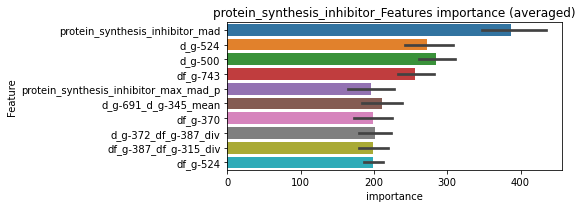

len(train_index) : 2730
len(valid_index) : 911
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166756	valid_1's binary_logloss: 0.0660786
[600]	training's binary_logloss: 0.00233358	valid_1's binary_logloss: 0.0438598
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00139611	valid_1's binary_logloss: 0.0421062


len(train_index) : 2731
len(valid_index) : 910
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180378	valid_1's binary_logloss: 0.0633285
[600]	training's binary_logloss: 0.0025072	valid_1's binary_logloss: 0.0391214
[900]	training's binary_logloss: 0.00101583	valid_1's binary_logloss: 0.0350896
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000804532	valid_1's binary_logloss: 0.0338156


len(train_index) : 2731
len(valid_index) : 910
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171323	valid_1's binary_logloss: 0.0523731
[600]	training's binary_logloss: 0.00242942	valid_1's binary_logloss: 0.0297974
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.00109715	valid_1's binary_logloss: 0.0260994


len(train_index) : 2731
len(valid_index) : 910
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172334	valid_1's binary_logloss: 0.0942721
[600]	training's binary_logloss: 0.00241036	valid_1's binary_logloss: 0.0740554
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.0025998	valid_1's binary_logloss: 0.0738212


protein_synthesis_inhibitor logloss: 0.04396011510773616


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739295	valid_1's binary_logloss: 0.014946
[600]	training's binary_logloss: 0.000907655	valid_1's binary_logloss: 0.00339319
[900]	training's binary_logloss: 0.000483384	valid_1's binary_logloss: 0.00240362
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000469242	valid_1's binary_logloss: 0.00237258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073196	valid_1's binary_logloss: 0.017436
[600]	training's binary_logloss: 0.000905513	valid_1's binary_logloss: 0.005127
[900]	training's binary_logloss: 0.000480117	valid_1's binary_logloss: 0.00387882
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000460862	valid_1's binary_logloss: 0.00383262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727583	valid_1's binary_logloss: 0.0141994
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0046075, Threshold: 0.0221432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01550, conf_1:0.02879
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0221432
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.0721432
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_3: 0.1221432
threshold: 0.1221432, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639718	valid_1's binary_logloss: 0.0117904
[600]	training's binary_logloss: 0.000796695	valid_1's binary_logloss: 0.00216986
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00045409	valid_1's binary_logloss: 0.00152341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623987	valid_1's binary_logloss: 0.0167435
[600]	training's binary_logloss: 0.000786843	valid_1's binary_logloss: 0.0047035
[900]	training's binary_logloss: 0.000434665	valid_1's binary_logloss: 0.00337946
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000433157	valid_1's binary_logloss: 0.00337849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597775	valid_1's binary_logloss: 0.0125496
[600]	training's binary_logloss: 0.000777799	valid_1's binary_logloss: 0.00339864
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.2087145, Threshold: 0.1221432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00080, Num_p_label: 30.0, conf_0:0.09771, conf_1:0.14657
Num_p_label: 30.0, Expected: 3.2, Adj_threshold_1: 0.1221432
Num_p_label: 22.0, Expected: 3.2, Adj_threshold_2: 0.1721432
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_3: 0.2221432
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_4: 0.2721432
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_5: 0.3221432
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.3721432
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_7: 0.4221432
threshold: 0.4221432, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639718	valid_1's binary_logloss: 0.0117904
[600]	training's binary_logloss: 0.000796695	valid_1's binary_logloss: 0.00216986
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00045409	valid_1's binary_logloss: 0.00152341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623987	valid_1's binary_logloss: 0.0167435
[600]	training's binary_logloss: 0.000786843	valid_1's binary_logloss: 0.0047035
[900]	training's binary_logloss: 0.000434665	valid_1's binary_logloss: 0.00337946
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000433157	valid_1's binary_logloss: 0.00337849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597775	valid_1's binary_logloss: 0.0125496
[600]	training's binary_logloss: 0.000777799	valid_1's binary_logloss: 0.00339864
[900]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.2087145, Threshold: 0.4221432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.37993, conf_1:0.46436
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.4221432
threshold: 0.4221432, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


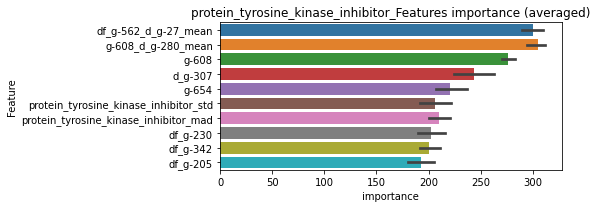

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619243	valid_1's binary_logloss: 0.0117059
[600]	training's binary_logloss: 0.0007943	valid_1's binary_logloss: 0.00233021
[900]	training's binary_logloss: 0.000439332	valid_1's binary_logloss: 0.00158611
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000438394	valid_1's binary_logloss: 0.00158433


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611795	valid_1's binary_logloss: 0.0160718
[600]	training's binary_logloss: 0.00078601	valid_1's binary_logloss: 0.00424724
[900]	training's binary_logloss: 0.000437194	valid_1's binary_logloss: 0.00300647
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000437194	valid_1's binary_logloss: 0.00300647


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611836	valid_1's binary_logloss: 0.0131069
[600]	training's binary_logloss: 0.000778711	valid_1's binary_logloss: 0.00371323
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000457241	valid_1's binary_logloss: 0.00284195


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00586869	valid_1's binary_logloss: 0.012724
[600]	training's binary_logloss: 0.000777163	valid_1's binary_logloss: 0.0038642
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000453433	valid_1's binary_logloss: 0.00297278


protein_tyrosine_kinase_inhibitor logloss: 0.002602784954877856


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189457	valid_1's binary_logloss: 0.0955636
[600]	training's binary_logloss: 0.00257848	valid_1's binary_logloss: 0.0729771
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00283632	valid_1's binary_logloss: 0.0727217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181199	valid_1's binary_logloss: 0.064975
[600]	training's binary_logloss: 0.00256284	valid_1's binary_logloss: 0.0344367
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.00115884	valid_1's binary_logloss: 0.0293371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198965	valid_1's binary_logloss: 0.0530028
[600]	training's binary_logloss: 0.00278689	valid_1's binary_logloss: 0.0234818
[900]	training's binary_logloss: 0.00110103	valid_1's binary_logloss: 0.0179232
Early stopping, best iteration 

1 / 3 AUC score:0.998
y_Threshold: 0.0199948, Threshold: 0.1894999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.13265, conf_1:0.24635
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.1894999
Num_p_label: 33.0, Expected: 9.4, Adj_threshold_2: 0.2394999
Num_p_label: 25.0, Expected: 9.4, Adj_threshold_3: 0.2894999
Num_p_label: 19.0, Expected: 9.4, Adj_threshold_4: 0.3394999
threshold: 0.3394999, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161008	valid_1's binary_logloss: 0.0475842
[600]	training's binary_logloss: 0.00221024	valid_1's binary_logloss: 0.0222761
[900]	training's binary_logloss: 0.000917907	valid_1's binary_logloss: 0.0177847
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000795882	valid_1's binary_logloss: 0.0172446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150843	valid_1's binary_logloss: 0.0718923
[600]	training's binary_logloss: 0.00215292	valid_1's binary_logloss: 0.050024
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00109883	valid_1's binary_logloss: 0.0486518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153853	valid_1's binary_logloss: 0.0402429
[600]	training's binary_logloss: 0.00216009	valid_1's binary_logloss: 0.0167672
[900]	training's binary_logl

2 / 3 AUC score:0.999
y_Threshold: 0.1082194, Threshold: 0.3394999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 638.0/3771
p_label_rate: 0.0178302 Vs.target_rate: 0.00235, Num_p_label: 71.0, conf_0:0.27160, conf_1:0.40740
Num_p_label: 71.0, Expected: 9.4, Adj_threshold_1: 0.3394999
Num_p_label: 60.0, Expected: 9.4, Adj_threshold_2: 0.3894999
Num_p_label: 55.0, Expected: 9.4, Adj_threshold_3: 0.4394999
Num_p_label: 50.0, Expected: 9.4, Adj_threshold_4: 0.4894999
Num_p_label: 44.0, Expected: 9.4, Adj_threshold_5: 0.5394999
Num_p_label: 39.0, Expected: 9.4, Adj_threshold_6: 0.5894999
Num_p_label: 32.0, Expected: 9.4, Adj_threshold_7: 0.6394999
Num_p_label: 29.0, Expected: 9.4, Adj_threshold_8: 0.6894999
Num_p_label: 25.0, Expected: 9.4, Adj_threshold_9: 0.7394999
Num_p_label: 23.0, Expected: 9.4, Adj_threshold_10: 0.7894999
threshold: 0.7894999, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 638.0/3771, y_label_rate: 0.1691859
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128337	valid_1's binary_logloss: 0.055374
[600]	training's binary_logloss: 0.00181535	valid_1's binary_logloss: 0.0309947
[900]	training's binary_logloss: 0.000812252	valid_1's binary_logloss: 0.0266917
Early stopping, best iteration is:
[1136]	training's binary_logloss: 0.000680124	valid_1's binary_logloss: 0.0261049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142446	valid_1's binary_logloss: 0.0481213
[600]	training's binary_logloss: 0.00195497	valid_1's binary_logloss: 0.0307067
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00148734	valid_1's binary_logloss: 0.0300355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133652	valid_1's binary_logloss: 0.0557636
[600]	training's binary_logloss: 0.00186306	valid_1's binary_logloss: 0.0292905
[900]	training's binary_logl

3 / 3 AUC score:0.999
y_Threshold: 0.1471599, Threshold: 0.7894999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 628.0/3751
p_label_rate: 0.0072828 Vs.target_rate: 0.00235, Num_p_label: 29.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 29.0, Expected: 9.4, Adj_threshold_1: 0.7894999
threshold: 0.7894999, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 628.0/3751, y_label_rate: 0.1674220


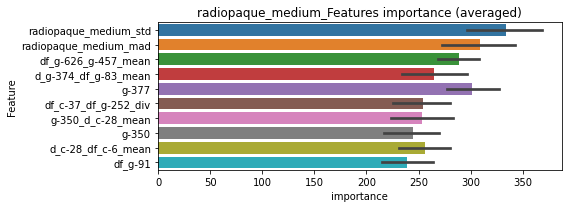

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130864	valid_1's binary_logloss: 0.0424647
[600]	training's binary_logloss: 0.00179417	valid_1's binary_logloss: 0.0206077
[900]	training's binary_logloss: 0.000798413	valid_1's binary_logloss: 0.0172605
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000804425	valid_1's binary_logloss: 0.0172306


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128967	valid_1's binary_logloss: 0.0471975
[600]	training's binary_logloss: 0.00181708	valid_1's binary_logloss: 0.0202622
[900]	training's binary_logloss: 0.000799559	valid_1's binary_logloss: 0.0149681
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000688357	valid_1's binary_logloss: 0.0145238


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126554	valid_1's binary_logloss: 0.0731023
[600]	training's binary_logloss: 0.00175266	valid_1's binary_logloss: 0.0541218
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00122022	valid_1's binary_logloss: 0.0525338


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133132	valid_1's binary_logloss: 0.0433802
[600]	training's binary_logloss: 0.00183704	valid_1's binary_logloss: 0.0199542
[900]	training's binary_logloss: 0.000804268	valid_1's binary_logloss: 0.0170253
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000777784	valid_1's binary_logloss: 0.0168632


radiopaque_medium logloss: 0.025290084293353204


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0771453	valid_1's binary_logloss: 0.262387
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.0362452	valid_1's binary_logloss: 0.248548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.075135	valid_1's binary_logloss: 0.29133
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.0274026	valid_1's binary_logloss: 0.278174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0762995	valid_1's binary_logloss: 0.266547
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0375052	valid_1's binary_logloss: 0.254333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0799095	valid_1's binary_logloss: 0.267761
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.0277027	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.883
y_Threshold: 0.1055104, Threshold: 0.4192795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 445 → Positive_corect_labels: 496/3474
p_label_rate: 0.0100452 Vs.target_rate: 0.00936, Num_p_label: 40.0, conf_0:0.29350, conf_1:0.54506
threshold: 0.4192795, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 496.0/3474, y_label_rate: 0.1427749
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0314712	valid_1's binary_logloss: 0.141128
[600]	training's binary_logloss: 0.00541855	valid_1's binary_logloss: 0.10828
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00431873	valid_1's binary_logloss: 0.106041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311903	valid_1's binary_logloss: 0.151969
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00777824	valid_1's binary_logloss: 0.136038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0324543	valid_1's binary_logloss: 0.128857
[600]	training's binary_logloss: 0.00561029	valid_1's binary_logloss: 0.097046
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00298547	valid_1's binary_logloss: 0.091936
Training until validation scores don't improve for 30 rounds
[300]	training's binary

2 / 3 AUC score:0.981
y_Threshold: 0.0842819, Threshold: 0.4192795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 444.0/3370
p_label_rate: 0.0477147 Vs.target_rate: 0.00936, Num_p_label: 190.0, conf_0:0.33542, conf_1:0.50314
Num_p_label: 190.0, Expected: 37.3, Adj_threshold_1: 0.4192795
Num_p_label: 179.0, Expected: 37.3, Adj_threshold_2: 0.4692795
Num_p_label: 160.0, Expected: 37.3, Adj_threshold_3: 0.5192795
Num_p_label: 144.0, Expected: 37.3, Adj_threshold_4: 0.5692795
Num_p_label: 134.0, Expected: 37.3, Adj_threshold_5: 0.6192795
Num_p_label: 121.0, Expected: 37.3, Adj_threshold_6: 0.6692795
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_7: 0.7192795
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_8: 0.7692795
threshold: 0.7692795, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 444.0/3370, y_label_rate: 0.1317507
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211422	valid_1's binary_logloss: 0.122215
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00653918	valid_1's binary_logloss: 0.112286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207282	valid_1's binary_logloss: 0.12004
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0161225	valid_1's binary_logloss: 0.117666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217341	valid_1's binary_logloss: 0.123825
[600]	training's binary_logloss: 0.00342833	valid_1's binary_logloss: 0.111313
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00248728	valid_1's binary_logloss: 0.110398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207986	valid_1's binary_logloss: 0.139518
Early stopping, best iter

3 / 3 AUC score:0.970
y_Threshold: 0.0742561, Threshold: 0.7692795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 394.0/3270
p_label_rate: 0.0376695 Vs.target_rate: 0.00936, Num_p_label: 150.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 150.0, Expected: 37.3, Adj_threshold_1: 0.7692795
threshold: 0.7692795, positive_p_label: 150.0/3982, p_label_rate: 0.0376695
positive_y_label: 394.0/3270, y_label_rate: 0.1204893


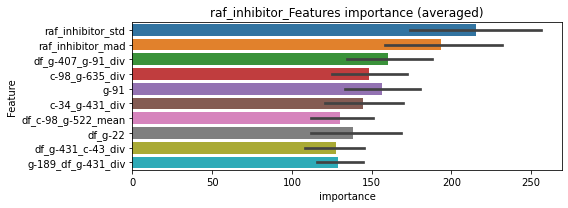

len(train_index) : 2452
len(valid_index) : 818
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132563	valid_1's binary_logloss: 0.0753633
[600]	training's binary_logloss: 0.00204729	valid_1's binary_logloss: 0.0602392
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00214249	valid_1's binary_logloss: 0.0598885


len(train_index) : 2452
len(valid_index) : 818
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136349	valid_1's binary_logloss: 0.0671924
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00293165	valid_1's binary_logloss: 0.0571878


len(train_index) : 2453
len(valid_index) : 817
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127059	valid_1's binary_logloss: 0.0763834
[600]	training's binary_logloss: 0.00201344	valid_1's binary_logloss: 0.0622709
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.0016834	valid_1's binary_logloss: 0.0620212


len(train_index) : 2453
len(valid_index) : 817
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133317	valid_1's binary_logloss: 0.065763
[600]	training's binary_logloss: 0.00207919	valid_1's binary_logloss: 0.0463202
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00134287	valid_1's binary_logloss: 0.044268


raf_inhibitor logloss: 0.05584303394126957


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052279	valid_1's binary_logloss: 0.00883913
[600]	training's binary_logloss: 0.000648051	valid_1's binary_logloss: 0.00190956
[900]	training's binary_logloss: 0.000377869	valid_1's binary_logloss: 0.00138671
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000377964	valid_1's binary_logloss: 0.00138651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510443	valid_1's binary_logloss: 0.0100603
[600]	training's binary_logloss: 0.000636878	valid_1's binary_logloss: 0.00281109
[900]	training's binary_logloss: 0.000370832	valid_1's binary_logloss: 0.00211688
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000370494	valid_1's binary_logloss: 0.00211486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476959	valid_1's binary_logloss: 0.0111355
[600]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0028590, Threshold: 0.0371008, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.02597, conf_1:0.04823
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0371008
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_2: 0.0871008
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_3: 0.1371008
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_4: 0.1871008
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2371008
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.2871008
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_7: 0.3371008
threshold: 0.3371008, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399043	valid_1's binary_logloss: 0.00630446
[600]	training's binary_logloss: 0.000525482	valid_1's binary_logloss: 0.00129142
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000332351	valid_1's binary_logloss: 0.000900334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401607	valid_1's binary_logloss: 0.00718804
[600]	training's binary_logloss: 0.000530612	valid_1's binary_logloss: 0.00183796
[900]	training's binary_logloss: 0.000332566	valid_1's binary_logloss: 0.0013589
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000332664	valid_1's binary_logloss: 0.00135812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409244	valid_1's binary_logloss: 0.00662259
[600]	training's binary_logloss: 0.000530987	valid_1's binary_logloss: 0.00133133
Early stoppi

2 / 3 AUC score:1.000
y_Threshold: 0.0672148, Threshold: 0.3371008, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0085384 Vs.target_rate: 0.00050, Num_p_label: 34.0, conf_0:0.26968, conf_1:0.40452
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_1: 0.3371008
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_2: 0.3871008
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_3: 0.4371008
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_4: 0.4871008
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_5: 0.5371008
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_6: 0.5871008
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_7: 0.6371008
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_8: 0.6871008
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_9: 0.7371008
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_10: 0.7871008
threshold: 0.7871008, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408723	valid_1's binary_logloss: 0.00587235
[600]	training's binary_logloss: 0.000531409	valid_1's binary_logloss: 0.00108031
[900]	training's binary_logloss: 0.000331644	valid_1's binary_logloss: 0.000756481
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000331346	valid_1's binary_logloss: 0.000755593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407066	valid_1's binary_logloss: 0.00869234
[600]	training's binary_logloss: 0.000528656	valid_1's binary_logloss: 0.00255665
[900]	training's binary_logloss: 0.000332388	valid_1's binary_logloss: 0.00199925
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000332445	valid_1's binary_logloss: 0.00199911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389449	valid_1's binary_logloss: 0.00655039
[600]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.1894391, Threshold: 0.7871008, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00050, Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_1: 0.7871008
threshold: 0.7871008, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


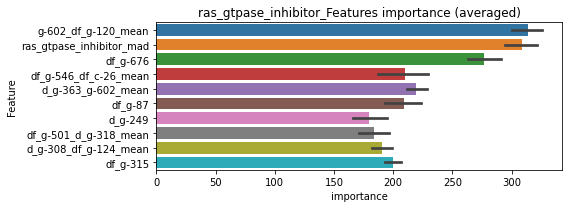

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412481	valid_1's binary_logloss: 0.0060062
[600]	training's binary_logloss: 0.000537973	valid_1's binary_logloss: 0.00114311
[900]	training's binary_logloss: 0.000336287	valid_1's binary_logloss: 0.000839929
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000336587	valid_1's binary_logloss: 0.000838587


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409319	valid_1's binary_logloss: 0.00921145
[600]	training's binary_logloss: 0.000531427	valid_1's binary_logloss: 0.00283716
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000337558	valid_1's binary_logloss: 0.00234359


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397137	valid_1's binary_logloss: 0.00668245
[600]	training's binary_logloss: 0.000522955	valid_1's binary_logloss: 0.00142843
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000337725	valid_1's binary_logloss: 0.00105982


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399173	valid_1's binary_logloss: 0.0079102
[600]	training's binary_logloss: 0.00052288	valid_1's binary_logloss: 0.00223061
[900]	training's binary_logloss: 0.000337098	valid_1's binary_logloss: 0.00177247
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000337098	valid_1's binary_logloss: 0.00177247


ras_gtpase_inhibitor logloss: 0.0015035666685135763


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024158	valid_1's binary_logloss: 0.0923412
[600]	training's binary_logloss: 0.00353625	valid_1's binary_logloss: 0.062057
[900]	training's binary_logloss: 0.00129605	valid_1's binary_logloss: 0.0567496
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.00128244	valid_1's binary_logloss: 0.0566994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0249424	valid_1's binary_logloss: 0.0894017
[600]	training's binary_logloss: 0.00359694	valid_1's binary_logloss: 0.0559924
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.00147738	valid_1's binary_logloss: 0.0511238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0268286	valid_1's binary_logloss: 0.0649068
[600]	training's binary_logloss: 0.00385945	valid_1's binary_logloss: 0.0293695
[900]	training's binary_logloss:

1 / 3 AUC score:0.996
y_Threshold: 0.0216791, Threshold: 0.2896435, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.20275, conf_1:0.37654
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.2896435
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_2: 0.3396435
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_3: 0.3896435
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_4: 0.4396435
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_5: 0.4896435
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_6: 0.5396435
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_7: 0.5896435
threshold: 0.5896435, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3787, y_label_rate: 0.1711117
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205619	valid_1's binary_logloss: 0.078679
[600]	training's binary_logloss: 0.00287969	valid_1's binary_logloss: 0.0473649
[900]	training's binary_logloss: 0.00111608	valid_1's binary_logloss: 0.0420766
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000899599	valid_1's binary_logloss: 0.0412249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202436	valid_1's binary_logloss: 0.073426
[600]	training's binary_logloss: 0.00277128	valid_1's binary_logloss: 0.045086
[900]	training's binary_logloss: 0.00110104	valid_1's binary_logloss: 0.0410143
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.00104048	valid_1's binary_logloss: 0.040856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202184	valid_1's binary_logloss: 0.0687256
[600]	training's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.1103092, Threshold: 0.5896435, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0082873 Vs.target_rate: 0.00281, Num_p_label: 33.0, conf_0:0.47171, conf_1:0.70757
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_1: 0.5896435
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_2: 0.6396435
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_3: 0.6896435
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_4: 0.7396435
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_5: 0.7896435
threshold: 0.7896435, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 635.0/3761, y_label_rate: 0.1688381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193189	valid_1's binary_logloss: 0.074256
[600]	training's binary_logloss: 0.00265506	valid_1's binary_logloss: 0.0510952
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00189757	valid_1's binary_logloss: 0.0501321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019417	valid_1's binary_logloss: 0.0633364
[600]	training's binary_logloss: 0.00269676	valid_1's binary_logloss: 0.0308189
[900]	training's binary_logloss: 0.00105878	valid_1's binary_logloss: 0.0244132
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.000806698	valid_1's binary_logloss: 0.0230061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178559	valid_1's binary_logloss: 0.0698375
[600]	training's binary_logloss: 0.00254968	valid_1's binary_logloss: 0.0510367
Early stopping, best iteration

3 / 3 AUC score:0.996
y_Threshold: 0.0899085, Threshold: 0.7896435, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 619.0/3729
p_label_rate: 0.0052737 Vs.target_rate: 0.00281, Num_p_label: 21.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_1: 0.7896435
threshold: 0.7896435, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 619.0/3729, y_label_rate: 0.1659962


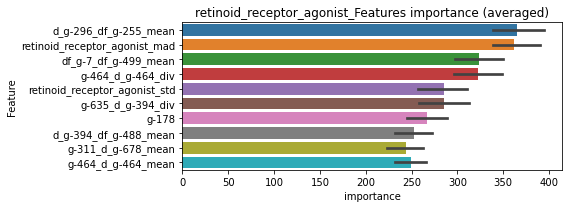

len(train_index) : 2796
len(valid_index) : 933
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162191	valid_1's binary_logloss: 0.0675832
[600]	training's binary_logloss: 0.00226204	valid_1's binary_logloss: 0.0479708
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00178871	valid_1's binary_logloss: 0.0473274


len(train_index) : 2797
len(valid_index) : 932
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157769	valid_1's binary_logloss: 0.0588875
[600]	training's binary_logloss: 0.00221918	valid_1's binary_logloss: 0.0316307
[900]	training's binary_logloss: 0.000941865	valid_1's binary_logloss: 0.0272802
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000784936	valid_1's binary_logloss: 0.026507


len(train_index) : 2797
len(valid_index) : 932
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164513	valid_1's binary_logloss: 0.0603809
[600]	training's binary_logloss: 0.00231736	valid_1's binary_logloss: 0.0403601
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00143342	valid_1's binary_logloss: 0.0390624


len(train_index) : 2797
len(valid_index) : 932
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016396	valid_1's binary_logloss: 0.0537168
[600]	training's binary_logloss: 0.0023033	valid_1's binary_logloss: 0.0270578
[900]	training's binary_logloss: 0.000966743	valid_1's binary_logloss: 0.0235963
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00093158	valid_1's binary_logloss: 0.0233907


retinoid_receptor_agonist logloss: 0.034075410725062524


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147125	valid_1's binary_logloss: 0.00188509
[600]	training's binary_logloss: 0.000218862	valid_1's binary_logloss: 0.0004294
[900]	training's binary_logloss: 0.000179051	valid_1's binary_logloss: 0.000366188
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000179051	valid_1's binary_logloss: 0.000366188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146336	valid_1's binary_logloss: 0.00310194
[600]	training's binary_logloss: 0.000221169	valid_1's binary_logloss: 0.00115875
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000186471	valid_1's binary_logloss: 0.00110669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147777	valid_1's binary_logloss: 0.0017863
[600]	training's binary_logloss: 0.000223061	valid_1's binary_logloss: 0.000345734
Early stopp

1 / 3 AUC score:1.000


[900]	training's binary_logloss: 0.000182142	valid_1's binary_logloss: 0.000280693
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000182142	valid_1's binary_logloss: 0.000280693


y_Threshold: 0.0006084, Threshold: 0.0030151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00211, conf_1:0.00392
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0030151
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0530151
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_3: 0.1030151
threshold: 0.1030151, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135974	valid_1's binary_logloss: 0.00227959
[600]	training's binary_logloss: 0.000195663	valid_1's binary_logloss: 0.000776038
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000169895	valid_1's binary_logloss: 0.000740045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135104	valid_1's binary_logloss: 0.00157984
[600]	training's binary_logloss: 0.000194275	valid_1's binary_logloss: 0.000254055
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000163614	valid_1's binary_logloss: 0.000216146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136574	valid_1's binary_logloss: 0.00147508
[600]	training's binary_logloss: 0.000194535	valid_1's binary_logloss: 0.000231174
[900]	training's binary_logloss: 0.000161463	valid_1's binary_logloss: 0.000193038
Early 

2 / 3 AUC score:1.000
y_Threshold: 0.0881402, Threshold: 0.1030151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00025, Num_p_label: 15.0, conf_0:0.08241, conf_1:0.12362
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_1: 0.1030151
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_2: 0.1530151
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.2030151


Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000162639	valid_1's binary_logloss: 0.000955904


Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.2530151
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.3030151
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.3530151
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4030151
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_8: 0.4530151
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5030151
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5530151
threshold: 0.6030151, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135974	valid_1's binary_logloss: 0.00227959
[600]	training's binary_logloss: 0.000195663	valid_1's binary_logloss: 0.000776038
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000169895	valid_1's binary_logloss: 0.000740045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135104	valid_1's binary_logloss: 0.00157984
[600]	training's binary_logloss: 0.000194275	valid_1's binary_logloss: 0.000254055
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000163614	valid_1's binary_logloss: 0.000216146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136574	valid_1's binary_logloss: 0.00147508
[600]	training's binary_logloss: 0.000194535	valid_1's binary_logloss: 0.000231174
[900]	training's binary_logloss: 0.000161463	valid_1's binary_logloss: 0.000193038
Early 

3 / 3 AUC score:1.000
y_Threshold: 0.0881402, Threshold: 0.6030151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025, Num_p_label: 3.0, conf_0:0.50000, conf_1:0.66332
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.6030151
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.6530151
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.7030151
threshold: 0.7030151, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


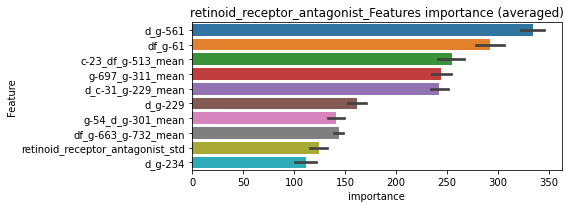

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013661	valid_1's binary_logloss: 0.00273348
[600]	training's binary_logloss: 0.000196273	valid_1's binary_logloss: 0.00110896
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000172388	valid_1's binary_logloss: 0.00106315


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155866	valid_1's binary_logloss: 0.00269389
[600]	training's binary_logloss: 0.000197775	valid_1's binary_logloss: 0.000506553
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000152753	valid_1's binary_logloss: 0.000404075


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137585	valid_1's binary_logloss: 0.00148193
[600]	training's binary_logloss: 0.000195202	valid_1's binary_logloss: 0.000233891
[900]	training's binary_logloss: 0.00016109	valid_1's binary_logloss: 0.000194019
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000160675	valid_1's binary_logloss: 0.000193517


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136405	valid_1's binary_logloss: 0.00281189
[600]	training's binary_logloss: 0.000195979	valid_1's binary_logloss: 0.00111263
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000162618	valid_1's binary_logloss: 0.00105011


retinoid_receptor_antagonist logloss: 0.0006778644019207236


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138511	valid_1's binary_logloss: 0.0362066
[600]	training's binary_logloss: 0.00176009	valid_1's binary_logloss: 0.0149054
[900]	training's binary_logloss: 0.000757763	valid_1's binary_logloss: 0.0120072
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000696336	valid_1's binary_logloss: 0.0118387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132538	valid_1's binary_logloss: 0.0446891
[600]	training's binary_logloss: 0.00168937	valid_1's binary_logloss: 0.0233345
[900]	training's binary_logloss: 0.000736038	valid_1's binary_logloss: 0.0204451
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000735232	valid_1's binary_logloss: 0.0204409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143239	valid_1's binary_logloss: 0.0330385
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0126253, Threshold: 0.0464875, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147, Num_p_label: 40.0, conf_0:0.03254, conf_1:0.06043
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0464875
Num_p_label: 21.0, Expected: 5.9, Adj_threshold_2: 0.0964875
Num_p_label: 15.0, Expected: 5.9, Adj_threshold_3: 0.1464875
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_4: 0.1964875
threshold: 0.1964875, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110009	valid_1's binary_logloss: 0.0280534
[600]	training's binary_logloss: 0.00147019	valid_1's binary_logloss: 0.0112587
[900]	training's binary_logloss: 0.000662853	valid_1's binary_logloss: 0.00882853
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000590117	valid_1's binary_logloss: 0.00864369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116499	valid_1's binary_logloss: 0.0346838
[600]	training's binary_logloss: 0.00149724	valid_1's binary_logloss: 0.0168968
[900]	training's binary_logloss: 0.000670168	valid_1's binary_logloss: 0.0145694
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000602979	valid_1's binary_logloss: 0.0143534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116035	valid_1's binary_logloss: 0.0269302
[600]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0908310, Threshold: 0.1964875, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0072828 Vs.target_rate: 0.00147, Num_p_label: 29.0, conf_0:0.15719, conf_1:0.23578
Num_p_label: 29.0, Expected: 5.9, Adj_threshold_1: 0.1964875
Num_p_label: 21.0, Expected: 5.9, Adj_threshold_2: 0.2464875
Num_p_label: 18.0, Expected: 5.9, Adj_threshold_3: 0.2964875
Num_p_label: 17.0, Expected: 5.9, Adj_threshold_4: 0.3464875
Num_p_label: 17.0, Expected: 5.9, Adj_threshold_5: 0.3964875
Num_p_label: 13.0, Expected: 5.9, Adj_threshold_6: 0.4464875
threshold: 0.4464875, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111345	valid_1's binary_logloss: 0.0309059
[600]	training's binary_logloss: 0.00148283	valid_1's binary_logloss: 0.0175221
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000814482	valid_1's binary_logloss: 0.0163796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116408	valid_1's binary_logloss: 0.0265008
[600]	training's binary_logloss: 0.00148189	valid_1's binary_logloss: 0.00712812
[900]	training's binary_logloss: 0.00067381	valid_1's binary_logloss: 0.00465322
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000583357	valid_1's binary_logloss: 0.00433847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107793	valid_1's binary_logloss: 0.0414415
[600]	training's binary_logloss: 0.00140804	valid_1's binary_logloss: 0.0219739
[900]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0743272, Threshold: 0.4464875, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00147, Num_p_label: 15.0, conf_0:0.40184, conf_1:0.49114
Num_p_label: 15.0, Expected: 5.9, Adj_threshold_1: 0.4464875
Num_p_label: 13.0, Expected: 5.9, Adj_threshold_2: 0.4964875
threshold: 0.4964875, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


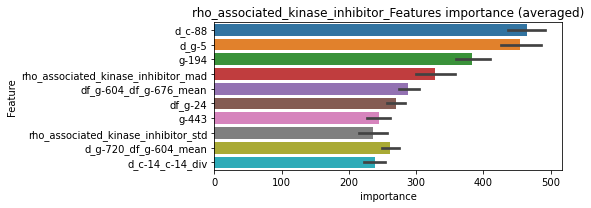

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110671	valid_1's binary_logloss: 0.0322517
[600]	training's binary_logloss: 0.0014344	valid_1's binary_logloss: 0.0167163
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.0010099	valid_1's binary_logloss: 0.0159876


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010881	valid_1's binary_logloss: 0.0255738
[600]	training's binary_logloss: 0.00141642	valid_1's binary_logloss: 0.00939272
[900]	training's binary_logloss: 0.00064681	valid_1's binary_logloss: 0.00696391
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000626812	valid_1's binary_logloss: 0.0069277


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103602	valid_1's binary_logloss: 0.0342143
[600]	training's binary_logloss: 0.00139114	valid_1's binary_logloss: 0.0152494
[900]	training's binary_logloss: 0.000642713	valid_1's binary_logloss: 0.0125108
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000589637	valid_1's binary_logloss: 0.0121581


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112093	valid_1's binary_logloss: 0.024102
[600]	training's binary_logloss: 0.00142779	valid_1's binary_logloss: 0.00731986
[900]	training's binary_logloss: 0.00065007	valid_1's binary_logloss: 0.00552567
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000582487	valid_1's binary_logloss: 0.00541616


rho_associated_kinase_inhibitor logloss: 0.010128167562880897


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114068	valid_1's binary_logloss: 0.0457133
[600]	training's binary_logloss: 0.00156945	valid_1's binary_logloss: 0.0281285
[900]	training's binary_logloss: 0.000700362	valid_1's binary_logloss: 0.0256269
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000713691	valid_1's binary_logloss: 0.0256099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115041	valid_1's binary_logloss: 0.0351583
[600]	training's binary_logloss: 0.00156078	valid_1's binary_logloss: 0.017005
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000800516	valid_1's binary_logloss: 0.0149343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105035	valid_1's binary_logloss: 0.0441219
[600]	training's binary_logloss: 0.00147172	valid_1's binary_logloss: 0.0262558
Early stopping, best iterati

1 / 3 AUC score:1.000
y_Threshold: 0.0107468, Threshold: 0.0497193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.03480, conf_1:0.06464
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0497193
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.0997193
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_3: 0.1497193
threshold: 0.1497193, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937021	valid_1's binary_logloss: 0.0422808
[600]	training's binary_logloss: 0.00130465	valid_1's binary_logloss: 0.0268062
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00100101	valid_1's binary_logloss: 0.0258916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945406	valid_1's binary_logloss: 0.0288839
[600]	training's binary_logloss: 0.00131664	valid_1's binary_logloss: 0.0145567
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000750363	valid_1's binary_logloss: 0.0129309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913786	valid_1's binary_logloss: 0.0334299
[600]	training's binary_logloss: 0.00129583	valid_1's binary_logloss: 0.0194276
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000657965	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0524674, Threshold: 0.1497193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0090407 Vs.target_rate: 0.00155, Num_p_label: 36.0, conf_0:0.11978, conf_1:0.17966
Num_p_label: 36.0, Expected: 6.2, Adj_threshold_1: 0.1497193
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_2: 0.1997193
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_3: 0.2497193
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_4: 0.2997193
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_5: 0.3497193
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_6: 0.3997193
threshold: 0.3997193, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902696	valid_1's binary_logloss: 0.030599
[600]	training's binary_logloss: 0.00125192	valid_1's binary_logloss: 0.013367
[900]	training's binary_logloss: 0.000601746	valid_1's binary_logloss: 0.010882
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000584877	valid_1's binary_logloss: 0.0107566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945739	valid_1's binary_logloss: 0.0291003
[600]	training's binary_logloss: 0.00129482	valid_1's binary_logloss: 0.0103445
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000680375	valid_1's binary_logloss: 0.00777274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00924281	valid_1's binary_logloss: 0.0301225
[600]	training's binary_logloss: 0.0013008	valid_1's binary_logloss: 0.0102732
[900]	training's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0916674, Threshold: 0.3997193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0037670 Vs.target_rate: 0.00155, Num_p_label: 15.0, conf_0:0.35975, conf_1:0.43969
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.3997193
threshold: 0.3997193, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


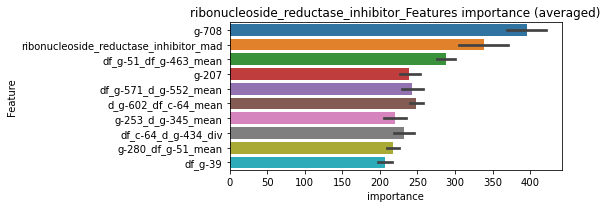

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946309	valid_1's binary_logloss: 0.0248547
[600]	training's binary_logloss: 0.00130372	valid_1's binary_logloss: 0.00890206
[900]	training's binary_logloss: 0.000615606	valid_1's binary_logloss: 0.0069972
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000620159	valid_1's binary_logloss: 0.0069543


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091951	valid_1's binary_logloss: 0.0327712
[600]	training's binary_logloss: 0.0012694	valid_1's binary_logloss: 0.015328
[900]	training's binary_logloss: 0.000603169	valid_1's binary_logloss: 0.0124942
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000588339	valid_1's binary_logloss: 0.0124496


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00924798	valid_1's binary_logloss: 0.0370136
[600]	training's binary_logloss: 0.00126245	valid_1's binary_logloss: 0.0173438
[900]	training's binary_logloss: 0.000599055	valid_1's binary_logloss: 0.0140789
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000593972	valid_1's binary_logloss: 0.0139833


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00930976	valid_1's binary_logloss: 0.0238501
[600]	training's binary_logloss: 0.00128494	valid_1's binary_logloss: 0.00984993
[900]	training's binary_logloss: 0.000602056	valid_1's binary_logloss: 0.00785801
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000536774	valid_1's binary_logloss: 0.00757451


ribonucleoside_reductase_inhibitor logloss: 0.010244300469348551


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739975	valid_1's binary_logloss: 0.019533
[600]	training's binary_logloss: 0.000994198	valid_1's binary_logloss: 0.00918185
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000548452	valid_1's binary_logloss: 0.00801664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700976	valid_1's binary_logloss: 0.0180763
[600]	training's binary_logloss: 0.000976529	valid_1's binary_logloss: 0.00641797
[900]	training's binary_logloss: 0.000498768	valid_1's binary_logloss: 0.00477253
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000486499	valid_1's binary_logloss: 0.00474659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074233	valid_1's binary_logloss: 0.0178169
[600]	training's binary_logloss: 0.000980874	valid_1's binary_logloss: 0.00710971
Early stopping, b

1 / 3 AUC score:1.000
y_Threshold: 0.0054083, Threshold: 0.0319878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.02239, conf_1:0.04158
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0319878
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_2: 0.0819878
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_3: 0.1319878
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_4: 0.1819878
threshold: 0.1819878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629294	valid_1's binary_logloss: 0.0171021
[600]	training's binary_logloss: 0.000859891	valid_1's binary_logloss: 0.00897389
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000610668	valid_1's binary_logloss: 0.00837085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631257	valid_1's binary_logloss: 0.0155708
[600]	training's binary_logloss: 0.000875495	valid_1's binary_logloss: 0.0050271
[900]	training's binary_logloss: 0.000460381	valid_1's binary_logloss: 0.00393887
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000467381	valid_1's binary_logloss: 0.00393817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644975	valid_1's binary_logloss: 0.0154953
[600]	training's binary_logloss: 0.000874281	valid_1's binary_logloss: 0.00579673
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0477362, Threshold: 0.1819878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0057760 Vs.target_rate: 0.00105, Num_p_label: 23.0, conf_0:0.14559, conf_1:0.21839
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_1: 0.1819878
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.2319878
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_3: 0.2819878
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_4: 0.3319878
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_5: 0.3819878
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_6: 0.4319878
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_7: 0.4819878
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_8: 0.5319878
threshold: 0.5319878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614397	valid_1's binary_logloss: 0.0223322
[600]	training's binary_logloss: 0.000842128	valid_1's binary_logloss: 0.0107632
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000516345	valid_1's binary_logloss: 0.0099066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006309	valid_1's binary_logloss: 0.0109515
[600]	training's binary_logloss: 0.000868996	valid_1's binary_logloss: 0.00238596
[900]	training's binary_logloss: 0.000459222	valid_1's binary_logloss: 0.00148406
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000449302	valid_1's binary_logloss: 0.00147042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641484	valid_1's binary_logloss: 0.0131699
[600]	training's binary_logloss: 0.000871817	valid_1's binary_logloss: 0.00296965
[900]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0472412, Threshold: 0.5319878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.47879, conf_1:0.58519
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.5319878
threshold: 0.5319878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


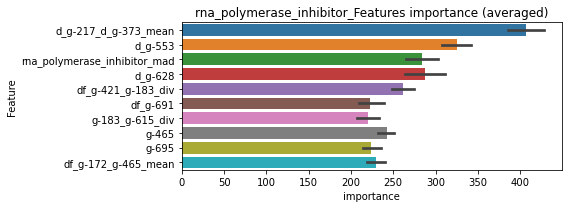

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629825	valid_1's binary_logloss: 0.0226805
[600]	training's binary_logloss: 0.000859641	valid_1's binary_logloss: 0.0108329
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000615473	valid_1's binary_logloss: 0.010059


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649555	valid_1's binary_logloss: 0.0109438
[600]	training's binary_logloss: 0.000876076	valid_1's binary_logloss: 0.00232112
[900]	training's binary_logloss: 0.000458227	valid_1's binary_logloss: 0.00145855
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.000447888	valid_1's binary_logloss: 0.00143552


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646739	valid_1's binary_logloss: 0.0127594
[600]	training's binary_logloss: 0.000874294	valid_1's binary_logloss: 0.0029713
[900]	training's binary_logloss: 0.000456959	valid_1's binary_logloss: 0.00198199
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.00044805	valid_1's binary_logloss: 0.00196084


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647975	valid_1's binary_logloss: 0.0186061
[600]	training's binary_logloss: 0.000865596	valid_1's binary_logloss: 0.00693518
[900]	training's binary_logloss: 0.000456905	valid_1's binary_logloss: 0.00550737
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000456905	valid_1's binary_logloss: 0.00550737


rna_polymerase_inhibitor logloss: 0.004741202191431567


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707826	valid_1's binary_logloss: 0.265779
[600]	training's binary_logloss: 0.0188843	valid_1's binary_logloss: 0.25843
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0194131	valid_1's binary_logloss: 0.25823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0656387	valid_1's binary_logloss: 0.258903
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.0233602	valid_1's binary_logloss: 0.24561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0701777	valid_1's binary_logloss: 0.233421
[600]	training's binary_logloss: 0.0180809	valid_1's binary_logloss: 0.216673
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.0193035	valid_1's binary_logloss: 0.216266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_loglos

1 / 3 AUC score:0.898


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.0363395	valid_1's binary_logloss: 0.255118


y_Threshold: 0.0839180, Threshold: 0.4114944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 403 → Positive_corect_labels: 513/3495
p_label_rate: 0.0100452 Vs.target_rate: 0.00991, Num_p_label: 40.0, conf_0:0.28805, conf_1:0.53494
threshold: 0.4114944, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 513.0/3495, y_label_rate: 0.1467811
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319131	valid_1's binary_logloss: 0.131273
[600]	training's binary_logloss: 0.00569524	valid_1's binary_logloss: 0.110079
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00624494	valid_1's binary_logloss: 0.109947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0292008	valid_1's binary_logloss: 0.133691
[600]	training's binary_logloss: 0.00518811	valid_1's binary_logloss: 0.112782
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00399421	valid_1's binary_logloss: 0.111072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303337	valid_1's binary_logloss: 0.138263
[600]	training's binary_logloss: 0.00536658	valid_1's binary_logloss: 0.118549
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00291026	valid_1's binary_logloss: 0.116487
Trai

2 / 3 AUC score:0.987
y_Threshold: 0.0917266, Threshold: 0.4114944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 463.0/3395
p_label_rate: 0.0288800 Vs.target_rate: 0.00991, Num_p_label: 115.0, conf_0:0.32920, conf_1:0.49379
Num_p_label: 115.0, Expected: 39.5, Adj_threshold_1: 0.4114944
Num_p_label: 109.0, Expected: 39.5, Adj_threshold_2: 0.4614944
Num_p_label: 96.0, Expected: 39.5, Adj_threshold_3: 0.5114944
Num_p_label: 83.0, Expected: 39.5, Adj_threshold_4: 0.5614944
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_5: 0.6114944
Num_p_label: 57.0, Expected: 39.5, Adj_threshold_6: 0.6614944
threshold: 0.6614944, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 463.0/3395, y_label_rate: 0.1363770
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221525	valid_1's binary_logloss: 0.118824
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00443927	valid_1's binary_logloss: 0.102789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209345	valid_1's binary_logloss: 0.122003
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00960871	valid_1's binary_logloss: 0.117446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0229216	valid_1's binary_logloss: 0.0970478
[600]	training's binary_logloss: 0.0037045	valid_1's binary_logloss: 0.0816721
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00289824	valid_1's binary_logloss: 0.0808253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207154	valid_1's binary_logloss: 0.134255
Early stopping, best 

3 / 3 AUC score:0.976
y_Threshold: 0.0802877, Threshold: 0.6614944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 420.0/3309
p_label_rate: 0.0220994 Vs.target_rate: 0.00991, Num_p_label: 88.0, conf_0:0.50000, conf_1:0.72764
Num_p_label: 88.0, Expected: 39.5, Adj_threshold_1: 0.6614944
Num_p_label: 74.0, Expected: 39.5, Adj_threshold_2: 0.7114944
Num_p_label: 48.0, Expected: 39.5, Adj_threshold_3: 0.7614944
threshold: 0.7614944, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 420.0/3309, y_label_rate: 0.1269266


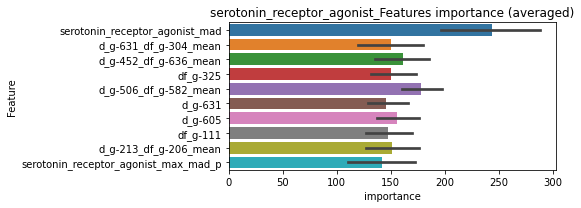

len(train_index) : 2481
len(valid_index) : 828
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158458	valid_1's binary_logloss: 0.0825175
[600]	training's binary_logloss: 0.00253766	valid_1's binary_logloss: 0.066507
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00183188	valid_1's binary_logloss: 0.0657451


len(train_index) : 2482
len(valid_index) : 827
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157415	valid_1's binary_logloss: 0.0814959
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00317431	valid_1's binary_logloss: 0.0691925


len(train_index) : 2482
len(valid_index) : 827
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164397	valid_1's binary_logloss: 0.0657472
[600]	training's binary_logloss: 0.00261384	valid_1's binary_logloss: 0.0434859
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00150207	valid_1's binary_logloss: 0.0397629


len(train_index) : 2482
len(valid_index) : 827
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161933	valid_1's binary_logloss: 0.0719906
[600]	training's binary_logloss: 0.0026024	valid_1's binary_logloss: 0.0531827
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00175102	valid_1's binary_logloss: 0.0519704


serotonin_receptor_agonist logloss: 0.05667043695296978


neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.116037	valid_1's binary_logloss: 0.386202
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.119419	valid_1's binary_logloss: 0.385813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.108672	valid_1's binary_logloss: 0.378887
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.095374	valid_1's binary_logloss: 0.37701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.118363	valid_1's binary_logloss: 0.366206
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.0798058	valid_1's binary_logloss: 0.361913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.110431	valid_1's binary_logloss: 0.374806
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.113041	valid_1's binary_logloss: 0.373745


1 / 3 AUC score:0.752
y_Threshold: 0.1569362, Threshold: 0.5336953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 719 → Positive_corect_labels: 353/3167
p_label_rate: 0.0100452 Vs.target_rate: 0.01696, Num_p_label: 40.0, conf_0:0.37359, conf_1:0.69380
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5336953
Num_p_label: 53.0, Expected: 67.6, Adj_threshold_2: 0.5036953
threshold: 0.5036953, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 353.0/3167, y_label_rate: 0.1114620
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0264751	valid_1's binary_logloss: 0.143618
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00997663	valid_1's binary_logloss: 0.136771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260296	valid_1's binary_logloss: 0.17908
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0108894	valid_1's binary_logloss: 0.172985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0262914	valid_1's binary_logloss: 0.16472
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00726014	valid_1's binary_logloss: 0.156348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0250581	valid_1's binary_logloss: 0.181045
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0185367	valid_1's binary_logloss: 0

2 / 3 AUC score:0.952
y_Threshold: 0.1089768, Threshold: 0.5036953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 275.0/3011
p_label_rate: 0.0416876 Vs.target_rate: 0.01696, Num_p_label: 166.0, conf_0:0.40296, conf_1:0.60443
Num_p_label: 166.0, Expected: 67.6, Adj_threshold_1: 0.5036953
Num_p_label: 145.0, Expected: 67.6, Adj_threshold_2: 0.5536953
Num_p_label: 128.0, Expected: 67.6, Adj_threshold_3: 0.6036953
Num_p_label: 108.0, Expected: 67.6, Adj_threshold_4: 0.6536953
Num_p_label: 91.0, Expected: 67.6, Adj_threshold_5: 0.7036953
threshold: 0.7036953, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 275.0/3011, y_label_rate: 0.0913318
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130183	valid_1's binary_logloss: 0.116284
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00505158	valid_1's binary_logloss: 0.11287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121524	valid_1's binary_logloss: 0.102808
[600]	training's binary_logloss: 0.00223976	valid_1's binary_logloss: 0.0958749
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00215563	valid_1's binary_logloss: 0.0957164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125155	valid_1's binary_logloss: 0.102701
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00728843	valid_1's binary_logloss: 0.0968022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122232	valid_1's binary_logloss: 0.116321


3 / 3 AUC score:0.979
y_Threshold: 0.0851340, Threshold: 0.7036953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 233.0/2927
p_label_rate: 0.0416876 Vs.target_rate: 0.01696, Num_p_label: 166.0, conf_0:0.50000, conf_1:0.77406
Num_p_label: 166.0, Expected: 67.6, Adj_threshold_1: 0.7036953
Num_p_label: 144.0, Expected: 67.6, Adj_threshold_2: 0.7536953
threshold: 0.7536953, positive_p_label: 144.0/3982, p_label_rate: 0.0361627


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00724939	valid_1's binary_logloss: 0.111898


positive_y_label: 233.0/2927, y_label_rate: 0.0796037


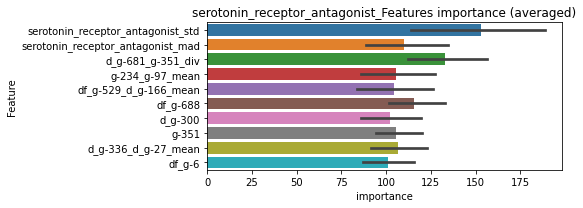

len(train_index) : 2195
len(valid_index) : 732
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823352	valid_1's binary_logloss: 0.0675931


len(train_index) : 2195
len(valid_index) : 732
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00492034	valid_1's binary_logloss: 0.0632674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790586	valid_1's binary_logloss: 0.0804489


len(train_index) : 2195
len(valid_index) : 732
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00361853	valid_1's binary_logloss: 0.0777977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0078226	valid_1's binary_logloss: 0.0817712


len(train_index) : 2196
len(valid_index) : 731
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00499469	valid_1's binary_logloss: 0.0786044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868215	valid_1's binary_logloss: 0.0800385


serotonin_receptor_antagonist logloss: 0.0732444061575121


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00299347	valid_1's binary_logloss: 0.0733082
neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161172	valid_1's binary_logloss: 0.0536371
[600]	training's binary_logloss: 0.00218243	valid_1's binary_logloss: 0.0240116
[900]	training's binary_logloss: 0.000896107	valid_1's binary_logloss: 0.0189975
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000737725	valid_1's binary_logloss: 0.018141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151936	valid_1's binary_logloss: 0.0502591
[600]	training's binary_logloss: 0.0020729	valid_1's binary_logloss: 0.0255007
[900]	training's binary_logloss: 0.000876547	valid_1's binary_logloss: 0.021835
Early stopping, best iteration is:
[1058]	training's binary_logloss: 0.000726895	valid_1's binary_logloss: 0.0214818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166136	valid_1's binary_logloss: 0.0439706
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0114709, Threshold: 0.1183481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00185, Num_p_label: 40.0, conf_0:0.08284, conf_1:0.15385
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.1183481
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_2: 0.1683481
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_3: 0.2183481
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_4: 0.2683481
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.3183481
threshold: 0.3183481, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134874	valid_1's binary_logloss: 0.0573422
[600]	training's binary_logloss: 0.00179269	valid_1's binary_logloss: 0.0345753
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00155943	valid_1's binary_logloss: 0.0336765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014081	valid_1's binary_logloss: 0.0449883
[600]	training's binary_logloss: 0.00185198	valid_1's binary_logloss: 0.0235199
[900]	training's binary_logloss: 0.000803776	valid_1's binary_logloss: 0.020903
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000654275	valid_1's binary_logloss: 0.0203404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147831	valid_1's binary_logloss: 0.0357493
[600]	training's binary_logloss: 0.00196813	valid_1's binary_logloss: 0.0110106
[900]	training's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0874342, Threshold: 0.3183481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0193370 Vs.target_rate: 0.00185, Num_p_label: 77.0, conf_0:0.25468, conf_1:0.38202
Num_p_label: 77.0, Expected: 7.4, Adj_threshold_1: 0.3183481
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.3683481
Num_p_label: 52.0, Expected: 7.4, Adj_threshold_3: 0.4183481
Num_p_label: 49.0, Expected: 7.4, Adj_threshold_4: 0.4683481
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_5: 0.5183481
Num_p_label: 38.0, Expected: 7.4, Adj_threshold_6: 0.5683481
Num_p_label: 34.0, Expected: 7.4, Adj_threshold_7: 0.6183481
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_8: 0.6683481
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_9: 0.7183481
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_10: 0.7683481
threshold: 0.7683481, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127898	valid_1's binary_logloss: 0.0620797
[600]	training's binary_logloss: 0.00170263	valid_1's binary_logloss: 0.0427201
[900]	training's binary_logloss: 0.000758913	valid_1's binary_logloss: 0.0395957
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00070038	valid_1's binary_logloss: 0.0392069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133922	valid_1's binary_logloss: 0.0346713
[600]	training's binary_logloss: 0.0017496	valid_1's binary_logloss: 0.0111664
[900]	training's binary_logloss: 0.000770959	valid_1's binary_logloss: 0.0077308
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000661695	valid_1's binary_logloss: 0.00736454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138204	valid_1's binary_logloss: 0.0414633
[600]	training's binary_lo

3 / 3 AUC score:0.999
y_Threshold: 0.0736327, Threshold: 0.7683481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 640.0/3776
p_label_rate: 0.0065294 Vs.target_rate: 0.00185, Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_1: 0.7683481
threshold: 0.7683481, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 640.0/3776, y_label_rate: 0.1694915


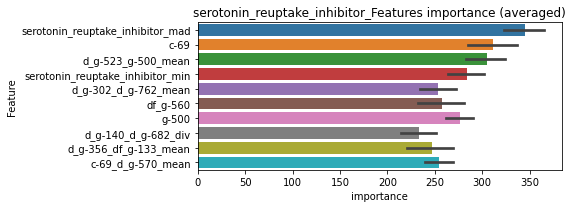

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132328	valid_1's binary_logloss: 0.041502
[600]	training's binary_logloss: 0.00168072	valid_1's binary_logloss: 0.0164028
[900]	training's binary_logloss: 0.000737657	valid_1's binary_logloss: 0.0122531
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000727053	valid_1's binary_logloss: 0.0122199


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123071	valid_1's binary_logloss: 0.0428183
[600]	training's binary_logloss: 0.00164224	valid_1's binary_logloss: 0.0186842
[900]	training's binary_logloss: 0.000741843	valid_1's binary_logloss: 0.014884
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.000630457	valid_1's binary_logloss: 0.014455


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125617	valid_1's binary_logloss: 0.0354535
[600]	training's binary_logloss: 0.00168829	valid_1's binary_logloss: 0.0154728
[900]	training's binary_logloss: 0.000755735	valid_1's binary_logloss: 0.0119637
Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000630554	valid_1's binary_logloss: 0.0112795


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127821	valid_1's binary_logloss: 0.0391555
[600]	training's binary_logloss: 0.00168294	valid_1's binary_logloss: 0.0153035
[900]	training's binary_logloss: 0.000756217	valid_1's binary_logloss: 0.01146
[1200]	training's binary_logloss: 0.000629843	valid_1's binary_logloss: 0.0108886
Early stopping, best iteration is:
[1171]	training's binary_logloss: 0.00062985	valid_1's binary_logloss: 0.0108884


serotonin_reuptake_inhibitor logloss: 0.012224015411055488


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012325	valid_1's binary_logloss: 0.0361708
[600]	training's binary_logloss: 0.00153678	valid_1's binary_logloss: 0.01562
[900]	training's binary_logloss: 0.00068604	valid_1's binary_logloss: 0.012594
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000638284	valid_1's binary_logloss: 0.0124353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130476	valid_1's binary_logloss: 0.0300811
[600]	training's binary_logloss: 0.00162254	valid_1's binary_logloss: 0.00917137
[900]	training's binary_logloss: 0.000715913	valid_1's binary_logloss: 0.00637812
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000656728	valid_1's binary_logloss: 0.00617337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013181	valid_1's binary_logloss: 0.0349269
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0116588, Threshold: 0.0784302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.05490, conf_1:0.10196
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0784302
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1284302
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1784302
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_4: 0.2284302
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.2784302
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_6: 0.3284302
threshold: 0.3284302, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999916	valid_1's binary_logloss: 0.030896
[600]	training's binary_logloss: 0.00128451	valid_1's binary_logloss: 0.0129066
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000636949	valid_1's binary_logloss: 0.0103727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00994722	valid_1's binary_logloss: 0.0245757
[600]	training's binary_logloss: 0.00130507	valid_1's binary_logloss: 0.00915175
[900]	training's binary_logloss: 0.000608672	valid_1's binary_logloss: 0.00689465
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000551564	valid_1's binary_logloss: 0.00660891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102665	valid_1's binary_logloss: 0.020998
[600]	training's binary_logloss: 0.00128644	valid_1's binary_logloss: 0.00537722
[900]	training's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0880007, Threshold: 0.3284302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0082873 Vs.target_rate: 0.00151, Num_p_label: 33.0, conf_0:0.26274, conf_1:0.39412
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.3284302
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_2: 0.3784302
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_3: 0.4284302
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_4: 0.4784302
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_5: 0.5284302
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_6: 0.5784302
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_7: 0.6284302
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_8: 0.6784302
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_9: 0.7284302
threshold: 0.7284302, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960076	valid_1's binary_logloss: 0.0271433
[600]	training's binary_logloss: 0.00126596	valid_1's binary_logloss: 0.0112515
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000646418	valid_1's binary_logloss: 0.00957469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103251	valid_1's binary_logloss: 0.0197801
[600]	training's binary_logloss: 0.00130802	valid_1's binary_logloss: 0.00454086
[900]	training's binary_logloss: 0.000606669	valid_1's binary_logloss: 0.00273484
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000564745	valid_1's binary_logloss: 0.00264883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969259	valid_1's binary_logloss: 0.0254962
[600]	training's binary_logloss: 0.00126353	valid_1's binary_logloss: 0.00891709
[900]	training's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1109868, Threshold: 0.7284302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0032647 Vs.target_rate: 0.00151, Num_p_label: 13.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.7284302
threshold: 0.7284302, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


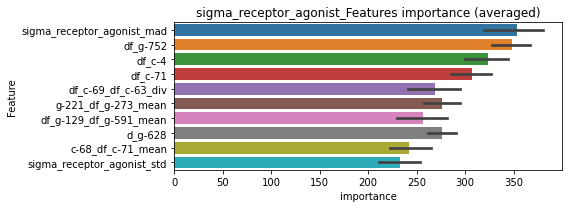

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102253	valid_1's binary_logloss: 0.0300469
[600]	training's binary_logloss: 0.00128363	valid_1's binary_logloss: 0.0137239
[900]	training's binary_logloss: 0.000602717	valid_1's binary_logloss: 0.011997
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000624754	valid_1's binary_logloss: 0.0118737


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103201	valid_1's binary_logloss: 0.0201833
[600]	training's binary_logloss: 0.00129759	valid_1's binary_logloss: 0.00448217
[900]	training's binary_logloss: 0.000612982	valid_1's binary_logloss: 0.00282649
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000569448	valid_1's binary_logloss: 0.00270027


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988248	valid_1's binary_logloss: 0.0257087
[600]	training's binary_logloss: 0.00126874	valid_1's binary_logloss: 0.00888589
[900]	training's binary_logloss: 0.000602705	valid_1's binary_logloss: 0.0068502
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000562202	valid_1's binary_logloss: 0.00666457


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00974532	valid_1's binary_logloss: 0.0310616
[600]	training's binary_logloss: 0.00127877	valid_1's binary_logloss: 0.0119436
[900]	training's binary_logloss: 0.000599733	valid_1's binary_logloss: 0.00928679
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000568104	valid_1's binary_logloss: 0.00911635


sigma_receptor_agonist logloss: 0.007591416867100178


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120005	valid_1's binary_logloss: 0.0453895
[600]	training's binary_logloss: 0.00157187	valid_1's binary_logloss: 0.0210919
[900]	training's binary_logloss: 0.000703898	valid_1's binary_logloss: 0.0172
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000672556	valid_1's binary_logloss: 0.0168911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121985	valid_1's binary_logloss: 0.0483544
[600]	training's binary_logloss: 0.00156644	valid_1's binary_logloss: 0.0275798
[900]	training's binary_logloss: 0.000696962	valid_1's binary_logloss: 0.0245655
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000726923	valid_1's binary_logloss: 0.0244722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123337	valid_1's binary_logloss: 0.0316546
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0100977, Threshold: 0.0931200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.06518, conf_1:0.12106
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0931200
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_2: 0.1431200
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_3: 0.1931200
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.2431200
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_5: 0.2931200
threshold: 0.2931200, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103939	valid_1's binary_logloss: 0.039102
[600]	training's binary_logloss: 0.00134318	valid_1's binary_logloss: 0.0180596
[900]	training's binary_logloss: 0.00062625	valid_1's binary_logloss: 0.0149041
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000623035	valid_1's binary_logloss: 0.014837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104491	valid_1's binary_logloss: 0.0382686
[600]	training's binary_logloss: 0.00135464	valid_1's binary_logloss: 0.0200904
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000908739	valid_1's binary_logloss: 0.0184724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110662	valid_1's binary_logloss: 0.0241245
[600]	training's binary_logloss: 0.00140879	valid_1's binary_logloss: 0.0075149
[900]	training's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.1509477, Threshold: 0.2931200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0158212 Vs.target_rate: 0.00151, Num_p_label: 63.0, conf_0:0.23450, conf_1:0.35174
Num_p_label: 63.0, Expected: 6.0, Adj_threshold_1: 0.2931200
Num_p_label: 58.0, Expected: 6.0, Adj_threshold_2: 0.3431200
Num_p_label: 54.0, Expected: 6.0, Adj_threshold_3: 0.3931200
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_4: 0.4431200
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_5: 0.4931200
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_6: 0.5431200
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_7: 0.5931200
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_8: 0.6431200
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_9: 0.6931200
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_10: 0.7431200
threshold: 0.7431200, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103932	valid_1's binary_logloss: 0.0326118
[600]	training's binary_logloss: 0.00134099	valid_1's binary_logloss: 0.0112659
[900]	training's binary_logloss: 0.000619483	valid_1's binary_logloss: 0.00809873
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000567451	valid_1's binary_logloss: 0.00781656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105	valid_1's binary_logloss: 0.0259532
[600]	training's binary_logloss: 0.00133485	valid_1's binary_logloss: 0.00866078
[900]	training's binary_logloss: 0.000622801	valid_1's binary_logloss: 0.00636852
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000580914	valid_1's binary_logloss: 0.00625425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979818	valid_1's binary_logloss: 0.0369618
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.2361033, Threshold: 0.7431200, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0055249 Vs.target_rate: 0.00151, Num_p_label: 22.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.7431200
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.7931200
threshold: 0.7931200, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


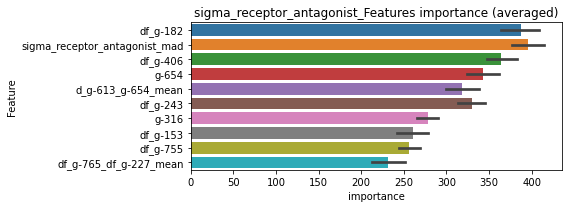

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105145	valid_1's binary_logloss: 0.0296611
[600]	training's binary_logloss: 0.00133611	valid_1's binary_logloss: 0.00989233
[900]	training's binary_logloss: 0.000629589	valid_1's binary_logloss: 0.00712366
Early stopping, best iteration is:
[1156]	training's binary_logloss: 0.000545105	valid_1's binary_logloss: 0.00669671


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101078	valid_1's binary_logloss: 0.0261826
[600]	training's binary_logloss: 0.00131324	valid_1's binary_logloss: 0.00785423
[900]	training's binary_logloss: 0.000618566	valid_1's binary_logloss: 0.00533259
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.00055587	valid_1's binary_logloss: 0.00514335


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010101	valid_1's binary_logloss: 0.0439492
[600]	training's binary_logloss: 0.00129029	valid_1's binary_logloss: 0.0278598
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.0012751	valid_1's binary_logloss: 0.0278172


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010295	valid_1's binary_logloss: 0.0229839
[600]	training's binary_logloss: 0.00134423	valid_1's binary_logloss: 0.00652704
[900]	training's binary_logloss: 0.000626016	valid_1's binary_logloss: 0.00436333
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000578182	valid_1's binary_logloss: 0.00418906


sigma_receptor_antagonist logloss: 0.010959746456662188


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856653	valid_1's binary_logloss: 0.0209335
[600]	training's binary_logloss: 0.00102664	valid_1's binary_logloss: 0.00611024
[900]	training's binary_logloss: 0.00049827	valid_1's binary_logloss: 0.0045142
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000466913	valid_1's binary_logloss: 0.00442371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874899	valid_1's binary_logloss: 0.0207256
[600]	training's binary_logloss: 0.0010339	valid_1's binary_logloss: 0.00558111
[900]	training's binary_logloss: 0.000490663	valid_1's binary_logloss: 0.00384352
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000460595	valid_1's binary_logloss: 0.00371836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902319	valid_1's binary_logloss: 0.0179003
[600]	training's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0066318, Threshold: 0.0358677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.02511, conf_1:0.04663
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0358677
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_2: 0.0858677
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.1358677
threshold: 0.1358677, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719098	valid_1's binary_logloss: 0.0180634
[600]	training's binary_logloss: 0.000912068	valid_1's binary_logloss: 0.00531996
[900]	training's binary_logloss: 0.000451209	valid_1's binary_logloss: 0.00399903
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000447064	valid_1's binary_logloss: 0.00398869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709637	valid_1's binary_logloss: 0.0153226
[600]	training's binary_logloss: 0.000912742	valid_1's binary_logloss: 0.00376136
[900]	training's binary_logloss: 0.000452667	valid_1's binary_logloss: 0.00250793
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000434558	valid_1's binary_logloss: 0.00247293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071481	valid_1's binary_logloss: 0.0125783
[600]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0893741, Threshold: 0.1358677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0062783 Vs.target_rate: 0.00105, Num_p_label: 25.0, conf_0:0.10869, conf_1:0.16304
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_1: 0.1358677
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_2: 0.1858677
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_3: 0.2358677
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_4: 0.2858677
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_5: 0.3358677
threshold: 0.3358677, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719098	valid_1's binary_logloss: 0.0180634
[600]	training's binary_logloss: 0.000912068	valid_1's binary_logloss: 0.00531996
[900]	training's binary_logloss: 0.000451209	valid_1's binary_logloss: 0.00399903
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000447064	valid_1's binary_logloss: 0.00398869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709637	valid_1's binary_logloss: 0.0153226
[600]	training's binary_logloss: 0.000912742	valid_1's binary_logloss: 0.00376136
[900]	training's binary_logloss: 0.000452667	valid_1's binary_logloss: 0.00250793
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000434558	valid_1's binary_logloss: 0.00247293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071481	valid_1's binary_logloss: 0.0125783
[600]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0893741, Threshold: 0.3358677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.30228, conf_1:0.36945
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.3358677
threshold: 0.3358677, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


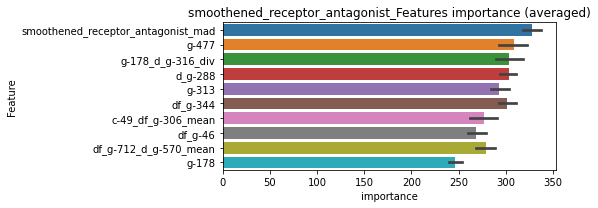

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697546	valid_1's binary_logloss: 0.0187197
[600]	training's binary_logloss: 0.000896378	valid_1's binary_logloss: 0.00566826
[900]	training's binary_logloss: 0.000455089	valid_1's binary_logloss: 0.00433581
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000447506	valid_1's binary_logloss: 0.00428993


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705703	valid_1's binary_logloss: 0.0158792
[600]	training's binary_logloss: 0.000908966	valid_1's binary_logloss: 0.00410682
[900]	training's binary_logloss: 0.000451992	valid_1's binary_logloss: 0.00277427
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000422511	valid_1's binary_logloss: 0.00268742


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722865	valid_1's binary_logloss: 0.0125954
[600]	training's binary_logloss: 0.000932435	valid_1's binary_logloss: 0.00276763
[900]	training's binary_logloss: 0.000460179	valid_1's binary_logloss: 0.00174065
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000432843	valid_1's binary_logloss: 0.0016722


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0070738	valid_1's binary_logloss: 0.0148787
[600]	training's binary_logloss: 0.000909849	valid_1's binary_logloss: 0.00332937
[900]	training's binary_logloss: 0.000454664	valid_1's binary_logloss: 0.00210397
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000431355	valid_1's binary_logloss: 0.00203097


smoothened_receptor_antagonist logloss: 0.002671608641568002


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0777719	valid_1's binary_logloss: 0.298239
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0410804	valid_1's binary_logloss: 0.290751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0812667	valid_1's binary_logloss: 0.295735
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.0436016	valid_1's binary_logloss: 0.290857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.08207	valid_1's binary_logloss: 0.295507
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0593984	valid_1's binary_logloss: 0.291607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0839937	valid_1's binary_logloss: 0.285945
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0428473	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.859
y_Threshold: 0.1144948, Threshold: 0.3705227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 503 → Positive_corect_labels: 466/3410
p_label_rate: 0.0100452 Vs.target_rate: 0.01121, Num_p_label: 40.0, conf_0:0.25937, conf_1:0.48168
threshold: 0.3705227, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 466.0/3410, y_label_rate: 0.1366569
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282369	valid_1's binary_logloss: 0.135512
[600]	training's binary_logloss: 0.00494964	valid_1's binary_logloss: 0.115569
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00454917	valid_1's binary_logloss: 0.114663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301477	valid_1's binary_logloss: 0.133632
[600]	training's binary_logloss: 0.00520294	valid_1's binary_logloss: 0.116487
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00530002	valid_1's binary_logloss: 0.116105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0297265	valid_1's binary_logloss: 0.132566
[600]	training's binary_logloss: 0.00526692	valid_1's binary_logloss: 0.113355
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00539388	valid_1's binary_logloss: 0.113161
Trai

2 / 3 AUC score:0.987
y_Threshold: 0.1041809, Threshold: 0.3705227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 408.0/3294
p_label_rate: 0.0431944 Vs.target_rate: 0.01121, Num_p_label: 172.0, conf_0:0.29642, conf_1:0.44463
Num_p_label: 172.0, Expected: 44.6, Adj_threshold_1: 0.3705227
Num_p_label: 160.0, Expected: 44.6, Adj_threshold_2: 0.4205227
Num_p_label: 136.0, Expected: 44.6, Adj_threshold_3: 0.4705227
Num_p_label: 123.0, Expected: 44.6, Adj_threshold_4: 0.5205227
Num_p_label: 110.0, Expected: 44.6, Adj_threshold_5: 0.5705227
Num_p_label: 102.0, Expected: 44.6, Adj_threshold_6: 0.6205227
Num_p_label: 86.0, Expected: 44.6, Adj_threshold_7: 0.6705227
Num_p_label: 74.0, Expected: 44.6, Adj_threshold_8: 0.7205227
Num_p_label: 59.0, Expected: 44.6, Adj_threshold_9: 0.7705227
threshold: 0.7705227, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 408.0/3294, y_label_rate: 0.1238616
================= Pseudo labeling 3 / 3 ==============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195322	valid_1's binary_logloss: 0.0892076
[600]	training's binary_logloss: 0.00307851	valid_1's binary_logloss: 0.0707564
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.0025069	valid_1's binary_logloss: 0.0699129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183704	valid_1's binary_logloss: 0.110781
[600]	training's binary_logloss: 0.00289377	valid_1's binary_logloss: 0.102384
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00317872	valid_1's binary_logloss: 0.101937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018714	valid_1's binary_logloss: 0.0957882
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00359877	valid_1's binary_logloss: 0.0830236
Training until validation scores don't improve for 30 rounds
[300]	training's bi

3 / 3 AUC score:0.986
y_Threshold: 0.0770694, Threshold: 0.7705227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 376.0/3230
p_label_rate: 0.0346560 Vs.target_rate: 0.01121, Num_p_label: 138.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 138.0, Expected: 44.6, Adj_threshold_1: 0.7705227


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00928436	valid_1's binary_logloss: 0.112009


threshold: 0.7705227, positive_p_label: 138.0/3982, p_label_rate: 0.0346560
positive_y_label: 376.0/3230, y_label_rate: 0.1164087


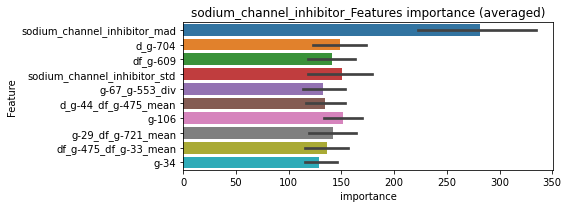

len(train_index) : 2422
len(valid_index) : 808
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126265	valid_1's binary_logloss: 0.0912264


len(train_index) : 2422
len(valid_index) : 808
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00728979	valid_1's binary_logloss: 0.0877929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138	valid_1's binary_logloss: 0.0839284
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.0028324	valid_1's binary_logloss: 0.0705046


len(train_index) : 2423
len(valid_index) : 807
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138837	valid_1's binary_logloss: 0.0734336
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00281384	valid_1's binary_logloss: 0.0627446


len(train_index) : 2423
len(valid_index) : 807
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131665	valid_1's binary_logloss: 0.0868868
[600]	training's binary_logloss: 0.00210155	valid_1's binary_logloss: 0.0721326
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00171048	valid_1's binary_logloss: 0.0714668


sodium_channel_inhibitor logloss: 0.07313093471347508


neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109216	valid_1's binary_logloss: 0.0453323
[600]	training's binary_logloss: 0.00136586	valid_1's binary_logloss: 0.0229062
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000713451	valid_1's binary_logloss: 0.0201284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111636	valid_1's binary_logloss: 0.030327
[600]	training's binary_logloss: 0.0014328	valid_1's binary_logloss: 0.0129608
[900]	training's binary_logloss: 0.000639797	valid_1's binary_logloss: 0.0106099
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000580132	valid_1's binary_logloss: 0.0104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011121	valid_1's binary_logloss: 0.0302358
[600]	training's binary_logloss: 0.0014086	valid_1's binary_logloss: 0.0126953
[900]	training's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0096707, Threshold: 0.0513140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.03592, conf_1:0.06671
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0513140
Num_p_label: 20.0, Expected: 5.4, Adj_threshold_2: 0.1013140
Num_p_label: 17.0, Expected: 5.4, Adj_threshold_3: 0.1513140
Num_p_label: 11.0, Expected: 5.4, Adj_threshold_4: 0.2013140
threshold: 0.2013140, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888014	valid_1's binary_logloss: 0.032915
[600]	training's binary_logloss: 0.00118354	valid_1's binary_logloss: 0.0173938
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00107265	valid_1's binary_logloss: 0.0171539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00873172	valid_1's binary_logloss: 0.0238396
[600]	training's binary_logloss: 0.00115764	valid_1's binary_logloss: 0.00893213
[900]	training's binary_logloss: 0.000542923	valid_1's binary_logloss: 0.00676899
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000523992	valid_1's binary_logloss: 0.00673664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918203	valid_1's binary_logloss: 0.0396698
[600]	training's binary_logloss: 0.00118705	valid_1's binary_logloss: 0.0233599
Early stopping, best it

2 / 3 AUC score:1.000
y_Threshold: 0.0734191, Threshold: 0.2013140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3790
p_label_rate: 0.0082873 Vs.target_rate: 0.00134, Num_p_label: 33.0, conf_0:0.16105, conf_1:0.24158
Num_p_label: 33.0, Expected: 5.4, Adj_threshold_1: 0.2013140
Num_p_label: 25.0, Expected: 5.4, Adj_threshold_2: 0.2513140
Num_p_label: 22.0, Expected: 5.4, Adj_threshold_3: 0.3013140
Num_p_label: 21.0, Expected: 5.4, Adj_threshold_4: 0.3513140
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_5: 0.4013140
Num_p_label: 18.0, Expected: 5.4, Adj_threshold_6: 0.4513140
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_7: 0.5013140
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_8: 0.5513140
threshold: 0.5513140, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891747	valid_1's binary_logloss: 0.0335207
[600]	training's binary_logloss: 0.00112336	valid_1's binary_logloss: 0.0163696
[900]	training's binary_logloss: 0.000525602	valid_1's binary_logloss: 0.0142915
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000526646	valid_1's binary_logloss: 0.0142892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00896039	valid_1's binary_logloss: 0.0233245
[600]	training's binary_logloss: 0.0011536	valid_1's binary_logloss: 0.00948029
[900]	training's binary_logloss: 0.000539854	valid_1's binary_logloss: 0.0076106
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000508709	valid_1's binary_logloss: 0.00752616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863249	valid_1's binary_logloss: 0.0369324
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0654256, Threshold: 0.5513140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0035158 Vs.target_rate: 0.00134, Num_p_label: 14.0, conf_0:0.49618, conf_1:0.60645
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_1: 0.5513140
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_2: 0.6013140
threshold: 0.6013140, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 643.0/3780, y_label_rate: 0.1701058


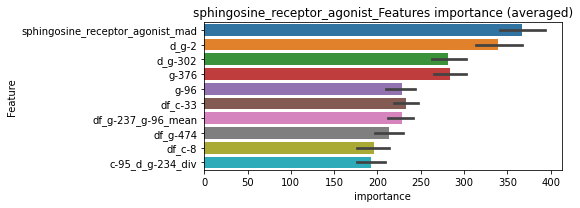

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00864939	valid_1's binary_logloss: 0.029553
[600]	training's binary_logloss: 0.00109743	valid_1's binary_logloss: 0.0136382
[900]	training's binary_logloss: 0.00052174	valid_1's binary_logloss: 0.0113813
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000525161	valid_1's binary_logloss: 0.011376


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871241	valid_1's binary_logloss: 0.0293741
[600]	training's binary_logloss: 0.00112257	valid_1's binary_logloss: 0.0136986
[900]	training's binary_logloss: 0.00052415	valid_1's binary_logloss: 0.011415
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000483913	valid_1's binary_logloss: 0.0112119


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00823001	valid_1's binary_logloss: 0.0228592
[600]	training's binary_logloss: 0.00110967	valid_1's binary_logloss: 0.00825306
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000559181	valid_1's binary_logloss: 0.00644306


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825057	valid_1's binary_logloss: 0.0309908
[600]	training's binary_logloss: 0.00109951	valid_1's binary_logloss: 0.0181349
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000663917	valid_1's binary_logloss: 0.0171286


sphingosine_receptor_agonist logloss: 0.011539911904258331


neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246714	valid_1's binary_logloss: 0.0890859
[600]	training's binary_logloss: 0.00381494	valid_1's binary_logloss: 0.0620217
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.00161253	valid_1's binary_logloss: 0.0579214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0245155	valid_1's binary_logloss: 0.0898531
[600]	training's binary_logloss: 0.00378005	valid_1's binary_logloss: 0.0585084
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.00178239	valid_1's binary_logloss: 0.0529641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230149	valid_1's binary_logloss: 0.101404
[600]	training's binary_logloss: 0.00355696	valid_1's binary_logloss: 0.0737933
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.0020019	valid_1's binary_logloss: 0.07176

1 / 3 AUC score:0.995
y_Threshold: 0.0254190, Threshold: 0.2073933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00298, Num_p_label: 40.0, conf_0:0.14518, conf_1:0.26961
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.2073933
Num_p_label: 30.0, Expected: 11.9, Adj_threshold_2: 0.2573933
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_3: 0.3073933
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_4: 0.3573933
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_5: 0.4073933
threshold: 0.4073933, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 638.0/3767, y_label_rate: 0.1693655
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171673	valid_1's binary_logloss: 0.069189
[600]	training's binary_logloss: 0.00259202	valid_1's binary_logloss: 0.0477594
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00131211	valid_1's binary_logloss: 0.0452409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175681	valid_1's binary_logloss: 0.0639827
[600]	training's binary_logloss: 0.00268492	valid_1's binary_logloss: 0.0383488
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00131392	valid_1's binary_logloss: 0.0346053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167844	valid_1's binary_logloss: 0.0658295
[600]	training's binary_logloss: 0.00252674	valid_1's binary_logloss: 0.0368542
[900]	training's binary_logloss: 0.00106256	valid_1's binary_logloss: 0.0309908
Early stopping, best iteration 

2 / 3 AUC score:0.998
y_Threshold: 0.1200923, Threshold: 0.4073933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 618.0/3727
p_label_rate: 0.0158212 Vs.target_rate: 0.00298, Num_p_label: 63.0, conf_0:0.32591, conf_1:0.48887
Num_p_label: 63.0, Expected: 11.9, Adj_threshold_1: 0.4073933
Num_p_label: 58.0, Expected: 11.9, Adj_threshold_2: 0.4573933
Num_p_label: 51.0, Expected: 11.9, Adj_threshold_3: 0.5073933
Num_p_label: 43.0, Expected: 11.9, Adj_threshold_4: 0.5573933
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_5: 0.6073933
Num_p_label: 36.0, Expected: 11.9, Adj_threshold_6: 0.6573933
Num_p_label: 30.0, Expected: 11.9, Adj_threshold_7: 0.7073933
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_8: 0.7573933
threshold: 0.7573933, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 618.0/3727, y_label_rate: 0.1658170
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150758	valid_1's binary_logloss: 0.064282
[600]	training's binary_logloss: 0.00223904	valid_1's binary_logloss: 0.0398311
[900]	training's binary_logloss: 0.000952291	valid_1's binary_logloss: 0.035204
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000800388	valid_1's binary_logloss: 0.0343901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154718	valid_1's binary_logloss: 0.0532535
[600]	training's binary_logloss: 0.00226707	valid_1's binary_logloss: 0.0304622
[900]	training's binary_logloss: 0.000970834	valid_1's binary_logloss: 0.0266091
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000883553	valid_1's binary_logloss: 0.0262505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150928	valid_1's binary_logloss: 0.0618914
[600]	training's binary_log

3 / 3 AUC score:0.996
y_Threshold: 0.1162917, Threshold: 0.7573933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 603.0/3697
p_label_rate: 0.0090407 Vs.target_rate: 0.00298, Num_p_label: 36.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 36.0, Expected: 11.9, Adj_threshold_1: 0.7573933
threshold: 0.7573933, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 603.0/3697, y_label_rate: 0.1631052


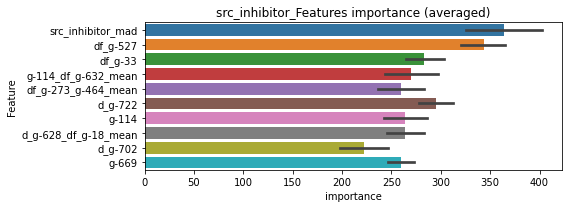

len(train_index) : 2772
len(valid_index) : 925
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014553	valid_1's binary_logloss: 0.0554259
[600]	training's binary_logloss: 0.00215202	valid_1's binary_logloss: 0.0308399
[900]	training's binary_logloss: 0.000919642	valid_1's binary_logloss: 0.026682
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000925473	valid_1's binary_logloss: 0.0266235


len(train_index) : 2773
len(valid_index) : 924
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140057	valid_1's binary_logloss: 0.0621077
[600]	training's binary_logloss: 0.00202794	valid_1's binary_logloss: 0.0416454
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00161096	valid_1's binary_logloss: 0.0406313


len(train_index) : 2773
len(valid_index) : 924
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142464	valid_1's binary_logloss: 0.0600156
[600]	training's binary_logloss: 0.00208482	valid_1's binary_logloss: 0.0402629
[900]	training's binary_logloss: 0.000903375	valid_1's binary_logloss: 0.0367909
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000782303	valid_1's binary_logloss: 0.0363706


len(train_index) : 2773
len(valid_index) : 924
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140522	valid_1's binary_logloss: 0.0813456
[600]	training's binary_logloss: 0.00205175	valid_1's binary_logloss: 0.0636473
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.0016316	valid_1's binary_logloss: 0.062939


src_inhibitor logloss: 0.04163706124825103


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.024003	valid_1's binary_logloss: 0.115047
[600]	training's binary_logloss: 0.00364651	valid_1's binary_logloss: 0.0927442
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00410608	valid_1's binary_logloss: 0.0925901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0240828	valid_1's binary_logloss: 0.0978049
[600]	training's binary_logloss: 0.00365857	valid_1's binary_logloss: 0.0766149
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.00199308	valid_1's binary_logloss: 0.0752197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0261195	valid_1's binary_logloss: 0.0924908
[600]	training's binary_logloss: 0.00417112	valid_1's binary_logloss: 0.0609361
[900]	training's binary_logloss: 0.00148291	valid_1's binary_logloss: 0.0545743
Early stopping, best iteration i

1 / 3 AUC score:0.990
y_Threshold: 0.0297021, Threshold: 0.4582040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 635/3759
p_label_rate: 0.0100452 Vs.target_rate: 0.00332, Num_p_label: 40.0, conf_0:0.32074, conf_1:0.59567
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.4582040
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_2: 0.5082040
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_3: 0.5582040
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_4: 0.6082040
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_5: 0.6582040
Num_p_label: 16.0, Expected: 13.2, Adj_threshold_6: 0.7082040
threshold: 0.7082040, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178011	valid_1's binary_logloss: 0.076912
[600]	training's binary_logloss: 0.00255403	valid_1's binary_logloss: 0.0578455
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00127581	valid_1's binary_logloss: 0.0558242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192901	valid_1's binary_logloss: 0.0681644
[600]	training's binary_logloss: 0.00274936	valid_1's binary_logloss: 0.0376008
[900]	training's binary_logloss: 0.00110085	valid_1's binary_logloss: 0.0315822
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000937817	valid_1's binary_logloss: 0.0309448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190696	valid_1's binary_logloss: 0.069641
[600]	training's binary_logloss: 0.0027824	valid_1's binary_logloss: 0.0432124
Early stopping, best iteration 

2 / 3 AUC score:0.998
y_Threshold: 0.1138081, Threshold: 0.7082040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 617.0/3723
p_label_rate: 0.0133099 Vs.target_rate: 0.00332, Num_p_label: 53.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 53.0, Expected: 13.2, Adj_threshold_1: 0.7082040
Num_p_label: 49.0, Expected: 13.2, Adj_threshold_2: 0.7582040
threshold: 0.7582040, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 617.0/3723, y_label_rate: 0.1657266
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158335	valid_1's binary_logloss: 0.0564207
[600]	training's binary_logloss: 0.00219479	valid_1's binary_logloss: 0.0315535
[900]	training's binary_logloss: 0.000940394	valid_1's binary_logloss: 0.0278982
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000900892	valid_1's binary_logloss: 0.0274939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016433	valid_1's binary_logloss: 0.0595304
[600]	training's binary_logloss: 0.00229963	valid_1's binary_logloss: 0.0378232
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00105679	valid_1's binary_logloss: 0.0345782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166327	valid_1's binary_logloss: 0.0523948
[600]	training's binary_logloss: 0.00234521	valid_1's binary_logloss: 0.027695
[900]	training's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.1214796, Threshold: 0.7582040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 605.0/3699
p_label_rate: 0.0135610 Vs.target_rate: 0.00332, Num_p_label: 54.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 54.0, Expected: 13.2, Adj_threshold_1: 0.7582040
threshold: 0.7582040, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 605.0/3699, y_label_rate: 0.1635577


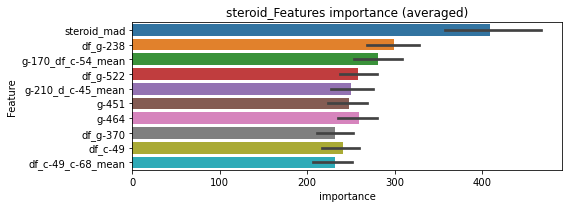

len(train_index) : 2774
len(valid_index) : 925
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151555	valid_1's binary_logloss: 0.0531571
[600]	training's binary_logloss: 0.00213503	valid_1's binary_logloss: 0.0244631
[900]	training's binary_logloss: 0.000914792	valid_1's binary_logloss: 0.0189548
Early stopping, best iteration is:
[1070]	training's binary_logloss: 0.000763191	valid_1's binary_logloss: 0.0180822


len(train_index) : 2774
len(valid_index) : 925
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144523	valid_1's binary_logloss: 0.0467465
[600]	training's binary_logloss: 0.00210962	valid_1's binary_logloss: 0.0234677
[900]	training's binary_logloss: 0.000915695	valid_1's binary_logloss: 0.0198308
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000763542	valid_1's binary_logloss: 0.0192433


len(train_index) : 2774
len(valid_index) : 925
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145701	valid_1's binary_logloss: 0.0575991
[600]	training's binary_logloss: 0.00206395	valid_1's binary_logloss: 0.0319603
[900]	training's binary_logloss: 0.000892536	valid_1's binary_logloss: 0.0283814
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000921415	valid_1's binary_logloss: 0.0282168


len(train_index) : 2775
len(valid_index) : 924
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156289	valid_1's binary_logloss: 0.0481661
[600]	training's binary_logloss: 0.00222426	valid_1's binary_logloss: 0.0215924
[900]	training's binary_logloss: 0.000928261	valid_1's binary_logloss: 0.0169547
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000854856	valid_1's binary_logloss: 0.0166216


steroid logloss: 0.020546724205718687


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058342	valid_1's binary_logloss: 0.0190349
[600]	training's binary_logloss: 0.000783931	valid_1's binary_logloss: 0.00633951
[900]	training's binary_logloss: 0.00042973	valid_1's binary_logloss: 0.00492804
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000423975	valid_1's binary_logloss: 0.00490428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593006	valid_1's binary_logloss: 0.0146436
[600]	training's binary_logloss: 0.000804879	valid_1's binary_logloss: 0.00468571
[900]	training's binary_logloss: 0.000439185	valid_1's binary_logloss: 0.00368043
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000441079	valid_1's binary_logloss: 0.00367113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570513	valid_1's binary_logloss: 0.012035
[600]	training's b

1 / 3 AUC score:1.000
y_Threshold: 0.0042200, Threshold: 0.0147024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01029, conf_1:0.01911
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0147024
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_2: 0.0647024
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_3: 0.1147024
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1647024
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.2147024
threshold: 0.2147024, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481766	valid_1's binary_logloss: 0.0121738
[600]	training's binary_logloss: 0.000673814	valid_1's binary_logloss: 0.00368245
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000445923	valid_1's binary_logloss: 0.00324122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477956	valid_1's binary_logloss: 0.0138795
[600]	training's binary_logloss: 0.000664083	valid_1's binary_logloss: 0.00464527
[900]	training's binary_logloss: 0.000386723	valid_1's binary_logloss: 0.00375895
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000386969	valid_1's binary_logloss: 0.00375687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489639	valid_1's binary_logloss: 0.00817382
[600]	training's binary_logloss: 0.000678411	valid_1's binary_logloss: 0.00179524
[900]	training

2 / 3 AUC score:1.000
y_Threshold: 0.0864271, Threshold: 0.2147024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00080, Num_p_label: 19.0, conf_0:0.17176, conf_1:0.25764
Num_p_label: 19.0, Expected: 3.2, Adj_threshold_1: 0.2147024
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_2: 0.2647024
Num_p_label: 16.0, Expected: 3.2, Adj_threshold_3: 0.3147024
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_4: 0.3647024
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_5: 0.4147024
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_6: 0.4647024
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_7: 0.5147024
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_8: 0.5647024
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_9: 0.6147024
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_10: 0.6647024
threshold: 0.6647024, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
=============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481766	valid_1's binary_logloss: 0.0121738
[600]	training's binary_logloss: 0.000673814	valid_1's binary_logloss: 0.00368245
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000445923	valid_1's binary_logloss: 0.00324122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00477956	valid_1's binary_logloss: 0.0138795
[600]	training's binary_logloss: 0.000664083	valid_1's binary_logloss: 0.00464527
[900]	training's binary_logloss: 0.000386723	valid_1's binary_logloss: 0.00375895
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000386969	valid_1's binary_logloss: 0.00375687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489639	valid_1's binary_logloss: 0.00817382
[600]	training's binary_logloss: 0.000678411	valid_1's binary_logloss: 0.00179524
[900]	training

3 / 3 AUC score:1.000
y_Threshold: 0.0864271, Threshold: 0.6647024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.50000, conf_1:0.73117
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.6647024
threshold: 0.6647024, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


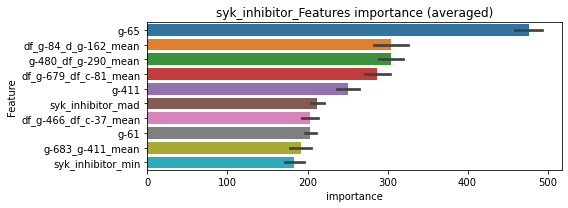

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567311	valid_1's binary_logloss: 0.0164213
[600]	training's binary_logloss: 0.000714361	valid_1's binary_logloss: 0.00468989
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.00039874	valid_1's binary_logloss: 0.00308691


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471129	valid_1's binary_logloss: 0.0138888
[600]	training's binary_logloss: 0.000663841	valid_1's binary_logloss: 0.00485933
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000401303	valid_1's binary_logloss: 0.00399094


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00479626	valid_1's binary_logloss: 0.00807105
[600]	training's binary_logloss: 0.000667701	valid_1's binary_logloss: 0.00174893
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000398692	valid_1's binary_logloss: 0.00128711


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481892	valid_1's binary_logloss: 0.0141549
[600]	training's binary_logloss: 0.000664218	valid_1's binary_logloss: 0.00638525
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000406566	valid_1's binary_logloss: 0.00535242


syk_inhibitor logloss: 0.0034295145736810318


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243917	valid_1's binary_logloss: 0.0839167
[600]	training's binary_logloss: 0.00331177	valid_1's binary_logloss: 0.0459857
[900]	training's binary_logloss: 0.00121694	valid_1's binary_logloss: 0.0381623
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.00086921	valid_1's binary_logloss: 0.0367085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243061	valid_1's binary_logloss: 0.0705537
[600]	training's binary_logloss: 0.00348075	valid_1's binary_logloss: 0.0352294
[900]	training's binary_logloss: 0.00128206	valid_1's binary_logloss: 0.0288291
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000932526	valid_1's binary_logloss: 0.027771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235915	valid_1's binary_logloss: 0.0813755
[600]	training's binary_logl

1 / 3 AUC score:0.998
y_Threshold: 0.0230664, Threshold: 0.1151868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.08063, conf_1:0.14974
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.1151868
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_2: 0.1651868
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_3: 0.2151868
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_4: 0.2651868
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_5: 0.3151868
threshold: 0.3151868, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205511	valid_1's binary_logloss: 0.0656239
[600]	training's binary_logloss: 0.00280827	valid_1's binary_logloss: 0.0307466
[900]	training's binary_logloss: 0.00108323	valid_1's binary_logloss: 0.0251424
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000818051	valid_1's binary_logloss: 0.0239678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206839	valid_1's binary_logloss: 0.0638928
[600]	training's binary_logloss: 0.00279532	valid_1's binary_logloss: 0.0338104
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00152177	valid_1's binary_logloss: 0.0307369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189625	valid_1's binary_logloss: 0.0809071
[600]	training's binary_logloss: 0.00268225	valid_1's binary_logloss: 0.0633451
Early stopping, best iterati

2 / 3 AUC score:0.998
y_Threshold: 0.1130404, Threshold: 0.3151868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 634.0/3759
p_label_rate: 0.0115520 Vs.target_rate: 0.00252, Num_p_label: 46.0, conf_0:0.25215, conf_1:0.37822
Num_p_label: 46.0, Expected: 10.0, Adj_threshold_1: 0.3151868
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_2: 0.3651868
Num_p_label: 35.0, Expected: 10.0, Adj_threshold_3: 0.4151868
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_4: 0.4651868
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_5: 0.5151868
Num_p_label: 24.0, Expected: 10.0, Adj_threshold_6: 0.5651868
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_7: 0.6151868
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_8: 0.6651868
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_9: 0.7151868
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_10: 0.7651868
threshold: 0.7651868, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 634.0/3759, y_label_rate: 0.1686619

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177767	valid_1's binary_logloss: 0.0542077
[600]	training's binary_logloss: 0.0024715	valid_1's binary_logloss: 0.0260703
[900]	training's binary_logloss: 0.00099778	valid_1's binary_logloss: 0.0212296
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.000764873	valid_1's binary_logloss: 0.0205497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182908	valid_1's binary_logloss: 0.0535426
[600]	training's binary_logloss: 0.00246542	valid_1's binary_logloss: 0.0218625
[900]	training's binary_logloss: 0.000997269	valid_1's binary_logloss: 0.0166036
[1200]	training's binary_logloss: 0.000739782	valid_1's binary_logloss: 0.0153494
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.000748672	valid_1's binary_logloss: 0.0153244
Training until validation scores don't improve for 30 rounds
[300]	training's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1316679, Threshold: 0.7651868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 629.0/3749
p_label_rate: 0.0057760 Vs.target_rate: 0.00252, Num_p_label: 23.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_1: 0.7651868
threshold: 0.7651868, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 629.0/3749, y_label_rate: 0.1677781


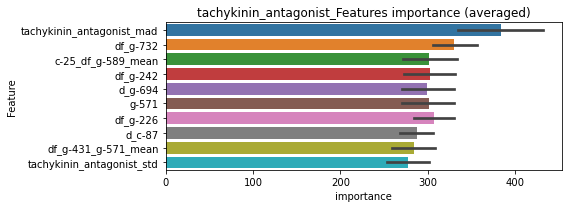

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176202	valid_1's binary_logloss: 0.0685944
[600]	training's binary_logloss: 0.00236124	valid_1's binary_logloss: 0.0396914
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00112563	valid_1's binary_logloss: 0.0360263


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174894	valid_1's binary_logloss: 0.0449925
[600]	training's binary_logloss: 0.00242983	valid_1's binary_logloss: 0.0175053
[900]	training's binary_logloss: 0.000985546	valid_1's binary_logloss: 0.0123184
[1200]	training's binary_logloss: 0.000722472	valid_1's binary_logloss: 0.0114971
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000722879	valid_1's binary_logloss: 0.0114929


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016621	valid_1's binary_logloss: 0.0554938
[600]	training's binary_logloss: 0.00232318	valid_1's binary_logloss: 0.0262499
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00128413	valid_1's binary_logloss: 0.0224635


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174795	valid_1's binary_logloss: 0.066726
[600]	training's binary_logloss: 0.00237961	valid_1's binary_logloss: 0.0367601
[900]	training's binary_logloss: 0.000966906	valid_1's binary_logloss: 0.0308458
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000950434	valid_1's binary_logloss: 0.0306101


tachykinin_antagonist logloss: 0.02515468360907232


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107207	valid_1's binary_logloss: 0.0341603
[600]	training's binary_logloss: 0.00142083	valid_1's binary_logloss: 0.0157854
[900]	training's binary_logloss: 0.000663768	valid_1's binary_logloss: 0.0131583
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.00058667	valid_1's binary_logloss: 0.0129112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116079	valid_1's binary_logloss: 0.0385425
[600]	training's binary_logloss: 0.0014808	valid_1's binary_logloss: 0.017669
[900]	training's binary_logloss: 0.000670699	valid_1's binary_logloss: 0.0150416
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000615396	valid_1's binary_logloss: 0.0149436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113936	valid_1's binary_logloss: 0.0332293
[600]	training's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0093498, Threshold: 0.0661398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.04630, conf_1:0.08598
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0661398
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_2: 0.1161398
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_3: 0.1661398
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.2161398
threshold: 0.2161398, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00939427	valid_1's binary_logloss: 0.0296241
[600]	training's binary_logloss: 0.00126347	valid_1's binary_logloss: 0.014503
[900]	training's binary_logloss: 0.000599796	valid_1's binary_logloss: 0.0124854
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000603988	valid_1's binary_logloss: 0.0124609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940513	valid_1's binary_logloss: 0.0323798
[600]	training's binary_logloss: 0.00126656	valid_1's binary_logloss: 0.0157107
[900]	training's binary_logloss: 0.000601728	valid_1's binary_logloss: 0.0135421
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000608038	valid_1's binary_logloss: 0.0134796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00957832	valid_1's binary_logloss: 0.0274904
[600]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0962687, Threshold: 0.2161398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0128076 Vs.target_rate: 0.00126, Num_p_label: 51.0, conf_0:0.17291, conf_1:0.25937
Num_p_label: 51.0, Expected: 5.0, Adj_threshold_1: 0.2161398
Num_p_label: 47.0, Expected: 5.0, Adj_threshold_2: 0.2661398
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_3: 0.3161398
Num_p_label: 34.0, Expected: 5.0, Adj_threshold_4: 0.3661398
Num_p_label: 30.0, Expected: 5.0, Adj_threshold_5: 0.4161398
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_6: 0.4661398
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_7: 0.5161398
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_8: 0.5661398
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_9: 0.6161398
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_10: 0.6661398
threshold: 0.7161398, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00912506	valid_1's binary_logloss: 0.0281312
[600]	training's binary_logloss: 0.00122994	valid_1's binary_logloss: 0.012176
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000642003	valid_1's binary_logloss: 0.0106779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00921314	valid_1's binary_logloss: 0.0281243
[600]	training's binary_logloss: 0.00124362	valid_1's binary_logloss: 0.0104439
[900]	training's binary_logloss: 0.000586928	valid_1's binary_logloss: 0.00786981
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000572345	valid_1's binary_logloss: 0.00783173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087636	valid_1's binary_logloss: 0.029847
[600]	training's binary_logloss: 0.00118128	valid_1's binary_logloss: 0.0109489
[900]	training's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1244733, Threshold: 0.7161398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0035158 Vs.target_rate: 0.00126, Num_p_label: 14.0, conf_0:0.50000, conf_1:0.78775
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.7161398
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.7661398
threshold: 0.7661398, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


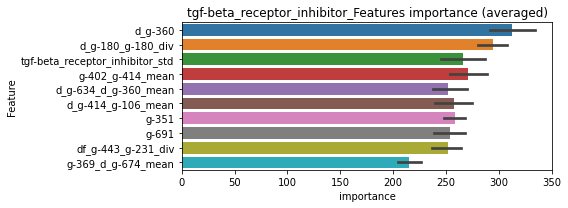

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00900319	valid_1's binary_logloss: 0.0244795
[600]	training's binary_logloss: 0.0012244	valid_1's binary_logloss: 0.00656975
[900]	training's binary_logloss: 0.000590186	valid_1's binary_logloss: 0.00433044
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000551598	valid_1's binary_logloss: 0.00417512


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893697	valid_1's binary_logloss: 0.0260715
[600]	training's binary_logloss: 0.00119537	valid_1's binary_logloss: 0.00903078
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000603362	valid_1's binary_logloss: 0.00683412


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00896579	valid_1's binary_logloss: 0.0326767
[600]	training's binary_logloss: 0.0011875	valid_1's binary_logloss: 0.0164389
[900]	training's binary_logloss: 0.000582664	valid_1's binary_logloss: 0.0138121
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000583738	valid_1's binary_logloss: 0.0138115


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915417	valid_1's binary_logloss: 0.0248038
[600]	training's binary_logloss: 0.00122306	valid_1's binary_logloss: 0.00867506
[900]	training's binary_logloss: 0.000598451	valid_1's binary_logloss: 0.00631755
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000557977	valid_1's binary_logloss: 0.00610733


tgf-beta_receptor_inhibitor logloss: 0.007733184768801753


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887876	valid_1's binary_logloss: 0.019443
[600]	training's binary_logloss: 0.00101883	valid_1's binary_logloss: 0.0051417
[900]	training's binary_logloss: 0.000504871	valid_1's binary_logloss: 0.00377998
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000504871	valid_1's binary_logloss: 0.00377998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00917661	valid_1's binary_logloss: 0.0256814
[600]	training's binary_logloss: 0.00104226	valid_1's binary_logloss: 0.0107203
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000535486	valid_1's binary_logloss: 0.00924316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00910822	valid_1's binary_logloss: 0.0170369
[600]	training's binary_logloss: 0.00105392	valid_1's binary_logloss: 0.00355114
[900]	training's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0071916, Threshold: 0.0282883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.01980, conf_1:0.03677
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0282883
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.0782883
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.1282883
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_4: 0.1782883
threshold: 0.1782883, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819295	valid_1's binary_logloss: 0.0152798
[600]	training's binary_logloss: 0.000955835	valid_1's binary_logloss: 0.00306874
[900]	training's binary_logloss: 0.000473069	valid_1's binary_logloss: 0.00187615
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000456993	valid_1's binary_logloss: 0.00183946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740869	valid_1's binary_logloss: 0.0226896
[600]	training's binary_logloss: 0.000909057	valid_1's binary_logloss: 0.00989742
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000494137	valid_1's binary_logloss: 0.00888619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00788537	valid_1's binary_logloss: 0.013949
[600]	training's binary_logloss: 0.000942479	valid_1's binary_logloss: 0.00268179
[900]	training's

2 / 3 AUC score:1.000
y_Threshold: 0.0498355, Threshold: 0.1782883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00080, Num_p_label: 26.0, conf_0:0.14263, conf_1:0.21395
Num_p_label: 26.0, Expected: 3.2, Adj_threshold_1: 0.1782883
Num_p_label: 22.0, Expected: 3.2, Adj_threshold_2: 0.2282883
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_3: 0.2782883
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_4: 0.3282883
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_5: 0.3782883
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.4282883
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_7: 0.4782883
threshold: 0.4782883, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819295	valid_1's binary_logloss: 0.0152798
[600]	training's binary_logloss: 0.000955835	valid_1's binary_logloss: 0.00306874
[900]	training's binary_logloss: 0.000473069	valid_1's binary_logloss: 0.00187615
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000456993	valid_1's binary_logloss: 0.00183946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740869	valid_1's binary_logloss: 0.0226896
[600]	training's binary_logloss: 0.000909057	valid_1's binary_logloss: 0.00989742
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000494137	valid_1's binary_logloss: 0.00888619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00788537	valid_1's binary_logloss: 0.013949
[600]	training's binary_logloss: 0.000942479	valid_1's binary_logloss: 0.00268179
[900]	training's

3 / 3 AUC score:1.000
y_Threshold: 0.0498355, Threshold: 0.4782883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.43046, conf_1:0.52612
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.4782883
threshold: 0.4782883, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


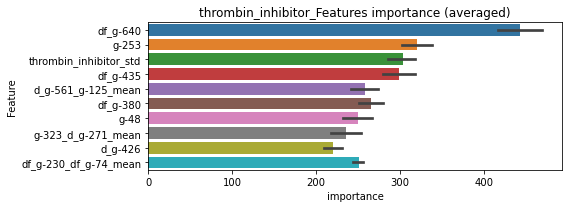

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790034	valid_1's binary_logloss: 0.0148854
[600]	training's binary_logloss: 0.000950641	valid_1's binary_logloss: 0.00307392
[900]	training's binary_logloss: 0.000472974	valid_1's binary_logloss: 0.00191829
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000451144	valid_1's binary_logloss: 0.00186569


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00743704	valid_1's binary_logloss: 0.0227969
[600]	training's binary_logloss: 0.000910824	valid_1's binary_logloss: 0.0094828
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.0007878	valid_1's binary_logloss: 0.00916246


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079703	valid_1's binary_logloss: 0.0139238
[600]	training's binary_logloss: 0.000951705	valid_1's binary_logloss: 0.00274317
[900]	training's binary_logloss: 0.000472192	valid_1's binary_logloss: 0.00159582
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000462952	valid_1's binary_logloss: 0.00157645


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812239	valid_1's binary_logloss: 0.0142953
[600]	training's binary_logloss: 0.000974641	valid_1's binary_logloss: 0.00298179
[900]	training's binary_logloss: 0.000484253	valid_1's binary_logloss: 0.00191878
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000472872	valid_1's binary_logloss: 0.0018918


thrombin_inhibitor logloss: 0.0036254213938768302


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152576	valid_1's binary_logloss: 0.050433
[600]	training's binary_logloss: 0.00190677	valid_1's binary_logloss: 0.0230428
[900]	training's binary_logloss: 0.000805059	valid_1's binary_logloss: 0.0195398
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000704917	valid_1's binary_logloss: 0.0192836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165468	valid_1's binary_logloss: 0.0417858
[600]	training's binary_logloss: 0.00201482	valid_1's binary_logloss: 0.0149924
[900]	training's binary_logloss: 0.00083102	valid_1's binary_logloss: 0.0113134
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000802664	valid_1's binary_logloss: 0.0112728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156875	valid_1's binary_logloss: 0.0449698
[600]	training's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0103302, Threshold: 0.0888280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.06218, conf_1:0.11548
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0888280
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_2: 0.1388280
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_3: 0.1888280
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.2388280
threshold: 0.2388280, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130511	valid_1's binary_logloss: 0.0442851
[600]	training's binary_logloss: 0.00168001	valid_1's binary_logloss: 0.0249994
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000891231	valid_1's binary_logloss: 0.0235473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013453	valid_1's binary_logloss: 0.0402377
[600]	training's binary_logloss: 0.00172404	valid_1's binary_logloss: 0.015771
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00143331	valid_1's binary_logloss: 0.0147733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135103	valid_1's binary_logloss: 0.0624369
[600]	training's binary_logloss: 0.00167396	valid_1's binary_logloss: 0.0460335
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00170246	valid_1's binary_logloss: 0.0459

2 / 3 AUC score:0.999
y_Threshold: 0.0607930, Threshold: 0.2388280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0102963 Vs.target_rate: 0.00155, Num_p_label: 41.0, conf_0:0.19106, conf_1:0.28659
Num_p_label: 41.0, Expected: 6.2, Adj_threshold_1: 0.2388280
Num_p_label: 35.0, Expected: 6.2, Adj_threshold_2: 0.2888280
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_3: 0.3388280
Num_p_label: 28.0, Expected: 6.2, Adj_threshold_4: 0.3888280
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_5: 0.4388280
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_6: 0.4888280
threshold: 0.4888280, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3782, y_label_rate: 0.1702803
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119218	valid_1's binary_logloss: 0.0405296
[600]	training's binary_logloss: 0.00157705	valid_1's binary_logloss: 0.0193277
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00133834	valid_1's binary_logloss: 0.0186549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123316	valid_1's binary_logloss: 0.050562
[600]	training's binary_logloss: 0.00159645	valid_1's binary_logloss: 0.0261007
[900]	training's binary_logloss: 0.000707728	valid_1's binary_logloss: 0.0230393
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000669375	valid_1's binary_logloss: 0.0229084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122999	valid_1's binary_logloss: 0.0485476
[600]	training's binary_logloss: 0.00158127	valid_1's binary_logloss: 0.0271383
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0800180, Threshold: 0.4888280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 639.0/3772
p_label_rate: 0.0057760 Vs.target_rate: 0.00155, Num_p_label: 23.0, conf_0:0.43995, conf_1:0.53771
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.4888280
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.5388280
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_3: 0.5888280
threshold: 0.5888280, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3772, y_label_rate: 0.1694062


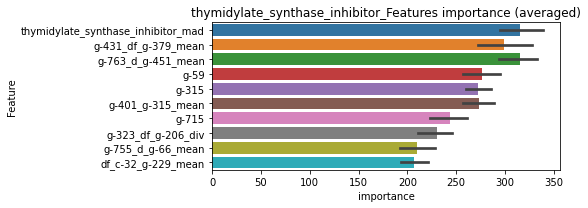

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122328	valid_1's binary_logloss: 0.0359249
[600]	training's binary_logloss: 0.00157721	valid_1's binary_logloss: 0.0146295
[900]	training's binary_logloss: 0.000712491	valid_1's binary_logloss: 0.011778
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000625172	valid_1's binary_logloss: 0.0114435


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116719	valid_1's binary_logloss: 0.0349285
[600]	training's binary_logloss: 0.00151085	valid_1's binary_logloss: 0.010637
[900]	training's binary_logloss: 0.000697601	valid_1's binary_logloss: 0.00718442
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000604187	valid_1's binary_logloss: 0.0068749


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124818	valid_1's binary_logloss: 0.0326554
[600]	training's binary_logloss: 0.00157607	valid_1's binary_logloss: 0.0129074
[900]	training's binary_logloss: 0.00070224	valid_1's binary_logloss: 0.0104371
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000692947	valid_1's binary_logloss: 0.0103493


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120518	valid_1's binary_logloss: 0.0498605
[600]	training's binary_logloss: 0.00154003	valid_1's binary_logloss: 0.0272181
[900]	training's binary_logloss: 0.000690508	valid_1's binary_logloss: 0.0246196
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000681052	valid_1's binary_logloss: 0.0245305


thymidylate_synthase_inhibitor logloss: 0.013308430626499215


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114219	valid_1's binary_logloss: 0.0318564
[600]	training's binary_logloss: 0.00136403	valid_1's binary_logloss: 0.0125055
[900]	training's binary_logloss: 0.000605246	valid_1's binary_logloss: 0.0100996
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000573052	valid_1's binary_logloss: 0.00995704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107715	valid_1's binary_logloss: 0.0338848
[600]	training's binary_logloss: 0.00132329	valid_1's binary_logloss: 0.013946
[900]	training's binary_logloss: 0.000598968	valid_1's binary_logloss: 0.0113433
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000586735	valid_1's binary_logloss: 0.0112599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116702	valid_1's binary_logloss: 0.0216121
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0083374, Threshold: 0.0456824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.03198, conf_1:0.05939
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0456824
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_2: 0.0956824
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1456824
threshold: 0.1456824, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996118	valid_1's binary_logloss: 0.0233357
[600]	training's binary_logloss: 0.00123161	valid_1's binary_logloss: 0.00661856
[900]	training's binary_logloss: 0.000557636	valid_1's binary_logloss: 0.00451669
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000524017	valid_1's binary_logloss: 0.00441396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097803	valid_1's binary_logloss: 0.0249603
[600]	training's binary_logloss: 0.00119331	valid_1's binary_logloss: 0.00849578
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000588531	valid_1's binary_logloss: 0.00651747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949713	valid_1's binary_logloss: 0.0212371
[600]	training's binary_logloss: 0.00119877	valid_1's binary_logloss: 0.00626967
[900]	training's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0839784, Threshold: 0.1456824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0105475 Vs.target_rate: 0.00126, Num_p_label: 42.0, conf_0:0.11655, conf_1:0.17482
Num_p_label: 42.0, Expected: 5.0, Adj_threshold_1: 0.1456824
Num_p_label: 32.0, Expected: 5.0, Adj_threshold_2: 0.1956824
Num_p_label: 28.0, Expected: 5.0, Adj_threshold_3: 0.2456824
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_4: 0.2956824
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.3456824
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_6: 0.3956824
threshold: 0.3956824, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996118	valid_1's binary_logloss: 0.0233357
[600]	training's binary_logloss: 0.00123161	valid_1's binary_logloss: 0.00661856
[900]	training's binary_logloss: 0.000557636	valid_1's binary_logloss: 0.00451669
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000524017	valid_1's binary_logloss: 0.00441396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097803	valid_1's binary_logloss: 0.0249603
[600]	training's binary_logloss: 0.00119331	valid_1's binary_logloss: 0.00849578
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000588531	valid_1's binary_logloss: 0.00651747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949713	valid_1's binary_logloss: 0.0212371
[600]	training's binary_logloss: 0.00119877	valid_1's binary_logloss: 0.00626967
[900]	training's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0839784, Threshold: 0.3956824, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00126, Num_p_label: 12.0, conf_0:0.35611, conf_1:0.43525
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.3956824
threshold: 0.3956824, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


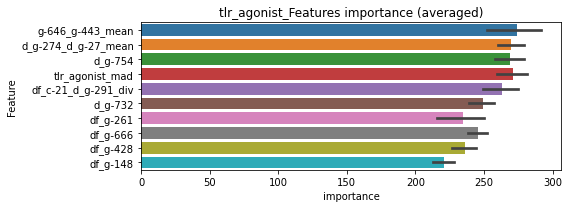

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00998799	valid_1's binary_logloss: 0.0247463
[600]	training's binary_logloss: 0.00121936	valid_1's binary_logloss: 0.00744645
[900]	training's binary_logloss: 0.000556522	valid_1's binary_logloss: 0.00506271
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000517215	valid_1's binary_logloss: 0.0049093


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979054	valid_1's binary_logloss: 0.0240517
[600]	training's binary_logloss: 0.00120364	valid_1's binary_logloss: 0.00762031
[900]	training's binary_logloss: 0.000555968	valid_1's binary_logloss: 0.00571875
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000540033	valid_1's binary_logloss: 0.00567807


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0099923	valid_1's binary_logloss: 0.0233776
[600]	training's binary_logloss: 0.00121751	valid_1's binary_logloss: 0.00670474
[900]	training's binary_logloss: 0.000550251	valid_1's binary_logloss: 0.00452816
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000525134	valid_1's binary_logloss: 0.00447877


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00929404	valid_1's binary_logloss: 0.0266046
[600]	training's binary_logloss: 0.0011688	valid_1's binary_logloss: 0.009905
[900]	training's binary_logloss: 0.000546527	valid_1's binary_logloss: 0.00822687
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000555721	valid_1's binary_logloss: 0.00817389


tlr_agonist logloss: 0.005810007201513353


neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197017	valid_1's binary_logloss: 0.00361893
[600]	training's binary_logloss: 0.000283768	valid_1's binary_logloss: 0.000807739
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000225303	valid_1's binary_logloss: 0.00068024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192508	valid_1's binary_logloss: 0.00323105
[600]	training's binary_logloss: 0.000273448	valid_1's binary_logloss: 0.000765561
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000218141	valid_1's binary_logloss: 0.000642356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197297	valid_1's binary_logloss: 0.00348973
[600]	training's binary_logloss: 0.000276895	valid_1's binary_logloss: 0.000846766
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000223413	valid_1's 

1 / 3 AUC score:1.000
y_Threshold: 0.0008184, Threshold: 0.0067682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000221068	valid_1's binary_logloss: 0.000359457


p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00474, conf_1:0.00880
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0067682
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0567682
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1067682
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.1567682
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_5: 0.2067682
threshold: 0.2067682, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176372	valid_1's binary_logloss: 0.00323194
[600]	training's binary_logloss: 0.000244398	valid_1's binary_logloss: 0.000881224
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000210389	valid_1's binary_logloss: 0.000815898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176704	valid_1's binary_logloss: 0.00225727
[600]	training's binary_logloss: 0.000247318	valid_1's binary_logloss: 0.000386902
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000202875	valid_1's binary_logloss: 0.000327403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177661	valid_1's binary_logloss: 0.00205782
[600]	training's binary_logloss: 0.000246877	valid_1's binary_logloss: 0.000311981
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00020327	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1182767, Threshold: 0.2067682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00029, Num_p_label: 12.0, conf_0:0.16541, conf_1:0.24812
Num_p_label: 12.0, Expected: 1.2, Adj_threshold_1: 0.2067682
Num_p_label: 12.0, Expected: 1.2, Adj_threshold_2: 0.2567682
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.3067682
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.3567682
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_5: 0.4067682
threshold: 0.4067682, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176372	valid_1's binary_logloss: 0.00323194
[600]	training's binary_logloss: 0.000244398	valid_1's binary_logloss: 0.000881224
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000210389	valid_1's binary_logloss: 0.000815898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176704	valid_1's binary_logloss: 0.00225727
[600]	training's binary_logloss: 0.000247318	valid_1's binary_logloss: 0.000386902
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000202875	valid_1's binary_logloss: 0.000327403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177661	valid_1's binary_logloss: 0.00205782
[600]	training's binary_logloss: 0.000246877	valid_1's binary_logloss: 0.000311981
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00020327	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1182767, Threshold: 0.4067682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.36609, conf_1:0.44744
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.4067682
threshold: 0.4067682, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


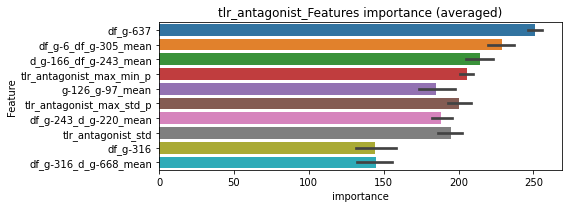

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175797	valid_1's binary_logloss: 0.00359883
[600]	training's binary_logloss: 0.000244705	valid_1's binary_logloss: 0.0011759
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000204833	valid_1's binary_logloss: 0.00109395


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177798	valid_1's binary_logloss: 0.00229205
[600]	training's binary_logloss: 0.000247543	valid_1's binary_logloss: 0.000397187
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000202431	valid_1's binary_logloss: 0.000335194


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178059	valid_1's binary_logloss: 0.00200383
[600]	training's binary_logloss: 0.000246863	valid_1's binary_logloss: 0.000304373


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000198947	valid_1's binary_logloss: 0.000246579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177878	valid_1's binary_logloss: 0.00226006
[600]	training's binary_logloss: 0.000246124	valid_1's binary_logloss: 0.0003812
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000203813	valid_1's binary_logloss: 0.000325464


tlr_antagonist logloss: 0.0005012420302212642


neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137976	valid_1's binary_logloss: 0.0420596
[600]	training's binary_logloss: 0.0018182	valid_1's binary_logloss: 0.0176982
[900]	training's binary_logloss: 0.000771742	valid_1's binary_logloss: 0.0138024
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.00071383	valid_1's binary_logloss: 0.013506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141479	valid_1's binary_logloss: 0.0385581
[600]	training's binary_logloss: 0.00181835	valid_1's binary_logloss: 0.0151679
[900]	training's binary_logloss: 0.000781692	valid_1's binary_logloss: 0.0112489
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.00067507	valid_1's binary_logloss: 0.0108834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135367	valid_1's binary_logloss: 0.0353704
[600]	training's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0110073, Threshold: 0.0539029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.03773, conf_1:0.07007
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0539029
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.1039029
threshold: 0.1039029, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120882	valid_1's binary_logloss: 0.036513
[600]	training's binary_logloss: 0.00160949	valid_1's binary_logloss: 0.0135311
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000754021	valid_1's binary_logloss: 0.00991545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011926	valid_1's binary_logloss: 0.0321633
[600]	training's binary_logloss: 0.00160763	valid_1's binary_logloss: 0.0121598
[900]	training's binary_logloss: 0.000719441	valid_1's binary_logloss: 0.00943082
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000723099	valid_1's binary_logloss: 0.00941444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126381	valid_1's binary_logloss: 0.0302562
[600]	training's binary_logloss: 0.00163477	valid_1's binary_logloss: 0.00999376
[900]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0771466, Threshold: 0.1039029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3807
p_label_rate: 0.0158212 Vs.target_rate: 0.00151, Num_p_label: 63.0, conf_0:0.08312, conf_1:0.12468
Num_p_label: 63.0, Expected: 6.0, Adj_threshold_1: 0.1039029
Num_p_label: 42.0, Expected: 6.0, Adj_threshold_2: 0.1539029
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_3: 0.2039029
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.2539029
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.3039029
threshold: 0.3039029, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3807, y_label_rate: 0.1717888
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126233	valid_1's binary_logloss: 0.0355292
[600]	training's binary_logloss: 0.00161179	valid_1's binary_logloss: 0.0127986
[900]	training's binary_logloss: 0.000714097	valid_1's binary_logloss: 0.0096498
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000606563	valid_1's binary_logloss: 0.00919529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012508	valid_1's binary_logloss: 0.0385663
[600]	training's binary_logloss: 0.00161517	valid_1's binary_logloss: 0.0178404
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000907994	valid_1's binary_logloss: 0.0153911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113986	valid_1's binary_logloss: 0.0460145
[600]	training's binary_logloss: 0.00154507	valid_1's binary_logloss: 0.0276734
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0818435, Threshold: 0.3039029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3799
p_label_rate: 0.0050226 Vs.target_rate: 0.00151, Num_p_label: 20.0, conf_0:0.27351, conf_1:0.33429
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_1: 0.3039029
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.3539029
threshold: 0.3539029, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3799, y_label_rate: 0.1710977


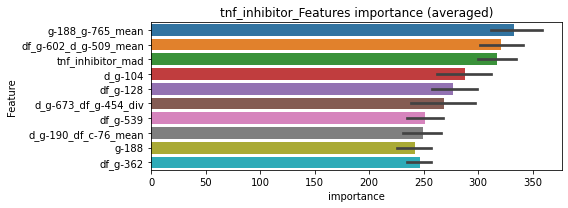

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116375	valid_1's binary_logloss: 0.0444135
[600]	training's binary_logloss: 0.00153099	valid_1's binary_logloss: 0.0229216
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000730457	valid_1's binary_logloss: 0.0195797


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114015	valid_1's binary_logloss: 0.0348064
[600]	training's binary_logloss: 0.00151188	valid_1's binary_logloss: 0.0172425
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000732528	valid_1's binary_logloss: 0.0151264


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117384	valid_1's binary_logloss: 0.0334573
[600]	training's binary_logloss: 0.00154518	valid_1's binary_logloss: 0.0122382
[900]	training's binary_logloss: 0.000699395	valid_1's binary_logloss: 0.00930062
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.00061001	valid_1's binary_logloss: 0.00906339


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113577	valid_1's binary_logloss: 0.0366877
[600]	training's binary_logloss: 0.00155946	valid_1's binary_logloss: 0.0208007
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000762412	valid_1's binary_logloss: 0.0188311


tnf_inhibitor logloss: 0.01565377841197877


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0413422	valid_1's binary_logloss: 0.174671
[600]	training's binary_logloss: 0.00792874	valid_1's binary_logloss: 0.144756
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00344476	valid_1's binary_logloss: 0.140944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0435631	valid_1's binary_logloss: 0.156552
[600]	training's binary_logloss: 0.00821436	valid_1's binary_logloss: 0.119656
[900]	training's binary_logloss: 0.00262967	valid_1's binary_logloss: 0.112736
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00271503	valid_1's binary_logloss: 0.112519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0439752	valid_1's binary_logloss: 0.147156
[600]	training's binary_logloss: 0.00847948	valid_1's binary_logloss: 0.1124
Early stopping, best iteration is:
[660]	

1 / 3 AUC score:0.976
y_Threshold: 0.0466851, Threshold: 0.3594235, pos_neg_ratio: 0.8000000
Remove_noisy_data: 230 → Positive_corect_labels: 606/3701
p_label_rate: 0.0100452 Vs.target_rate: 0.00533, Num_p_label: 40.0, conf_0:0.25160, conf_1:0.46725
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.3594235
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_2: 0.4094235
Num_p_label: 22.0, Expected: 21.2, Adj_threshold_3: 0.4594235
threshold: 0.4594235, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 606.0/3701, y_label_rate: 0.1637395
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286132	valid_1's binary_logloss: 0.125989
[600]	training's binary_logloss: 0.00472185	valid_1's binary_logloss: 0.0951952
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00242372	valid_1's binary_logloss: 0.0911677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289982	valid_1's binary_logloss: 0.11252
[600]	training's binary_logloss: 0.00468109	valid_1's binary_logloss: 0.0821486
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.0018772	valid_1's binary_logloss: 0.0785559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0300848	valid_1's binary_logloss: 0.0876435
[600]	training's binary_logloss: 0.00513512	valid_1's binary_logloss: 0.0495523
[900]	training's binary_logloss: 0.00181008	valid_1's binary_logloss: 0.0404413
[1200]	training's binary_logloss: 

2 / 3 AUC score:0.993
y_Threshold: 0.1105412, Threshold: 0.4594235, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 570.0/3629
p_label_rate: 0.0188348 Vs.target_rate: 0.00533, Num_p_label: 75.0, conf_0:0.36754, conf_1:0.55131
Num_p_label: 75.0, Expected: 21.2, Adj_threshold_1: 0.4594235
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_2: 0.5094235
Num_p_label: 55.0, Expected: 21.2, Adj_threshold_3: 0.5594235
Num_p_label: 49.0, Expected: 21.2, Adj_threshold_4: 0.6094235
Num_p_label: 44.0, Expected: 21.2, Adj_threshold_5: 0.6594235
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_6: 0.7094235
Num_p_label: 28.0, Expected: 21.2, Adj_threshold_7: 0.7594235
threshold: 0.7594235, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 570.0/3629, y_label_rate: 0.1570681
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221936	valid_1's binary_logloss: 0.0871052
[600]	training's binary_logloss: 0.0035389	valid_1's binary_logloss: 0.054616
[900]	training's binary_logloss: 0.00138612	valid_1's binary_logloss: 0.0483888
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00134365	valid_1's binary_logloss: 0.0482511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.023128	valid_1's binary_logloss: 0.0859793
[600]	training's binary_logloss: 0.00358714	valid_1's binary_logloss: 0.0596269
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00153281	valid_1's binary_logloss: 0.0557895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0228586	valid_1's binary_logloss: 0.100615
[600]	training's binary_logloss: 0.003538	valid_1's binary_logloss: 0.0737991
Early stopping, best iteration is:
[

3 / 3 AUC score:0.993
y_Threshold: 0.1069591, Threshold: 0.7594235, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 546.0/3581
p_label_rate: 0.0140633 Vs.target_rate: 0.00533, Num_p_label: 56.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 56.0, Expected: 21.2, Adj_threshold_1: 0.7594235
threshold: 0.7594235, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 546.0/3581, y_label_rate: 0.1524714


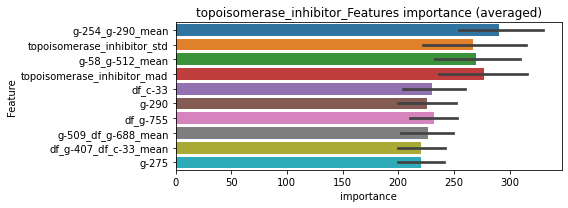

len(train_index) : 2685
len(valid_index) : 896
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020121	valid_1's binary_logloss: 0.0816357
[600]	training's binary_logloss: 0.00303895	valid_1's binary_logloss: 0.0489392
[900]	training's binary_logloss: 0.00122816	valid_1's binary_logloss: 0.0424816
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.00106657	valid_1's binary_logloss: 0.0418517


len(train_index) : 2686
len(valid_index) : 895
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201243	valid_1's binary_logloss: 0.0672159
[600]	training's binary_logloss: 0.00307908	valid_1's binary_logloss: 0.0325467
[900]	training's binary_logloss: 0.00124124	valid_1's binary_logloss: 0.0251271
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.00104208	valid_1's binary_logloss: 0.0242108


len(train_index) : 2686
len(valid_index) : 895
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197284	valid_1's binary_logloss: 0.0740962
[600]	training's binary_logloss: 0.00299889	valid_1's binary_logloss: 0.0489035
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.00132418	valid_1's binary_logloss: 0.0450904


len(train_index) : 2686
len(valid_index) : 895
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203458	valid_1's binary_logloss: 0.0843572
[600]	training's binary_logloss: 0.00305573	valid_1's binary_logloss: 0.0521694
[900]	training's binary_logloss: 0.00121455	valid_1's binary_logloss: 0.0464579
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000934013	valid_1's binary_logloss: 0.0446995


topoisomerase_inhibitor logloss: 0.03896392814077072


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546911	valid_1's binary_logloss: 0.00833535
[600]	training's binary_logloss: 0.000744558	valid_1's binary_logloss: 0.00164497
[900]	training's binary_logloss: 0.000436269	valid_1's binary_logloss: 0.00107401
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000436269	valid_1's binary_logloss: 0.00107401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520924	valid_1's binary_logloss: 0.0163798
[600]	training's binary_logloss: 0.000716818	valid_1's binary_logloss: 0.00708764
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000437655	valid_1's binary_logloss: 0.00612743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558645	valid_1's binary_logloss: 0.0118122
[600]	training's binary_logloss: 0.000746799	valid_1's binary_logloss: 0.0037065
Early stopping,

1 / 3 AUC score:1.000
y_Threshold: 0.0034752, Threshold: 0.0144074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01009, conf_1:0.01873
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0144074
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0644074
threshold: 0.0644074, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507192	valid_1's binary_logloss: 0.00797534
[600]	training's binary_logloss: 0.000694762	valid_1's binary_logloss: 0.00165493
[900]	training's binary_logloss: 0.000404518	valid_1's binary_logloss: 0.00109831
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000404518	valid_1's binary_logloss: 0.00109831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478536	valid_1's binary_logloss: 0.0139324
[600]	training's binary_logloss: 0.000672573	valid_1's binary_logloss: 0.0059359
[900]	training's binary_logloss: 0.000394244	valid_1's binary_logloss: 0.00507855
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000398015	valid_1's binary_logloss: 0.00507125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503397	valid_1's binary_logloss: 0.00863735
[600]	training

2 / 3 AUC score:1.000
y_Threshold: 0.0614979, Threshold: 0.0644074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0102963 Vs.target_rate: 0.00076, Num_p_label: 41.0, conf_0:0.05153, conf_1:0.07729
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0644074
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_2: 0.1144074
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.1644074
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2144074
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.2644074
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.3144074
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.3644074
threshold: 0.3644074, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507192	valid_1's binary_logloss: 0.00797534
[600]	training's binary_logloss: 0.000694762	valid_1's binary_logloss: 0.00165493
[900]	training's binary_logloss: 0.000404518	valid_1's binary_logloss: 0.00109831
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000404518	valid_1's binary_logloss: 0.00109831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478536	valid_1's binary_logloss: 0.0139324
[600]	training's binary_logloss: 0.000672573	valid_1's binary_logloss: 0.0059359
[900]	training's binary_logloss: 0.000394244	valid_1's binary_logloss: 0.00507855
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000398015	valid_1's binary_logloss: 0.00507125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503397	valid_1's binary_logloss: 0.00863735
[600]	training

3 / 3 AUC score:1.000
y_Threshold: 0.0614979, Threshold: 0.3644074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.32797, conf_1:0.40085
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3644074
threshold: 0.3644074, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


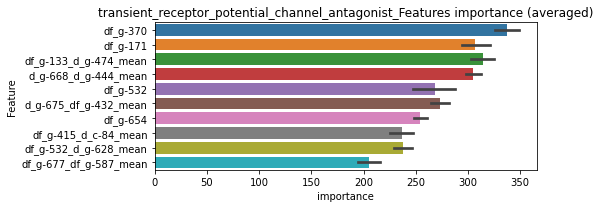

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498388	valid_1's binary_logloss: 0.00807276
[600]	training's binary_logloss: 0.000689606	valid_1's binary_logloss: 0.00164969
[900]	training's binary_logloss: 0.000406378	valid_1's binary_logloss: 0.00109665
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000406378	valid_1's binary_logloss: 0.00109665


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485752	valid_1's binary_logloss: 0.0132329
[600]	training's binary_logloss: 0.000665144	valid_1's binary_logloss: 0.00530442
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000406804	valid_1's binary_logloss: 0.00454317


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524456	valid_1's binary_logloss: 0.00879685
[600]	training's binary_logloss: 0.000702903	valid_1's binary_logloss: 0.00194293
[900]	training's binary_logloss: 0.000411591	valid_1's binary_logloss: 0.00133607
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000411591	valid_1's binary_logloss: 0.00133607


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501925	valid_1's binary_logloss: 0.008483
[600]	training's binary_logloss: 0.000684299	valid_1's binary_logloss: 0.00159721
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000412774	valid_1's binary_logloss: 0.0010623


transient_receptor_potential_channel_antagonist logloss: 0.0020095459551489124


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153446	valid_1's binary_logloss: 0.0019313
[600]	training's binary_logloss: 0.000224589	valid_1's binary_logloss: 0.000356909
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000197246	valid_1's binary_logloss: 0.000323375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149012	valid_1's binary_logloss: 0.0024539
[600]	training's binary_logloss: 0.000216739	valid_1's binary_logloss: 0.00057758
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000190183	valid_1's binary_logloss: 0.000515595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149017	valid_1's binary_logloss: 0.00328116
[600]	training's binary_logloss: 0.000217563	valid_1's binary_logloss: 0.00135142
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000188107	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0005345, Threshold: 0.0021040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00147, conf_1:0.00274
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021040
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0521040
threshold: 0.0521040, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134481	valid_1's binary_logloss: 0.00180291
[600]	training's binary_logloss: 0.000189475	valid_1's binary_logloss: 0.000342281
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000160473	valid_1's binary_logloss: 0.000301822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136073	valid_1's binary_logloss: 0.00181495
[600]	training's binary_logloss: 0.000190883	valid_1's binary_logloss: 0.000340687
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000162473	valid_1's binary_logloss: 0.000300224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134881	valid_1's binary_logloss: 0.00147984
[600]	training's binary_logloss: 0.000190226	valid_1's binary_logloss: 0.000225983
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000161365	valid_1's

2 / 3 AUC score:1.000
y_Threshold: 0.1393412, Threshold: 0.0521040, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000161383	valid_1's binary_logloss: 0.001029


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.04168, conf_1:0.06252
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0521040
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.1021040
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1521040
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.2021040
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.2521040
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.3021040
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_7: 0.3521040
threshold: 0.3521040, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134481	valid_1's binary_logloss: 0.00180291
[600]	training's binary_logloss: 0.000189475	valid_1's binary_logloss: 0.000342281
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000160473	valid_1's binary_logloss: 0.000301822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136073	valid_1's binary_logloss: 0.00181495
[600]	training's binary_logloss: 0.000190883	valid_1's binary_logloss: 0.000340687
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000162473	valid_1's binary_logloss: 0.000300224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134881	valid_1's binary_logloss: 0.00147984
[600]	training's binary_logloss: 0.000190226	valid_1's binary_logloss: 0.000225983
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000161365	valid_1's

3 / 3 AUC score:1.000
y_Threshold: 0.1393412, Threshold: 0.3521040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.31689, conf_1:0.38731
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.3521040
threshold: 0.3521040, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


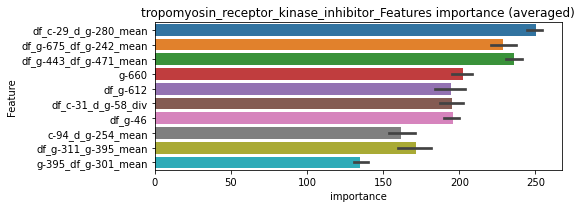

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135621	valid_1's binary_logloss: 0.00171217
[600]	training's binary_logloss: 0.000188971	valid_1's binary_logloss: 0.00030654
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000162056	valid_1's binary_logloss: 0.000271659


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137138	valid_1's binary_logloss: 0.00201349
[600]	training's binary_logloss: 0.000190129	valid_1's binary_logloss: 0.000416708
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000164739	valid_1's binary_logloss: 0.000379757


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135303	valid_1's binary_logloss: 0.00151393
[600]	training's binary_logloss: 0.000188526	valid_1's binary_logloss: 0.000230337
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000161295	valid_1's binary_logloss: 0.000196064


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136379	valid_1's binary_logloss: 0.00280412


tropomyosin_receptor_kinase_inhibitor logloss: 0.0004817049345391454


[600]	training's binary_logloss: 0.000188188	valid_1's binary_logloss: 0.00108771
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000190264	valid_1's binary_logloss: 0.00107956
neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833074	valid_1's binary_logloss: 0.0290228
[600]	training's binary_logloss: 0.00116479	valid_1's binary_logloss: 0.0158277
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.0007407	valid_1's binary_logloss: 0.0149577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087443	valid_1's binary_logloss: 0.0218934
[600]	training's binary_logloss: 0.00122242	valid_1's binary_logloss: 0.00615696
[900]	training's binary_logloss: 0.00059223	valid_1's binary_logloss: 0.00410937
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000559266	valid_1's binary_logloss: 0.00401629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855015	valid_1's binary_logloss: 0.0270322
[600]	training's binary_logloss: 0.00119539	valid_1's binary_logloss: 0.0119334
[900]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0067010, Threshold: 0.0368250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.02578, conf_1:0.04787
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0368250
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_2: 0.0868250
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_3: 0.1368250
threshold: 0.1368250, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00761389	valid_1's binary_logloss: 0.0264026
[600]	training's binary_logloss: 0.00107025	valid_1's binary_logloss: 0.0132385
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000567976	valid_1's binary_logloss: 0.0117871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773798	valid_1's binary_logloss: 0.02087
[600]	training's binary_logloss: 0.00108271	valid_1's binary_logloss: 0.00587375
[900]	training's binary_logloss: 0.000535575	valid_1's binary_logloss: 0.00382823
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000517477	valid_1's binary_logloss: 0.0037515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757533	valid_1's binary_logloss: 0.0250409
[600]	training's binary_logloss: 0.0010668	valid_1's binary_logloss: 0.0102012
[900]	training's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0541875, Threshold: 0.1368250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0107986 Vs.target_rate: 0.00105, Num_p_label: 43.0, conf_0:0.10946, conf_1:0.16419
Num_p_label: 43.0, Expected: 4.2, Adj_threshold_1: 0.1368250
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_2: 0.1868250
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_3: 0.2368250
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_4: 0.2868250
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_5: 0.3368250
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_6: 0.3868250
threshold: 0.3868250, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735689	valid_1's binary_logloss: 0.0229207
[600]	training's binary_logloss: 0.00104056	valid_1's binary_logloss: 0.0102339
[900]	training's binary_logloss: 0.000534765	valid_1's binary_logloss: 0.00887168
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000527525	valid_1's binary_logloss: 0.00883419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755021	valid_1's binary_logloss: 0.0203382
[600]	training's binary_logloss: 0.00107222	valid_1's binary_logloss: 0.00705163
[900]	training's binary_logloss: 0.000529512	valid_1's binary_logloss: 0.00534005
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000494107	valid_1's binary_logloss: 0.00521512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077281	valid_1's binary_logloss: 0.0260042
[600]	training's b

3 / 3 AUC score:1.000
y_Threshold: 0.0477501, Threshold: 0.3868250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0012557 Vs.target_rate: 0.00105, Num_p_label: 5.0, conf_0:0.34814, conf_1:0.42551
threshold: 0.3868250, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


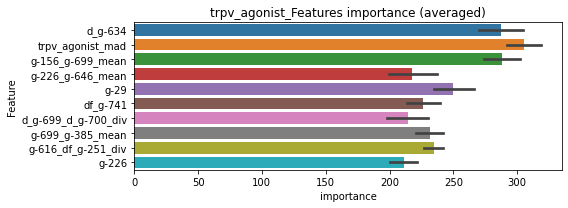

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773557	valid_1's binary_logloss: 0.0174606
[600]	training's binary_logloss: 0.00106674	valid_1's binary_logloss: 0.00477854
[900]	training's binary_logloss: 0.00054019	valid_1's binary_logloss: 0.00328932
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000522346	valid_1's binary_logloss: 0.00323473


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750941	valid_1's binary_logloss: 0.0250759
[600]	training's binary_logloss: 0.00103904	valid_1's binary_logloss: 0.0113761
[900]	training's binary_logloss: 0.000521092	valid_1's binary_logloss: 0.00952753
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000524134	valid_1's binary_logloss: 0.00946538


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752779	valid_1's binary_logloss: 0.0227421
[600]	training's binary_logloss: 0.00105649	valid_1's binary_logloss: 0.00768189
[900]	training's binary_logloss: 0.000543377	valid_1's binary_logloss: 0.00571714
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000516044	valid_1's binary_logloss: 0.00562819


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0075754	valid_1's binary_logloss: 0.0209944
[600]	training's binary_logloss: 0.00107504	valid_1's binary_logloss: 0.00694744
[900]	training's binary_logloss: 0.000531309	valid_1's binary_logloss: 0.00519962
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000541906	valid_1's binary_logloss: 0.00516858


trpv_agonist logloss: 0.005875268762721369


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165069	valid_1's binary_logloss: 0.0532405
[600]	training's binary_logloss: 0.00220498	valid_1's binary_logloss: 0.0233564
[900]	training's binary_logloss: 0.000894405	valid_1's binary_logloss: 0.0189251
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000735506	valid_1's binary_logloss: 0.0184083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161381	valid_1's binary_logloss: 0.0594907
[600]	training's binary_logloss: 0.00218017	valid_1's binary_logloss: 0.0331119
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.0011862	valid_1's binary_logloss: 0.0301586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178912	valid_1's binary_logloss: 0.0428424
[600]	training's binary_logloss: 0.00235212	valid_1's binary_logloss: 0.0180527
[900]	training's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0141561, Threshold: 0.0674595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.04722, conf_1:0.08770
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0674595
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_2: 0.1174595
threshold: 0.1174595, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141126	valid_1's binary_logloss: 0.0493857
[600]	training's binary_logloss: 0.00189943	valid_1's binary_logloss: 0.0263602
[900]	training's binary_logloss: 0.000821017	valid_1's binary_logloss: 0.0229941
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000811043	valid_1's binary_logloss: 0.0229249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141365	valid_1's binary_logloss: 0.0405877
[600]	training's binary_logloss: 0.00195583	valid_1's binary_logloss: 0.0199769
[900]	training's binary_logloss: 0.000828504	valid_1's binary_logloss: 0.0167793
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000671051	valid_1's binary_logloss: 0.0161877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144985	valid_1's binary_logloss: 0.0431914
[600]	training's binary_l

2 / 3 AUC score:0.999
y_Threshold: 0.0512013, Threshold: 0.1174595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0150678 Vs.target_rate: 0.00202, Num_p_label: 60.0, conf_0:0.09397, conf_1:0.14095
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_1: 0.1174595
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_2: 0.1674595
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_3: 0.2174595
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.2674595
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_5: 0.3174595
threshold: 0.3174595, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142071	valid_1's binary_logloss: 0.0395091
[600]	training's binary_logloss: 0.00193212	valid_1's binary_logloss: 0.0133963
[900]	training's binary_logloss: 0.00082063	valid_1's binary_logloss: 0.00944336
Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000645515	valid_1's binary_logloss: 0.00864423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142916	valid_1's binary_logloss: 0.048149
[600]	training's binary_logloss: 0.00189442	valid_1's binary_logloss: 0.0260717
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000884583	valid_1's binary_logloss: 0.0235613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132822	valid_1's binary_logloss: 0.0410407
[600]	training's binary_logloss: 0.00182934	valid_1's binary_logloss: 0.0189273
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0706208, Threshold: 0.3174595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0050226 Vs.target_rate: 0.00202, Num_p_label: 20.0, conf_0:0.28571, conf_1:0.34921
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_1: 0.3174595
threshold: 0.3174595, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


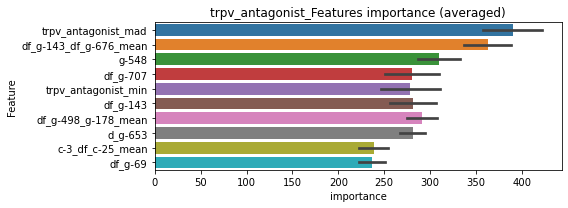

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139304	valid_1's binary_logloss: 0.0368742
[600]	training's binary_logloss: 0.00187649	valid_1's binary_logloss: 0.0134606
[900]	training's binary_logloss: 0.000796834	valid_1's binary_logloss: 0.0098013
Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000635201	valid_1's binary_logloss: 0.00918817


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139384	valid_1's binary_logloss: 0.040181
[600]	training's binary_logloss: 0.00188474	valid_1's binary_logloss: 0.0186334
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000845881	valid_1's binary_logloss: 0.0157628


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134337	valid_1's binary_logloss: 0.0410175
[600]	training's binary_logloss: 0.00182887	valid_1's binary_logloss: 0.0172636
[900]	training's binary_logloss: 0.000784493	valid_1's binary_logloss: 0.0141969
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000705346	valid_1's binary_logloss: 0.014079


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140814	valid_1's binary_logloss: 0.0490917
[600]	training's binary_logloss: 0.0018454	valid_1's binary_logloss: 0.0238911
[900]	training's binary_logloss: 0.000786915	valid_1's binary_logloss: 0.0204004
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000793575	valid_1's binary_logloss: 0.0203515


trpv_antagonist logloss: 0.014850813770621491


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0897252	valid_1's binary_logloss: 0.33746
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.0557776	valid_1's binary_logloss: 0.332268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0876383	valid_1's binary_logloss: 0.315373
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0581055	valid_1's binary_logloss: 0.311598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0996223	valid_1's binary_logloss: 0.309113
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.0629163	valid_1's binary_logloss: 0.301593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0935413	valid_1's binary_logloss: 0.316785
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0764898	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.837
y_Threshold: 0.1319738, Threshold: 0.3550969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 551 → Positive_corect_labels: 440/3352
p_label_rate: 0.0100452 Vs.target_rate: 0.01327, Num_p_label: 40.0, conf_0:0.24857, conf_1:0.46163
threshold: 0.3550969, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 440.0/3352, y_label_rate: 0.1312649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0290449	valid_1's binary_logloss: 0.211532
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.012439	valid_1's binary_logloss: 0.205967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330058	valid_1's binary_logloss: 0.144033
[600]	training's binary_logloss: 0.00613454	valid_1's binary_logloss: 0.119801
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00506466	valid_1's binary_logloss: 0.119034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330586	valid_1's binary_logloss: 0.157507
[600]	training's binary_logloss: 0.00615682	valid_1's binary_logloss: 0.146147
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00688858	valid_1's binary_logloss: 0.146047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

2 / 3 AUC score:0.953
y_Threshold: 0.0968604, Threshold: 0.3550969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 363.0/3198
p_label_rate: 0.0220994 Vs.target_rate: 0.01327, Num_p_label: 88.0, conf_0:0.28408, conf_1:0.42612
Num_p_label: 88.0, Expected: 52.8, Adj_threshold_1: 0.3550969
Num_p_label: 74.0, Expected: 52.8, Adj_threshold_2: 0.4050969
threshold: 0.4050969, positive_p_label: 74.0/3982, p_label_rate: 0.0185836


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0230257	valid_1's binary_logloss: 0.208006


positive_y_label: 363.0/3198, y_label_rate: 0.1135084
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176829	valid_1's binary_logloss: 0.147088
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00988959	valid_1's binary_logloss: 0.140778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167702	valid_1's binary_logloss: 0.12602
[600]	training's binary_logloss: 0.00298015	valid_1's binary_logloss: 0.113226
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00277025	valid_1's binary_logloss: 0.112794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186978	valid_1's binary_logloss: 0.128775
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.0066694	valid_1's binary_logloss: 0.119335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186373	valid_1's binary_logloss: 0.112562
[600]	training's binary_l

3 / 3 AUC score:0.977
y_Threshold: 0.0860196, Threshold: 0.4050969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 316.0/3104
p_label_rate: 0.0233551 Vs.target_rate: 0.01327, Num_p_label: 93.0, conf_0:0.36459, conf_1:0.44561
Num_p_label: 93.0, Expected: 52.8, Adj_threshold_1: 0.4050969
Num_p_label: 80.0, Expected: 52.8, Adj_threshold_2: 0.4550969
Num_p_label: 74.0, Expected: 52.8, Adj_threshold_3: 0.5050969
threshold: 0.5050969, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 316.0/3104, y_label_rate: 0.1018041


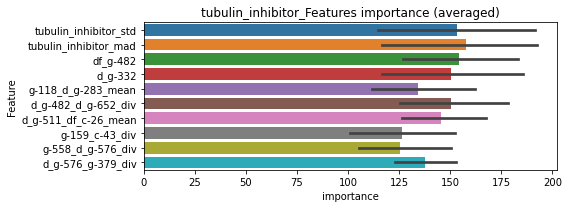

len(train_index) : 2328
len(valid_index) : 776
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124543	valid_1's binary_logloss: 0.127461


len(train_index) : 2328
len(valid_index) : 776
================================= fold 2/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00782505	valid_1's binary_logloss: 0.125015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133489	valid_1's binary_logloss: 0.0868016
[600]	training's binary_logloss: 0.00235667	valid_1's binary_logloss: 0.0705184
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00142233	valid_1's binary_logloss: 0.067329


len(train_index) : 2328
len(valid_index) : 776
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135743	valid_1's binary_logloss: 0.0762341
[600]	training's binary_logloss: 0.00232652	valid_1's binary_logloss: 0.0616069
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00137732	valid_1's binary_logloss: 0.0601662


len(train_index) : 2328
len(valid_index) : 776
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124388	valid_1's binary_logloss: 0.108762


tubulin_inhibitor logloss: 0.08786425522963032


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00467346	valid_1's binary_logloss: 0.0989466
neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203255	valid_1's binary_logloss: 0.0828898
[600]	training's binary_logloss: 0.00307627	valid_1's binary_logloss: 0.0547848
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00144383	valid_1's binary_logloss: 0.0512549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220386	valid_1's binary_logloss: 0.104479
[600]	training's binary_logloss: 0.00321531	valid_1's binary_logloss: 0.0865075
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00359572	valid_1's binary_logloss: 0.0860385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216431	valid_1's binary_logloss: 0.0654642
[600]	training's binary_logloss: 0.00322802	valid_1's binary_logloss: 0.036799
[900]	training's binary_logloss: 0.00125801	valid_1's binary_logloss: 0.0317038
Early stopping, best iteration i

1 / 3 AUC score:0.993
y_Threshold: 0.0260976, Threshold: 0.1776637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 641/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.12436, conf_1:0.23096
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.1776637
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.2276637
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.2776637
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.3276637
threshold: 0.3276637, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 641.0/3775, y_label_rate: 0.1698013
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164604	valid_1's binary_logloss: 0.0718436
[600]	training's binary_logloss: 0.00238618	valid_1's binary_logloss: 0.048526
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00127462	valid_1's binary_logloss: 0.0457488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166972	valid_1's binary_logloss: 0.0604289
[600]	training's binary_logloss: 0.0023695	valid_1's binary_logloss: 0.0361326
[900]	training's binary_logloss: 0.000986187	valid_1's binary_logloss: 0.0317713
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.00101588	valid_1's binary_logloss: 0.031676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162111	valid_1's binary_logloss: 0.0757033
[600]	training's binary_logloss: 0.00232174	valid_1's binary_logloss: 0.0576144
Early stopping, best iteration i

2 / 3 AUC score:0.999
y_Threshold: 0.1134814, Threshold: 0.3276637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 624.0/3741
p_label_rate: 0.0188348 Vs.target_rate: 0.00307, Num_p_label: 75.0, conf_0:0.26213, conf_1:0.39320
Num_p_label: 75.0, Expected: 12.2, Adj_threshold_1: 0.3276637
Num_p_label: 64.0, Expected: 12.2, Adj_threshold_2: 0.3776637
Num_p_label: 58.0, Expected: 12.2, Adj_threshold_3: 0.4276637
Num_p_label: 55.0, Expected: 12.2, Adj_threshold_4: 0.4776637
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_5: 0.5276637
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_6: 0.5776637
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_7: 0.6276637
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_8: 0.6776637
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_9: 0.7276637
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_10: 0.7776637
threshold: 0.7776637, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 624.0/3741, y_label_rate: 0.1668003

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144321	valid_1's binary_logloss: 0.0503464
[600]	training's binary_logloss: 0.00209741	valid_1's binary_logloss: 0.0264005
[900]	training's binary_logloss: 0.000918157	valid_1's binary_logloss: 0.0226036
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000938683	valid_1's binary_logloss: 0.0225143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149181	valid_1's binary_logloss: 0.0424012
[600]	training's binary_logloss: 0.00214931	valid_1's binary_logloss: 0.019705
[900]	training's binary_logloss: 0.00093558	valid_1's binary_logloss: 0.0158439
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000713547	valid_1's binary_logloss: 0.0149311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148003	valid_1's binary_logloss: 0.0603137
[600]	training's binary_log

3 / 3 AUC score:0.998
y_Threshold: 0.1078126, Threshold: 0.7776637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 613.0/3719
p_label_rate: 0.0082873 Vs.target_rate: 0.00307, Num_p_label: 33.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.7776637
threshold: 0.7776637, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 613.0/3719, y_label_rate: 0.1648293


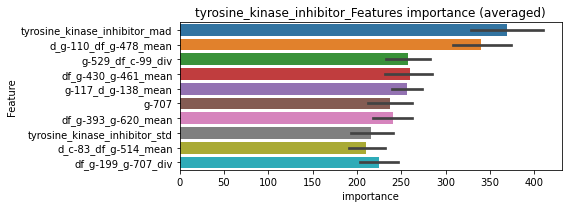

len(train_index) : 2789
len(valid_index) : 930
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139816	valid_1's binary_logloss: 0.0432951
[600]	training's binary_logloss: 0.00198794	valid_1's binary_logloss: 0.0190697
[900]	training's binary_logloss: 0.000881187	valid_1's binary_logloss: 0.0147658
[1200]	training's binary_logloss: 0.000676916	valid_1's binary_logloss: 0.0136526
Early stopping, best iteration is:
[1233]	training's binary_logloss: 0.000673055	valid_1's binary_logloss: 0.0136141


len(train_index) : 2789
len(valid_index) : 930
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130395	valid_1's binary_logloss: 0.0627086
[600]	training's binary_logloss: 0.00187412	valid_1's binary_logloss: 0.0441051
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00131837	valid_1's binary_logloss: 0.0423068


len(train_index) : 2789
len(valid_index) : 930
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136625	valid_1's binary_logloss: 0.0368231
[600]	training's binary_logloss: 0.00197973	valid_1's binary_logloss: 0.0159708
[900]	training's binary_logloss: 0.000874979	valid_1's binary_logloss: 0.0128278
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000842789	valid_1's binary_logloss: 0.0127047


len(train_index) : 2790
len(valid_index) : 929
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133415	valid_1's binary_logloss: 0.0493082
[600]	training's binary_logloss: 0.00195064	valid_1's binary_logloss: 0.0282585
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000929726	valid_1's binary_logloss: 0.0251676


tyrosine_kinase_inhibitor logloss: 0.02344783607660225


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366226	valid_1's binary_logloss: 0.00632705
[600]	training's binary_logloss: 0.000497638	valid_1's binary_logloss: 0.00135726
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000325356	valid_1's binary_logloss: 0.0010004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351514	valid_1's binary_logloss: 0.00749765
[600]	training's binary_logloss: 0.000486712	valid_1's binary_logloss: 0.00186695
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000326685	valid_1's binary_logloss: 0.00142136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367471	valid_1's binary_logloss: 0.00581561
[600]	training's binary_logloss: 0.000508779	valid_1's binary_logloss: 0.00135751
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000317444	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0020335, Threshold: 0.0097150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00680, conf_1:0.01263
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0097150
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0597150
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1097150
threshold: 0.1097150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320728	valid_1's binary_logloss: 0.00564874
[600]	training's binary_logloss: 0.000425824	valid_1's binary_logloss: 0.00103443
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000295267	valid_1's binary_logloss: 0.000780259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321079	valid_1's binary_logloss: 0.00550902
[600]	training's binary_logloss: 0.000432675	valid_1's binary_logloss: 0.00102579
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000288075	valid_1's binary_logloss: 0.000755353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323359	valid_1's binary_logloss: 0.00492486
[600]	training's binary_logloss: 0.000434297	valid_1's binary_logloss: 0.000845641
[900]	training's binary_logloss: 0.000291373	valid_1's binary_logloss: 0.000604589
Early st

2 / 3 AUC score:1.000
y_Threshold: 0.1653685, Threshold: 0.1097150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00050, Num_p_label: 13.0, conf_0:0.08777, conf_1:0.13166
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.1097150
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.1597150
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.2097150
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.2597150
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_5: 0.3097150
threshold: 0.3097150, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320728	valid_1's binary_logloss: 0.00564874
[600]	training's binary_logloss: 0.000425824	valid_1's binary_logloss: 0.00103443
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000295267	valid_1's binary_logloss: 0.000780259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321079	valid_1's binary_logloss: 0.00550902
[600]	training's binary_logloss: 0.000432675	valid_1's binary_logloss: 0.00102579
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000288075	valid_1's binary_logloss: 0.000755353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323359	valid_1's binary_logloss: 0.00492486
[600]	training's binary_logloss: 0.000434297	valid_1's binary_logloss: 0.000845641
[900]	training's binary_logloss: 0.000291373	valid_1's binary_logloss: 0.000604589
Early st

3 / 3 AUC score:1.000
y_Threshold: 0.1653685, Threshold: 0.3097150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.27874, conf_1:0.34069
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.3097150
threshold: 0.3097150, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


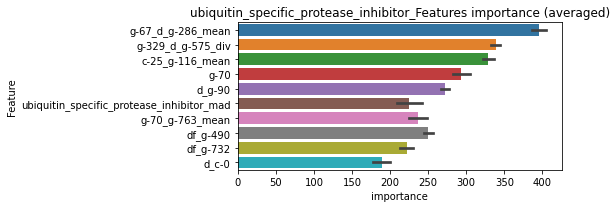

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325812	valid_1's binary_logloss: 0.00550704
[600]	training's binary_logloss: 0.00042767	valid_1's binary_logloss: 0.00100094
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000292526	valid_1's binary_logloss: 0.000737954


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330264	valid_1's binary_logloss: 0.00594207
[600]	training's binary_logloss: 0.000431837	valid_1's binary_logloss: 0.00107903
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000292629	valid_1's binary_logloss: 0.000810359


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332425	valid_1's binary_logloss: 0.00520962
[600]	training's binary_logloss: 0.000434354	valid_1's binary_logloss: 0.000873214
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000294623	valid_1's binary_logloss: 0.000625134


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324945	valid_1's binary_logloss: 0.00492693
[600]	training's binary_logloss: 0.000433733	valid_1's binary_logloss: 0.000872184
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000297497	valid_1's binary_logloss: 0.000647243


ubiquitin_specific_protease_inhibitor logloss: 0.0007052191342228573


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0595176	valid_1's binary_logloss: 0.230415
[600]	training's binary_logloss: 0.0139727	valid_1's binary_logloss: 0.212811
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.0112583	valid_1's binary_logloss: 0.211494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0665922	valid_1's binary_logloss: 0.197646
[600]	training's binary_logloss: 0.0162297	valid_1's binary_logloss: 0.162444
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00945531	valid_1's binary_logloss: 0.158734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0595797	valid_1's binary_logloss: 0.2096
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0262631	valid_1's binary_logloss: 0.192585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logl

1 / 3 AUC score:0.944
y_Threshold: 0.0786375, Threshold: 0.3598021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 306 → Positive_corect_labels: 565/3610
p_label_rate: 0.0100452 Vs.target_rate: 0.00714, Num_p_label: 40.0, conf_0:0.25186, conf_1:0.46774
threshold: 0.3598021, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 565.0/3610, y_label_rate: 0.1565097
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0300075	valid_1's binary_logloss: 0.150872
[600]	training's binary_logloss: 0.00504308	valid_1's binary_logloss: 0.125372
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00458059	valid_1's binary_logloss: 0.124653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0296965	valid_1's binary_logloss: 0.148978
[600]	training's binary_logloss: 0.00512228	valid_1's binary_logloss: 0.128541
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00512228	valid_1's binary_logloss: 0.128541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327462	valid_1's binary_logloss: 0.13973
[600]	training's binary_logloss: 0.00557507	valid_1's binary_logloss: 0.107069
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00361152	valid_1's binary_logloss: 0.104027
Train

2 / 3 AUC score:0.981
y_Threshold: 0.0858382, Threshold: 0.3598021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 519.0/3518
p_label_rate: 0.0321447 Vs.target_rate: 0.00714, Num_p_label: 128.0, conf_0:0.28784, conf_1:0.43176
Num_p_label: 128.0, Expected: 28.4, Adj_threshold_1: 0.3598021
Num_p_label: 116.0, Expected: 28.4, Adj_threshold_2: 0.4098021
Num_p_label: 105.0, Expected: 28.4, Adj_threshold_3: 0.4598021
Num_p_label: 92.0, Expected: 28.4, Adj_threshold_4: 0.5098021
Num_p_label: 86.0, Expected: 28.4, Adj_threshold_5: 0.5598021
Num_p_label: 81.0, Expected: 28.4, Adj_threshold_6: 0.6098021
Num_p_label: 72.0, Expected: 28.4, Adj_threshold_7: 0.6598021
Num_p_label: 65.0, Expected: 28.4, Adj_threshold_8: 0.7098021
Num_p_label: 59.0, Expected: 28.4, Adj_threshold_9: 0.7598021
threshold: 0.7598021, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 519.0/3518, y_label_rate: 0.1475270
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022931	valid_1's binary_logloss: 0.121066
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00781586	valid_1's binary_logloss: 0.110532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216022	valid_1's binary_logloss: 0.0948826
[600]	training's binary_logloss: 0.00350401	valid_1's binary_logloss: 0.0736174
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00299875	valid_1's binary_logloss: 0.072857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021938	valid_1's binary_logloss: 0.108343
[600]	training's binary_logloss: 0.00346328	valid_1's binary_logloss: 0.0868344
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00273466	valid_1's binary_logloss: 0.0855078
Training until validation scores don't improve for 30 rounds
[300]	training's bin

3 / 3 AUC score:0.987
y_Threshold: 0.0809904, Threshold: 0.7598021, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 488.0/3456
p_label_rate: 0.0273732 Vs.target_rate: 0.00714, Num_p_label: 109.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 109.0, Expected: 28.4, Adj_threshold_1: 0.7598021
threshold: 0.7598021, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 488.0/3456, y_label_rate: 0.1412037


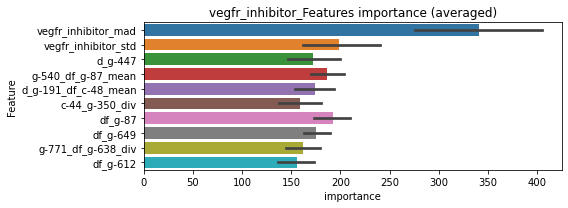

len(train_index) : 2592
len(valid_index) : 864
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177943	valid_1's binary_logloss: 0.0921915
[600]	training's binary_logloss: 0.00268926	valid_1's binary_logloss: 0.0689972
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00197594	valid_1's binary_logloss: 0.0670604


len(train_index) : 2592
len(valid_index) : 864
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182106	valid_1's binary_logloss: 0.0747033
[600]	training's binary_logloss: 0.00274953	valid_1's binary_logloss: 0.0498045
[900]	training's binary_logloss: 0.00113741	valid_1's binary_logloss: 0.045265
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000960656	valid_1's binary_logloss: 0.0442133


len(train_index) : 2592
len(valid_index) : 864
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017531	valid_1's binary_logloss: 0.0891019
[600]	training's binary_logloss: 0.00267603	valid_1's binary_logloss: 0.0707324
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00264152	valid_1's binary_logloss: 0.0705765


len(train_index) : 2592
len(valid_index) : 864
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176052	valid_1's binary_logloss: 0.0817308
[600]	training's binary_logloss: 0.00273024	valid_1's binary_logloss: 0.0616947
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00185596	valid_1's binary_logloss: 0.0598064


vegfr_inhibitor logloss: 0.06041414687395186


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00821102	valid_1's binary_logloss: 0.0242963
[600]	training's binary_logloss: 0.0010564	valid_1's binary_logloss: 0.0115245
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000533491	valid_1's binary_logloss: 0.00976892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855704	valid_1's binary_logloss: 0.0204232
[600]	training's binary_logloss: 0.00106551	valid_1's binary_logloss: 0.00623859
[900]	training's binary_logloss: 0.00052148	valid_1's binary_logloss: 0.00454611
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00052148	valid_1's binary_logloss: 0.00454611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00849658	valid_1's binary_logloss: 0.0177095
[600]	training's binary_logloss: 0.00107239	valid_1's binary_logloss: 0.00499938
[900]	training's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0061934, Threshold: 0.0399411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.02796, conf_1:0.05192
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0399411
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_2: 0.0899411
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_3: 0.1399411
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_4: 0.1899411
threshold: 0.1899411, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00717327	valid_1's binary_logloss: 0.0219813
[600]	training's binary_logloss: 0.000934972	valid_1's binary_logloss: 0.00996263
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000488071	valid_1's binary_logloss: 0.00860467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735766	valid_1's binary_logloss: 0.0181944
[600]	training's binary_logloss: 0.000936429	valid_1's binary_logloss: 0.00533949
[900]	training's binary_logloss: 0.000467564	valid_1's binary_logloss: 0.00373943
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000457511	valid_1's binary_logloss: 0.0037156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780655	valid_1's binary_logloss: 0.014577
[600]	training's binary_logloss: 0.000961633	valid_1's binary_logloss: 0.00368111
[900]	training's 

2 / 3 AUC score:1.000
y_Threshold: 0.0431394, Threshold: 0.1899411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0072828 Vs.target_rate: 0.00109, Num_p_label: 29.0, conf_0:0.15195, conf_1:0.22793
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_1: 0.1899411
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.2399411
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_3: 0.2899411
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.3399411
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_5: 0.3899411
threshold: 0.3899411, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734363	valid_1's binary_logloss: 0.0196711
[600]	training's binary_logloss: 0.000942828	valid_1's binary_logloss: 0.00744547
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000525776	valid_1's binary_logloss: 0.00611788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00743443	valid_1's binary_logloss: 0.0214095
[600]	training's binary_logloss: 0.000929485	valid_1's binary_logloss: 0.0094128
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000478092	valid_1's binary_logloss: 0.00801023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749529	valid_1's binary_logloss: 0.0151058
[600]	training's binary_logloss: 0.000946723	valid_1's binary_logloss: 0.0032867
[900]	training's binary_logloss: 0.00047041	valid_1's binary_logloss: 0.00203301
Early stopping, be

3 / 3 AUC score:1.000
y_Threshold: 0.0429573, Threshold: 0.3899411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00109, Num_p_label: 7.0, conf_0:0.35095, conf_1:0.42894
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.3899411
threshold: 0.3899411, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


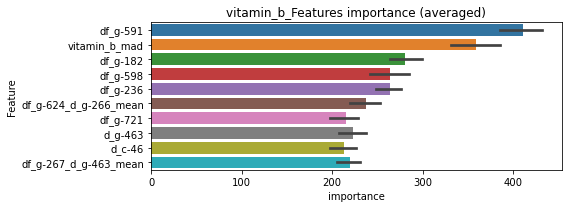

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713777	valid_1's binary_logloss: 0.0326731
[600]	training's binary_logloss: 0.000900499	valid_1's binary_logloss: 0.0204368
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000633127	valid_1's binary_logloss: 0.0197218


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734484	valid_1's binary_logloss: 0.0163145
[600]	training's binary_logloss: 0.000943939	valid_1's binary_logloss: 0.0038049
[900]	training's binary_logloss: 0.000467805	valid_1's binary_logloss: 0.00246101
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000451701	valid_1's binary_logloss: 0.00242287


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744136	valid_1's binary_logloss: 0.0198347
[600]	training's binary_logloss: 0.000926123	valid_1's binary_logloss: 0.00561027
[900]	training's binary_logloss: 0.000454008	valid_1's binary_logloss: 0.00388924
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000443699	valid_1's binary_logloss: 0.00386733


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742045	valid_1's binary_logloss: 0.0197289
[600]	training's binary_logloss: 0.000928875	valid_1's binary_logloss: 0.0060966
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000481396	valid_1's binary_logloss: 0.00474433


vitamin_b logloss: 0.007692244124892297


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014794	valid_1's binary_logloss: 0.0481863
[600]	training's binary_logloss: 0.00189252	valid_1's binary_logloss: 0.0215671
[900]	training's binary_logloss: 0.000798267	valid_1's binary_logloss: 0.0183327
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.00068172	valid_1's binary_logloss: 0.0177753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155727	valid_1's binary_logloss: 0.0403306
[600]	training's binary_logloss: 0.00193189	valid_1's binary_logloss: 0.0141361
[900]	training's binary_logloss: 0.000814742	valid_1's binary_logloss: 0.0106877
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000707561	valid_1's binary_logloss: 0.0103326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148632	valid_1's binary_logloss: 0.0420407
[600]	training's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0118526, Threshold: 0.0641659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164, Num_p_label: 40.0, conf_0:0.04492, conf_1:0.08342
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0641659
Num_p_label: 19.0, Expected: 6.5, Adj_threshold_2: 0.1141659
Num_p_label: 11.0, Expected: 6.5, Adj_threshold_3: 0.1641659
threshold: 0.1641659, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130833	valid_1's binary_logloss: 0.0422775
[600]	training's binary_logloss: 0.00169973	valid_1's binary_logloss: 0.0184322
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000790588	valid_1's binary_logloss: 0.0148925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130811	valid_1's binary_logloss: 0.0327053
[600]	training's binary_logloss: 0.00169705	valid_1's binary_logloss: 0.0116409
[900]	training's binary_logloss: 0.000745063	valid_1's binary_logloss: 0.00878357
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000647461	valid_1's binary_logloss: 0.00848323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129842	valid_1's binary_logloss: 0.0363451
[600]	training's binary_logloss: 0.00171985	valid_1's binary_logloss: 0.0169575
[900]	training's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1067211, Threshold: 0.1641659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0097941 Vs.target_rate: 0.00164, Num_p_label: 39.0, conf_0:0.13133, conf_1:0.19700
Num_p_label: 39.0, Expected: 6.5, Adj_threshold_1: 0.1641659
Num_p_label: 29.0, Expected: 6.5, Adj_threshold_2: 0.2141659
Num_p_label: 19.0, Expected: 6.5, Adj_threshold_3: 0.2641659
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_4: 0.3141659
threshold: 0.3141659, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012976	valid_1's binary_logloss: 0.0370469
[600]	training's binary_logloss: 0.00169695	valid_1's binary_logloss: 0.0124972
[900]	training's binary_logloss: 0.000731781	valid_1's binary_logloss: 0.00916368
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000622921	valid_1's binary_logloss: 0.00866855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126338	valid_1's binary_logloss: 0.0363573
[600]	training's binary_logloss: 0.00169475	valid_1's binary_logloss: 0.012251
[900]	training's binary_logloss: 0.000735297	valid_1's binary_logloss: 0.00875944
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000629875	valid_1's binary_logloss: 0.00833002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132093	valid_1's binary_logloss: 0.0311468
[600]	training's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1046059, Threshold: 0.3141659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00164, Num_p_label: 14.0, conf_0:0.28275, conf_1:0.34558
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_1: 0.3141659
threshold: 0.3141659, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


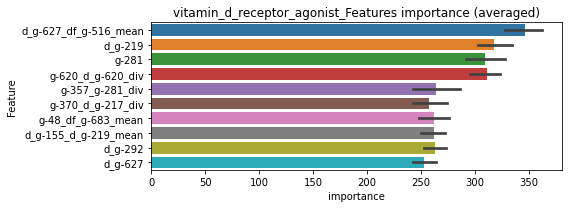

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013653	valid_1's binary_logloss: 0.0338995
[600]	training's binary_logloss: 0.00175028	valid_1's binary_logloss: 0.0101429
[900]	training's binary_logloss: 0.000744246	valid_1's binary_logloss: 0.00644908
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000605364	valid_1's binary_logloss: 0.00585711


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012605	valid_1's binary_logloss: 0.0409204
[600]	training's binary_logloss: 0.00165743	valid_1's binary_logloss: 0.015389
[900]	training's binary_logloss: 0.000715363	valid_1's binary_logloss: 0.0120515
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000625318	valid_1's binary_logloss: 0.0118275


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140463	valid_1's binary_logloss: 0.0343603
[600]	training's binary_logloss: 0.00175786	valid_1's binary_logloss: 0.0117775
[900]	training's binary_logloss: 0.000741653	valid_1's binary_logloss: 0.00833068
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000632245	valid_1's binary_logloss: 0.0079388


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135046	valid_1's binary_logloss: 0.033173
[600]	training's binary_logloss: 0.00175597	valid_1's binary_logloss: 0.0112915
[900]	training's binary_logloss: 0.000753459	valid_1's binary_logloss: 0.00813436
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.00062741	valid_1's binary_logloss: 0.00774507


vitamin_d_receptor_agonist logloss: 0.0083510596566177


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107301	valid_1's binary_logloss: 0.0321675
[600]	training's binary_logloss: 0.00136024	valid_1's binary_logloss: 0.0155436
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000671752	valid_1's binary_logloss: 0.0136052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103757	valid_1's binary_logloss: 0.041393
[600]	training's binary_logloss: 0.00136406	valid_1's binary_logloss: 0.0255402
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000715719	valid_1's binary_logloss: 0.0239118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107514	valid_1's binary_logloss: 0.0253417
[600]	training's binary_logloss: 0.00141011	valid_1's binary_logloss: 0.00916856
[900]	training's binary_logloss: 0.000646121	valid_1's binary_logloss: 0.00753198
Early stopping, best itera

1 / 3 AUC score:1.000
y_Threshold: 0.0079597, Threshold: 0.1027854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.07195, conf_1:0.13362
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.1027854
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_2: 0.1527854
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_3: 0.2027854
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_4: 0.2527854
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_5: 0.3027854
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_6: 0.3527854
threshold: 0.3527854, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887976	valid_1's binary_logloss: 0.0341071
[600]	training's binary_logloss: 0.00119331	valid_1's binary_logloss: 0.021283
[900]	training's binary_logloss: 0.000571963	valid_1's binary_logloss: 0.0192406
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000573208	valid_1's binary_logloss: 0.019237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00928349	valid_1's binary_logloss: 0.0214642
[600]	training's binary_logloss: 0.00124983	valid_1's binary_logloss: 0.0064869
[900]	training's binary_logloss: 0.000582262	valid_1's binary_logloss: 0.0042758
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000517005	valid_1's binary_logloss: 0.00407318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904246	valid_1's binary_logloss: 0.0217891
[600]	training's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0389211, Threshold: 0.3527854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00126, Num_p_label: 25.0, conf_0:0.28223, conf_1:0.42334
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.3527854
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_2: 0.4027854
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_3: 0.4527854
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_4: 0.5027854
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_5: 0.5527854
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_6: 0.6027854
threshold: 0.6027854, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868266	valid_1's binary_logloss: 0.0242561
[600]	training's binary_logloss: 0.00118579	valid_1's binary_logloss: 0.00996384
[900]	training's binary_logloss: 0.000572894	valid_1's binary_logloss: 0.00785899
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000575934	valid_1's binary_logloss: 0.0078466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918592	valid_1's binary_logloss: 0.0171113
[600]	training's binary_logloss: 0.00122726	valid_1's binary_logloss: 0.00493771
[900]	training's binary_logloss: 0.000585457	valid_1's binary_logloss: 0.00342914
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000526497	valid_1's binary_logloss: 0.00335145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00907889	valid_1's binary_logloss: 0.0222085
[600]	training's 

3 / 3 AUC score:1.000
y_Threshold: 0.0617099, Threshold: 0.6027854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0030136 Vs.target_rate: 0.00126, Num_p_label: 12.0, conf_0:0.50000, conf_1:0.66306
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.6027854
threshold: 0.6027854, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3806, y_label_rate: 0.1718339


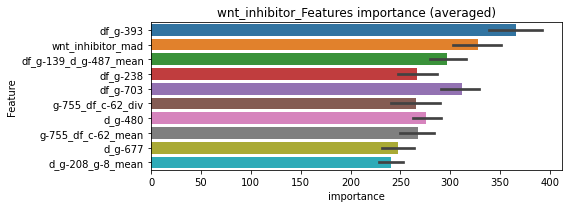

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923292	valid_1's binary_logloss: 0.0253859
[600]	training's binary_logloss: 0.00121333	valid_1's binary_logloss: 0.0099114
[900]	training's binary_logloss: 0.000573105	valid_1's binary_logloss: 0.00771121
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000525511	valid_1's binary_logloss: 0.00763731


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00938844	valid_1's binary_logloss: 0.0180147
[600]	training's binary_logloss: 0.00124767	valid_1's binary_logloss: 0.00518401
[900]	training's binary_logloss: 0.000588475	valid_1's binary_logloss: 0.00363551
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.00052576	valid_1's binary_logloss: 0.00349841


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913742	valid_1's binary_logloss: 0.0226966
[600]	training's binary_logloss: 0.00121172	valid_1's binary_logloss: 0.00633096
[900]	training's binary_logloss: 0.000574355	valid_1's binary_logloss: 0.00425686
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.00050557	valid_1's binary_logloss: 0.0039968


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00900383	valid_1's binary_logloss: 0.0314805
[600]	training's binary_logloss: 0.00119439	valid_1's binary_logloss: 0.0156553
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000667354	valid_1's binary_logloss: 0.0142477


wnt_inhibitor logloss: 0.007347065140513478


In [40]:
categorical_cols = []
scores = []
models = []
feature_importance_df = pd.DataFrame()
#importance_cols_df = pd.DataFrame()

for target_col in tqdm(train_targets_scored.columns[1:]):
    _preds, _score, models, _feature_importance_df = run_lgbm(target_col)

    sub[target_col] = _preds
    scores.append(_score)

sub.to_csv('submission.csv', index=False)

In [41]:
print(f"CV:{np.mean(scores)}")

CV:0.023277141980603468
